# 🎬 BÁO CÁO KHAI THÁC DỮ LIỆU – DỰ ÁN PHÂN TÍCH MOVIELENS

## 🏫 Trường Đại học Giao thông Vận tải TP. Hồ Chí Minh  
**Môn học:** Khai thác Dữ liệu (Data Mining)  
**Nhóm:** N5 – MovieLens Recommendation Project  

---

### 👥 Danh sách thành viên nhóm 5
| STT | Mã số sinh viên | Họ và tên             |
|:---:|:----------------|:----------------------|
| 1 | **2251120049** | Nguyễn Giang Thành Tài |
| 2 | **2251120278** | Lê Chánh Duy |
| 3 | **079205010990** | Trần Thành Tài |
| 4 | **079305003873** | Hồ Thái Mỹ Hương |
| 5 | **2251120299** | Nguyễn Trọng Kim |

---

### 📦 Thông tin bộ dữ liệu sử dụng
- **Nguồn dữ liệu gốc (Raw Dataset):**  
  [MovieLens Small Latest Dataset – Kaggle](https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset?select=ratings.csv)
  

- **Bộ dữ liệu sau khi làm sạch và xử lý (Dataset chuẩn):**  
  `movie_features.csv`

- **Mục tiêu chính:**  
  Khai thác dữ liệu người dùng và phim trong MovieLens để rút ra các đặc trưng (features), phục vụ cho việc **phân loại**, **phân cụm**, và **gợi ý phim** trong hệ thống khuyến nghị.

---

### 🗓️ Thời gian thực hiện
- **Bắt đầu:**  Tháng 09 năm 2025  
- **Hoàn thành:**  Tháng 11 năm 2025  

---



In [1]:
# Thư viện dùng chung 
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt# Vẽ biểu đồ trực quan
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
from sklearn.calibration import LabelEncoder
import os
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import json
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [2]:
# Xuất file CSV từ dữ liệu mã hoá base64
import base64, io
import pandas as pd

# Dữ liệu CSV đã được mã hoá base64 ngay trong notebook
_csv_b64 = """bW92aWVJZCxhdmdfcmF0aW5nLHJhdGluZ19jb3VudCxyYXRpbmdfc3RkLHllYXIsZ2VucmVzX2xpc3QsbGFiZWxfZ2VucmUsdG1kYklkDQoxLDMuOTIsMjE1LDAuODMsMTk5NSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSw4NjINCjIsMy40MywxMTAsMC44OCwxOTk1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDg4NDQNCjMsMy4yNiw1MiwxLjA1LDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE1NjAyDQo0LDIuMzYsNywwLjg1LDE5OTUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzEzNTcNCjUsMy4wNyw0OSwwLjkxLDE5OTUsWydDb21lZHknXSxDb21lZHksMTE4NjINCjYsMy45NSwxMDIsMC44MiwxOTk1LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw5NDkNCjcsMy4xOSw1NCwwLjk4LDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExODYwDQo4LDIuODgsOCwxLjEzLDE5OTUsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSw0NTMyNQ0KOSwzLjEyLDE2LDAuOTcsMTk5NSxbJ0FjdGlvbiddLEFjdGlvbiw5MDkxDQoxMCwzLjUsMTMyLDAuODYsMTk5NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDcxMA0KMTEsMy42Nyw3MCwwLjksMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5MDg3DQoxMiwyLjQyLDE5LDEuMjUsMTk5NSxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwxMjExMA0KMTMsMy4xMiw4LDAuNjQsMTk5NSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDIxMDMyDQoxNCwzLjgzLDE4LDAuNzEsMTk5NSxbJ0RyYW1hJ10sRHJhbWEsMTA4NTgNCjE1LDMuMCwxMywxLjIxLDE5OTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdSb21hbmNlJ10sQWN0aW9uLDE0MDgNCjE2LDMuOTMsODIsMC44OSwxOTk1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDUyNA0KMTcsMy43OCw2NywxLjE1LDE5OTUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0NTg0DQoxOCwzLjcsMjAsMC45MSwxOTk1LFsnQ29tZWR5J10sQ29tZWR5LDUNCjE5LDIuNzMsODgsMS4wNiwxOTk1LFsnQ29tZWR5J10sQ29tZWR5LDkyNzMNCjIwLDIuNSwxNSwwLjk4LDE5OTUsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE1MTcNCjIxLDMuNDksODksMC44NywxOTk1LFsnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLENvbWVkeSw4MDEyDQoyMiwzLjIyLDM2LDAuODIsMTk5NSxbJ0NyaW1lJyAnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxNzEwDQoyMywzLjEyLDE2LDEuMTIsMTk5NSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sOTY5MQ0KMjQsMy4xMiwyOCwxLjAxLDE5OTUsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDEyNjY1DQoyNSwzLjYyLDc2LDEuMTIsMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ1MQ0KMjYsMy41LDEzLDAuNjEsMTk5NSxbJ0RyYW1hJ10sRHJhbWEsMTY0MjANCjI3LDMuMzMsOSwxLjIsMTk5NSxbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiw5MjYzDQoyOCw0LjIzLDExLDAuNzksMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE3MDE1DQoyOSw0LjAxLDM4LDAuODMsMTk5NSxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeScgJ015c3RlcnknICdTY2ktRmknXSxBZHZlbnR1cmUsOTAyDQozMCwzLjAsMywxLjczLDE5OTUsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMzc1NTcNCjMxLDMuMTgsMzgsMC45OSwxOTk1LFsnRHJhbWEnXSxEcmFtYSw5OTA5DQozMiwzLjk4LDE3NywwLjc5LDE5OTUsWydNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDYzDQozNCwzLjY1LDEyOCwxLjA0LDE5OTUsWydDaGlsZHJlbicgJ0RyYW1hJ10sQ2hpbGRyZW4sOTU5OA0KMzYsMy44NCw2NywwLjk0LDE5OTUsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNjg3DQozOCwyLjEyLDQsMC44NSwxOTk1LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwzMzY4OQ0KMzksMy4yOSwxMDQsMS4wNCwxOTk1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5NjAzDQo0MCw0LjI1LDIsMS4wNiwxOTk1LFsnRHJhbWEnXSxEcmFtYSwzNDYxNQ0KNDEsMy43LDE1LDAuNjgsMTk5NSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMzExNzQNCjQyLDMuMCw3LDAuODIsMTk5NSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTE0NDMNCjQzLDMuMTksOCwwLjY1LDE5OTUsWydEcmFtYSddLERyYW1hLDM1MTk2DQo0NCwyLjU0LDQ2LDEuMDgsMTk5NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sOTMxMg0KNDUsMy4zMSwzMiwwLjgzLDE5OTUsWydDb21lZHknICdEcmFtYScgJ1RocmlsbGVyJ10sQ29tZWR5LDU3Nw0KNDYsMy4wNywxNSwxLjE4LDE5OTUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMTg2MQ0KNDcsMy45OCwyMDMsMC45MiwxOTk1LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSw4MDcNCjQ4LDMuMTUsNjgsMS4wNSwxOTk1LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQW5pbWF0aW9uLDEwNTMwDQo0OSwzLjAsMSwwLjAsMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDgzOTENCjUwLDQuMjQsMjA0LDAuOCwxOTk1LFsnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw2MjkNCjUyLDMuNDYsMjgsMC44NywxOTk1LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExNDQ4DQo1Myw1LjAsMiwwLjAsMTk5NCxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDQ5MTMzDQo1NCwyLjMzLDMsMS41MywxOTk1LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwyNjQ0MQ0KNTUsNC4wLDEsMC4wLDE5OTUsWydEcmFtYSddLERyYW1hLDk3NDA2DQo1NywzLjA2LDgsMC44NiwxOTk1LFsnRHJhbWEnXSxEcmFtYSw5MDg5DQo1OCw0LjAzLDM3LDAuOTIsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTAxMA0KNjAsMy4yNCwzNCwxLjAyLDE5OTUsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTEzNTkNCjYxLDMuNzUsNiwwLjg4LDE5OTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTcxODINCjYyLDMuNzEsODAsMS4wNSwxOTk1LFsnRHJhbWEnXSxEcmFtYSwyMDU0DQo2MywyLjcxLDcsMS4xNSwxOTk2LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTA2MDcNCjY0LDIuMiw1LDAuODQsMTk5NixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTk3NjANCjY1LDIuNTMsMzEsMS4wNiwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDk1MzYNCjY2LDIuNSw5LDEuMTIsMTk5NixbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDExNTI1DQo2OCwzLjQsNSwxLjE0LDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQ0ODINCjY5LDMuNzgsMjAsMC45LDE5OTUsWydDb21lZHknXSxDb21lZHksMTA2MzQNCjcwLDMuNTEsNTUsMS4wMiwxOTk2LFsnQWN0aW9uJyAnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sNzU1DQo3MSwxLjcsNSwwLjQ1LDE5OTUsWydBY3Rpb24nXSxBY3Rpb24sMTE4NTkNCjcyLDMuMjEsNywxLjI5LDE5OTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyODM4Nw0KNzMsMy40NiwxMywwLjY5LDE5OTUsWydEcmFtYScgJ1dhciddLERyYW1hLDQ4NzUwDQo3NCw0LjAsOCwwLjc2LDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyMDkyNw0KNzUsMi4yLDUsMS4xLDE5OTYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNjkyOQ0KNzYsMy40LDE1LDEuMiwxOTk1LFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sOTEwMg0KNzcsNC4wLDEsMC4wLDE5OTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEyNDYyNg0KNzgsMy4zMywzLDAuNTgsMTk5NSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwyNzUyNg0KNzksMi43NiwxNywxLjIsMTk5NixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5NjIzDQo4MCw0LjAsMiwwLjAsMTk5NSxbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiw0Njc4NQ0KODEsMy4xMSwxNCwwLjc2LDE5OTUsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENyaW1lLDQwMA0KODIsMy44OCw4LDEuNDgsMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDg4MA0KODMsMy4wLDEsMC4wLDE5OTUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNDY1OTkNCjg1LDMuODYsNywxLjU3LDE5OTUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4NDQ3DQo4NiwzLjk3LDE1LDAuNzcsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDEwNTM0DQo4NywyLjUsNywwLjk2LDE5OTYsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDE3NDE0DQo4OCwzLjE2LDE2LDEuMTgsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwxMzk5Nw0KODksMy4yNSwxMCwwLjc1LDE5OTUsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwyMDg2DQo5MiwyLjYyLDgsMS4wMywxOTk2LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDkwOTUNCjkzLDIuODMsOSwxLjAzLDE5OTUsWydDb21lZHknICdIb3Jyb3InICdSb21hbmNlJ10sQ29tZWR5LDEyMTU4DQo5NCwzLjk1LDEwLDAuNSwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDkyODMNCjk1LDMuMDIsODQsMS4wMSwxOTk2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sOTIwOA0KOTYsMy41LDEsMC4wLDE5OTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0MDE1NA0KOTcsMy45LDEwLDAuNzQsMTk5NSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw0MDYNCjk5LDUuMCwyLDAuMCwxOTk1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw2MzA3Ng0KMTAwLDIuNzksMTQsMC43LDE5OTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTEwNjINCjEwMSwzLjc4LDIzLDEuMDQsMTk5NixbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0NyaW1lJyAnUm9tYW5jZSddLEFkdmVudHVyZSwxMzY4NQ0KMTAyLDIuNCw1LDEuOTUsMTk5NixbJ0NvbWVkeSddLENvbWVkeSw0NzQ3NQ0KMTAzLDMuMCwzLDAuMCwxOTk2LFsnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sTXlzdGVyeSwyMDQ1DQoxMDQsMy40NCw5OSwwLjk5LDE5OTYsWydDb21lZHknXSxDb21lZHksOTYxNA0KMTA1LDMuMjgsMjMsMC44NSwxOTk1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNjg4DQoxMDYsNC4wLDEsMC4wLDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTkwNw0KMTA3LDMuMzMsMjYsMC45MywxOTk2LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQWR2ZW50dXJlLDEwODc0DQoxMDgsNC4wLDEsMC4wLDE5OTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDg5MzMzDQoxMTAsNC4wMywyMzcsMC45NywxOTk1LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTk3DQoxMTEsNC4xMSwxMDQsMC44MiwxOTc2LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTAzDQoxMTIsMy41NCw0NiwwLjkzLDE5OTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdDcmltZSddLEFjdGlvbiwzMzU0Mg0KMTEzLDMuMzMsMywwLjU4LDE5OTYsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSw0MzU2Ng0KMTE2LDMuOSw1LDEuMDIsMTk5NSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTEzNTINCjExNywzLjAsMSwwLjAsMTk5NSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxNjkzNA0KMTE4LDIuNSwyLDAuNzEsMTk5NixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTAzMjQNCjExOSwzLjAsMiwwLjAsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSw3ODQwNg0KMTIxLDQuMCwyLDAuMCwxOTkyLFsnRHJhbWEnXSxEcmFtYSwzMjExOQ0KMTIyLDIuNjYsMTYsMC43MiwxOTkyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTA2Ng0KMTIzLDQuMzgsNCwwLjk1LDE5OTQsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsMTExMDQNCjEyNSwzLjU4LDEyLDEuMjYsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwyMDc0DQoxMjYsMi4wLDcsMC44MiwxOTk0LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDI3NzkzDQoxMjgsMy4wLDEsMC4wLDE5OTQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI5MDE1Nw0KMTI5LDIuMCwxLDAuMCwxOTk2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTA5NzINCjEzMiwyLjgzLDYsMC43NSwxOTk1LFsnVGhyaWxsZXInXSxUaHJpbGxlciwxMTg2Mw0KMTM1LDIuOTUsMzEsMS4wMywxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDkxMDENCjEzNywzLjAsMSwwLjAsMTk5NSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTc1Nw0KMTQwLDMuNSwxNiwwLjY4LDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5MzAyDQoxNDEsMy40OSw4NiwwLjg0LDE5OTYsWydDb21lZHknXSxDb21lZHksMTEwMDANCjE0NCwzLjMzLDEyLDAuODYsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwxNjM4OA0KMTQ1LDMuMjUsNTEsMC44NiwxOTk1LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDk3MzcNCjE0NiwzLjMzLDMsMC41OCwxOTk1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMzA3NjUNCjE0NywzLjQ3LDE1LDAuODUsMTk5NSxbJ0RyYW1hJ10sRHJhbWEsMTA0NzQNCjE0OCw1LjAsMSwwLjAsMTk5NSxbJ0RyYW1hJ10sRHJhbWEsMjIyNzkNCjE0OSwyLjAsMSwwLjAsMTk5NCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDMwMTU3DQoxNTAsMy44NSwyMDEsMC44OCwxOTk1LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdJTUFYJ10sQWR2ZW50dXJlLDU2OA0KMTUxLDMuNTUsNDQsMC45NSwxOTk1LFsnQWN0aW9uJyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQWN0aW9uLDExNzgwDQoxNTIsMS41LDIsMC43MSwxOTk1LFsnRHJhbWEnICdIb3Jyb3InXSxEcmFtYSwzNDk5Ng0KMTUzLDIuOTIsMTM3LDAuOSwxOTk1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sNDE0DQoxNTQsMy44OCwxMiwwLjYxLDE5NjcsWydEcmFtYSddLERyYW1hLDY0OQ0KMTU1LDIuNDIsNiwxLjM2LDE5OTUsWydBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFkdmVudHVyZSwxODczDQoxNTYsMy4zMywzLDEuMTUsMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDU4OTQNCjE1NywyLjg2LDExLDEuMSwxOTk1LFsnQ29tZWR5JyAnV2FyJ10sQ29tZWR5LDE3NzUNCjE1OCwyLjgxLDYyLDEuMTEsMTk5NSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDg4MzkNCjE1OSwyLjg5LDE0LDAuOTIsMTk5NSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5J10sQ3JpbWUsMjA2NDkNCjE2MCwyLjg4LDU3LDEuMDMsMTk5NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ015c3RlcnknICdTY2ktRmknXSxBY3Rpb24sMTAzMjkNCjE2MSwzLjY0LDEwMywwLjg4LDE5OTUsWydEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sRHJhbWEsODk2Mw0KMTYyLDQuMjEsMTcsMC42NCwxOTk0LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyNjU2NA0KMTYzLDMuNTYsNjYsMC45OSwxOTk1LFsnQWN0aW9uJyAnUm9tYW5jZScgJ1dlc3Rlcm4nXSxBY3Rpb24sODA2OA0KMTY0LDMuMzIsMTQsMC43NywxOTk1LFsnQ3JpbWUnICdGaWxtLU5vaXInICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw4NTEyDQoxNjUsMy41NiwxNDQsMC45MiwxOTk1LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxNTcyDQoxNjYsMi44MywzLDEuMjYsMTk5NSxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxDb21lZHksMTM1NTINCjE2OCwzLjA4LDU0LDEuMywxOTk1LFsnQWN0aW9uJyAnRHJhbWEnICdSb21hbmNlJ10sQWN0aW9uLDY1MjANCjE2OSwyLjQsMTAsMC45OSwxOTk1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdEcmFtYSddLEFkdmVudHVyZSw5MDczDQoxNzAsMy4yMywzNSwwLjkyLDE5OTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwNDI4DQoxNzEsMy44Myw2LDAuOTgsMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE3NDQ3DQoxNzIsMi42OCw1MywxLjA3LDE5OTUsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw5ODg2DQoxNzMsMi42Nyw2MiwxLjAzLDE5OTUsWydBY3Rpb24nICdDcmltZScgJ1NjaS1GaSddLEFjdGlvbiw5NDgyDQoxNzQsMi43LDEwLDEuNDgsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwxOTMyNg0KMTc1LDMuOTgsMjAsMC43NSwxOTk1LFsnRHJhbWEnXSxEcmFtYSw5MzQ0DQoxNzYsNC4zMSwxMywwLjUyLDE5OTUsWydDb21lZHknXSxDb21lZHksOTA3MQ0KMTc3LDIuNzUsOCwxLjE2LDE5OTUsWydIb3Jyb3InXSxIb3Jyb3IsODk3Mw0KMTc4LDEuMCwxLDAuMCwxOTkzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTU3MzANCjE3OSwxLjUsMiwwLjcxLDE5OTUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0NzYwOA0KMTgwLDMuNCwzNiwwLjkyLDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIyOTMNCjE4MSwyLjI2LDE3LDEuMTYsMTk5NSxbJ0FjdGlvbicgJ0NoaWxkcmVuJ10sQWN0aW9uLDkwNzANCjE4MywzLjUsMiwwLjcxLDE5OTQsWydDb21lZHknICdIb3Jyb3InICdUaHJpbGxlciddLENvbWVkeSw0ODc4Nw0KMTg0LDMuNSwyLDAuNzEsMTk5NCxbJ0RyYW1hJ10sRHJhbWEsMzQ1NzQNCjE4NSwzLjA0LDExMiwxLjA0LDE5OTUsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2NDINCjE4NiwyLjgyLDQ4LDEuMDcsMTk5NSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE0NzINCjE4Nyw0LjEyLDQsMC44NSwxOTk1LFsnQ29tZWR5J10sQ29tZWR5LDM2MTk2DQoxODgsMy40NiwxMiwxLjAxLDE5OTUsWydGYW50YXN5JyAnSG9ycm9yJyAnTXlzdGVyeSddLEZhbnRhc3ksMTE5ODANCjE4OSwzLjAsMSwwLjAsMTk5NSxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksNTgzNzINCjE5MCwyLjgsNSwxLjQ4LDE5OTUsWydUaHJpbGxlciddLFRocmlsbGVyLDMyNjQ2DQoxOTEsMi40Miw2LDEuNDMsMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEwNTMzDQoxOTMsMi40NywzNSwxLjAxLDE5OTUsWydEcmFtYSddLERyYW1hLDEwODAyDQoxOTQsMy42NywxOCwxLjI3LDE5OTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDE0OQ0KMTk1LDMuMSwxMCwxLjI2LDE5OTUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTg0MDINCjE5NiwyLjY3LDQ1LDAuOTIsMTk5NSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw5MzQ4DQoxOTgsMy4yNSwyOCwwLjkzLDE5OTUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDI4MQ0KMTk5LDQuMTIsNCwwLjg1LDE5NjQsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsNTk2Nw0KMjAxLDMuMCwxLDAuMCwxOTk1LFsnRHJhbWEnICdGYW50YXN5J10sRHJhbWEsNDc5MzkNCjIwMiwzLjAsMSwwLjAsMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM2ODM0DQoyMDMsMy40MywyMiwwLjc5LDE5OTUsWydDb21lZHknXSxDb21lZHksOTA5MA0KMjA0LDIuNzIsMzAsMS4xMywxOTk1LFsnQWN0aW9uJ10sQWN0aW9uLDM1MTINCjIwNSwzLjE3LDksMC42MSwxOTk1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNTI4NTYNCjIwNiwzLjAsMiwxLjQxLDE5OTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDc3MzUwDQoyMDcsMy40MywyMSwxLjA5LDE5OTUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5NTYwDQoyMDgsMi45MSwxMTUsMC45NiwxOTk1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDk4MDQNCjIwOSwzLjE3LDMsMC43NiwxOTk1LFsnRHJhbWEnXSxEcmFtYSwzMTYxMQ0KMjEwLDMuMCw0LDAuODIsMTk5NSxbJ1dlc3Rlcm4nXSxXZXN0ZXJuLDY1Nzk2DQoyMTEsMy41LDIsMC43MSwxOTk0LFsnRHJhbWEnXSxEcmFtYSw0OTgwNQ0KMjEyLDMuMCwzLDEuMzIsMTk5NSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0NyaW1lJyAnTXlzdGVyeSddLEFkdmVudHVyZSwyNjI1OA0KMjEzLDMuODMsNiwxLjgxLDE5OTQsWydEcmFtYSddLERyYW1hLDUwNzk3DQoyMTQsNC4wLDIsMC4wLDE5OTQsWydEcmFtYScgJ1dhciddLERyYW1hLDE5MTU1DQoyMTUsNC4wNCwyNCwxLjAsMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDc2DQoyMTYsMy4zMyw0OSwxLjA2LDE5OTUsWydDb21lZHknXSxDb21lZHksMTEwMTcNCjIxNywyLjMzLDYsMS41MSwxOTk1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDM3MTQxDQoyMTgsMy40MywxNCwxLjAyLDE5OTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw5MzgyDQoyMTksMy4wLDEsMC4wLDE5OTUsWydEcmFtYSddLERyYW1hLDY3MTUNCjIyMCwzLjAsMSwwLjAsMTk5NSxbJ0hvcnJvciddLEhvcnJvciwxODI1Ng0KMjIyLDMuNzUsMTYsMS4yNCwxOTk1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjI2MjUNCjIyMywzLjg2LDEwNCwwLjk1LDE5OTQsWydDb21lZHknXSxDb21lZHksMjI5Mg0KMjI0LDMuNjEsNDAsMC43NiwxOTk1LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE5MDkNCjIyNSwzLjU0LDUyLDAuNzgsMTk5NCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw4OTg0DQoyMjcsMi44NiwyMiwxLjA0LDE5OTQsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw0OTU0DQoyMjgsMi4zMywzLDEuMTUsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSw2MjQ4OA0KMjI5LDMuNDMsNywwLjg0LDE5OTQsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTA1MzENCjIzMCwzLjQsMjQsMC43NSwxOTk1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDExOTI5DQoyMzEsMy4wNiwxMzMsMS4xMiwxOTk0LFsnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWR2ZW50dXJlLDg0NjcNCjIzMiwzLjg5LDE0LDEuMjMsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMDQ1MQ0KMjMzLDMuNSwxMiwwLjUyLDE5OTQsWydEcmFtYSddLERyYW1hLDIwMTU2DQoyMzQsMi41OSwxNywwLjk0LDE5OTQsWydDb21lZHknXSxDb21lZHksMTgzOTUNCjIzNSwzLjY4LDcwLDAuOTEsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDUyMg0KMjM2LDMuNDgsNDUsMC45MiwxOTk1LFsnQWN0aW9uJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiwzOTcNCjIzNywzLjM0LDIyLDEuMDQsMTk5NSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA1MjUNCjIzOCw0LjAsMiwxLjQxLDE5OTUsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSwyNzk4NQ0KMjM5LDMuMCwxNywxLjA2LDE5OTUsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBbmltYXRpb24sMTU3ODkNCjI0MCwyLjM4LDQsMC43NSwxOTk1LFsnVGhyaWxsZXInXSxUaHJpbGxlciwyNzMwMw0KMjQxLDQuMCwxLDAuMCwxOTk1LFsnQ2hpbGRyZW4nICdEcmFtYSddLENoaWxkcmVuLDIxMTgzDQoyNDIsMy42LDUsMC44OSwxOTk0LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTA5NTQNCjI0MywzLjAsMSwwLjAsMTk5NSxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLENoaWxkcmVuLDQ3ODY3DQoyNDYsNC4yOSwyOSwwLjc2LDE5OTQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE0Mjc1DQoyNDcsMy45MywyMSwwLjc2LDE5OTQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTAyNA0KMjQ4LDMuMTgsMTcsMS4wLDE5OTQsWydDb21lZHknXSxDb21lZHksMTcyMDcNCjI0OSwzLjcyLDE4LDAuODksMTk5NCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEzNzAxDQoyNTAsMi41LDYsMS4xLDE5OTUsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDE0ODE5DQoyNTEsMy4wLDMsMC41LDE5OTUsWydBY3Rpb24nXSxBY3Rpb24sMzI2MzENCjI1MiwzLjQ1LDQzLDAuODYsMTk5NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE3NzcNCjI1MywzLjQ2LDEwOSwxLjAyLDE5OTQsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDYyOA0KMjU0LDMuMCwxLDAuMCwxOTk1LFsnRHJhbWEnXSxEcmFtYSw4NzcyOQ0KMjU1LDIuMDcsNywxLjU0LDE5OTUsWydDb21lZHknXSxDb21lZHksMTg3MTMNCjI1NiwyLjgzLDM1LDEuMDQsMTk5NCxbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSw2MjgwDQoyNTcsMy41LDE0LDAuOTQsMTk5NSxbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksOTA2MQ0KMjU4LDIuNiwxMCwxLjA3LDE5OTUsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWR2ZW50dXJlLDM3MTA4DQoyNTksMy4yLDUsMC40NSwxOTk1LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNjA3MQ0KMjYwLDQuMjMsMjUxLDAuODcsMTk3NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxMQ0KMjYxLDMuODgsNDIsMC43NiwxOTk0LFsnRHJhbWEnXSxEcmFtYSw5NTg3DQoyNjIsMy45LDIxLDAuNjIsMTk5NSxbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiwxOTEwMQ0KMjYzLDQuMCwxLDAuMCwxOTk0LFsnRHJhbWEnXSxEcmFtYSw0OTk4MA0KMjY1LDMuOTQsMzMsMS4wNywxOTkyLFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDE4MTgzDQoyNjYsMy40LDY4LDAuOTgsMTk5NCxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dhcicgJ1dlc3Rlcm4nXSxEcmFtYSw0NDc2DQoyNjcsMi45NCwxNywxLjMsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwxMTAwOA0KMjY5LDMuMCwyLDAuMCwxOTkzLFsnRHJhbWEnXSxEcmFtYSwzMjMyNQ0KMjcwLDMuNCw1LDEuMzksMTk5NCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQzNzQyDQoyNzEsMy41LDQsMS4yOSwxOTk1LFsnRHJhbWEnXSxEcmFtYSwyODMxMw0KMjcyLDMuNzYsMzEsMS4xMiwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTEzMTgNCjI3MywyLjk1LDI4LDEuMDUsMTk5NCxbJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJ10sRHJhbWEsMzAzNg0KMjc0LDIuOTMsNywxLjI0LDE5OTUsWydDb21lZHknXSxDb21lZHksNDA0OTANCjI3NSwyLjAsNiwwLjYzLDE5OTQsWydDb21lZHknXSxDb21lZHksMjQwNzANCjI3NiwzLjI1LDIyLDAuODEsMTk5NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksODk4Ng0KMjc3LDMuMjIsMzgsMS4xNSwxOTk0LFsnRHJhbWEnXSxEcmFtYSwxMDUxMA0KMjc4LDEuNSwyLDAuNzEsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwxNzQwMg0KMjc5LDMuMCwyLDAuMCwxOTk1LFsnRHJhbWEnXSxEcmFtYSwzODcyMg0KMjgwLDQuMDgsMTMsMC44NiwxOTk1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDg0MzgNCjI4MSwzLjc5LDE0LDAuOCwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExNTkzDQoyODIsMy4zNCw0MCwwLjk0LDE5OTQsWydEcmFtYSddLERyYW1hLDE5NDUNCjI4MywzLjY3LDMsMS41MywxOTk1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDM5MzEwDQoyODQsNC41LDEsMC4wLDE5OTMsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwxMDk1NjANCjI4NSw0LjAsMSwwLjAsMTk5MyxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsNTY0MjgNCjI4NywzLjAsMSwwLjAsMTk5NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTMxOTU3DQoyODgsMy4yMyw5MiwxLjEzLDE5OTQsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDI0MQ0KMjg5LDMuNTYsOCwxLjEyLDE5OTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDkwNTgNCjI5MCw0LjA0LDE0LDAuODQsMTk5NCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw1MjcNCjI5MSwyLjMzLDMsMC41OCwxOTk2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE4MjIwDQoyOTIsMy40MywxMDEsMC45LDE5OTUsWydBY3Rpb24nICdEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDY5NTANCjI5Myw0LjAyLDEzMywwLjg2LDE5OTQsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTAxDQoyOTQsMy4wLDIsMC4wLDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDYzMDIwDQoyOTUsMy4wLDEsMC4wLDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIzMDcNCjI5Niw0LjIsMzA3LDAuOTUsMTk5NCxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSw2ODANCjI5OCwyLjAsMSwwLjAsMTk5MixbJ0RyYW1hJ10sRHJhbWEsMjUyOTYNCjI5OSw0LjAsNCwxLjE1LDE5OTQsWydEcmFtYSddLERyYW1hLDQwMTU2DQozMDAsMy41Miw4MSwwLjg1LDE5OTQsWydEcmFtYSddLERyYW1hLDExNDUwDQozMDEsNC4wLDEsMC4wLDE5OTQsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMDMwNA0KMzAyLDMuMiw1LDAuNDUsMTk5NCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEwNDUyDQozMDMsMi45NSwzMiwwLjksMTk5NSxbJ0FjdGlvbicgJ1RocmlsbGVyJyAnV2VzdGVybiddLEFjdGlvbiwxMjEwNg0KMzA0LDMuNjcsMywxLjUzLDE5OTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNjE0OTUNCjMwNSwyLjgzLDksMS4yMiwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDM1ODYNCjMwNiw0LjIyLDE2LDEuMDUsMTk5NCxbJ0RyYW1hJ10sRHJhbWEsMTEwDQozMDcsMy45LDI0LDEuMTUsMTk5MyxbJ0RyYW1hJ10sRHJhbWEsMTA4DQozMDgsNC4wMywyMCwwLjgsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwOQ0KMzEwLDMuMCwxLDAuMCwxOTk1LFsnQ29tZWR5J10sQ29tZWR5LDM2MzU3DQozMTEsMy4wLDEsMC4wLDE5OTQsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw5Mjc2OQ0KMzEyLDEuNDQsOSwwLjc3LDE5OTUsWydDb21lZHknXSxDb21lZHksMjgwMzMNCjMxMywzLjMzLDMsMC41OCwxOTk0LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sMjI1ODYNCjMxNCwzLjc1LDE2LDAuODQsMTk5NCxbJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5JyAnTXlzdGVyeSddLENoaWxkcmVuLDE0MzM0DQozMTUsMy4wOCwzOCwwLjk4LDE5OTQsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDI2MzYNCjMxNiwzLjM4LDE0MCwwLjg0LDE5OTQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMjE2NA0KMzE3LDMuMiw4MSwxLjA2LDE5OTQsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxDb21lZHksMTEzOTUNCjMxOCw0LjQzLDMxNywwLjcxLDE5OTQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjc4DQozMTksMy42LDIwLDEuMjMsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDb21lZHksOTkwNQ0KMzIwLDMuMCwxLDAuMCwxOTkzLFsnRmlsbS1Ob2lyJyAnVGhyaWxsZXInXSxGaWxtLU5vaXIsODcwNzgNCjMyMSw0LjAsMiwwLjAsMTk5MyxbJ0RyYW1hJ10sRHJhbWEsMTI1MjcNCjMyMiwzLjU1LDEwLDEuMDcsMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDIwMzA2DQozMjQsNC4wLDEsMC4wLDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNjYxNA0KMzI1LDIuNSw3LDEuMTksMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwyNzk5Mw0KMzI2LDQuMCwzLDEuMCwxOTk0LFsnRHJhbWEnXSxEcmFtYSwzMTQzOQ0KMzI3LDIuODIsMzQsMS4xMiwxOTk1LFsnQWN0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWN0aW9uLDkwNjcNCjMyOCwzLjE1LDEwLDEuMTgsMTk5NSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDkwNTkNCjMyOSwzLjM5LDEwOCwwLjgxLDE5OTQsWydBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFkdmVudHVyZSwxOTMNCjMzMCwzLjAsNiwwLjYzLDE5OTUsWydBY3Rpb24nICdDcmltZScgJ0hvcnJvciddLEFjdGlvbiwyNTA2Ng0KMzMxLDMuMCwyLDAuMCwxOTk0LFsnRHJhbWEnXSxEcmFtYSw0Njc5Nw0KMzMyLDIuODMsMTIsMS4wNywxOTk1LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDEyMTIyDQozMzMsMy43OCw1MCwxLjA5LDE5OTUsWydDb21lZHknXSxDb21lZHksMTEzODENCjMzNCw0LjIsNSwwLjg0LDE5OTQsWydEcmFtYSddLERyYW1hLDMyNjM2DQozMzUsMy41LDIsMC43MSwxOTk1LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwzNjE0MQ0KMzM2LDMuMCwxLDAuMCwxOTk1LFsnRHJhbWEnICdXYXInXSxEcmFtYSw5NTk2Mw0KMzM3LDMuNzcsNzcsMC45NCwxOTkzLFsnRHJhbWEnXSxEcmFtYSwxNTg3DQozMzgsMi44NCwxOSwxLjAxLDE5OTUsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw5MjcxDQozMzksMy40Nyw5OCwwLjg4LDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIwNjQNCjM0MCwzLjQsNSwwLjU1LDE5OTQsWydBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFkdmVudHVyZSwxOTg1NQ0KMzQxLDQuMCwyLDAuMCwxOTk0LFsnRHJhbWEnXSxEcmFtYSw2MDg1NQ0KMzQyLDMuMjcsMzMsMS4wNCwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDIzNg0KMzQzLDIuOSw1LDAuODksMTk5NSxbJ0NoaWxkcmVuJ10sQ2hpbGRyZW4sNDgyODcNCjM0NCwzLjA0LDE2MSwxLjA3LDE5OTQsWydDb21lZHknXSxDb21lZHksMzA0OQ0KMzQ1LDMuNiwzNiwwLjk4LDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNzU5DQozNDYsMy41LDYsMC41NSwxOTkzLFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTI2MzUNCjM0NywzLjUsNiwwLjg0LDE5OTIsWydEcmFtYScgJ0ZpbG0tTm9pcicgJ1JvbWFuY2UnXSxEcmFtYSwxMDQ5Nw0KMzQ4LDMuNTgsMzAsMS4xMiwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDExMzgyDQozNDksMy42LDExMCwwLjc4LDE5OTQsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sOTMzMQ0KMzUwLDMuMzksNTcsMC44NiwxOTk0LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxMDczMQ0KMzUxLDMuMTgsMTcsMC45LDE5OTQsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTA0NjQNCjM1MiwyLjUsMiwwLjcxLDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNDE1Mg0KMzUzLDMuNjEsNjQsMC45NywxOTk0LFsnQWN0aW9uJyAnQ3JpbWUnICdGYW50YXN5JyAnVGhyaWxsZXInXSxBY3Rpb24sOTQ5NQ0KMzU0LDMuMzMsNiwwLjgyLDE5OTQsWydEcmFtYSddLERyYW1hLDI5OTczDQozNTUsMi4zNiw0MiwwLjk3LDE5OTQsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxDaGlsZHJlbiw4ODgNCjM1Niw0LjE2LDMyOSwwLjgzLDE5OTQsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxDb21lZHksMTMNCjM1NywzLjUyLDEwMywxLjExLDE5OTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDcxMg0KMzU4LDIuNjcsOSwwLjUsMTk5NSxbJ0RyYW1hJ10sRHJhbWEsMTYyOTUNCjM1OSwzLjAsMSwwLjAsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0ODk5Mg0KMzYwLDIuNjksOCwwLjcsMTk5NCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxMDg3OQ0KMzYxLDMuMDYsMTcsMC42MSwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEwNjYwDQozNjIsMy41MywzNCwxLjA4LDE5OTQsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTA3MTQNCjM2Myw0LjAsMiwwLjAsMTk5MyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDE2NDcNCjM2NCwzLjk0LDE3MiwwLjg0LDE5OTQsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0RyYW1hJyAnTXVzaWNhbCcgJ0lNQVgnXSxBZHZlbnR1cmUsODU4Nw0KMzY1LDMuMjUsNCwwLjk2LDE5OTMsWydEcmFtYSddLERyYW1hLDE2ODkNCjM2NiwyLjkyLDEyLDEuMjYsMTk5NCxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTE1OTYNCjM2NywzLjE4LDE1NywxLjAsMTk5NCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRmFudGFzeSddLEFjdGlvbiw4NTQNCjM2OCwzLjUsNzQsMC44NCwxOTk0LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnV2VzdGVybiddLEFkdmVudHVyZSw5MzU5DQozNjksNC4wLDIsMC4wLDE5OTQsWydEcmFtYSddLERyYW1hLDIzMzMzDQozNzAsMy4wNiw1OCwxLjAyLDE5OTQsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMzY1OTMNCjM3MSwzLjMxLDIxLDAuODEsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyMjgwDQozNzIsMi43NiwyMSwxLjEsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNzg4DQozNzMsMy42NCwxMSwwLjgxLDE5OTIsWydUaHJpbGxlciddLFRocmlsbGVyLDEwNDI3DQozNzQsMi4yLDI1LDEuMjIsMTk5NCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTEwMTENCjM3NiwzLjI1LDQwLDAuODIsMTk5NCxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDg5ODcNCjM3NywzLjUzLDE3MSwwLjkzLDE5OTQsWydBY3Rpb24nICdSb21hbmNlJyAnVGhyaWxsZXInXSxBY3Rpb24sMTYzNw0KMzc4LDIuNzksNywwLjgxLDE5OTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE1MTI4DQozNzksMi41LDIxLDAuOTUsMTk5NCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDg4MzENCjM4MCwzLjUsMTc4LDAuOTEsMTk5NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwzNjk1NQ0KMzgxLDMuODIsMTEsMC44NCwxOTk0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTA0NDkNCjM4MiwzLjE2LDE2LDEuMDMsMTk5NCxbJ0RyYW1hJyAnSG9ycm9yJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsMTAzOTUNCjM4MywzLjEsMjEsMS4wNCwxOTk0LFsnV2VzdGVybiddLFdlc3Rlcm4sMTIxNjANCjM4NCwzLjI1LDIsMC4zNSwxOTk1LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiw0MDQ4MA0KMzg1LDQuMCwxLDAuMCwxOTk0LFsnRHJhbWEnXSxEcmFtYSw1MjAzOA0KMzg2LDMuMCwxLDAuMCwxOTk0LFsnRHJhbWEnXSxEcmFtYSwyOTQ0NA0KMzg3LDIuMzgsNCwxLjExLDE5OTQsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMjYzNTINCjM4OCwzLjAsMiwxLjQxLDE5OTUsWydEcmFtYSddLERyYW1hLDM5OTUzDQozODksNC41LDIsMC43MSwxOTk0LFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsNDE1ODANCjM5MCwzLjcsNSwxLjIsMTk2NSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMzE1DQozOTEsNC41LDEsMC4wLDE5OTQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjIwNjcNCjM5MywyLjUsMTAsMS4wOCwxOTk0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiwxMTY2Nw0KNDA1LDIuNDIsMTIsMC43NiwxOTk0LFsnQWN0aW9uJyAnRmFudGFzeSddLEFjdGlvbiw4MDExDQo0MDYsMy4wLDEsMC4wLDE5OTQsWydEcmFtYSddLERyYW1hLDE3MTg1Nw0KNDA3LDMuNDQsOCwwLjk0LDE5OTUsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwyNjU0DQo0MDgsMy4wLDIsMS40MSwxOTk0LFsnRHJhbWEnXSxEcmFtYSwxODA2OQ0KNDA5LDIuMCwxLDAuMCwxOTk0LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDE5MDkyDQo0MTAsMy4xLDg0LDAuNzUsMTk5MyxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLENoaWxkcmVuLDI3NTgNCjQxMiwzLjUsMTUsMS4wNSwxOTkzLFsnRHJhbWEnXSxEcmFtYSwxMDQzNg0KNDEzLDIuNzksMjYsMC45NCwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDEzNTk1DQo0MTQsMi4zMyw2LDAuNTIsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSw0NjA5NA0KNDE1LDIuNTMsMTYsMC43NiwxOTkzLFsnQ29tZWR5JyAnVGhyaWxsZXInXSxDb21lZHksOTQwOQ0KNDE2LDIuNSw4LDAuOTMsMTk5NCxbJ1dlc3Rlcm4nXSxXZXN0ZXJuLDExODUzDQo0MTcsMy42OSwxMywxLjE4LDE5OTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE2NzcxDQo0MTgsMy4wLDIsMC4wLDE5OTMsWydEcmFtYSddLERyYW1hLDQ2OTI0DQo0MTksMi42OCwyMCwxLjIxLDE5OTMsWydDb21lZHknXSxDb21lZHksMTEwNDENCjQyMCwyLjcyLDU5LDAuOTQsMTk5NCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMzA2DQo0MjEsMy4yMSwxMiwwLjU4LDE5OTQsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDE0NTIyDQo0MjIsMy4yLDUsMC40NSwxOTk0LFsnVGhyaWxsZXInXSxUaHJpbGxlciwyNjIwMw0KNDIzLDIuODUsMTAsMC41OCwxOTk0LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMTc4DQo0MjQsMS44MywzLDEuMDQsMTk5NCxbJ0RyYW1hJ10sRHJhbWEsMTk4MTkNCjQyNSwzLjc1LDIsMC4zNSwxOTk0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNTc4MzQNCjQyNiwzLjE0LDcsMC4zOCwxOTkzLFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsNDcyMg0KNDI3LDIuNTQsMTIsMS4xMiwxOTkzLFsnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsMTgyMTUNCjQyOCwzLjcyLDE4LDAuNzksMTk5MyxbJ0RyYW1hJ10sRHJhbWEsMTYwNw0KNDI5LDIuMCw2LDAuNzEsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwyNjM5MQ0KNDMwLDMuNzUsMiwxLjc3LDE5OTMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTc1NTMNCjQzMSwzLjc0LDQyLDAuODEsMTk5MyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw2MDc1DQo0MzIsMi42NSw1NSwxLjAzLDE5OTQsWydBZHZlbnR1cmUnICdDb21lZHknICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDExMzEwDQo0MzMsMi43NSw4LDAuODUsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwxODY1OA0KNDM0LDMuMDMsMTAxLDAuOSwxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sOTM1MA0KNDM1LDIuNDIsNjMsMS4wNywxOTkzLFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDk2MTINCjQzNiwyLjU3LDcsMC45MywxOTk0LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDIxMjQNCjQzNywyLjE3LDksMC43MSwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDI2MjYxDQo0MzgsMi43MSw3LDAuNzYsMTk5NCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0RyYW1hJ10sQWN0aW9uLDE5MTc2DQo0NDAsMy41NSw3NiwwLjY3LDE5OTMsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExNTY2DQo0NDEsMy45Myw0MiwwLjkzLDE5OTMsWydDb21lZHknXSxDb21lZHksOTU3MQ0KNDQyLDMuMDksODEsMC45OSwxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDk3MzkNCjQ0NCwyLjMzLDYsMC44MiwxOTkzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzNDQ0NA0KNDQ1LDMuMCwxMiwwLjg1LDE5OTMsWydDb21lZHknXSxDb21lZHksMjYxNDENCjQ0NiwzLjgzLDksMS4zLDE5OTMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDk5Nw0KNDQ4LDMuNjIsOCwwLjUyLDE5OTMsWydEcmFtYSddLERyYW1hLDEwNDQzDQo0NDksMS4wLDEsMC4wLDE5OTQsWydDb21lZHknXSxDb21lZHksMjAyMzkNCjQ1MCwzLjAsNywwLjgyLDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNjI5Nw0KNDUxLDQuMCwxLDAuMCwxOTkzLFsnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZSddLERyYW1hLDE4NTUxDQo0NTIsMy4wLDMsMS4wLDE5OTQsWydEcmFtYSddLERyYW1hLDI1NDQwDQo0NTMsMi44LDUsMC44NCwxOTkzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5MDI0DQo0NTQsMy41MywxMDEsMC44MywxOTkzLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDM3MjMzDQo0NTUsMi4zOSwzNywxLjA5LDE5OTMsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDE2MzQNCjQ1NiwzLjc1LDQsMS4zMiwxOTk0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTM4MTUNCjQ1NywzLjk5LDE5MCwwLjc5LDE5OTMsWydUaHJpbGxlciddLFRocmlsbGVyLDU1MDMNCjQ1OCwyLjgsNSwwLjQ1LDE5OTMsWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSwzNTU4OA0KNDU5LDIuMjUsNiwwLjYxLDE5OTQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQWN0aW9uLDIwODcNCjQ2MCwyLjY3LDMsMC41OCwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDQxNTc5DQo0NjEsMi43NSw0LDEuMjYsMTk5NCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE4NjIwDQo0NjQsMi45LDEwLDAuNzQsMTk5MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjAxOQ0KNDY2LDIuODcsNjAsMS4wNywxOTkzLFsnQWN0aW9uJyAnQ29tZWR5JyAnV2FyJ10sQWN0aW9uLDkyNTUNCjQ2Nyw1LjAsMSwwLjAsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwyNjI3MQ0KNDY4LDMuMiwyMiwwLjg0LDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEwNjEyDQo0NjksMy40LDUsMC44OSwxOTkzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjI1OQ0KNDcwLDEuMCwxLDAuMCwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDE2MDk3DQo0NzEsMy41NSw0MCwxLjExLDE5OTQsWydDb21lZHknXSxDb21lZHksMTE5MzQNCjQ3MiwyLjU4LDYsMC42NiwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTA2MTQzDQo0NzMsMS44Niw3LDAuOCwxOTk0LFsnQ29tZWR5JyAnV2FyJ10sQ29tZWR5LDEyNDc1DQo0NzQsMy42OSw3MCwwLjY5LDE5OTMsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw5Mzg2DQo0NzUsNC4zLDI1LDAuNjMsMTk5MyxbJ0RyYW1hJ10sRHJhbWEsNzk4NA0KNDc2LDEuMCwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNTk5MzANCjQ3NywzLjM4LDE3LDAuNTcsMTk5MyxbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDE1NzY1DQo0NzgsMi41LDEsMC4wLDE5OTQsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDMxNjQzDQo0NzksMi4yNSw0LDAuNSwxOTkzLFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw2DQo0ODAsMy43NSwyMzgsMC44NiwxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMzI5DQo0ODEsMy4xNiwxOSwwLjgzLDE5OTMsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTA5MDkNCjQ4MiwzLjYyLDgsMC40NCwxOTk0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNTA3DQo0ODQsMy4wLDIsMi44MywxOTk0LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMjk5MTgNCjQ4NSwyLjkzLDUzLDAuOTcsMTk5MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBY3Rpb24sOTU5Mw0KNDg2LDMuMCwzLDEuMCwxOTkzLFsnQ29tZWR5J10sQ29tZWR5LDQyNTgwDQo0ODcsMi41LDQsMS43MywxOTk0LFsnQ29tZWR5JyAnV2VzdGVybiddLENvbWVkeSwyMjMxNw0KNDg4LDMuMCwxLDAuMCwxOTkzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQxMw0KNDg5LDIuODYsMTEsMC4zMiwxOTkzLFsnQ29tZWR5J10sQ29tZWR5LDEyMTIxDQo0OTAsMy4wLDEyLDAuNzQsMTk5MyxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMjI0Ng0KNDkxLDMuMjksMTcsMS4xLDE5OTMsWydEcmFtYSddLERyYW1hLDEwNTAyDQo0OTIsMy43NSwxNCwwLjg3LDE5OTMsWydDb21lZHknICdNeXN0ZXJ5J10sQ29tZWR5LDEwNDQwDQo0OTMsMy42NywxMiwwLjYyLDE5OTMsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDk1MTYNCjQ5NCwzLjM4LDQxLDAuOTgsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDIzMjANCjQ5NSw1LjAsMSwwLjAsMTk3NixbJ0RyYW1hJ10sRHJhbWEsNTg3OQ0KNDk2LDUuMCwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxDb21lZHksODM3MTgNCjQ5NywzLjgxLDQzLDAuODgsMTk5MyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE5NzENCjQ5OSwyLjUsMiwwLjcxLDE5OTMsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDMxOTExDQo1MDAsMy4zOSwxNDQsMC45LDE5OTMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3ODgNCjUwMSwzLjY3LDYsMS4wOCwxOTkzLFsnRHJhbWEnXSxEcmFtYSwyMTQ1MA0KNTAyLDIuMzcsMTUsMS4wNCwxOTk0LFsnQWN0aW9uJyAnQ2hpbGRyZW4nICdSb21hbmNlJ10sQWN0aW9uLDExMjMxDQo1MDQsMy4wLDIsMC4wLDE5OTQsWydBY3Rpb24nICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiwxMDQ0Nw0KNTA1LDIuMjEsNywxLjIyLDE5OTQsWydDb21lZHknXSxDb21lZHksMzE1ODYNCjUwNiw0LjUsMiwwLjcxLDE5OTIsWydEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sRHJhbWEsOTMwMA0KNTA3LDMuMzgsMTMsMC42NSwxOTkzLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsOTU1OQ0KNTA4LDMuNjEsNjYsMC44OSwxOTkzLFsnRHJhbWEnXSxEcmFtYSw5ODAwDQo1MDksMy41NCw2MSwxLjAsMTk5MyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDcxMw0KNTEwLDMuMCwxLDAuMCwxOTkzLFsnRHJhbWEnXSxEcmFtYSw4MjkxDQo1MTEsMy4wLDIsMS40MSwxOTkzLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTgxMzMNCjUxMiwzLjAsNCwwLjgyLDE5OTQsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMjU1NTcNCjUxMywzLjM4LDQsMC40OCwxOTk0LFsnQ29tZWR5JyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxDb21lZHksMjI1ODgNCjUxNCwzLjQyLDE4LDEuMDcsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwxMDg3Mg0KNTE1LDMuNiwyNCwxLjAxLDE5OTMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMjQ1DQo1MTYsMy4wNiwxOCwwLjk1LDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTg1OA0KNTE3LDMuMjgsOSwxLjAzLDE5OTMsWydBY3Rpb24nICdEcmFtYScgJ015c3RlcnknXSxBY3Rpb24sNzAwNw0KNTE4LDIuMzgsNCwwLjQ4LDE5OTQsWydDb21lZHknXSxDb21lZHksMTA0NjcNCjUxOSwyLjQsMjEsMS4xMSwxOTkzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDU1NTANCjUyMCwzLjEzLDY5LDEuMDcsMTk5MyxbJ0NvbWVkeSddLENvbWVkeSw4MDA1DQo1MjEsMy4xNywzLDAuMjksMTk5MyxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwyMDg4DQo1MjIsMy4yOSw3LDEuMzIsMTk5MixbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEwNDEyDQo1MjMsMy41LDQsMC41OCwxOTkzLFsnRHJhbWEnXSxEcmFtYSw0Nzg4OQ0KNTI0LDMuNDksMzQsMC45MywxOTkzLFsnRHJhbWEnXSxEcmFtYSwxNDUzNA0KNTI2LDQuMCwxLDAuMCwxOTkyLFsnRHJhbWEnXSxEcmFtYSw0MTg3OA0KNTI3LDQuMjIsMjIwLDAuOTgsMTk5MyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNDI0DQo1MjgsMi4zMywzLDAuNTgsMTk5NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM1MjMzDQo1MjksMy44OCw0MCwwLjc3LDE5OTMsWydEcmFtYSddLERyYW1hLDE0MjkxDQo1MzEsMy4yNSwyNCwwLjkxLDE5OTMsWydDaGlsZHJlbicgJ0RyYW1hJ10sQ2hpbGRyZW4sMTEyMzYNCjUzMiwzLjAsMTYsMC42MSwxOTk0LFsnQ29tZWR5JyAnQ3JpbWUnICdIb3Jyb3InXSxDb21lZHksMTE1OTINCjUzMywyLjg5LDE4LDAuNywxOTk0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeScgJ015c3RlcnknXSxBY3Rpb24sODg1MA0KNTM0LDMuNjEsMTQsMC44OCwxOTkzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTA0NDUNCjUzNSwzLjI3LDE1LDEuNCwxOTkzLFsnRHJhbWEnXSxEcmFtYSw2OTUNCjUzNiwzLjMzLDMsMC41OCwxOTk0LFsnRHJhbWEnXSxEcmFtYSw0MzUzNQ0KNTM3LDMuMTcsMTIsMC44MywxOTk0LFsnRHJhbWEnXSxEcmFtYSwxMjUxOQ0KNTM4LDMuNTgsMTIsMS4wMiwxOTkzLFsnRHJhbWEnXSxEcmFtYSwyMzIxMA0KNTM5LDMuNDcsMTA2LDAuODQsMTk5MyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw4NTgNCjU0MCwyLjY3LDE4LDAuOTEsMTk5MyxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsODY3DQo1NDEsNC4xLDEyNCwwLjk1LDE5ODIsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw3OA0KNTQyLDIuNzksMTQsMS4yNywxOTkzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEzMjAzDQo1NDMsMy4zMiw0MSwxLjA0LDE5OTMsWydDb21lZHknICdSb21hbmNlJyAnVGhyaWxsZXInXSxDb21lZHksMTA0NDINCjU0NCwyLjQ0LDgsMC44MiwxOTkzLFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sMTEwNzQNCjU0NiwyLjAsMjEsMC45NSwxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDk2MDcNCjU0NywzLjI1LDIsMS4wNiwxOTk0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sMTc1ODUNCjU0OCwyLjc1LDYsMC44OCwxOTk0LFsnQWN0aW9uJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDkwNTcNCjU0OSw0LjUsMiwwLjcxLDE5OTMsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwyMDk2Nw0KNTUwLDMuNCw1LDEuMTQsMTk5NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA2MzUNCjU1MSwzLjU1LDkzLDAuOTksMTk5MyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ011c2ljYWwnXSxBbmltYXRpb24sOTQ3OQ0KNTUyLDMuMjYsNjEsMC44NSwxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiwxMDA1Nw0KNTUzLDMuODIsNjUsMS4wMSwxOTkzLFsnQWN0aW9uJyAnRHJhbWEnICdXZXN0ZXJuJ10sQWN0aW9uLDExOTY5DQo1NTUsMy44LDY1LDAuOSwxOTkzLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDMxOQ0KNTU2LDMuMzMsNiwwLjgyLDE5OTMsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI2NDA4DQo1NTgsMi45NCw4LDAuNzgsMTk5NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFjdGlvbiwxNTEzOQ0KNTYyLDMuNTQsMjMsMC45MiwxOTk1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTE0NDYNCjU2Myw0LjAsMSwwLjAsMTk5MyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDUxOTgwDQo1NjQsMS41LDIsMC43MSwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDI0NDA1DQo1NjcsMi4wLDMsMS4wLDE5OTMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4MjIzDQo1NjgsMy41LDIsMC43MSwxOTkzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTQ1ODcNCjU2OSwyLjY3LDYsMS4wMywxOTk0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzE1MDQNCjU3MywzLjUsMSwwLjAsMTk5MixbJ0RyYW1hJ10sRHJhbWEsMjM2MzcNCjU3NCwzLjI1LDQsMC41LDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNzYwMA0KNTc1LDIuNjYsMTYsMS4yMSwxOTk0LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxMDg5Nw0KNTc3LDIuMTIsNCwxLjAzLDE5OTQsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDIxMzUyDQo1NzksMy4wLDEsMC4wLDE5OTMsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsNjg4MDYNCjU4MCwyLjgsNSwxLjEsMTk5NCxbJ0RyYW1hJ10sRHJhbWEsMzczNDUNCjU4MSw0LjAsNCwwLjgyLDE5OTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMyNTYyDQo1ODMsNC4wLDEsMC4wLDE5OTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNTQwMw0KNTg1LDIuNzQsMzYsMC45MywxOTk1LFsnQ29tZWR5J10sQ29tZWR5LDkwNjYNCjU4NiwzLjAsMTE2LDAuOTksMTk5MCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sNzcxDQo1ODcsMy40MywxMTUsMC45NCwxOTkwLFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ29tZWR5LDI1MQ0KNTg4LDMuNzksMTgzLDAuODgsMTk5MixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFkdmVudHVyZSw4MTINCjU4OSwzLjk3LDIyNCwwLjkzLDE5OTEsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMjgwDQo1OTAsMy44NCwxNjQsMC44NiwxOTkwLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDU4MQ0KNTkyLDMuNDMsMTg5LDAuNzcsMTk4OSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjY4DQo1OTMsNC4xNiwyNzksMC44NSwxOTkxLFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDI3NA0KNTk0LDMuNjIsNzcsMC43OSwxOTM3LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knICdNdXNpY2FsJ10sQW5pbWF0aW9uLDQwOA0KNTk1LDMuNzcsMTQ2LDAuODQsMTk5MSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ011c2ljYWwnICdSb21hbmNlJyAnSU1BWCddLEFuaW1hdGlvbiwxMDAyMA0KNTk2LDMuNDUsNjAsMS4wNiwxOTQwLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxMDg5NQ0KNTk3LDMuNDksMTM1LDAuODUsMTk5MCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE0DQo1OTksMy44MiwxMSwwLjk4LDE5NjksWydBZHZlbnR1cmUnICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDU3Ng0KNjAwLDQuMCwxLDAuMCwxOTk0LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTU0NzcNCjYwMiw0LjAsMSwwLjAsMTk5NCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTI0NDcyDQo2MDUsMy4wLDEwLDAuOTEsMTk5NixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDczMDANCjYwNiwzLjAsNCwwLjgyLDE5OTUsWydGYW50YXN5JyAnSG9ycm9yJ10sRmFudGFzeSwxMDgyNA0KNjA4LDQuMTIsMTgxLDAuODMsMTk5NixbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwyNzUNCjYwOSwzLjU3LDE0LDAuNzYsMTk5NixbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDI1MDU5DQo2MTAsMy41NSwzMywwLjk1LDE5ODEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sMTE4MjcNCjYxMSwyLjQyLDYsMS40MywxOTk2LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDg3NjYNCjYxMiwyLjUsNiwwLjc3LDE5OTYsWydDb21lZHknXSxDb21lZHksMjM1NzANCjYxMywzLjE5LDgsMS4zMSwxOTk2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDczMzMNCjYxNSwzLjAsMSwwLjAsMTk3MyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDUxMjQyDQo2MTYsMy40MSw0NSwwLjg3LDE5NzAsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxMDExMg0KNjE3LDIuODMsMywxLjA0LDE5OTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0MzA3DQo2MTgsMy4wLDEsMC4wLDE5OTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQ2MDI5DQo2MTksMi42LDUsMS44NSwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDMyMzA4DQo2MjYsNS4wLDEsMC4wLDE5OTYsWydDb21lZHknXSxDb21lZHksMjgxMjENCjYyNywzLjMzLDYsMS4wOCwxOTk1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEyNTIwDQo2MjgsMy42NCwzNSwwLjksMTk5NixbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxNTkyDQo2MzEsMy4xOCwxMSwxLjA2LDE5OTYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knICdNdXNpY2FsJyAnUm9tYW5jZSddLEFkdmVudHVyZSwxOTA0Mg0KNjMyLDQuMCwxLDAuMCwxOTk1LFsnRHJhbWEnICdXYXInXSxEcmFtYSwzODg4NA0KNjMzLDUuMCwxLDAuMCwxOTk1LFsnQ29tZWR5J10sQ29tZWR5LDQ3NDQ5DQo2MzQsMi4yNSw0LDAuOTYsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwzNjI1OQ0KNjM1LDMuMCwyLDAuMCwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDE4NTINCjYzNiwzLjAsMSwwLjAsMTk5NSxbJ0RyYW1hJ10sRHJhbWEsNDA5MjYNCjYzNywzLjA1LDMzLDEuMDQsMTk5NixbJ0NvbWVkeSddLENvbWVkeSw5MDk5DQo2MzgsMy4wLDEsMC4wLDE5OTUsWydSb21hbmNlJ10sUm9tYW5jZSwyMDIxDQo2MzksMy4wLDQsMC44MiwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNjE3NTINCjY0MCwyLjY4LDExLDEuMTksMTk5NixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMDk4OA0KNjQ1LDMuNSwyLDAuNzEsMTk5NSxbJ0RyYW1hJ10sRHJhbWEsMTI2NTINCjY0NywzLjMzLDI5LDEuMDUsMTk5NixbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTA2ODQNCjY0OCwzLjU0LDE2MiwwLjksMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiw5NTQNCjY0OSwzLjAsMSwwLjAsMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDY4NDQ1DQo2NTAsMy4wLDQsMS42MywxOTk2LFsnRHJhbWEnXSxEcmFtYSwxODk4OQ0KNjUzLDMuMDksNjUsMC44NSwxOTk2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiw4ODQwDQo2NTYsMy4wLDUsMC43MSwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDExMTA3DQo2NjEsMy40NSw0OSwxLjAyLDE5OTYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knICdNdXNpY2FsJ10sQWR2ZW50dXJlLDEwNTM5DQo2NjIsMy4yOSw3LDEuNSwxOTk2LFsnVGhyaWxsZXInXSxUaHJpbGxlciwxMDU0Mw0KNjYzLDMuMjksMTIsMS4wOCwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDE4NDE0DQo2NjUsNC4zMywzLDAuMjksMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQ29tZWR5LDExOTAyDQo2NjcsMi44MSw4LDEuMDcsMTk5NixbJ0FjdGlvbiddLEFjdGlvbiwyNTA4Nw0KNjY4LDQuMjUsMiwxLjA2LDE5NTUsWydEcmFtYSddLERyYW1hLDU4MDENCjY3MCw0Ljc1LDIsMC4zNSwxOTU5LFsnRHJhbWEnXSxEcmFtYSw4OTYNCjY3MSwzLjQ5LDM2LDEuMiwxOTk2LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDMwNjUNCjY3MywyLjcxLDUzLDEuMTMsMTk5NixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeScgJ1NjaS1GaSddLEFkdmVudHVyZSwyMzAwDQo2NzQsMy4xNyw5LDEuMjcsMTk2OCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSw4MDY5DQo2NzgsMy44Myw5LDAuNDMsMTk5MyxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwyNzc2OA0KNjc5LDQuMCwxLDAuMCwxOTk1LFsnRHJhbWEnXSxEcmFtYSwyMjE5MTcNCjY4MCw0LjEyLDQsMC44NSwxOTY1LFsnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsODA3Mg0KNjg1LDQuMCwyLDEuNDEsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMzMyNDUNCjY4OCwyLjMzLDksMS4wMywxOTk1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnV2FyJ10sQWN0aW9uLDI3MjgxDQo2OTEsMy4zMywzLDAuNTgsMTk5NixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDAwMDENCjY5MiwyLjAsNCwxLjQxLDE5OTYsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwyOTYyMQ0KNjk0LDIuOTUsMTEsMC43OSwxOTk2LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwyMDc2Mg0KNjk1LDQuMCwyLDAuMCwxOTk2LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwzNzE0NA0KNjk3LDIuNyw1LDAuNjcsMTk5NixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEyNjU2DQo2OTgsMS4wLDEsMC4wLDE5OTUsWydEcmFtYSddLERyYW1hLDM4ODY3DQo3MDAsMy4yMSw3LDAuOTEsMTk5NSxbJ0NvbWVkeSddLENvbWVkeSwyNTk2OQ0KNzAzLDIuMCwyLDAuMCwxOTk2LFsnRHJhbWEnXSxEcmFtYSw0MzYzNA0KNzA0LDIuNTcsNywxLjEsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiw5MTAzDQo3MDYsMy4wLDEsMC4wLDE5OTYsWydEcmFtYSddLERyYW1hLDI5NjQ5DQo3MDcsMi44OCwyMSwxLjAsMTk5NixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDEwOTkwDQo3MDgsMy4zOSw1OCwwLjgxLDE5OTYsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDg4NjYNCjcwOSwzLjA5LDExLDAuODYsMTk4OCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwxMjIzMw0KNzEwLDIuNTYsOCwwLjUsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwyMzQ0OQ0KNzExLDMuMDUsMTAsMS4wMSwxOTk2LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMzYzNTUNCjcxNCwzLjk3LDE1LDEuMDQsMTk5NSxbJ0RyYW1hJyAnTXlzdGVyeScgJ1dlc3Rlcm4nXSxEcmFtYSw5MjINCjcxNSwzLjY3LDMsMC41OCwxOTk1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTE4NzYNCjcxOCw0LjEyLDQsMC42MywxOTkzLFsnQ29tZWR5JyAnRmFudGFzeScgJ1NjaS1GaSddLENvbWVkeSwxMTY4Nw0KNzE5LDIuODQsMzUsMC45OCwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDkzMDQNCjcyMCw0LjA5LDI3LDEuMjMsMTk5NixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFkdmVudHVyZSw1MDM0NzUNCjcyMiw0LjAsMSwwLjAsMTk5NixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNzMxODMNCjcyNCwzLjAzLDMxLDAuOTQsMTk5NixbJ0RyYW1hJyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsOTEwMA0KNzI1LDIuNSw1LDAuODcsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwyMDc1OQ0KNzI2LDMuMCwxLDAuMCwxOTk2LFsnRHJhbWEnXSxEcmFtYSw0NjA2Mw0KNzI4LDMuNSwxMCwwLjc1LDE5OTUsWydDb21lZHknXSxDb21lZHksMzI1MTMNCjczMSwzLjMzLDMsMC41OCwxOTk2LFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDM2OTE1DQo3MzMsMy42NCwxMjEsMC45MSwxOTk2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sOTgwMg0KNzM1LDMuOTMsNywwLjQ1LDE5OTQsWydIb3Jyb3InXSxIb3Jyb3IsMjE1ODgNCjczNiwzLjMyLDEyMywxLjA1LDE5OTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdSb21hbmNlJyAnVGhyaWxsZXInXSxBY3Rpb24sNjY0DQo3MzcsMi42NSwyMCwxLjQsMTk5NixbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxMTg2Nw0KNzQxLDQuMTUsMjcsMC42OCwxOTk1LFsnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQW5pbWF0aW9uLDkzMjMNCjc0MiwyLjgyLDExLDEuMSwxOTk2LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAyODANCjc0MywyLjUyLDI5LDAuOTIsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwxMDUzNQ0KNzQ1LDMuOSw0OCwxLjEsMTk5NSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDUzMg0KNzQ3LDMuMzMsMywwLjU4LDE5OTYsWydDb21lZHknXSxDb21lZHksMTYyOTkNCjc0OCwzLjExLDIyLDAuOTQsMTk5NixbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwNTQ3DQo3NTAsNC4yNyw5NywwLjgxLDE5NjQsWydDb21lZHknICdXYXInXSxDb21lZHksOTM1DQo3NTcsNC4wLDEsMC4wLDE5OTQsWydEcmFtYSddLERyYW1hLDQwNzUxDQo3NTksMy41LDIsMC43MSwxOTk0LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw4NTc3OA0KNzYwLDQuMjUsMiwwLjM1LDE5OTMsWydEcmFtYScgJ1dhciddLERyYW1hLDExMTAxDQo3NjEsMi43OSwxOSwxLjA3LDE5OTYsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sOTgyNg0KNzYyLDIuNDEsNDEsMS4wOCwxOTk2LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksOTg3OQ0KNzY0LDMuNSwyLDAuNzEsMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDIyNjIxDQo3NjUsMy4xNiwxOSwwLjgyLDE5OTYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3MDk1DQo3NjYsMy41LDQsMC41OCwxOTk2LFsnRHJhbWEnXSxEcmFtYSwyNjg5MA0KNzczLDMuNSwxLDAuMCwxOTczLFsnRHJhbWEnXSxEcmFtYSw3Nzc3MQ0KNzc1LDMuMCwxLDAuMCwxOTY4LFsnSG9ycm9yJyAnTXlzdGVyeSddLEhvcnJvciw0MTIyNQ0KNzc4LDQuMDQsMTAyLDAuODMsMTk5NixbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxDb21lZHksNjI3DQo3NzksNC4wLDIsMS40MSwxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzI4NzINCjc4MCwzLjQ1LDIwMiwxLjAsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDYwMg0KNzgxLDMuNSw3LDAuODIsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMTQ1NTMNCjc4MiwzLjAsOCwxLjA0LDE5OTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsOTU2Ng0KNzgzLDMuMzMsNDcsMC45MywxOTk2LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQW5pbWF0aW9uLDEwNTQ1DQo3ODQsMi44MSw1NCwxLjE4LDE5OTYsWydDb21lZHknICdUaHJpbGxlciddLENvbWVkeSw5ODk0DQo3ODUsMy4zNyw0MiwwLjkzLDE5OTYsWydDb21lZHknXSxDb21lZHksMTE1NDMNCjc4NiwzLjExLDY0LDEuMDQsMTk5NixbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sOTI2OA0KNzg4LDIuNzMsODIsMS4xNywxOTk2LFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnICdTY2ktRmknXSxDb21lZHksOTMyNw0KNzkwLDIuMCwxLDAuMCwxOTk0LFsnRHJhbWEnXSxEcmFtYSw4MTk0OQ0KNzkxLDQuMCwxLDAuMCwxOTk0LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwNCjc5NSwzLjUsMiwwLjcxLDE5OTQsWydEcmFtYSddLERyYW1hLDQ0NTM1DQo3OTgsMi43MSwxMiwxLjE0LDE5OTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDExMjI4DQo3OTksMy40NiwyMywwLjk0LDE5OTYsWydDb21lZHknICdIb3Jyb3InICdUaHJpbGxlciddLENvbWVkeSwxMDc3OQ0KODAwLDQuMTYsMTksMC45NywxOTk2LFsnRHJhbWEnICdNeXN0ZXJ5JyAnV2VzdGVybiddLERyYW1hLDI2NzQ4DQo4MDEsMy4xNCwxMSwwLjg3LDE5OTYsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDM4MjIzDQo4MDIsMy4zNCw0NiwwLjkyLDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5Mjk0DQo4MDMsNC4wLDEsMC4wLDE5OTYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDk5NjMNCjgwNCwzLjI1LDgsMS4wNCwxOTk2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTM2Mw0KODA1LDMuNjYsMzUsMC44MSwxOTk2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE2NDUNCjgwNiwxLjUsMSwwLjAsMTk5NixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwzMTU0Ng0KODA4LDMuNSwyLDAuNzEsMTk5NixbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDM2MzQ0DQo4MDksMi4zMyw5LDAuODMsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwxODU1MA0KODEwLDIuMjUsMTIsMS40NCwxOTk2LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sMTE1MTENCjgxMywyLjgsNSwwLjg0LDE5OTYsWydDb21lZHknXSxDb21lZHksMzQxNzANCjgxOCwzLjI1LDEwLDAuOTIsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwxMjYwNg0KODIzLDMuNSwxLDAuMCwxOTY3LFsnRHJhbWEnXSxEcmFtYSw0ODM3DQo4MjQsNC4wLDEsMC4wLDE5OTMsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxMjYzMg0KODI4LDMuMzMsNiwxLjAzLDE5OTYsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSwxODk3NQ0KODI5LDIuNjcsOSwxLjAsMTk5NixbJ0NvbWVkeScgJ0ZhbnRhc3knICdNdXNpY2FsJ10sQ29tZWR5LDExOTYyDQo4MzAsMy4wNywyMSwxLjA4LDE5OTYsWydDb21lZHknXSxDb21lZHksMjkyNQ0KODMyLDMuMzQsMzcsMC45MSwxOTk2LFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDM1OTUNCjgzMywyLjAsNiwxLjMsMTk5NixbJ0NvbWVkeSddLENvbWVkeSw5MzA4DQo4MzUsMy42NywzLDAuNTgsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMTg1NTUNCjgzNiwyLjg4LDE3LDAuODQsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEyMTIzDQo4MzcsMy4yNywzMywwLjkzLDE5OTYsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwxMDgzMA0KODM4LDMuOTIsMzAsMC44OCwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDM1NzMNCjgzOSwyLjgzLDE1LDEuMjEsMTk5NixbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDEwNTQ2DQo4NDAsMy4zOCw0LDAuNDgsMTk5NixbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTg4NjINCjg0MSwzLjAsMiwwLjAsMTk1OSxbJ0hvcnJvciddLEhvcnJvciwzMTQxNw0KODQyLDIuNTQsMTIsMS4wNSwxOTk2LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDk0MzENCjg0OCwzLjI5LDcsMS4xMSwxOTk2LFsnRHJhbWEnXSxEcmFtYSw0NzkwNw0KODQ5LDIuOTIsNDQsMS4wNCwxOTk2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTAwNjENCjg1MSwyLjgzLDYsMS4xMywxOTk2LFsnRHJhbWEnXSxEcmFtYSw1NDkNCjg1MiwzLjE3LDQzLDEuMDEsMTk5NixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMDQ3OA0KODU4LDQuMjksMTkyLDAuOSwxOTcyLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDIzOA0KODYxLDMuODMsOSwwLjk0LDE5OTIsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDExMTM0DQo4NjYsNC4wLDIzLDAuNzgsMTk5NixbJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxDcmltZSw5MzAzDQo4NjcsMS43NSwyLDEuNzcsMTk5NixbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIzOTQ1DQo4NjksMy42NywzLDAuNTgsMTk5NixbJ0NyaW1lJyAnRHJhbWEnICdNdXNpY2FsJyAnVGhyaWxsZXInXSxDcmltZSwyMjQ3OQ0KODcwLDEuMCwyLDAuMCwxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDkwNTQNCjg3NSwzLjUsMSwwLjAsMTk5NCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sNDEwOTIxDQo4NzYsNS4wLDEsMC4wLDE5OTMsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDM4OTU1DQo4NzksMy4wLDQsMS44MywxOTk3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTEwMTUNCjg4MCwyLjc0LDI3LDAuOTksMTk5NixbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDkzMDYNCjg4MSwyLjEsNSwwLjg5LDE5OTYsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDEyNTU5DQo4ODIsMi4wLDEsMC4wLDE5OTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNTg3NzANCjg4NSwyLjUsMiwwLjcxLDE5OTYsWydDaGlsZHJlbicgJ0RyYW1hJyAnRmFudGFzeSddLENoaWxkcmVuLDM1ODcNCjg4NiwyLjY3LDYsMS41NCwxOTk2LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTA3MjMNCjg4OCwyLjE3LDMsMS40NCwxOTk1LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdNdXNpY2FsJ10sQWR2ZW50dXJlLDE5MDA0DQo4ODksNC4wLDEsMC4wLDE5OTQsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDEyMzANCjg5MSwzLjgsNSwxLjEsMTk5NSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwOTg3DQo4OTIsMy41NCwxMywwLjYzLDE5OTYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDQ3MDUNCjg5MywzLjY3LDMsMS4xNSwxOTk2LFsnRHJhbWEnXSxEcmFtYSwyMDMxOA0KODk2LDIuNSwyLDAuNzEsMTk5NCxbJ0RyYW1hJ10sRHJhbWEsMjY5MzMNCjg5NywzLjc1LDIsMC4zNSwxOTQzLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQWR2ZW50dXJlLDI3ODU0DQo4OTgsNC4zMSwyOSwwLjc4LDE5NDAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksOTgxDQo4OTksNC4wNyw0NywwLjk4LDE5NTIsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSw4NzINCjkwMCwzLjcxLDEyLDAuNjYsMTk1MSxbJ011c2ljYWwnICdSb21hbmNlJ10sTXVzaWNhbCwyNzY5DQo5MDEsMy4wLDcsMS41LDE5NTcsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDEzMzIwDQo5MDIsMy44NSwzNiwwLjk1LDE5NjEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNjQNCjkwMyw0LjAzLDYwLDAuOTYsMTk1OCxbJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLERyYW1hLDQyNg0KOTA0LDQuMjYsODQsMC43OSwxOTU0LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSw1NjcNCjkwNSw0LjMyLDE0LDAuNzIsMTkzNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzA3OA0KOTA2LDQuMTQsNywwLjg1LDE5NDQsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTM1MjgNCjkwNywzLjUsMiwwLjcxLDE5MzQsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwyODI4OA0KOTA4LDQuMTgsNTcsMC43OCwxOTU5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwyMTMNCjkwOSwzLjk2LDI3LDAuOTYsMTk2MCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyODQNCjkxMCw0LjAxLDUwLDAuODMsMTk1OSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIzOQ0KOTExLDMuODEsMTMsMC42NiwxOTYzLFsnQ29tZWR5JyAnQ3JpbWUnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ29tZWR5LDQ4MDgNCjkxMiw0LjI0LDEwMCwwLjksMTk0MixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI4OQ0KOTEzLDQuMTcsNDQsMC42MywxOTQxLFsnRmlsbS1Ob2lyJyAnTXlzdGVyeSddLEZpbG0tTm9pciw5NjMNCjkxNCw0LjA0LDM1LDAuOTIsMTk2NCxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksMTExMTMNCjkxNSwzLjc3LDMwLDAuODQsMTk1NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNjYyMA0KOTE2LDQuMDYsMjYsMC43OSwxOTUzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDgwNA0KOTE3LDMuNSwyLDAuNzEsMTkzOSxbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiwyNjUzMQ0KOTE4LDQuMSwxMCwwLjcsMTk0NCxbJ011c2ljYWwnXSxNdXNpY2FsLDkwOQ0KOTE5LDMuODgsOTIsMS4wMywxOTM5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLEFkdmVudHVyZSw2MzANCjkyMCwzLjY0LDQ1LDEuMDYsMTkzOSxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLERyYW1hLDc3MA0KOTIxLDMuMzksOSwwLjg2LDE5ODIsWydDb21lZHknXSxDb21lZHksMzEwNDQNCjkyMiw0LjMzLDI3LDAuNjcsMTk1MCxbJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnUm9tYW5jZSddLERyYW1hLDU5OQ0KOTIzLDQuMDQsNjksMC45NywxOTQxLFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMTUNCjkyNCwzLjg5LDEwOSwxLjEsMTk2OCxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDYyDQo5MjYsNC4yMywyNCwwLjg4LDE5NTAsWydEcmFtYSddLERyYW1hLDcwNQ0KOTI3LDQuMCwzLDAuMCwxOTM5LFsnQ29tZWR5J10sQ29tZWR5LDIyNDkwDQo5MjgsNC4xNywxOCwwLjc3LDE5NDAsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSwyMjMNCjkyOSwzLjUsMSwwLjAsMTk0MCxbJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMjU2NzANCjkzMCw0LjI1LDIwLDAuNTMsMTk0NixbJ0ZpbG0tTm9pcicgJ1JvbWFuY2UnICdUaHJpbGxlciddLEZpbG0tTm9pciwzMDMNCjkzMSwzLjgzLDksMC43OSwxOTQ1LFsnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLE15c3RlcnksNDE3NA0KOTMyLDMuOTQsOCwxLjIxLDE5NTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4MzU2DQo5MzMsNC4yMiwyMywwLjg0LDE5NTUsWydDcmltZScgJ015c3RlcnknICdSb21hbmNlJyAnVGhyaWxsZXInXSxDcmltZSwzODENCjkzNCwzLjI1LDEyLDEuMSwxOTUwLFsnQ29tZWR5J10sQ29tZWR5LDIwNzU4DQo5MzUsMy44MywzLDEuMjYsMTk1MyxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMjkzNzYNCjkzNiw0LjAsNiwwLjk1LDE5MzksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE4NTkNCjkzNywzLjUsMiwwLjcxLDE5NTcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE4Mjk5DQo5MzgsMy4yNSw2LDEuMjksMTk1OCxbJ011c2ljYWwnXSxNdXNpY2FsLDE3MjgxDQo5NDAsNC4wLDgsMC45NiwxOTM4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnUm9tYW5jZSddLEFjdGlvbiwxMDkwNw0KOTQxLDMuNzUsMiwwLjM1LDE5NDAsWydBZHZlbnR1cmUnXSxBZHZlbnR1cmUsMzIwOTMNCjk0Miw0LjMzLDYsMC41MiwxOTQ0LFsnQ3JpbWUnICdGaWxtLU5vaXInICdNeXN0ZXJ5J10sQ3JpbWUsMTkzOQ0KOTQzLDMuOTMsNywwLjYxLDE5NDcsWydEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sRHJhbWEsMjIyOTINCjk0NCw0LjAsMywwLjAsMTkzNyxbJ0RyYW1hJ10sRHJhbWEsMzU5OA0KOTQ1LDQuMDcsNywwLjg0LDE5MzUsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwzMDgwDQo5NDYsMi41LDMsMS44LDE5NDIsWydDb21lZHknICdEcmFtYScgJ1dhciddLENvbWVkeSwxOTgNCjk0NywzLjc1LDQsMS42NiwxOTM2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMzU2Mg0KOTQ4LDMuOTIsNiwwLjY2LDE5NTYsWydEcmFtYScgJ1JvbWFuY2UnICdXZXN0ZXJuJ10sRHJhbWEsMTcxMg0KOTQ5LDMuOTIsNiwwLjIsMTk1NSxbJ0RyYW1hJ10sRHJhbWEsMjIwDQo5NTAsMy44Niw3LDAuODUsMTkzNCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDM1MjkNCjk1MSw0LjM5LDE0LDAuNTksMTk0MCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzA4NQ0KOTUyLDMuNjIsMTIsMC42OCwxOTU2LFsnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWR2ZW50dXJlLDI4OTcNCjk1Myw0LjAzLDU4LDEuMDQsMTk0NixbJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLENoaWxkcmVuLDE1ODUNCjk1NCw0LjA4LDE4LDAuOSwxOTM5LFsnRHJhbWEnXSxEcmFtYSwzMDgzDQo5NTUsMy44NiwxOCwxLjA1LDE5MzgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDkwMA0KOTU2LDQuMCwxLDAuMCwxOTQxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDM3OTUNCjk1OSwzLjUsMSwwLjAsMTkzNCxbJ0RyYW1hJ10sRHJhbWEsNDM5MDUNCjk2MSw0LjAsMSwwLjAsMTkzNixbJ0RyYW1hJ10sRHJhbWEsMjMxMTQNCjk2MywzLjAsMSwwLjAsMTk0OSxbJ011c2ljYWwnXSxNdXNpY2FsLDQwMjA2DQo5NjUsNC4wNSwxMSwwLjgyLDE5MzUsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDI2MA0KOTY4LDMuNzUsMjgsMS4xNCwxOTY4LFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAzMzENCjk2OSwzLjk3LDM0LDEuMDEsMTk1MSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnICdXYXInXSxBZHZlbnR1cmUsNDg4DQo5NzAsMy41LDEsMC4wLDE5NTMsWydBZHZlbnR1cmUnICdDb21lZHknICdDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLEFkdmVudHVyZSwyMjczMw0KOTcxLDQuMSwxMCwwLjg4LDE5NTgsWydEcmFtYSddLERyYW1hLDI2MQ0KOTczLDMuOSw1LDAuMjIsMTk0MSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMyNTc0DQo5NzYsMy4wLDEsMC4wLDE5MzIsWydSb21hbmNlJyAnV2FyJ10sUm9tYW5jZSwyMjY0OQ0KOTc5LDMuMCwxLDAuMCwxOTk1LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMjU1ODcNCjk4MSwzLjAsMiwwLjAsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsNTI4NTUNCjk4MiwzLjAsMSwwLjAsMTk1NSxbJ0RyYW1hJ10sRHJhbWEsMzk5NDANCjk4NCwzLjUsMiwyLjEyLDE5OTYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4NTMyOA0KOTg2LDMuNTQsMTMsMC42OSwxOTk2LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMTEwNzYNCjk4NywzLjAsMSwwLjAsMTk5NyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDYzOTQ1DQo5ODgsMy4wLDIsMC4wLDE5OTYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw1ODk4NQ0KOTkwLDIuOSw1LDEuNDMsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwODYxDQo5OTEsMy4zMiwxMSwwLjc4LDE5OTYsWydEcmFtYSddLERyYW1hLDE3NzANCjk5MywzLjAsMSwwLjAsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMjAzMw0KOTk0LDQuMTgsMTEsMC43MiwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTgyMDMNCjk5NiwyLjUsMTMsMC43NiwxOTk2LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDkzMzMNCjk5OCwzLjAsMywxLjczLDE5OTYsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiw5NDAwDQo5OTksMy4wNCwxMiwwLjc1LDE5OTYsWydDcmltZScgJ0ZpbG0tTm9pciddLENyaW1lLDk0MDENCjEwMDMsMi41LDMsMC44NywxOTk2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDExMzA2DQoxMDA0LDMuMCw2LDAuNjMsMTk5NixbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDk2MjUNCjEwMDUsMi4xOSw4LDAuOTYsMTk5NixbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTA2ODANCjEwMDYsMy41LDUsMC44NywxOTk2LFsnRHJhbWEnXSxEcmFtYSw2MzQ2DQoxMDA3LDIuNiwxMCwwLjY2LDE5NzUsWydDaGlsZHJlbicgJ0NvbWVkeScgJ1dlc3Rlcm4nXSxDaGlsZHJlbiwxODY2MA0KMTAwOCwzLjAsMSwwLjAsMTk1NSxbJ0FkdmVudHVyZScgJ1dlc3Rlcm4nXSxBZHZlbnR1cmUsMzUxMTUNCjEwMDksMy4wNiw5LDAuNzMsMTk3NSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFkdmVudHVyZSwxNDgyMQ0KMTAxMCwzLjA2LDksMC43MywxOTY5LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxNDEzNg0KMTAxMSwyLjk0LDgsMS4zNywxOTc0LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENoaWxkcmVuLDEwODY5DQoxMDEyLDMuNDQsOSwwLjY4LDE5NTcsWydDaGlsZHJlbicgJ0RyYW1hJ10sQ2hpbGRyZW4sMjI2NjANCjEwMTMsMy4yMSwxMiwwLjg0LDE5NjEsWydDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxDaGlsZHJlbiwxOTE4Ng0KMTAxNCwyLjksNSwxLjYsMTk2MCxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxDaGlsZHJlbiwzMTEwMg0KMTAxNSwyLjk1LDIwLDAuOTMsMTk5MyxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRHJhbWEnXSxBZHZlbnR1cmUsNjg3OA0KMTAxNiwyLjksNSwwLjU1LDE5NTksWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDE1OTQ0DQoxMDE3LDMuNSwxMCwwLjc1LDE5NjAsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSwxODQ0NA0KMTAxOCwyLjQyLDYsMC45MiwxOTY1LFsnQ2hpbGRyZW4nICdDb21lZHknICdNeXN0ZXJ5J10sQ2hpbGRyZW4sMjA3MjMNCjEwMTksMy40NywxNywwLjg5LDE5NTQsWydBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFkdmVudHVyZSwxNzMNCjEwMjAsMy4wOCwzNywwLjgsMTk5MyxbJ0NvbWVkeSddLENvbWVkeSw4NjQNCjEwMjEsMi4zMywyNywxLjAzLDE5OTQsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDI0Nzk1DQoxMDIyLDMuNDksNDIsMC43OSwxOTUwLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxBbmltYXRpb24sMTEyMjQNCjEwMjMsMy42MiwxMywxLjA4LDE5NjgsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ011c2ljYWwnXSxBbmltYXRpb24sODEzMTANCjEwMjQsMy42Nyw2LDEuMDMsMTk0NSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxNTk0Nw0KMTAyNSwzLjU4LDI1LDAuOCwxOTYzLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLEFuaW1hdGlvbiw5MDc4DQoxMDI3LDMuMDIsMjgsMC44NywxOTkxLFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsODM2Nw0KMTAyOCwzLjg5LDcxLDAuODYsMTk2NCxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeScgJ011c2ljYWwnXSxDaGlsZHJlbiw0MzMNCjEwMjksMy4zOSwzNSwwLjg5LDE5NDEsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0RyYW1hJyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxMTM2MA0KMTAzMCwyLjc3LDE1LDAuNzMsMTk3NyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnTXVzaWNhbCddLEFkdmVudHVyZSwxMTExNA0KMTAzMSwzLjQ4LDI0LDAuOTksMTk3MSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnTXVzaWNhbCddLEFkdmVudHVyZSwxMjMzNQ0KMTAzMiwzLjM4LDQwLDAuOTYsMTk1MSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ011c2ljYWwnXSxBZHZlbnR1cmUsMTIwOTINCjEwMzMsMy41OCwyMCwwLjY1LDE5ODEsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0RyYW1hJ10sQW5pbWF0aW9uLDEwOTQ4DQoxMDM0LDMuMSw1LDEuNjQsMTk5NixbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwxMTIyOQ0KMTAzNSwzLjk0LDY0LDEuMDMsMTk2NSxbJ011c2ljYWwnICdSb21hbmNlJ10sTXVzaWNhbCwxNTEyMQ0KMTAzNiwzLjg2LDE0NSwwLjkxLDE5ODgsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDU2Mg0KMTAzNywyLjc3LDI0LDAuOTQsMTk5MixbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwMTYzDQoxMDQwLDMuMCwxLDAuMCwxOTk2LFsnRHJhbWEnXSxEcmFtYSw0NzE5OQ0KMTA0MSw0LjU5LDExLDAuNDksMTk5NixbJ0RyYW1hJ10sRHJhbWEsMTExNTkNCjEwNDIsMy4yNyw0MiwwLjkxLDE5OTYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw5NTkxDQoxMDQzLDIuNCw1LDAuNTUsMTk5NixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDMwNTAwDQoxMDQ2LDQuNSw0LDAuNTgsMTk5NixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEwOTM4DQoxMDQ3LDMuMzIsMzMsMC44MywxOTk2LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMTQxMg0KMTA0OSwzLjQ4LDIxLDEuMDIsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwxMDU4Ng0KMTA1MCwzLjksNSwwLjIyLDE5OTYsWydEb2N1bWVudGFyeScgJ0RyYW1hJ10sRG9jdW1lbnRhcnksNDIzMTQNCjEwNTEsNC4wLDMsMS4wLDE5OTYsWydEcmFtYSddLERyYW1hLDI3ODQ1DQoxMDUzLDMuMCwxLDAuMCwxOTk2LFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnXSxDcmltZSwyMzIyMw0KMTA1NCwyLjAsMSwwLjAsMTk5NixbJ0RyYW1hJ10sRHJhbWEsNDk0NzENCjEwNTUsMS41LDIsMC43MSwxOTk3LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzODE1Mw0KMTA1NiwzLjA3LDcsMC43MywxOTk2LFsnRHJhbWEnXSxEcmFtYSwyNTE0Nw0KMTA1NywzLjQ3LDE1LDAuODgsMTk5NixbJ0NvbWVkeScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDk3MTYNCjEwNTksMy43MiwzNiwwLjkyLDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0NTQNCjEwNjAsMy42OSwzNiwxLjEsMTk5NixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwMjE4DQoxMDYxLDMuNjcsMjksMC44MywxOTk2LFsnVGhyaWxsZXInXSxUaHJpbGxlciw4MTkNCjEwNjQsMy4xNSwxMywxLjEzLDE5OTYsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdNdXNpY2FsJyAnUm9tYW5jZSddLEFuaW1hdGlvbiwxMTIzOA0KMTA2Niw0LjUsNCwwLjU4LDE5MzcsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwzMTUzMA0KMTA2OCwzLjUsMSwwLjAsMTk0NyxbJ0NyaW1lJyAnRmlsbS1Ob2lyJ10sQ3JpbWUsMjgxMjANCjEwNzMsMy44NywxMTksMC45MiwxOTcxLFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnTXVzaWNhbCddLENoaWxkcmVuLDI1Mg0KMTA3NywzLjc1LDI4LDAuNzEsMTk3MyxbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSwxMTU2MQ0KMTA3OCwzLjQxLDExLDEuMDIsMTk3MSxbJ0NvbWVkeScgJ1dhciddLENvbWVkeSwxMTMwMg0KMTA3OSwzLjkyLDcxLDAuOTQsMTk4OCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDYyMw0KMTA4MCwzLjkzLDg5LDEuMDcsMTk3OSxbJ0NvbWVkeSddLENvbWVkeSw1ODMNCjEwODEsMy41NCwxMiwwLjk2LDE5ODIsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwxMjYxNA0KMTA4MiwzLjU4LDYsMC40OSwxOTcyLFsnRHJhbWEnXSxEcmFtYSwyMTcxMQ0KMTA4MywzLjMzLDYsMC44MiwxOTY1LFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxMTU3NQ0KMTA4NCw0LjA3LDM1LDAuNywxOTY3LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDQ3NQ0KMTA4NSwzLjUsMiwwLjcxLDE5NTgsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxMTMzMQ0KMTA4Niw0LjEsMjUsMC41NCwxOTU0LFsnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw1MjENCjEwODgsMy4zNyw0MiwwLjk5LDE5ODcsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsODgNCjEwODksNC4yLDEzMSwwLjc5LDE5OTIsWydDcmltZScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDUwMA0KMTA5MCwzLjk4LDYzLDAuOTQsMTk4NixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNzkyDQoxMDkxLDIuNTUsMjEsMS4wNywxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDg0OTENCjEwOTIsMy4xOSw0NywwLjgxLDE5OTIsWydDcmltZScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDQwMg0KMTA5MywzLjQxLDM3LDAuOTksMTk5MSxbJ0RyYW1hJ10sRHJhbWEsMTA1MzcNCjEwOTQsMy40NCw0MiwxLjAsMTk5MixbJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsMTEzODYNCjEwOTUsMy42NywxNSwwLjk4LDE5OTIsWydEcmFtYSddLERyYW1hLDk1MDQNCjEwOTYsNC4wNSwxMCwwLjk4LDE5ODIsWydEcmFtYSddLERyYW1hLDE1NzY0DQoxMDk3LDMuNzcsMTIyLDEuMDcsMTk4MixbJ0NoaWxkcmVuJyAnRHJhbWEnICdTY2ktRmknXSxDaGlsZHJlbiw2MDENCjEwOTksMy4zOCw0LDAuOTUsMTkzOCxbJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5J10sQ2hpbGRyZW4sMjU4NDINCjExMDAsMi43MSwxOSwxLjE3LDE5OTAsWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnXSxBY3Rpb24sMjExOQ0KMTEwMSwzLjMsODMsMS4xMSwxOTg2LFsnQWN0aW9uJyAnUm9tYW5jZSddLEFjdGlvbiw3NDQNCjExMDMsNC4xLDE1LDAuNzgsMTk1NSxbJ0RyYW1hJ10sRHJhbWEsMjIxDQoxMTA0LDQuNDcsMjAsMC42NiwxOTUxLFsnRHJhbWEnXSxEcmFtYSw3MDINCjExMDUsNC42NywzLDAuNTgsMTk5NixbJ0hvcnJvciddLEhvcnJvciwyNTc1MA0KMTEwNywyLjAsMiwyLjEyLDE5OTEsWydDb21lZHknXSxDb21lZHksDQoxMTExLDQuMTIsNCwwLjYzLDE5OTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDkzMDUNCjExMTIsNC41LDIsMC43MSwxOTk2LFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnXSxBY3Rpb24sMzc2MTYNCjExMTQsMy4wLDEsMC4wLDE5OTYsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjE2MTINCjExMTYsNC4wLDEsMC4wLDE5OTUsWydEcmFtYSddLERyYW1hLDEwMjQ2MQ0KMTExNywzLjUsMSwwLjAsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMzY5OTgNCjExMTksMy4wLDEsMC4wLDE5OTUsWydEcmFtYSddLERyYW1hLDExNjg0NA0KMTEyMCwzLjU0LDI3LDAuNTQsMTk5NixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE2MzANCjExMjEsNC4wLDEsMC4wLDE5OTUsWydEcmFtYSddLERyYW1hLDI2NjI2DQoxMTIzLDQuMjUsMiwxLjA2LDE5OTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEyNDgzNw0KMTEyNCwzLjY1LDEzLDEuMjYsMTk4MSxbJ0RyYW1hJ10sRHJhbWEsMTE4MTYNCjExMjUsMy42OSwyNCwwLjg0LDE5NzUsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMTg0Mw0KMTEyNiwyLjgzLDYsMS4yOSwxOTkxLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwxMDM3OQ0KMTEyNywzLjQ4LDYyLDAuOTMsMTk4OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDI3NTYNCjExMjgsMi41LDUsMS4yMiwxOTgwLFsnSG9ycm9yJ10sSG9ycm9yLDc5MA0KMTEyOSwzLjQ1LDM5LDAuOTcsMTk4MSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDExMDMNCjExMzAsMi45LDUsMC44OSwxOTgwLFsnSG9ycm9yJyAnTXlzdGVyeSddLEhvcnJvciwxMTI5OA0KMTEzMSw0LjA5LDExLDAuNjYsMTk4NixbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDQ0ODANCjExMzIsNC4wNiw4LDAuNDIsMTk4NixbJ0RyYW1hJ10sRHJhbWEsNDQ4MQ0KMTEzNSwzLjEyLDEzLDAuNTgsMTk4MCxbJ0NvbWVkeSddLENvbWVkeSwxMDc2NQ0KMTEzNiw0LjE2LDEzNiwwLjkxLDE5NzUsWydBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDc2Mg0KMTEzNyw0LjAsMSwwLjAsMTk5NixbJ1JvbWFuY2UnXSxSb21hbmNlLDQ0NDk3DQoxMTQwLDUuMCwxLDAuMCwxOTk2LFsnRHJhbWEnXSxEcmFtYSw5OTQ3OQ0KMTE0NCw0LjAsMSwwLjAsMTk5NixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTI0ODI5DQoxMTQ3LDMuOSwxMCwwLjkxLDE5OTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEwNTQ4DQoxMTQ4LDQuMDQsNTYsMS4wMywxOTkzLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdDcmltZSddLEFuaW1hdGlvbiw1MzENCjExNTAsNC4zMywzLDAuNTgsMTk4MixbJ0RyYW1hJ10sRHJhbWEsNDQ4Mw0KMTE1MSw1LjAsMiwwLjAsMTk5NCxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeSddLEFuaW1hdGlvbiwxODkxOQ0KMTE1NiwzLjUsMSwwLjAsMTk0NCxbJ0RyYW1hJ10sRHJhbWEsNjE0NjENCjExNjEsMy42NywzLDAuMjksMTk3OSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNjU5DQoxMTYyLDMuMCwxLDAuMCwxOTcyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzA4OTINCjExNjMsMS4wLDEsMC4wLDE5OTQsWydEcmFtYSddLERyYW1hLDg2MzY5DQoxMTY3LDMuNSwyLDAuNzEsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwzODU1NA0KMTE3MCwyLjUsMiwwLjcxLDE5OTUsWydBY3Rpb24nXSxBY3Rpb24sMzY1NTUNCjExNzEsMy4zNSwxNywwLjcsMTk5MixbJ0NvbWVkeSddLENvbWVkeSwxMDYwOA0KMTE3Miw0LjE2LDM0LDEuMDMsMTk4OSxbJ0RyYW1hJ10sRHJhbWEsMTEyMTYNCjExNzMsMy4xNCwxMSwxLjE0LDE5ODksWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3NDUyDQoxMTc1LDMuODMsMjEsMC44NiwxOTkxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDg5Mg0KMTE3Niw0LjAsMywxLjAsMTk5MSxbJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxEcmFtYSwxNjAwDQoxMTc3LDQuMCw2LDAuNjMsMTk5MixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI2NTYxDQoxMTc4LDQuNTQsMTIsMC41NCwxOTU3LFsnRHJhbWEnICdXYXInXSxEcmFtYSw5NzUNCjExNzksMy42MywyNywxLjAyLDE5OTAsWydDcmltZScgJ0RyYW1hJyAnRmlsbS1Ob2lyJ10sQ3JpbWUsMTgxMjkNCjExODAsMy4wLDEsMC4wLDE5OTEsWydDb21lZHknXSxDb21lZHksNTQ0MDUNCjExODMsMy43MSw0NSwwLjk2LDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxEcmFtYSw0MDkNCjExODQsMy45Myw3LDAuNzMsMTk5MSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM4MjUxDQoxMTg1LDMuOTUsMTAsMC43NiwxOTg5LFsnRHJhbWEnXSxEcmFtYSwxMDE2MQ0KMTE4NiwzLjU5LDIzLDEuMjIsMTk4OSxbJ0RyYW1hJ10sRHJhbWEsMTQxMg0KMTE4NywzLjYsNSwxLjE0LDE5OTIsWydEcmFtYSddLERyYW1hLDQxNzY4DQoxMTg4LDMuNjYsMjIsMS4yNiwxOTkyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDQwOQ0KMTE4OSw0LjAsMTEsMC41NSwxOTg4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDI4NQ0KMTE5MCwzLjE3LDYsMC43NSwxOTkwLFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnXSxDcmltZSwyNDY5DQoxMTkxLDMuNSw2LDEuMDUsMTk5MSxbJ0RvY3VtZW50YXJ5JyAnTXVzaWNhbCddLERvY3VtZW50YXJ5LDEwMTc0DQoxMTkyLDQuNSw1LDAuNSwxOTkwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMTIyNQ0KMTE5Myw0LjIsMTMzLDAuNzYsMTk3NSxbJ0RyYW1hJ10sRHJhbWEsNTEwDQoxMTk0LDMuNTksMTEsMS4yOCwxOTc4LFsnQ29tZWR5J10sQ29tZWR5LDExNDU1DQoxMTk2LDQuMjIsMjExLDAuODQsMTk4MCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxODkxDQoxMTk3LDQuMjMsMTQyLDAuODEsMTk4NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWN0aW9uLDI0OTMNCjExOTgsNC4yMSwyMDAsMC43OSwxOTgxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDg1DQoxMTk5LDQuMTgsNTksMC44NCwxOTg1LFsnRmFudGFzeScgJ1NjaS1GaSddLEZhbnRhc3ksNjgNCjEyMDAsMy45NiwxMjYsMS4wMSwxOTg2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDY3OQ0KMTIwMSw0LjE1LDcyLDAuODcsMTk2NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1dlc3Rlcm4nXSxBY3Rpb24sNDI5DQoxMjAyLDMuODYsNywwLjYzLDE5ODcsWydDb21lZHknXSxDb21lZHksMTM0NDYNCjEyMDMsNC4xNSw1NywxLjAxLDE5NTcsWydEcmFtYSddLERyYW1hLDM4OQ0KMTIwNCw0LjMsNDUsMC44NCwxOTYyLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBZHZlbnR1cmUsOTQ3DQoxMjA2LDQuMCwxMjAsMS4wMSwxOTcxLFsnQ3JpbWUnICdEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQ3JpbWUsMTg1DQoxMjA3LDQuMTIsNTgsMC44NywxOTYyLFsnRHJhbWEnXSxEcmFtYSw1OTUNCjEyMDgsNC4yMiwxMDcsMC44MywxOTc5LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMjgNCjEyMDksNC4zMSwxOCwwLjczLDE5NjgsWydBY3Rpb24nICdEcmFtYScgJ1dlc3Rlcm4nXSxBY3Rpb24sMzM1DQoxMjEwLDQuMTQsMTk2LDAuODcsMTk4MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxODkyDQoxMjExLDMuODgsMTMsMS4xMiwxOTg3LFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDE0NA0KMTIxMiw0LjIzLDI0LDAuOTgsMTk0OSxbJ0ZpbG0tTm9pcicgJ015c3RlcnknICdUaHJpbGxlciddLEZpbG0tTm9pciwxMDkyDQoxMjEzLDQuMjUsMTI2LDAuNjgsMTk5MCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw3NjkNCjEyMTQsMy45NywxNDYsMC45NCwxOTc5LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDM0OA0KMTIxNSw0LjA0LDUxLDAuODcsMTk5MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InXSxBY3Rpb24sNzY2DQoxMjE2LDMuNDUsMTEsMC44MiwxOTg4LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJ10sQWR2ZW50dXJlLDE3NQ0KMTIxNyw0LjQzLDE1LDAuNTYsMTk4NSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTE2NDUNCjEyMTgsNC4wLDExLDEuMTYsMTk4OSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMDgzNQ0KMTIxOSw0LjA0LDgzLDAuODUsMTk2MCxbJ0NyaW1lJyAnSG9ycm9yJ10sQ3JpbWUsNTM5DQoxMjIwLDMuODEsODQsMC45MSwxOTgwLFsnQWN0aW9uJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFjdGlvbiw1MjUNCjEyMjEsNC4yNiwxMjksMC44LDE5NzQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjQwDQoxMjIyLDQuMSwxMDIsMC44MSwxOTg3LFsnRHJhbWEnICdXYXInXSxEcmFtYSw2MDANCjEyMjMsNC4wOSwyOCwxLjA5LDE5ODksWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSw1MzANCjEyMjQsNC4wLDE5LDAuODIsMTk4OSxbJ0FjdGlvbicgJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLEFjdGlvbiwxMDcwNQ0KMTIyNSw0LjE4LDc2LDAuNzUsMTk4NCxbJ0RyYW1hJ10sRHJhbWEsMjc5DQoxMjI2LDMuNSw2LDEuMDUsMTk1MixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDMxMDkNCjEyMjcsNC4wNiwxNiwwLjc1LDE5ODQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMzExDQoxMjI4LDQuMTksNDAsMC44LDE5ODAsWydEcmFtYSddLERyYW1hLDE1NzgNCjEyMzAsMy44Nyw1OCwxLjExLDE5NzcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDcwMw0KMTIzMSwzLjg2LDIyLDEuMDMsMTk4MyxbJ0RyYW1hJ10sRHJhbWEsOTU0OQ0KMTIzMiwzLjYyLDgsMS4wOSwxOTc5LFsnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJ10sRHJhbWEsMTM5OA0KMTIzMyw0LjIxLDQwLDAuNjgsMTk4MSxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDM4Nw0KMTIzNCwzLjk4LDY0LDAuOTUsMTk3MyxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDkyNzcNCjEyMzUsNC4yOSwyNiwwLjcxLDE5NzEsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzQzDQoxMjM2LDQuMzMsMywwLjU4LDE5OTAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzcyOTENCjEyMzcsNC4yMiwxOCwwLjc3LDE5NTcsWydEcmFtYSddLERyYW1hLDQ5MA0KMTIzOCw0LjA2LDksMC44MSwxOTgzLFsnQ29tZWR5J10sQ29tZWR5LDExMjM1DQoxMjQwLDMuOSwxMzEsMC44NSwxOTg0LFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMjE4DQoxMjQxLDQuMDUsMTAsMS4yOCwxOTkyLFsnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvciddLENvbWVkeSw3NjMNCjEyNDIsNC4xNyw0MSwwLjY2LDE5ODksWydEcmFtYScgJ1dhciddLERyYW1hLDk2NjUNCjEyNDMsMy45NywxNiwxLjE2LDE5OTAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxODk3MQ0KMTI0NCw0LjExLDMzLDAuNzYsMTk3OSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw2OTYNCjEyNDUsNC4yMiwyMCwwLjcsMTk5MCxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDM3OQ0KMTI0NiwzLjk2LDg2LDAuOTQsMTk4OSxbJ0RyYW1hJ10sRHJhbWEsMjA3DQoxMjQ3LDQuMDYsNzksMC45MSwxOTY3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDM3MjQ3DQoxMjQ4LDQuMjYsMTcsMC43MSwxOTU4LFsnQ3JpbWUnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDE0ODANCjEyNDksNC4wNywzNSwwLjY4LDE5OTAsWydBY3Rpb24nICdDcmltZScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiw5MzIyDQoxMjUwLDQuMTIsNDUsMS4xMSwxOTU3LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBZHZlbnR1cmUsODI2DQoxMjUxLDQuMDcsMTQsMC43LDE5NjMsWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSw0MjINCjEyNTIsNC4yMSw1OSwwLjc4LDE5NzQsWydDcmltZScgJ0ZpbG0tTm9pcicgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDgyOQ0KMTI1MywzLjgyLDI1LDAuNzUsMTk1MSxbJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSw4MjgNCjEyNTQsMy42NiwxNiwxLjA5LDE5NDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dlc3Rlcm4nXSxBY3Rpb24sMzA5MA0KMTI1NSwzLjAsNiwxLjE0LDE5ODcsWydDb21lZHknICdIb3Jyb3InICdTY2ktRmknXSxDb21lZHksOTk2NA0KMTI1NiwzLjgsMjMsMS4xNSwxOTMzLFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1dhciddLENvbWVkeSwzMDYzDQoxMjU3LDMuNjksMjcsMC45NywxOTg1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMzY2Nw0KMTI1OCw0LjA4LDEwOSwwLjc2LDE5ODAsWydIb3Jyb3InXSxIb3Jyb3IsNjk0DQoxMjU5LDQuMDEsOTEsMC43MiwxOTg2LFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsMjM1DQoxMjYwLDMuNzMsMTUsMS4xNSwxOTMxLFsnQ3JpbWUnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDgzMg0KMTI2MSw0LjA0LDM0LDAuODEsMTk4NyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InXSxBY3Rpb24sNzY1DQoxMjYyLDQuMTMsNDMsMC44NywxOTYzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sNTkyNQ0KMTI2MywzLjgzLDQzLDEuMSwxOTc4LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMTc3OA0KMTI2NCwzLjgsNSwwLjQ1LDE5ODEsWydBY3Rpb24nICdEcmFtYScgJ015c3RlcnknICdSb21hbmNlJyAnVGhyaWxsZXInXSxBY3Rpb24sNDQ4NQ0KMTI2NSwzLjk0LDE0MywwLjg1LDE5OTMsWydDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwxMzcNCjEyNjYsNC4xMSw0NSwwLjcyLDE5OTIsWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSwzMw0KMTI2Nyw0LjI1LDMwLDAuNzcsMTk2MixbJ0NyaW1lJyAnVGhyaWxsZXInICdXYXInXSxDcmltZSw5ODINCjEyNjgsMy42MSw5LDAuNzgsMTk5MCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDg0MjgNCjEyNjksMy44OCwyOSwwLjkyLDE5NDQsWydDb21lZHknICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksMjEyDQoxMjcwLDQuMDQsMTcxLDAuODcsMTk4NSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxMDUNCjEyNzEsMy41LDMwLDAuODEsMTk5MSxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxDb21lZHksMTYzMw0KMTI3Miw0LjEyLDMzLDEuMiwxOTcwLFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMTIwMg0KMTI3Myw0LjA1LDExLDAuNzIsMTk4NixbJ0NvbWVkeScgJ0RyYW1hJyAnRmlsbS1Ob2lyJ10sQ29tZWR5LDE1NTQNCjEyNzQsMy43NCwzOSwxLjI3LDE5ODgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdTY2ktRmknXSxBY3Rpb24sMTQ5DQoxMjc1LDMuNzMsNDgsMS4wNCwxOTg2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiw4MDA5DQoxMjc2LDQuMjcsNTcsMC42MiwxOTY3LFsnRHJhbWEnXSxEcmFtYSw5MDMNCjEyNzcsNC4xMiwxMiwwLjY4LDE5OTAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTE2NzMNCjEyNzgsMy45OSw2OSwwLjg5LDE5NzQsWydDb21lZHknICdGYW50YXN5J10sQ29tZWR5LDMwMzQNCjEyNzksNC4xMiw4LDAuOTUsMTk5MSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMzOQ0KMTI4MCw0LjMzLDksMC42NiwxOTkxLFsnRHJhbWEnXSxEcmFtYSwxMDQwNA0KMTI4MSw0LjEzLDE1LDAuNjEsMTk0MCxbJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQ29tZWR5LDkxNA0KMTI4MiwzLjc4LDUzLDEuMDIsMTk0MCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ011c2ljYWwnXSxBbmltYXRpb24sNzU2DQoxMjgzLDQuMjEsMTksMC43NSwxOTUyLFsnRHJhbWEnICdXZXN0ZXJuJ10sRHJhbWEsMjg4DQoxMjg0LDQuMTQsMTQsMC45NSwxOTQ2LFsnQ3JpbWUnICdGaWxtLU5vaXInICdNeXN0ZXJ5J10sQ3JpbWUsOTEwDQoxMjg1LDMuNzMsNDEsMS4wMSwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDI2NDANCjEyODYsMy4wNyw3LDEuMSwxOTgwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTY2MzMNCjEyODcsMy45NCwzNCwwLjk5LDE5NTksWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYSddLEFjdGlvbiw2NjUNCjEyODgsNC4wMiw2NiwwLjc1LDE5ODQsWydDb21lZHknXSxDb21lZHksMTEwMzENCjEyODksMy44NiwxMSwwLjgxLDE5ODMsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDExMzE0DQoxMjkwLDMuMzUsMTAsMS4wLDE5ODcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNTE0Mw0KMTI5MSw0LjA1LDE0MCwwLjc4LDE5ODksWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sODkNCjEyOTIsMy45NSwyMCwwLjg5LDE5NzksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDMyMg0KMTI5MywzLjgzLDI3LDAuOTYsMTk4MixbJ0RyYW1hJ10sRHJhbWEsNzgzDQoxMjk1LDMuMjMsMTEsMS4zMywxOTg4LFsnRHJhbWEnXSxEcmFtYSwxMDY0NA0KMTI5NiwzLjcxLDE3LDEuMTIsMTk4NixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDExMjU3DQoxMjk3LDMuNjgsMjAsMC44NSwxOTg1LFsnQ29tZWR5J10sQ29tZWR5LDE0MzcwDQoxMjk4LDMuNzYsMjMsMS4wNSwxOTgyLFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTIxMDQNCjEyOTksNC4wMiwyOCwxLjA4LDE5ODQsWydEcmFtYScgJ1dhciddLERyYW1hLDYyNQ0KMTMwMCw0LjE3LDksMC43NSwxOTg1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksODgxNg0KMTMwMSwzLjgxLDEzLDAuNzIsMTk1NixbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsODMwDQoxMzAyLDMuNTIsNTYsMS4xMiwxOTg5LFsnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwyMzIzDQoxMzAzLDQuMDMsMTcsMC42NywxOTc1LFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsOTgzDQoxMzA0LDMuOTQsNjIsMC45MywxOTY5LFsnQWN0aW9uJyAnV2VzdGVybiddLEFjdGlvbiw2NDINCjEzMDUsMy41LDQsMC41OCwxOTg0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNjU1DQoxMzA2LDIuNyw1LDEuMiwxOTkxLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdTY2ktRmknXSxBZHZlbnR1cmUsMTAzNDENCjEzMDcsMy44Niw4NSwwLjgyLDE5ODksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDYzOQ0KMTMxMCw1LjAsMSwwLjAsMTk5NixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzAxODANCjEzMTIsMi41LDIsMC43MSwxOTk2LFsnRHJhbWEnXSxEcmFtYSw0MTgwMQ0KMTMxOCwyLjAsMSwwLjAsMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE4NzYyDQoxMzIwLDMuMTUsNDcsMC45NCwxOTkyLFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sODA3Nw0KMTMyMSwzLjQxLDIzLDAuOTEsMTk4MSxbJ0NvbWVkeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ29tZWR5LDgxNA0KMTMyMiwxLjUsMywwLjg3LDE5OTIsWydIb3Jyb3InXSxIb3Jyb3IsNDE2NzENCjEzMjMsMS42NywzLDAuNTgsMTk4MyxbJ0hvcnJvciddLEhvcnJvciwyNzIxNA0KMTMyNCwxLjE3LDMsMC43NiwxOTk2LFsnSG9ycm9yJ10sSG9ycm9yLDUyMjYzDQoxMzI1LDEuMjUsMiwxLjA2LDE5OTMsWydIb3Jyb3InXSxIb3Jyb3IsMzM1MTkNCjEzMjYsMS4xMiw0LDAuNzUsMTk4MixbJ0hvcnJvciddLEhvcnJvciwxNjIzNQ0KMTMyNywyLjYzLDE1LDEuMjcsMTk3OSxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTE0NDkNCjEzMjgsMC43NSwyLDAuMzUsMTk5MCxbJ0hvcnJvciddLEhvcnJvciw0MTg0OA0KMTMyOSwyLjc1LDIsMS4wNiwxOTc0LFsnSG9ycm9yJ10sSG9ycm9yLDI1OTQ0DQoxMzMwLDEuNSw0LDAuNTgsMTk4NixbJ0hvcnJvciddLEhvcnJvciwyNDkxMw0KMTMzMSwyLjAsMSwwLjAsMTk3NyxbJ0hvcnJvciddLEhvcnJvciw0OTEyNg0KMTMzMiwzLjY3LDMsMC41OCwxOTg3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMzIwNzYNCjEzMzMsMy42LDQ0LDAuOCwxOTYzLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsNTcxDQoxMzM0LDMuMCw2LDEuMjYsMTk1OCxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw4ODUxDQoxMzM1LDEuMCwxLDAuMCwxOTgxLFsnSG9ycm9yJyAnTXlzdGVyeSddLEhvcnJvciwzNzg0Mw0KMTMzNiwxLjAsMSwwLjAsMTk5MSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDMyMTQ2DQoxMzM3LDQuNSwxLDAuMCwxOTQ1LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDMwMzQ2DQoxMzM5LDMuNDcsMjksMC44OSwxOTkyLFsnRmFudGFzeScgJ0hvcnJvcicgJ1JvbWFuY2UnICdUaHJpbGxlciddLEZhbnRhc3ksNjExNA0KMTM0MCwzLjE3LDMsMC4yOSwxOTM1LFsnRHJhbWEnICdIb3Jyb3InICdTY2ktRmknXSxEcmFtYSwyMjkNCjEzNDEsMy43NSwyLDEuMDYsMTk3NixbJ0hvcnJvciddLEhvcnJvciwxMzU0OQ0KMTM0MiwyLjUsMTEsMS4wNSwxOTkyLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsOTUyOQ0KMTM0MywzLjc4LDI1LDAuNjksMTk5MSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTU5OA0KMTM0NCwzLjk2LDE0LDAuNTcsMTk2MixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDExMzQ5DQoxMzQ1LDMuMzUsMzYsMC45NSwxOTc2LFsnRHJhbWEnICdGYW50YXN5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSw3MzQwDQoxMzQ2LDIuODEsOCwxLjE5LDE5ODIsWydEcmFtYScgJ0ZhbnRhc3knICdIb3Jyb3InXSxEcmFtYSw2MjE3DQoxMzQ3LDMuMCwyNywxLjIsMTk4NCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDM3Nw0KMTM0OCwzLjUzLDE2LDAuNzgsMTkyMixbJ0hvcnJvciddLEhvcnJvciw2NTMNCjEzNDksNS4wLDEsMC4wLDE5ODYsWydIb3Jyb3InXSxIb3Jyb3IsMjgxOTgNCjEzNTAsMy44MiwyMiwwLjc1LDE5NzYsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsNzk0DQoxMzUxLDIuMzMsMywwLjU4LDE5OTYsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwzMTY0MA0KMTM1MiwyLjI1LDIsMC4zNSwxOTk2LFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDg3NDQNCjEzNTMsMy4zOCw0LDEuMTEsMTk5NixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNTE4OQ0KMTM1NCw0LjA3LDcsMS4wMiwxOTk2LFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMTQ1DQoxMzU1LDIuMCwzLDEuMCwxOTk3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjIxMg0KMTM1NiwzLjg4LDkxLDAuOTksMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDE5OQ0KMTM1Nyw0LjAsMjQsMC45NiwxOTk2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNzg2Mw0KMTM1OCwzLjg0LDQ3LDEuMDUsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMTI0OTgNCjEzNTksMi44NiwxOCwxLjI2LDE5OTYsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDkyNzkNCjEzNjEsNC4wOCw2LDAuNjYsMTk5NixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTcyMDQNCjEzNjMsMy41LDUsMS4wLDE5OTYsWydEcmFtYSddLERyYW1hLDIxNTM5DQoxMzY1LDMuNTgsNiwwLjQ5LDE5OTYsWydEcmFtYSddLERyYW1hLDEyNzA5DQoxMzY2LDMuOSw1LDAuODksMTk5NixbJ0RyYW1hJ10sRHJhbWEsMjA1MzkNCjEzNjcsMy4wNyw0NywwLjksMTk5NixbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDExNjc0DQoxMzcwLDMuNCw2OCwwLjg0LDE5OTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlciddLEFjdGlvbiwxNTczDQoxMzcxLDMuMDQsNDUsMC45NiwxOTc5LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDE1Mg0KMTM3MiwzLjM1LDQyLDEuMTYsMTk5MSxbJ0FjdGlvbicgJ015c3RlcnknICdTY2ktRmknXSxBY3Rpb24sMTc0DQoxMzczLDIuNjcsMzAsMS4wOSwxOTg5LFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDE3Mg0KMTM3NCwzLjc3LDYyLDEuMDQsMTk4MixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDE1NA0KMTM3NSwzLjI2LDQyLDAuNzcsMTk4NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxNTcNCjEzNzYsMy40OCw0MywxLjEsMTk4NixbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxNjgNCjEzNzcsMy4wMiw2MCwwLjg4LDE5OTIsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwzNjQNCjEzNzgsMy4xLDI1LDEuMDYsMTk4OCxbJ0FjdGlvbicgJ0NvbWVkeScgJ1dlc3Rlcm4nXSxBY3Rpb24sMTE5NjcNCjEzNzksMy4wLDExLDEuMzQsMTk5MCxbJ0FjdGlvbicgJ1dlc3Rlcm4nXSxBY3Rpb24sOTA4Ng0KMTM4MCwzLjE0LDY4LDEuMTMsMTk3OCxbJ0NvbWVkeScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDYyMQ0KMTM4MSwyLjA4LDE5LDEuMDIsMTk4MixbJ0NvbWVkeScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDkwMzcNCjEzODIsMS44OCw0LDAuNjMsMTk5MCxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEwMTczDQoxMzg1LDIuODUsMjQsMS4wNiwxOTkyLFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw4ODQ1DQoxMzg3LDQuMDEsOTEsMC45MiwxOTc1LFsnQWN0aW9uJyAnSG9ycm9yJ10sQWN0aW9uLDU3OA0KMTM4OCwyLjYyLDE3LDEuMDEsMTk3OCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDU3OQ0KMTM4OSwxLjQyLDYsMC40OSwxOTgzLFsnQWN0aW9uJyAnSG9ycm9yJ10sQWN0aW9uLDE3NjkyDQoxMzkwLDIuNjcsOSwxLjAsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwxNzc5NQ0KMTM5MSwzLjA5LDg2LDEuMTgsMTk5NixbJ0FjdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiw3NQ0KMTM5Miw0LjEyLDQsMC44NSwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTM4OTENCjEzOTMsMy41OSw4NSwwLjkxLDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5MzkwDQoxMzk0LDMuOTksNTgsMC45NiwxOTg3LFsnQ29tZWR5J10sQ29tZWR5LDM3OA0KMTM5NSwzLjAsNSwwLjcxLDE5ODcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDg5Ng0KMTM5NiwzLjQ4LDQ2LDAuNjYsMTk5MixbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdTY2ktRmknXSxBY3Rpb24sMjMyMg0KMTM5Nyw0LjAsMiwwLjAsMTk5NixbJ0RyYW1hJ10sRHJhbWEsNDEyNDANCjEzOTgsMi41LDEsMC4wLDE5OTYsWydSb21hbmNlJyAnV2FyJ10sUm9tYW5jZSwyNjk0OQ0KMTM5OSwzLjEsNSwwLjc0LDE5OTYsWydEcmFtYSddLERyYW1hLDk4MTkNCjE0MDEsMy4zMywzLDEuMTUsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMzE5MDgNCjE0MDUsMi45NCwzMSwxLjI0LDE5OTYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknICdDcmltZSddLEFkdmVudHVyZSwzMTc5DQoxNDA2LDQuNSwyLDAuNzEsMTk5NSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxODAyDQoxNDA3LDMuMiw3MCwxLjIsMTk5NixbJ0NvbWVkeScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLENvbWVkeSw0MjMyDQoxNDA4LDMuODMsMzksMC44NywxOTkyLFsnQWN0aW9uJyAnUm9tYW5jZScgJ1dhcicgJ1dlc3Rlcm4nXSxBY3Rpb24sOTM2MQ0KMTQwOSwyLjUsMjMsMS4xLDE5OTYsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDI5MjgNCjE0MTEsNC4wLDE2LDEuMDIsMTk5NixbJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJ10sQ3JpbWUsMTA1NDkNCjE0MTIsMy41LDEsMC4wLDE5OTYsWydEcmFtYSddLERyYW1hLDU4MTAyDQoxNDEzLDQuMjUsMiwwLjM1LDE5OTYsWydEcmFtYSddLERyYW1hLDE4NDUxDQoxNDE0LDMuMCw4LDAuOTMsMTk5NixbJ0NvbWVkeSddLENvbWVkeSwyNzI2NQ0KMTQxNSwyLjUsMiwyLjEyLDE5OTYsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENyaW1lLDQ5OTM1DQoxNDE2LDMuNDIsMTIsMS4xMiwxOTk2LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsODgxOA0KMTQxNywzLjI1LDIsMC4zNSwxOTk2LFsnRHJhbWEnXSxEcmFtYSwzNjc1OA0KMTQxOSw0LjI1LDIsMC4zNSwxOTcxLFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsMzYwNDANCjE0MjIsMi43NSw0LDEuMjYsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw5NDE1DQoxNDIzLDQuMCwxLDAuMCwxOTk2LFsnRHJhbWEnXSxEcmFtYSw1NTE0Ng0KMTQyNSwzLjAsOCwwLjQ2LDE5OTcsWydDb21lZHknXSxDb21lZHksMTIxNDUNCjE0MjYsMS4wLDEsMC4wLDE5OTcsWydDaGlsZHJlbiddLENoaWxkcmVuLDQyNDI0DQoxNDI3LDEuMCwxLDAuMCwxOTk3LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMzQzMTQNCjE0MjgsMy4wLDIsMC4wLDE5OTUsWydEcmFtYSddLERyYW1hLDI4OTINCjE0MjksMy41OCwyMCwwLjgsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1RocmlsbGVyJ10sQWN0aW9uLDk0MDQNCjE0MzAsMy4wLDMsMC41LDE5OTYsWydDb21lZHknICdUaHJpbGxlciddLENvbWVkeSw4NTI0Mg0KMTQzMSwyLjQ3LDE2LDEuMiwxOTk3LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDk2MjINCjE0MzIsMi43MSw3LDEuMjIsMTk5NyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw4ODYwDQoxNDM3LDQuMjUsMiwxLjA2LDE5OTMsWydEcmFtYSddLERyYW1hLDE0ODMyDQoxNDM4LDIuNjIsMjQsMC45OSwxOTk3LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sOTYxOQ0KMTQzOSwyLjE3LDMsMS4wNCwxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDQwNTA2DQoxNDQwLDEuNSwyLDAuNzEsMTk5MyxbJ0NvbWVkeSddLENvbWVkeSwzMTAwMA0KMTQ0MSwzLjQ3LDE5LDEuMDIsMTk5MyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDEwNA0KMTQ0MiwzLjUsNSwwLjg3LDE5OTcsWydEcmFtYSddLERyYW1hLDI2MzA2DQoxNDQ1LDIuMTQsNywwLjksMTk5NyxbJ0NvbWVkeScgJ1dhciddLENvbWVkeSwxNDkwOA0KMTQ0Niw0LjQzLDcsMC40NSwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzg0DQoxNDQ3LDMuMzgsNCwwLjc1LDE5OTcsWydDcmltZSddLENyaW1lLDEyNDg5DQoxNDQ5LDMuODgsMjQsMC44MiwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDE2NDQ4DQoxNDUzLDEuODMsMywxLjI2LDE5OTcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE3ODk0DQoxNDU0LDMuNzUsNiwwLjc2LDE5OTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyODA1OQ0KMTQ1NiwyLjAsMSwwLjAsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSwxNzk0OQ0KMTQ1NywzLjA4LDEyLDEuMDYsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxOTY4DQoxNDU4LDQuMCwxLDAuMCwxOTk3LFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDYxNTYzDQoxNDU5LDIuNjcsMTIsMC45MSwxOTk3LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSw2Ng0KMTQ2MCwzLjI1LDIsMC4zNSwxOTk3LFsnQ2hpbGRyZW4nICdDb21lZHknICdNeXN0ZXJ5J10sQ2hpbGRyZW4sMjA3MzUNCjE0NjEsMi4zMSw4LDEuMDMsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSwxMTQxOQ0KMTQ2NCwzLjI2LDE3LDEuMjQsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdGYW50YXN5JyAnRmlsbS1Ob2lyJyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxDcmltZSw2MzgNCjE0NjUsMy4zMywzLDEuMTUsMTk5NyxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDI1NjI0DQoxNDY2LDMuNzQsNTIsMC43MiwxOTk3LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDkzNjYNCjE0NjgsMi42LDUsMS44MiwxOTk3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMTkxNQ0KMTQ3Myw0LjAsMSwwLjAsMTk5NyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTk5NTINCjE0NzQsMi4xNCwxMSwwLjg3LDE5OTcsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDk0NDYNCjE0NzUsNC4wLDEsMC4wLDE5OTYsWydSb21hbmNlJ10sUm9tYW5jZSwyODAwNQ0KMTQ3NiwzLjU0LDI2LDAuOTcsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDk0MDMNCjE0NzcsNC4wLDEsMC4wLDE5OTcsWydSb21hbmNlJ10sUm9tYW5jZSwyNzMyMg0KMTQ3OSwzLjIyLDMwLDAuOTMsMTk5NyxbJ0FjdGlvbicgJ1JvbWFuY2UnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMDAwMw0KMTQ4MCwzLjM2LDExLDAuNTUsMTk5NyxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5MzExDQoxNDgzLDMuMDksMTEsMS41MSwxOTk2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDg4NA0KMTQ4NCwzLjY3LDMsMC41OCwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZSddLENvbWVkeSw0OTgwNg0KMTQ4NSwzLjAzLDc0LDAuOTgsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSwxNjI0DQoxNDg3LDMuMCw1LDEuMCwxOTk3LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTYwNTINCjE0ODgsMi44MywxNSwxLjE4LDE5OTcsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDQ0NzcNCjE0ODksMy4wLDIsMS40MSwxOTk3LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdNdXNpY2FsJ10sQW5pbWF0aW9uLDI0NjYyDQoxNDkwLDEuNSwyLDAuNzEsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSwxODQyMw0KMTQ5MywzLjUsMSwwLjAsMTk5NixbJ1JvbWFuY2UnXSxSb21hbmNlLDc2OTk2DQoxNDk1LDIuMCwyLDAuMCwxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBY3Rpb24sNjQ5OQ0KMTQ5Niw0LjAsMSwwLjAsMTk5NyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDUwNTEyDQoxNDk3LDQuMCwzLDEuMCwxOTk3LFsnQWN0aW9uJ10sQWN0aW9uLDk0MDUNCjE0OTgsMy4wLDUsMC43OSwxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTI3MjMNCjE0OTksMS45MywyNywxLjEsMTk5NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDkzNjANCjE1MDAsMy42MSw1OSwwLjk3LDE5OTcsWydDb21lZHknICdDcmltZScgJ1JvbWFuY2UnXSxDb21lZHksOTQzNA0KMTUwMiwyLjUsMiwwLjcxLDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyMTYyNg0KMTUwMywzLjAsNCwxLjY4LDE5OTcsWydDb21lZHknXSxDb21lZHksMTM5ODINCjE1MDcsMy41LDEsMC4wLDE5OTcsWydEcmFtYScgJ1dhciddLERyYW1hLDc3MjIzDQoxNTEzLDIuOTcsMjksMC45NywxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDk2MTENCjE1MTQsMy4wLDEsMC4wLDE5OTYsWydSb21hbmNlJ10sUm9tYW5jZSw0NzY5NA0KMTUxNSwyLjEsMTUsMC42MywxOTk3LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMDM1Nw0KMTUxNiwzLjAsMSwwLjAsMTk5NixbJ0NvbWVkeSddLENvbWVkeSw5OTc3DQoxNTE3LDMuNTQsMTAwLDAuODksMTk5NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiw4MTYNCjE1MTgsMy4zNSwxMywxLjAzLDE5OTcsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwyMTYzDQoxNTE5LDEuMCwxLDAuMCwxOTk2LFsnRHJhbWEnXSxEcmFtYSwxMjQ2ODANCjE1MjYsMS4wLDMsMC44NywxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDEyNDk5DQoxNTI3LDMuNzUsMTE2LDAuOSwxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWN0aW9uLDE4DQoxNTI5LDMuMzMsMywwLjc2LDE5OTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxODExDQoxNTMzLDQuNSwyLDAuNzEsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMTA1MDQ1DQoxNTM3LDMuODEsMTMsMC43MiwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExMjM5DQoxNTQxLDIuNywxMCwxLjAzLDE5OTcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIwNTgNCjE1NDIsMy43MSw3LDAuOTEsMTk5NixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5NDUwDQoxNTQ0LDIuNzUsNjcsMC45OSwxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMzMwDQoxNTQ1LDQuNSwyLDAuNzEsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMzg1MjMNCjE1NDYsMy41LDEsMC4wLDE5OTYsWydDb21lZHknXSxDb21lZHksMTYzNzUNCjE1NDcsMy4yNSwyLDAuMzUsMTk5NyxbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiwzMzY2MA0KMTU0OSw0LjAsMSwwLjAsMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ1NjcxDQoxNTUwLDIuMjUsNCwwLjk2LDE5OTcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE3NzcwDQoxNTUxLDIuMTcsMywwLjc2LDE5OTcsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDE1MTcwDQoxNTUyLDMuMDMsNTksMS4wMiwxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sMTcwMQ0KMTU1NCwyLjQsNSwxLjE0LDE5OTYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNjQyMg0KMTU1NiwxLjYxLDE5LDAuNzcsMTk5NyxbJ0FjdGlvbicgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwxNjM5DQoxNTYyLDIuMjEsNDIsMC43MywxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1RocmlsbGVyJ10sQWN0aW9uLDQxNQ0KMTU2NCw0LjAsMiwxLjQxLDE5OTcsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNjU4ODkNCjE1NjUsNC4wLDEsMC4wLDE5OTYsWydDb21lZHknICdUaHJpbGxlciddLENvbWVkeSwxMTEwMw0KMTU2NiwzLjQ1LDMxLDEuMDQsMTk5NyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwxMTk3MA0KMTU2OSwzLjUsNDAsMC45MSwxOTk3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw4ODc0DQoxNTcxLDQuNSwyLDAuNzEsMTk5NixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE5NTYNCjE1NzIsMy4wLDIsMC43MSwxOTYzLFsnRHJhbWEnXSxEcmFtYSwyNjYNCjE1NzMsMy4zNyw3NywxLjA0LDE5OTcsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNzU0DQoxNTc0LDEuMCwxLDAuMCwxOTk3LFsnUm9tYW5jZSddLFJvbWFuY2UsMzc1NjcNCjE1ODAsMy40OSwxNjUsMC45MiwxOTk3LFsnQWN0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWN0aW9uLDYwNw0KMTU4MSwyLjE3LDMsMC43NiwxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDE4MDgwDQoxNTgyLDIuNiw1LDAuODksMTk5NyxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDM4MjI1DQoxNTgzLDMuMCwyLDAuMCwxOTk3LFsnQ2hpbGRyZW4nICdGYW50YXN5J10sQ2hpbGRyZW4sMTc4MzQNCjE1ODQsMy42NSw4MiwxLjAyLDE5OTcsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDY4Ng0KMTU4NSwzLjAsMSwwLjAsMTk5NixbJ0NvbWVkeSddLENvbWVkeSw2NTA0Ng0KMTU4NiwyLjgsMjIsMC44OCwxOTk3LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sNDQyMQ0KMTU4NywzLjI2LDMxLDEuMjIsMTk4MixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sOTM4Nw0KMTU4OCwzLjA4LDIwLDAuODYsMTk5NyxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTA2MDMNCjE1ODksMy4yOCwxNiwwLjk1LDE5OTcsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjE0Mg0KMTU5MCwyLjk0LDI1LDEuMDIsMTk5NyxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDg0MTMNCjE1OTEsMi42MywyNiwxLjEyLDE5OTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMDMzNg0KMTU5MiwyLjM4LDQsMC45NSwxOTk3LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwyMDczNw0KMTU5MywyLjgzLDYsMC45OCwxOTk3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5NDEzDQoxNTk0LDQuMDgsNiwxLjExLDE5OTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNDU4NQ0KMTU5Niw0LjMzLDMsMC41OCwxOTk3LFsnRHJhbWEnXSxEcmFtYSw0OTQ2Mg0KMTU5NywyLjk0LDQzLDEuMDIsMTk5NyxbJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLERyYW1hLDg4MzQNCjE1OTgsMi41LDQsMC41OCwxOTk4LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsOTQ1OA0KMTU5OSwyLjMzLDMsMS4xNSwxOTk3LFsnQWN0aW9uJ10sQWN0aW9uLDg4NTQNCjE2MDAsMy41LDIsMC43MSwxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzgyOTUNCjE2MDEsMi4zMywzLDAuNTgsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInXSxDcmltZSwyMjA3Mw0KMTYwMiwxLjc1LDQsMC41LDE5OTcsWydDb21lZHknXSxDb21lZHksMzcyNDQNCjE2MDMsMi40NiwxMywwLjg4LDE5OTcsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciw0OTYxDQoxNjA0LDMuMzMsMywwLjU4LDE5OTcsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sOTQxNg0KMTYwNSwyLjc1LDQsMC45NiwxOTk3LFsnQWR2ZW50dXJlJyAnUm9tYW5jZSddLEFkdmVudHVyZSwyNjE4MA0KMTYwNiwyLjMzLDMsMS41MywxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDE3ODMyDQoxNjA4LDMuMzQsNTgsMC43MiwxOTk3LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sOTc3Mg0KMTYwOSwyLjY3LDMsMC43NiwxOTk3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDYwNzINCjE2MTAsMy44Nyw5MCwwLjg4LDE5OTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlciddLEFjdGlvbiwxNjY5DQoxNjExLDQuMSw1LDAuNzQsMTk5MSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ2OA0KMTYxMiwzLjAsMiwwLjAsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSwzMjUxOQ0KMTYxMyw0LjAsMSwwLjAsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsMTA4NDAxDQoxNjE0LDIuNzksMjYsMS4xNiwxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDEwODA2DQoxNjE1LDMuMCwxMSwwLjg3LDE5OTcsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSw5NDMzDQoxNjE2LDMuMDIsMjAsMS4xNCwxOTk3LFsnQWN0aW9uJyAnVGhyaWxsZXInICdXYXInXSxBY3Rpb24sNjYyMw0KMTYxNyw0LjA2LDk3LDAuODMsMTk5NyxbJ0NyaW1lJyAnRmlsbS1Ob2lyJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMjExOA0KMTYxOSwzLjQzLDE0LDAuODMsMTk5NyxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWR2ZW50dXJlLDk3OA0KMTYyMCwzLjEyLDEzLDEuMjMsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw5NDM3DQoxNjIxLDMuMjUsMiwxLjc3LDE5OTcsWydEcmFtYSddLERyYW1hLDI5NDYxDQoxNjIzLDIuMjUsMiwwLjM1LDE5OTcsWydIb3Jyb3InXSxIb3Jyb3IsMTAzNTENCjE2MjQsMS43NSwyLDEuMDYsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsNjY1ODgNCjE2MjUsMy43LDc3LDEuMDIsMTk5NyxbJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMjY0OQ0KMTYyNiwyLjY3LDMsMS4xNSwxOTk3LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxNDI4OQ0KMTYyNywzLjM2LDcsMS4zOCwxOTk3LFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknXSxDcmltZSwxMDE1NQ0KMTYyOSwzLjMzLDMsMS4xNSwxOTk3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDQ1Nw0KMTYzMSw1LjAsMSwwLjAsMTk5NyxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDE4MzU1DQoxNjMzLDQuMCw1LDAuNzEsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsNTUzMDYNCjE2MzUsMy44OCwxNywwLjkxLDE5OTcsWydEcmFtYSddLERyYW1hLDY4OTI0DQoxNjM5LDMuNTgsNTIsMS4xLDE5OTcsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjI1NQ0KMTY0MSwzLjc2LDU2LDAuODUsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDk0MjcNCjE2NDIsMS43NSwyLDAuMzUsMTk5NixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE3MjU0NQ0KMTY0MywzLjgsNSwwLjg0LDE5OTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNzU4OQ0KMTY0NCwyLjExLDMyLDAuOTksMTk5NyxbJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEhvcnJvciwzNTk3DQoxNjQ1LDMuNDEsNTEsMC45OSwxOTk3LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxODEzDQoxNjQ2LDIuMTQsNywxLjAzLDE5OTcsWydDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnICdTY2ktRmknXSxDaGlsZHJlbiwzNjc5Nw0KMTY0NywyLjUsMywwLjUsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDEyNjI4DQoxNjQ4LDMuNSw0LDEuMCwxOTk3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzMzNDQNCjE2NDksMi41LDMsMS4zMiwxOTk3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyNTA5OQ0KMTY1MCwzLjc1LDIsMC4zNSwxOTk3LFsnRHJhbWEnXSxEcmFtYSw0NTAxOQ0KMTY1Miw0LjUsMSwwLjAsMTk5NyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNjI0MjINCjE2NTMsMy45NSw4NiwwLjgxLDE5OTcsWydEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsNzgyDQoxNjU0LDMuNSwxLDAuMCwxOTk3LFsnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwyOTkxMQ0KMTY1NSw0LjAsMSwwLjAsMTk5OCxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSw5ODI3DQoxNjU2LDQuMCwxLDAuMCwxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTk1OQ0KMTY1OCwzLjA2LDgsMS4yNCwxOTk3LFsnUm9tYW5jZScgJ1RocmlsbGVyJ10sUm9tYW5jZSw4MDY3DQoxNjU5LDQuMCwxLDAuMCwxOTk3LFsnRHJhbWEnXSxEcmFtYSwxMjUwNTINCjE2NjAsMy4wLDEsMC4wLDE5OTcsWydEcmFtYSddLERyYW1hLDQ1MTUzDQoxNjYxLDMuMCwxLDAuMCwxOTk3LFsnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxMDg3MQ0KMTY2MiwzLjAsMiwwLjAsMTk5NyxbJ0NyaW1lJ10sQ3JpbWUsMTQzOTgNCjE2NjMsMy43OSwzNCwwLjg0LDE5ODEsWydDb21lZHknICdXYXInXSxDb21lZHksMTA4OTANCjE2NjUsMi45NywxNiwwLjk5LDE5OTcsWydDb21lZHknXSxDb21lZHksMTI4MQ0KMTY2NywyLjEsNSwwLjIyLDE5OTcsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiw5NzcwDQoxNjcwLDMuMCwzLDEuMCwxOTk3LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxNDkwNQ0KMTY3MSwzLjAsMSwwLjAsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE0NTgzDQoxNjcyLDMuMzgsMTIsMC43NywxOTk3LFsnRHJhbWEnXSxEcmFtYSwxMTk3NQ0KMTY3Myw0LjA4LDM5LDAuNzQsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsNDk5NQ0KMTY3NCwzLjY1LDQwLDAuODIsMTk4NSxbJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsOTI4MQ0KMTY3NSwzLjUsMSwwLjAsMTk5NyxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSw0NTkyOA0KMTY3NiwzLjMzLDgwLDEuMDksMTk5NyxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw1NjMNCjE2NzcsMi4wLDEsMC4wLDE5OTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw2MTMzNw0KMTY3OCwzLjUsMTAsMC44NSwxOTkzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTk5MzENCjE2NzksMi4wLDEsMC4wLDE5OTgsWydDb21lZHknXSxDb21lZHksMzE1MzUNCjE2ODAsMy42LDI1LDAuOSwxOTk4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTAyMTUNCjE2ODEsMS45Myw3LDAuOTgsMTk5NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sOTgyMw0KMTY4MiwzLjgxLDEyNSwwLjgzLDE5OTgsWydDb21lZHknICdEcmFtYScgJ1NjaS1GaSddLENvbWVkeSwzNzE2NQ0KMTY4Myw0LjQyLDYsMC44LDE5OTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0NTYwOQ0KMTY4NCwzLjUsNCwxLjI5LDE5OTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzODkwNA0KMTY4NSwzLjAsMSwwLjAsMTk5NixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ1NTY1DQoxNjg2LDMuNjcsMywxLjE1LDE5OTcsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsOTQwNw0KMTY4NywzLjIyLDE4LDEuMDUsMTk5NyxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDQ4MjQNCjE2ODgsMy4zNSwyMCwwLjY5LDE5OTcsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0RyYW1hJyAnTXVzaWNhbCddLEFkdmVudHVyZSw5NDQ0DQoxNjg5LDIuMjEsNywwLjk5LDE5OTcsWydDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQ29tZWR5LDk0MTQNCjE2OTAsMi45Miw0NSwxLjAsMTk5NyxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiw4MDc4DQoxNjkzLDMuNSwxOSwwLjg3LDE5OTcsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxMTgzMQ0KMTY5NCwzLjAsNywxLjAsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsMjg5NQ0KMTY5NSw0LjAsMiwwLjAsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsMzkxNzcNCjE2OTYsMy41LDIsMi4xMiwxOTk3LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxOTYwMQ0KMTY5OSw0LjAsMiwxLjQxLDE5OTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMjc5Nw0KMTcwMSwzLjg4LDgsMC45OSwxOTk3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjYzOQ0KMTcwMiwzLjAsMTYsMC45MSwxOTk3LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sOTU3NA0KMTcwMywyLjksNSwwLjg5LDE5OTcsWydDb21lZHknXSxDb21lZHksMTAzNzENCjE3MDQsNC4wOCwxNDEsMC43OCwxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDg5DQoxNzA3LDEuODgsOCwxLjE2LDE5OTcsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDk3MTQNCjE3MTEsMy4xLDI0LDEuMjksMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5J10sQ3JpbWUsODE5Nw0KMTcxMywzLjA3LDcsMC44OSwxOTk3LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiw2MjgzDQoxNzE3LDIuOTIsMzEsMS4wLDE5OTcsWydDb21lZHknICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksNDIzMw0KMTcxOCwzLjI1LDIsMS43NywxOTk3LFsnVGhyaWxsZXInXSxUaHJpbGxlciwxOTE4NzQNCjE3MTksNC4yNSwxNiwwLjc1LDE5OTcsWydEcmFtYSddLERyYW1hLDEwMjE3DQoxNzIxLDMuNDEsMTQwLDEuMDUsMTk5NyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDU5Nw0KMTcyMiwzLjA3LDQ1LDEuMCwxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sNzE0DQoxNzI2LDIuNjksMTMsMS4yLDE5OTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiw5OTIyDQoxNzI3LDMuNzUsNCwwLjg3LDE5OTgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw1NDcNCjE3MjksMy43LDQ4LDAuNzEsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE4NA0KMTczMCwzLjI1LDQsMC45NiwxOTk3LFsnRHJhbWEnXSxEcmFtYSw5NzQ2DQoxNzMxLDEuNzUsNCwwLjk2LDE5OTcsWydDb21lZHknXSxDb21lZHksOTQzOA0KMTczMiwzLjkyLDEwNiwxLjE0LDE5OTgsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMTUNCjE3MzMsNC41LDQsMC41OCwxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjY5NDENCjE3MzQsNC4wNiw5LDAuODgsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI3MTAzDQoxNzM1LDMuMzIsMTEsMC45OCwxOTk4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsOTQxMA0KMTczOSw0LjAsMSwwLjAsMTk5OCxbJ0FjdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWN0aW9uLDMyMzAyDQoxNzQ2LDIuMCwxLDAuMCwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDEyNTM4DQoxNzQ3LDMuMzQsMzEsMC45NSwxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDU4Ng0KMTc0OCwzLjgyLDQ4LDAuOTYsMTk5OCxbJ0FkdmVudHVyZScgJ0ZpbG0tTm9pcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDI2NjYNCjE3NTIsMi41LDQsMC41OCwxOTk4LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxMTI1OA0KMTc1MywzLjU5LDE2LDAuOTksMTk5OCxbJ0NvbWVkeSddLENvbWVkeSw5NDkwDQoxNzU0LDMuNSwxNSwwLjkxLDE5OTgsWydDcmltZScgJ0RyYW1hJyAnRmFudGFzeScgJ1RocmlsbGVyJ10sQ3JpbWUsOTQxMQ0KMTc1NSw0LjEsNSwwLjc0LDE5OTcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI1NzE5DQoxNzU3LDIuMCwxLDAuMCwxOTk1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTEyMjANCjE3NTksNS4wLDEsMC4wLDE5OTcsWydEcmFtYSddLERyYW1hLDIxMjUzDQoxNzYwLDEuMzUsMTAsMC45NCwxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDYxMTYNCjE3NjIsMi4zLDUsMS4xLDE5OTgsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sOTQ1Nw0KMTc2NywzLjAsMiwxLjQxLDE5OTgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzOTQyNA0KMTc2OSwyLjkzLDE0LDAuNzYsMTk5OCxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE3MDINCjE3NzAsMi41LDIsMC43MSwxOTk4LFsnQ3JpbWUnICdSb21hbmNlJyAnVGhyaWxsZXInXSxDcmltZSwyOTIzDQoxNzcxLDQuMCwxLDAuMCwxOTk3LFsnSG9ycm9yJ10sSG9ycm9yLDEyMjM4DQoxNzcyLDIuNzEsMTIsMS4wOCwxOTk4LFsnQWN0aW9uJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFjdGlvbiwxMTU2OA0KMTc3NywzLjQyLDU2LDAuODEsMTk5OCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTEwMDMNCjE3NzksMi43NiwyMywwLjkyLDE5OTgsWydTY2ktRmknICdUaHJpbGxlciddLFNjaS1GaSwxMDE1Mw0KMTc4MywyLjgsNSwxLjEsMTk5OCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsMzA5NDkNCjE3ODQsMy43LDk2LDAuODksMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyODk4DQoxNzg1LDMuOSw1LDAuNzQsMTk5MCxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSw5NTU4DQoxNzkxLDIuMzMsMywwLjU4LDE5OTgsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyNjI2OQ0KMTc5MiwzLjAyLDIzLDEuMDcsMTk5OCxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE4MDgNCjE3OTMsNC4wLDIsMC4wLDE5OTcsWydDb21lZHknXSxDb21lZHksNjk3MA0KMTc5NCwzLjAsMSwwLjAsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQ3NDUyDQoxNzk3LDQuMjUsNiwwLjc2LDE5OTgsWydEb2N1bWVudGFyeScgJ0lNQVgnXSxEb2N1bWVudGFyeSwyMTczNg0KMTc5OCwyLjAsMiwxLjQxLDE5OTgsWydUaHJpbGxlciddLFRocmlsbGVyLDE3OTQxDQoxNzk5LDMuNDIsMTMsMC43LDE5OTcsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwNjY4DQoxODAxLDMuNSwyNSwwLjgzLDE5OTgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYSddLEFjdGlvbiw5MzEzDQoxODA0LDMuMCwzLDEuNzMsMTk5OCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw0MjgwNw0KMTgwNSwzLjAyLDMxLDEuMDQsMTk5OCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw2MTcNCjE4MDYsMi4zMSw4LDAuOCwxOTk4LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMzY1NjgNCjE4MDcsMy4wLDEsMC4wLDE5OTgsWydEcmFtYSddLERyYW1hLDM3MjcyDQoxODA5LDQuMCw2LDAuODQsMTk5NyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw1OTEwDQoxODEwLDMuNSwxMSwwLjYzLDE5OTgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw5NDQwDQoxODEyLDMuNjcsMywwLjU4LDE5OTgsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJ10sQ2hpbGRyZW4sMzI5MTENCjE4MTYsMi4wLDMsMS4wLDE5OTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMjQ1Ng0KMTgyMSwyLjY3LDYsMC41MiwxOTk4LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNzEyNw0KMTgyNCwxLjAsMSwwLjAsMTk5OCxbJ0NvbWVkeScgJ1RocmlsbGVyJ10sQ29tZWR5LDE3MTMzDQoxODI1LDMuNSwxLDAuMCwxOTk4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTk4NDgNCjE4MjYsMi4wLDEsMC4wLDE5OTgsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSwxNzY0NA0KMTgyNywzLjMzLDMsMC43NiwxOTk3LFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksMTc3NA0KMTgyOSwzLjI1LDIsMC4zNSwxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzAyNjUNCjE4MzEsMi40NSwyOSwxLjAyLDE5OTgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMjE1Nw0KMTgzMywzLjAsMTMsMC44MiwxOTk4LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw4ODM4DQoxODM0LDQuMCwxMSwwLjY3LDE5OTcsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMjkxOTMNCjE4MzUsMy4zOCwxNywwLjkzLDE5OTgsWydEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sRHJhbWEsNzk1DQoxODM2LDQuNSwzLDAuNSwxOTk4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTY5ODANCjE4MzcsMi4yNSw0LDAuOTYsMTk5OCxbJ0NvbWVkeSddLENvbWVkeSwyNzQ3Mg0KMTgzOSwzLjAsMSwwLjAsMTk5OCxbJ0NvbWVkeSddLENvbWVkeSw0Nzg4MQ0KMTg0MCwzLjIxLDcsMC44MSwxOTk4LFsnRHJhbWEnXSxEcmFtYSw5NDY5DQoxODQxLDMuMCwxLDAuMCwxOTk4LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEyNDg4DQoxODQ0LDMuODgsNCwwLjYzLDE5OTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNjcNCjE4NDUsMy45NywxNSwwLjc0LDE5OTgsWydDb21lZHknICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksMTYxNDgNCjE4NDgsMy4wNCwxMiwwLjYyLDE5OTcsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsOTQ0OQ0KMTg1NSwyLjU3LDcsMC43OSwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDMxMjIwDQoxODU2LDQuMCwzLDAuMCwxOTk4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMzkwNw0KMTg1NywzLjUsMSwwLjAsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSwyOTgyNQ0KMTg1OCwyLjU2LDgsMC41NiwxOTk3LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDEwNjIyDQoxODU5LDMuNjcsMywwLjI5LDE5OTcsWydEcmFtYSddLERyYW1hLDMwMDIwDQoxODYwLDIuNjIsNCwwLjc1LDE5OTcsWydEcmFtYSddLERyYW1hLDE3MTM5DQoxODYyLDEuOTQsOSwwLjk4LDE5OTgsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMTAyMTYNCjE4NjMsMi40Myw3LDAuNTMsMTk5OCxbJ0NvbWVkeSddLENvbWVkeSw5NzcxDQoxODY2LDIuOTMsNywxLjU3LDE5OTgsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiw5NDQ4DQoxODY3LDIuMCwxLDAuMCwxOTk4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDM4NjE4DQoxODcwLDMuMCwxLDAuMCwxOTk4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzgzNzMNCjE4NzMsMy43NSwxMCwwLjgyLDE5OTgsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLENyaW1lLDQ0MTUNCjE4NzUsMy45Miw2LDAuNjYsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSw1NTU2MQ0KMTg3NiwzLjA3LDQzLDAuOSwxOTk4LFsnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDg2NTYNCjE4ODEsMi4wLDIsMS40MSwxOTk4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwxODkzNw0KMTg4MiwxLjk1LDMzLDAuODQsMTk5OCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDkyOQ0KMTg4MywzLjI3LDI0LDEuMjcsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5NDUyDQoxODg0LDMuOTcsNDYsMC44NSwxOTk4LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRHJhbWEnXSxBZHZlbnR1cmUsMTg3OA0KMTg4NSwzLjEyLDEyLDEuMTMsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5ODQ0DQoxODg3LDIuMCwyLDAuNzEsMTk5OCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1dlc3Rlcm4nXSxBZHZlbnR1cmUsMTQzNDINCjE4ODgsMi42NywzLDEuMTUsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5NzE1DQoxODg5LDMuNzUsOCwwLjY1LDE5OTcsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDI2NjEwDQoxODkxLDIuMCwxLDAuMCwxOTk3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsNDA5NjENCjE4OTIsMy4yOCwxNiwwLjg0LDE5OTgsWydUaHJpbGxlciddLFRocmlsbGVyLDE5NjUNCjE4OTMsNC41LDEsMC4wLDE5OTYsWydEcmFtYSddLERyYW1hLDMxMg0KMTg5NCwyLjg0LDE2LDAuNzksMTk5OCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsNjA2OA0KMTg5NSwzLjMzLDE1LDEuMDEsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNTAzNw0KMTg5NywzLjUsMiwwLjcxLDE5OTgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzNzYzNg0KMTkwMCw0LjAsMSwwLjAsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDIxMzM0DQoxOTAyLDQuMCwxLDAuMCwxOTk2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzIyODQNCjE5MDQsMy4zMywzLDEuNTMsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM3NDEwDQoxOTA2LDIuNSwyLDAuNzEsMTk5NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNTM3NjUNCjE5MDcsMy41Nyw0NSwwLjc5LDE5OTgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTA2NzQNCjE5MDksMy40NCw0MiwwLjk0LDE5OTgsWydBY3Rpb24nICdDcmltZScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw4NDYNCjE5MTAsMi4wLDIsMC4wLDE5OTcsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDEyNjU1DQoxOTExLDIuNjEsMzIsMC44NiwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDMwNTANCjE5MTIsMy44NiwzMiwxLjA1LDE5OTgsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ29tZWR5LDEzODkNCjE5MTMsNC4wLDMsMC4wLDE5NzUsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxMTAyMA0KMTkxNCwzLjM5LDksMS4xMSwxOTk4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjA4NjINCjE5MTYsMy40MiwxMiwxLjM4LDE5OTgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5NDY0DQoxOTE3LDMuMDUsOTIsMS4xMSwxOTk4LFsnQWN0aW9uJyAnUm9tYW5jZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDk1DQoxOTE4LDIuODUsMzMsMC45OCwxOTk4LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw5NDQNCjE5MTksMi41LDUsMS4wLDE5OTgsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDM1NjgwDQoxOTIwLDIuODMsMTgsMC45MiwxOTk4LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnV2FyJ10sQW5pbWF0aW9uLDExNTUxDQoxOTIxLDMuODUsNDcsMC44NCwxOTk4LFsnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDQ3Mw0KMTkyMiwzLjUsMiwwLjcxLDE5OTgsWydEcmFtYSddLERyYW1hLDEwMjMwNA0KMTkyMywzLjY4LDEwNSwwLjg3LDE5OTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDU0NA0KMTkyNCwzLjE5LDgsMS4wNywxOTU5LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDEwNTEzDQoxOTI2LDMuMCwxLDAuMCwxOTI5LFsnTXVzaWNhbCddLE11c2ljYWwsNjUyMDMNCjE5MjcsNC4zNSwxMCwwLjY3LDE5MzAsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxNDMNCjE5MjgsMy41LDEsMC4wLDE5MzEsWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSw0Mjg2MQ0KMTkyOSw0LjAsMiwwLjAsMTkzMixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDMzNjgwDQoxOTMxLDQuMTcsNiwwLjQxLDE5MzUsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxMjMxMQ0KMTkzMiwzLjUsMSwwLjAsMTkzNixbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDQzMjc3DQoxOTMzLDMuMCwxLDAuMCwxOTM3LFsnRHJhbWEnXSxEcmFtYSw0MzI3OA0KMTkzNCwzLjgzLDMsMS4wNCwxOTM4LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzNDEwNg0KMTkzNiw0LjAsMywxLjAsMTk0MixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMjczNjcNCjE5MzcsMy4yNSwyLDAuMzUsMTk0NCxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCddLENvbWVkeSwxNzY2MQ0KMTkzOCw0LjAsMywwLjAsMTk0NSxbJ0RyYW1hJ10sRHJhbWEsMjg1ODANCjE5MzksNC4wNiw4LDAuODYsMTk0NixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsODg3DQoxOTQwLDQuMCwxLDAuMCwxOTQ3LFsnRHJhbWEnXSxEcmFtYSwzMzY2Nw0KMTk0MSwzLjUsMiwwLjcxLDE5NDgsWydEcmFtYSddLERyYW1hLDIzMzgzDQoxOTQyLDQuMjUsNCwwLjY1LDE5NDksWydEcmFtYSddLERyYW1hLDI1NDMwDQoxOTQ0LDMuOTUsMTEsMC41NywxOTUzLFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMTE0MjYNCjE5NDUsNC4xOSwyNCwwLjk1LDE5NTQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNjU0DQoxOTQ2LDMuODMsMywwLjI5LDE5NTUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNTkxOQ0KMTk0NywzLjYsMzQsMS4yMiwxOTYxLFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDE3MjUNCjE5NDgsMy42NCw3LDAuNDgsMTk2MyxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsNTc2OQ0KMTk0OSw0LjMzLDYsMC44MiwxOTY2LFsnRHJhbWEnXSxEcmFtYSw4NzQNCjE5NTAsNC4xOCwxMSwwLjU2LDE5NjcsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxMDYzMw0KMTk1MSwzLjU3LDcsMC45OCwxOTY4LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTc5MTcNCjE5NTIsMy45NSwyMiwxLjA2LDE5NjksWydEcmFtYSddLERyYW1hLDMxMTYNCjE5NTMsMy44NywzOSwwLjc4LDE5NzEsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwNTENCjE5NTQsMy44Myw2NCwxLjAyLDE5NzYsWydEcmFtYSddLERyYW1hLDEzNjYNCjE5NTUsMy44OSwxNCwwLjY4LDE5NzksWydEcmFtYSddLERyYW1hLDEyMTAyDQoxOTU2LDQuMCwxMiwwLjg4LDE5ODAsWydEcmFtYSddLERyYW1hLDE2NjE5DQoxOTU3LDQuMDQsMTMsMC43MiwxOTgxLFsnRHJhbWEnXSxEcmFtYSw5NDQzDQoxOTU4LDMuOCwyMiwwLjkzLDE5ODMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTA1MA0KMTk1OSwzLjY3LDE1LDAuNjIsMTk4NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDYwNg0KMTk2MCwzLjY5LDI2LDAuODQsMTk4NyxbJ0RyYW1hJ10sRHJhbWEsNzQ2DQoxOTYxLDMuODEsOTYsMC43OCwxOTg4LFsnRHJhbWEnXSxEcmFtYSwzODANCjE5NjIsMy43NCwyMywwLjkzLDE5ODksWydEcmFtYSddLERyYW1hLDQwMw0KMTk2MywzLjM2LDExLDAuOTgsMTk2OSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDExNDg1DQoxOTY0LDQuMDgsNiwwLjgsMTk3MSxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDQ2Ng0KMTk2NSwzLjM4LDIxLDAuOTksMTk4NCxbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSwxMzgyMA0KMTk2NiwzLjYyLDgsMS4wNiwxOTkwLFsnQ29tZWR5J10sQ29tZWR5LDE1Mzg5DQoxOTY3LDMuODIsNDIsMC45NSwxOTg2LFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ011c2ljYWwnXSxBZHZlbnR1cmUsMTM1OTcNCjE5NjgsMy43OCwxMTMsMC44OSwxOTg1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjEwOA0KMTk2OSwyLjM1LDEwLDAuOTQsMTk4NSxbJ0hvcnJvciddLEhvcnJvciwxMDAxNA0KMTk3MCwyLjkyLDEyLDAuOTcsMTk4NyxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwMDcyDQoxOTcxLDIuNDMsNywxLjAyLDE5ODgsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDEzMQ0KMTk3MiwyLjE0LDcsMS4zOCwxOTg5LFsnSG9ycm9yJ10sSG9ycm9yLDEwMTYwDQoxOTczLDIuMiw1LDAuNDUsMTk5MSxbJ0hvcnJvciddLEhvcnJvciwxMTI4NA0KMTk3NCwyLjg4LDE2LDEuMjcsMTk4MCxbJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEhvcnJvciw0NDg4DQoxOTc1LDIuNSw3LDEuMTIsMTk4MSxbJ0hvcnJvciddLEhvcnJvciw5NzI1DQoxOTc2LDIuMjEsNywxLjIyLDE5ODIsWydIb3Jyb3InXSxIb3Jyb3IsOTcyOA0KMTk3NywyLjU4LDYsMC45MiwxOTg0LFsnSG9ycm9yJ10sSG9ycm9yLDk3MzANCjE5NzgsMi41LDIsMC43MSwxOTg1LFsnSG9ycm9yJ10sSG9ycm9yLDk3MzENCjE5NzksMy4yNSw0LDEuMjYsMTk4NixbJ0hvcnJvciddLEhvcnJvciwxMDIyNQ0KMTk4MCwyLjAsMSwwLjAsMTk4OCxbJ0hvcnJvciddLEhvcnJvciwxMDI4MQ0KMTk4MSwyLjAsMywxLjAsMTk4OSxbJ0hvcnJvciddLEhvcnJvciwxMDI4Mw0KMTk4MiwzLjcyLDI3LDAuOTksMTk3OCxbJ0hvcnJvciddLEhvcnJvciw5NDgNCjE5ODMsMi40LDUsMC41NSwxOTgxLFsnSG9ycm9yJ10sSG9ycm9yLDExMjgxDQoxOTg0LDIuMTcsMywwLjI5LDE5ODIsWydIb3Jyb3InXSxIb3Jyb3IsMTA2NzYNCjE5ODUsMi4wLDEsMC4wLDE5ODgsWydIb3Jyb3InXSxIb3Jyb3IsMTEzNTcNCjE5ODYsMS41LDIsMC43MSwxOTg5LFsnSG9ycm9yJ10sSG9ycm9yLDExMzYxDQoxOTg3LDIuNSwyLDAuNzEsMTk4MCxbJ0hvcnJvciddLEhvcnJvciwzNjU5OQ0KMTk5MCw0LjAsMSwwLjAsMTk5MixbJ0hvcnJvciddLEhvcnJvciw0MTc2OQ0KMTk5MSwyLjcxLDEyLDAuODEsMTk4OCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwNTg1DQoxOTkyLDIuMzgsNCwwLjc1LDE5OTAsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMTE4Ng0KMTk5MywxLjgsNSwxLjA0LDE5OTEsWydDb21lZHknICdIb3Jyb3InICdUaHJpbGxlciddLENvbWVkeSwxMTE4Nw0KMTk5NCwzLjQzLDQ3LDAuODEsMTk4MixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDYwOQ0KMTk5NSwxLjY3LDYsMC41MiwxOTg2LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTExMzMNCjE5OTYsMS44OCw0LDEuMDMsMTk4OCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwMzA2DQoxOTk3LDMuOCw1MywxLjAxLDE5NzMsWydIb3Jyb3InICdNeXN0ZXJ5J10sSG9ycm9yLDk1NTINCjE5OTgsMS41LDQsMC40MSwxOTc3LFsnSG9ycm9yJ10sSG9ycm9yLDExNTg2DQoxOTk5LDIuMCw0LDIuMDQsMTk5MCxbJ0hvcnJvciddLEhvcnJvciwxMTU4Nw0KMjAwMCwzLjY3LDc1LDAuNzYsMTk4NyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sOTQxDQoyMDAxLDMuMTgsNDcsMC44NywxOTg5LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiw5NDINCjIwMDIsMi45Myw0NiwwLjk4LDE5OTIsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDk0Mw0KMjAwMywzLjM4LDQxLDAuOTIsMTk4NCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSw5MjcNCjIwMDQsMy4zMywxNSwwLjc1LDE5OTAsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksOTI4DQoyMDA1LDMuNTcsNTcsMC45MSwxOTg1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWN0aW9uLDkzNDANCjIwMDYsMy4xLDYwLDEuMDMsMTk5OCxbJ0FjdGlvbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBY3Rpb24sOTM0Mg0KMjAwNywzLjUsMiwyLjEyLDE5OTgsWydDb21lZHknXSxDb21lZHksMzg1MDkNCjIwMDgsMy4wLDEsMC4wLDE5OTcsWydDcmltZScgJ0RyYW1hJyAnRmlsbS1Ob2lyJ10sQ3JpbWUsNjAwMzMNCjIwMDksMy40NywxOSwwLjU0LDE5NzMsWydEcmFtYScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDEyMTAxDQoyMDEwLDMuODYsMjEsMC43MywxOTI3LFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSwxOQ0KMjAxMSwzLjUxLDg3LDEuMDMsMTk4OSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxNjUNCjIwMTIsMy4zNyw4OCwwLjkyLDE5OTAsWydBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDE5Ng0KMjAxMywzLjEsMjEsMS4wNiwxOTcyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sNTUxDQoyMDE0LDIuNjIsOCwwLjc0LDE5NzcsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwxNjA4NA0KMjAxNSwzLjM5LDksMC40MiwxOTYxLFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sMTc5ODQNCjIwMTYsMi44OCw0LDAuMjUsMTk3OSxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnV2VzdGVybiddLENoaWxkcmVuLDIyMzI4DQoyMDE3LDMuMSw1LDEuNTIsMTk2MSxbJ0NoaWxkcmVuJyAnRmFudGFzeScgJ011c2ljYWwnXSxDaGlsZHJlbiwzMjYxMQ0KMjAxOCwzLjM3LDM4LDAuOTYsMTk0MixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRHJhbWEnXSxBbmltYXRpb24sMzE3MA0KMjAxOSw0LjE5LDQ4LDAuNzYsMTk1NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDM0Ng0KMjAyMCw0LjAsMjUsMC45NSwxOTg4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsODU5DQoyMDIxLDMuNDMsMzcsMS4wMiwxOTg0LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDg0MQ0KMjAyMiwzLjY5LDgsMC42NSwxOTg4LFsnRHJhbWEnXSxEcmFtYSwxMTA1MQ0KMjAyMywzLjM2LDQ1LDEuMCwxOTkwLFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDI0Mg0KMjAyNCwzLjMzLDMsMC41OCwxOTkxLFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMTQxMQ0KMjAyNSwzLjkzLDcsMC42NywxOTk3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsOTc2OQ0KMjAyNiwyLjAsMywwLjAsMTk5OCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDk0MjQNCjIwMjcsMS44Myw5LDAuNzksMTk5OCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDk4MzUNCjIwMjgsNC4xNSwxODgsMC44MSwxOTk4LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sODU3DQoyMDMyLDIuMCwxLDAuMCwxOTcxLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwyMDE3Mw0KMjAzMywzLjc1LDgsMC43NiwxOTg1LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDEwOTU3DQoyMDM0LDIuNjEsOSwxLjE3LDE5NzksWydDaGlsZHJlbicgJ1NjaS1GaSddLENoaWxkcmVuLDk1NzANCjIwMzUsMy42NywzLDEuMTUsMTk2OCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTYyNDkNCjIwMzYsMi4yNSw2LDEuMDQsMTk5NCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTM5NjINCjIwMzcsNC4wLDEsMC4wLDE5NzcsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwxNDYxMg0KMjAzOCwyLjMzLDMsMS4xNSwxOTc4LFsnQ2hpbGRyZW4nICdDb21lZHknICdTY2ktRmknXSxDaGlsZHJlbiwxOTM3OA0KMjA0MCwyLjg2LDcsMC42OSwxOTY5LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwyOTIyOA0KMjA0MSwzLjMzLDMsMS4xNSwxOTgxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sMTkzNzkNCjIwNDIsMi41OCw2LDAuNzQsMTk5NCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTExNjQNCjIwNDMsMi43NSw0LDAuNSwxOTU5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDE4ODg3DQoyMDQ0LDIuNSwyLDAuNzEsMTk4MSxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksNDA4NjYNCjIwNDYsMy4yMSwyNCwwLjgzLDE5ODYsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ1NjaS1GaSddLEFkdmVudHVyZSwxMDEyMg0KMjA0OCwzLjU2LDgsMC42OCwxOTg2LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDcmltZSddLEFjdGlvbiw5OTk0DQoyMDUwLDIuODgsNCwxLjU1LDE5ODAsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwxMjEyOQ0KMjA1MSwyLjMzLDMsMS41MywxOTc3LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMTQxNDANCjIwNTIsMi43NiwyMywxLjA4LDE5OTMsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InXSxDaGlsZHJlbiwxMDQzOQ0KMjA1MywyLjA1LDIwLDAuODksMTk5MixbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnU2NpLUZpJ10sQ2hpbGRyZW4sMTExNTgNCjIwNTQsMi43Niw2OCwwLjg5LDE5ODksWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdTY2ktRmknXSxBZHZlbnR1cmUsOTM1NA0KMjA1NSwzLjAsMSwwLjAsMTk3OCxbJ0FjdGlvbicgJ0NvbWVkeScgJ1dlc3Rlcm4nXSxBY3Rpb24sMjg3MzYNCjIwNTYsMy4wLDEsMC4wLDE5NjIsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSwzNDc3NA0KMjA1NywzLjM4LDQsMC43NSwxOTYzLFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMzc5NjkNCjIwNTgsMy4zNSwzMCwxLjA4LDE5OTgsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDk2MzENCjIwNTksMy4wLDE1LDAuNzYsMTk5OCxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnUm9tYW5jZSddLENoaWxkcmVuLDk4MjANCjIwNjAsMy4wNywxNCwwLjg1LDE5OTgsWydDb21lZHknXSxDb21lZHksMTQwMTMNCjIwNjQsMy44NCwzMSwxLjA1LDE5ODksWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE3NzkNCjIwNjUsMy43MywxMywwLjk5LDE5ODUsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDEwODQ5DQoyMDY2LDQuMTIsNCwwLjYzLDE5NDcsWydGaWxtLU5vaXInXSxGaWxtLU5vaXIsNjc4DQoyMDY3LDQuMTQsMjEsMC43MSwxOTY1LFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsOTA3DQoyMDY4LDIuNzUsMiwzLjE4LDE5ODIsWydEcmFtYScgJ0ZhbnRhc3knICdNeXN0ZXJ5J10sRHJhbWEsNTk2MQ0KMjA2OSw0LjI1LDIsMS4wNiwxOTg1LFsnRHJhbWEnXSxEcmFtYSw0NzkwOA0KMjA3MCwzLjQsNSwxLjM0LDE5ODMsWydEcmFtYScgJ1JvbWFuY2UnICdXZXN0ZXJuJ10sRHJhbWEsNDIxMjENCjIwNzEsMy4yNSwyLDAuMzUsMTk5MyxbJ0RyYW1hJ10sRHJhbWEsMjg4Nw0KMjA3MiwzLjE4LDE3LDEuMjQsMTk4OSxbJ0NvbWVkeSddLENvbWVkeSwxMTk3NA0KMjA3MywzLjYsNSwwLjg5LDE5ODUsWydDb21lZHknXSxDb21lZHksMjAzNDgNCjIwNzQsMy42NywzLDAuNTgsMTk3NCxbJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJ10sQ3JpbWUsMjY2NDgNCjIwNzUsNS4wLDEsMC4wLDE5ODEsWydEcmFtYScgJ1dhciddLERyYW1hLDExOTExDQoyMDc2LDMuOTUsNDYsMC44OSwxOTg2LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSw3OTMNCjIwNzcsMy40LDUsMC42NSwxOTg1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMzUxNDQNCjIwNzgsMy44Myw1MywwLjg1LDE5NjcsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ011c2ljYWwnXSxBbmltYXRpb24sOTMyNQ0KMjA4MCwzLjQsNTUsMC45OCwxOTU1LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdSb21hbmNlJ10sQW5pbWF0aW9uLDEwMzQwDQoyMDgxLDMuNDMsNjcsMS4wNywxOTg5LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLEFuaW1hdGlvbiwxMDE0NA0KMjA4MiwyLjY1LDI2LDAuOTQsMTk5MixbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTA0MTQNCjIwODMsMy43NCwxOSwwLjg2LDE5OTIsWydDaGlsZHJlbicgJ0NvbWVkeScgJ011c2ljYWwnXSxDaGlsZHJlbiwxMDQzNw0KMjA4NCwyLjcsNSwxLjI1LDE5OTIsWydDaGlsZHJlbicgJ011c2ljYWwnXSxDaGlsZHJlbiwxNTMwMA0KMjA4NSwzLjQzLDQ0LDAuNzUsMTk2MSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDEyMjMwDQoyMDg3LDMuNTcsNDEsMC43NSwxOTUzLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxMDY5Mw0KMjA4OCwyLjUsMTgsMC45NSwxOTgwLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwxMTMzNQ0KMjA4OSwzLjUsMTAsMC41OCwxOTkwLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMTExMzUNCjIwOTAsMy4xOSwxMywxLjExLDE5NzcsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NyaW1lJyAnRHJhbWEnXSxBZHZlbnR1cmUsMTEzMTkNCjIwOTEsMi4yNSw0LDAuOTYsMTk3OCxbJ0NoaWxkcmVuJyAnU2NpLUZpJ10sQ2hpbGRyZW4sMTQ4MjINCjIwOTIsMi40Miw2LDEuMDIsMTk5NCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ011c2ljYWwnICdSb21hbmNlJ10sQWR2ZW50dXJlLDE1OTY5DQoyMDkzLDMuMCw2LDAuNzEsMTk4NSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFkdmVudHVyZSwxMzE1NQ0KMjA5NCwzLjI2LDM5LDAuODEsMTk5MSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxMDI0OQ0KMjA5NSwyLjgzLDMsMC43NiwxOTc2LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxNTk0Mw0KMjA5NiwzLjQxLDIyLDAuNjUsMTk1OSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxMDg4Mg0KMjA5NywyLjksMTAsMC45MSwxOTgzLFsnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDaGlsZHJlbiwyNDgwOA0KMjA5OCwyLjUsMiwwLjcxLDE5NjMsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDE5NzYyDQoyMDk5LDMuNDIsNiwwLjY2LDE5NDYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ011c2ljYWwnXSxBZHZlbnR1cmUsMTM4NTANCjIxMDAsMy4xMiw1MSwwLjk3LDE5ODQsWydDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwyNjE5DQoyMTAyLDIuMzMsMywxLjUzLDE5MjgsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ011c2ljYWwnXSxBbmltYXRpb24sNTM1NjUNCjIxMDMsMi41LDMsMS4zMiwxOTk1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnV2VzdGVybiddLEFkdmVudHVyZSw0MTg0MQ0KMjEwNCw0LjAsMSwwLjAsMTk4MixbJ0RyYW1hJ10sRHJhbWEsMjczMzINCjIxMDUsMy4zNCw1MCwwLjY4LDE5ODIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sOTcNCjIxMDYsMy43LDUsMC45NywxOTkzLFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMDQxOQ0KMjEwNywzLjAsMywwLjUsMTk5OCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDExNjc1DQoyMTA4LDMuNDgsMjQsMC44OCwxOTkxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMTA3DQoyMTA5LDMuMzcsMjcsMC44MywxOTc5LFsnQ29tZWR5J10sQ29tZWR5LDY0NzENCjIxMTAsMy4zMSwxOCwxLjAyLDE5ODIsWydDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQ29tZWR5LDk0NDINCjIxMTEsMy4yNSwxMCwwLjYzLDE5ODMsWydDb21lZHknXSxDb21lZHksMTE1OTENCjIxMTIsMy4xOSw4LDAuODQsMTk5MSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxMzY5Nw0KMjExNCwzLjcyLDE2LDAuNjgsMTk4MyxbJ0RyYW1hJ10sRHJhbWEsMjI3DQoyMTE1LDMuNjQsMTA4LDAuODUsMTk4NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sODcNCjIxMTYsMy4xMywxNSwxLjE2LDE5NzgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTIzDQoyMTE3LDMuNzEsMTQsMC44NSwxOTg0LFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSw5MzE0DQoyMTE4LDMuNzMsMTUsMC44OCwxOTgzLFsnVGhyaWxsZXInXSxUaHJpbGxlciwxMTMzNg0KMjExOSwxLjMzLDMsMC41OCwxOTg2LFsnSG9ycm9yJ10sSG9ycm9yLDk5ODANCjIxMjAsMi4wLDQsMC4wLDE5OTMsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDEwNjU3DQoyMTIxLDIuMjEsNywwLjM5LDE5ODMsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDQ4OQ0KMjEyMiwyLjQ1LDExLDEuMTcsMTk4NCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwODIzDQoyMTIzLDIuNywxNSwwLjkyLDE5ODksWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeSddLEFuaW1hdGlvbiwxMTQ5Nw0KMjEyNCwzLjI5LDM4LDAuOSwxOTkxLFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sMjkwNw0KMjEyNSwzLjYyLDIxLDAuODUsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5NDU0DQoyMTI2LDIuNzcsMTUsMC45OCwxOTk4LFsnQWN0aW9uJyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sODY4OA0KMjEzMCwzLjY5LDgsMC43LDE5ODAsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENyaW1lLDIzOTU0DQoyMTMxLDQuNjIsNCwwLjQ4LDE5NzgsWydEcmFtYSddLERyYW1hLDEyNzYxDQoyMTMyLDQuMTQsNywwLjc1LDE5NjYsWydEcmFtYSddLERyYW1hLDM5Ng0KMjEzMywzLjMyLDIwLDAuOTksMTk4NyxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwxNDM2Nw0KMjEzNCwzLjExLDIyLDAuODYsMTk4NSxbJ0NvbWVkeScgJ0ZhbnRhc3knICdTY2ktRmknXSxDb21lZHksMTE4MTQNCjIxMzUsMy43NywxMSwxLjA4LDE5NjcsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ011c2ljYWwnXSxBZHZlbnR1cmUsMTYwODENCjIxMzYsMi40NiwxNCwxLjE1LDE5NjMsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMTgzMzENCjIxMzcsMy41NSwyMSwwLjk5LDE5NzMsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxNTE3MQ0KMjEzOCw0LjA1LDEwLDAuNTUsMTk3OCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5J10sQWR2ZW50dXJlLDExODM3DQoyMTM5LDMuNDgsMjEsMC43MywxOTgyLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdEcmFtYSddLEFkdmVudHVyZSwxMTcwNA0KMjE0MCwzLjU0LDM0LDAuODIsMTk4MixbJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTE2MzkNCjIxNDEsMy4xNywxOCwxLjI2LDE5ODYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSw0OTc4DQoyMTQyLDIuNywxMCwwLjc5LDE5OTEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ011c2ljYWwnICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDEwMzgwDQoyMTQzLDMuMDgsMTMsMC43NiwxOTg1LFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTE5NzYNCjIxNDQsMy42LDQ5LDAuODUsMTk4NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTUxNDQNCjIxNDUsMy4yNCwzMywwLjgsMTk4NixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTUyMg0KMjE0NiwzLjIyLDE2LDEuMDIsMTk4NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDExNTU3DQoyMTQ3LDIuNjcsMywwLjU4LDE5ODYsWydBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTM4NTMNCjIxNDgsMy4wNiw5LDEuMTgsMTk4NixbJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InXSxDb21lZHksMTE0MTUNCjIxNDksMS43NSw0LDEuNSwxOTg3LFsnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvciddLENvbWVkeSwzNzUzMA0KMjE1MCwzLjg5LDI4LDAuOTUsMTk4MCxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw4MzkzDQoyMTUxLDMuNzUsNiwwLjk5LDE5ODksWydDb21lZHknXSxDb21lZHksMTE5MzcNCjIxNTIsMi4wLDMsMC4wLDE5OTgsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDIxNjYxDQoyMTUzLDIuMzIsMTEsMC44NCwxOTk4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDkzMjANCjIxNTQsMS43NSwyLDAuMzUsMTk5OCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDMzNjQ0DQoyMTU1LDMuNjIsOCwwLjc0LDE5OTgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNDY2Mg0KMjE1Niw0LjAsMSwwLjAsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMjUxMjQNCjIxNTksMy45Myw3LDAuODksMTk4NixbJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSwxMDY5Mg0KMjE2MCw0LjE3LDMyLDAuNzMsMTk2OCxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSw4MDUNCjIxNjEsMy41OCw0MywwLjk0LDE5ODQsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMzQ1ODQNCjIxNjIsMi41LDgsMC45MywxOTkwLFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDM0NjM2DQoyMTYzLDIuMiw1LDAuNzYsMTk3OCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyMTgyDQoyMTY0LDEuMCwxLDAuMCwxOTg3LFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnICdIb3Jyb3InXSxBY3Rpb24sMjgwNzANCjIxNjUsMy41LDIsMC43MSwxOTk4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzc0NjkNCjIxNjYsMi41LDQsMS4wLDE5OTgsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTAyNzgNCjIxNjcsMy4zNiw1OCwwLjk0LDE5OTgsWydBY3Rpb24nICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwzNjY0Nw0KMjE2OSwyLjI5LDcsMC45MSwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDE0NTU3DQoyMTcwLDIuNCw1LDEuMDgsMTk5OCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiw5NDE3DQoyMTcxLDMuMzEsOCwwLjk2LDE5OTgsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDE0NjkNCjIxNzIsMy4wLDEsMC4wLDE5OTgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxOTM4MQ0KMjE3NCwzLjQ3LDkxLDAuOTEsMTk4OCxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksNDAxMQ0KMjE3NSw0LjUsMSwwLjAsMTk5NyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE2MTc5NQ0KMjE3NiwzLjksMTAsMC41MiwxOTQ4LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTU4MA0KMjE3NywzLjE3LDMsMC4yOSwxOTc2LFsnQ29tZWR5JyAnVGhyaWxsZXInXSxDb21lZHksNTg1NA0KMjE3OCwzLjUsMiwwLjcxLDE5NzIsWydUaHJpbGxlciddLFRocmlsbGVyLDU3Mw0KMjE3OSwzLjAsMSwwLjAsMTk2OSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMjM3MA0KMjE4MCwzLjUsMSwwLjAsMTk2NixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsNTc4MA0KMjE4MSwzLjYyLDQsMC42MywxOTY0LFsnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsNTA2DQoyMTgyLDIuODgsNCwxLjAzLDE5NTYsWydEcmFtYScgJ0ZpbG0tTm9pcicgJ1RocmlsbGVyJ10sRHJhbWEsMjI1MjcNCjIxODMsMy41Niw5LDAuODgsMTk1NixbJ0FkdmVudHVyZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDU3NA0KMjE4NCwzLjQyLDYsMS4wMiwxOTU1LFsnQ29tZWR5JyAnTXlzdGVyeSddLENvbWVkeSwxMTIxOQ0KMjE4NSw0LjAsMiwwLjAsMTk1MyxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMzAxNTkNCjIxODYsMy45OCwyNSwwLjk3LDE5NTEsWydDcmltZScgJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnVGhyaWxsZXInXSxDcmltZSw4NDUNCjIxODcsMy41LDIsMC4wLDE5NTAsWydNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sTXlzdGVyeSwxOTc4DQoyMTg4LDIuMCw1LDAuNzEsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsMzY4Mg0KMjE5MCwyLjAsMSwwLjAsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsNDY3MDINCjIxOTMsMy4zNCw0MCwxLjAzLDE5ODgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDg0Nw0KMjE5NCwzLjk0LDY1LDAuNzMsMTk4NyxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTE3DQoyMTk1LDMuMjEsNywxLjA3LDE5OTgsWydDb21lZHknXSxDb21lZHksMTQ1NzcNCjIxOTYsNS4wLDEsMC4wLDE5OTgsWydBY3Rpb24nXSxBY3Rpb24sMzc0OTgNCjIyMDEsMy41LDIsMC43MSwxOTQ3LFsnRHJhbWEnXSxEcmFtYSwzMTY2Nw0KMjIwMiw0LjM2LDcsMC43NSwxOTQ0LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMzMyMQ0KMjIwMyw0LjE0LDcsMC42OSwxOTQzLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjE3MzQNCjIyMDQsMy44OCw0LDAuODUsMTk0MixbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksMzE5OTcNCjIyMDUsMi44OCw0LDAuNDgsMTk0MSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjQxOTcNCjIyMDYsNC4wLDUsMC43OSwxOTQxLFsnRmlsbS1Ob2lyJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRmlsbS1Ob2lyLDExNDYyDQoyMjA3LDMuMCwxLDAuMCwxOTM5LFsnRHJhbWEnXSxEcmFtYSwzMTk5NQ0KMjIwOCwzLjkyLDYsMC44LDE5MzgsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDk0MA0KMjIxMCwzLjI1LDIsMC4zNSwxOTM2LFsnVGhyaWxsZXInXSxUaHJpbGxlciwxMjY4NA0KMjIxMSwzLjAsMSwwLjAsMTkzNixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMjc2MQ0KMjIxMiwzLjY3LDMsMC41OCwxOTM0LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDgyMDgNCjIyMjYsMS4wLDEsMC4wLDE5MjcsWydEcmFtYSddLERyYW1hLDM2MDU2DQoyMjI3LDMuNSwzLDAuNSwxOTI3LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjc2MA0KMjIzMSwzLjg2LDM2LDAuNzMsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsMTAyMjANCjIyMzIsMy40MywyNywxLjEyLDE5OTcsWydIb3Jyb3InICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsNDMxDQoyMjM2LDMuMCw5LDEuMCwxOTk4LFsnRHJhbWEnXSxEcmFtYSwyMjc5Ng0KMjIzOSw0LjY3LDYsMC41MiwxOTc1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzc5MTYNCjIyNDAsMy44Niw3LDAuOSwxOTgwLFsnRHJhbWEnXSxEcmFtYSwyMTg3Mw0KMjI0MSwzLjUsNCwxLjI5LDE5ODMsWydDb21lZHknXSxDb21lZHksMjE1MDANCjIyNDMsMy40MywyOCwwLjk5LDE5ODcsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTI2MjYNCjIyNDQsMS41LDIsMC43MSwxOTg3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzNzgxOA0KMjI0NSwzLjIsMjIsMC44LDE5ODgsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzUyNQ0KMjI0NywzLjAsMTIsMC44NSwxOTg4LFsnQ29tZWR5J10sQ29tZWR5LDIzMjENCjIyNDgsMy45MiwzOSwwLjgyLDE5ODksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjAyOA0KMjI0OSwzLjE4LDExLDEuMDgsMTk5MCxbJ0NvbWVkeSddLENvbWVkeSwxNjM4NA0KMjI1MiwyLjUsNSwxLjEyLDE5OTIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDY5OQ0KMjI1MywyLjM4LDIwLDAuOTMsMTk5MixbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTE1OTcNCjIyNTUsMS41LDIsMC43MSwxOTgyLFsnQ29tZWR5J10sQ29tZWR5LDQ3OTQ3DQoyMjU2LDIuNSwyLDAuNzEsMTk4MixbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw0ODMxMQ0KMjI1Nyw0LjAsMSwwLjAsMTk4NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDQ3NzINCjIyNTksMy4xOSw4LDEuMDcsMTk4NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTQzNDcNCjIyNjAsMi41LDIsMC43MSwxOTg2LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDQxMDkwDQoyMjYxLDMuMCw2LDEuNDUsMTk4NixbJ0NvbWVkeSddLENvbWVkeSwxODI4Mg0KMjI2MiwzLjAsOSwwLjUsMTk4NixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxODE2OQ0KMjI2MywyLjgsNSwwLjg0LDE5ODgsWydEcmFtYScgJ0ZhbnRhc3knICdUaHJpbGxlciddLERyYW1hLDExMDgyDQoyMjY0LDIuNzUsNCwwLjUsMTk4OSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDU5NzENCjIyNjUsMi4zOCw0LDAuNjMsMTk5MSxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwxMTkzMw0KMjI2NiwzLjEsNSwwLjc0LDE5OTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIwMDk2DQoyMjY3LDIuNSwyLDAuNzEsMTk5MSxbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksMzA4MTUNCjIyNjgsMy43OSw1NywwLjc0LDE5OTIsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw4ODENCjIyNjksMy4wLDgsMS4wNCwxOTkzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDQ3OA0KMjI3MSwzLjAsMiwwLjAsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsMjIzMTgNCjIyNzIsMi43NSwyLDAuMzUsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsNTMxMTMNCjIyNzMsMy4yNiw0MiwwLjksMTk5OCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjEwOQ0KMjI3NSwzLjYsNSwxLjI5LDE5OTgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMjQ3NDYNCjIyNzgsMy41Miw0MywwLjk4LDE5OTgsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDgxOTUNCjIyNzksMi40LDEwLDAuNjEsMTk5OCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDk4NzcNCjIyODAsMy4wLDIsMC4wLDE5OTgsWydDcmltZSddLENyaW1lLDI2NjE4DQoyMjgxLDIuNSwxLDAuMCwxOTk4LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwyMTEzMg0KMjI4MiwzLjQyLDYsMS40MywxOTk4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTE4NTUNCjIyODMsMy41LDIsMC43MSwxOTkwLFsnRHJhbWEnXSxEcmFtYSwyNDAxNg0KMjI4NiwyLjAsMSwwLjAsMTk4MCxbJ0NvbWVkeSddLENvbWVkeSwzNDg2DQoyMjg3LDMuOCw1LDAuNzYsMTk1NCxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDExMDcxDQoyMjg4LDMuOTMsNDUsMS4wNSwxOTgyLFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA5MQ0KMjI4OSwzLjk1LDM4LDAuODQsMTk5MixbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxDb21lZHksMTA0MDMNCjIyOTAsMy42LDUsMS41NiwxOTgwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTEzMzcNCjIyOTEsMy43LDgwLDAuNjMsMTk5MCxbJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxEcmFtYSwxNjINCjIyOTIsMi41LDEsMC4wLDE5OTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI1NzIzDQoyMjk0LDMuMjQsNDUsMC43NywxOTk4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDg5MTYNCjIyOTUsNC41LDIsMC43MSwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDI4MTM0DQoyMjk2LDIuMSwxMCwxLjA3LDE5OTgsWydDb21lZHknXSxDb21lZHksOTQyOQ0KMjI5NywzLjY0LDE0LDAuOTMsMTk5OCxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTIxNTkNCjIyOTgsNC4wLDEsMC4wLDE5OTgsWydUaHJpbGxlciddLFRocmlsbGVyLDI3NzkxDQoyMzAwLDMuOTcsMzMsMS4wNSwxOTY4LFsnQ29tZWR5J10sQ29tZWR5LDMwMTk3DQoyMzAxLDMuNjIsMTYsMC44NSwxOTgxLFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxMDE1Ng0KMjMwMiwzLjI2LDU5LDEuMDMsMTk5MixbJ0NvbWVkeSddLENvbWVkeSwxMDM3Nw0KMjMwMywzLjYsNSwwLjg5LDE5NzUsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwzMTIxDQoyMzA0LDQuMCwxLDAuMCwxOTk4LFsnRHJhbWEnXSxEcmFtYSw0OTc1DQoyMzA2LDIuNTgsNiwwLjY2LDE5OTgsWydDb21lZHknXSxDb21lZHksOTcxMw0KMjMwNywzLjAsMSwwLjAsMTk5OCxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDEzNDM2OA0KMjMxMCwzLjY3LDMsMC41OCwxOTk4LFsnRHJhbWEnXSxEcmFtYSw5ODIxDQoyMzExLDMuNTksMTcsMC42NywxOTg0LFsnU2NpLUZpJ10sU2NpLUZpLDQ0MzcNCjIzMTIsMy44MywxMiwwLjgxLDE5ODYsWydEcmFtYSddLERyYW1hLDE4OTANCjIzMTMsNC4wMywxNywwLjU0LDE5ODAsWydEcmFtYSddLERyYW1hLDE5NTUNCjIzMTQsNC41LDIsMC43MSwxOTk4LFsnRHJhbWEnXSxEcmFtYSwzOTQzNw0KMjMxNSwyLjE3LDYsMS4yMSwxOTk4LFsnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksMTE5MzINCjIzMTYsMy4yMSw3LDEuMTksMTk5OCxbJ0RyYW1hJyAnRmFudGFzeScgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsNjQzNQ0KMjMxOCw0LjEyLDE2LDEuMDEsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwNjgzDQoyMzIwLDMuMCw5LDAuNzksMTk5OCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5NDQ1DQoyMzIxLDMuNDgsNjEsMS4wMSwxOTk4LFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5J10sQ29tZWR5LDI2NTcNCjIzMjIsMy4wNiw4LDAuODYsMTk5OCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1dhciddLEFjdGlvbiw5NDI1DQoyMzIzLDQuMjUsMiwxLjA2LDE5OTgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMyMzI2DQoyMzI0LDQuMTUsODgsMS4wNCwxOTk3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQ29tZWR5LDYzNw0KMjMyNSwzLjEyLDEzLDEuMjEsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSw4Njc1DQoyMzI3LDMuNjcsMywxLjUzLDE5OTAsWydGYW50YXN5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxGYW50YXN5LDIwNzAxDQoyMzI4LDIuNDMsNywxLjI0LDE5OTgsWydIb3Jyb3InICdXZXN0ZXJuJ10sSG9ycm9yLDk5NDUNCjIzMjksNC4yMiwxMjksMC42NCwxOTk4LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDczDQoyMzMwLDQuNSwyLDAuNzEsMTk5NixbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDE4NjAzDQoyMzMxLDMuMCwzLDEuMCwxOTk4LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQ2ODg5DQoyMzMyLDEuMjUsMiwwLjM1LDE5OTgsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTI4ODgNCjIzMzMsNC4xMiw0LDAuNjMsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsMzAzMw0KMjMzNCwyLjgxLDEzLDAuOTMsMTk5OCxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDk4ODINCjIzMzUsMy4xOCwyOCwwLjgsMTk5OCxbJ0NvbWVkeSddLENvbWVkeSwxMDY2Mw0KMjMzNiwzLjY3LDIzLDAuOTUsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsNDUxOA0KMjMzNywzLjM4LDQsMC40OCwxOTk4LFsnRHJhbWEnXSxEcmFtYSwxODA4DQoyMzM4LDIuMDYsMTgsMS4xLDE5OTgsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMzYwMA0KMjMzOSwxLjUsMSwwLjAsMTk5OCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTcwMzcNCjIzNDAsMy4wNSwyMCwxLjE5LDE5OTgsWydSb21hbmNlJ10sUm9tYW5jZSwyOTcNCjIzNDIsNC4wLDIsMS40MSwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjE1ODkNCjIzNDQsMy4yNSw4LDAuNzEsMTk4NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE4OTMNCjIzNDYsMy4xOCwxMSwwLjcyLDE5NzUsWydNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDEyMjIzDQoyMzQ3LDIuMzMsMywxLjE1LDE5ODQsWydEcmFtYSddLERyYW1hLDMyMDgxDQoyMzQ4LDMuNDQsOCwwLjczLDE5ODYsWydEcmFtYSddLERyYW1hLDE0OTI0DQoyMzQ5LDMuNSw3LDEuMTIsMTk4NixbJ0NvbWVkeScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwMDAyDQoyMzUwLDMuNSwyLDAuNzEsMTk5MCxbJ0NvbWVkeSddLENvbWVkeSw0MTgxNw0KMjM1MSw0LjI5LDcsMC40OSwxOTU3LFsnRHJhbWEnXSxEcmFtYSwxOTQyNg0KMjM1MiwzLjg0LDI1LDAuODEsMTk4MyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyNTYwDQoyMzUzLDMuNDksNjcsMC44OSwxOTk4LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sOTc5OA0KMjM1NCwyLjUsNywwLjk2LDE5OTgsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxNDQ0NA0KMjM1NSwzLjUyLDkyLDAuODksMTk5OCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDk0ODcNCjIzNTYsMi42LDUsMC45NiwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDk0NjYNCjIzNTcsNC40Miw2LDAuNDksMTk5OCxbJ0RyYW1hJ10sRHJhbWEsNjY2DQoyMzU4LDQuMCwxLDAuMCwxOTk4LFsnRHJhbWEnICdXYXInXSxEcmFtYSwyMDQyDQoyMzU5LDMuNjcsMjYsMC44NiwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDEwMTYyDQoyMzYwLDQuNDYsMTIsMC41OCwxOTk4LFsnRHJhbWEnXSxEcmFtYSwzMDkNCjIzNjEsMi43NSwxMCwxLjIzLDE5NzIsWydDb21lZHknXSxDb21lZHksNjkyDQoyMzYyLDQuMCwxLDAuMCwxOTUzLFsnRHJhbWEnXSxEcmFtYSwyNDAxOA0KMjM2MywyLjE3LDMsMS4wNCwxOTU0LFsnRHJhbWEnICdIb3Jyb3InICdTY2ktRmknXSxEcmFtYSwxNjc4DQoyMzY0LDEuNSwyLDAuNzEsMTk4NCxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDM5MjU2DQoyMzY1LDIuNSwyLDAuNzEsMTk2MixbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxNjgwDQoyMzY2LDMuNjQsMjUsMC45OSwxOTMzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeScgJ0hvcnJvciddLEFjdGlvbiwyNDQNCjIzNjcsMi43MSwxNCwwLjkzLDE5NzYsWydBZHZlbnR1cmUnICdGYW50YXN5JyAnUm9tYW5jZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDEwNzMwDQoyMzY4LDIuMCwxLDAuMCwxOTg2LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDMxOTQ3DQoyMzY5LDIuNjcsMjQsMC44LDE5ODUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksODEzMA0KMjM3MCwzLjAsMSwwLjAsMTk4NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDExNTMyDQoyMzcxLDMuMDgsMjQsMS4wNywxOTg1LFsnQ29tZWR5JyAnQ3JpbWUnICdNeXN0ZXJ5J10sQ29tZWR5LDk3NDkNCjIzNzIsMi4yMiw5LDEuMjgsMTk4OSxbJ0NvbWVkeSddLENvbWVkeSwxNDYyOA0KMjM3MywyLjI4LDksMC45NywxOTg1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiw5NjI2DQoyMzc0LDMuMTcsOSwwLjg3LDE5ODYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMzY5OA0KMjM3NSwyLjkzLDIxLDEuMTEsMTk4NixbJ0NvbWVkeSddLENvbWVkeSwxMDQ2Ng0KMjM3NiwzLjIxLDIxLDAuODYsMTk4NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDcwNw0KMjM3NywyLjUsNSwxLjEyLDE5ODUsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMTE5NTQNCjIzNzgsMy4wMiwyMiwxLjA3LDE5ODQsWydDb21lZHknICdDcmltZSddLENvbWVkeSw5MzM2DQoyMzc5LDIuNDYsMTIsMS4yOSwxOTg1LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTAxNTcNCjIzODAsMi4zLDEwLDEuMzYsMTk4NixbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDEyMTE4DQoyMzgxLDIuMTQsNywxLjU1LDE5ODcsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMDU4Nw0KMjM4MiwyLjUsNSwxLjU4LDE5ODgsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMTgyNQ0KMjM4MywxLjUsNCwwLjkxLDE5ODksWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMTg5NQ0KMjM4NCwyLjc4LDI5LDEuMywxOTk4LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdEcmFtYSddLEFkdmVudHVyZSw5NDQ3DQoyMzg1LDIuMzMsMywwLjU4LDE5OTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEyMjU3DQoyMzg3LDMuNDQsMTYsMS4xNywxOTk4LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTAwMjkNCjIzODgsNC4wLDEsMC4wLDE5OTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNzEwNA0KMjM4OSwxLjg5LDksMC44NiwxOTk4LFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDExMjUyDQoyMzkwLDMuOTMsNywwLjg0LDE5OTgsWydDb21lZHknXSxDb21lZHksODU0NQ0KMjM5MSwzLjgsMjIsMC44NCwxOTk4LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTAyMjMNCjIzOTIsMS45NCw4LDAuNzMsMTk5OCxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxDaGlsZHJlbiw5NzQ1DQoyMzkzLDMuMTUsMzMsMS4xLDE5OTgsWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxBY3Rpb24sMjAwDQoyMzk0LDMuNSwyNSwwLjk1LDE5OTgsWydBbmltYXRpb24nICdNdXNpY2FsJ10sQW5pbWF0aW9uLDk4MzcNCjIzOTUsMy41NCw1NiwxLjE2LDE5OTgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTU0NQ0KMjM5NiwzLjc4LDkyLDEuMDQsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxOTM0DQoyMzk4LDQuMDYsMTcsMC43OSwxOTQ3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTE4ODENCjIzOTksMi4yNSw0LDAuNSwxOTg1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDEzNzY0DQoyNDAwLDMuMCwyLDAuMCwxOTg5LFsnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwyNDk1MQ0KMjQwMSwzLjgxLDgsMC43NSwxOTg1LFsnV2VzdGVybiddLFdlc3Rlcm4sODg3OQ0KMjQwMiwyLjY2LDE5LDEuMDcsMTk4NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzNjkNCjI0MDMsMy41NSwzMCwwLjkxLDE5ODIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzNjgNCjI0MDQsMS45MiwxMiwwLjY3LDE5ODgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiwxMzcwDQoyNDA1LDIuODEsMjEsMC44MSwxOTg1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiwxMDMwMw0KMjQwNiwzLjQ1LDU0LDAuNywxOTg0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiw5MzI2DQoyNDA3LDMuMjcsNDMsMC43NiwxOTg1LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDEwMzI4DQoyNDA4LDIuMzMsOSwwLjg3LDE5ODgsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMTEyODUNCjI0MDksMy4xOSwyNiwxLjEsMTk3OSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEzNjcNCjI0MTAsMi43MywyNCwwLjk3LDE5ODIsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxMzcxDQoyNDExLDIuNzEsMjksMS4xNCwxOTg1LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTM3NA0KMjQxMiwxLjk0LDE3LDAuNzUsMTk5MCxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEzNzUNCjI0MTMsMy4zOSwxOCwwLjU4LDE5ODUsWydDb21lZHknICdDcmltZScgJ015c3RlcnknICdUaHJpbGxlciddLENvbWVkeSwxNTE5Ng0KMjQxNCwzLjM2LDExLDAuNSwxOTg1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDExOTA0DQoyNDE1LDMuMCwxLDAuMCwxOTg2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjE1ODc1DQoyNDE2LDIuOTEsMTYsMC44OCwxOTg2LFsnQ29tZWR5J10sQ29tZWR5LDE1NTk2DQoyNDE3LDEuMCwxLDAuMCwxOTg2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTM4MTgNCjI0MTgsMi43NSw2LDAuOTksMTk4NixbJ0NvbWVkeSddLENvbWVkeSwyOTk2OA0KMjQxOSwzLjc1LDIsMC4zNSwxOTg2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDQ0MzI2DQoyNDIwLDMuNTcsMzgsMC43OCwxOTg0LFsnRHJhbWEnXSxEcmFtYSwxODg1DQoyNDIxLDIuNzgsMjksMC45NywxOTg2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sODg1Ng0KMjQyMiwxLjc1LDE0LDAuNjcsMTk4OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRHJhbWEnXSxBY3Rpb24sMTA0OTUNCjI0MjMsMy41NywzMCwxLjE0LDE5ODksWydDb21lZHknXSxDb21lZHksNTgyNQ0KMjQyNCwzLjEyLDUwLDEuMSwxOTk4LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5NDg5DQoyNDI1LDQuMCwyLDAuMCwxOTk4LFsnQ3JpbWUnXSxDcmltZSwxNjg4NQ0KMjQyNywzLjMsMzUsMS40MiwxOTk4LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sODc0MQ0KMjQyOCwyLjQ4LDIzLDAuOTUsMTk5OCxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw5Mjc2DQoyNDI5LDIuOCw1LDEuMSwxOTk4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5JyAnVGhyaWxsZXInXSxBY3Rpb24sOTgyMg0KMjQzMCwyLjgzLDYsMC43NSwxOTQ5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdEcmFtYSddLEFkdmVudHVyZSwzOTMxNA0KMjQzMSwzLjM3LDI3LDEuMTcsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwMzEyDQoyNDMyLDMuMDgsNiwxLjI0LDE5OTgsWydEcmFtYSddLERyYW1hLDk0NDENCjI0MzMsMy4wNSwxMSwwLjY1LDE5OTgsWydEcmFtYSddLERyYW1hLDk0MjINCjI0MzUsNC4wLDEsMC4wLDE5OTgsWydEcmFtYSddLERyYW1hLDI0NTI1DQoyNDM2LDQuMjUsNiwwLjg4LDE5OTksWydDb21lZHknICdEcmFtYScgJ1dhciddLENvbWVkeSwxMDM2OA0KMjQzOSwzLjE3LDMsMC43NiwxOTk3LFsnRHJhbWEnXSxEcmFtYSwzMTY2Mg0KMjQ0MiwzLjgzLDMsMC4yOSwxOTk4LFsnRHJhbWEnXSxEcmFtYSw0Njk5Mg0KMjQ0MywzLjM4LDgsMC44OCwxOTk4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsODI1DQoyNDQ1LDIuNjksOCwwLjcsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsMTU1NTYNCjI0NDYsMi4wLDIsMC4wLDE5OTksWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwyODkwMg0KMjQ0NywzLjI3LDE1LDEuMDMsMTk5OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE0NzA5DQoyNDQ4LDIuNjcsMywxLjA0LDE5OTksWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsOTQyMw0KMjQ1MCwyLjE2LDE2LDEuMjUsMTk4NixbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxMDY1OA0KMjQ1MSwzLjAsMSwwLjAsMTk4NyxbJ0hvcnJvciddLEhvcnJvciw2OTE3DQoyNDUzLDIuMTcsMywwLjc2LDE5ODYsWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSwyNDA4Ng0KMjQ1NCwzLjM4LDEzLDAuNjUsMTk1OCxbJ0hvcnJvcicgJ015c3RlcnknICdTY2ktRmknXSxIb3Jyb3IsMTE4MTUNCjI0NTUsMy4zOCw0MywwLjksMTk4NixbJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSw5NDI2DQoyNDU2LDIuMjgsOSwwLjk3LDE5ODksWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMTAzNDQNCjI0NTcsMy41Niw4LDAuOTgsMTk4NixbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxNTY5OA0KMjQ1OCwyLjc1LDgsMC44OSwxOTg2LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMjYyMA0KMjQ1OSwzLjI3LDEzLDEuMjgsMTk3NCxbJ0hvcnJvciddLEhvcnJvciwzMDQ5Nw0KMjQ2MCwyLjAsMywxLjAsMTk4NixbJ0hvcnJvciddLEhvcnJvciwxNjMzNw0KMjQ2MiwzLjAsMSwwLjAsMTk5NCxbJ0hvcnJvciddLEhvcnJvciwxNjc4MA0KMjQ2MywzLjMyLDE0LDAuOTUsMTk4NixbJ0NvbWVkeSddLENvbWVkeSwxMjE1MQ0KMjQ2NSwxLjUsMywwLjUsMTk4NixbJ0hvcnJvciddLEhvcnJvciwzMzI3OA0KMjQ2NywzLjc1LDE4LDAuNzUsMTk4NixbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxOTINCjI0NjgsMi41LDE1LDAuNzYsMTk4NixbJ0FjdGlvbicgJ0NvbWVkeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwxMDk0NQ0KMjQ2OSwzLjIxLDcsMS4xNSwxOTg2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTAwMTMNCjI0NzAsMy4xOCw1NywwLjkxLDE5ODYsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsOTY3MQ0KMjQ3MSwyLjQ4LDI0LDEuMjgsMTk4OCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiw5Mzk2DQoyNDcyLDMuMCwzLDEuMCwxOTg2LFsnQ29tZWR5J10sQ29tZWR5LDExMDM4DQoyNDczLDIuNTYsOCwwLjUsMTk4NixbJ0NvbWVkeSddLENvbWVkeSwxMjI3OA0KMjQ3NCwzLjUsMTMsMC43MSwxOTg2LFsnRHJhbWEnXSxEcmFtYSwxMTg3Mw0KMjQ3NSwzLjY3LDMsMS41MywxOTg2LFsnQWN0aW9uJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDE4NTg4DQoyNDc2LDMuNzUsMTIsMC43NSwxOTg2LFsnQWN0aW9uJyAnV2FyJ10sQWN0aW9uLDEwMDE1DQoyNDc3LDMuMzMsMywxLjUzLDE5ODYsWydBZHZlbnR1cmUnXSxBZHZlbnR1cmUsMTI3MTUNCjI0NzgsMy4xMywyNiwwLjk0LDE5ODYsWydDb21lZHknICdXZXN0ZXJuJ10sQ29tZWR5LDgzODgNCjI0ODEsNC4wLDEsMC4wLDE5OTgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4MTI5DQoyNDgyLDMuMCwyLDAuMCwxOTk4LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNjE4DQoyNDgzLDMuNSwxLDAuMCwxOTk1LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsMTA3MjINCjI0ODUsMi44NCwyOSwxLjA0LDE5OTksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEwMzE0DQoyNDg4LDMuMCwzLDIuMjksMTk2MCxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSwxMTE2Nw0KMjQ5MCwzLjQyLDQ1LDAuOTksMTk5OSxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDIxMTINCjI0OTEsMy42LDUsMS4wOCwxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNjE3Mg0KMjQ5MiwzLjAsNywxLjQxLDE5OTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExMTc5NA0KMjQ5Myw0LjAsMSwwLjAsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsOTUyNA0KMjQ5NCw0LjAsMiwwLjAsMTk5OCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjA1OTUNCjI0OTUsNC4wLDMsMS4zMiwxOTczLFsnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQW5pbWF0aW9uLDE2MzA2DQoyNDk2LDMuMTEsMjMsMC44OCwxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTYyMg0KMjQ5NywyLjkyLDYsMS4wMiwxOTk5LFsnUm9tYW5jZSddLFJvbWFuY2UsMTAyMDcNCjI0OTgsMi4xLDUsMC43NCwxOTk5LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDk4NDkNCjI1MDAsMi4wLDcsMS4xMiwxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDE4ODkyDQoyNTAxLDMuNzUsMzAsMC44LDE5OTksWydEcmFtYSddLERyYW1hLDEzNDY2DQoyNTAyLDQuMDksOTQsMC44MSwxOTk5LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTU0Mg0KMjUwMyw0LjAsMSwwLjAsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsNDM5NzgNCjI1MDQsMy4xNyw2LDAuNzUsMTk5OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE1MjU2DQoyNTA1LDIuOTQsMTgsMC44NiwxOTk5LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSw4MjI0DQoyNTA2LDMuMzMsNiwxLjA4LDE5OTksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTg0MTcNCjI1MTEsNC42NywzLDAuNTgsMTk3MyxbJ0NyaW1lJyAnRmlsbS1Ob2lyJ10sQ3JpbWUsMTg0Nw0KMjUxMiw1LjAsMSwwLjAsMTk4MyxbJ0RyYW1hJ10sRHJhbWEsNDIxMTMNCjI1MTMsMi44NSwxMCwxLjE2LDE5ODksWydIb3Jyb3InXSxIb3Jyb3IsODkxMw0KMjUxNCwxLjgzLDMsMS4xNSwxOTkyLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDEwOTA2DQoyNTE1LDEuNzUsMiwwLjM1LDE5OTMsWydIb3Jyb3InXSxIb3Jyb3IsMjU3NDgNCjI1MTYsMS4wLDEsMC4wLDE5OTQsWydIb3Jyb3InXSxIb3Jyb3IsMjU3NDkNCjI1MTcsMi45NSwxMCwxLjEyLDE5ODMsWydIb3Jyb3InXSxIb3Jyb3IsODc2OQ0KMjUxOCwzLjA1LDEwLDEuMDEsMTk4MixbJ0NvbWVkeSddLENvbWVkeSwxNDc0Mg0KMjUyMCwyLjE3LDMsMS4wNCwxOTcwLFsnRHJhbWEnXSxEcmFtYSwxMDY3MQ0KMjUyMSwzLjUsMiwwLjcxLDE5NzQsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDI3OTMyDQoyNTIyLDMuMjUsNCwxLjI2LDE5NzcsWydEcmFtYSddLERyYW1hLDcyMjcNCjI1MjMsMi41LDIsMC43MSwxOTc3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEwNjcwDQoyNTI0LDMuMjIsOSwxLjMzLDE5NzQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDU5MTkNCjI1MjUsMi4wLDMsMS4wLDE5ODAsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sMzM1MTgNCjI1MjYsMS44MywzLDEuMjYsMTk3OSxbJ1NjaS1GaSddLFNjaS1GaSw0MDE2MA0KMjUyNywzLjQyLDE4LDAuNTUsMTk3MyxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJyAnV2VzdGVybiddLEFjdGlvbiwyMzYyDQoyNTI4LDMuMjMsMjQsMC43NCwxOTc2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDEwODAzDQoyNTI5LDMuOCw1NiwwLjg2LDE5NjgsWydBY3Rpb24nICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiw4NzENCjI1MzAsMi43OCwxOCwxLjIsMTk3MCxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxNjg1DQoyNTMxLDIuNzgsOSwxLjMsMTk3MyxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxNzA1DQoyNTMyLDIuNzksMTIsMS4xMiwxOTcyLFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDE2ODgNCjI1MzMsMy4wLDE1LDEuMDksMTk3MSxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxNjg3DQoyNTM0LDIuNSwzLDEuOCwxOTc4LFsnQWN0aW9uJ10sQWN0aW9uLDE2NjY4MA0KMjUzNSwyLjY3LDMsMC41OCwxOTc0LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMTEyMw0KMjUzNywyLjAsMywxLjAsMTk3OSxbJ0FkdmVudHVyZSddLEFkdmVudHVyZSwzMTYzOA0KMjUzOCwxLjAsMSwwLjAsMTk5OCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTEzMjg2DQoyNTM5LDMuMSw0NywwLjgzLDE5OTksWydDb21lZHknXSxDb21lZHksOTUzNQ0KMjU0MCwyLjUsMywwLjUsMTk5OSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw5NDU1DQoyNTQxLDMuMjIsNDAsMC45NSwxOTk5LFsnRHJhbWEnXSxEcmFtYSw3OTYNCjI1NDIsNC4wNSw2NywwLjg4LDE5OTgsWydDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwMA0KMjU0NCwzLjAsMSwwLjAsMTk5OCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDc3OTM2DQoyNTQ2LDMuMjUsMiwxLjA2LDE5OTksWydEcmFtYSddLERyYW1hLDMwOTQzDQoyNTQ4LDEuODMsNiwwLjQxLDE5OTksWydIb3Jyb3InXSxIb3Jyb3IsNzM0MQ0KMjU0OSwyLjkyLDYsMC42NiwxOTk5LFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDEwMzUwDQoyNTUwLDQuMCw3LDAuODIsMTk2MyxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDExNzcyDQoyNTUxLDMuNjksOCwwLjk2LDE5ODgsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsOTU0MA0KMjU1MiwxLjUsMiwwLjcxLDE5OTMsWydDb21lZHknXSxDb21lZHksMzE1MDMNCjI1NTMsMy4wOCw2LDAuOTIsMTk2MCxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDExNzczDQoyNTU0LDMuMTcsMywxLjA0LDE5NjMsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwzMDIwMg0KMjU1NSwxLjY3LDMsMC41OCwxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDIyMzQ1DQoyNTU3LDQuNSwxLDAuMCwxOTk4LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE1NjcNCjI1NTgsMi4zMyw5LDEuMCwxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNjQxDQoyNTU5LDMuMCwxLDAuMCwxOTk5LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sNDcyODgNCjI1NjAsMy4wLDgsMC45NiwxOTk5LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAyMTINCjI1NjEsMi43NSw0LDAuNSwxOTk5LFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDEwMzU0DQoyNTYzLDQuMTcsMywxLjA0LDE5OTgsWydEcmFtYSddLERyYW1hLDg1ODMNCjI1NjUsNC4xNywxMiwwLjY1LDE5NTYsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsMTY1MjANCjI1NjYsMi4wLDIsMS40MSwxOTk5LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sMTY1MDgNCjI1NjcsMi45NywxOSwwLjc1LDE5OTksWydDb21lZHknXSxDb21lZHksMTEzNzQNCjI1NjgsMy4xOSw4LDEuNDEsMTk5OSxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDE2Mzc5DQoyNTcwLDMuMiw1LDAuNDUsMTk5OSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI4MDI5DQoyNTcxLDQuMTksMjc4LDAuOTgsMTk5OSxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDYwMw0KMjU3MiwzLjUzLDU0LDEuMDUsMTk5OSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDk1MQ0KMjU3MywxLjAsMSwwLjAsMTk5OCxbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDY1NzQ5DQoyNTc0LDIuMCw2LDAuODksMTk5OSxbJ0NvbWVkeSddLENvbWVkeSw4OTcwDQoyNTc1LDMuNzUsNCwwLjk2LDE5OTgsWydEcmFtYSddLERyYW1hLDk4NDANCjI1NzcsMy4wLDEsMC4wLDE5OTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMDk1MA0KMjU3OSwzLjgzLDYsMC4yNiwxOTk4LFsnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxMTY2MA0KMjU4MCwzLjk2LDM5LDAuODEsMTk5OSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDk0MzANCjI1ODEsMi45NiwzNiwxLjA4LDE5OTksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExMzU1DQoyNTgyLDMuMCwzLDEuOCwxOTkyLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDE4NzY0DQoyNTgzLDMuODgsMTIsMC45NiwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTQ2NQ0KMjU4NSw0LjI1LDIsMC4zNSwxOTk4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQxNA0KMjU4NiwxLjc1LDIsMS43NywxOTk5LFsnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLENvbWVkeSw0OTk4MQ0KMjU4NywzLjI1LDQsMC45NiwxOTk5LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSw2NTIyDQoyNTg5LDMuNSwxLDAuMCwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExNDcxOQ0KMjU5MCwyLjUsMSwwLjAsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsMTAyMDkNCjI1OTMsMy4zOCw0LDAuNDgsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwyMjgyNg0KMjU5NCwzLjc1LDEwLDAuNzUsMTk5NyxbJ0RyYW1hJyAnUm9tYW5jZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsMTkwMg0KMjU5NiwzLjc5LDEyLDAuODYsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDYzOTYNCjI1OTcsMi43NSwyLDAuMzUsMTk5OSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzk5NjQNCjI1OTgsMi44NCwyNSwxLjA0LDE5OTksWydDb21lZHknXSxDb21lZHksMTI1OTYNCjI1OTksMy42Niw1NiwxLjA3LDE5OTksWydDb21lZHknXSxDb21lZHksOTQ1MQ0KMjYwMCwzLjg2LDIyLDAuOCwxOTk5LFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTk0Ng0KMjYwNSwyLjk5LDQzLDAuOTQsMTk5OSxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwxODQ0DQoyNjA2LDIuNTcsMTUsMC45MiwxOTk5LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDY1NTINCjI2MDcsNC4wLDIsMC43MSwxOTk4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjQ1ODQNCjI2MDksNC4wLDEsMC4wLDE5OTYsWydEcmFtYSddLERyYW1hLDI1NDcxDQoyNjExLDMuMCwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSwyODUxOQ0KMjYxMiw0LjAsMSwwLjAsMTk0NSxbJ0RyYW1hJyAnRmlsbS1Ob2lyJ10sRHJhbWEsMzMwOQ0KMjYxMywyLjg4LDgsMS4zNiwxOTg0LFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDE4NDYyDQoyNjE0LDEuMCwyLDAuMCwxOTg2LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDI4OTQxDQoyNjE1LDIuODgsNCwxLjE4LDE5ODUsWydBZHZlbnR1cmUnICdTY2ktRmknXSxBZHZlbnR1cmUsMTgyNTINCjI2MTYsMi44OCwyNiwxLjA2LDE5OTAsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiw4NTkyDQoyNjE3LDMuMTIsODcsMS4xNCwxOTk5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDU2NA0KMjYxOCwzLjQsNSwwLjQyLDE5OTcsWydDb21lZHknXSxDb21lZHksMTM4NTINCjI2MjAsMy4wLDEsMC4wLDE5OTgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNTIzMg0KMjYyMiwzLjE0LDExLDAuNzEsMTk5OSxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTAyMTANCjI2MjMsMS4wLDEsMC4wLDE5OTksWydDb21lZHknXSxDb21lZHksNTM4NjINCjI2MjQsNC4yNSwyLDEuMDYsMTk5OCxbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDE3OTYyDQoyNjI1LDIuNSwyLDEuNDEsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sOTQ2MA0KMjYyOCwzLjExLDE0MCwxLjEyLDE5OTksWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTg5Mw0KMjYyOSwyLjUsMiwwLjcxLDE5OTksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDMxMzQyDQoyNjMwLDMuNSwyLDAuNzEsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsNDQyOTcNCjI2MzIsNC4wLDEsMC4wLDE5NjUsWydBZHZlbnR1cmUnICdEcmFtYScgJ015c3RlcnknXSxBZHZlbnR1cmUsODc4NQ0KMjYzMywzLjMzLDMsMS4xNSwxOTMyLFsnSG9ycm9yJyAnUm9tYW5jZSddLEhvcnJvciwxNTg0OQ0KMjYzNCwzLjMzLDMsMC41OCwxOTU5LFsnSG9ycm9yJ10sSG9ycm9yLDE4OTkwDQoyNjM5LDMuMTIsNCwwLjYzLDE5ODEsWydEcmFtYSddLERyYW1hLDE1NjYwDQoyNjQwLDMuNjEsNjEsMC44MiwxOTc4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDE5MjQNCjI2NDEsMy4wMiw0OSwwLjg5LDE5ODAsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sODUzNg0KMjY0MiwyLjI1LDIyLDAuODgsMTk4MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiw5NTMxDQoyNjQzLDEuNjksMTYsMC42MywxOTg3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDExNDExDQoyNjQ0LDMuMzMsOSwwLjU2LDE5MzEsWydIb3Jyb3InXSxIb3Jyb3IsMTM4DQoyNjQ4LDMuOTEsMTEsMC45NCwxOTMxLFsnRHJhbWEnICdIb3Jyb3InICdTY2ktRmknXSxEcmFtYSwzMDM1DQoyNjUxLDEuMCwxLDAuMCwxOTQzLFsnSG9ycm9yJ10sSG9ycm9yLDMwNzYNCjI2NTIsMy4wLDEsMC4wLDE5NTcsWydIb3Jyb3InXSxIb3Jyb3IsMzA3OQ0KMjY1NCwzLjYsNSwxLjE5LDE5NDEsWydEcmFtYScgJ0ZhbnRhc3knICdIb3Jyb3InXSxEcmFtYSwxMzY2Ng0KMjY1NSwyLjAsMSwwLjAsMTk4NSxbJ0hvcnJvciddLEhvcnJvciwyOTc5NA0KMjY1NiwzLjAsMSwwLjAsMTk1NSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw5MDc3DQoyNjU3LDMuMzQsNjMsMS4xMSwxOTc1LFsnQ29tZWR5JyAnSG9ycm9yJyAnTXVzaWNhbCcgJ1NjaS1GaSddLENvbWVkeSwzNjY4NQ0KMjY1OSwyLjAsMSwwLjAsMTk4MixbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDMwMTY4DQoyNjYwLDMuNSw0LDAuNDEsMTk1MSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwxMDc4NQ0KMjY2MSwzLjAsMSwwLjAsMTk1MyxbJ1NjaS1GaSddLFNjaS1GaSwxOTQ4Mw0KMjY2MiwzLjE3LDEyLDAuODYsMTk1MyxbJ0FjdGlvbicgJ0RyYW1hJyAnU2NpLUZpJ10sQWN0aW9uLDg5NzQNCjI2NjQsMy43NywxMywwLjcsMTk1NixbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDExNTQ5DQoyNjY1LDEuMCwxLDAuMCwxOTU2LFsnU2NpLUZpJ10sU2NpLUZpLDE4MTU4DQoyNjY4LDIuOTQsOCwwLjczLDE5ODIsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMTc5MTgNCjI2NjksMy41LDIsMC43MSwxOTU5LFsnV2FyJ10sV2FyLDM3MzA1DQoyNjcwLDMuNiw1LDAuODksMTk1OCxbJ1dhciddLFdhciwxODc4NA0KMjY3MSwzLjQ2LDU2LDEuMDUsMTk5OSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNTA5DQoyNjcyLDIuOTYsMTIsMS4xMiwxOTk5LFsnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDEwOTANCjI2NzQsMi4yNSwyLDEuMDYsMTk5OSxbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDE1MDU5DQoyNjc2LDMuMTcsNiwxLjIxLDE5OTksWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTIxMTcNCjI2NzcsNC4zOCw0LDAuNDgsMTk5OSxbJ0RvY3VtZW50YXJ5JyAnTXVzaWNhbCddLERvY3VtZW50YXJ5LDExNzc5DQoyNjgxLDMuMCwzLDAuNSwxOTk4LFsnQ29tZWR5JyAnUm9tYW5jZScgJ1NjaS1GaSddLENvbWVkeSwxMzUzMw0KMjY4Miw0LjAsMywwLjAsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsNjI2NzYNCjI2ODMsMy4yLDEyMSwxLjIyLDE5OTksWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknXSxBY3Rpb24sODE3DQoyNjg2LDQuMDMsMTksMC43LDE5OTgsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxNDI4Mw0KMjY4NywzLjQ2LDI0LDAuOTksMTk5OSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRHJhbWEnXSxBZHZlbnR1cmUsMzcxMzUNCjI2ODgsMi45MywxNSwxLjAsMTk5OSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyMjc1DQoyNjkwLDMuNywxMCwwLjgyLDE5OTksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI0MTM3DQoyNjkxLDMuNjcsMywxLjA0LDE5OTgsWydEcmFtYSddLERyYW1hLDEwMzc2DQoyNjkyLDQuMCw3NSwwLjY1LDE5OTgsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwxMDQNCjI2OTMsMy4zOCw0LDEuNiwxOTk3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNTgwMA0KMjY5NCwzLjIsNDgsMC45MywxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDkwMzINCjI2OTUsMi4wLDEsMC4wLDE5OTgsWydEcmFtYSddLERyYW1hLDEzODIxDQoyNjk2LDQuMzMsMywwLjU4LDE5OTgsWydDb21lZHknXSxDb21lZHksOTQyMQ0KMjY5NywzLjUsMSwwLjAsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1NTk1NQ0KMjY5OCwyLjAsMSwwLjAsMTk5NyxbJ1NjaS1GaSddLFNjaS1GaSw2NzA2Nw0KMjY5OSwyLjgxLDUzLDAuOTUsMTk5MCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSw2NDg4DQoyNzAwLDMuODYsNzYsMS4wMSwxOTk5LFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFuaW1hdGlvbiw5NDczDQoyNzAxLDIuMjEsNTMsMC45OCwxOTk5LFsnQWN0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJyAnV2VzdGVybiddLEFjdGlvbiw4NDg3DQoyNzAyLDMuNCwxNSwxLjA2LDE5OTksWydEcmFtYSddLERyYW1hLDEwMjc5DQoyNzA2LDMuMzgsMTAzLDEuMDQsMTk5OSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjEwNQ0KMjcwNywzLjI3LDIyLDAuOTYsMTk5OSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTA3Mw0KMjcwOCw0LjAsMywwLjAsMTk5OCxbJ1JvbWFuY2UnXSxSb21hbmNlLDEwMjM5DQoyNzA5LDMuMTcsOSwxLjIyLDE5OTksWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDEwMjA4DQoyNzEwLDIuOCw2NCwxLjM3LDE5OTksWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsMjY2Nw0KMjcxMiwzLjQ2LDUzLDEuMTEsMTk5OSxbJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMzQ1DQoyNzEzLDIuNjcsMTIsMC45MSwxOTk5LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsOTgyNQ0KMjcxNiwzLjc4LDEyMCwwLjg2LDE5ODQsWydBY3Rpb24nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sNjIwDQoyNzE3LDMuMCw0NywwLjg4LDE5ODksWydDb21lZHknICdGYW50YXN5JyAnU2NpLUZpJ10sQ29tZWR5LDI5NzgNCjI3MTgsMy4yLDEwLDAuODIsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxMDQ5MA0KMjcxOSwyLjEyLDEzLDAuODUsMTk5OSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDExNjE4DQoyNzIwLDIuMSwyMSwxLjE3LDE5OTksWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFjdGlvbiwzMzINCjI3MjIsMi43OCwyOSwwLjk4LDE5OTksWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw4OTE0DQoyNzIzLDMuMDksMzksMS4wNywxOTk5LFsnQWN0aW9uJyAnQ29tZWR5JyAnRmFudGFzeSddLEFjdGlvbiw5ODI0DQoyNzI0LDIuODMsNDIsMS4wNSwxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw0ODA2DQoyNzI1LDIuMCwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSwzMzQzMA0KMjcyNiw0LjA2LDksMC41MywxOTU2LFsnQ3JpbWUnICdGaWxtLU5vaXInXSxDcmltZSwyNDcNCjI3MjcsMy4wLDEsMC4wLDE5NTUsWydDcmltZScgJ0ZpbG0tTm9pciddLENyaW1lLDEwMDU2DQoyNzI4LDMuNTgsMTMsMC43NiwxOTYwLFsnQWN0aW9uJyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQWN0aW9uLDk2Nw0KMjcyOSwzLjUsNywwLjUsMTk2MixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDgwMg0KMjczMCwzLjcxLDcsMC45OSwxOTc1LFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMzE3NQ0KMjczMSw0LjAsMTIsMC43NywxOTU5LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDE0Nw0KMjczMiw0LjUsNSwwLjUsMTk2MSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE2MjgNCjI3MzMsMi4wLDIsMC4wLDE5ODgsWydBZHZlbnR1cmUnICdDb21lZHknICdSb21hbmNlJ10sQWR2ZW50dXJlLDIxMTg1DQoyNzM0LDMuMjUsMTAsMC41OSwxOTg2LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlciddLEFkdmVudHVyZSwxMTEyMA0KMjczNSwyLjcyLDE2LDEuMDUsMTk4NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knICdNeXN0ZXJ5J10sQWN0aW9uLDEwMTM2DQoyNzM2LDMuNiw1LDAuNTUsMTk4NixbJ0NvbWVkeSddLENvbWVkeSwzMjA2MA0KMjczNyw0LjAsMSwwLjAsMTk4NyxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNDg2ODYNCjI3MzgsNC4wLDEsMC4wLDE5ODYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0ODI1OQ0KMjczOSwzLjkyLDEyLDAuNzYsMTk4NSxbJ0RyYW1hJ10sRHJhbWEsODczDQoyNzQwLDEuMCwxLDAuMCwxOTg2LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDQ4NjYwDQoyNzQxLDIuMCwyLDAuMCwxOTg2LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyNjc4OQ0KMjc0MiwxLjAsMSwwLjAsMTk4NixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM5MzQNCjI3NDMsMy4wLDEsMC4wLDE5ODYsWydEcmFtYSddLERyYW1hLDEwODMxMg0KMjc0NCw0LjAsMSwwLjAsMTk4NixbJ0RyYW1hJ10sRHJhbWEsMTk4NDY5DQoyNzQ1LDMuNSw5LDAuODcsMTk4NixbJ0RyYW1hJ10sRHJhbWEsMTE0MTYNCjI3NDYsMy4zMywzOSwwLjcyLDE5ODYsWydDb21lZHknICdIb3Jyb3InICdNdXNpY2FsJ10sQ29tZWR5LDEwNzc2DQoyNzQ3LDMuMCw5LDAuNzEsMTk2MCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyNDQ1Mg0KMjc0OCwxLjgzLDYsMC45MywxOTg3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWN0aW9uLDk3MTANCjI3NDksNC4wLDIsMC4wLDE5ODYsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwzMTkyNA0KMjc1MCwzLjE0LDcsMC42MywxOTg3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzA4OTANCjI3NTEsNC4wLDEsMC4wLDE5ODcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNDA4MQ0KMjc1MiwyLjgxLDgsMC42NSwxOTg3LFsnQ29tZWR5JyAnTXlzdGVyeSddLENvbWVkeSwyMDI0Mg0KMjc1NCwxLjAsMSwwLjAsMTk4NyxbJ0hvcnJvciddLEhvcnJvciw2NjE5NA0KMjc1NywzLjUsMSwwLjAsMTk4MixbJ0RyYW1hJ10sRHJhbWEsMzUyNg0KMjc1OSwzLjUsOCwwLjg1LDE5OTksWydDb21lZHknXSxDb21lZHksMTY0MDYNCjI3NjEsNC4wNSwzOSwwLjgsMTk5OSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRHJhbWEnICdTY2ktRmknXSxBZHZlbnR1cmUsMTAzODYNCjI3NjIsMy44OSwxNzksMC45NiwxOTk5LFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5J10sRHJhbWEsNzQ1DQoyNzYzLDMuNjUsNDgsMC44NiwxOTk5LFsnQWN0aW9uJyAnTXlzdGVyeSddLEFjdGlvbiw5MTMNCjI3NjQsNC4wLDcsMC42NSwxOTY4LFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDkxMg0KMjc2NSwzLjUsMSwwLjAsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyMjI5DQoyNzY2LDMuMjUsMiwwLjM1LDE5OTgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw2NzMyMw0KMjc2OSwzLjQsNSwxLjM0LDIwMDAsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTk0NTcNCjI3NzAsMi45NiwzOCwxLjA0LDE5OTksWydDb21lZHknXSxDb21lZHksMTEzNTMNCjI3NzEsMy4yNSw0LDEuNzEsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsMTc3MDcNCjI3NzIsMi44NSwxMCwxLjQsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSw5NzgxDQoyNzc0LDMuMCwxLDAuMCwxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxODIxMg0KMjc3NSwxLjAsMSwwLjAsMTk5OCxbJ0RyYW1hJ10sRHJhbWEsMTM4MTcNCjI3NzksMy4yNywxMywwLjY3LDE5NzgsWydDb21lZHknXSxDb21lZHksMTIxODUNCjI3ODIsMy4zMywzLDEuMjYsMTk2MSxbJ0hvcnJvciddLEhvcnJvciwyODUwMQ0KMjc4NCwzLjI1LDIsMC4zNSwxOTY0LFsnSG9ycm9yJ10sSG9ycm9yLDI1MzE5DQoyNzg2LDEuNzUsNCwwLjUsMTk4NixbJ0NvbWVkeSddLENvbWVkeSwyNDEwMw0KMjc4NywyLjQyLDYsMC40OSwxOTg1LFsnSG9ycm9yJ10sSG9ycm9yLDEwNTUyDQoyNzg4LDQuMDUsMjgsMC43MSwxOTcxLFsnQ29tZWR5J10sQ29tZWR5LDkyNjcNCjI3ODksMi44OCw0LDEuMzEsMTk3OCxbJ0hvcnJvciddLEhvcnJvciwxMDc2Ng0KMjc5MCwyLjAsMiwxLjQxLDE5ODEsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDc2OA0KMjc5MSwzLjg2LDg3LDAuOTYsMTk4MCxbJ0NvbWVkeSddLENvbWVkeSw4MTMNCjI3OTIsMy4xOCwxOSwxLjIsMTk4MixbJ0NvbWVkeSddLENvbWVkeSwyNjY1DQoyNzkzLDIuMywxMCwwLjkyLDE5OTcsWydDb21lZHknICdIb3Jyb3InICdSb21hbmNlJyAnVGhyaWxsZXInXSxDb21lZHksOTQwNg0KMjc5NCwyLjYzLDE1LDAuNTIsMTk4NSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTE0MTgNCjI3OTUsMy42NSwyNiwwLjgyLDE5ODMsWydDb21lZHknXSxDb21lZHksMTExNTMNCjI3OTYsMi41OSwxMSwxLjA0LDE5ODgsWydDb21lZHknXSxDb21lZHksMTQxNzANCjI3OTcsMy43Miw5MSwwLjg4LDE5ODgsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDIyODANCjI3OTgsMS41OCwxMiwwLjc5LDE5OTAsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDExMDc3DQoyNzk5LDEuMzEsOCwwLjg0LDE5OTEsWydDb21lZHknXSxDb21lZHksMjg1OTcNCjI4MDAsMi41LDEsMC4wLDE5OTIsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0RyYW1hJyAnRmFudGFzeSddLEFkdmVudHVyZSwyMjYxMQ0KMjgwMSw0LjUsMSwwLjAsMTk5NyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM5NzgwDQoyODAyLDMuMDQsMTMsMC40MywxOTg4LFsnQWN0aW9uJyAnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxBY3Rpb24sMTAzOTYNCjI4MDMsMi45MiwxMywwLjY3LDE5OTMsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDk5NDQNCjI4MDQsMy45Nyw1NSwwLjk1LDE5ODMsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDg1MA0KMjgwNSwzLjAsMjMsMC44NywxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDE1NA0KMjgwNiwyLjMzLDksMS40MSwxOTk5LFsnQ29tZWR5JyAnVGhyaWxsZXInXSxDb21lZHksMTAzNDINCjI4MDcsMi42Miw0LDEuODksMTk5OSxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxMDM2Ng0KMjgwOCwyLjIxLDE3LDEuMTcsMTk5MixbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw5MzQ5DQoyODEwLDQuMiw1LDEuMDQsMTk5NyxbJ0FuaW1hdGlvbicgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEFuaW1hdGlvbiwxMDQ5NA0KMjgxMiwzLjAsMSwwLjAsMTk5OSxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDIyMzE0DQoyODEzLDEuMCwxLDAuMCwxOTk5LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw1MTY3OQ0KMjgxNSwyLjI5LDcsMC43NiwxOTg2LFsnQWN0aW9uJyAnV2FyJ10sQWN0aW9uLDExMDM3DQoyODE2LDEuNjcsMywxLjE1LDE5ODgsWydBY3Rpb24nICdXYXInXSxBY3Rpb24sMTE5NTUNCjI4MTcsMi4wLDMsMS4wLDE5OTIsWydBY3Rpb24nXSxBY3Rpb24sMjAzOA0KMjgxOCwxLjAsMywwLjAsMTk5NSxbJ0FjdGlvbicgJ1dhciddLEFjdGlvbiwyODczNw0KMjgxOSwzLjc1LDE2LDEuMDIsMTk3NSxbJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLERyYW1hLDExOTYzDQoyODIwLDQuMCwxLDAuMCwxOTY0LFsnRHJhbWEnXSxEcmFtYSwxNDE0ODkNCjI4MjIsMy4xNCwxMSwxLjE2LDE5OTIsWydBZHZlbnR1cmUnICdSb21hbmNlJ10sQWR2ZW50dXJlLDkwOTYNCjI4MjQsNS4wLDEsMC4wLDE5OTksWydEb2N1bWVudGFyeScgJ0RyYW1hJ10sRG9jdW1lbnRhcnksMTEzMjczDQoyODI2LDIuOSwyNiwxLjAsMTk5OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTkxMQ0KMjgyNywyLjI3LDExLDAuODgsMTk5OSxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDI5MDANCjI4MjgsMS41LDIsMC43MSwxOTk5LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxNzcwOQ0KMjgyOSwzLjA3LDcsMS4xLDE5OTksWydDb21lZHknXSxDb21lZHksMzc3MTgNCjI4MzUsMS4wLDEsMC4wLDE5OTksWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdUaHJpbGxlciddLEFjdGlvbiwyMTYyDQoyODM2LDMuNSw0LDEuMjksMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxNDU3OA0KMjgzNywzLjAsMSwwLjAsMTk5OCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDA2OTQNCjI4MzksNC4wLDEsMC4wLDE5OTgsWydEcmFtYSddLERyYW1hLDQ5MTg0DQoyODQwLDIuODcsMjMsMS4wNSwxOTk5LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEwMzA3DQoyODQxLDMuNTMsMTgsMC44NywxOTk5LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDExNjAxDQoyODQzLDMuOTQsOSwxLjE4LDE5OTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEwNzUNCjI4NDQsMi42NywzLDEuNTMsMTk5OSxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDIxNzE5DQoyODQ2LDMuODYsNywwLjgsMTk4NixbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxBZHZlbnR1cmUsNDc5NTENCjI4NDcsMy4wLDIsMC4wLDE5MzksWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsNDM4MzINCjI4NDgsNC4wLDEsMC4wLDE5NTIsWydEcmFtYSddLERyYW1hLDQ3Njk3DQoyODUxLDMuMjUsNCwxLjI2LDE5ODAsWydBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlciddLEFkdmVudHVyZSwNCjI4NTIsNC4wLDEsMC4wLDE5ODQsWydEcmFtYSddLERyYW1hLDI2NTIyDQoyODU2LDMuMCwxLDAuMCwxOTY1LFsnVGhyaWxsZXInXSxUaHJpbGxlciwyODI5NQ0KMjg1NywzLjI5LDE0LDAuOCwxOTY4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ011c2ljYWwnXSxBZHZlbnR1cmUsMTIxMDUNCjI4NTgsNC4wNiwyMDQsMC45NywxOTk5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQNCjI4NTksMy44Niw3LDAuODUsMTk4NCxbJ0RvY3VtZW50YXJ5JyAnTXVzaWNhbCddLERvY3VtZW50YXJ5LDI0MTI4DQoyODYwLDIuNjEsOSwwLjYsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxMTAwMQ0KMjg2MSwzLjM4LDgsMC43NCwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTAzOTANCjI4NjIsMS4wLDEsMC4wLDE5NzksWydEcmFtYSddLERyYW1hLDk0NTMNCjI4NjMsMy40NywxOSwwLjg2LDE5NjQsWydBZHZlbnR1cmUnICdDb21lZHknICdNdXNpY2FsJ10sQWR2ZW50dXJlLDcwNA0KMjg2NSw0LjAsMSwwLjAsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxNDIxMzINCjI4NjYsMy42LDUsMC40MiwxOTc4LFsnRHJhbWEnXSxEcmFtYSwyNDE1Mw0KMjg2NywzLjU4LDEyLDEuMDgsMTk4NSxbJ0NvbWVkeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ29tZWR5LDExNzk3DQoyODY4LDIuMCwyLDEuNDEsMTk4OCxbJ0hvcnJvciddLEhvcnJvciwxODA4Ng0KMjg3MCwzLjMxLDgsMC40NiwxOTY3LFsnQ29tZWR5J10sQ29tZWR5LDE3ODg3DQoyODcxLDMuOSwzMCwwLjY0LDE5NzIsWydBZHZlbnR1cmUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDEwNjY5DQoyODcyLDMuNjQsMjUsMS4wMiwxOTgxLFsnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFkdmVudHVyZSwxMTUyNw0KMjg3NCwzLjY3LDMsMC41OCwxOTU3LFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksNDA4NjcNCjI4NzUsMi45NSwxMCwwLjY5LDE5OTMsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsMTA0OQ0KMjg3NiwyLjAsMSwwLjAsMTk5NCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFuaW1hdGlvbiwyODAzMg0KMjg3NywzLjAsNywxLjE1LDE5NzUsWydNdXNpY2FsJ10sTXVzaWNhbCwxMTMyNg0KMjg3OCwyLjAsMiwwLjAsMTk4MSxbJ0hvcnJvciddLEhvcnJvciwyODM3Nw0KMjg3OSwzLjIxLDcsMS40MSwxOTkxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWN0aW9uLDEwOTc1DQoyODgwLDMuMDgsNiwxLjIsMTk4NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiwxMDk3NA0KMjg4MSwzLjAzLDE5LDEuMTUsMTk5OSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMDM5OA0KMjg4MiwyLjAsNCwwLjcxLDE5OTksWydEcmFtYSddLERyYW1hLDIyOTANCjI4ODMsMy4yLDUsMC40NSwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjQwNzENCjI4ODQsMi4wLDEsMC4wLDE5OTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDYyOTk0DQoyODg1LDIuMCwxLDAuMCwxOTk5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNjA5OTQNCjI4ODYsMS41LDIsMC43MSwxOTk5LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxNjExMg0KMjg4NywxLjAsMSwwLjAsMTk5OSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwzMjMwNQ0KMjg4OCwyLjEsNSwxLjA4LDE5OTksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE0NDI5DQoyODg5LDMuNzUsOCwwLjY1LDE5OTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNTE5OA0KMjg5MCwzLjcxLDQ1LDAuNzcsMTk5OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDY0MTUNCjI4OTEsNC4wLDMsMS4wLDE5OTksWydDb21lZHknXSxDb21lZHksMjQwNjYNCjI4OTIsMS4wLDEsMC4wLDE5OTgsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwyMTQzMA0KMjg5MywzLjAsMSwwLjAsMTk5OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDEwMzgxDQoyODk0LDQuMCwxLDAuMCwxOTk5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTcxOTgyDQoyODk2LDMuMCwxLDAuMCwxOTY2LFsnV2VzdGVybiddLFdlc3Rlcm4sNjAyODUNCjI4OTcsNC4wLDEsMC4wLDE5ODMsWydDb21lZHknICdXYXInXSxDb21lZHksNTYyMg0KMjg5OCwyLjAsMSwwLjAsMTk5MyxbJ0hvcnJvcicgJ015c3RlcnknXSxIb3Jyb3IsMTAzNDkNCjI4OTksMy4wLDMsMi4wLDE5MzksWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbiddLEFkdmVudHVyZSw0MjUxOA0KMjkwMCwyLjUsMiwwLjcxLDE5ODgsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMjk3ODcNCjI5MDEsMi44OSwxNCwxLjMzLDE5NzksWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsOTYzOA0KMjkwMiwyLjUsNCwwLjU4LDE5ODMsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMTA1NzYNCjI5MDMsMi41LDIsMC43MSwxOTg2LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTI2NjINCjI5MDUsNC4yNSw0LDAuNSwxOTYyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sMTE3MTINCjI5MDYsMi41Nyw3LDEuNTEsMTk5OSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEyNjE4DQoyOTA3LDMuNTcsNywxLjEzLDE5OTksWydDb21lZHknXSxDb21lZHksMTM4MjQNCjI5MDgsMy41NSwzOSwxLjA4LDE5OTksWydEcmFtYSddLERyYW1hLDIyNg0KMjkxMiwzLjg5LDE0LDAuNzQsMTk5OSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDEwMzg4DQoyOTE1LDMuNDQsNDIsMC45MiwxOTgzLFsnQ29tZWR5J10sQ29tZWR5LDkzNDYNCjI5MTYsMy42NSw4OCwwLjgsMTk5MCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDg2MQ0KMjkxNyw0LjAsMTAsMC42NywxOTgxLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDE0NDEyDQoyOTE4LDMuODQsMTA5LDAuODMsMTk4NixbJ0NvbWVkeSddLENvbWVkeSw5Mzc3DQoyOTE5LDMuODEsOCwwLjc1LDE5ODIsWydEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxEcmFtYSwxMTU0MQ0KMjkyMSw0LjE4LDExLDAuNiwxOTczLFsnV2VzdGVybiddLFdlc3Rlcm4sMTE5MDENCjI5MjIsMy42LDUsMC41NSwxOTY4LFsnQ3JpbWUnICdEcmFtYScgJ1dlc3Rlcm4nXSxDcmltZSw0OTI5DQoyOTI0LDQuMDUsMTAsMC45LDE5NzgsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTEyMzANCjI5MjUsNC4xLDUsMC44MiwxOTcwLFsnRHJhbWEnXSxEcmFtYSw4NDE2DQoyOTI2LDMuMzIsMTEsMC45LDE5ODgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTA1NA0KMjkyNywzLjUsMiwwLjcxLDE5NDYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4NTENCjI5MjgsMy41LDIsMC43MSwxOTg0LFsnRHJhbWEnXSxEcmFtYSwyNDQ1Mw0KMjkyOSwzLjI1LDIsMC4zNSwxOTgxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTgyNTQNCjI5MzAsMy41LDEsMC4wLDE5OTgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDU2MjM1DQoyOTMxLDQuMTcsMywwLjI5LDE5ODksWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnRmFudGFzeSddLENvbWVkeSwyMDEyMw0KMjkzMiwzLjY3LDMsMC41OCwxOTc4LFsnRHJhbWEnXSxEcmFtYSwxNjY0Mg0KMjkzNSw0LjAsOCwxLjMxLDE5NDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDMwODYNCjI5MzYsNC4wLDcsMC43NiwxOTQxLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFkdmVudHVyZSwxNjMwNQ0KMjkzNyw0LjEsNSwwLjk2LDE5NDIsWydDb21lZHknXSxDb21lZHksMzIyNTUNCjI5NDAsNC4wLDYsMC4wLDE5NDYsWydEcmFtYScgJ0ZpbG0tTm9pcicgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsMzc2Nw0KMjk0MSwzLjc4LDksMC42NywxOTU4LFsnTXVzaWNhbCcgJ1JvbWFuY2UnICdXYXInXSxNdXNpY2FsLDE3MzUyDQoyOTQyLDIuODgsMTYsMC45NiwxOTgzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNTM1DQoyOTQzLDQuMTcsMywwLjc2LDE5OTIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNzMxDQoyOTQ0LDMuOTcsMzIsMC41NywxOTY3LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTY1NA0KMjk0NiwzLjM2LDcsMC4zOCwxOTY1LFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxNDgzMQ0KMjk0NywzLjg0LDUzLDAuNjcsMTk2NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDY1OA0KMjk0OCwzLjc1LDM2LDAuNzQsMTk2MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDY1Nw0KMjk0OSwzLjcxLDMzLDAuNjYsMTk2MixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDY0Ng0KMjk1MCwyLjQ2LDE0LDAuOTcsMTk4MCxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnUm9tYW5jZSddLEFkdmVudHVyZSw1Njg5DQoyOTUxLDMuOTQsMzksMC44NCwxOTY0LFsnQWN0aW9uJyAnV2VzdGVybiddLEFjdGlvbiwzOTENCjI5NTIsMy41NCwxMiwwLjU4LDE5OTYsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw4MDUyDQoyOTUzLDIuNTIsMzEsMS4zNiwxOTkyLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiw3NzINCjI5NTYsMy4xNyw2LDAuNzUsMTk4NyxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMzE2NTANCjI5NTksNC4yNywyMTgsMC44NiwxOTk5LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDU1MA0KMjk2MSwyLjQsNSwwLjg5LDE5OTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMjIyMA0KMjk2MiwzLjAsMiwwLjAsMTk5NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTYxMA0KMjk2NCwxLjAsMSwwLjAsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsNDI4ODENCjI5NjUsMi4wLDEsMC4wLDE5OTksWydBY3Rpb24nXSxBY3Rpb24sMjkwNjQNCjI5NjYsMy45MywxNCwwLjQ3LDE5OTksWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSw0MDQNCjI5NjcsNC4wLDQsMC4wLDE5NTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDIxOTYNCjI5NjgsMy43Myw0MSwwLjk4LDE5ODEsWydBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDM2ODE5DQoyOTY5LDUuMCwxLDAuMCwxOTY2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDI3MjYNCjI5NzAsMy4zOCw0LDAuNzUsMTk4MixbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDkzNDMNCjI5NzEsNC4wOCw2LDAuNjYsMTk3OSxbJ0RyYW1hJyAnRmFudGFzeScgJ011c2ljYWwnXSxEcmFtYSwxNjg1OA0KMjk3Miw1LjAsMSwwLjAsMTk4NyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNDIwMDYNCjI5NzMsMy45MiwxOCwwLjY5LDE5ODksWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDExNTYyDQoyOTc0LDIuNSwxLDAuMCwxOTk5LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTA0OTYNCjI5NzUsMy4wLDEsMC4wLDE5OTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNjE2Mg0KMjk3NiwzLjQyLDYsMC44LDE5OTksWydEcmFtYSddLERyYW1hLDg2NDkNCjI5NzcsMy4wLDIsMS40MSwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzEzMDYNCjI5NzgsMy4wLDQsMC44MiwxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDU2Mw0KMjk3OSwzLjAsMSwwLjAsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsMTQ0ODQNCjI5ODIsMi4wLDEsMC4wLDE5OTAsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwzMjA0Mw0KMjk4Myw0LjAsMSwwLjAsMTk2NSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTUyNDcNCjI5ODQsNC41LDEsMC4wLDE5NzEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI5MjUxDQoyOTg1LDMuMzcsNzAsMC45OCwxOTg3LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDU1NDgNCjI5ODYsMi42NCwyNSwxLjE5LDE5OTAsWydBY3Rpb24nICdDcmltZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDU1NDkNCjI5ODcsMy41Nyw5NywwLjkyLDE5ODgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0NyaW1lJyAnRmFudGFzeScgJ015c3RlcnknXSxBZHZlbnR1cmUsODU2DQoyOTg4LDQuMCwzLDAuMCwxOTgwLFsnRHJhbWEnXSxEcmFtYSwzODc3Mg0KMjk4OSwzLjU1LDIxLDAuOTUsMTk4MSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDY5OQ0KMjk5MCwzLjMyLDIwLDAuOTYsMTk4OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDcwOQ0KMjk5MSwzLjcsMjMsMC43NSwxOTczLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sMjUzDQoyOTkyLDMuNSwxLDAuMCwxOTg2LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTM1MTENCjI5OTMsMy40OCwyNCwwLjcsMTk2NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDY2MA0KMjk5NSwyLjQzLDE0LDAuOTIsMTk5OSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDExMzc3DQoyOTk2LDMuMTIsNCwwLjg1LDE5OTksWydEcmFtYSddLERyYW1hLDI2MTQ5DQoyOTk3LDMuOTUsOTksMC45LDE5OTksWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxDb21lZHksNDkyDQozMDAwLDMuOTYsNDgsMC45NiwxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRHJhbWEnICdGYW50YXN5J10sQWN0aW9uLDEyOA0KMzAwMiw0LjAsMSwwLjAsMTk5OSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksODY3Mg0KMzAwMyw0LjUsMiwwLjAsMTk5OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLENvbWVkeSw4MDU2DQozMDA0LDIuNTUsMTEsMS4yNywxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDIwDQozMDA1LDIuODQsMjUsMS4xNSwxOTk5LFsnVGhyaWxsZXInXSxUaHJpbGxlciw5NDgxDQozMDA2LDMuNzQsMzEsMC42OSwxOTk5LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDkwMDgNCjMwMDcsMy43NSw2LDAuNTIsMTk5OSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTQyNDINCjMwMDgsNC4wLDEsMC4wLDE5OTgsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDE2MTI5DQozMDEwLDQuMCwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSwxMTQ4OQ0KMzAxMSwzLjI1LDQsMC45NiwxOTY5LFsnRHJhbWEnXSxEcmFtYSwyODE0NQ0KMzAxMyw0LjAsMSwwLjAsMTk5MCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwxODExMQ0KMzAxNCwyLjAsMSwwLjAsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSwzMTM2MQ0KMzAxNSwzLjY3LDMsMC41OCwxOTc4LFsnVGhyaWxsZXInXSxUaHJpbGxlciwxMTIyMw0KMzAxNiwzLjA3LDE0LDAuODUsMTk4MixbJ0hvcnJvciddLEhvcnJvciwxNjI4MQ0KMzAxNywzLjAsNCwwLjgyLDE5ODcsWydIb3Jyb3InXSxIb3Jyb3IsMTYyODgNCjMwMTgsMy40NSwxMCwxLjA3LDE5ODUsWydDb21lZHknICdIb3Jyb3InICdTY2ktRmknXSxDb21lZHksMTY5NA0KMzAxOSw0LjE1LDEwLDAuOTQsMTk4OSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw0NzYNCjMwMjAsMy41MywxNywxLjA1LDE5OTMsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwzNzA5NA0KMzAyMSwyLjAsMSwwLjAsMTk4MSxbJ0hvcnJvciddLEhvcnJvciwxMzU1NQ0KMzAyMiw0LjAsOSwxLjA5LDE5MjYsWydDb21lZHknICdXYXInXSxDb21lZHksOTYxDQozMDI0LDIuNjQsNywxLjExLDE5NzgsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMjQ4MzENCjMwMjgsMi41LDIsMC43MSwxOTY3LFsnQ29tZWR5J10sQ29tZWR5LDI1NTYwDQozMDI5LDMuMjUsNiwwLjc2LDE5ODEsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwyMTYxMA0KMzAzMCw0LjIzLDEzLDEuMTUsMTk2MSxbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwxMTg3OA0KMzAzMSwyLjM4LDQsMS4xMSwxOTkwLFsnQ29tZWR5J10sQ29tZWR5LDExNTEwDQozMDMyLDMuNjcsNiwwLjc1LDE5NzEsWydBY3Rpb24nICdEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDExMjM0DQozMDMzLDMuNDgsNTksMC44NiwxOTg3LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDk1Nw0KMzAzNCwzLjUxLDM2LDAuOSwxOTczLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQWR2ZW50dXJlLDExODg2DQozMDM1LDMuODIsMTEsMC43NSwxOTU1LFsnQ29tZWR5JyAnRHJhbWEnICdXYXInXSxDb21lZHksMzc4NTMNCjMwMzYsMy43OSw3LDEuMDcsMTk4MSxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDYyMjA0DQozMDM3LDQuMTUsMjQsMS4wNCwxOTcwLFsnV2VzdGVybiddLFdlc3Rlcm4sMTEwNDANCjMwMzgsNC4yLDUsMC41NywxOTU3LFsnRHJhbWEnXSxEcmFtYSwyMTg0OQ0KMzAzOSwzLjczLDM5LDAuNzcsMTk4MyxbJ0NvbWVkeSddLENvbWVkeSwxNjIxDQozMDQwLDMuMjIsOSwxLjM5LDE5NzksWydDb21lZHknXSxDb21lZHksMTQwMzUNCjMwNDEsMi4wOCw2LDEuMzYsMTk4NCxbJ0NvbWVkeSddLENvbWVkeSw0MDc3MQ0KMzA0MiwyLjUsMiwwLjcxLDE5ODcsWydDb21lZHknXSxDb21lZHksNDA3NzINCjMwNDMsMS4wLDEsMC4wLDE5OTIsWydDb21lZHknXSxDb21lZHksNDA3NzMNCjMwNDQsMy43NywxMywwLjksMTk5MSxbJ015c3RlcnknICdSb21hbmNlJyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDExNDk4DQozMDQ1LDMuNiw1LDAuODksMTk5MixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDExNzkwDQozMDQ2LDQuNSwyLDAuNzEsMTk5NSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjkzNzENCjMwNDgsMi4wLDMsMS4wLDE5ODEsWydDb21lZHknXSxDb21lZHksNDc5NDENCjMwNTEsMi41LDMsMC44NywxOTk5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjEzNDkNCjMwNTIsMy42NSw3OSwwLjk4LDE5OTksWydBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDE4MzINCjMwNTMsMy45MSwxMSwwLjgsMTk5OSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTAwNDcNCjMwNTQsMi4zMSw4LDEuMTMsMTk5OCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxMDIyOA0KMzA1NSwzLjMzLDMsMC41OCwxOTk5LFsnVGhyaWxsZXInXSxUaHJpbGxlciw0NzY5Mg0KMzA1Niw0LjAsMSwwLjAsMTk5OSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE4NTYxDQozMDU3LDQuMCwxLDAuMCwxOTk4LFsnQ29tZWR5J10sQ29tZWR5LDE0NDk1Mw0KMzA2MCwzLjg3LDE1LDAuODEsMTk5MSxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCddLENvbWVkeSwxMTY2Mw0KMzA2MSwzLjYyLDgsMS4xOSwxOTQyLFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxMzQ4NQ0KMzA2Miw0LjAsMTEsMC4zOSwxOTYyLFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sOTI4OQ0KMzA2MywyLjE3LDYsMC45OCwxOTkyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDkyNjQNCjMwNjQsMi4zMywzLDAuNTgsMTk5NyxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxODIyMg0KMzA2NiwzLjkzLDcsMC42MSwxOTcwLFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTExNjUNCjMwNjcsMy41NSwxMCwxLjE5LDE5ODgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0MjAzDQozMDY4LDQuMzYsNywwLjc1LDE5ODIsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwyNDIyNg0KMzA3MCwzLjU1LDIxLDAuOTksMTk4NCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxMTM3OQ0KMzA3MSwzLjUsOSwwLjgzLDE5ODgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyOTE1NA0KMzA3MiwzLjU2LDI3LDEuMDgsMTk4NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjAzOQ0KMzA3Myw1LjAsMSwwLjAsMTk2NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDc3OTE1DQozMDc0LDQuMjUsNCwwLjk2LDE5NzIsWydXZXN0ZXJuJ10sV2VzdGVybiwxMTk0Mw0KMzA3NSw0LjE3LDMsMS4wNCwxOTY1LFsnRHJhbWEnICdIb3Jyb3InXSxEcmFtYSwxMTQ4MQ0KMzA3NiwzLjYyLDQsMC43NSwxOTYzLFsnQ29tZWR5J10sQ29tZWR5LDI2OTANCjMwNzcsNC4wLDIsMC4wLDE5OTgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIwNTY1DQozMDc4LDQuMCwyLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSwyNzE0MQ0KMzA3OSwzLjA4LDYsMC42NiwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEwMzk5DQozMDgxLDMuNDgsNjIsMC45MSwxOTk5LFsnRmFudGFzeScgJ0hvcnJvcicgJ015c3RlcnknICdSb21hbmNlJ10sRmFudGFzeSwyNjY4DQozMDgyLDMuMzMsMzksMS4wOSwxOTk5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sMzY2NDMNCjMwODMsNC4xNiwxOSwwLjk5LDE5OTksWydEcmFtYSddLERyYW1hLDk5DQozMDg2LDUuMCwxLDAuMCwxOTM0LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnTXVzaWNhbCddLENoaWxkcmVuLDI1ODk4DQozMDg3LDMuMTcsMjQsMS4wNiwxOTg4LFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksOTY0Nw0KMzA4OCwzLjgzLDEyLDEuMjUsMTk1MCxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTE3ODcNCjMwODksNC4xMiwxNiwxLjE2LDE5NDgsWydEcmFtYSddLERyYW1hLDUxNTYNCjMwOTAsNC4xNyw2LDAuNjgsMTk4NyxbJ0RyYW1hJ10sRHJhbWEsMjQyNzYNCjMwOTEsNC4xMiw0LDAuNDgsMTk4MCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTE5NTMNCjMwOTMsMy43NSw0LDAuODcsMTk3MSxbJ0RyYW1hJyAnV2VzdGVybiddLERyYW1hLDI5MDA1DQozMDk0LDQuMCwyLDAuMCwxOTg3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjYzNzENCjMwOTUsNC4xMSw5LDAuNDksMTk0MCxbJ0RyYW1hJ10sRHJhbWEsNTk2DQozMDk2LDUuMCwxLDAuMCwxOTU3LFsnQ29tZWR5J10sQ29tZWR5LDUyNDcwDQozMDk3LDMuNjcsMywxLjUzLDE5NDAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjAzMzQNCjMwOTgsMy42NSwyNCwwLjcsMTk4NCxbJ0RyYW1hJ10sRHJhbWEsMTEzOTMNCjMwOTksMy4wNyw3LDEuNTksMTk3NSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwzMTEyMQ0KMzEwMCwzLjkzLDIyLDAuODQsMTk5MixbJ0RyYW1hJ10sRHJhbWEsMjkzDQozMTAxLDMuMSwzNiwxLjE5LDE5ODcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTA5OTgNCjMxMDIsMy41Nyw3LDAuNjEsMTk4NSxbJ0NyaW1lJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTIyMzUNCjMxMDMsMi43NSwyLDEuMDYsMTk5MCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM2MDk0DQozMTA0LDMuNjQsMjIsMC44MiwxOTg4LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw5MDEzDQozMTA1LDMuNjgsMjIsMC42NSwxOTkwLFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMTEwMDUNCjMxMDYsMS4wLDEsMC4wLDE5OTAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw1OTgyMA0KMzEwNywzLjMsMjMsMS4wOCwxOTkxLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMjkyNA0KMzEwOCwzLjgxLDM2LDAuOSwxOTkxLFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwxNzcNCjMxMDksMy41LDQsMC41OCwxOTg0LFsnRHJhbWEnXSxEcmFtYSwzODU1Nw0KMzExMSw0LjI1LDQsMC41LDE5ODQsWydEcmFtYSddLERyYW1hLDEzNjgxDQozMTEyLDMuMCwxLDAuMCwxOTg2LFsnRHJhbWEnXSxEcmFtYSwzNDc2MA0KMzExMywyLjcsMTUsMS4yNCwxOTk5LFsnQWN0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiw5OTQ2DQozMTE0LDMuODYsOTcsMC44MywxOTk5LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDg2Mw0KMzExNSw0LjAsNSwwLjcxLDE5OTksWydEcmFtYSddLERyYW1hLDMxNTgyDQozMTE3LDMuODgsNCwwLjYzLDE5OTksWydEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxEcmFtYSwyMjI2Nw0KMzEyMCwzLjUsMiwwLjcxLDE5OTIsWydDb21lZHknXSxDb21lZHksMTA0MTENCjMxMjUsNC4wLDEsMC4wLDE5OTksWydEcmFtYSddLERyYW1hLDIwMDI0DQozMTI3LDIuODMsMywwLjc2LDE5OTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMzc4Nw0KMzEyOSwzLjY3LDMsMC41OCwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTY4NA0KMzEzMCwyLjQsNSwxLjE0LDE5OTAsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDk1ODYNCjMxMzIsMi4wLDEsMC4wLDE5MTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3MDgwMQ0KMzEzNCwzLjcxLDcsMS4xMSwxOTM3LFsnRHJhbWEnICdXYXInXSxEcmFtYSw3NzcNCjMxMzUsMy42NywzLDAuNTgsMTk3OSxbJ0RyYW1hJ10sRHJhbWEsMjE4ODcNCjMxMzgsMy4wLDIsMC4wLDE5ODgsWydEcmFtYSddLERyYW1hLDMyMzMxDQozMTQxLDEuMjUsMiwwLjM1LDE5OTAsWydEcmFtYSddLERyYW1hLDMyNjY5DQozMTQyLDMuMjUsNCwxLjUsMTk4OCxbJ0RvY3VtZW50YXJ5JyAnTXVzaWNhbCddLERvY3VtZW50YXJ5LDE4MTYxDQozMTQzLDMuMCwxLDAuMCwxOTY4LFsnRHJhbWEnICdXYXInXSxEcmFtYSwzMTY4MQ0KMzE0NSwzLjE3LDMsMC43NiwxOTk5LFsnRHJhbWEnXSxEcmFtYSwzMjI3NA0KMzE0NiwyLjMyLDE3LDEuMjIsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxMDQwMg0KMzE0Nyw0LjE1LDExMSwwLjczLDE5OTksWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNDk3DQozMTQ4LDMuNzUsMjYsMC44NSwxOTk5LFsnRHJhbWEnXSxEcmFtYSwxNzE1DQozMTUwLDMuMjUsMiwxLjA2LDE5OTksWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDI3MzkNCjMxNTIsNC41LDgsMC41MywxOTcxLFsnRHJhbWEnXSxEcmFtYSwyNTE4OA0KMzE1Myw0LjQsNSwwLjY1LDE5NTgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDE1NTE1DQozMTU1LDMuNjcsOSwxLjA2LDE5OTksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNDM5DQozMTU2LDIuOCwxNSwxLjEzLDE5OTksWydEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxEcmFtYSwyMjc3DQozMTU3LDIuODQsMTksMS4wLDE5OTksWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwxMDEzNw0KMzE1OCwzLjY3LDMsMC41OCwxOTk5LFsnRHJhbWEnXSxEcmFtYSwxMDM4Nw0KMzE1OSwzLjgzLDE1LDAuNzIsMTk5OSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnTXVzaWNhbCcgJ0lNQVgnXSxBbmltYXRpb24sNDk5NDgNCjMxNjAsMy43MSw1MiwwLjk5LDE5OTksWydEcmFtYSddLERyYW1hLDMzNA0KMzE2MSwzLjAsMiwxLjQxLDE5OTksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMDIzNw0KMzE2MiwzLjAsMSwwLjAsMTk5OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDUwMTE2DQozMTYzLDMuODgsNCwwLjg1LDE5OTksWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnXSxDb21lZHksNDY0MzUNCjMxNjUsMy4wLDIsMS40MSwxOTkzLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMjIyMTMNCjMxNjcsMy41LDQsMC41OCwxOTcxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzY0OTINCjMxNjgsMy42LDI5LDAuODgsMTk2OSxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDYyNA0KMzE2OSwzLjMsNSwwLjY3LDE5ODUsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyNjU3OA0KMzE3MSw0LjAsMSwwLjAsMTk1OSxbJ0RyYW1hJ10sRHJhbWEsNDMxMDMNCjMxNzMsMy4wLDE4LDAuOTEsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsOTU2Mw0KMzE3NCwzLjQ5LDM5LDAuODMsMTk5OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE4NTANCjMxNzUsMy41OCw3NSwxLjA0LDE5OTksWydBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBZHZlbnR1cmUsOTI2DQozMTc2LDMuMzQsNDksMS4xMiwxOTk5LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxMjEzDQozMTc3LDMuMjUsNiwwLjk5LDIwMDAsWydDb21lZHknXSxDb21lZHksMTA0NzENCjMxNzgsMy41MywxNiwwLjgxLDE5OTksWydEcmFtYSddLERyYW1hLDEwNDAwDQozMTc5LDMuMzMsMywwLjU4LDE5OTksWydEcmFtYSddLERyYW1hLDEwMzk3DQozMTgxLDMuOTIsNiwwLjg2LDE5OTksWydEcmFtYSddLERyYW1hLDEyNTI0DQozMTgyLDQuMCw1LDAuNjEsMTk5OSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjgyMTYNCjMxODMsMy4wLDEsMC4wLDE5OTksWydEcmFtYSddLERyYW1hLDM2NzczDQozMTg1LDMuMzMsMywwLjU4LDE5OTksWydEcmFtYSddLERyYW1hLDEwMjE5DQozMTg2LDMuNDYsMjgsMC43NywxOTk5LFsnRHJhbWEnXSxEcmFtYSwzNTU4DQozMTg5LDMuNTUsMTEsMC41NywxOTk5LFsnQ2hpbGRyZW4nICdEcmFtYSddLENoaWxkcmVuLDE3OTA4DQozMTkwLDIuMCw0LDEuNDEsMjAwMCxbJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDEwMzg0DQozMTkyLDMuMCwxLDAuMCwxOTk4LFsnRHJhbWEnXSxEcmFtYSw0ODIzMw0KMzE5NCwzLjYyLDQsMC40OCwxOTczLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTAyMzYNCjMxOTYsMy43Miw5LDAuNTEsMTk1MyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNjMyDQozMTk3LDIuODYsNywwLjY5LDE5ODgsWydBY3Rpb24nICdDcmltZScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwxMTg1MQ0KMzE5OCwzLjkzLDE0LDAuNTUsMTk3MyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw1OTI0DQozMjAwLDQuMjUsOCwwLjQ2LDE5NzMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNDg4Ng0KMzIwMSw0LjUsOCwwLjYsMTk3MCxbJ0RyYW1hJ10sRHJhbWEsMjY2MTcNCjMyMDMsMy4xNywxMiwwLjk0LDE5ODksWydUaHJpbGxlciddLFRocmlsbGVyLDEwNDkzDQozMjA0LDMuNjksOCwwLjcsMTk3OCxbJ0FjdGlvbicgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiwxNjI0MQ0KMzIwNiwyLjMzLDMsMC41OCwxOTg0LFsnUm9tYW5jZSddLFJvbWFuY2UsMjIxNjANCjMyMDgsMi4xOSw4LDEuMDcsMTk5MyxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiw5NjQ0DQozMjEwLDMuNDgsNDIsMC44NiwxOTgyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEzMzQyDQozMjExLDMuNzUsMiwwLjM1LDE5ODgsWydEcmFtYSddLERyYW1hLDM1MTE5DQozMjEzLDQuMTIsMTMsMC44MiwxOTkzLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sMTQ5MTkNCjMyMTQsMy41LDIsMi4xMiwxOTg1LFsnRHJhbWEnXSxEcmFtYSwxNDA0MA0KMzIxNywzLjUsMywwLjUsMTkzNyxbJ0RyYW1hJ10sRHJhbWEsMjI2OTINCjMyMTksMy4xOSwxMywwLjk1LDE5OTAsWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDI5OTANCjMyMjEsMy43LDUsMC44NCwxOTgyLFsnRHJhbWEnXSxEcmFtYSwxMDgzMQ0KMzIyMywzLjAsMiwyLjgzLDE5ODUsWydEcmFtYSddLERyYW1hLDMzMDc4DQozMjI0LDQuNzUsNCwwLjUsMTk2NCxbJ0RyYW1hJ10sRHJhbWEsMTY2NzINCjMyMjUsMi4wLDQsMS4xNSwyMDAwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDQ3Mg0KMzIzMCwzLjg4LDQsMC44NSwxOTc0LFsnVGhyaWxsZXInXSxUaHJpbGxlciwyMTQ4OQ0KMzIzNSwzLjY3LDMsMS4yNiwxOTgwLFsnQ29tZWR5J10sQ29tZWR5LDEzMDA1DQozMjM4LDEuNTgsNiwwLjgsMTk5OSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTg2ODENCjMyNDAsMy4yNSwyLDEuMDYsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwyMDQ2OA0KMzI0MSw0LjUsMiwwLjcxLDE5OTksWydDb21lZHknXSxDb21lZHksMTQ1MjENCjMyNDMsMi40LDE1LDAuODcsMTk5MixbJ0NvbWVkeSddLENvbWVkeSwxMDQwNg0KMzI0NCwzLjcxLDEyLDAuNzgsMTk3NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTQ3NDENCjMyNDYsNC4xNywxNSwwLjY1LDE5OTIsWydEcmFtYSddLERyYW1hLDE4ODMNCjMyNDcsMy4wMywzNiwxLjAsMTk5MixbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIwMDUNCjMyNDgsMS44OSwxNCwwLjksMTk5MyxbJ0NvbWVkeSddLENvbWVkeSw2Mjc5DQozMjQ5LDMuMTEsOSwwLjYsMTk5MixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMTA4Nw0KMzI1MCwzLjE3LDksMS4wLDE5OTMsWydEcmFtYSddLERyYW1hLDczMDUNCjMyNTEsMy43LDUsMC40NSwxOTg1LFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMjQ3MzUNCjMyNTIsMy41OSwyNywwLjk0LDE5OTIsWydEcmFtYSddLERyYW1hLDk0NzUNCjMyNTMsMy40OCw2MSwxLjAyLDE5OTIsWydDb21lZHknXSxDb21lZHksODg3Mg0KMzI1NCwzLjMsMjcsMC44NSwxOTkzLFsnQ29tZWR5J10sQ29tZWR5LDg4NzMNCjMyNTUsMy40Nyw0NSwwLjY4LDE5OTIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTI4Nw0KMzI1NiwzLjUyLDMxLDAuODUsMTk5MixbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw5ODY5DQozMjU3LDIuODYsMzIsMC44NywxOTkyLFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSw2MTkNCjMyNTgsMi44NywxNSwwLjg4LDE5OTIsWydDb21lZHknICdGYW50YXN5J10sQ29tZWR5LDkzNzQNCjMyNTksMy4xNCwxMSwwLjc4LDE5OTIsWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTEyNTkNCjMyNjAsNC4wLDEyLDAuNzEsMTk5MixbJ0RyYW1hJ10sRHJhbWEsODI5Mw0KMzI2MSwzLjE4LDExLDEuMDEsMTk5MixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTA2OA0KMzI2MiwzLjQxLDExLDAuNywxOTkyLFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDE5MjMNCjMyNjMsMy4wNSwyMiwwLjk2LDE5OTIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDE1OA0KMzI2NCwyLjQyLDI2LDAuOTUsMTk5MixbJ0FjdGlvbicgJ0NvbWVkeScgJ0hvcnJvciddLEFjdGlvbiwxMDIwNg0KMzI2NSw0LjAsOSwxLjAzLDE5OTIsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE3ODINCjMyNjYsNC41LDYsMC43NywxOTkyLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwMDg2DQozMjY3LDMuNTYsMTgsMC43OCwxOTkyLFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlcicgJ1dlc3Rlcm4nXSxBY3Rpb24sOTM2Nw0KMzI2OCwxLjc3LDExLDAuODgsMTk5MixbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiw5ODc2DQozMjY5LDIuODUsMjcsMC43OSwxOTkyLFsnRHJhbWEnICdSb21hbmNlJyAnU2NpLUZpJ10sRHJhbWEsMTAzMjYNCjMyNzAsMi43OSwxMiwxLjIsMTk5MixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNjU2Mg0KMzI3MSwzLjY4LDE3LDAuNzcsMTk5MixbJ0RyYW1hJ10sRHJhbWEsOTYwOQ0KMzI3MiwzLjQ0LDgsMS4xOCwxOTkyLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDEyMTQzDQozMjczLDIuNjcsMjksMS4xNywyMDAwLFsnQ29tZWR5JyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ29tZWR5LDQyMzQNCjMyNzQsMy4zOCwxMiwwLjgsMTk5MixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5NjA1DQozMjc1LDQuMjIsNDMsMC41OCwyMDAwLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDgzNzQNCjMyNzYsMS4wLDEsMC4wLDIwMDAsWydDb21lZHknXSxDb21lZHksMjkwNzYNCjMyODAsMS41LDEsMC4wLDE5NzMsWydIb3Jyb3InXSxIb3Jyb3IsMjgxNTYNCjMyODEsMi4wLDEsMC4wLDE5OTgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDExMzA5Ng0KMzI4MywzLjI1LDIsMS43NywxOTcxLFsnQWN0aW9uJ10sQWN0aW9uLDI0MzQ5DQozMjg0LDMuMCwxLDAuMCwxOTcxLFsnQ29tZWR5JyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxDb21lZHksMjc4NDENCjMyODUsMy4wNiwzMiwxLjAzLDIwMDAsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxOTA3DQozMjg2LDIuMyw1LDEuMSwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDE1NDg5DQozMjg3LDMuMTcsMywxLjI2LDIwMDAsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxNTY1NQ0KMzI4OSw0LjUsMSwwLjAsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsMzYyMTANCjMyOTQsMS41LDEsMC4wLDE5NzcsWydIb3Jyb3InXSxIb3Jyb3IsMzAwNjINCjMyOTUsNC4wLDEsMC4wLDE5OTMsWydEcmFtYSddLERyYW1hLDYyNDYzDQozMjk2LDQuMDcsNywwLjczLDE5NjcsWydEcmFtYSddLERyYW1hLDI1OTM0DQozMjk4LDMuNzEsMjEsMC42MiwyMDAwLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTQxODENCjMyOTksMi42NywzLDEuNTMsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwMzg1DQozMzAwLDMuNTYsMzksMC43OSwyMDAwLFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjc4Nw0KMzMwMSwzLjUyLDQyLDAuODQsMjAwMCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIwNjkNCjMzMDIsNC43NSwyLDAuMzUsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSw2MTQxNg0KMzMwMyw1LjAsMSwwLjAsMjAwMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNzk1MTUNCjMzMDYsNC4xMiw0LDAuNDgsMTkyOCxbJ0NvbWVkeSddLENvbWVkeSwyODk3OA0KMzMwNywzLjg1LDEzLDEuMDcsMTkzMSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5MDENCjMzMDgsMi44Niw3LDEuMzUsMTk4NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI1MDEwDQozMzEwLDQuMSw1LDAuNzQsMTkyMSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwMDk4DQozMzEzLDEuNSwyLDAuNzEsMTk4MixbJ0NvbWVkeSddLENvbWVkeSwzMzM3NA0KMzMxNSw0LjUsMSwwLjAsMTk1MSxbJ011c2ljYWwnXSxNdXNpY2FsLDEyNzYwMg0KMzMxNiwyLjQ2LDEzLDAuOTksMjAwMCxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDIxNTUNCjMzMTcsMy42NiwyMiwwLjgyLDIwMDAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTAwNA0KMzMyMyw0LjAsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIwNjgyDQozMzI0LDEuMzMsMywwLjU4LDIwMDAsWydDb21lZHknXSxDb21lZHksMjUxNjYNCjMzMjUsMi4xNywzLDEuMjYsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE4MzENCjMzMjYsMy4xNywzLDEuNjEsMjAwMCxbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSwxMDQxNg0KMzMyNywzLjcsNSwwLjQ1LDE5OTksWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE0MjcxDQozMzI4LDQuMDUsMTksMC44OCwxOTk5LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDQ4MTYNCjMzMjksNC4wLDEsMC4wLDE5ODcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxOTk1OA0KMzMzMCw0LjI1LDIsMC4zNSwxOTYxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjg1NjkNCjMzMzEsMi4wLDEsMC4wLDE5ODMsWydEcmFtYSddLERyYW1hLDIxOTMNCjMzMzQsNC4yLDEwLDAuNjMsMTk0OCxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDExMDE2DQozMzQxLDQuMjksNywwLjQ5LDE5NTAsWydDb21lZHknXSxDb21lZHksMjQ0ODENCjMzNDIsMy41LDUsMS4wLDE5ODQsWydEcmFtYScgJ1dhciddLERyYW1hLDExMjk2DQozMzQ0LDQuMCwxLDAuMCwxOTYzLFsnSG9ycm9yJ10sSG9ycm9yLDI4MTcyDQozMzQ1LDMuMCwxLDAuMCwxOTY3LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsNTc4NTUNCjMzNDcsNC4xNyw5LDAuNjEsMTk4MyxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE0MjgwDQozMzUwLDMuODMsMywwLjI5LDE5NjEsWydEcmFtYSddLERyYW1hLDI5NDc4DQozMzUzLDQuNSwxLDAuMCwyMDAwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw3MzY0Mg0KMzM1NCwyLjY5LDIxLDEuMDEsMjAwMCxbJ1NjaS1GaSddLFNjaS1GaSwyMDY3DQozMzU1LDMuMiwxNSwxLjA4LDE5OTksWydGYW50YXN5JyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRmFudGFzeSw2MjINCjMzNTcsNC4wLDEsMC4wLDE5OTksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyODQ2Mw0KMzM1OCwzLjg1LDEwLDAuODgsMTk5MSxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMTIxODYNCjMzNTksNC4wOSwxMSwwLjU4LDE5NzksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMDI4Mw0KMzM2MCwzLjcsMjIsMC44MSwxOTg2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNTY5Mw0KMzM2MSwzLjY3LDM1LDAuOTQsMTk4OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyODcNCjMzNjIsMy45MywzOCwwLjgsMTk3NSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw5NjgNCjMzNjMsMy44NSw0MywwLjc1LDE5NzMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4MzgNCjMzNjQsMy42NywzLDAuMjksMTk1MCxbJ0NyaW1lJyAnRmlsbS1Ob2lyJ10sQ3JpbWUsMTY5NTgNCjMzNjUsNC4wNyw3LDAuNzMsMTk1NixbJ0RyYW1hJyAnV2VzdGVybiddLERyYW1hLDMxMTQNCjMzNjgsMy4yNSwyLDAuMzUsMTk1OCxbJ1JvbWFuY2UnICdXZXN0ZXJuJ10sUm9tYW5jZSwxMjUwMQ0KMzM3MCwyLjUsMiwwLjcxLDE5ODgsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMzE2MTgNCjMzNzIsNC4wLDIsMC4wLDE5NjksWydBY3Rpb24nICdXYXInXSxBY3Rpb24sMTU4NzMNCjMzNzQsNC4wLDEsMC4wLDE5OTEsWydEcmFtYSddLERyYW1hLDY4NDI3DQozMzc4LDQuMCwxLDAuMCwxOTk2LFsnRHJhbWEnXSxEcmFtYSw0ODIxMw0KMzM3OSw0LjUsMSwwLjAsMTk1OSxbJ0RyYW1hJ10sRHJhbWEsMzU0MTINCjMzODQsNC41LDQsMC41OCwxOTc0LFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sODMzMw0KMzM4NSwyLjgxLDgsMS4xOSwxOTg1LFsnQ29tZWR5J10sQ29tZWR5LDE5MjU5DQozMzg2LDMuNSwzMSwwLjg3LDE5OTEsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDgyMA0KMzM4NywyLjg2LDcsMS4wNywxOTg5LFsnQ29tZWR5JyAnTXlzdGVyeSddLENvbWVkeSwxMTcxOA0KMzM4OCwyLjU1LDExLDEuMTEsMTk4NyxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sODk4OQ0KMzM4OSwyLjAsMSwwLjAsMTk4NixbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwzMjAzMQ0KMzM5MCwyLjAsMSwwLjAsMTk4NixbJ0FkdmVudHVyZScgJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJ10sQWR2ZW50dXJlLDU4MDQ4DQozMzkxLDIuNSwyLDAuNzEsMTk4NyxbJ0NvbWVkeSddLENvbWVkeSwyNjgyNw0KMzM5MiwyLjMzLDYsMS4yMSwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDExMTU3DQozMzkzLDEuMzMsMywwLjU4LDE5ODcsWydDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwyODM3MA0KMzM5NCwyLjM2LDcsMC44NSwxOTg3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5MTgNCjMzOTUsMy4wLDMsMC4wLDE5ODcsWydDb21lZHknXSxDb21lZHksNjExNzgNCjMzOTYsMy41OSwzMywwLjk0LDE5NzksWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ011c2ljYWwnXSxBZHZlbnR1cmUsMTExNzYNCjMzOTcsMy40NSwxMSwwLjgyLDE5ODEsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDE0OTAwDQozMzk4LDMuMzMsMTUsMS4wMywxOTg0LFsnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQ2hpbGRyZW4sMTE4OTkNCjM0MDAsMy4wLDEsMC4wLDE5OTMsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTg4OTANCjM0MDEsMi4yLDUsMS4xLDE5ODUsWydBZHZlbnR1cmUnICdTY2ktRmknXSxBZHZlbnR1cmUsMTk3MzYNCjM0MDIsNC4wLDIsMC4wLDE5ODUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTIzMDQ3DQozNDAzLDQuMCwxLDAuMCwxOTgwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDI0NTc1DQozNDA0LDMuNTgsNiwxLjkxLDE5NTMsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxNjUzNQ0KMzQwNSwzLjAsMSwwLjAsMTk1OCxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEwOTcxDQozNDA2LDMuMCwzLDEuMCwxOTUxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMjM5MjgNCjM0MDgsMy41Myw3MCwwLjc4LDIwMDAsWydEcmFtYSddLERyYW1hLDQ2Mg0KMzQwOSwyLjkzLDM1LDEuMDksMjAwMCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5NTMyDQozNDEwLDQuMCwxLDAuMCwxOTk5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTE3MjU5DQozNDEyLDMuNDIsNiwwLjgsMTk4OCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRHJhbWEnXSxBZHZlbnR1cmUsMjM4Mw0KMzQxNCw0LjAsMSwwLjAsMTk1NSxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLERyYW1hLDUzODc5DQozNDE1LDQuMTcsMywwLjI5LDE5NzUsWydEcmFtYSddLERyYW1hLDEzOTYNCjM0MTcsMy4wLDEsMC4wLDE5NTIsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMTE1NzANCjM0MTgsMy40Niw0MSwxLjAzLDE5OTEsWydBZHZlbnR1cmUnICdDcmltZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE1NDENCjM0MjAsMy4xNywzLDAuNzYsMTk3OSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNzQ0Mw0KMzQyMSwzLjY5LDYyLDEuMSwxOTc4LFsnQ29tZWR5J10sQ29tZWR5LDg0NjkNCjM0MjIsMy4zMyw2LDAuODIsMTk4NixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjc5OTUNCjM0MjMsMi4xNywzLDAuNzYsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsMzY3MzkNCjM0MjQsNC4wNCwyNywwLjgxLDE5ODksWydEcmFtYSddLERyYW1hLDkyNQ0KMzQyNSwzLjQsNSwwLjgyLDE5OTAsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSw0MTgyMw0KMzQyNiwzLjA3LDcsMC43MywxOTkxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTcxMw0KMzQyOCwzLjAsMSwwLjAsMTk3OSxbJ0RyYW1hJ10sRHJhbWEsMzA1NDcNCjM0MjksNC4yNSwxMiwwLjY2LDE5ODksWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sNTQ4MjUNCjM0MzAsMy4wLDQsMC44MiwxOTc0LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxMzkzOQ0KMzQzMSwxLjY3LDMsMC41OCwxOTgyLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTQzNzMNCjM0MzIsMS41LDIsMC43MSwxOTg1LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMjQ4NzMNCjM0MzMsMS4wLDEsMC4wLDE5ODcsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwyNjI2Mw0KMzQzNCwxLjAsMSwwLjAsMTk5NCxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDM0NzQ2DQozNDM1LDQuMzIsMTcsMC43MSwxOTQ0LFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pciddLENyaW1lLDk5Ng0KMzQzNiwzLjc1LDQsMS4yNiwxOTkxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsOTA3OQ0KMzQzOCwzLjAsMjUsMS4wOSwxOTkwLFsnQWN0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDE0OTgNCjM0MzksMi42OSwxMywwLjg1LDE5OTEsWydBY3Rpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBY3Rpb24sMTQ5Nw0KMzQ0MCwyLjA3LDE0LDEuMDksMTk5MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFjdGlvbiwxNDk5DQozNDQxLDMuNDMsMTQsMS4xNywxOTg0LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTg4MA0KMzQ0MiwxLjAsMSwwLjAsMTk4NixbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMzM3NjINCjM0NDQsMi45NCw5LDAuOTgsMTk4OCxbJ0FjdGlvbiddLEFjdGlvbiwxMTY5MA0KMzQ0NSwzLjUsNCwwLjU4LDE5NzgsWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDI5MTQzDQozNDQ2LDIuNzUsMiwxLjc3LDE5OTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNTI5Mg0KMzQ0Nyw0LjAsMiwwLjAsMTkzNyxbJ0RyYW1hJ10sRHJhbWEsMzY2NTINCjM0NDgsMy44LDQzLDAuODIsMTk4NyxbJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQ29tZWR5LDgwMQ0KMzQ0OSw0LjAsMSwwLjAsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsMTA0MzAxDQozNDUwLDMuMjksMjksMS4xMSwxOTkzLFsnQ29tZWR5J10sQ29tZWR5LDExNTIwDQozNDUxLDQuNTUsMTEsMC42NSwxOTY3LFsnRHJhbWEnXSxEcmFtYSwxODc5DQozNDUyLDMuMDgsMTgsMC43NywyMDAwLFsnQWN0aW9uJyAnQ3JpbWUnICdSb21hbmNlJyAnVGhyaWxsZXInXSxBY3Rpb24sMjA4NQ0KMzQ1MywzLjAsMiwxLjQxLDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMzUzOQ0KMzQ1NCwyLjI1LDIsMC4zNSwyMDAwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNjIyMg0KMzQ1NSwyLjUsMSwwLjAsMTk5OSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMDk0NzkNCjM0NTksNC4wLDEsMC4wLDE5ODYsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDMzNTE2DQozNDYxLDMuMDQsMTMsMC45MiwxOTYzLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlciddLEFkdmVudHVyZSw5OTYwDQozNDYyLDMuNzIsMjUsMC44MiwxOTM2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDMwODINCjM0NjYsMy4wLDgsMS4yMiwxOTkzLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwxMjE4Nw0KMzQ2NywzLjc1LDQsMC4yOSwxOTYzLFsnRHJhbWEnICdXZXN0ZXJuJ10sRHJhbWEsMjQ3NDgNCjM0NjgsNC4zMywxOCwwLjcxLDE5NjEsWydEcmFtYSddLERyYW1hLDk5MA0KMzQ2OSw0LjA4LDYsMC45MiwxOTYwLFsnRHJhbWEnXSxEcmFtYSwxOTA4DQozNDcwLDQuMyw1LDAuNjcsMTk3NSxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDk3NjQNCjM0NzEsMy43NCw2MCwwLjg5LDE5NzcsWydBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFkdmVudHVyZSw4NDANCjM0NzMsNS4wLDIsMC4wLDE5NzYsWydDb21lZHknXSxDb21lZHksNDIyMzcNCjM0NzQsNC4wLDEsMC4wLDE5OTcsWydTY2ktRmknICdUaHJpbGxlciddLFNjaS1GaSwyNjY4OQ0KMzQ3NSw0LjUsMiwwLjcxLDE5NTEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNTY3Mw0KMzQ3NiwzLjU2LDI2LDEuMTIsMTk5MCxbJ0hvcnJvcicgJ015c3RlcnknXSxIb3Jyb3IsMjI5MQ0KMzQ3NywzLjM4LDEzLDEuMTIsMTk5NSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEzNTMxDQozNDc4LDIuNzksNywwLjQ5LDE5ODcsWydEcmFtYSddLERyYW1hLDE2NjIwDQozNDc5LDMuMzMsMTgsMC44MiwxOTg1LFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsNTI2DQozNDgwLDMuMzMsMywxLjE1LDE5ODYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMzM0Ng0KMzQ4MSwzLjY3LDc1LDAuOTYsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNDMNCjM0ODMsMy4xMiwxMywxLjAsMjAwMCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQW5pbWF0aW9uLDEwNTAxDQozNDg0LDIuNzUsMTAsMS4wMywyMDAwLFsnVGhyaWxsZXInXSxUaHJpbGxlciwxMTQ3OA0KMzQ4OSwzLjM2LDUzLDAuODksMTk5MSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsODc5DQozNDkyLDQuMCwxLDAuMCwxOTI2LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFkdmVudHVyZSw4NTY4OQ0KMzQ5NCw0LjAsNiwwLjg5LDE5NjksWydBZHZlbnR1cmUnICdEcmFtYScgJ1dlc3Rlcm4nXSxBZHZlbnR1cmUsMTc1MjkNCjM0OTYsNS4wLDEsMC4wLDE5ODgsWydEcmFtYSddLERyYW1hLDExODA5OA0KMzQ5NywyLjUsNCwwLjU4LDE5ODMsWydDb21lZHknXSxDb21lZHksMTc5Mw0KMzQ5OCw0LjAsOCwwLjkzLDE5NzgsWydEcmFtYSddLERyYW1hLDExMzI3DQozNDk5LDMuODQsNDQsMC43NiwxOTkwLFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDE3MDANCjM1MDAsMy4wLDQsMC44MiwxOTkyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNTQwODcNCjM1MDEsMi4zLDUsMS4xLDE5ODUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDM0MzIyDQozNTAyLDMuNSwzLDEuMzIsMTk5MyxbJ0RyYW1hJ10sRHJhbWEsNDE2NTkNCjM1MDMsNC4wOSwxMSwxLjA0LDE5NzIsWydEcmFtYScgJ015c3RlcnknICdTY2ktRmknXSxEcmFtYSw1OTMNCjM1MDQsNC4wMiwyMiwwLjk2LDE5NzYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDc3NA0KMzUwNSwzLjcyLDksMC45MSwxOTg3LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxMDA4Mw0KMzUwNiwzLjAsNSwxLjAsMTk3OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI5Nzg2DQozNTA3LDQuMDcsMTUsMC41NiwxOTY4LFsnQ29tZWR5J10sQ29tZWR5LDExMzU2DQozNTA4LDQuMjUsMTgsMC42NSwxOTc2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dlc3Rlcm4nXSxBY3Rpb24sMTA3NDcNCjM1MTAsMy40MiwzNiwxLjA2LDIwMDAsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTA1NTkNCjM1MTEsMi4yNSw2LDEuMjksMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwyMDY5Nw0KMzUxMiwzLjU2LDgsMC42MiwyMDAwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjYyMQ0KMzUxMywzLjA3LDcsMC44NCwyMDAwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEwNDc5DQozNTE0LDMuMCwxLDAuMCwyMDAwLFsnRHJhbWEnXSxEcmFtYSwxMjU3MDkNCjM1MTUsMy42MSw5LDAuNDksMjAwMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDk3MjENCjM1MTYsMy4zOCw0LDAuNDgsMTk1OCxbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDIwMDYNCjM1MTksMi45Miw2LDAuNDksMTk3OCxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDE3MzM5DQozNTIxLDMuNDMsNywxLjIxLDE5ODksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTMwNQ0KMzUyNCwyLjgsMTAsMS4wMywxOTgxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMzY2NQ0KMzUyNSwyLjksNSwxLjY3LDE5ODQsWydDb21lZHknXSxDb21lZHksMTIzMDkNCjM1MjYsMy43LDE1LDAuODQsMTk4OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE1NTINCjM1MjcsMy41OCw2MSwxLjAzLDE5ODcsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMDYNCjM1MjgsMy40LDUsMC44OSwxOTkxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTAzMzMNCjM1MjksMy41LDUsMC43MSwxOTgxLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDExMDI3DQozNTMxLDUuMCwxLDAuMCwxOTkwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEyMzc1Nw0KMzUzNCwzLjMsMjUsMC44NSwyMDAwLFsnRHJhbWEnXSxEcmFtYSwxMDQ2OA0KMzUzNSwzLjc5LDU5LDEuMDMsMjAwMCxbJ0NyaW1lJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMTM1OQ0KMzUzNiwzLjQ1LDIxLDAuODksMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0OTY3DQozNTM3LDMuMzMsMywxLjUzLDIwMDAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMTc3Ng0KMzUzOCwzLjIsNSwxLjMsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxMDU1Nw0KMzUzOSwzLjI1LDIsMS4wNiwyMDAwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyNzc0NQ0KMzU0MywzLjc1LDE0LDAuOTEsMTk4MixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEzNzc2DQozNTQ0LDIuMzMsMywxLjE1LDE5OTIsWydDb21lZHknXSxDb21lZHksMjYyOTENCjM1NDUsMy4wLDUsMC42MSwxOTcyLFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTA3ODQNCjM1NDYsNC41LDIsMC43MSwxOTYyLFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDEwMjQyDQozNTQ4LDMuNyw1LDAuOTcsMTk1OCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE2MzQ3DQozNTQ5LDMuOTQsOCwwLjgyLDE5NTUsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSw0ODI1DQozNTUwLDMuNjcsNiwxLjAzLDE5ODMsWydIb3Jyb3InXSxIb3Jyb3IsMTE2NTQNCjM1NTEsMy40NiwxMywwLjc4LDE5NzYsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMDUxOA0KMzU1MiwzLjgzLDUyLDAuOTksMTk4MCxbJ0NvbWVkeSddLENvbWVkeSwxMTk3Nw0KMzU1MywyLjQsNSwwLjU1LDIwMDAsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTgwNDENCjM1NTQsMy4wLDMsMC41LDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNDczNg0KMzU1NSwzLjQyLDMzLDAuNzEsMjAwMCxbJ0FjdGlvbicgJ1RocmlsbGVyJyAnV2FyJ10sQWN0aW9uLDM1MzYNCjM1NTYsMy43NywyNiwwLjksMTk5OSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE0NDMNCjM1NTcsMi45LDUsMC43NCwxOTkyLFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwxMDQyNA0KMzU1OSwzLjY3LDMsMC41OCwxOTUyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDI4OTcxDQozNTYzLDIuNSwzLDAuNSwyMDAwLFsnQWN0aW9uJyAnSG9ycm9yJ10sQWN0aW9uLDk0NTYNCjM1NjQsMS42MiwxMiwwLjcxLDIwMDAsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDg4OQ0KMzU2NSwzLjUsNywwLjQxLDIwMDAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDU2NA0KMzU2NiwyLjg4LDgsMS4zMywyMDAwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTU3MjMNCjM1NjcsNS4wLDEsMC4wLDIwMDAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTk2MDANCjM1NjgsNC4wLDEsMC4wLDE5OTksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEyNTUzNw0KMzU2OSw0LjAsMiwwLjcxLDE5OTgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0NTINCjM1NzEsMy4wLDIsMS40MSwyMDAwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzYyMzQNCjM1NzIsMi4wLDQsMC44MiwxOTkzLFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDM5MjgzDQozNTczLDEuNSwyLDAuNzEsMTk5NSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw2NTQ2MA0KMzU3NCwxLjAsMSwwLjAsMTk5NixbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw1NTY2Nw0KMzU3NiwzLjUsNCwwLjU4LDE5ODcsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sMTI0NzYNCjM1NzcsMi4wLDIsMS40MSwxOTg4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNTI0MQ0KMzU3OCwzLjk0LDE3MCwwLjk5LDIwMDAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYSddLEFjdGlvbiw5OA0KMzU4MCwzLjUsMiwwLjcxLDIwMDAsWydEcmFtYSddLERyYW1hLDQ3NzI0DQozNTgxLDMuNSwyLDAuNzEsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxMTEyOQ0KMzU4NCwyLjAsNCwwLjgyLDE5ODMsWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwxMDU4DQozNTg2LDQuMCwxLDAuMCwxOTgwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDIxNTkNCjM1ODcsMi41LDIsMS40MSwxOTgwLFsnSG9ycm9yJ10sSG9ycm9yLDE2Mzk1DQozNTkwLDIuMCwxLDAuMCwxOTc0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzg5MjUNCjM1OTEsMi43MywxNSwwLjk0LDE5ODMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMzEwNQ0KMzU5Miw0LjUsMSwwLjAsMTk4MixbJ0FuaW1hdGlvbicgJ1NjaS1GaSddLEFuaW1hdGlvbiwyMjUwMQ0KMzU5MywxLjY2LDE5LDEuMTYsMjAwMCxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw1NDkxDQozNTk0LDMuMjUsNiwxLjc4LDIwMDAsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxMDU2MA0KMzU5NiwxLjAsMSwwLjAsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwxOTQxOQ0KMzU5NywyLjAsMiwxLjQxLDIwMDAsWydDb21lZHknXSxDb21lZHksMjM1MzENCjM1OTgsMy4wLDMsMC41LDIwMDAsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA2ODgNCjM1OTksMy4yLDUsMS4yNSwxOTQ1LFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxNzg4OQ0KMzYwNCwwLjUsMSwwLjAsMTk2MixbJ011c2ljYWwnXSxNdXNpY2FsLDM5MzkxDQozNjA2LDMuNzUsNCwwLjg3LDE5NDksWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwzMTUxNg0KMzYwOCwyLjk0LDI1LDEuMjMsMTk4NSxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw1NjgzDQozNjA5LDMuNSwxLDAuMCwxOTk4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMTMyNzkNCjM2MTQsMi45NCw4LDAuODYsMTk5MixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTI1MTgNCjM2MTUsMy4xMSwxNCwwLjcxLDIwMDAsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbiddLEFkdmVudHVyZSwxMDU2Nw0KMzYxNiwzLjMsMTAsMS4xOCwyMDAwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDY0Mg0KMzYxNywzLjA5LDQxLDEuMDEsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSw5Mjg1DQozNjE4LDMuNTQsMTIsMC44OSwyMDAwLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTA1NjkNCjM2MTksMi4wLDEsMC4wLDE5ODAsWydDb21lZHknXSxDb21lZHksMjE4NzkNCjM2MjIsMy4wLDEsMC4wLDE5NzAsWydDb21lZHknXSxDb21lZHksMjQ5MTgNCjM2MjMsMi43MSw3NywxLjA1LDIwMDAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlciddLEFjdGlvbiw5NTUNCjM2MjQsMy4xNSw0MywxLjAsMjAwMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1dlc3Rlcm4nXSxBY3Rpb24sODU4NA0KMzYyNSwyLjAsMSwwLjAsMTk5OSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDcyOTUNCjM2MjYsMy4zMywzLDAuNTgsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxMTMzMg0KMzYyNywzLjg4LDQsMC44NSwxOTYyLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTYwOTMNCjM2MjgsMy4wLDIsMS40MSwxOTQyLFsnQWN0aW9uJyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQWN0aW9uLDI5MzcyDQozNjI5LDQuMDcsNywwLjUzLDE5MjUsWydBZHZlbnR1cmUnICdDb21lZHknICdSb21hbmNlJ10sQWR2ZW50dXJlLDk2Mg0KMzYzMiw0LjAsNSwwLjcxLDE5NDcsWydDb21lZHknICdDcmltZSddLENvbWVkeSwzMDU4OA0KMzYzMywzLjI2LDE3LDAuOTIsMTk2OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiw2NjgNCjM2MzQsNC4wLDEsMC4wLDE5NjQsWydUaHJpbGxlciddLFRocmlsbGVyLDIzNTE4DQozNjM1LDMuNDQsMTgsMC45MiwxOTc3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sNjkxDQozNjM3LDUuMCwxLDAuMCwxOTg1LFsnRHJhbWEnXSxEcmFtYSw0NDAxOA0KMzYzOCwzLjEzLDI2LDEuMDMsMTk3OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDY5OA0KMzYzOSwzLjU4LDE4LDAuNzcsMTk3NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDY4Mg0KMzY0MCw0LjAsMSwwLjAsMTk1NyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI4OTczDQozNjQxLDQuMCwyLDAuNzEsMTkyMyxbJ0RyYW1hJ10sRHJhbWEsMjg5NzQNCjM2NDMsMy41LDIsMC43MSwxOTQ0LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMjI5OTQNCjM2NDYsMi4xOCwxNywxLjA2LDIwMDAsWydDb21lZHknXSxDb21lZHksOTYwMA0KMzY0OCw0LjAsMSwwLjAsMTk1NyxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwzODAwNg0KMzY0OSwyLjY5LDgsMS4wMywxOTgwLFsnRHJhbWEnXSxEcmFtYSwyNzY4DQozNjUyLDMuMCwxLDAuMCwxOTgwLFsnSG9ycm9yJ10sSG9ycm9yLDI0OTIwDQozNjUzLDQuMTcsMywxLjA0LDE5NjYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIxDQozNjU0LDMuNzcsMTMsMC42LDE5NjEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiwxMDkxMQ0KMzY1NSw0LjI1LDIsMS4wNiwxOTczLFsnRHJhbWEnXSxEcmFtYSwxMDEwMg0KMzY1OCwzLjAsMSwwLjAsMTk2NyxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwyNjkxMg0KMzY2MCwyLjAsMiwxLjQxLDE5ODksWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwyNjk1Mw0KMzY2MSwzLjAsMSwwLjAsMTk5MSxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDI2OTU0DQozNjYyLDMuMCwyLDAuMCwxOTkxLFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjY5NTYNCjM2NjMsMi4wLDEsMC4wLDE5OTMsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwyNjk1Nw0KMzY2NCwyLjAsMSwwLjAsMTk5NCxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDI2OTU4DQozNjY3LDEuMCwxLDAuMCwxOTg4LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sODAyODcNCjM2NjgsMy42NywxNSwwLjc5LDE5NjgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw2MDAzDQozNjY5LDIuNSwxLDAuMCwxOTkyLFsnQ29tZWR5J10sQ29tZWR5LDIzOTM5DQozNjcxLDMuOTQsNjIsMC45MiwxOTc0LFsnQ29tZWR5JyAnV2VzdGVybiddLENvbWVkeSwxMTA3Mg0KMzY3MiwzLjgsNSwxLjMsMTk3NCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDIzMDY5DQozNjczLDQuNSwyLDAuNzEsMTk4NyxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDIxMjk5DQozNjc0LDQuMCwxLDAuMCwxOTc3LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSwzODgwMg0KMzY3NSw0LjE5LDgsMC40NiwxOTU0LFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksMTMzNjgNCjM2NzYsMy43NSwxMCwwLjgyLDE5NzcsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDk4NQ0KMzY3Nyw0LjEyLDQsMC44NSwxOTkyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDAwMg0KMzY3OCw1LjAsMSwwLjAsMTk1NSxbJ0RyYW1hJ10sRHJhbWEsNTQxDQozNjc5LDMuNzUsMiwwLjM1LDE5ODEsWydEb2N1bWVudGFyeScgJ011c2ljYWwnXSxEb2N1bWVudGFyeSwyMTEzNw0KMzY4MCwzLjAsMSwwLjAsMTk4OCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzY3MjQNCjM2ODEsNC4xNSwzMywwLjYzLDE5NjUsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJyAnV2VzdGVybiddLEFjdGlvbiw5MzgNCjM2ODIsMy43LDUsMS4yLDE5NzMsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA2NDgNCjM2ODMsNC4wLDE5LDAuODcsMTk4NCxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInXSxDcmltZSwxMTM2OA0KMzY4NCwzLjA3LDcsMC40NSwxOTg5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTA4NzUNCjM2ODUsMy43OCw5LDAuODMsMTk4NSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyMDc1DQozNjg2LDIuOTMsMTUsMC44LDE5OTAsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwxNTUxDQozNjg3LDUuMCwxLDAuMCwxOTg4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRmFudGFzeScgJ1NjaS1GaSddLEFkdmVudHVyZSwyMjUwMA0KMzY4OCwyLjE0LDExLDEuMjUsMTk4MixbJ0NvbWVkeSddLENvbWVkeSwxMDI0Ng0KMzY4OSwxLjc1LDQsMC45NiwxOTgzLFsnQ29tZWR5J10sQ29tZWR5LDE5Njk4DQozNjkwLDIuMCw1LDEuMCwxOTg1LFsnQ29tZWR5J10sQ29tZWR5LDIzOTE5DQozNjkxLDMuMCwxLDAuMCwxOTgzLFsnQ29tZWR5J10sQ29tZWR5LDE4ODM1DQozNjkyLDMuMCwxLDAuMCwxOTg2LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDI2NTU0DQozNjkzLDIuMTIsOCwwLjk1LDE5ODUsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMTUyMzkNCjM2OTQsMi4wLDIsMS40MSwxOTg5LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDI4MTY1DQozNjk1LDIuMCwyLDEuNDEsMTk4OSxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyODE2OQ0KMzY5NiwzLjE3LDMsMS4wNCwxOTg2LFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxDb21lZHksMTU3NjINCjM2OTcsMi45LDIxLDEuMDgsMTk5MCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2OQ0KMzY5OCwzLjIyLDM0LDAuOTgsMTk4NyxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw4NjUNCjM2OTksMy4xNSwxMywwLjkyLDE5ODQsWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxBZHZlbnR1cmUsOTY2Mw0KMzcwMCwyLjUsMSwwLjAsMTk4NCxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsMjY4ODkNCjM3MDEsMy4xMiwxMywxLjE2LDE5ODgsWydDcmltZScgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxDcmltZSwxMDEyOA0KMzcwMiwzLjQ5LDM4LDAuOSwxOTc5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDk2NTkNCjM3MDMsNC4wNCw0MCwwLjg3LDE5ODEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw4ODEwDQozNzA0LDMuMjcsMjQsMC45LDE5ODUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sOTM1NQ0KMzcwNSwyLjMxLDgsMC40NiwxOTkwLFsnQWN0aW9uJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiwxNzI3DQozNzA2LDMuMCw4LDEuMzEsMTk4NyxbJ0ZpbG0tTm9pcicgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEZpbG0tTm9pciw2MzUNCjM3MDcsMi43LDEwLDAuODIsMTk4NixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEwMDY4DQozNzA4LDMuMDUsMTAsMC44MywxOTg0LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTE0OTUNCjM3MDksMi4wLDEsMC4wLDE5OTIsWydIb3Jyb3InXSxIb3Jyb3IsMTE0MjgNCjM3MTAsMS42NywzLDAuNTgsMTk4OCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTAxMTcNCjM3MTEsNC4wLDEsMC4wLDE5OTIsWydEcmFtYSddLERyYW1hLDM1OTM2DQozNzEyLDIuODMsMywwLjI5LDE5OTEsWydDb21lZHknXSxDb21lZHksMjU1NjINCjM3MTMsNC4wLDEsMC4wLDE5OTAsWydEcmFtYSddLERyYW1hLDUxNzYzDQozNzE0LDIuNSwxLDAuMCwxOTg4LFsnRHJhbWEnXSxEcmFtYSw3MzA3OQ0KMzcxNSwyLjc1LDIsMS43NywxOTg3LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMzg5MjENCjM3MTYsMS4wLDEsMC4wLDE5ODcsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDM1NDYzDQozNzE3LDMuMjIsNjEsMC44MiwyMDAwLFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sOTY3OQ0KMzcxOSwzLjAsMiwxLjQxLDIwMDAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDUxMzMzDQozNzIwLDQuMCwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSwxNzc3MQ0KMzcyMywzLjgsNSwwLjc2LDE5OTAsWydEcmFtYSddLERyYW1hLDEwMjY0DQozNzI0LDMuMyw1LDAuODQsMTk3OCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMzE2NTcNCjM3MjUsMy41LDIsMC43MSwxOTgxLFsnQW5pbWF0aW9uJyAnTXVzaWNhbCddLEFuaW1hdGlvbiwyOTIwNA0KMzcyNiwzLjYsNSwwLjY1LDE5NzYsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxNzgxNA0KMzcyNyw0LjMxLDgsMC43LDE5ODcsWydIb3Jyb3InICdXZXN0ZXJuJ10sSG9ycm9yLDExODc5DQozNzI4LDMuNzUsNCwwLjUsMTk5MixbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDIxMTI4DQozNzI5LDQuMCwzLDEuMCwxOTcxLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDQ4Mg0KMzczMCw0LjIxLDE3LDAuNjYsMTk3NCxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDU5Mg0KMzczMSwzLjAsMSwwLjAsMTk4MSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwzMTU5Mw0KMzczMiwzLjAsNCwxLjQxLDE5NzgsWydIb3Jyb3InXSxIb3Jyb3IsMTI2MTENCjM3MzMsMy44MywzLDAuMjksMTk3MyxbJ0RyYW1hJ10sRHJhbWEsMTQzMjgNCjM3MzUsMy43OSwxNywwLjcxLDE5NzMsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsOTA0MA0KMzczNiwzLjAsMSwwLjAsMTk1MSxbJ0RyYW1hJ10sRHJhbWEsMjUzNjQNCjM3MzcsNC4wLDEsMC4wLDE5NjIsWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSw0MzAwMg0KMzczOCwzLjAsMiwxLjQxLDE5NzQsWydEcmFtYSddLERyYW1hLDUxMjENCjM3MzksMy41LDEsMC4wLDE5MzIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE5NQ0KMzc0MCwzLjg2LDI4LDAuODcsMTk4NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBY3Rpb24sNjk3OA0KMzc0MSw0LjA5LDExLDAuNywxOTczLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMzEzMw0KMzc0MiwzLjY1LDEwLDEuMjMsMTkyNSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNjQzDQozNzQzLDIuMCwzLDEuMCwyMDAwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDU3MQ0KMzc0NCwyLjY2LDE5LDEuMDUsMjAwMCxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNDc5DQozNzQ1LDMuNDEsMjksMC42OCwyMDAwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdTY2ktRmknXSxBY3Rpb24sNzQ1MA0KMzc0Niw0LjAsMiwxLjQxLDE5OTksWydEcmFtYSddLERyYW1hLDMxMDIzDQozNzQ3LDMuNSwyLDAuNzEsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsMjU2MzYNCjM3NTEsMy41NSw3OCwwLjg1LDIwMDAsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw3NDQzDQozNzUyLDMuMDksNDYsMC45LDIwMDAsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMjEyMw0KMzc1MywzLjQ1LDY4LDEuMDQsMjAwMCxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDIwMjQNCjM3NTQsMi4yMiw5LDEuMjMsMjAwMCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwxNzcxMQ0KMzc1NSwzLjE3LDQ0LDAuOTcsMjAwMCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwyMTMzDQozNzU2LDQuMCwxLDAuMCwyMDAwLFsnRHJhbWEnXSxEcmFtYSwyOTk0Ng0KMzc1OCwzLjUsMiwwLjcxLDE5ODksWydEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsMjg3NzQNCjM3NjAsMy41LDMsMS4zMiwxOTc3LFsnQ29tZWR5J10sQ29tZWR5LDExNTk4DQozNzYxLDQuMCwxLDAuMCwxOTkzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDk3MDINCjM3NjMsMy4yMiwxNiwwLjYsMTk4NixbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sOTg3Mw0KMzc2NCwyLjMsNSwwLjQ1LDE5OTEsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2ODIwDQozNzY1LDMuMCwyLDAuMCwxOTkwLFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnXSxDcmltZSwxNDg2NA0KMzc2NiwyLjA4LDYsMC42NiwxOTg0LFsnQWN0aW9uJyAnV2FyJ10sQWN0aW9uLDE1Mzc5DQozNzY3LDEuNjcsMywwLjU4LDE5ODUsWydBY3Rpb24nICdXYXInXSxBY3Rpb24sMTI3NjQNCjM3NjgsMS4yNSwyLDAuMzUsMTk4OCxbJ0FjdGlvbicgJ1dhciddLEFjdGlvbiwyNzM1Mg0KMzc2OSwzLjMzLDMsMC41OCwxOTc0LFsnQWN0aW9uJ10sQWN0aW9uLDgzNDgNCjM3NzAsMi42Nyw2LDAuODIsMTk4NCxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDI0MDk5DQozNzcxLDQuMCwzLDEuMCwxOTczLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiwxNzg5Nw0KMzc3MywyLjAsMiwxLjQxLDE5OTAsWydDb21lZHknXSxDb21lZHksMTYwOTQNCjM3NzQsMC43NSw0LDAuMjksMTk5MSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNjA5Ng0KMzc4MywzLjk1LDExLDAuNTcsMTk5OCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxMjcwNg0KMzc4NCwyLjU5LDExLDEuMywyMDAwLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSw0MjQ0DQozNzg1LDIuOTIsNTAsMS4xNywyMDAwLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDQyNDcNCjM3ODYsMi42Miw0LDEuMzgsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwyMDc3MA0KMzc4Nyw0LjAsMiwxLjQxLDE5OTksWydDb21lZHknXSxDb21lZHksMTA1MA0KMzc4OCwzLjY3LDYsMC42MSwxOTY2LFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMTA1Mg0KMzc4OSwzLjUsMSwwLjAsMTk2NCxbJ0RyYW1hJ10sRHJhbWEsMjA1NDANCjM3OTAsNC4wLDIsMC4wLDIwMDAsWydEcmFtYSddLERyYW1hLDIzNjU1DQozNzkxLDMuMTksMTYsMC45NiwxOTg0LFsnRHJhbWEnXSxEcmFtYSwxNzg4DQozNzkyLDUuMCwxLDAuMCwxOTQ2LFsnRHJhbWEnICdSb21hbmNlJyAnV2VzdGVybiddLERyYW1hLDMyMjc1DQozNzkzLDMuNywxMzMsMC44NiwyMDAwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDM2NjU3DQozNzk0LDIuNSwyLDAuNzEsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQ0NDkwDQozNzk1LDUuMCwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSw0NzU4NQ0KMzc5NywyLjY3LDMsMS41MywyMDAwLFsnVGhyaWxsZXInXSxUaHJpbGxlciwzNjA0Nw0KMzc5OCwzLjIsMjUsMS4wMSwyMDAwLFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5J10sRHJhbWEsMjY1NQ0KMzc5OSwxLjU4LDYsMS4xNiwyMDAwLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sMTI1OTkNCjM4MDEsNC4wLDQsMC4wLDE5NTksWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSw5Mw0KMzgwMiwyLjAsNCwwLjAsMTk5MixbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw5Mjc4DQozODA2LDMuMCwxLDAuMCwxOTY5LFsnV2VzdGVybiddLFdlc3Rlcm4sMTgxMTgNCjM4MDcsMy4wLDEsMC4wLDE5NzcsWydBZHZlbnR1cmUnICdGYW50YXN5J10sQWR2ZW50dXJlLDExOTQwDQozODA4LDQuMCwxLDAuMCwxOTYwLFsnRHJhbWEnICdXYXInXSxEcmFtYSwyNDE2Nw0KMzgwOSwzLjI3LDM1LDAuOTEsMTk5MSxbJ0NvbWVkeSddLENvbWVkeSwxMDI3Ng0KMzgxMCwzLjAsMywwLjAsMTk5MixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxOTM4MA0KMzgxMSwzLjkzLDcsMC42MSwxOTgwLFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMzc4Mw0KMzgxMiwzLjQ2LDEyLDAuOTksMTk3MixbJ0NvbWVkeSddLENvbWVkeSwxMTYyNA0KMzgxMyw0LjE3LDMsMC43NiwxOTc4LFsnRHJhbWEnXSxEcmFtYSwxNTg2Nw0KMzgxNCw0LjIyLDksMC44NywxOTc1LFsnQ29tZWR5J10sQ29tZWR5LDExNjg2DQozODE2LDQuMCwxLDAuMCwxOTg1LFsnRHJhbWEnXSxEcmFtYSwyOTI2Mw0KMzgxOSw0LjAsMywxLjAsMTk4NSxbJ0NvbWVkeSddLENvbWVkeSwxMTgzMA0KMzgyMSwyLjI4LDE2LDEuMCwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDEyMTA3DQozODIyLDQuMTIsNCwwLjYzLDE5OTksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDQwMQ0KMzgyMyw0LjAsMiwwLjAsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsMzI2NDANCjM4MjQsMi40MSwxMSwxLjM0LDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDY0MQ0KMzgyNSwyLjc0LDI5LDEuMTYsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw2MjgyDQozODI2LDIuMjksMzksMS4wMiwyMDAwLFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsOTM4Mw0KMzgyNywyLjg5LDIzLDAuODEsMjAwMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiw1NTUxDQozODMwLDEuNSwyLDEuNDEsMjAwMCxbJ0NvbWVkeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ29tZWR5LDI3NzIzDQozODMxLDMuOTEsMTEsMC44MywyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDIzNjANCjM4MzIsNC4wLDEsMC4wLDE5NjMsWydIb3Jyb3InXSxIb3Jyb3IsMjgwNDMNCjM4MzMsMS41LDIsMC43MSwxOTYyLFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDMzNDY4DQozODM0LDMuMCwyLDAuMCwxOTgwLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJ10sQWR2ZW50dXJlLDIxODY2DQozODM1LDIuMTcsNiwwLjkzLDE5OTMsWydUaHJpbGxlciddLFRocmlsbGVyLDMzNDA4DQozODM2LDQuMTMsMTUsMC43NCwxOTcwLFsnQWN0aW9uJyAnQ29tZWR5JyAnV2FyJ10sQWN0aW9uLDExNTg5DQozODM3LDIuNSwzLDIuMTgsMTk4OCxbJ0FjdGlvbicgJ0ZhbnRhc3knICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxNTE1OA0KMzgzOCwyLjAsMSwwLjAsMTk5NCxbJ0hvcnJvciddLEhvcnJvciwxNjEzOQ0KMzgzOSwxLjY3LDMsMC41OCwxOTk4LFsnSG9ycm9yJ10sSG9ycm9yLDE2MTQ2DQozODQwLDIuNCw1LDEuMTQsMTk4OCxbJ0hvcnJvciddLEhvcnJvciwyNjUxNQ0KMzg0MSwyLjgzLDYsMS4yMSwxOTkwLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDExODU2DQozODQzLDIuMzgsNCwxLjI1LDE5ODMsWydIb3Jyb3InXSxIb3Jyb3IsMTM1NjcNCjM4NDQsMy4zMyw5LDAuOSwxOTg5LFsnRHJhbWEnXSxEcmFtYSwxMDg2MA0KMzg0NSw0LjAsMSwwLjAsMTk1NixbJ0RyYW1hJ10sRHJhbWEsODQyMA0KMzg0NiwzLjYyLDQsMS4yNSwxOTgzLFsnQ29tZWR5J10sQ29tZWR5LDE4MzkxDQozODQ3LDIuMCwxLDAuMCwxOTc0LFsnSG9ycm9yJ10sSG9ycm9yLDIwODUwDQozODQ5LDQuMCwyLDAuMCwxOTQ1LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDI3NDUyDQozODUxLDUuMCwxLDAuMCwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDM4NTQ4DQozODUyLDMuMzgsMTMsMC45NiwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDIwNDM4DQozODU1LDQuNzUsMiwwLjM1LDE5OTksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0Njk5MQ0KMzg1Nyw0LjAsMSwwLjAsMjAwMCxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTAzOTENCjM4NTgsMy41LDUsMS4zMiwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDE0MTk1DQozODU5LDMuNzUsMiwwLjM1LDIwMDAsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE1NjY1DQozODYxLDIuNjgsMTksMC44NSwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDEwMzkzDQozODYyLDMuNzUsMiwwLjM1LDIwMDAsWydDb21lZHknXSxDb21lZHksMTgxNjgNCjM4NjMsMy4wNCw0NSwxLjA4LDIwMDAsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsODg0Mw0KMzg2NCwyLjEsNSwxLjE0LDE5OTksWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTA2NDMNCjM4NjUsMy4yNSw0LDAuOTYsMjAwMCxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDIzNjE4DQozODY4LDMuNCw0MiwwLjk2LDE5ODgsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ1JvbWFuY2UnXSxBY3Rpb24sMzcxMzYNCjM4NjksMy40MiwyNiwwLjk3LDE5OTEsWydDb21lZHknXSxDb21lZHksMzcxMzcNCjM4NzAsMy4wLDEsMC4wLDE5NDAsWydEcmFtYSddLERyYW1hLDIzMjgzDQozODcxLDMuOSw1LDAuNDIsMTk1MyxbJ0RyYW1hJyAnV2VzdGVybiddLERyYW1hLDMxMTANCjM4NzIsMy41LDEsMC4wLDE5NTksWydEcmFtYSddLERyYW1hLDE0Njk4DQozODczLDMuMTQsNywwLjY5LDE5NjUsWydDb21lZHknICdXZXN0ZXJuJ10sQ29tZWR5LDExNjk0DQozODc3LDIuMjIsOSwxLjIsMTk4NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sOTY1MQ0KMzg3OSwyLjAsMiwxLjQxLDIwMDAsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxMTM5OA0KMzg4MiwyLjY5LDM0LDEuMDQsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwxNTg4DQozODg0LDEuNSwzLDAuNSwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDE5MTUwDQozODg4LDQuMCwxLDAuMCwyMDAwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDEyODINCjM4ODksMi4yNSw2LDAuNzYsMjAwMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTIyMTENCjM4OTMsMy4zNCwxOSwwLjY1LDIwMDAsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwNDgwDQozODk0LDQuMCwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSw4MDcxMw0KMzg5NSwxLjUsMSwwLjAsMjAwMCxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwxMDY4NQ0KMzg5NiwzLjEyLDgsMC45MiwyMDAwLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDE2MTkNCjM4OTcsMy44Nyw4MywwLjc3LDIwMDAsWydEcmFtYSddLERyYW1hLDc4Ng0KMzg5OCwyLjUsMiwxLjQxLDIwMDAsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTQ4MDUNCjM4OTksMS4wLDEsMC4wLDIwMDAsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw1MTE3OQ0KMzkwMCw0LjAsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQ2MTE5DQozOTAxLDMuMjUsMiwwLjM1LDIwMDAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxODA3NA0KMzkwNiwyLjUsMiwwLjcxLDIwMDAsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA1NjINCjM5MDgsMS41LDMsMC44NywyMDAwLFsnSG9ycm9yJ10sSG9ycm9yLDEyMjEyDQozOTA5LDIuMCw0LDAuODIsMjAwMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTQ2MjkNCjM5MTAsMy45OCwyMCwwLjk4LDIwMDAsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxNg0KMzkxMSwzLjY5LDUzLDAuODYsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwxMzc4NQ0KMzkxMiwyLjUsMiwyLjEyLDIwMDAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNDI5OQ0KMzkxNCw0LjAsMSwwLjAsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsMjI1OTcNCjM5MTUsMy42Nyw2LDAuODIsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsMTkzNDgNCjM5MTYsMy43NCw0MSwwLjk4LDIwMDAsWydEcmFtYSddLERyYW1hLDEwNjM3DQozOTE3LDMuMzcsMTUsMC45OSwxOTg3LFsnSG9ycm9yJ10sSG9ycm9yLDkwMDMNCjM5MTgsMy4yOCw5LDEuMywxOTg4LFsnSG9ycm9yJ10sSG9ycm9yLDkwNjQNCjM5MTksMi41LDEsMC4wLDE5OTIsWydIb3Jyb3InXSxIb3Jyb3IsMTE1NjkNCjM5MjAsNC4wLDEsMC4wLDE5OTMsWydEcmFtYScgJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnUm9tYW5jZSddLERyYW1hLDEwNDM0DQozOTIyLDEuMCwxLDAuMCwxOTY0LFsnQ29tZWR5J10sQ29tZWR5LDM5MTEzDQozOTI1LDMuOTIsNiwxLjQzLDE5ODQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0NjkNCjM5MjYsMy4wLDEsMC4wLDE5NjEsWydBZHZlbnR1cmUnICdTY2ktRmknXSxBZHZlbnR1cmUsMjE2MA0KMzkyNywyLjY3LDYsMC44MiwxOTY2LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDIxNjENCjM5MjgsMy43NSw0LDAuODcsMTk0OCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwzMDczDQozOTI5LDIuNSwyLDAuNzEsMTk0MCxbJ0NvbWVkeSddLENvbWVkeSw5MTENCjM5MzAsMi4xMiw0LDAuODUsMTk1NCxbJ0FkdmVudHVyZScgJ0hvcnJvcicgJ1NjaS1GaSddLEFkdmVudHVyZSwxMDk3Mw0KMzkzMiwzLjUsMiwwLjcxLDE5MzMsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMTA3ODcNCjM5MzMsMC41LDEsMC4wLDE5NTksWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsNDMxMDkNCjM5MzcsMi42Miw0LDEuMTEsMTk4NCxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDk1MDcNCjM5MzgsMi43NSwyLDEuMDYsMTk4MixbJ0hvcnJvciddLEhvcnJvciwyNzQ3NQ0KMzkzOSw1LjAsMSwwLjAsMTk4NyxbJ0hvcnJvciddLEhvcnJvciwyNzc2NA0KMzk0MCw1LjAsMSwwLjAsMTk5MCxbJ0hvcnJvciddLEhvcnJvciwyNzc2Nw0KMzk0MSw1LjAsMSwwLjAsMTk4NixbJ0hvcnJvciddLEhvcnJvciw0MDc2MA0KMzk0Miw1LjAsMSwwLjAsMTk5MCxbJ0hvcnJvciddLEhvcnJvciw0MDQ0Ng0KMzk0MywyLjk0LDgsMS4xOCwyMDAwLFsnQ29tZWR5J10sQ29tZWR5LDI0NjY0DQozOTQ1LDMuMCwxLDAuMCwyMDAwLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMjA0NTUNCjM5NDYsMi41LDUsMS4xMiwyMDAwLFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMDQ2MQ0KMzk0NywzLjMzLDMsMC43NiwxOTcxLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDE0ODUNCjM5NDgsMy40Miw5MSwwLjkzLDIwMDAsWydDb21lZHknXSxDb21lZHksMTU5Nw0KMzk0OSwzLjkyLDk2LDEuMDksMjAwMCxbJ0RyYW1hJ10sRHJhbWEsNjQxDQozOTUwLDMuNTYsOCwwLjY4LDIwMDAsWydEcmFtYSddLERyYW1hLDEwNjg3DQozOTUxLDUuMCwxLDAuMCwyMDAwLFsnRHJhbWEnXSxEcmFtYSw2Mzk1Ng0KMzk1MiwzLjA3LDcsMC44NCwyMDAwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDY1MjENCjM5NTMsMi4xMiw0LDAuNjMsMjAwMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA3NjMNCjM5NTUsMS41OCw2LDAuNjYsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwxNjg4OA0KMzk1NywyLjY3LDMsMC41OCwxOTcxLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMjExNDINCjM5NTgsMi4wLDEsMC4wLDE5NzcsWydEcmFtYSddLERyYW1hLDc4MTQwDQozOTU5LDMuNjIsOCwwLjg4LDE5NjAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMjEzNA0KMzk2MiwxLjUsMSwwLjAsMTk4NyxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyODYwNQ0KMzk2MywzLjc1LDIsMC4zNSwxOTY0LFsnTXVzaWNhbCddLE11c2ljYWwsNDI3OTcNCjM5NjQsMy4wLDMsMC41LDE5NDksWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxMzQ2NQ0KMzk2NSwzLjUsMSwwLjAsMTk0NixbJ0RyYW1hJyAnRmlsbS1Ob2lyJ10sRHJhbWEsMjcwMzMNCjM5NjYsMy41LDIsMC4wLDE5NDUsWydDcmltZScgJ0ZpbG0tTm9pciddLENyaW1lLDIwMzY3DQozOTY3LDMuODUsMzcsMC43NywyMDAwLFsnRHJhbWEnXSxEcmFtYSw3MQ0KMzk2OCwzLjA3LDI3LDAuNzMsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwxNjM2DQozOTY5LDMuNDQsMjYsMS4xOSwyMDAwLFsnRHJhbWEnXSxEcmFtYSwxMDY0Nw0KMzk3MSwyLjc1LDIsMC4zNSwxOTgxLFsnQ29tZWR5JyAnTXlzdGVyeSddLENvbWVkeSwxMzc2Mg0KMzk3Miw0LjEyLDE2LDAuOSwxOTk0LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDEyMjA3DQozOTczLDEuMTIsNCwwLjk1LDIwMDAsWydDcmltZScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDExNTMxDQozOTc0LDMuMCwxLDAuMCwyMDAwLFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMjQxMDANCjM5NzcsMi43Miw3MiwxLjAzLDIwMDAsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sNDMyNw0KMzk3OCwzLjA3LDE1LDEuMDIsMjAwMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ5NTgNCjM5NzksMi41LDI0LDAuOTIsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSw5Njc4DQozOTgwLDMuMzksMTQsMC44NCwyMDAwLFsnRHJhbWEnXSxEcmFtYSwxMTk3OA0KMzk4MSwyLjM1LDEzLDAuOTQsMjAwMCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDg4NzANCjM5ODMsNC4xNyw5LDAuOTQsMjAwMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE0Mjk1DQozOTg0LDMuNSwyMSwwLjY3LDE5NzEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlciddLEFjdGlvbiw2ODENCjM5ODUsMy4yNSw2LDAuNDIsMTk3NixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTEzNzINCjM5ODYsMi44LDIwLDAuOTksMjAwMCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDg0NTINCjM5ODcsMi40Miw2LDEuMiwyMDAwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTA4NjINCjM5ODgsMy4wNSwzMywwLjg1LDIwMDAsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxDaGlsZHJlbiw4ODcxDQozOTg5LDQuMCwyLDAuNzEsMTk5OSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzQwNDUNCjM5OTAsMi4yNSw0LDEuNDQsMjAwMCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDE2MzQwDQozOTkxLDIuNzgsOSwwLjgzLDIwMDAsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDEwNDgxDQozOTkyLDMuNyw1LDAuNTcsMjAwMCxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLERyYW1hLDEwODY3DQozOTkzLDMuMCw2LDEuMjIsMjAwMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEwODc2DQozOTk0LDMuNDgsNzMsMS4wMywyMDAwLFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSw5NzQxDQozOTk2LDMuODQsMTEwLDEuMDMsMjAwMCxbJ0FjdGlvbicgJ0RyYW1hJyAnUm9tYW5jZSddLEFjdGlvbiwxNDYNCjM5OTcsMS44MywxMiwwLjk0LDIwMDAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWN0aW9uLDExODQ5DQozOTk4LDMuMDQsMTIsMS4wMywyMDAwLFsnRHJhbWEnXSxEcmFtYSwxMTk4Mw0KMzk5OSwyLjYxLDE0LDAuODEsMjAwMCxbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwxMTY3OA0KNDAwMCwzLjAsMywwLjAsMTk4NCxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDI2NjkNCjQwMDIsMy44NSwyNywxLjAxLDE5ODcsWydDb21lZHknXSxDb21lZHksMjYwOQ0KNDAwMywzLjMzLDMsMC41OCwxOTg4LFsnQ29tZWR5J10sQ29tZWR5LDEyNzE0DQo0MDA1LDMuMjksMTIsMC43MiwxOTg3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sNzA4DQo0MDA2LDMuMzYsNywxLjI4LDE5ODYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ1NjaS1GaSddLEFkdmVudHVyZSwxODU3DQo0MDA3LDMuNzUsMjAsMC43LDE5ODcsWydEcmFtYSddLERyYW1hLDEwNjczDQo0MDA4LDMuNTQsMTMsMC41OSwxOTg5LFsnRHJhbWEnICdXYXInXSxEcmFtYSwyNjA0DQo0MDA5LDMuMCwyLDAuMCwxOTg4LFsnRHJhbWEnXSxEcmFtYSwxMDEzMg0KNDAxMCwyLjk0LDgsMC42OCwxOTg1LFsnQ29tZWR5J10sQ29tZWR5LDExMDY0DQo0MDExLDQuMTYsOTMsMC43OSwyMDAwLFsnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLENvbWVkeSwxMDcNCjQwMTIsMi41LDQsMC41OCwxOTg4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDA4MjANCjQwMTQsMy41Miw0NywxLjAzLDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzOTINCjQwMTUsMi43MywzMywxLjIzLDIwMDAsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksODg1OQ0KNDAxNiwzLjcyLDM3LDAuOCwyMDAwLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDExNjg4DQo0MDE3LDMuNTQsMTQsMC43MiwyMDAwLFsnRHJhbWEnXSxEcmFtYSwxMjUwOQ0KNDAxOCwzLjE0LDU0LDAuODMsMjAwMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzk4MQ0KNDAxOSwzLjcxLDI4LDAuOCwyMDAwLFsnRHJhbWEnXSxEcmFtYSw3MTENCjQwMjAsMi45MiwxMywwLjczLDIwMDAsWydUaHJpbGxlciddLFRocmlsbGVyLDIwNDYNCjQwMjEsNC4zLDUsMC42NywyMDAwLFsnRHJhbWEnXSxEcmFtYSw1MDAxDQo0MDIyLDMuNywxMDAsMC43NywyMDAwLFsnRHJhbWEnXSxEcmFtYSw4MzU4DQo0MDIzLDMuMTMsMjMsMS4wNiwyMDAwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDU5OTQNCjQwMjQsMi4xNywzLDEuMDQsMjAwMCxbJ1JvbWFuY2UnXSxSb21hbmNlLDI1NTIwDQo0MDI1LDMuMDUsNjQsMC45OSwyMDAwLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTQ5Mw0KNDAyNywzLjgxLDk0LDAuOTQsMjAwMCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0NyaW1lJ10sQWR2ZW50dXJlLDEzNA0KNDAyOSwzLjg4LDEyLDAuNzEsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDIxOTkxDQo0MDMwLDEuOCw1LDAuNTcsMjAwMCxbJ0hvcnJvciddLEhvcnJvciwxMDU3Nw0KNDAzMSwyLjUsMiwwLjcxLDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnICdXZXN0ZXJuJ10sRHJhbWEsMjEzNTUNCjQwMzIsNC4wLDEsMC4wLDIwMDAsWydDb21lZHknXSxDb21lZHksMjkxMjINCjQwMzMsMy45MiwxMywwLjUzLDIwMDAsWydEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sRHJhbWEsMTE5NzMNCjQwMzQsMy45LDcwLDAuODcsMjAwMCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE5MDANCjQwMzUsMi44MywzLDAuMjksMjAwMCxbJ1JvbWFuY2UnICdXZXN0ZXJuJ10sUm9tYW5jZSw0NDg1Mw0KNDAzNiwzLjE0LDExLDAuODEsMjAwMCxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsMTA4NzMNCjQwMzcsMy44MSw4LDAuOCwxOTg3LFsnQ3JpbWUnICdGaWxtLU5vaXInICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyNjcxOQ0KNDAzOSwzLjEyLDE2LDEuMiwxOTgyLFsnQ2hpbGRyZW4nICdNdXNpY2FsJ10sQ2hpbGRyZW4sMTU3MzkNCjQwNDAsMi4zNSwxMywxLjAzLDE5OTEsWydDb21lZHknXSxDb21lZHksMTU0MTMNCjQwNDEsMy42NCwxNCwxLjEyLDE5ODIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNjIzDQo0MDQyLDMuMzgsNCwwLjQ4LDE5NjAsWydBY3Rpb24nICdEcmFtYScgJ1dhcicgJ1dlc3Rlcm4nXSxBY3Rpb24sMTEyMDkNCjQwNDMsMy4zMywzLDAuNTgsMTk4NixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxMzcxNQ0KNDA0Niw0LjAsMSwwLjAsMTk1NixbJ0RyYW1hJ10sRHJhbWEsNDMyNTgNCjQwNDcsMy42Nyw5LDAuNzUsMTk5MyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTA2NTUNCjQwNTEsMC41LDEsMC4wLDE5NjAsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsDQo0MDUyLDMuNTYsOCwwLjgyLDIwMDEsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw5OTg5DQo0MDUzLDIuNSwyLDAuNzEsMjAwMSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxODgyOA0KNDA1NCwyLjg0LDE2LDEuMTEsMjAwMSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDk4MTYNCjQwNTUsNC4wLDIsMS40MSwyMDAwLFsnRHJhbWEnXSxEcmFtYSwyMDYzNw0KNDA1NiwzLjI5LDcsMS4xNSwyMDAxLFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDU5NTUNCjQwNjEsNC4wLDIsMS40MSwxOTkxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTc0NzQNCjQwNjIsMy4zOCw4LDEuMTYsMTk4OCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTE5MQ0KNDA2MywyLjUsNCwxLjAsMTk5MixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNjEzDQo0MDY0LDMuNSwxLDAuMCwxOTczLFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyMjAyMQ0KNDA2NSwyLjUsMSwwLjAsMTk3NCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMjIwNDgNCjQwNjYsMi44OCw0LDAuODUsMTk4OCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxNzAwNg0KNDA2NywzLjM4LDQsMC45NSwxOTkzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjYzMzMNCjQwNjgsMi43MSw3LDEuMTEsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSwxNjcyMw0KNDA2OSwyLjkxLDIyLDEuMCwyMDAxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDE4DQo0MDc0LDMuMCwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSwxMDQ5OQ0KNDA3Nyw0LjUsMiwwLjcxLDIwMDAsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDc5NDMNCjQwNzgsNC4wLDEsMC4wLDE5ODcsWydEcmFtYSddLERyYW1hLDc0MzQwDQo0MDc5LDQuMjUsMiwwLjM1LDE5ODcsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksNTcwOQ0KNDA4MCwzLjI1LDIsMC4zNSwxOTg3LFsnQ29tZWR5J10sQ29tZWR5LDExMjE1DQo0MDgxLDEuODMsMywwLjI5LDE5ODcsWydDb21lZHknXSxDb21lZHksMjY0NzcNCjQwODIsMy41LDIsMi4xMiwxOTg3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEwOTM3DQo0MDgzLDQuMCwxLDAuMCwxOTg3LFsnVGhyaWxsZXInXSxUaHJpbGxlciw0NjM5DQo0MDg0LDIuODcsMTksMC44MSwxOTg3LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw5Ng0KNDA4NSwzLjQsNDYsMC43NiwxOTg0LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiw5MA0KNDA4NiwzLjUsNSwwLjUsMTk4NyxbJ0FjdGlvbicgJ0NyaW1lJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwxMTAyOA0KNDA4OSwyLjAsMSwwLjAsMTk4NyxbJ0NvbWVkeSddLENvbWVkeSwxOTMyNA0KNDA5MCwzLjU2LDgsMC44NiwxOTg3LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sMTk5MzMNCjQwOTEsMy4yNSw0LDAuMjksMTk4NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTI5MTkNCjQwOTIsMi4yNSwyLDAuMzUsMTk4NyxbJ1JvbWFuY2UnICdTY2ktRmknXSxSb21hbmNlLDE1Nzg1DQo0MDkzLDEuNSwxLDAuMCwxOTg4LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzMTcwMQ0KNDEwMiwzLjUsNiwxLjM4LDE5ODcsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwxNzE1OQ0KNDEwMywzLjk1LDEwLDAuOTMsMTk4NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEwMTEwDQo0MTA0LDEuNCw1LDAuNDIsMTk4NyxbJ0NvbWVkeSddLENvbWVkeSwxODkzNQ0KNDEwNSwzLjgyLDIyLDAuODUsMTk4MSxbJ0ZhbnRhc3knICdIb3Jyb3InICdUaHJpbGxlciddLEZhbnRhc3ksNzY0DQo0MTA5LDIuNTcsNywxLjA2LDE5ODcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTU2NTgNCjQxMTAsMy4wLDEsMC4wLDE5ODcsWydUaHJpbGxlciddLFRocmlsbGVyLDQ5MTgNCjQxMTEsMy4wLDEsMC4wLDE5ODcsWydEcmFtYScgJ1dhciddLERyYW1hLDI4MzY4DQo0MTEzLDMuMCwyLDEuNDEsMTk4NyxbJ0RyYW1hJ10sRHJhbWEsNTI3ODANCjQxMTUsMi4wLDEsMC4wLDE5ODcsWydDb21lZHknXSxDb21lZHksMjYxNTYNCjQxMTYsNS4wLDEsMC4wLDE5ODcsWydDb21lZHknXSxDb21lZHksMzQxMDENCjQxMTcsNC4zMywzLDAuNTgsMTk4NyxbJ0RyYW1hJ10sRHJhbWEsMzIwNTQNCjQxMjEsMy4xMiwxMiwwLjg2LDE5ODcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMjYxNA0KNDEyMywyLjAsMSwwLjAsMTk4NyxbJ0NvbWVkeSddLENvbWVkeSwxMjcwNA0KNDEyNCwxLjI1LDQsMC41LDE5ODcsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw1ODANCjQxMjUsMC43NSwyLDAuMzUsMTk4NyxbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSwyNDgyOA0KNDEyNiwzLjUsNCwwLjU4LDE5ODcsWydEcmFtYSddLERyYW1hLDEzNzAzDQo0MTI3LDEuNjcsMywwLjI5LDE5ODcsWydDb21lZHknXSxDb21lZHksMzY5MTQNCjQxMjgsMy43MSwyNiwxLjAsMTk4NyxbJ0NvbWVkeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ29tZWR5LDE1NDcNCjQxMjksMS4wLDEsMC4wLDE5ODcsWydGYW50YXN5JyAnUm9tYW5jZSddLEZhbnRhc3ksNDIwMTANCjQxMzAsMS44MywzLDAuMjksMTk4NyxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMjYwOA0KNDEzMSwxLjgzLDMsMC43NiwxOTg3LFsnQ29tZWR5JyAnUm9tYW5jZScgJ1NjaS1GaSddLENvbWVkeSwzMjA1OA0KNDEzMiwyLjYyLDgsMS4wOSwxOTg3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDAxOQ0KNDEzMywyLjU2LDgsMC45NCwxOTg3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwxMTY0OQ0KNDEzNSw1LjAsMSwwLjAsMTk4NyxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0hvcnJvciddLEFkdmVudHVyZSwxMzUwOQ0KNDEzOCwxLjAsMiwwLjAsMTk4NyxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSw1MTUyMQ0KNDEzOSwzLjAsMSwwLjAsMTk4NyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwzNDM3OQ0KNDE0MSwyLjUsNCwwLjcxLDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI0OTQwDQo0MTQyLDQuMjUsMiwxLjA2LDIwMDAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDM3MzAyDQo0MTQzLDMuNSwxLDAuMCwyMDAxLFsnSG9ycm9yJyAnTXlzdGVyeSddLEhvcnJvciwxMDk4NA0KNDE0NCw0LjIxLDE0LDAuNjcsMjAwMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDg0Mw0KNDE0NiwzLjAsMywxLjczLDIwMDEsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsMzE4DQo0MTQ3LDQuMCwyLDAuMCwyMDAwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEyODA2DQo0MTQ4LDIuOTQsMzksMS4xNCwyMDAxLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsOTc0MA0KNDE0OSwyLjc3LDExLDAuNjEsMjAwMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA4NzgNCjQxNTIsNC4yNSwyLDAuMzUsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsNzA5Mw0KNDE1MywyLjQyLDEyLDEuMCwyMDAxLFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMTYzMDANCjQxNTQsNC4wLDIsMC4wLDIwMDEsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxOTQwNQ0KNDE1NSwzLjMxLDgsMS4yMiwyMDAxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTkyMQ0KNDE1NiwyLjAsMSwwLjAsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSw0NDQxMg0KNDE1Nyw0LjUsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMjE2MjANCjQxNTgsMi4wOCw2LDEuMzksMjAwMSxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBbmltYXRpb24sMjM2ODUNCjQxNTksMi43MSw3LDEuMDcsMjAwMSxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDEyMTM4DQo0MTYwLDQuMTIsNCwwLjg1LDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0ODIxNw0KNDE2MSwzLjM1LDIzLDAuNywyMDAxLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDYwNzMNCjQxNjQsMy41LDIsMC43MSwyMDAxLFsnRHJhbWEnXSxEcmFtYSwyNTIwOA0KNDE2NiwyLjUsMiwwLjcxLDIwMDEsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxOTUxMw0KNDE2NywzLjAsMTAsMS4zNywyMDAxLFsnVGhyaWxsZXInXSxUaHJpbGxlciwyNzQ5DQo0MTY4LDIuNzUsNCwwLjk2LDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEwMDUwDQo0MTcxLDQuMCwxLDAuMCwyMDAwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw5NTY4Mg0KNDE3NCwzLjAsMSwwLjAsMTk5MCxbJ0RyYW1hJ10sRHJhbWEsMjMwMg0KNDE3NSwzLjYyLDQsMC43NSwxOTk2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzI2ODYNCjQxNzgsMy41LDYsMC42MywxOTM5LFsnRHJhbWEnXSxEcmFtYSw1MTgwMg0KNDE4MCw1LjAsMSwwLjAsMTk4NixbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDI5NDkyDQo0MTgxLDIuMCwxLDAuMCwxOTg4LFsnQ29tZWR5J10sQ29tZWR5LDI1NDQ3DQo0MTg0LDQuMCwxLDAuMCwxOTQ3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE5NDkwDQo0MTg3LDMuODMsMywwLjI5LDE5NjMsWydEcmFtYSddLERyYW1hLDM4ODA1DQo0MTg5LDIuNSwxLDAuMCwxOTY1LFsnRHJhbWEnXSxEcmFtYSwyNDI4DQo0MTkwLDQuMCwyLDAuMCwxOTYwLFsnRHJhbWEnXSxEcmFtYSwyMjAxMw0KNDE5MSwzLjI1LDQsMC44NywxOTY2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE1NTk4DQo0MTkzLDQuMCwyLDAuMCwxOTk1LFsnTXVzaWNhbCddLE11c2ljYWwsNjIxMjcNCjQxOTUsMy44MywzLDEuMDQsMTk3MSxbJ0hvcnJvcicgJ015c3RlcnknXSxIb3Jyb3IsMTc5NjUNCjQxOTcsMy4wLDEsMC4wLDE5NzksWydDb21lZHknXSxDb21lZHksMzMyNTANCjQxOTgsMy4wLDEsMC4wLDE5ODAsWydTY2ktRmknXSxTY2ktRmksMTQ0NjANCjQyMDAsMy4yNSwyLDEuNzcsMTk5MSxbJ0FjdGlvbiddLEFjdGlvbiw5NTk0DQo0MjAyLDMuMCwxLDAuMCwxOTcyLFsnRHJhbWEnXSxEcmFtYSw0OTg2DQo0MjAzLDMuMTcsNiwwLjk4LDE5OTEsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDI0NTMNCjQyMDQsMS4wLDEsMC4wLDE5ODMsWydDb21lZHknXSxDb21lZHksMzM2NzYNCjQyMDUsMy4xNyw2LDAuNjgsMTk5MCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0NTg3DQo0MjA3LDIuMCwzLDEuMCwxOTkwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnV2FyJ10sQWN0aW9uLDEyNzczDQo0MjEwLDMuOTIsNiwwLjc0LDE5ODYsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE0NTQNCjQyMTEsMy43NSw2LDAuODgsMTk5MCxbJ0RyYW1hJ10sRHJhbWEsMzg3MTgNCjQyMTIsMy4wLDEsMC4wLDE5NzgsWydDcmltZScgJ015c3RlcnknXSxDcmltZSw0MTkyDQo0MjE0LDIuODgsMTMsMC44NSwxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDE0MDUyDQo0MjE1LDIuMDgsNiwwLjg2LDE5ODcsWydDb21lZHknXSxDb21lZHksMTY4ODkNCjQyMTcsNC4yNSwyLDAuMzUsMTk5NyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjY1ODANCjQyMTgsMy41LDEsMC4wLDE5ODYsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjEzMDkNCjQyMTksMy4zMywzLDAuNTgsMTk4NSxbJ0NvbWVkeSddLENvbWVkeSwxNjI2Mw0KNDIyMCwzLjQsNSwwLjg5LDE5NzQsWydDb21lZHknXSxDb21lZHksNDk4NQ0KNDIyMSwyLjYyLDQsMC40OCwxOTkxLFsnQ29tZWR5J10sQ29tZWR5LDIwNzA0DQo0MjIzLDMuNTEsNDAsMC45MSwyMDAxLFsnRHJhbWEnICdXYXInXSxEcmFtYSw4NTMNCjQyMjQsMi43NSwyLDAuMzUsMjAwMSxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDEwODc3DQo0MjI1LDQuMCw3LDAuNSwyMDAxLFsnQ29tZWR5J10sQ29tZWR5LDUyNTcNCjQyMjYsNC4xMiwxNTksMC45LDIwMDAsWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDc3DQo0MjI4LDIuMTUsMTAsMC44NSwyMDAxLFsnQ29tZWR5JyAnQ3JpbWUnICdSb21hbmNlJ10sQ29tZWR5LDEwODMzDQo0MjI5LDIuMTIsNCwxLjAzLDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIwMzA5DQo0MjMxLDMuNSw1LDAuNjEsMjAwMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTI2NTgNCjQyMzIsMi45NSwyOCwxLjE1LDIwMDEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFjdGlvbiwxMDA1NA0KNDIzMywyLjAsNiwxLjI2LDIwMDEsWydDb21lZHknXSxDb21lZHksMTA2NDYNCjQyMzQsMy4yLDUsMC40NSwyMDAxLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDI1NzUNCjQyMzUsMy45MywyMywwLjksMjAwMCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw1NQ0KNDIzNiwzLjUsMSwwLjAsMjAwMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNjUwNzUNCjQyMzcsNC4wLDEsMC4wLDIwMDAsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQ0Mzc5DQo0MjM4LDMuMTUsMTcsMC43NSwyMDAxLFsnQWN0aW9uJyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sMjA0Mw0KNDIzOSwzLjgxLDUxLDAuNzksMjAwMSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw0MTMzDQo0MjQwLDIuMCwxLDAuMCwyMDAxLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSw1NjcxNQ0KNDI0MSwyLjEsNSwxLjI0LDIwMDEsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxMDk5MQ0KNDI0MiwyLjAsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwxNTk0MA0KNDI0Myw0LjAsMSwwLjAsMjAwMSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5J10sQ3JpbWUsMjY3OTENCjQyNDYsMy42Miw2NSwwLjkzLDIwMDEsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNjM0DQo0MjQ3LDIuMzgsMjEsMC45MSwyMDAxLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTA5NTYNCjQyNDgsMS43NSw2LDEuNTcsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSwxOTM2Ng0KNDI1MSwyLjAsMSwwLjAsMjAwMCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5NTE5DQo0MjUyLDMuMjUsMiwwLjM1LDIwMDAsWydEcmFtYSddLERyYW1hLDEzODk4DQo0MjU0LDIuMTksMTMsMS4yMywyMDAxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTI5MA0KNDI1NSwyLjIsMTAsMS4xNCwyMDAxLFsnQ29tZWR5J10sQ29tZWR5LDEzMTY2DQo0MjU2LDMuNjcsMywxLjE1LDIwMDEsWydEcmFtYSddLERyYW1hLDMyNTkwDQo0MjU5LDMuNSw0LDAuNTgsMjAwMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDUyNjU0DQo0MjYwLDIuMCwxLDAuMCwyMDAwLFsnRHJhbWEnXSxEcmFtYSw3MDI4Mg0KNDI2MiwzLjkzLDY3LDAuODcsMTk4MyxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTExDQo0MjYzLDQuMCwyLDAuMCwxOTYyLFsnRHJhbWEnXSxEcmFtYSwzMjQ4OA0KNDI2NSwzLjAsNSwwLjcxLDIwMDEsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxMDQ3Nw0KNDI2NywzLjQsNSwwLjY1LDIwMDEsWydDb21lZHknXSxDb21lZHksMjE0NA0KNDI2OCwyLjUsMiwwLjcxLDIwMDEsWydDb21lZHknXSxDb21lZHksMjQxMTMNCjQyNzAsMy4wOSw0NSwxLjE1LDIwMDEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdUaHJpbGxlciddLEFjdGlvbiwxNzM0DQo0MjczLDQuNSwyLDAuNzEsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsNDk3Mw0KNDI3NSwyLjksNSwwLjc0LDE5ODMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDg0OQ0KNDI3NiwyLjUsMiwyLjEyLDE5ODUsWydDb21lZHknXSxDb21lZHksMjcyMjMNCjQyNzgsNC4xNywzLDAuNzYsMTkzNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzkyNjYNCjQyODAsMy41Niw5LDAuNzMsMTk4MixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTMwNw0KNDI4MiwzLjUsMSwwLjAsMTk2OSxbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDExMTYzDQo0Mjg0LDMuMCwxLDAuMCwxOTY2LFsnQ29tZWR5J10sQ29tZWR5LDE4NjkxDQo0Mjg1LDIuODMsMywxLjA0LDE5OTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDM3ODQNCjQyODksMi44MywzLDEuNjEsMTk4MCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDExOTM2DQo0MjkwLDIuMCwxLDAuMCwxOTkxLFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJ10sQ29tZWR5LDI1MjIxDQo0MjkxLDIuNzMsMTEsMC45OCwxOTgwLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTk0OTQNCjQyOTIsMy41LDIsMC43MSwxOTc5LFsnRHJhbWEnXSxEcmFtYSw0MDg0Mg0KNDI5MywyLjUsNCwxLjI5LDE5ODUsWydDb21lZHknXSxDb21lZHksMTkzNTcNCjQyOTQsNC4wLDIsMS40MSwxOTUzLFsnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLENoaWxkcmVuLDMzNzQzDQo0Mjk2LDMuMCwyLDEuNDEsMTk3MCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDkwNjINCjQyOTcsMy43NSwyLDAuMzUsMTk4NyxbJ0RyYW1hJ10sRHJhbWEsMTExNzQNCjQyOTgsNC43NSwyLDAuMzUsMTk1NSxbJ0NyaW1lJyAnRmlsbS1Ob2lyJyAnVGhyaWxsZXInXSxDcmltZSw5MzQNCjQyOTksMy4zNCw0MSwxLjAzLDIwMDEsWydBY3Rpb24nICdDb21lZHknICdSb21hbmNlJ10sQWN0aW9uLDk0NzYNCjQzMDAsNC4wLDMsMC4wLDIwMDAsWydEcmFtYSddLERyYW1hLDM3NjkxDQo0MzA0LDMuNiw1LDAuNTUsMjAwMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTQyNjgNCjQzMDUsMS42Miw0LDAuODUsMjAwMSxbJ1JvbWFuY2UnICdUaHJpbGxlciddLFJvbWFuY2UsNTg1Mg0KNDMwNiwzLjg3LDE3MCwwLjkyLDIwMDEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWR2ZW50dXJlLDgwOA0KNDMwNyw0LjUsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDk0NTMNCjQzMDgsMy41OSw1NSwxLjIsMjAwMSxbJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxEcmFtYSw4MjQNCjQzMTAsMi45Nyw0MywxLjE3LDIwMDEsWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxBY3Rpb24sNjc2DQo0MzEyLDMuNSwyLDAuNzEsMTk5OSxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDI2ODEzDQo0MzEzLDMuNSwyLDAuMCwyMDAwLFsnRHJhbWEnXSxEcmFtYSwyOTU3Mg0KNDMxNiwyLjAsMiwwLjcxLDE5NzgsWydEcmFtYSddLERyYW1hLDUwNTQxDQo0MzE3LDIuNSwzLDEuMzIsMTk5MixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjYyNTUNCjQzMjEsMy4zNywzMSwwLjkzLDE5OTEsWydDb21lZHknICdXZXN0ZXJuJ10sQ29tZWR5LDE0MDYNCjQzMjIsMy43NSwxMCwwLjU0LDE5ODgsWydEcmFtYSddLERyYW1hLDEzNTU0DQo0MzIzLDQuMCwxLDAuMCwxOTU5LFsnQWR2ZW50dXJlJyAnV2FyJyAnV2VzdGVybiddLEFkdmVudHVyZSwxNzY2NA0KNDMyNSw0LjAsMSwwLjAsMTk2MCxbJ0RyYW1hJ10sRHJhbWEsNDEwNTANCjQzMjYsMy41OSwxMSwwLjQ5LDE5ODgsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxNjMyDQo0MzI3LDMuNTksMTYsMC45NywxOTYwLFsnQWR2ZW50dXJlJyAnV2VzdGVybiddLEFkdmVudHVyZSw5NjYNCjQzMjksMy42NywzLDAuNTgsMTk1OSxbJ1dlc3Rlcm4nXSxXZXN0ZXJuLDMwMQ0KNDMzMywzLjIsMTAsMS4xMSwxOTg3LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTE4OTYNCjQzMzQsNC42LDUsMC41NSwyMDAwLFsnRHJhbWEnXSxEcmFtYSwyNTUzOA0KNDMzNywzLjUsMiwwLjcxLDE5NjYsWydEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxEcmFtYSw1OTIzDQo0MzM4LDQuNSwxLDAuMCwxOTQ5LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxNTQ5Nw0KNDMzOSwzLjc1LDQsMC4yOSwxOTY1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMjE4NzYNCjQzNDAsMi4xNCwxMSwwLjU1LDIwMDEsWydDb21lZHknXSxDb21lZHksMTEwOTANCjQzNDIsNC41LDEsMC4wLDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyMTA1Ng0KNDM0MywzLjA0LDI3LDAuODEsMjAwMSxbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSw5Mzk3DQo0MzQ0LDMuMSwzNCwwLjksMjAwMSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sOTcwNQ0KNDM0NSw0LjAsMywxLjAsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMjY0NzUNCjQzNDcsMy44MywzLDAuMjksMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI5OTM3DQo0MzQ5LDMuNzUsOCwwLjcxLDE5NzAsWydDb21lZHknICdXYXInXSxDb21lZHksMTAzNjQNCjQzNTAsNC4yNSwyLDAuMzUsMTk5NixbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDMyNDU4DQo0MzUxLDMuMjUsMTYsMC44NiwxOTkxLFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxMDg5DQo0MzUzLDMuMCwxLDAuMCwxOTgzLFsnQWN0aW9uJyAnV2FyJ10sQWN0aW9uLDk5NjcNCjQzNTQsMi41LDEsMC4wLDE5OTIsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTc0OTQNCjQzNTUsMi4wLDIsMC4wLDE5ODYsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxNzQ2NQ0KNDM1NiwzLjgsNSwwLjc2LDE5NTMsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSw3NTkNCjQzNTcsNC41LDEsMC4wLDE5NTMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTAyOTcNCjQzNTksMy4zOCw4LDAuODgsMTk1NSxbJ0NvbWVkeSddLENvbWVkeSwxMDY1Mw0KNDM2MSwzLjQyLDMyLDEuMDgsMTk4MixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksOTU3Ng0KNDM2NiwzLjM0LDE5LDAuOSwyMDAxLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDEwODY1DQo0MzY3LDIuOSw0MCwxLjEyLDIwMDEsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sMTk5NQ0KNDM2OCwyLjM2LDExLDAuNjcsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSwxMDgwOA0KNDM2OSwzLjA3LDQ1LDAuOTksMjAwMSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sOTc5OQ0KNDM3MCwzLjM0LDU2LDAuODcsMjAwMSxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDY0NA0KNDM3MSwwLjUsMSwwLjAsMjAwMSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxNjE2MQ0KNDM3MiwzLjQsNSwxLjE0LDIwMDEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDY5MQ0KNDM3MywzLjE3LDMsMS4yNiwyMDAxLFsnQ29tZWR5J10sQ29tZWR5LDEwNjE1DQo0Mzc0LDQuNSwxLDAuMCwxOTk5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw0NzU5Ng0KNDM3OCwzLjcxLDE0LDAuNzMsMjAwMCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxMTgyNg0KNDM4MCwzLjg2LDcsMC45LDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5MzAxDQo0MzgxLDMuMzgsNCwxLjI1LDIwMDEsWydDb21lZHknXSxDb21lZHksMTE0NDQNCjQzODMsMy41LDUsMC43MSwyMDAwLFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDYwNjcwDQo0Mzg0LDMuMCwxLDAuMCwyMDAwLFsnRHJhbWEnXSxEcmFtYSw1NTU1MQ0KNDM4NiwyLjgyLDExLDAuOSwyMDAxLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxMDk5Mg0KNDM4NywzLjc4LDksMC40NCwyMDAxLFsnQWN0aW9uJ10sQWN0aW9uLDIxNDANCjQzODgsMi42NSwyNiwxLjE2LDIwMDEsWydDb21lZHknXSxDb21lZHksNDI0OA0KNDM4OSwzLjYyLDQsMS4xMSwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxNzYxMg0KNDM5MCwzLjUsMiwwLjcxLDIwMDAsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwzMTM0DQo0MzkyLDMuMCwzLDAuNSwxOTkwLFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSw4MjE3DQo0MzkzLDQuNSwxLDAuMCwxOTg4LFsnRHJhbWEnXSxEcmFtYSwyMjQ3OA0KNDM5NCwxLjUsMSwwLjAsMTk2NSxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMjY0ODMNCjQzOTUsNC4wLDEsMC4wLDE5NTgsWydDb21lZHknICdDcmltZSddLENvbWVkeSwyNDM4Mg0KNDM5NiwyLjc1LDEwLDEuMzIsMTk4MSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxMTI4Ng0KNDM5NywyLjUsMiwwLjcxLDE5ODQsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTE5NTANCjQzOTksMy43NSwyLDAuMzUsMTk2NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM2MjQ1DQo0NDAyLDUuMCwxLDAuMCwxOTY1LFsnQ29tZWR5J10sQ29tZWR5LDI2NTczDQo0NDAzLDMuMCwyLDAuMCwxOTYwLFsnSG9ycm9yJ10sSG9ycm9yLDIzNDM5DQo0NDA0LDQuMCwxLDAuMCwxOTI2LFsnRHJhbWEnICdGYW50YXN5JyAnSG9ycm9yJ10sRHJhbWEsMTA3MjgNCjQ0MDYsNC40LDUsMC42NSwxOTYyLFsnQ3JpbWUnICdEcmFtYScgJ1dlc3Rlcm4nXSxDcmltZSwxMTY5Nw0KNDQwNyw0LjUsMSwwLjAsMTk4NixbJ0RyYW1hJyAnVGhyaWxsZXInICdXYXInXSxEcmFtYSw2MTA2DQo0NDA4LDMuNSwxLDAuMCwxOTg3LFsnRHJhbWEnXSxEcmFtYSwyMjQ3Nw0KNDQwOSwzLjMzLDMsMC4yOSwxOTkxLFsnQ29tZWR5JyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksMTkyMDANCjQ0MTAsNC4wLDEsMC4wLDE5ODYsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDExMzAwDQo0NDEyLDAuNzUsMiwwLjM1LDE5NzIsWydDb21lZHknICdIb3Jyb3InICdTY2ktRmknXSxDb21lZHksMjg2NTANCjQ0MTksNC4yNSw0LDAuNjUsMTk1NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQzMzE2DQo0NDIwLDMuMCwxLDAuMCwxOTU0LFsnRHJhbWEnXSxEcmFtYSwzNDY4OQ0KNDQyMiw0LjAsMiwwLjAsMTk3MixbJ0RyYW1hJ10sRHJhbWEsMTAyMzgNCjQ0MjQsMy42NywzLDAuNTgsMTk3MCxbJ0RyYW1hJ10sRHJhbWEsNDc4OQ0KNDQyNiw0LjAsMiwxLjQxLDE5NTUsWydGaWxtLU5vaXInXSxGaWxtLU5vaXIsMTgwMzANCjQ0MjcsMy42Nyw5LDAuNzUsMTk2OCxbJ0RyYW1hJ10sRHJhbWEsMTg5ODgNCjQ0MjgsMy4yNSwyLDEuMDYsMTk2MSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZScgJ1dlc3Rlcm4nXSxDb21lZHksMTE1MzYNCjQ0MjksNC41LDIsMC43MSwxOTU2LFsnRHJhbWEnXSxEcmFtYSwxMDMzOQ0KNDQzMiw0LjEyLDQsMC42MywxOTU3LFsnRHJhbWEnICdGaWxtLU5vaXInXSxEcmFtYSw5NzYNCjQ0MzMsNC4yNSwyLDEuMDYsMTk1NixbJ0RyYW1hJ10sRHJhbWEsNjk2MDUNCjQ0MzQsNC4wLDEsMC4wLDE5NjUsWydBY3Rpb24nICdDb21lZHknICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw2NTYzMg0KNDQzNiwzLjAsMSwwLjAsMTk3NixbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksNDc4MA0KNDQzNywzLjk0LDgsMS4yOSwxOTc3LFsnSG9ycm9yJ10sSG9ycm9yLDExOTA2DQo0NDM4LDMuODMsMywxLjA0LDE5NzIsWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEFjdGlvbiwxMTcxMw0KNDQzOSwzLjYyLDQsMC4yNSwxOTgxLFsnRHJhbWEnXSxEcmFtYSw5NTg5DQo0NDQwLDMuNzUsMiwxLjc3LDE5NzEsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxMjQ4MQ0KNDQ0MSw0LjE3LDMsMC43NiwxOTc4LFsnQWN0aW9uJ10sQWN0aW9uLDEzMzMzDQo0NDQyLDIuNjcsMywxLjc2LDE5ODUsWydBY3Rpb24nICdDb21lZHknICdEcmFtYSddLEFjdGlvbiwxMzkzOA0KNDQ0MywyLjc1LDIsMC4zNSwxOTgxLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA1NDANCjQ0NDQsNC4xNywzLDAuNzYsMTk3MixbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDk0NjINCjQ0NDUsNC4wLDEsMC4wLDE5OTgsWydBZHZlbnR1cmUnICdEb2N1bWVudGFyeScgJ0lNQVgnXSxBZHZlbnR1cmUsODI2MjMNCjQ0NDYsMy4zNSwzMSwwLjgzLDIwMDEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdGYW50YXN5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDIxMTQNCjQ0NDcsMy4xNiw2NCwwLjk1LDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDg4MzUNCjQ0NDgsMy41NSwyMCwwLjY1LDIwMDEsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxMTM3MQ0KNDQ0OSwyLjAsMSwwLjAsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsNzgyNDgNCjQ0NTAsMy42NCw3LDEuMzEsMjAwMSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDk1MTcNCjQ0NTEsMy41LDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjU5ODUNCjQ0NTIsMi42Nyw2LDAuODgsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSwxNTc0NQ0KNDQ1MywzLjUsMSwwLjAsMjAwMCxbJ0RvY3VtZW50YXJ5JyAnSU1BWCddLERvY3VtZW50YXJ5LDI0OTc3DQo0NDU0LDUuMCwxLDAuMCwxOTk4LFsnQW5pbWF0aW9uJyAnRHJhbWEnICdTY2ktRmknICdJTUFYJ10sQW5pbWF0aW9uLDM2MTA3DQo0NDU4LDQuMCwxLDAuMCwxOTk0LFsnRG9jdW1lbnRhcnknICdJTUFYJ10sRG9jdW1lbnRhcnksMTM3OTQNCjQ0NTksNC4wLDEsMC4wLDE5OTcsWydEb2N1bWVudGFyeScgJ0lNQVgnXSxEb2N1bWVudGFyeSwxMzc5NQ0KNDQ2MiwxLjUsMiwwLjcxLDE5ODgsWydDb21lZHknICdGYW50YXN5J10sQ29tZWR5LDM4OTY1DQo0NDYzLDIuMCwxLDAuMCwxOTg4LFsnRHJhbWEnICdXYXInXSxEcmFtYSw0NzgxNw0KNDQ2NCwzLjYsNSwwLjU1LDE5ODgsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzEwNTINCjQ0NjUsMy43LDUsMC4yNywxOTg4LFsnRHJhbWEnXSxEcmFtYSwxMDg2OA0KNDQ2NiwyLjUsMiwwLjcxLDE5ODgsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDkzOTUNCjQ0NjcsMy43NywxMywwLjkzLDE5ODgsWydBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDE0NTA2DQo0NDcwLDMuMCwyLDEuNDEsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsMg0KNDQ3MSwxLjUsMywxLjMyLDE5ODgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI2MDQ0DQo0NDczLDMuMCwxLDAuMCwxOTg4LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxNDkxMQ0KNDQ3NCwyLjksNSwxLjE5LDE5ODgsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnXSxDb21lZHksMTU1OTINCjQ0NzUsNC4wLDEsMC4wLDE5ODgsWydEcmFtYScgJ1dhciddLERyYW1hLDE1MjY3DQo0NDc2LDIuMzMsMywxLjUzLDE5ODgsWydDb21lZHknXSxDb21lZHksMTI3MTANCjQ0NzcsMS45NCw4LDEuMDUsMTk4OCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDMwNTAyDQo0NDc4LDMuNSwyLDAuNzEsMTk4OCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE5MzgyDQo0NDgwLDIuODMsMywwLjc2LDE5ODgsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsOTU5OQ0KNDQ4MiwzLjE3LDMsMS42MSwxOTg4LFsnRHJhbWEnXSxEcmFtYSwxNzE3MA0KNDQ4MywxLjUsMywwLjUsMTk4OCxbJ0NvbWVkeSddLENvbWVkeSwxODUwOQ0KNDQ4NCwzLjc1LDIsMC4zNSwxOTg4LFsnRHJhbWEnXSxEcmFtYSwxMTA0MjgNCjQ0ODcsMi45NSwxMSwxLjA0LDE5ODgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw3NTIwDQo0NDg4LDMuMzMsMywwLjU4LDE5ODgsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDEwMTI2DQo0NDg5LDMuNDYsMjQsMC43NiwxOTg4LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5NjAyDQo0NDkwLDIuMCwxLDAuMCwxOTg4LFsnQ29tZWR5J10sQ29tZWR5LDIzNzUyDQo0NDkyLDMuMCwzLDAuMCwxOTg2LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDM5ODANCjQ0OTUsNS4wLDEsMC4wLDE5ODgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI3Mzk3DQo0NDk2LDMuNSwxLDAuMCwxOTg4LFsnRmlsbS1Ob2lyJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRmlsbS1Ob2lyLDk3NDgNCjQ0OTcsMy4wLDEsMC4wLDE5ODgsWydBY3Rpb24nICdDb21lZHknICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sNDAwOTUNCjQ0OTgsMy4wLDYsMC44OSwxOTg4LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxMDY1MQ0KNDQ5OSw0LjEyLDE2LDAuNTYsMTk4OCxbJ0NvbWVkeSddLENvbWVkeSwxMDE0MQ0KNDUwMCw0LjAsMSwwLjAsMTk4OCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI3MzYyDQo0NTAyLDEuNjIsNCwxLjI1LDE5ODgsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDI2Mzg2DQo0NTA0LDEuNSwxLDAuMCwxOTg4LFsnQ29tZWR5J10sQ29tZWR5LDI1ODg0DQo0NTA1LDMuMCwxLDAuMCwxOTg4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjYzNTUNCjQ1MDYsMy4xNywzLDAuMjksMTk4OCxbJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA2NzUNCjQ1MDgsMy41LDgsMC40NiwxOTg4LFsnRHJhbWEnXSxEcmFtYSwxMDEzMA0KNDUwOSwyLjksNSwxLjQ3LDE5ODgsWydDb21lZHknXSxDb21lZHksMjYxNw0KNDUxMSwyLjAsMSwwLjAsMTk4OCxbJ0NvbWVkeSddLENvbWVkeSwyMTM2Mg0KNDUxNiwzLjAsMiwxLjQxLDE5ODgsWydDb21lZHknXSxDb21lZHksMjA0NDMNCjQ1MTcsMS43NSwyLDEuNzcsMTk4OCxbJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEhvcnJvciw0OTM2NQ0KNDUxOCwzLjc1LDQsMS4wNCwxOTg4LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDExMzQ3DQo0NTE5LDMuMzMsOSwwLjc1LDE5ODgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTIxNDQNCjQ1MjAsMi4zMywzLDAuMjksMTk4OCxbJ0NvbWVkeSddLENvbWVkeSwxMzcwNA0KNDUyMSwzLjAsMSwwLjAsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsMTI1MDUNCjQ1MjIsMS4wLDEsMC4wLDE5ODgsWydNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sTXlzdGVyeSw0MTk2Mw0KNDUyMywzLjUsMiwwLjcxLDE5ODgsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxDb21lZHksMTM0ODINCjQ1MjQsMy4wLDEsMC4wLDE5ODgsWydDb21lZHknXSxDb21lZHksMzQwMTQNCjQ1MjYsMy4xLDUsMS40MywxOTg4LFsnQ29tZWR5JyAnUm9tYW5jZScgJ1NjaS1GaSddLENvbWVkeSwxMjEyMA0KNDUyNywyLjUsMiwwLjcxLDE5ODgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQ3ODE4DQo0NTI5LDMuODgsNCwwLjYzLDE5ODcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNTQzDQo0NTMxLDIuNjcsMywwLjU4LDE5ODgsWydBY3Rpb24nXSxBY3Rpb24sOTYwNA0KNDUzMywzLjc1LDQsMC42NSwxOTg1LFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDEwOTI1DQo0NTM0LDIuNSwyLDAuNzEsMTk4OCxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2VzdGVybiddLEFkdmVudHVyZSwxMzk2NQ0KNDUzNSwzLjM4LDQsMS4zOCwxOTgyLFsnRHJhbWEnICdSb21hbmNlJyAnV2VzdGVybiddLERyYW1hLDI0MjY2DQo0NTM3LDQuMzMsMywwLjI5LDE5ODgsWydEcmFtYSddLERyYW1hLDE4MTk3DQo0NTQxLDMuNSwyLDAuNzEsMTk4OCxbJ0hvcnJvciddLEhvcnJvciwxMTUwMw0KNDU0NCwyLjksNSwwLjg5LDE5ODgsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMTE5NjYNCjQ1NDUsMy4yOCwyMCwxLjAxLDE5ODYsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMjYwNQ0KNDU0NiwzLjkyLDYsMC4zOCwxOTg4LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDg3NDANCjQ1NTIsMy41LDMsMC4wLDE5ODgsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw0MTQyOA0KNDU1MywzLjcyLDksMC41MSwxOTg4LFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sODMzNw0KNDU1NywzLjAsMSwwLjAsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsMjgxNzYNCjQ1NTgsMi40NiwxNCwwLjYzLDE5ODgsWydDb21lZHknXSxDb21lZHksOTQ5Mw0KNDU2Miw0LjAsMSwwLjAsMTk4OCxbJ0NvbWVkeScgJ015c3RlcnknXSxDb21lZHksMTI1ODINCjQ1NjMsMS44MywzLDAuMjksMTk4OCxbJ0NvbWVkeSddLENvbWVkeSwxMDAwMQ0KNDU2NCwyLjgzLDYsMS4xNywxOTg5LFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDExMzUyDQo0NTY1LDIuNSwyLDAuNzEsMTk4NSxbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwxMjUwMA0KNDU2OCwyLjUsMSwwLjAsMTk4OSxbJ0FjdGlvbiddLEFjdGlvbiwxNzg4Mg0KNDU3MSwzLjcsNDUsMC43NiwxOTg5LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDE2NDgNCjQ1NzIsMy4wLDMsMS4wLDE5ODksWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDQxMDUNCjQ1NzMsMi4wLDEsMC4wLDE5ODksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMjcxMQ0KNDU3NCwzLjI1LDIsMC4zNSwxOTg5LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMTkxMjQNCjQ1NzcsMy44MywzLDAuNzYsMTk4OSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTAxNDINCjQ1NzgsMi41LDIsMS40MSwxOTg5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzMDY0DQo0NTgwLDAuNSwyLDAuMCwxOTg5LFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDEwMTM0DQo0NTgxLDQuMCwxLDAuMCwxOTg5LFsnRHJhbWEnXSxEcmFtYSwyMTI5MQ0KNDU4Myw0LjAsMSwwLjAsMTk4OSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwzMDM1Mg0KNDU4NCwyLjAsMSwwLjAsMTk4OSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNTE0Mg0KNDU4NSwzLjM4LDQsMC43NSwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDE0NTUwDQo0NTg3LDIuMjUsOCwwLjc2LDE5ODgsWydDb21lZHknICdNdXNpY2FsJyAnU2NpLUZpJ10sQ29tZWR5LDIyMTANCjQ1ODksMi4wLDIsMS40MSwxOTgzLFsnRHJhbWEnICdNdXNpY2FsJyAnTXlzdGVyeSddLERyYW1hLDIxNzIxDQo0NTkxLDMuMCw1LDAuMzUsMTk4OSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTE4MjgNCjQ1OTMsMi4yNSwyLDAuMzUsMTk4OSxbJ0NvbWVkeSddLENvbWVkeSwxMDU1MQ0KNDU5NCwzLjAsMSwwLjAsMTk4OSxbJ0FjdGlvbicgJ1dhciddLEFjdGlvbiwyMDcxMw0KNDU5NSwzLjUsMSwwLjAsMTk4OSxbJ0RyYW1hJ10sRHJhbWEsMjc0NjENCjQ1OTcsMi4wLDEsMC4wLDE5ODksWydBY3Rpb24nICdEcmFtYScgJ015c3RlcnknXSxBY3Rpb24sMTM4MA0KNDU5OSwyLjUsMiwwLjcxLDE5ODksWydEcmFtYSddLERyYW1hLDExNDY1DQo0NjAwLDMuMjUsMiwxLjA2LDE5ODksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNzE5MA0KNDYwMiwzLjAsMywwLjAsMTk4OSxbJ0NvbWVkeScgJ0NyaW1lJyAnUm9tYW5jZSddLENvbWVkeSw5MDg1DQo0NjAzLDIuNSwxLDAuMCwxOTg5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNzgxOQ0KNDYwNSwzLjYyLDQsMS4xMSwxOTg5LFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwxNDc3Ng0KNDYwOCwyLjI1LDIsMC4zNSwxOTg5LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDI5MTg1DQo0NjEwLDIuMCwxLDAuMCwxOTg5LFsnQ29tZWR5JyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksMzIwNTkNCjQ2MTEsNC4wLDEsMC4wLDE5ODksWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNTA1DQo0NjEyLDQuNSwxLDAuMCwxOTg5LFsnRHJhbWEnXSxEcmFtYSw0NDg2DQo0NjEzLDIuMCwxLDAuMCwxOTg5LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTAzNDUNCjQ2MTQsMi41LDEsMC4wLDE5ODksWydBY3Rpb24nXSxBY3Rpb24sMTAyMjINCjQ2MTUsNC4wLDEsMC4wLDE5ODksWydEcmFtYSddLERyYW1hLDEyNzc0DQo0NjE2LDMuNSw2LDAuNzEsMTk4OSxbJ0RyYW1hJ10sRHJhbWEsMTQ2MjENCjQ2MTcsMy41LDIsMi4xMiwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDE5MTE4DQo0NjE5LDIuMjUsMiwxLjA2LDE5ODksWydDb21lZHknXSxDb21lZHksMTUxMzgNCjQ2MjEsMi4zOSwxOCwxLjE4LDE5ODksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDk0OTQNCjQ2MjIsMi41LDIsMC43MSwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDE3MzYyDQo0NjIzLDMuNTgsMjAsMC43NywxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDk5NDINCjQ2MjQsMy4wLDMsMC4wLDE5ODksWydBbmltYXRpb24nICdDb21lZHknICdNdXNpY2FsJ10sQW5pbWF0aW9uLDgyMTYNCjQ2MjUsMi4wLDMsMC4wLDE5ODksWydEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsNDI5Ng0KNDYyNiwzLjUsMiwwLjcxLDE5ODksWydEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxEcmFtYSwyNDczOQ0KNDYyOCwzLjEyLDQsMS4wMywxOTg5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTY4Ng0KNDYyOSwxLjc1LDIsMC4zNSwxOTg5LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyNzQxOA0KNDYzMCwxLjAsMSwwLjAsMTk4OSxbJ0FjdGlvbiddLEFjdGlvbiwzOTAwMg0KNDYzMiwzLjAsMiwwLjcxLDE5ODksWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwzMTYwNg0KNDYzNCw0LjAsMiwxLjQxLDE5ODksWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMzcxNDYNCjQ2MzUsMS4wLDEsMC4wLDE5ODksWydBY3Rpb24nICdDb21lZHknICdEcmFtYSddLEFjdGlvbiwyMDAwNg0KNDYzNiwyLjMzLDMsMC41OCwxOTg5LFsnQWN0aW9uJ10sQWN0aW9uLDg4NjcNCjQ2MzgsMi44NSwzNiwxLjAxLDIwMDEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwzMzENCjQ2MzksMi41OCwxOCwxLjAzLDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExNDY3DQo0NjQwLDMuNzUsNCwwLjk2LDIwMDAsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDMyNw0KNDY0MSwzLjUsMzQsMC44NiwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTU0OA0KNDY0Miw0LjE4LDExLDEuMDMsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCddLENvbWVkeSwxMzQwMw0KNDY0MywyLjc0LDQ5LDEuMDgsMjAwMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJ10sQWN0aW9uLDg2OQ0KNDY0NCwzLjY3LDMsMC43NiwyMDAwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDU1Mg0KNDY0NSw0LjUsMSwwLjAsMTk5NyxbJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSwzNjA5NQ0KNDY0NiwxLjUsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMzMzc5DQo0NjQ5LDMuNjQsNywxLjA3LDIwMDEsWydDb21lZHknXSxDb21lZHksMjE3MQ0KNDY1MywzLjAsMSwwLjAsMTk4OSxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw0MTk0Ng0KNDY1NCwyLjc5LDcsMC44NiwxOTg5LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTAxMzUNCjQ2NTgsMy41LDEsMC4wLDE5ODksWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDE5MjM2DQo0NjYwLDQuMCwxLDAuMCwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDYwMjc2DQo0NjYxLDMuMCwyLDAuMCwxOTg5LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTIxNTANCjQ2NjIsMy4xNywzLDAuMjksMTk4OSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDExMTg1DQo0NjYzLDIuODMsMywxLjYxLDE5ODksWydDb21lZHknXSxDb21lZHksNDcwNDUNCjQ2NjYsMy4wLDEsMC4wLDE5ODksWydDb21lZHknXSxDb21lZHksMTI0NzgNCjQ2NzAsMi41LDEsMC4wLDE5ODcsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwyNTE1NQ0KNDY3MSwzLjUsMSwwLjAsMTk4OSxbJ0RyYW1hJ10sRHJhbWEsNjUwMTUNCjQ2NzIsMi43NSwyLDEuMDYsMTk4OSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjQwNzcNCjQ2NzMsMS42NywzLDAuNTgsMTk4OSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sOTYxOA0KNDY3NSwxLjAsMSwwLjAsMTk4OSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwzMTYwOA0KNDY3NiwxLjkyLDYsMS4xNiwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDIyMTAyDQo0Njc3LDMuMDQsMTMsMC44MywxOTg5LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksNjk1MQ0KNDY3OCwzLjQ0LDksMS4yNCwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDExOTU5DQo0Njc5LDIuODgsMTMsMS4xNCwxOTg5LFsnQ29tZWR5J10sQ29tZWR5LDI2MTYNCjQ2ODEsMy42NCw3LDAuNDgsMTk4OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI0OQ0KNDY4MywzLjI1LDIsMS4wNiwxOTg5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSwxODMNCjQ2ODYsMS42Miw0LDAuNDgsMTk5MyxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw4NDk0DQo0Njg3LDMuNSwxLDAuMCwxOTYzLFsnQ29tZWR5J10sQ29tZWR5LDI2NTM1DQo0Njg4LDMuMzMsMywwLjc2LDE5OTEsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSw0MTc4NA0KNDY4OSwzLjUsMSwwLjAsMTk3MSxbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksMjc0MzENCjQ2OTAsMy4yNSwyLDAuMzUsMTk4NCxbJ0NyaW1lJyAnTXVzaWNhbCddLENyaW1lLDIxNDgNCjQ2OTUsNC4wLDEsMC4wLDE5NzgsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMzE5NDENCjQ2OTcsMi42Miw0LDEuMTEsMTk4MixbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyNzgxMw0KNDY5OSwyLjc1LDIsMS4wNiwyMDAxLFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSwyMDU3DQo0NzAwLDMuMDQsMjcsMC45NiwyMDAxLFsnQ2hpbGRyZW4nICdDb21lZHknICdSb21hbmNlJ10sQ2hpbGRyZW4sOTg4MA0KNDcwMSwzLjM3LDMxLDAuNzYsMjAwMSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiw1MTc1DQo0NzAzLDMuMzgsNCwxLjcsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsNDE5NTENCjQ3MDQsMy4wLDEsMC4wLDE5NjIsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMTEzODUNCjQ3MDUsMy4wLDEsMC4wLDE5NzgsWydDb21lZHknXSxDb21lZHksNDQ4NA0KNDcwOCw0LjUsMiwwLjcxLDE5NjYsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSw0NDI1OA0KNDcwOSwyLjgzLDMsMC4yOSwxOTY5LFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1dlc3Rlcm4nXSxDb21lZHksMjAzOTENCjQ3MTAsMy41LDEsMC4wLDE5NzYsWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSwxMjU4NA0KNDcxMSw0LjAsMiwwLjAsMTk5MyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNzAwNDINCjQ3MTMsMy41Nyw3LDEuMSwxOTgwLFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSwxMTU0Mg0KNDcxNCwyLjAsMiwwLjAsMTk4MCxbJ0NvbWVkeSddLENvbWVkeSwxNzE2OQ0KNDcxNSwzLjAsMSwwLjAsMTk4MCxbJ0hvcnJvciddLEhvcnJvciwzOTE3Ng0KNDcxNyw0LjAsMSwwLjAsMTk4MCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxOTI2Nw0KNDcxOCwzLjA3LDQ1LDEuMjQsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSwyNzcwDQo0NzE5LDIuNjIsOCwwLjgzLDIwMDEsWydBY3Rpb24nICdBbmltYXRpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEyNjEwDQo0NzIwLDMuNjMsNTUsMS4wNCwyMDAxLFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxOTMzDQo0NzIxLDIuMTIsNCwxLjY1LDIwMDEsWydBY3Rpb24nICdDb21lZHknICdXZXN0ZXJuJ10sQWN0aW9uLDEzNDk2DQo0NzIyLDMuMCwxLDAuMCwyMDAxLFsnQ29tZWR5J10sQ29tZWR5LDIxMDU1DQo0NzIzLDEuODMsMywwLjc2LDIwMDEsWydEcmFtYSddLERyYW1hLDI0OTM2DQo0NzI1LDMuNjIsNCwwLjc1LDIwMDEsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDk3Mg0KNDcyNywzLjEyLDQsMC40OCwyMDAxLFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMTcyMg0KNDcyOCwzLjA2LDE4LDEuMDMsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSw5ODk2DQo0NzMyLDEuODksOSwwLjYsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSw5NjgzDQo0NzMzLDIuNSwzLDEuOCwyMDAxLFsnQ29tZWR5J10sQ29tZWR5LDI3NzkNCjQ3MzQsMy4xNiwzNCwxLjA4LDIwMDEsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMjI5NA0KNDczNSwyLjYsNSwxLjQzLDIwMDEsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwxMDAxNg0KNDczNiwyLjY3LDMsMS4wNCwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDI2NjAyDQo0NzM4LDQuMCw0LDAuNDEsMjAwMCxbJ1JvbWFuY2UnICdTY2ktRmknXSxSb21hbmNlLDIyMjMwDQo0NzQwLDMuNSwxLDAuMCwyMDAwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMzk2Ng0KNDc0MSwzLjcxLDcsMC41NywyMDAwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDc0Mg0KNDc0MywzLjI1LDIsMC4zNSwyMDAxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNTEwNA0KNDc0NCwyLjUsNywxLjIyLDIwMDEsWydIb3Jyb3InXSxIb3Jyb3IsODkyMg0KNDc0NSwzLjYyLDQsMC43NSwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxMTA2NQ0KNDc0OCwyLjA4LDYsMS4zOSwxOTkyLFsnQWN0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sMTYzMTQNCjQ3NDksMS4yNSwyLDEuMDYsMTk5NCxbJ0FjdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWN0aW9uLDE4ODg1DQo0NzUwLDAuNSwxLDAuMCwxOTk1LFsnQWN0aW9uJyAnQ2hpbGRyZW4nXSxBY3Rpb24sNDA1MDgNCjQ3NTQsMy45Miw2LDAuMiwxOTczLFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxNjMwNw0KNDc1NiwxLjUsMiwwLjcxLDIwMDEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBY3Rpb24sMTEzNzANCjQ3NTcsMi41LDMsMC41LDIwMDEsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnXSxDb21lZHksMTI1MDgNCjQ3NTksNC4wLDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNTQ2Mg0KNDc2NSw0LjMzLDMsMC41OCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxODczNA0KNDc2Niw0LjAsMSwwLjAsMjAwMCxbJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJ10sQ3JpbWUsNDQzMjENCjQ3NjksMy4wLDEsMC4wLDIwMDAsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDU4MDYyDQo0NzcwLDIuNzUsMiwwLjM1LDIwMDEsWydUaHJpbGxlciddLFRocmlsbGVyLDIxNzYNCjQ3NzEsMi42NywzLDEuMjYsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMjA4NTcNCjQ3NzIsMy41LDEsMC4wLDIwMDAsWydEcmFtYSddLERyYW1hLDIyNjE3DQo0NzczLDMuMCw0LDAuODIsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSw3NTM4Ng0KNDc3NCwyLjE3LDYsMC43NSwyMDAyLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMjE4NQ0KNDc3NSwwLjUsMSwwLjAsMjAwMSxbJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxEcmFtYSwxMDY5Ng0KNDc3NiwzLjc5LDUxLDAuNzIsMjAwMSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDIwMzQNCjQ3NzcsMi41LDEsMC4wLDIwMDEsWydDb21lZHknICdNdXNpY2FsJyAnU2NpLUZpJ10sQ29tZWR5LDIxNTM4DQo0NzgwLDIuMCwyLDAuMCwyMDAwLFsnRHJhbWEnXSxEcmFtYSw0ODgzNA0KNDc4MiwyLjUsMiwwLjcxLDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDMxMDE2DQo0NzgzLDMuNSwxLDAuMCwyMDAwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMjU2Nw0KNDc4NCwzLjAsMiwwLjAsMTk4MSxbJ0RyYW1hJ10sRHJhbWEsMTI1MzcNCjQ3ODUsNC4wLDEsMC4wLDE5NjksWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSw5MDI4DQo0Nzg2LDEuMCwxLDAuMCwxOTczLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTYxODANCjQ3ODcsMy4zNSwxMCwwLjg4LDE5OTEsWydEcmFtYSddLERyYW1hLDExNTIxDQo0Nzg4LDUuMCwxLDAuMCwxOTc5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjEwMjgNCjQ3ODksNC4zMywzLDEuMTUsMTk3NCxbJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InICdNdXNpY2FsJyAnVGhyaWxsZXInXSxDb21lZHksMjczMjcNCjQ3OTIsMy4xMiw0LDAuOTUsMTk2MCxbJ0hvcnJvciddLEhvcnJvciwyOTc1Ng0KNDc5NCwzLjAsMywyLjI5LDE5ODcsWydDcmltZScgJ0hvcnJvcicgJ015c3RlcnknXSxDcmltZSwyMDExNQ0KNDc5NSwzLjY3LDMsMC41OCwxOTY0LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZScgJ1dhciddLEFkdmVudHVyZSwzMDI5NQ0KNDc5NiwzLjI1LDIsMC4zNSwxOTYwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNTc2Nw0KNDc5OCwzLjUsMSwwLjAsMTk1OCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjI4NzQNCjQ3OTksMy4yNSwxMCwwLjk1LDE5NjMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxMTU3Ng0KNDgwMCwyLjUsMSwwLjAsMTkzNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQWN0aW9uLDQzODYwDQo0ODAxLDQuMCwyLDAuMCwxOTQxLFsnRHJhbWEnXSxEcmFtYSw0MzgwMg0KNDgwMiwzLjAsNCwxLjQxLDE5NTksWydBY3Rpb24nICdDb21lZHknICdSb21hbmNlJyAnV2FyJ10sQWN0aW9uLDk2NjANCjQ4MDMsMy42Miw0LDAuNDgsMTk3MSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNTM5Mw0KNDgwNCwzLjUsMSwwLjAsMTk2MSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI0OA0KNDgwOCwyLjM4LDQsMC40OCwxOTkzLFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwxNjQ0DQo0ODA5LDQuMTcsMywwLjc2LDE5ODMsWydEcmFtYSddLERyYW1hLDEyNTAyDQo0ODEwLDIuMCwxLDAuMCwxOTc3LFsnRHJhbWEnXSxEcmFtYSw2NjA5Mg0KNDgxMSwzLjAsMiwxLjQxLDE5NzksWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxMDM3Mw0KNDgxMiwyLjE3LDYsMC43NSwxOTg2LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDEzNzY2DQo0ODEzLDUuMCwxLDAuMCwxOTUxLFsnU2NpLUZpJ10sU2NpLUZpLDE2MzgwDQo0ODE0LDIuNSw1LDEuMTIsMjAwMSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTIxMDMNCjQ4MTUsMi45Miw2LDEuMDIsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMTEzMTMNCjQ4MTYsMy41MSw1NCwxLjAxLDIwMDEsWydDb21lZHknXSxDb21lZHksOTM5OA0KNDgxOCwyLjAsMSwwLjAsMjAwMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJ10sQWN0aW9uLDQ1ODY0DQo0ODIxLDMuMSw1LDEuNzEsMjAwMSxbJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDEwODY2DQo0ODIyLDIuNSwzLDAuNSwyMDAxLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwzNDU0OQ0KNDgyMywzLjE0LDI1LDEuMDksMjAwMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksOTc3OA0KNDgyNSwzLjAsMSwwLjAsMjAwMSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDU4NDI5DQo0ODI2LDQuMjUsMiwwLjM1LDE5ODAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiwxNjEyMQ0KNDgyNywzLjAsMSwwLjAsMTk4MCxbJ0hvcnJvciddLEhvcnJvciw0MDIyMA0KNDgyOCwzLjUsMSwwLjAsMTk4MCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTY2DQo0ODMwLDQuMCwxLDAuMCwxOTgwLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDE2MjMNCjQ4MzEsMy4wLDEsMC4wLDE5ODAsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDQwOTMyDQo0ODMzLDMuMzMsMywwLjc2LDE5ODAsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMTM1NTANCjQ4MzUsMy41LDMsMC44NywxOTgwLFsnRHJhbWEnXSxEcmFtYSwxNjc2OQ0KNDgzNiwzLjc1LDIsMC4zNSwxOTgwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDIxNTgNCjQ4NDAsNC4wLDEsMC4wLDE5ODAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNzE2DQo0ODQ0LDIuNjcsNiwxLjA4LDIwMDEsWydDb21lZHknICdDcmltZScgJ1JvbWFuY2UnXSxDb21lZHksMzE3Mg0KNDg0NSwxLjMzLDMsMS40NCwyMDAxLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTc3MDgNCjQ4NDYsMy41LDUsMS4wNiwxOTkzLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDEyNzgwDQo0ODQ3LDMuMCwyLDAuNzEsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsNTcwDQo0ODQ4LDMuODQsNTEsMC45MSwyMDAxLFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pcicgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDEwMTgNCjQ4NDksMy4zMywzLDAuNTgsMjAwMSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI1NjQxDQo0ODUwLDMuMzgsNCwwLjg1LDE5OTgsWydBY3Rpb24nICdBbmltYXRpb24nICdTY2ktRmknXSxBY3Rpb24sMTY3NjcNCjQ4NTIsMS42NywzLDEuMTUsMjAwMSxbJ0hvcnJvciddLEhvcnJvciwxMTM4MA0KNDg1NSwzLjc4LDIwLDAuNjgsMTk3MSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sOTg0DQo0ODU3LDMuODEsOCwxLjIyLDE5NzEsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxNDgxMQ0KNDg2MCwyLjAsMSwwLjAsMTk4NCxbJ0NvbWVkeSddLENvbWVkeSw1NTcyNw0KNDg2MiwxLjY3LDMsMC43NiwxOTkxLFsnRHJhbWEnXSxEcmFtYSw5NTg1DQo0ODYzLDMuMjUsMiwxLjc3LDE5NzUsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxNDI2Nw0KNDg2NCwyLjUsMSwwLjAsMTk5MixbJ0RvY3VtZW50YXJ5JyAnSU1BWCddLERvY3VtZW50YXJ5LDQ1OTI5DQo0ODY1LDMuNjUsMjAsMC45MiwyMDAxLFsnQ3JpbWUnICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw3NjgNCjQ4NjYsMi44MSw4LDAuOTIsMjAwMSxbJ0FjdGlvbiddLEFjdGlvbiwyMTAwDQo0ODY3LDMuMSw1LDAuNjUsMjAwMSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDExMDkxDQo0ODcxLDMuNSwxLDAuMCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxODE5Mg0KNDg3MywzLjY4LDE5LDEuMSwyMDAxLFsnQW5pbWF0aW9uJyAnRHJhbWEnICdGYW50YXN5J10sQW5pbWF0aW9uLDkwODENCjQ4NzQsMy40OCwzMywxLjAsMjAwMSxbJ0RyYW1hJyAnRmFudGFzeScgJ015c3RlcnknICdTY2ktRmknXSxEcmFtYSwxNjcNCjQ4NzYsMi40NiwxMiwwLjcyLDIwMDEsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw5Mzc4DQo0ODc3LDMuNSwxLDAuMCwyMDAwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNzQ0NA0KNDg3OCwzLjk4LDEwOSwwLjk2LDIwMDEsWydEcmFtYScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDE0MQ0KNDg3OSwzLjAsMSwwLjAsMjAwMSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTAwMzQNCjQ4ODAsMy44OSw5LDAuOTYsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMTE0NTcNCjQ4ODEsMy43NCwxNywwLjc1LDIwMDEsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTA3NzgNCjQ4ODMsNC4wLDEsMC4wLDIwMDAsWydEcmFtYSddLERyYW1hLDY3Mzg1DQo0ODg1LDIuMCwxLDAuMCwyMDAxLFsnVGhyaWxsZXInXSxUaHJpbGxlciwxMTQ1Ng0KNDg4NiwzLjg3LDEzMiwwLjc3LDIwMDEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsNTg1DQo0ODg3LDIuNzUsMTQsMS4yLDIwMDEsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMDc5Ng0KNDg4OCwzLjg4LDQsMC42MywyMDAxLFsnRHJhbWEnXSxEcmFtYSwyMzk0OQ0KNDg4OSwzLjQzLDcsMC40NSwyMDAxLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDExMDg4DQo0ODkwLDMuMDMsMzEsMC44NywyMDAxLFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksOTg4OQ0KNDg5MywyLjUsMiwwLjcxLDE5NzksWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw0NTk2NA0KNDg5NiwzLjc2LDEwNywwLjgyLDIwMDEsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsNjcxDQo0ODk4LDIuNjIsNCwwLjI1LDIwMDEsWydDb21lZHknICdDcmltZScgJ015c3RlcnknICdUaHJpbGxlciddLENvbWVkeSwyMDc5NA0KNDg5OSwyLjE5LDgsMC45NiwyMDAxLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwxMTQ2OQ0KNDkwMCwzLjAsNSwxLjA2LDIwMDEsWydDb21lZHknXSxDb21lZHksMTQzNjkNCjQ5MDEsMy40OCwyNywwLjc0LDIwMDEsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTUzNQ0KNDkwMiwzLjM1LDEwLDEuMTgsMjAwMSxbJ0RyYW1hJyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJyAnV2FyJ10sRHJhbWEsMTQzMw0KNDkwMywzLjAsMTAsMS4wOCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxOTk5DQo0OTA5LDIuMCwyLDAuMCwxOTgxLFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDEyNDcyDQo0OTExLDMuNSwyLDAuMCwxOTc3LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwxMTgzNA0KNDkxMiwzLjc1LDQsMC45NiwxOTY4LFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDE2MDg1DQo0OTE0LDMuOTQsOCwwLjk0LDE5NjAsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENyaW1lLDI2OQ0KNDkxNSwyLjgsNSwxLjMsMTk4MixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTY0NDENCjQ5MTYsMy4zMywzLDAuNTgsMTk3NixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTE0MjINCjQ5MTcsNC4wLDEsMC4wLDE5NzcsWydEcmFtYSddLERyYW1hLDMxMDM3DQo0OTE5LDMuNSwyLDAuMCwxOTg1LFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDEwNjU2DQo0OTIwLDMuNjcsMywxLjA0LDE5NDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMjg0Nw0KNDkyMSw0LjAsNSwwLjYxLDE5MzMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzOTkzOA0KNDkyNSwzLjAsMSwwLjAsMTk3OCxbJ0NvbWVkeSddLENvbWVkeSwxNDU4NA0KNDkyNiwyLjAsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCddLENvbWVkeSw1ODg4Ng0KNDkyNywzLjAsMSwwLjAsMTk3NyxbJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxGYW50YXN5LDcyMjc3DQo0OTI4LDMuMTIsNCwxLjAzLDE5NzcsWydEcmFtYSddLERyYW1hLDU3ODENCjQ5MjksMi4zOCw0LDAuNDgsMTk4MixbJ0NvbWVkeSddLENvbWVkeSwyMzgwNQ0KNDkzMiwxLjAsMSwwLjAsMTk4MCxbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksMTEwMzMNCjQ5MzYsMy4zMyw5LDEuMCwxOTgwLFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMzUzNw0KNDkzOSwzLjAsMSwwLjAsMTk4MCxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw4NzM4DQo0OTQxLDMuMTksOCwxLjMxLDE5ODAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMzYwNA0KNDk0Miw0LjUsMSwwLjAsMTk1OSxbJ1NjaS1GaSddLFNjaS1GaSw2OTc0DQo0OTQ1LDQuMCwxLDAuMCwxOTc2LFsnQ3JpbWUnXSxDcmltZSwxMDY0OQ0KNDk0Niw0LjAsMSwwLjAsMTk4MSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNDI1NjYNCjQ5NDcsMy41LDIsMC43MSwxOTc3LFsnQWN0aW9uJ10sQWN0aW9uLDE3Njg5DQo0OTUxLDMuNDMsNywwLjc5LDE5OTAsWydBZHZlbnR1cmUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDEwODQ3DQo0OTUyLDIuMCwxLDAuMCwxOTg1LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDMzNTI1DQo0OTUzLDIuNSwxLDAuMCwxOTc3LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDI3NTkxDQo0OTU0LDMuNjQsMTEsMS4wNywxOTYwLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMjk5DQo0OTU2LDQuNSwzLDAuODcsMTk4MCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQWN0aW9uLDQyMTYwDQo0OTU3LDMuNSwyLDIuMTIsMTk4MyxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwxMDY1MA0KNDk1OCwzLjI1LDIwLDAuNywyMDAxLFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sODAwNw0KNDk1OSwzLjI1LDIsMC4zNSwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxOTA3Ng0KNDk2MSwyLjUsMSwwLjAsMjAwMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTA1NjINCjQ5NjIsMi4wLDEsMC4wLDIwMDEsWydBZHZlbnR1cmUnICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDEzNTAzDQo0OTYzLDMuODQsMTE5LDAuNzksMjAwMSxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwxNjENCjQ5NjQsMy41LDEsMC4wLDIwMDEsWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsNDM3NzQNCjQ5NjUsMy41LDIsMC43MSwyMDAxLFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwzMTA2NA0KNDk2NiwzLjAsMSwwLjAsMTk1NyxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDMxNjgyDQo0OTY3LDQuMTksMTMsMC42LDIwMDEsWydEcmFtYScgJ1dhciddLERyYW1hLDgzNDINCjQ5NjksMy42Miw0LDAuOTUsMTk0NSxbJ0NyaW1lJyAnTXlzdGVyeSddLENyaW1lLDQ4ODYNCjQ5NzAsNC4wLDEsMC4wLDE5MzAsWydEcmFtYSddLERyYW1hLDIyOA0KNDk3MSwzLjEsNSwwLjU1LDE5ODQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMzExMQ0KNDk3Myw0LjE4LDEyMCwwLjg5LDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE5NA0KNDk3NCwyLjU3LDE0LDEuMTIsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSwxMTM5Nw0KNDk3NSwzLjQyLDQ0LDAuODgsMjAwMSxbJ015c3RlcnknICdSb21hbmNlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDE5MDMNCjQ5NzYsMy44OCw0LDAuODUsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMTE4ODkNCjQ5NzcsMy41LDIsMC4wLDIwMDEsWydEcmFtYSddLERyYW1hLDI4MTcxDQo0OTc4LDMuODMsNiwwLjgyLDIwMDEsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDk1MjMNCjQ5NzksMy42OCw2OCwxLjA2LDIwMDEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw5NDI4DQo0OTgwLDMuMDgsMjAsMC44MiwxOTkxLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxNjQ5DQo0OTgxLDQuMCwxLDAuMCwxOTg2LFsnQ29tZWR5J10sQ29tZWR5LDExOTM4DQo0OTg1LDEuNSwyLDAuNzEsMTk4NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMjQyNjQNCjQ5ODcsMi4wLDIsMS40MSwxOTgzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDI2OTc4DQo0OTg4LDIuMCwxLDAuMCwxOTg3LFsnQWR2ZW50dXJlJ10sQWR2ZW50dXJlLDE5MjA5DQo0OTg5LDIuOTQsOSwxLjM2LDIwMDEsWydDb21lZHknXSxDb21lZHksODM4Ng0KNDk5MCwzLjIsNSwwLjU3LDIwMDEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwxMjU4OQ0KNDk5MSwzLjMzLDMsMC41OCwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEyMzEyDQo0OTkyLDMuMjEsMTcsMS4wNiwyMDAxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTIzMg0KNDk5Myw0LjExLDE5OCwwLjk0LDIwMDEsWydBZHZlbnR1cmUnICdGYW50YXN5J10sQWR2ZW50dXJlLDEyMA0KNDk5NCwzLjUsMTAsMC45NywyMDAxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExMDg2DQo0OTk1LDQuMCwxMjMsMC43NywyMDAxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDUzDQo0OTk4LDMuNSwxLDAuMCwxOTU4LFsnQWR2ZW50dXJlJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDExNDE0DQo1MDA0LDMuNSw3LDAuNSwxOTY4LFsnQ29tZWR5J10sQ29tZWR5LDEwNzk0DQo1MDA3LDIuNSwxLDAuMCwxOTY0LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsNTA1Mg0KNTAwOCw0LjM5LDksMC40MiwxOTU3LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwzNzI1Nw0KNTAwOSwzLjAsOCwwLjY1LDIwMDEsWydEcmFtYSddLERyYW1hLDg0ODkNCjUwMTAsMy44MSw1MCwwLjc5LDIwMDEsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiw4NTUNCjUwMTEsMy43NSwyLDAuMzUsMjAwMSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEyNjYwDQo1MDEyLDQuMCwxLDAuMCwxOTgzLFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDEwMjY5DQo1MDEzLDMuNywyNywxLjA3LDIwMDEsWydDb21lZHknICdEcmFtYScgJ015c3RlcnknXSxDb21lZHksNTI3OQ0KNTAxNCwzLjc2LDE3LDEuMDMsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMTA5NTANCjUwMTUsMy4zMSwxOCwxLjE4LDIwMDEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMzY1DQo1MDE2LDMuMCw2LDEuMDUsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsNjQ0MA0KNTAyMSwyLjgzLDMsMC4yOSwxOTc2LFsnQ29tZWR5JyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksNjAzNw0KNTAyMyw0LjAsMiwwLjAsMTk5MixbJ0RyYW1hJ10sRHJhbWEsNjE0MTgNCjUwMjUsMi42MywxNSwwLjc0LDIwMDIsWydDb21lZHknXSxDb21lZHksMTE4NTcNCjUwMjYsMy44MiwxNCwwLjkzLDIwMDEsWydBY3Rpb24nICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sNjMxMg0KNTAyNywzLjAsNSwwLjc5LDE5OTAsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE1OTUNCjUwMjgsMi4wLDEsMC4wLDIwMDEsWydEcmFtYSddLERyYW1hLDI0MTY2DQo1MDMzLDIuNSwyLDAuNzEsMTk5MCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMDE3MA0KNTAzNCwzLjY3LDMsMS41MywxOTkxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTgzMTcNCjUwMzksNC4wOCw2LDAuNDksMTk4MSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sODQ4DQo1MDQwLDMuMTIsOCwwLjY5LDE5ODQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDk2MTANCjUwNDEsMS41LDEsMC4wLDE5ODMsWydBbmltYXRpb24nICdGYW50YXN5J10sQW5pbWF0aW9uLDE1MDM1DQo1MDQ2LDMuMCwzLDAuNSwyMDAyLFsnQWN0aW9uJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw0OTY1DQo1MDQ3LDMuMjIsOSwxLjIsMjAwMixbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxMTg5MQ0KNTA0OCwyLjMzLDYsMS43MiwyMDAyLFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMTE4ODgNCjUwNDksMy41OSwxMSwwLjgzLDE5ODIsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDE1MA0KNTA1MSwzLjAsMiwwLjAsMjAwMCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTINCjUwNTMsMS41LDEsMC4wLDE5OTQsWydDb21lZHknXSxDb21lZHksMjA2NzgNCjUwNTQsMy41LDEsMC4wLDE5ODMsWydTY2ktRmknICdUaHJpbGxlciddLFNjaS1GaSwxNTA1MA0KNTA1NSwyLjgxLDgsMS4wMywxOTkzLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTA0MjMNCjUwNTksNS4wLDEsMC4wLDE5OTcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDU3OTc2DQo1MDYwLDMuOTMsNDYsMC45MywxOTcwLFsnQ29tZWR5JyAnRHJhbWEnICdXYXInXSxDb21lZHksNjUxDQo1MDYyLDMuNSwyLDAuNzEsMTk2NixbJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLE15c3RlcnksMjA2MjANCjUwNjMsMy4wLDEsMC4wLDE5NjEsWydXZXN0ZXJuJ10sV2VzdGVybiwxODY0Nw0KNTA2NCwzLjgzLDMyLDAuODUsMjAwMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTEzNjINCjUwNjUsMy4wOCwxMywwLjc2LDIwMDIsWydEcmFtYScgJ0ZhbnRhc3knICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwyNjM3DQo1MDY2LDMuNSwxNCwxLjMsMjAwMixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEwMjI5DQo1MDY4LDQuMCwxLDAuMCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxMjY1OQ0KNTA2OSwzLjI1LDIsMS4wNiwyMDAwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRHJhbWEnICdGYW50YXN5J10sQWN0aW9uLDY4MTQ5DQo1MDcxLDQuMCwxLDAuMCwyMDAwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzU2NTANCjUwNzIsMy45NiwxMywwLjY5LDIwMDEsWydBbmltYXRpb24nICdTY2ktRmknXSxBbmltYXRpb24sOTYwNg0KNTA3MywzLjgzLDMsMC43NiwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxMTQ0Nw0KNTA3NCwzLjE3LDMsMS4wNCwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTY1NTANCjUwNzUsMy42NywzLDEuNTMsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwxMzkxNQ0KNTA3NiwyLjUsMywwLjUsMTk5MyxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxBZHZlbnR1cmUsMzQ3MjMNCjUwNzcsMy4wLDEsMC4wLDE5ODksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDMxNjc0DQo1MDgwLDIuNiw1LDEuMzQsMjAwMixbJ0NvbWVkeSddLENvbWVkeSwyMDAwOQ0KNTA4MSwyLjgsNSwwLjg0LDIwMDEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyMDg0DQo1MDgzLDMuNSwyLDAuNzEsMjAwMSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDc0NjkyDQo1MDg4LDUuMCwxLDAuMCwxOTc0LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSw0MDMxDQo1MDkyLDMuMCw1LDEuMTIsMjAwMixbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTE4NzANCjUwOTMsMi43OCw5LDAuNjIsMjAwMixbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDk4ODQNCjUwOTQsMS43OSw3LDAuNywyMDAyLFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDExNTM1DQo1MDk1LDQuNSwxLDAuMCwyMDAxLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMjc1OTMNCjUwOTYsMS4yNSwyLDAuMzUsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwxMTIxMg0KNTA5OSwyLjUsNCwxLjAsMTkzNyxbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiwyODM0NQ0KNTEwMiwyLjUsNCwxLjAsMTk5MyxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMjE4NDUNCjUxMDMsMy40NCwyNCwxLjE1LDE5OTMsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJ10sQ2hpbGRyZW4sMTE1MjgNCjUxMDUsMC41LDEsMC4wLDE5NzMsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsOTMxDQo1MTA2LDIuMDcsNywxLjI0LDIwMDIsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwxNzEzMA0KNTEwNywzLjEsNSwwLjg5LDIwMDIsWydEcmFtYScgJ1dhciddLERyYW1hLDEwNTkyDQo1MTA4LDIuOTEsMTEsMC44LDIwMDIsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw4NDcwDQo1MTA5LDQuMCwxLDAuMCwyMDAyLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMTY2OTANCjUxMTAsMy42LDI0LDEuMDEsMjAwMSxbJ0NvbWVkeScgJ0NyaW1lJyAnTXlzdGVyeSddLENvbWVkeSwzOTkzOQ0KNTExMSwxLjUsMSwwLjAsMTk5MyxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5MjcyDQo1MTEyLDMuMCwxLDAuMCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxNDc3OA0KNTExMywyLjc1LDIsMC4zNSwxOTY2LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTkxMzcNCjUxMTQsNC4wLDEsMC4wLDE5NTIsWydEcmFtYSddLERyYW1hLDMyNDk5DQo1MTE2LDMuNSwxLDAuMCwxOTU3LFsnQ29tZWR5J10sQ29tZWR5LDMzNjY4DQo1MTIwLDQuMTcsMywwLjI5LDE5NzIsWydDb21lZHknICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksOTkzDQo1MTIxLDQuMCwxLDAuMCwxOTc3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTE2OTgNCjUxMjcsMy41LDMsMC44NywyMDAyLFsnRHJhbWEnICdGYW50YXN5JyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLERyYW1hLDEwMDUyDQo1MTI4LDIuMzYsMTEsMC42LDIwMDIsWydGYW50YXN5JyAnSG9ycm9yJ10sRmFudGFzeSwxMTk3OQ0KNTEzMSwzLjI1LDIsMS43NywyMDAwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTM3OTENCjUxMzQsMy4wLDIsMC43MSwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTk5MQ0KNTEzNSwzLjgzLDEyLDEuMTcsMjAwMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDgwDQo1MTM2LDIuNSwyLDEuNDEsMjAwMSxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsNDQzNDANCjUxMzcsMy44MywzLDEuMDQsMjAwMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTg5ODQNCjUxMzksMy4yOCw5LDAuOTcsMTk3NixbJ0NvbWVkeSddLENvbWVkeSwyMzQ3OQ0KNTE0NiwzLjExLDksMS4xMSwyMDAwLFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ1NjaS1GaSddLEFuaW1hdGlvbiwxNTk5OQ0KNTE0NywzLjc1LDQsMC44NywxOTU3LFsnRHJhbWEnXSxEcmFtYSw2MTQNCjUxNTEsMy4wLDE4LDAuOTUsMjAwMixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjc1Mg0KNTE1MiwzLjMzLDE4LDEuMDQsMjAwMixbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEwNTkwDQo1MTU1LDQuNSwxLDAuMCwxOTcyLFsnQWN0aW9uJ10sQWN0aW9uLDIyOTEwDQo1MTU2LDIuNSwxLDAuMCwxOTcxLFsnQWN0aW9uJ10sQWN0aW9uLDQyNTE3DQo1MTU5LDMuMTQsNywwLjksMTk5MixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxMzIyNQ0KNTE2NSw0LjAsMiwwLjAsMTk3OSxbJ0hvcnJvciddLEhvcnJvciw3MjE5DQo1MTY4LDMuMCwxLDAuMCwxOTUxLFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksMTg2NDYNCjUxNzAsMi41LDIsMC43MSwyMDAyLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTM5NTANCjUxNzEsMi44NiwyMiwwLjg4LDIwMDIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMjEzNQ0KNTE3NywzLjUsMiwwLjcxLDE5NDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5NjUNCjUxNzgsNC4wLDEsMC4wLDE5OTQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMzMxMzUNCjUxODEsNC41LDIsMC43MSwxOTgwLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNTQyODcNCjUxODcsNC4wLDMsMC4wLDE5ODAsWydDb21lZHknXSxDb21lZHksMzIwMzANCjUxODksMS41LDEsMC4wLDE5ODAsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMjkzNDMNCjUxOTcsMi4wLDEsMC4wLDE5ODAsWydEcmFtYSddLERyYW1hLDI3NDU4DQo1MTk4LDMuNSwxLDAuMCwxOTgwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE0ODA3DQo1MjAyLDMuMjUsMiwxLjA2LDE5ODAsWydEcmFtYSddLERyYW1hLDM5NTQzDQo1MjA1LDIuNzUsMiwxLjA2LDE5ODAsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMzA5MjQNCjUyMDksMi4wLDEsMC4wLDE5NzksWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlciddLEFjdGlvbiwyNDU0OQ0KNTIxMiwzLjAsMSwwLjAsMTk4MCxbJ0FjdGlvbiddLEFjdGlvbiwyNDgyNQ0KNTIxMywxLjUsMSwwLjAsMTk4MCxbJ0NvbWVkeSddLENvbWVkeSwzODE0Nw0KNTIxNCwyLjUsNCwxLjI5LDE5NzcsWydDb21lZHknICdGYW50YXN5J10sQ29tZWR5LDI0MDMyDQo1MjE4LDMuNjksODUsMC43MywyMDAyLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsNDI1DQo1MjE5LDMuMDgsMzAsMC45LDIwMDIsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxNTc2DQo1MjIwLDIuNCwxMCwxLjA1LDIwMDIsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sNTg1MQ0KNTIyMSwzLjAsMSwwLjAsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsMjUwMTQNCjUyMjIsMy4zOCw0LDEuOTcsMjAwMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTU2NDcNCjUyMjQsNC4yNSwyLDAuMzUsMjAwMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzg4ODANCjUyMjUsMy45NSwyMSwwLjgyLDIwMDEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMzkxDQo1MjI2LDIuMjUsMiwwLjM1LDE5ODMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxODE3Mg0KNTIzMSwzLjUsMSwwLjAsMTk0MixbJ0NvbWVkeSddLENvbWVkeSwzMTgwNQ0KNTIzNyw0LjAsMSwwLjAsMTk4MSxbJ0RyYW1hJ10sRHJhbWEsMTA2MjcNCjUyMzgsMy41LDIsMC4wLDE5ODAsWydEcmFtYSddLERyYW1hLDQyNzUwDQo1MjM5LDQuMCwxLDAuMCwxOTgwLFsnRG9jdW1lbnRhcnknICdEcmFtYSddLERvY3VtZW50YXJ5LDI3OTMwDQo1MjQwLDQuMCwxLDAuMCwxOTgwLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMjU5NTU3DQo1MjQxLDUuMCwxLDAuMCwxOTgwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyODEyNA0KNTI0NCw1LjAsMSwwLjAsMTk4MCxbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwxNTExOQ0KNTI0NiwyLjEyLDQsMS4zMSwxOTgwLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDEyNzA1DQo1MjQ3LDIuNzIsOSwxLjE4LDE5NzcsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTEwMDYNCjUyNDgsMS4zOCw0LDAuNjMsMTk4MyxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxNTEyMA0KNTI1MCw0LjAsMywxLjAsMTk4MCxbJ0NvbWVkeSddLENvbWVkeSwyMTYyOQ0KNTI1NCwzLjIxLDM0LDAuOTEsMjAwMixbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NTg2DQo1MjU1LDIuMzgsNCwwLjYzLDIwMDIsWydDb21lZHknXSxDb21lZHksNjAyMA0KNTI1NiwyLjc1LDIsMC4zNSwyMDAyLFsnRHJhbWEnXSxEcmFtYSwzOTU0MQ0KNTI1OCwyLjAsMiwwLjAsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsMTgyOTINCjUyNjQsMi4yNSw0LDAuNSwyMDAyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTUwMjgNCjUyNjUsMy4zMiwxMSwwLjg0LDIwMDIsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDkyNzUNCjUyNjYsMy4wLDM3LDEuMDMsMjAwMixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsNDU0Nw0KNTI2NywzLjI5LDEyLDAuODQsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMTQ2MzUNCjUyNjgsMi41LDEsMC4wLDIwMDEsWydEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sRHJhbWEsMjkxMzUNCjUyNjksNC4wLDEsMC4wLDIwMDEsWydEcmFtYSddLERyYW1hLDE3OTENCjUyNzIsMy4wLDEsMC4wLDIwMDEsWydEcmFtYSddLERyYW1hLDM1NjUxDQo1Mjc1LDEuNSwxLDAuMCwxOTcyLFsnRHJhbWEnXSxEcmFtYSwyMjc4NA0KNTI3OCwxLjAsMSwwLjAsMTk4NSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjQ1ODUNCjUyNzksNC4yNSwyLDEuMDYsMTk5MSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTc5OTANCjUyODIsMy4yNSwyLDEuMDYsMjAwMixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTE1NjANCjUyODMsMi45MSwyMiwwLjk1LDIwMDIsWydDb21lZHknXSxDb21lZHksMTE0NTINCjUyODQsMi41LDEsMC4wLDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE4NDM1DQo1Mjg1LDQuMCwxLDAuMCwyMDAxLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMzU5NDQNCjUyODgsNC41LDIsMC43MSwxOTgyLFsnRG9jdW1lbnRhcnknICdXYXInXSxEb2N1bWVudGFyeSwyNjg1MQ0KNTI5MSwzLjk0LDE4LDAuOTcsMTk1MCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5J10sQ3JpbWUsNTQ4DQo1MjkyLDMuODYsNywxLjExLDE5NzcsWydDb21lZHknXSxDb21lZHksMTE1OTANCjUyOTMsMy4zMyw5LDAuNjEsMjAwMixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNTM3DQo1Mjk0LDMuODYsMTEsMC42NywyMDAxLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTIxNDkNCjUyOTYsMi45LDEwLDEuMTMsMjAwMixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE4MTINCjUyOTcsMi41LDIsMC43MSwyMDAyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDM1MDgwDQo1Mjk4LDMuNSw1LDAuNjEsMjAwMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDQxDQo1Mjk5LDMuMjcsNjAsMS4wOCwyMDAyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw4MzQ2DQo1MzAwLDQuMCwxLDAuMCwxOTU3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dlc3Rlcm4nXSxBY3Rpb24sMTQxNjgNCjUzMDMsMy40Myw3LDEuMTMsMTk5MCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjU2NQ0KNTMwNCw0LjAsMiwwLjAsMTk0NSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMzA3DQo1MzA3LDMuMCwxLDAuMCwxOTkwLFsnQ29tZWR5J10sQ29tZWR5LDYzOTMNCjUzMDgsMi44MiwxOSwwLjk3LDE5ODcsWydDb21lZHknXSxDb21lZHksMTIxNTQNCjUzMDksMi41Niw4LDAuOTQsMTk5MCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE2MzANCjUzMTEsMy4wLDEsMC4wLDE5ODAsWydDaGlsZHJlbicgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLENoaWxkcmVuLDIxOTcwDQo1MzEyLDIuODYsNywwLjYzLDIwMDIsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTE4OTINCjUzMTMsMi4zLDIyLDEuMTUsMjAwMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdUaHJpbGxlciddLEFjdGlvbiw5MzM0DQo1MzE2LDMuMTQsNywwLjU2LDIwMDEsWydSb21hbmNlJyAnVGhyaWxsZXInXSxSb21hbmNlLDEwNDkxDQo1MzE5LDMuNSw2LDEuMDUsMjAwMCxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwxODA3OQ0KNTMyMSwyLjAsMSwwLjAsMjAwMSxbJ0NvbWVkeSddLENvbWVkeSwzNTMzNw0KNTMyMiw0LjAsMSwwLjAsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsNTkxOTkNCjUzMjMsMS4xOSw4LDAuODgsMjAwMixbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDExNDcwDQo1MzI0LDIuNzUsMiwxLjA2LDIwMDIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE2NjQzDQo1MzI1LDMuNzksNywwLjQ5LDIwMDEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEyODINCjUzMjgsNS4wLDEsMC4wLDIwMDEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw2OTMyNA0KNTMyOSwzLjM1LDEwLDAuNjcsMjAwMixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDExNDY4DQo1MzMzLDMuMzMsMywwLjU4LDE5NTUsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjYwMzANCjUzMzQsMS41LDIsMC43MSwxOTkwLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTAxNjQNCjUzMzcsMi44MywzLDAuMjksMTk5MSxbJ0NvbWVkeSddLENvbWVkeSwyODExNw0KNTMzOCwyLjAsMSwwLjAsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsNDA1NTUNCjUzMzksMy45Miw2LDAuNTgsMTk5MixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI4Mzg0DQo1MzQxLDMuNzUsMiwwLjM1LDE5NzQsWydEcmFtYSddLERyYW1hLDI3MDk0DQo1MzQ1LDMuMCwxLDAuMCwxOTg5LFsnRHJhbWEnXSxEcmFtYSw1NjE3OQ0KNTM0NiwxLjc1LDIsMS4wNiwxOTkwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNTIwMw0KNTM0NywyLjUsMiwwLjcxLDIwMDIsWydEcmFtYSddLERyYW1hLDEzMjAxDQo1MzQ4LDQuMCwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTY4OQ0KNTM0OSwzLjU0LDEyMiwwLjk1LDIwMDIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw1NTcNCjUzNTMsMy4wLDEsMC4wLDE5NzIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw1NTEwNg0KNTM1NiwwLjUsMSwwLjAsMTk3NSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwzOTE1NA0KNTM1NywzLjUsMiwwLjcxLDE5OTQsWydBZHZlbnR1cmUnXSxBZHZlbnR1cmUsMjQ3NjcNCjUzNTgsMy4wLDEsMC4wLDE5OTAsWydBZHZlbnR1cmUnXSxBZHZlbnR1cmUsMzM3OTYNCjUzNjEsMS43NSwyLDAuMzUsMTk5MSxbJ0FkdmVudHVyZSddLEFkdmVudHVyZSwxMjIyNw0KNTM2MywyLjUsOSwwLjg3LDIwMDIsWydDb21lZHknXSxDb21lZHksMTA5ODUNCjUzNjQsMy41LDcsMC43MSwyMDAyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDIyNTENCjUzNjUsNC4wLDEsMC4wLDIwMDEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyODk0DQo1MzcyLDMuNSwxLDAuMCwxOTUzLFsnTXVzaWNhbCcgJ1dlc3Rlcm4nXSxNdXNpY2FsLDE0MTE3DQo1MzczLDQuMCwxLDAuMCwxOTU3LFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMzgzNjANCjUzNzUsMy4wLDEsMC4wLDE5NDYsWydDb21lZHknICdNdXNpY2FsJyAnV2VzdGVybiddLENvbWVkeSwyODkwNw0KNTM3NywzLjcyLDQ0LDAuNzIsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNDUNCjUzNzgsMy4xNiw5MiwxLjEzLDIwMDIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDE4OTQNCjUzNzksNC4yNSw2LDAuNDIsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsNDAxMg0KNTM4MCwzLjg1LDEwLDAuNzEsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5MDI2DQo1MzgyLDMuMCwzLDEuMCwxOTc4LFsnQ29tZWR5J10sQ29tZWR5LDE1NDE3DQo1Mzg0LDMuMCwxLDAuMCwxOTU4LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDI4NTc3DQo1Mzg1LDQuNSwxLDAuMCwxOTc4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMzk2Mw0KNTM4Nyw0LjAsMywxLjMyLDIwMDIsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTk1Nw0KNTM4OCwzLjMsMzMsMC43NSwyMDAyLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiwzMjANCjUzODksMy41LDIsMC43MSwyMDAyLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDkwMjMNCjUzOTAsMy4wLDEsMC4wLDIwMDEsWydEcmFtYSddLERyYW1hLDI3ODM0DQo1MzkxLDQuMCwzLDEuMCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxNzczNA0KNTM5NywyLjUsMiwxLjQxLDE5NTIsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMjQwMDgNCjUzOTgsNC4wLDIsMC4wLDE5NjIsWydEcmFtYSddLERyYW1hLDUzMjI5DQo1NDAwLDIuOTcsMTcsMC44NiwyMDAyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDQ2MTQNCjU0MDEsMS44Myw5LDAuODMsMjAwMixbJ0NvbWVkeSddLENvbWVkeSwxMjI3Nw0KNTQwNCw0LjUsMywwLjUsMTk4NyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE1Njc3DQo1NDA5LDMuNzUsMiwwLjM1LDE5OTIsWydBY3Rpb24nXSxBY3Rpb24sMTMxNTMNCjU0MTAsMi4zOCw0LDEuMjUsMTk3MixbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsODExDQo1NDE0LDIuODgsNCwxLjAzLDIwMDIsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwzMTMyDQo1NDE1LDMuMTIsNCwwLjg1LDIwMDIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw5NTgzDQo1NDE2LDUuMCwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwxODQwOA0KNTQxNywzLjgzLDMsMS4wNCwyMDAxLFsnRHJhbWEnICdGYW50YXN5J10sRHJhbWEsMTMyNDUNCjU0MTgsMy44MiwxMTIsMC44OSwyMDAyLFsnQWN0aW9uJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDI1MDENCjU0MTksMi44NSwxNywxLjMxLDIwMDIsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdNeXN0ZXJ5J10sQWR2ZW50dXJlLDk2MzcNCjU0MjAsMi44OCw4LDEuMDksMjAwMixbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEyMTAwDQo1NDIxLDMuNSw2LDAuNjMsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMTY4NTcNCjU0MjIsNC4wLDEsMC4wLDIwMDEsWydDb21lZHknXSxDb21lZHksNTIyNTgNCjU0MjMsMy4wLDMsMS4wLDIwMDAsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwMzk0DQo1NDI0LDMuMCwxLDAuMCwyMDAxLFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDI3NDUxDQo1NDI1LDQuMjUsMiwwLjM1LDIwMDEsWydEcmFtYScgJ1dhciddLERyYW1hLDE1ODEzDQo1NDI3LDIuNSwzLDEuMzIsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSwxODkwNQ0KNTQyOCwxLjEyLDQsMC42MywxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDE0Nzc0DQo1NDMzLDIuNjcsMywwLjU4LDE5ODUsWydBZHZlbnR1cmUnICdEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEFkdmVudHVyZSwxNzg5OA0KNTQzNCwzLjgsNSwwLjQ1LDE5NDgsWydEcmFtYScgJ0ZpbG0tTm9pcicgJ1RocmlsbGVyJ10sRHJhbWEsMjE2MzUNCjU0MzUsMy4wLDEsMC4wLDE5NjcsWydXZXN0ZXJuJ10sV2VzdGVybiwyNzk0NQ0KNTQzNywzLjAsMywwLjAsMTk4NixbJ0NvbWVkeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQ29tZWR5LDMwMTk0DQo1NDM4LDIuNzUsNCwwLjUsMTk5MCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxMDE2OQ0KNTQ0MCwzLjAsMSwwLjAsMTk0OSxbJ1dlc3Rlcm4nXSxXZXN0ZXJuLDEzOTA5DQo1NDQyLDIuMCwxLDAuMCwxOTkxLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sNDE4MDUNCjU0NDMsMS41LDIsMC43MSwyMDAyLFsnQ29tZWR5J10sQ29tZWR5LDM1Njk2DQo1NDQ0LDMuODEsMjksMC43NywyMDAyLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdTY2ktRmknXSxBZHZlbnR1cmUsMTE1NDQNCjU0NDUsMy42NCwxMjAsMC45LDIwMDIsWydBY3Rpb24nICdDcmltZScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxODANCjU0NDYsMy42NCw3LDAuNjksMjAwMixbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDk1NTUNCjU0NDcsMy41LDIsMC43MSwyMDAyLFsnRHJhbWEnXSxEcmFtYSw1NzAyMg0KNTQ0OCwyLjAsMSwwLjAsMjAwMixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDE3NzEwDQo1NDQ5LDIuOTEsMjIsMC44MywyMDAyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDIyDQo1NDUwLDMuMiw1LDEuMywyMDAxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDUwMDM1DQo1NDUxLDMuMCw1LDEuMDYsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5NzE5DQo1NDUyLDEuNTgsNiwxLjAyLDE5OTMsWydDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxDaGlsZHJlbiwxMTk4Mg0KNTQ1NCwyLjI1LDIsMS4wNiwxOTkyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMjI1MQ0KNTQ1NSwxLjUsMSwwLjAsMTk5MSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDg4ODE4DQo1NDU2LDIuMCwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnV2VzdGVybiddLENvbWVkeSwzMDExNA0KNTQ1OCwyLjUsMSwwLjAsMjAwMixbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLENoaWxkcmVuLDIxOTcyDQo1NDU5LDIuOTYsNjEsMC44MSwyMDAyLFsnQWN0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWN0aW9uLDYwOA0KNTQ2MCwzLjY3LDMsMC41OCwyMDAyLFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sNTkzODcNCjU0NjEsMi41LDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNjI5MA0KNTQ2MiwyLjUsMiwwLjcxLDIwMDIsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMTcwNDMNCjU0NjMsMi43MiwxOCwxLjAzLDIwMDIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDYyNzgNCjU0NjQsMy41Miw0OSwwLjg4LDIwMDIsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNDE0Nw0KNTQ2NSwzLjAsMSwwLjAsMjAwMSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE2NjY0DQo1NDY2LDQuMCw0LDEuMTUsMjAwMSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNDY1MQ0KNTQ2OCw1LjAsMSwwLjAsMTk1NyxbJ1NjaS1GaSddLFNjaS1GaSwxNTA5Ng0KNTQ3MCw0LjMzLDMsMC4yOSwxOTUyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDMyNA0KNTQ3MSwxLjgzLDMsMC4yOSwxOTg1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDkzNzANCjU0NzIsMy41LDIsMC43MSwxOTcyLFsnQ2hpbGRyZW4nICdEcmFtYScgJ011c2ljYWwnXSxDaGlsZHJlbiwxNDkwMg0KNTQ3NSwzLjgzLDMsMC4yOSwxOTY5LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwyNzIxDQo1NDc2LDIuMCwzLDEuMCwyMDAyLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTE0NDINCjU0NzcsMy44OCw0LDEuMDMsMjAwMSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEzNjQNCjU0NzgsMi43NSw4LDEuMjIsMjAwMixbJ0FjdGlvbicgJ0NvbWVkeScgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiw4ODY5DQo1NDc5LDMuNSw2LDAuODQsMjAwMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sODY2NQ0KNTQ4MCwyLjYsNSwxLjcxLDIwMDIsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDEwOTk2DQo1NDgxLDIuODUsNjUsMS4wNSwyMDAyLFsnQ29tZWR5J10sQ29tZWR5LDgxOA0KNTQ4MywzLjgzLDMsMC41OCwyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyOTA0Nw0KNTQ4NSwzLjMzLDMsMS41MywyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDM5MTQxDQo1NDg2LDIuNSwyLDAuMCwyMDAxLFsnQ29tZWR5J10sQ29tZWR5LDMzMTUyDQo1NDg5LDQuMCwxLDAuMCwxOTc5LFsnSG9ycm9yJ10sSG9ycm9yLDY0MDQNCjU0OTAsNS4wLDEsMC4wLDE5NzYsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTkxMzMNCjU0OTMsNC4wLDEsMC4wLDE5NjcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknXSxBY3Rpb24sMjQxMzANCjU0OTcsMy41LDMsMC41LDE5NjUsWydBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBZHZlbnR1cmUsMjM3MjgNCjU0OTgsNC41LDEsMC4wLDE5NjUsWydEcmFtYSddLERyYW1hLDM3ODANCjU0OTksMy4yNSwyLDAuMzUsMTk3NixbJ0FkdmVudHVyZScgJ0RyYW1hJyAnUm9tYW5jZSddLEFkdmVudHVyZSwxMDc4Ng0KNTUwMCw0LjIsMTAsMC40OCwxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDg3NjQNCjU1MDEsMS44Niw3LDEuMjUsMjAwMixbJ0NvbWVkeScgJ015c3RlcnknXSxDb21lZHksMTM5MDgNCjU1MDIsMy4xNyw2MywwLjk4LDIwMDIsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwyNjc1DQo1NTAzLDQuMCwxLDAuMCwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEyMzA4DQo1NTA0LDIuMjEsNywxLjMyLDIwMDIsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSw5NDg4DQo1NTA1LDMuMjEsMTIsMC44OSwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTk2Mg0KNTUwNiwzLjMzLDMsMC41OCwyMDAyLFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDk1NzMNCjU1MDcsMi43NywyNCwwLjk3LDIwMDIsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDc0NTENCjU1MDgsMy41Nyw3LDAuNTMsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCddLENvbWVkeSwyNzUwDQo1NTEyLDMuMjUsMiwwLjM1LDIwMDEsWydDb21lZHknXSxDb21lZHksNDM3NzINCjU1MTMsNS4wLDEsMC4wLDIwMDIsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwyMDMzNw0KNTUxNSwzLjUsMSwwLjAsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsMzQwNzANCjU1MjEsMy4yNSwyLDEuMDYsMTk4NyxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTAwODENCjU1MjIsMy41LDQsMS4wOCwxOTc1LFsnQWN0aW9uJyAnRHJhbWEnICdTY2ktRmknXSxBY3Rpb24sMTE0ODQNCjU1MjMsMi4zMywzLDAuMjksMjAwMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwxMTY5Mg0KNTUyNCwyLjY5LDgsMC45MiwyMDAyLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJ10sQWR2ZW50dXJlLDkyNjYNCjU1MjUsMy41LDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzY0MA0KNTUyNywzLjUsNCwwLjkxLDIwMDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMDA3Mg0KNTUyOCwzLjQ3LDE5LDAuOTksMjAwMixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5MzU3DQo1NTI5LDMuMjUsMiwxLjA2LDIwMDIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEyNzcxDQo1NTMwLDIuMTQsNywxLjI1LDIwMDIsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknXSxDb21lZHksOTI5Ng0KNTUzMSwyLjc1LDIsMC4zNSwyMDAyLFsnRHJhbWEnXSxEcmFtYSwxNTA3MA0KNTUzMiw0LjAsMSwwLjAsMjAwMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjY5NDINCjU1MzcsNS4wLDEsMC4wLDIwMDIsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSw5NzQ0Nw0KNTUzOCwxLjUsMiwwLjcxLDE5ODUsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBbmltYXRpb24sMTEyNDMNCjU1MzksMS41LDIsMC43MSwxOTg2LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sMTk5NzUNCjU1NDAsMy42MSw5LDAuOTYsMTk4MSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWN0aW9uLDEwMzIzDQo1NTQxLDMuMTMsMTUsMC43MiwxOTkxLFsnQWN0aW9uJyAnQ29tZWR5JyAnUm9tYW5jZScgJ1dhciddLEFjdGlvbiw5NTk1DQo1NTQzLDIuMjUsMiwwLjM1LDE5NzgsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sNDY4NzgNCjU1NDQsMy43NSw0LDAuMjksMTk3OSxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDI0NzUwDQo1NTQ4LDMuMCw1LDAuOTQsMTk4NixbJ0NvbWVkeSddLENvbWVkeSw5OTQxDQo1NTUwLDMuNSwxLDAuMCwxOTU2LFsnTXVzaWNhbCcgJ1dlc3Rlcm4nXSxNdXNpY2FsLDM5ODMzDQo1NTUzLDMuMCw4LDAuNzYsMTk4NyxbJ0NvbWVkeScgJ0NyaW1lJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwODU5DQo1NTU2LDEuNSwzLDAuNSwyMDAyLFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDk1NDQNCjU1NjAsMS4wLDEsMC4wLDE5MzEsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDMxNTE0DQo1NTYyLDIuNSwxLDAuMCwyMDAxLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDI2MDU2DQo1NTYzLDIuODMsMywwLjc2LDIwMDIsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTM1MzYNCjU1NjQsMi4wLDIsMi4xMiwyMDAyLFsnVGhyaWxsZXInXSxUaHJpbGxlciwyMDYxNg0KNTU2OCwyLjg2LDcsMC45NCwxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDE2ODA2DQo1NTY5LDMuMjUsMiwwLjM1LDE5NzIsWydDcmltZScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ3JpbWUsMTU1MTYNCjU1NzAsMy45LDUsMC44OSwxOTk2LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDkyOTkNCjU1NzIsMi43MSw3LDAuNTcsMjAwMixbJ0NvbWVkeSddLENvbWVkeSwxMDYxMQ0KNTU3MywyLjI5LDcsMC40OSwyMDAyLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTI3NzANCjU1NzQsMy41MiwyNiwwLjgxLDIwMDIsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiw0MTA4DQo1NTc1LDIuMCwxLDAuMCwyMDAxLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDU1OTAzDQo1NTc3LDMuNjcsMTIsMS4wNywyMDAyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTY4NQ0KNTU4MCwzLjUsMSwwLjAsMTk5MyxbJ0FjdGlvbiddLEFjdGlvbiwxNjM3MA0KNTU4MSwyLjAsMSwwLjAsMTk5MCxbJ0NvbWVkeSddLENvbWVkeSwxODkxMw0KNTU4MiwyLjY5LDgsMC41OSwxOTkyLFsnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWR2ZW50dXJlLDE0MzYxDQo1NTg0LDMuNSwxLDAuMCwxOTkwLFsnQ29tZWR5J10sQ29tZWR5LDE4OTQzDQo1NTg1LDIuMDgsNiwxLjIsMTk5MSxbJ0NvbWVkeSddLENvbWVkeSwzMjY4NQ0KNTU4OCwzLjUsMiwwLjAsMTk3NyxbJ0hvcnJvciddLEhvcnJvciwxMjI2Mg0KNTU4OSwzLjAsMywxLjAsMTk5MyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMzNTA2DQo1NTkwLDIuNSwxLDAuMCwxOTczLFsnQ3JpbWUnXSxDcmltZSwyOTUxNQ0KNTU5MSwxLjAsMSwwLjAsMTk5NCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sNDE1ODINCjU1OTYsMS41LDEsMC4wLDE5OTAsWydBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBZHZlbnR1cmUsMzQwODYNCjU1OTcsMS43NSwyLDEuMDYsMTk5MSxbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSwxMTUwNA0KNTYwMSw0LjAsMSwwLjAsMTk0NixbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiwxOTA0OQ0KNTYwMiwzLjUsMSwwLjAsMTk1NSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDU1MDYNCjU2MDMsNC41LDIsMC43MSwxOTUxLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMzI5NjENCjU2MDQsMy41LDEsMC4wLDE5NTEsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMzI1NjgNCjU2MDcsNS4wLDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxOTQ2MA0KNTYwOCwzLjg2LDExLDAuNzEsMjAwMSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw1NzUNCjU2MDksMi41LDIsMC43MSwyMDAyLFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA1NTANCjU2MTAsMi4wLDMsMC4wLDIwMDIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw5MDM0DQo1NjExLDIuNzUsMiwxLjA2LDIwMDIsWydBZHZlbnR1cmUnICdXYXInXSxBZHZlbnR1cmUsOTA5Mw0KNTYxMiwyLjAsMSwwLjAsMjAwMixbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDkwMzkNCjU2MTMsMy44MywzLDAuMjksMjAwMixbJ0NvbWVkeScgJ0NyaW1lJyAnTXVzaWNhbCcgJ015c3RlcnknXSxDb21lZHksMTk1OA0KNTYxNCw0LjUsMSwwLjAsMjAwMSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDIzNTUwDQo1NjE1LDMuNSwxLDAuMCwyMDAxLFsnRHJhbWEnXSxEcmFtYSw2ODU2OQ0KNTYxNywzLjksMjUsMC43OCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExMDEzDQo1NjE4LDQuMTYsODcsMC44LDIwMDEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdGYW50YXN5J10sQWR2ZW50dXJlLDEyOQ0KNTYxOSw0LjAsMiwwLjAsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTQ3MTQNCjU2MjAsMy4wNSwyOCwxLjA5LDIwMDIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExNTI5DQo1NjIxLDIuNSwxMCwxLjI5LDIwMDIsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTA3NzENCjU2MjUsMy41LDMsMC41LDIwMDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMTAwNQ0KNTYyOCwzLjUsNSwwLjc5LDIwMDEsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjExMA0KNTYyOSwyLjAsMSwwLjAsMjAwMixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxNTE3Mw0KNTYzMCwzLjQ0LDMxLDEuMTMsMjAwMixbJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsOTUzMw0KNTYzMiwzLjYsNSwwLjU1LDIwMDIsWydEcmFtYSddLERyYW1hLDQxMDcNCjU2MzMsMy43NSwyLDAuMzUsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMTA1NzUNCjU2MzUsMy4wLDEsMC4wLDIwMDEsWydEcmFtYSddLERyYW1hLDE1NzIwDQo1NjM2LDIuNSwyLDAuNzEsMjAwMixbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDkyNjANCjU2MzcsNC41LDIsMC43MSwxOTkxLFsnRHJhbWEnXSxEcmFtYSwyMTgyOA0KNTYzOCwyLjAsMSwwLjAsMTk2NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMTY4Mg0KNTY0MCwzLjAsMSwwLjAsMTk1NixbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwxODk4Mw0KNTY0MywzLjUsMywwLjg3LDE5ODgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI0MzQ4DQo1NjQ0LDMuNSwzLDAuODcsMTk0MixbJ0RyYW1hJ10sRHJhbWEsMTkxNDANCjU2NDYsNC4wLDQsMC44MiwxOTg5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzc2MDYNCjU2NDksMy4wLDEsMC4wLDE5NTgsWydIb3Jyb3InXSxIb3Jyb3IsMTE4NjgNCjU2NTAsMy41NSwxMSwxLjA4LDE5ODMsWydDb21lZHknXSxDb21lZHksMTI5MjENCjU2NTEsMy4wLDEsMC4wLDE5NjQsWydBbmltYXRpb24nICdDb21lZHknICdXYXInXSxBbmltYXRpb24sMTk5NTMNCjU2NTcsNC41LDEsMC4wLDE5OTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDEyNzE5DQo1NjYzLDMuNSwxLDAuMCwyMDAyLFsnSG9ycm9yJ10sSG9ycm9yLDEyNTkwDQo1NjY0LDEuNSwxLDAuMCwyMDAyLFsnUm9tYW5jZSddLFJvbWFuY2UsMzc5NjQNCjU2NjUsMi41LDUsMC42MSwyMDAyLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sNzUwMQ0KNTY2NiwzLjYsNSwxLjM5LDIwMDIsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENvbWVkeSwxODA5DQo1NjY3LDMuMjUsMiwwLjM1LDIwMDIsWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSwxMzc2OA0KNTY2OCwyLjUsNCwxLjU4LDIwMDIsWydEcmFtYSddLERyYW1hLDEwOTk0DQo1NjY5LDMuNzgsNTgsMC43NywyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDMwDQo1NjcwLDMuMCwyLDAuMCwyMDAyLFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksMTk5NzMNCjU2NzIsMC41LDIsMC4wLDIwMDIsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTI2MDANCjU2NzMsMy42MiwzMywxLjEzLDIwMDIsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksODA1MQ0KNTY3NSwxLjAsMSwwLjAsMjAwMixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTI3NzkNCjU2NzgsMi42NywzLDAuMjksMjAwMSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTYxMw0KNTY3OSwzLjIsNDcsMC44OCwyMDAyLFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDU2NQ0KNTY4MCwzLjE3LDMsMC4yOSwyMDAyLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDE0MTEyDQo1NjgyLDMuMjUsMiwxLjA2LDIwMDEsWydEcmFtYSddLERyYW1hLDE1MTkyDQo1Njg0LDMuMCwxLDAuMCwyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyMTkyNQ0KNTY4NSw0LjI1LDIsMC4zNSwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzAzMDkNCjU2ODgsMi43NSwyLDEuMDYsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsMjA4NjENCjU2ODksMi4wLDEsMC4wLDE5OTEsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTI2NDcNCjU2OTAsNC4xNiwxNiwwLjc3LDE5ODgsWydBbmltYXRpb24nICdEcmFtYScgJ1dhciddLEFuaW1hdGlvbiwxMjQ3Nw0KNTY5MywzLjMyLDExLDAuNzUsMTk3NyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTAwOQ0KNTY5NCwyLjI1LDIsMS4wNiwxOTgzLFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJ10sQ29tZWR5LDEwODA1DQo1Njk2LDIuMzMsMywwLjU4LDE5ODAsWydEcmFtYSddLERyYW1hLDE3NDk2DQo1Njk5LDQuMCwxLDAuMCwxOTgwLFsnV2VzdGVybiddLFdlc3Rlcm4sNTkxNw0KNTcwMCwwLjUsMSwwLjAsMTk4MCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMzEyNzgNCjU3MDQsMi4wLDEsMC4wLDE5ODAsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsNDQ5MzINCjU3MDYsMi4wLDEsMC4wLDE5ODEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMDcwOQ0KNTcwNywzLjI1LDIsMC4zNSwxOTgxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTk0MjkNCjU3MTAsMi43NSwyLDAuMzUsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSwxMTM0MA0KNTcxMiwzLjYyLDQsMC4yNSwxOTgxLFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwxMTY0NA0KNTcyMCwyLjUsMSwwLjAsMTk4MSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiw2Mzk5DQo1NzIzLDUuMCwxLDAuMCwxOTgxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNjU2MA0KNTczMyw0LjAsMSwwLjAsMTk4MSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMzE2NzkNCjU3MzUsMS43NSwyLDAuMzUsMTk3OCxbJ0RvY3VtZW50YXJ5JyAnSG9ycm9yJ10sRG9jdW1lbnRhcnksMTIyMzcNCjU3MzYsMS41LDEsMC4wLDE5ODUsWydEb2N1bWVudGFyeScgJ0hvcnJvciddLERvY3VtZW50YXJ5LDE1OTAxDQo1NzQxLDQuMCwxLDAuMCwxOTgxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTI1NzkNCjU3NDIsNC4wLDEsMC4wLDE5ODEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4NTA1OA0KNTc0NSw1LjAsMSwwLjAsMTk4MSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI1MTEzDQo1NzQ2LDUuMCwxLDAuMCwxOTgxLFsnQWN0aW9uJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1NjaS1GaSddLEFjdGlvbiwyODg5Mw0KNTc0Nyw0LjI5LDcsMC43NiwxOTgxLFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMTY0Ng0KNTc0OSwzLjAsMSwwLjAsMTk4MSxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsMjQ2MzQNCjU3NTIsMy4wLDEsMC4wLDE5ODEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIxNzY0DQo1NzU1LDIuMCwyLDAuMCwxOTgxLFsnSG9ycm9yJyAnTXlzdGVyeSddLEhvcnJvciwzNzkzNg0KNTc2NCw0LjUsMSwwLjAsMTk4MSxbJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSwyMTg3NA0KNTc2NywzLjUsMSwwLjAsMTk4MSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDMxNDA3DQo1NzY4LDMuMCwxLDAuMCwxOTgxLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwxNjQ3MQ0KNTc3MSwwLjUsMSwwLjAsMTk4MSxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSwzOTg3NA0KNTc3Miw0Ljc1LDIsMC4zNSwxOTgxLFsnRHJhbWEnXSxEcmFtYSwyNTQ2OA0KNTc3MywzLjAsMSwwLjAsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSwxOTUwNw0KNTc3OSwyLjAsMSwwLjAsMTk4MSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwzMTY0Ng0KNTc4MCwzLjAsMSwwLjAsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSwxNDI2OQ0KNTc4MiwzLjg3LDE5LDAuNjgsMTk4MSxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTY3Mg0KNTc4NCwyLjUsOSwxLjMyLDIwMDIsWydIb3Jyb3InXSxIb3Jyb3IsOTY0NQ0KNTc4NSwzLjUsMTcsMS4wMiwyMDAyLFsnQWN0aW9uJyAnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxBY3Rpb24sOTAxMg0KNTc4Niw0LjUsMSwwLjAsMjAwMixbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEzMDk4DQo1Nzg3LDIuNSwxLDAuMCwyMDAyLFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwxMzQ0MA0KNTc4OCwzLjY3LDMsMS4wNCwyMDAyLFsnRHJhbWEnXSxEcmFtYSwxMjQ1NA0KNTc5MSwzLjc4LDE2LDAuNDgsMjAwMixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEzNjANCjU3OTIsMy42Nyw2LDAuODgsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEzNDQxDQo1Nzk2LDIuNSw1LDAuNzEsMTk2NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiwxMjIwOA0KNTc5NywyLjAsMSwwLjAsMTk4NCxbJ0ZhbnRhc3knICdIb3Jyb3InXSxGYW50YXN5LDExOTA1DQo1Nzk5LDMuNSwxLDAuMCwxOTYwLFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMTk0MQ0KNTgwMSwyLjUsMSwwLjAsMTk2NixbJ0NvbWVkeScgJ1dhciddLENvbWVkeSwzMTkxOA0KNTgwMiw0LjAsMSwwLjAsMTk2NCxbJ0NvbWVkeSddLENvbWVkeSwxOTY2Mg0KNTgwMywyLjUsNywwLjg3LDIwMDIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdDcmltZSddLEFjdGlvbiw4NDI3DQo1ODA0LDIuMyw1LDEuMDQsMjAwMixbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDaGlsZHJlbiw5MDIxDQo1ODA5LDMuMzgsNCwwLjc1LDIwMDIsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsOTI4MA0KNTgxMCwzLjI5LDQxLDEuMDQsMjAwMixbJ0RyYW1hJ10sRHJhbWEsNjUNCjU4MTIsMy44NiwxMSwwLjY3LDIwMDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDcxMg0KNTgxNiwzLjYsMTAyLDAuOTMsMjAwMixbJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsNjcyDQo1ODE3LDQuNSwxLDAuMCwyMDAyLFsnRHJhbWEnICdXYXInXSxEcmFtYSwxNjM1MQ0KNTgxOCw0LjUsMSwwLjAsMjAwMixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDU0Mg0KNTgyMCwzLjUsMywwLjUsMjAwMixbJ0RvY3VtZW50YXJ5JyAnTXVzaWNhbCddLERvY3VtZW50YXJ5LDMwMTkyDQo1ODI2LDMuNSwxLDAuMCwxOTUwLFsnUm9tYW5jZScgJ1dlc3Rlcm4nXSxSb21hbmNlLDExNjE3DQo1ODI4LDIuNSwxLDAuMCwxOTk3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDgxNTMwDQo1ODI5LDQuMCwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDM0MzQxDQo1ODMzLDQuNjcsMywwLjU4LDIwMDIsWydBY3Rpb24nICdIb3Jyb3InXSxBY3Rpb24sMTE4ODANCjU4MzYsMi4wLDEsMC4wLDE5NTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEzNzcNCjU4MzgsNC4wLDEsMC4wLDE5OTEsWydEcmFtYSddLERyYW1hLDI1MjgNCjU4MzksNC4wLDEsMC4wLDE5OTAsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxMjcxNg0KNTg0MCw0LjAsMSwwLjAsMTk5MCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyNzE3DQo1ODQxLDEuNjcsMywwLjU4LDE5OTEsWydBZHZlbnR1cmUnICdSb21hbmNlJ10sQWR2ZW50dXJlLDEzODg4DQo1ODQzLDIuNSw0LDAuOTEsMTk5MSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEwNzUwDQo1ODQ3LDMuNSwxLDAuMCwxOTgxLFsnRHJhbWEnXSxEcmFtYSwyNTU2Ng0KNTg0OSw0LjUsMSwwLjAsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSwxMzM4Ng0KNTg1MywzLjI1LDIsMC4zNSwxOTgxLFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsOTUzOA0KNTg1Niw0LjAsMSwwLjAsMTk4MSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0OTkzNA0KNTg2MywxLjAsMSwwLjAsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSw0MjM3MQ0KNTg2Nyw0LjUsMiwwLjcxLDE5ODEsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMTUyNA0KNTg3MiwyLjkzLDI3LDEuMDEsMjAwMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NjY5DQo1ODczLDMuODgsNCwwLjQ4LDIwMDIsWydEcmFtYSddLERyYW1hLDE3MTg3DQo1ODc0LDIuNCw1LDEuMTQsMjAwMixbJ0NvbWVkeSddLENvbWVkeSwxMDQyNg0KNTg3NSwyLjUsMSwwLjAsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMzI2MjUNCjU4NzYsMy45LDUsMC43NCwyMDAyLFsnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLERyYW1hLDgxOTgNCjU4NzgsNC4wNCwxNCwwLjM3LDIwMDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw2NA0KNTg3OSwxLjUsNCwwLjkxLDIwMDIsWydBbmltYXRpb24nICdDb21lZHknICdNdXNpY2FsJ10sQW5pbWF0aW9uLDEzMzc2DQo1ODgwLDEuNzUsMiwwLjM1LDIwMDIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDE1MDc0DQo1ODgxLDMuMDgsMjAsMS4xNywyMDAyLFsnRHJhbWEnICdSb21hbmNlJyAnU2NpLUZpJ10sRHJhbWEsMjEwMw0KNTg4MiwzLjU2LDgsMC45LDIwMDIsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ1NjaS1GaScgJ0lNQVgnXSxBZHZlbnR1cmUsOTAxNg0KNTg4MywxLjUsMSwwLjAsMjAwMixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDE2MDI4DQo1ODg0LDEuMCwxLDAuMCwxOTg5LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDI3MDcwDQo1ODg4LDUuMCwxLDAuMCwxOTk3LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDIwOTkyDQo1ODg5LDUuMCwxLDAuMCwxOTg0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNjYwOTENCjU4OTAsNC41LDIsMC43MSwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNjAwNw0KNTg5MSwyLjYyLDQsMS4xMSwxOTc4LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjUyMzkNCjU4OTMsMy4yNSwyLDEuMDYsMTk5NCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDI1Mjg0DQo1ODk2LDQuMCwxLDAuMCwxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDM1NjEyDQo1ODk5LDQuMCw0LDEuMTUsMTk2NCxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDE0NDMzDQo1OTAwLDIuNTYsOCwwLjksMjAwMixbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDk5MzINCjU5MDEsNC41LDEsMC4wLDIwMDIsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTMzNjkNCjU5MDIsMy45NSw0NiwwLjg5LDIwMDIsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjc1Nw0KNTkwMywzLjg4LDQ0LDAuNjgsMjAwMixbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDcyOTkNCjU5MDksMy4zLDUsMS43MiwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnICdIb3Jyb3InXSxDb21lZHksNDI0MQ0KNTkxMiw0LjUsMSwwLjAsMTk4MSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIyMjU3DQo1OTE1LDQuNzUsMiwwLjM1LDE5ODEsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxNzM2MA0KNTkxOSw0LjUsMiwwLjcxLDE5ODIsWydTY2ktRmknXSxTY2ktRmksMzg4NDkNCjU5MjIsMi41LDEsMC4wLDE5ODIsWydBY3Rpb24nXSxBY3Rpb24sMjk3NDMNCjU5MjUsMi4wLDIsMC4wLDE5ODIsWydIb3Jyb3InXSxIb3Jyb3IsNDAyMTkNCjU5MjcsMy4wLDEsMC4wLDE5ODIsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDE2MzYzDQo1OTI5LDMuMCwxLDAuMCwxOTgyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNzENCjU5MzIsMy43NSwyLDAuMzUsMTk4MixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDIxMjQNCjU5MzgsNC41LDIsMC43MSwxOTgyLFsnQ29tZWR5JyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksMTc1OTANCjU5NDEsMi45Miw2LDAuOTIsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksMTM0OTcNCjU5NDIsMi44Myw2LDAuNjgsMjAwMixbJ0NvbWVkeSddLENvbWVkeSwxMTg1Mg0KNTk0MywyLjYxLDE5LDEuMiwyMDAyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw3MzAzDQo1OTQ0LDMuMTEsMTksMC44NiwyMDAyLFsnQWN0aW9uJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwyMDENCjU5NDUsMy4xNywyNiwxLjIsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI3NTUNCjU5NDcsMy4wLDEsMC4wLDIwMDIsWydEcmFtYSddLERyYW1hLDIxODY4DQo1OTQ5LDQuMjUsMiwxLjA2LDIwMDEsWydUaHJpbGxlciddLFRocmlsbGVyLDEwODU2DQo1OTUxLDMuMjUsNCwxLjE5LDIwMDIsWydEcmFtYSddLERyYW1hLDE4NjAyDQo1OTUyLDQuMDIsMTg4LDAuODksMjAwMixbJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTIxDQo1OTUzLDQuMCwxLDAuMCwyMDAwLFsnRHJhbWEnICdXYXInXSxEcmFtYSwyNTgzOA0KNTk1NCwzLjg0LDIyLDAuNTQsMjAwMixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxNDI5DQo1OTU1LDMuNTYsOSwwLjYzLDIwMDIsWydEcmFtYSddLERyYW1hLDEzNDM1DQo1OTU2LDMuNTIsNTUsMC45OSwyMDAyLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDMxMzENCjU5NTcsMy4yNiwxOSwwLjksMjAwMixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjY0Mg0KNTk1OSwzLjI4LDksMC41NywyMDAyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTEwMjINCjU5NjEsMS41LDEsMC4wLDE5OTAsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw5NDkxDQo1OTYyLDEuMCwxLDAuMCwxOTkzLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDIxNDkNCjU5NjMsMy41LDIsMC4wLDE5NjEsWydEcmFtYSddLERyYW1hLDIwMTM5DQo1OTY1LDQuMTcsMywwLjI5LDE5NzcsWydBY3Rpb24nICdXYXInXSxBY3Rpb24sMTkwNjcNCjU5NjgsNC4wLDEsMC4wLDE5OTAsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDE0OTMxDQo1OTY5LDIuNSwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExMzE3DQo1OTcwLDMuMiwxMCwwLjc1LDE5OTEsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDAzMg0KNTk3MSwzLjk2LDM3LDAuOTcsMTk4OCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5J10sQW5pbWF0aW9uLDgzOTINCjU5NzQsMy4wLDEsMC4wLDE5NDAsWydBZHZlbnR1cmUnICdGYW50YXN5J10sQWR2ZW50dXJlLDEyMjMyDQo1OTc1LDMuNSwxLDAuMCwxOTU2LFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMTE3MDYNCjU5NzksMy4wLDEsMC4wLDE5NTcsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMjY5NDYNCjU5ODAsMy41LDIsMC43MSwxOTc0LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDE2OTM4DQo1OTg0LDMuNSwyLDAuNzEsMTk3NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ1NjENCjU5ODYsNC4wLDEsMC4wLDE5NzIsWydEcmFtYSddLERyYW1hLDE2OTkzDQo1OTg4LDIuNjIsNCwwLjQ4LDE5ODYsWydEcmFtYSddLERyYW1hLDIxMzMyDQo1OTg5LDMuOTIsMTE1LDAuNzYsMjAwMixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw2NDANCjU5OTAsMy41LDEsMC4wLDIwMDIsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwxMDU5OQ0KNTk5MSwzLjcyLDQ5LDAuOTIsMjAwMixbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdNdXNpY2FsJ10sQ29tZWR5LDE1NzQNCjU5OTIsMy43LDE1LDEuMTEsMjAwMixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDU5MA0KNTk5MywyLjksNSwwLjc0LDIwMDIsWydEcmFtYSddLERyYW1hLDEzNTYwDQo1OTk0LDQuMCwyLDAuMCwyMDAyLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjkzMzkNCjU5OTUsNC4xMSw0NiwwLjgyLDIwMDIsWydEcmFtYScgJ1dhciddLERyYW1hLDQyMw0KNTk5OSwyLjI1LDIsMC4zNSwyMDAwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwxNjIyNQ0KNjAwMSw0LjA3LDcsMC41MywxOTgzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjYyDQo2MDAyLDMuMzMsMywwLjI5LDIwMDIsWydEcmFtYSddLERyYW1hLDE1Mzk1DQo2MDAzLDMuNiwxNSwwLjUxLDIwMDIsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDb21lZHksNDkxMg0KNjAwNSwzLjAsMywwLjg3LDIwMDMsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwyMzYyNg0KNjAwNiwyLjc1LDgsMS4zNCwyMDAzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMjA5MA0KNjAwOSwzLjAsMSwwLjAsMjAwMCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDM2MjczDQo2MDEyLDIuNSw0LDAuNTgsMjAwMyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksOTU4Mg0KNjAxMywxLjc1LDIsMS4wNiwyMDAzLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDEwNjI4DQo2MDE0LDIuNSw1LDEuMCwyMDAzLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDExMDc4DQo2MDE2LDQuMTUsNzUsMC43NywyMDAyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDU5OA0KNjAyMCwzLjUsMSwwLjAsMTkzNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQzODg2DQo2MDIxLDUuMCwxLDAuMCwxOTc3LFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDExMjIyDQo2MDIyLDIuNSwzLDEuNSwxOTkyLFsnRHJhbWEnXSxEcmFtYSwxMzE5OQ0KNjAyMywzLjUsMiwwLjcxLDE5NjQsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw4MDczDQo2MDI1LDIuOSw1LDEuMzQsMTk5MyxbJ0NvbWVkeSddLENvbWVkeSwxNTI3OA0KNjAyNyw0LjE3LDMsMC4yOSwxOTkxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQ2NjcNCjYwMzAsMi4wLDEsMC4wLDE5NjIsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDE1NzM0DQo2MDMxLDMuNSwyLDAuNzEsMTk1OSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM0MTQ4DQo2MDMzLDMuMCwxLDAuMCwxOTkxLFsnQ29tZWR5J10sQ29tZWR5LDUzMDI3DQo2MDM1LDMuMjUsMiwxLjA2LDE5MzcsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENyaW1lLDI2MjUyDQo2MDM2LDMuMCwxLDAuMCwxOTg1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNDc0Mg0KNjAzOSwyLjM4LDQsMC40OCwxOTg0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw1OTY4DQo2MDQwLDIuMTIsNCwwLjYzLDIwMDMsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDcyNw0KNjA0MSwzLjgzLDMsMC4yOSwyMDAyLFsnRHJhbWEnXSxEcmFtYSw5MDQ1DQo2MDQyLDMuMCwxLDAuMCwyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw5MDgyDQo2MDQ0LDIuMCwxLDAuMCwxOTg0LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsODA5NjUNCjYwNDksNC4wLDEsMC4wLDE5OTMsWydEcmFtYSddLERyYW1hLDYxODA3DQo2MDUxLDQuMTcsMywxLjA0LDE5NzMsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDc1MTQNCjYwNTUsMi4yNSwyLDEuNzcsMTk5NCxbJ0RyYW1hJ10sRHJhbWEsMzkzNDkNCjYwNTcsMi4wLDEsMC4wLDIwMDMsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDEyMjUzDQo2MDU4LDMuMDUsMTAsMC41NSwyMDAzLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsOTM1OA0KNjA1OSwzLjM1LDE3LDAuODgsMjAwMyxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDE2NDcNCjYwNjAsMy4wLDIsMS40MSwyMDAyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5MDI3DQo2MDYyLDMuMDgsNiwwLjU4LDIwMDIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIxMTg5DQo2MDYzLDMuMzMsMywwLjc2LDIwMDIsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDEwODk0DQo2MDY0LDQuMCwxLDAuMCwxOTU2LFsnRHJhbWEnICdGaWxtLU5vaXInXSxEcmFtYSwyODUyOA0KNjA2Nyw0LjAsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDEyNDkwDQo2MDcwLDQuMCwxLDAuMCwxOTkyLFsnRHJhbWEnXSxEcmFtYSwxNTgwMg0KNjA3OCwyLjc1LDIsMS4wNiwxOTgyLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA3MjQNCjYwODYsNS4wLDEsMC4wLDE5ODIsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwzNzE5MQ0KNjA5MCwzLjUsMSwwLjAsMTk4MixbJ0NvbWVkeSddLENvbWVkeSw4MTAwMQ0KNjA5MywzLjM4LDQsMS4zMSwxOTgyLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQW5pbWF0aW9uLDEwMTUwDQo2MDk1LDMuNSwxLDAuMCwxOTgyLFsnQWN0aW9uJ10sQWN0aW9uLDE2NDA3DQo2MTAwLDQuMCwzLDAuMCwxOTgyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw4Mjg4DQo2MTAxLDQuMCwxLDAuMCwxOTgyLFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxNTYwMA0KNjEwNCw0LjE3LDksMC4zNSwxOTgyLFsnQ29tZWR5J10sQ29tZWR5LDExOTQ5DQo2MTA3LDQuMCwxLDAuMCwxOTgyLFsnRHJhbWEnICdXYXInXSxEcmFtYSw0MjEzMA0KNjExMSwzLjUsMSwwLjAsMTk4MixbJ0FkdmVudHVyZScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMjM5NDINCjYxMTYsMi41LDIsMS40MSwxOTgyLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwyNTg3Mg0KNjExOSw0LjAsMSwwLjAsMTk4MixbJ0NvbWVkeSddLENvbWVkeSwxNDY0NQ0KNjEyMiw0LjAsMiwxLjQxLDE5ODIsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwyMTkyMw0KNjEyMyw0LjAsMSwwLjAsMTk4MyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTU2Mw0KNjEyNCwyLjc1LDIsMS4wNiwxOTgyLFsnQ29tZWR5J10sQ29tZWR5LDE3MTMyDQo2MTI1LDMuNSwxLDAuMCwxOTgyLFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknICdNdXNpY2FsJ10sQ29tZWR5LDU5NTMzDQo2MTQwLDIuMjUsMiwyLjQ3LDE5ODIsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMjk3MDINCjYxNDEsMy4wLDEsMC4wLDE5ODIsWydDb21lZHknXSxDb21lZHksMjQ4MzANCjYxNDMsMy4wLDIsMS40MSwxOTgyLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksOTY5OQ0KNjE0NSwyLjAsMSwwLjAsMTk4MixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDMwNzg5DQo2MTQ4LDIuODMsMywwLjc2LDE5ODIsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsNDc5NTUNCjYxNTMsMS41LDIsMC4wLDE5ODIsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMjM5NDMNCjYxNTUsMy4yOCwyOSwxLjA3LDIwMDMsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDk5MTkNCjYxNTYsMy4yMSwxOSwwLjczLDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknXSxBY3Rpb24sNjAzOA0KNjE1NywyLjUsMzIsMC44NiwyMDAzLFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sOTQ4MA0KNjE1OCwzLjAsMSwwLjAsMjAwMyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQW5pbWF0aW9uLDE0ODczDQo2MTU5LDQuMjUsMiwxLjA2LDIwMDMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMzEzMg0KNjE2MiwzLjE3LDMsMC41OCwyMDAyLFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsMTk1Ng0KNjE2Myw0LjUsMSwwLjAsMjAwMixbJ1JvbWFuY2UnICdUaHJpbGxlciddLFJvbWFuY2UsMTIxMTINCjYxNjYsMS44MSw4LDAuOTIsMTk5MyxbJ0NvbWVkeSddLENvbWVkeSwxMjEzOQ0KNjE2OSwyLjUsMiwwLjcxLDE5ODMsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSwyNDg4Mw0KNjE3MCwzLjUsMywwLjUsMTk3OSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRHJhbWEnXSxBZHZlbnR1cmUsMTcyNjQNCjYxNzgsNC4wLDEsMC4wLDE5NjUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMzM2NA0KNjE4MSw0LjAsMSwwLjAsMTk1MSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNTk0MDENCjYxODIsMy4wLDEsMC4wLDE5NjMsWydDb21lZHknXSxDb21lZHksMjIyMzMNCjYxODMsMy44MywzLDAuNzYsMTk1OSxbJ0NvbWVkeScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDQ5NTINCjYxODQsNC4yNSw0LDAuODcsMTk3NixbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsOTkxDQo2MTg1LDMuMCwzLDAuNSwyMDAzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDQ5MTENCjYxODYsMy4wLDEsMC4wLDIwMDMsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxNjA3Mg0KNjE4NywzLjgxLDgsMC43LDIwMDMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMTYxNQ0KNjE4OCwzLjUxLDM5LDEuMDEsMjAwMyxbJ0NvbWVkeSddLENvbWVkeSwxMTYzNQ0KNjE5Miw1LjAsMSwwLjAsMjAwMixbJ1JvbWFuY2UnXSxSb21hbmNlLDEwMg0KNjE5MywzLjgzLDMsMC41OCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwxNDI5Mw0KNjE5NSw0LjAsMiwwLjAsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTA1MDI0DQo2MTk2LDMuNSwzLDAuNSwyMDAzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwNjIzDQo2MTk3LDMuMzMsMywwLjI5LDIwMDIsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSw5NjEzDQo2MjAxLDUuMCwxLDAuMCwxOTg2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjE4NjcNCjYyMDIsMy41LDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDk2ODANCjYyMDMsMS41LDIsMC4wLDE5OTEsWydDb21lZHknXSxDb21lZHksNjUyNA0KNjIwNCwyLjUsMSwwLjAsMTk5MyxbJ0NvbWVkeSddLENvbWVkeSwxMTI0NA0KNjIxMCwzLjAsMSwwLjAsMjAwMSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyMzgzNA0KNjIxMiwxLjkyLDYsMC42NiwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDEwNjc4DQo2MjEzLDIuNjQsNywxLjIxLDIwMDMsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDk1NjcNCjYyMTQsMy44OSw5LDAuNDksMjAwMixbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw5NzkNCjYyMTUsMy4wLDMsMC4wLDIwMDIsWydEcmFtYSddLERyYW1hLDEzODE5DQo2MjE2LDMuNzUsMiwwLjM1LDIwMDEsWydEcmFtYSddLERyYW1hLDE1OTENCjYyMTcsMy4wLDIsMi4xMiwyMDAxLFsnRHJhbWEnXSxEcmFtYSwyNDE4Ng0KNjIxOCwzLjMsNDAsMS4wNiwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQ1NQ0KNjIxOSwzLjAsMywwLjAsMjAwMyxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA2MzINCjYyMjAsMi41LDQsMS4yOSwyMDAzLFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDEwOTI5DQo2MjIyLDMuMCwxLDAuMCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwxNjIyOQ0KNjIyMywzLjI1LDIsMS4wNiwyMDAxLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSwxMjA3OQ0KNjIyNSwzLjAsMSwwLjAsMTk2MSxbJ0RyYW1hJ10sRHJhbWEsMzYzNjINCjYyMjgsNC4wLDEsMC4wLDE5NDIsWydDb21lZHknICdSb21hbmNlJyAnVGhyaWxsZXInXSxDb21lZHksMjMxNTkNCjYyMzIsNC4wLDEsMC4wLDE5NjYsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDE1MzQ3DQo2MjM0LDMuNSwxLDAuMCwxOTc3LFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMzcyNTgNCjYyMzUsNC4zMywzLDAuNzYsMTk5MCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsODk5Ng0KNjIzNyw0LjAsMSwwLjAsMTk1MyxbJ0RyYW1hJ10sRHJhbWEsMTc3MjkNCjYyMzgsMi44Myw5LDEuMjIsMTk5MCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMjE1Nw0KNjIzOSwyLjc1LDIsMC4zNSwxOTU5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdTY2ktRmknXSxBZHZlbnR1cmUsMTE1NzENCjYyNDEsNC4wLDEsMC4wLDE5ODMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTAyOTMNCjYyNDIsMy40NSwxMSwwLjcyLDE5OTgsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMjY3MQ0KNjI0NCwzLjUsMiwwLjcxLDE5ODgsWydEcmFtYSddLERyYW1hLDQ1MTI5DQo2MjQ1LDMuNSwxLDAuMCwxOTY5LFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSw0MjYxOA0KNjI0Niw0LjAsMSwwLjAsMTk5MSxbJ0RyYW1hJ10sRHJhbWEsNDExNjQNCjYyNDksMi4zOCw0LDAuNzUsMjAwMyxbJ0NvbWVkeSddLENvbWVkeSw5NTU3DQo2MjUwLDIuNjQsNywxLjA3LDIwMDMsWydEcmFtYScgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsNjE3MQ0KNjI1MSwyLjAsMSwwLjAsMjAwMyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQW5pbWF0aW9uLDEzNjkxDQo2MjUyLDIuMzgsNCwwLjYzLDIwMDMsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExNTIzDQo2MjU0LDQuNzUsMiwwLjM1LDE5MzcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE0Njc1DQo2MjYzLDMuNzUsMiwwLjM1LDIwMDMsWydEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sRHJhbWEsMTA3ODINCjYyNjQsMi4zOCw4LDEuMjUsMjAwMyxbJ0FjdGlvbicgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sOTM0MQ0KNjI2NSwyLjI1LDIsMS43NywyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDk3NzYNCjYyNjYsMy4wNiw4LDAuNjIsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMDczNQ0KNjI2NywyLjAsMSwwLjAsMjAwMixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNjQyNQ0KNjI2OCwzLjc1LDIsMC4zNSwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDI1NDYxDQo2MjY5LDQuMjUsMiwwLjM1LDIwMDIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDUxOTI3DQo2MjcwLDQuMzMsMywwLjc2LDE5OTAsWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSwxMjUxNg0KNjI3MSwyLjAsMSwwLjAsMTk3MyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNjc1DQo2MjczLDMuNSwxLDAuMCwxOTUwLFsnRHJhbWEnICdGaWxtLU5vaXInICdNeXN0ZXJ5JyAnUm9tYW5jZSddLERyYW1hLDE3MDU3DQo2Mjc5LDQuMCwxLDAuMCwyMDAyLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDYwMTYNCjYyODAsMi4yNSwyLDAuMzUsMjAwMyxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw4NDA5DQo2MjgxLDMuMTQsMzIsMC44NCwyMDAyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE4MTcNCjYyODMsMy45LDIwLDAuNzQsMjAwMSxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDExMjk5DQo2Mjg1LDQuMCwxLDAuMCwyMDAzLFsnRHJhbWEnXSxEcmFtYSwyMTA1Mg0KNjI4NiwzLjg4LDQsMC4yNSwyMDAyLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSw3Mjk0DQo2Mjg3LDMuMDYsMzQsMS4wMSwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDk1MDYNCjYyODgsMy44OCw0LDAuNDgsMjAwMixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxNDI5MA0KNjI4OSwzLjUsMSwwLjAsMjAwMyxbJ0RvY3VtZW50YXJ5JyAnSU1BWCddLERvY3VtZW50YXJ5LDI0OTgyDQo2MjkwLDIuNzEsNywxLjExLDIwMDMsWydIb3Jyb3InXSxIb3Jyb3IsMjY2Mg0KNjI5MSwzLjUsMywwLjUsMjAwMixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxMjA5Mw0KNjI5NCwyLjQxLDExLDEuMDcsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxMTgxNw0KNjI5NSwyLjAsMSwwLjAsMjAwMyxbJ0NvbWVkeSddLENvbWVkeSwyNDYyMQ0KNjI5NiwzLjc1LDE0LDAuNzUsMjAwMyxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMTMzNzANCjYyOTcsMy40MiwyMCwwLjYzLDIwMDMsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ015c3RlcnknXSxBZHZlbnR1cmUsODMyNg0KNjI5OCwyLjY3LDMsMC41OCwyMDAzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTM0MTENCjYyOTksMy41LDksMC43MSwyMDAxLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMTUxNg0KNjMwMCw0LjUsMywwLjUsMjAwMCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJ10sQWN0aW9uLDEwMTgwDQo2MzAxLDQuMCw1LDAuMzUsMTk3MSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5OTQNCjYzMDIsMS4wLDEsMC4wLDE5NTcsWydTY2ktRmknXSxTY2ktRmksNjY5MTgNCjYzMDMsMy42Miw4LDAuNjksMTk3MSxbJ015c3RlcnknICdTY2ktRmknXSxNeXN0ZXJ5LDEwNTE0DQo2MzA1LDMuNiwxMCwwLjc3LDE5NjYsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDE3MTQNCjYzMDYsNC4xNywzLDAuNzYsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTQzMDgNCjYzMDgsMi42Miw0LDAuOTUsMTk4NixbJ0NvbWVkeScgJ0NyaW1lJyAnUm9tYW5jZSddLENvbWVkeSw5OTMwDQo2MzEwLDIuNSwxLDAuMCwxOTg4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTA3NTY5DQo2MzEzLDIuNSwyLDAuNzEsMTk5MCxbJ0NvbWVkeSddLENvbWVkeSwxMDg1NTMNCjYzMTQsMi4wLDIsMC4wLDE5OTMsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMjY2MQ0KNjMxNSwxLjgzLDMsMC43NiwxOTg2LFsnQ29tZWR5J10sQ29tZWR5LDI5MzU1DQo2MzE2LDIuMCwxLDAuMCwxOTc4LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwyNDk2MQ0KNjMxOSwyLjE3LDMsMS4wNCwxOTkxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjA5NzgNCjYzMjAsMS41LDIsMC43MSwxOTkxLFsnQ29tZWR5J10sQ29tZWR5LDQ3NzYyDQo2MzIyLDIuODMsNiwxLjMzLDIwMDMsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA3NDMNCjYzMjMsMy42OCwyMiwwLjgsMjAwMyxbJ0NyaW1lJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMjgzMg0KNjMyNCwyLjUsMiwwLjAsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMxNDU5DQo2MzI3LDMuNSwzLDAuMCwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzODg2OA0KNjMyOSwzLjAsMSwwLjAsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMTUwOTgNCjYzMzAsMy4wLDIsMC43MSwyMDAyLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDExNDU4DQo2MzMxLDMuOTIsMTMsMC43OSwyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNjYzNg0KNjMzMiwzLjAsNCwxLjA4LDIwMDMsWydDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxDaGlsZHJlbiwxODczNg0KNjMzMywzLjcyLDc2LDAuODgsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NjU4DQo2MzM0LDMuNSwzLDAuODcsMjAwMixbJ0RyYW1hJ10sRHJhbWEsNDY5ODkNCjYzMzUsMy44MywzLDAuNzYsMjAwMixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDIwNjg5DQo2MzM2LDMuMCwxLDAuMCwyMDAyLFsnRHJhbWEnXSxEcmFtYSwxMzQzOA0KNjMzNywzLjUsNCwwLjQxLDIwMDMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxNTM5NA0KNjMzOCwyLjMzLDYsMS4wMywyMDAzLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxMDcwOA0KNjMzOSwzLjg4LDQsMC40OCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjIwMTYNCjYzNDEsMy4yNSw0LDAuNjUsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMjI5NTgNCjYzNDIsMi4wLDEsMC4wLDIwMDIsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTU4NTANCjYzNDQsMy41LDEsMC4wLDIwMDAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTA5ODkNCjYzNDUsNC42NywzLDAuNTgsMTk4NSxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCddLENvbWVkeSwxODE2DQo2MzQ3LDEuMCwxLDAuMCwxOTg0LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTc2NjcNCjYzNDgsMS42NywzLDEuMDQsMTk4NCxbJ011c2ljYWwnXSxNdXNpY2FsLDE3NDY0DQo2MzQ5LDIuMCwzLDEuMCwxOTg0LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTUyNTkNCjYzNTAsNC4wNiwyNCwwLjczLDE5ODYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMTA1MTUNCjYzNTcsMy4wLDIsMC4wLDE5NTYsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwxMTQyNA0KNjM1OCwzLjUsMSwwLjAsMTk1MyxbJ0NvbWVkeScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDM0ODU3DQo2MzY1LDMuMzUsOTYsMS4wLDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlcicgJ0lNQVgnXSxBY3Rpb24sNjA0DQo2MzY3LDIuOSwxMCwxLjE1LDIwMDMsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEwNzIwDQo2MzY4LDQuMCw0LDAuNzEsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTEyMzANCjYzNzAsNC4wLDUsMS4wLDIwMDIsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTU1NQ0KNjM3MSwwLjUsMSwwLjAsMjAwMyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQW5pbWF0aW9uLDMzODc1DQo2MzczLDMuMzIsNzEsMC44MSwyMDAzLFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwzMTANCjYzNzQsMi4xNywzLDAuNTgsMjAwMyxbJ0NvbWVkeSddLENvbWVkeSw1MTQ2DQo2Mzc1LDQuMCw0LDAuOTEsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzAwNTUNCjYzNzYsMy41LDIsMS40MSwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTI1NDQNCjYzNzcsMy45NiwxNDEsMC43NywyMDAzLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMTINCjYzNzgsMy42Miw1OSwwLjcyLDIwMDMsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiw5NjU0DQo2Mzc5LDMuMCwyLDAuNzEsMjAwMyxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDk5MDINCjYzODAsMy45Myw3LDEuMDYsMjAwMyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjI2MA0KNjM4MiwzLjAsMSwwLjAsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMTgzODUNCjYzODMsMi42MSwxOSwwLjgzLDIwMDMsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDU4NA0KNjM4NSwzLjc1LDE0LDEuMTcsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMTA4OA0KNjM4Niw0LjAsMSwwLjAsMTk2NixbJ1dlc3Rlcm4nXSxXZXN0ZXJuLDU5MjENCjYzODcsMy42NywzLDAuNzYsMTk5MSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNDc0MjMNCjYzOTAsMy41LDEsMC4wLDE5NTcsWydNdXNpY2FsJ10sTXVzaWNhbCw0MzIzOQ0KNjM5NSwzLjUsMSwwLjAsMTk3MyxbJ0FjdGlvbicgJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMjk0MjUNCjY0MDAsMy41LDEsMC4wLDIwMDEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDUxMzkxDQo2NDAyLDUuMCwxLDAuMCwxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDUwMjg1DQo2NDA1LDMuMjUsMiwwLjM1LDE5NTAsWydBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFkdmVudHVyZSw2NjQ2DQo2NDA3LDIuMCwxLDAuMCwxOTY2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzODcyMA0KNjQwOCw1LjAsMSwwLjAsMTk3NCxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDE0NzcyOQ0KNjQxMCwzLjc1LDIsMS4wNiwxOTc2LFsnQ29tZWR5J10sQ29tZWR5LDE1NDYyDQo2NDEyLDMuNzUsMiwwLjM1LDE5MzksWydDb21lZHknICdXZXN0ZXJuJ10sQ29tZWR5LDQzODI4DQo2NDE1LDQuMCwxLDAuMCwxOTg3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDc3MTUNCjY0MTcsNC4wLDEsMC4wLDE5OTIsWydBY3Rpb24nXSxBY3Rpb24sMTI2MjkNCjY0MjIsNC4wLDEsMC4wLDE5NjUsWydEcmFtYScgJ1dhcicgJ1dlc3Rlcm4nXSxEcmFtYSwyMTAyNw0KNjQyNCwxLjAsMSwwLjAsMTk5MSxbJ0NvbWVkeScgJ0NyaW1lJyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxDb21lZHksMTE4OTANCjY0MjUsMS41LDIsMC43MSwxOTk3LFsnQ29tZWR5J10sQ29tZWR5LDM2ODA3DQo2NDI3LDQuMCwxLDAuMCwxOTcwLFsnQ2hpbGRyZW4nICdEcmFtYSddLENoaWxkcmVuLDM3NjYyDQo2NDI4LDMuMCwyLDAuMCwxOTcwLFsnQ29tZWR5JyAnV2FyJyAnV2VzdGVybiddLENvbWVkeSwxMTkxNg0KNjQyOSw0LjAsMSwwLjAsMTk1MCxbJ1dlc3Rlcm4nXSxXZXN0ZXJuLDE0NTUxDQo2NDMzLDMuMzMsMywxLjUzLDE5MjksWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI2MzE3DQo2NDM0LDMuMCwxLDAuMCwxOTQ1LFsnV2FyJ10sV2FyLDQzNDkwDQo2NDM2LDMuMzMsMywxLjA0LDE5OTMsWydEcmFtYSddLERyYW1hLDgwOTINCjY0NDAsNC4wNCwxNCwwLjU3LDE5OTEsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMjkwDQo2NDQyLDUuMCwyLDAuMCwxOTkyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNDcwDQo2NDQ4LDQuMCwyLDAuMCwxOTY1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sMTAyNDMNCjY0NDksMy4wLDEsMC4wLDE5NjAsWydEcmFtYSddLERyYW1hLDQyNTQxDQo2NDUyLDQuMCwxLDAuMCwxOTU4LFsnRHJhbWEnXSxEcmFtYSw0MDA4NQ0KNjQ1MywzLjUsMSwwLjAsMTkzNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDc2ODQNCjY0NTQsMy41LDEsMC4wLDE5ODksWydEcmFtYSddLERyYW1hLDIyNjMNCjY0NjAsNC45LDUsMC4yMiwxOTYyLFsnRHJhbWEnXSxEcmFtYSwzMDA5DQo2NDYxLDMuODMsNiwwLjgyLDE5NjAsWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSw2NjQzDQo2NDY0LDIuMCwyLDIuMTIsMTk5NyxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTQ4MTcNCjY0NjUsMy4wLDEsMC4wLDE5NzcsWydEcmFtYSddLERyYW1hLDQxNDI2DQo2NDY2LDMuNSwzLDEuMzIsMTk5MSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQxNzkxDQo2NDc2LDMuMCwxLDAuMCwxOTkxLFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwyMDcxDQo2NDc3LDMuMCwxLDAuMCwxOTQzLFsnRHJhbWEnXSxEcmFtYSw0MzUxNg0KNjQ4MCwzLjAsMSwwLjAsMTk2NyxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMzI0ODkNCjY0ODIsMS45NSwxMSwxLjMzLDIwMDMsWydDb21lZHknXSxDb21lZHksMTAxNTINCjY0ODMsMC44MywzLDAuNTgsMjAwMyxbJ011c2ljYWwnICdSb21hbmNlJ10sTXVzaWNhbCwzMTI0Ng0KNjQ4NCwyLjkzLDcsMC40NSwyMDAzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxMTM3NQ0KNjQ5MywyLjAsMSwwLjAsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNzgxMw0KNjUwMiwzLjk3LDU4LDAuNzgsMjAwMixbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiwxNzANCjY1MDMsMi4zNywyNywxLjEzLDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDk0NzENCjY1MDYsMy41LDEsMC4wLDIwMDEsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw5NTgxDQo2NTA5LDQuMCwyLDAuMCwxOTc0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjE2DQo2NTEwLDMuMCwxLDAuMCwxOTkzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDc2NzYNCjY1MTQsMC41LDEsMC4wLDE5NjIsWydIb3Jyb3InXSxIb3Jyb3IsMTEzNzM5DQo2NTE1LDQuNSwxLDAuMCwxOTM3LFsnQ3JpbWUnICdGaWxtLU5vaXInXSxDcmltZSw1Mjc1OA0KNjUxNiwzLjUsMSwwLjAsMTk1NixbJ0RyYW1hJ10sRHJhbWEsMzgxNzENCjY1MTcsMi4yNSwyLDEuMDYsMTk5MixbJ0RyYW1hJ10sRHJhbWEsNjEyMjUNCjY1MjMsMi41LDIsMC43MSwxOTkyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxODcyMg0KNjUyNywzLjAsMSwwLjAsMTk1MixbJ0FkdmVudHVyZScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMzM0NTQNCjY1MjgsMi4wLDEsMC4wLDE5NzAsWydDb21lZHknXSxDb21lZHksMTk3NTMNCjY1MzAsNC4yNSwyLDAuMzUsMTk3NixbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTE0ODINCjY1MzMsNC41LDEsMC4wLDE5NzIsWydDb21lZHknXSxDb21lZHksNjk0OQ0KNjUzNCwyLjU2LDMzLDEuMDQsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxOTI3DQo2NTM1LDIuNDEsMTEsMS4wMiwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDEwMzI3DQo2NTM2LDMuNjcsNiwwLjI2LDIwMDMsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTQ0MTENCjY1MzcsMy4wNCw0NSwwLjg4LDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMjk2DQo2NTM4LDMuNiw1LDAuNjUsMjAwMyxbJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMzAyDQo2NTM5LDMuNzgsMTQ5LDAuODMsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBY3Rpb24sMjINCjY1NDEsMi42MiwzMiwxLjAxLDIwMDMsWydBY3Rpb24nICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDg2OTgNCjY1NDIsMy41LDEsMC4wLDIwMDIsWydDb21lZHknICdEcmFtYScgJ1dhciddLENvbWVkeSw1NTQNCjY1NDUsNC41LDEsMC4wLDIwMDMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNzkyMA0KNjU0NywyLjI1LDIsMC4zNSwyMDAzLFsnRHJhbWEnICdGYW50YXN5J10sRHJhbWEsMzIyMzUNCjY1NDgsMi44OCwxNywxLjIyLDIwMDMsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDg5NjENCjY1NDksMy41LDMsMS41LDIwMDMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTc0MDMNCjY1NTAsMi45NiwxMywxLjMzLDIwMDMsWydBY3Rpb24nICdDb21lZHknICdUaHJpbGxlciddLEFjdGlvbiw5NDg2DQo2NTUxLDQuMCwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDQzOQ0KNjU1MiwzLjYyLDEyLDAuNjgsMjAwMixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDM0NzINCjY1NTMsNC4wLDEsMC4wLDIwMDIsWydEcmFtYSddLERyYW1hLDM1MjY1DQo2NTU0LDEuMjUsMiwxLjA2LDIwMDIsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDI1OTIxDQo2NTU3LDAuNSwxLDAuMCwxOTk1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSw2ODkyNw0KNjU1OCwyLjMzLDMsMS4wNCwxOTkxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTE4OTQNCjY1NTksMi41LDQsMC45MSwxOTk0LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwyMDcyNg0KNjU2MCwyLjAsMSwwLjAsMTk5MCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyNDU1OA0KNjU2MSwzLjAsMSwwLjAsMTk1OSxbJ0NvbWVkeScgJ1dhciddLENvbWVkeSwxMjY0OQ0KNjU2MywyLjUsMSwwLjAsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI0MzU2DQo2NTY0LDIuNjUsMTcsMS4wLDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdSb21hbmNlJyAnVGhyaWxsZXInXSxBY3Rpb24sMTk5Ng0KNjU2NSwzLjY5LDE4LDAuNjIsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsNDQ2NA0KNjU2NiwyLjAsMywxLjMyLDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbiddLEFjdGlvbiwxMjI3OQ0KNjU2NywzLjUsMywwLjUsMjAwMSxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdXYXInXSxDb21lZHksOTEwNA0KNjU2OCwzLjI1LDIsMS43NywyMDAzLFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwzMzMzOQ0KNjU3MSw0LjAsMSwwLjAsMjAwMixbJ0RyYW1hJ10sRHJhbWEsNTQ1ODANCjY1NzIsMy41LDIsMC43MSwyMDAzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksNDYxMw0KNjU3Myw0LjAsMSwwLjAsMTk3MixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyNTMwDQo2NTc0LDEuMCwxLDAuMCwxOTkxLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNDUwOTYNCjY1NzcsMy41LDIsMC43MSwxOTkxLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMjQ5OTMNCjY1NzgsMy41LDEsMC4wLDE5NjQsWydDb21lZHknXSxDb21lZHksNTMwMjENCjY1NzksNC4wLDIsMC43MSwxOTYxLFsnQ29tZWR5J10sQ29tZWR5LDQzMA0KNjU4MSwyLjUsMiwwLjcxLDE5NzAsWydDb21lZHknICdEcmFtYScgJ015c3RlcnknXSxDb21lZHksNTE4NQ0KNjU4MiwyLjMzLDMsMS4wNCwxOTg1LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxMDU1Mw0KNjU4Myw0LjAsMSwwLjAsMTk4OSxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwyMTUxMg0KNjU4NCwzLjE3LDMsMC43NiwxOTY2LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFkdmVudHVyZSwyMTQ0OQ0KNjU4NiwzLjA5LDE2LDAuODYsMjAwMyxbJ0NvbWVkeSddLENvbWVkeSw4MjczDQo2NTg3LDEuNSwxLDAuMCwyMDAzLFsnQ29tZWR5JyAnQ3JpbWUnICdSb21hbmNlJ10sQ29tZWR5LDgwNDYNCjY1ODgsNC4wLDEsMC4wLDIwMDIsWydSb21hbmNlJyAnVGhyaWxsZXInXSxSb21hbmNlLDUwMzUwDQo2NTkxLDQuMzMsNiwwLjYxLDIwMDIsWydEcmFtYSddLERyYW1hLDgwOTQNCjY1OTIsNC4wLDEsMC4wLDIwMDIsWydEcmFtYSddLERyYW1hLDI2MTk1DQo2NTkzLDMuMjEsMjQsMC42NiwyMDAzLFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sMTAzMzANCjY1OTUsMy4zMiwxNCwwLjcyLDIwMDMsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw5MjU3DQo2NTk2LDMuNSwxLDAuMCwyMDAzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDk0OTkNCjY1OTcsMy4wLDEsMC4wLDIwMDEsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMTcxODANCjY1OTgsMy41LDEsMC4wLDIwMDIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE1MjkyDQo2NjAzLDIuNSwxLDAuMCwxOTQ3LFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pciddLENyaW1lLDQxMjA2DQo2NjA0LDQuMCwxLDAuMCwxOTY2LFsnQ29tZWR5J10sQ29tZWR5LDMzOTU0DQo2NjA5LDMuNSwxLDAuMCwxOTY0LFsnRHJhbWEnXSxEcmFtYSwyNDE5Mg0KNjYxMSw1LjAsMSwwLjAsMTk1MixbJ0RyYW1hJ10sRHJhbWEsODMzDQo2NjEyLDQuMjUsMiwwLjM1LDE5OTIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI2NzU1DQo2NjE0LDIuNjcsMywwLjc2LDE5OTAsWydDb21lZHknICdDcmltZSddLENvbWVkeSwzMTAxDQo2NjE1LDIuMzMsOSwwLjg3LDIwMDMsWydBY3Rpb24nICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiw2NDY2DQo2NjE2LDIuNzUsMiwxLjc3LDIwMDMsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMjAyMTANCjY2MTcsMy45NCw5LDAuNDYsMjAwMyxbJ1dlc3Rlcm4nXSxXZXN0ZXJuLDIwNTUNCjY2MTgsMy44MiwxNywwLjczLDIwMDEsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTE3NzANCjY2MTksMi45Miw2LDEuMiwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDE0OTI2DQo2NjIwLDMuODMsMTgsMC45NSwyMDAzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjc3MQ0KNjYyNCwxLjksNSwwLjg5LDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBY3Rpb24sMTA5MjMNCjY2MjUsMi41LDQsMS4yMiwxOTk0LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMTc3NDUNCjY2MjgsMi4wLDEsMC4wLDE5ODQsWydDb21lZHknXSxDb21lZHksMjE5ODkNCjY2MjksMy41LDMsMC41LDE5NTMsWydDcmltZScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDE4NTczDQo2NjMxLDEuNSwyLDAuMCwxOTkzLFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsNDE3NTkNCjY2MzYsMy43NSw0LDAuMjksMTk4NSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksODk5Mg0KNjYzOCwyLjE3LDMsMC4yOSwxOTgzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxOTA1Mw0KNjYzOSwzLjQzLDcsMS4zLDE5NjcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTEyMDYNCjY2NDMsMi42Miw0LDEuNTUsMTk1MyxbJ0RyYW1hJ10sRHJhbWEsMTgxNDgNCjY2NDQsNC4wLDEsMC4wLDE5ODYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw1NDg5OA0KNjY0NSwzLjc5LDcsMC43LDE5NzEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiw2MzYNCjY2NTAsMy4zMywzLDIuMDgsMTk0OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDExODk4DQo2NjU0LDMuNSwxLDAuMCwxOTYzLFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDM1MDcyDQo2NjU2LDQuMCwxLDAuMCwxOTU4LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDQ0NTg1DQo2NjU4LDMuMzgsNCwxLjAzLDE5NzksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDkwNTENCjY2NTksMy40NCwxNiwxLjA2LDE5OTAsWydDb21lZHknICdIb3Jyb3InICdTY2ktRmknXSxDb21lZHksOTM2Mg0KNjY2MCwzLjUsMSwwLjAsMTk0OCxbJ0RyYW1hJyAnRmFudGFzeScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsMTk1NDINCjY2NjIsMy40NSwxMSwwLjUyLDE5NjMsWydDb21lZHknICdDcmltZSddLENvbWVkeSw5MzYNCjY2NjMsMy40LDUsMC40MiwxOTc2LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTIyNjgNCjY2NjQsMy41LDYsMC43NywxOTg1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDEwOTk5DQo2NjY1LDQuNSwxLDAuMCwxOTc5LFsnSG9ycm9yJyAnUm9tYW5jZSddLEhvcnJvciwzMzUyMQ0KNjY2Niw0LjMsNSwwLjc2LDE5NzIsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxDb21lZHksNDU5Mw0KNjY2NywzLjUsMSwwLjAsMTk5NyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzQwNDQNCjY2NjksMy40Miw2LDEuMjQsMTk1MixbJ0RyYW1hJ10sRHJhbWEsMzc4Mg0KNjY3MCwyLjI1LDIsMC4zNSwyMDAyLFsnQ29tZWR5J10sQ29tZWR5LDM2NjI5DQo2NjcxLDQuMCwxLDAuMCwxOTkwLFsnRHJhbWEnXSxEcmFtYSwyODkxDQo2Njc4LDMuNSwxLDAuMCwxOTkwLFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSwyMDgxNQ0KNjY3OSw0LjAsMSwwLjAsMjAwMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTk0MzMNCjY2ODQsNC4wLDIsMC4wLDE5NzEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw2NjE5DQo2Njg2LDIuNyw1LDEuNzIsMjAwMyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRmFudGFzeSddLEFjdGlvbiwxMDYxMA0KNjY4NywyLjAsNCwxLjQxLDIwMDMsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI4MzANCjY2ODgsMy41LDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNTkyMA0KNjY4OSw0LjAsMSwwLjAsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyMTQxMw0KNjY5MSwyLjUsMSwwLjAsMjAwMSxbJ0RyYW1hJyAnV2VzdGVybiddLERyYW1hLDE2NDA1DQo2NjkyLDIuMCwxLDAuMCwyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMzI1NQ0KNjY5NSwxLjg4LDQsMC44NSwyMDAzLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTEzNTENCjY2OTYsMi41LDEsMC4wLDIwMDIsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDMzMw0KNjY5OSwzLjAsMSwwLjAsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMjIyMDANCjY3MDIsMi4zLDUsMS4xNSwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDEzNzc4DQo2NzA1LDIuNSwxLDAuMCwyMDAzLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ29tZWR5LDE0MTUNCjY3MDYsMy41LDEsMC4wLDIwMDEsWydEcmFtYSddLERyYW1hLDMxMDk0DQo2NzA3LDIuODgsOCwxLjA5LDIwMDIsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMTU0Nw0KNjcwOCwzLjcyLDM0LDAuNTgsMjAwMyxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxDb21lZHksNzI3MA0KNjcwOSwzLjIxLDE0LDAuNjQsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTQyOA0KNjcxMCwzLjYyLDQsMC40OCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE3OTA2DQo2NzExLDQuMDMsNzQsMC43OSwyMDAzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE1Mw0KNjcxMywzLjgsNSwwLjkxLDIwMDEsWydBbmltYXRpb24nICdEcmFtYScgJ1JvbWFuY2UnXSxBbmltYXRpb24sMzMzMjANCjY3MTUsMy41LDEsMC4wLDE5OTEsWydIb3Jyb3InXSxIb3Jyb3IsNjEwNTQNCjY3MTgsMi41LDEsMC4wLDE5ODUsWydDb21lZHknXSxDb21lZHksMjc1OTANCjY3MjAsMi41LDIsMC43MSwxOTkyLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTQ2MDMNCjY3MjEsMy4zNiw3LDAuOCwxOTkxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sMTA2MTcNCjY3MjIsMi41LDEsMC4wLDE5OTIsWydBY3Rpb24nICdSb21hbmNlJ10sQWN0aW9uLDEwNjE4DQo2NzIzLDMuMCwyLDEuNDEsMTk5MyxbJ0FjdGlvbiddLEFjdGlvbiwxMDYxOQ0KNjcyNCwzLjYsNSwwLjQyLDE5NzMsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDExMjkzDQo2NzMxLDMuNjIsOCwxLjAzLDE5ODUsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciw4NDA4DQo2NzMyLDMuNzUsMiwxLjc3LDE5NjksWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwxNDAzMA0KNjczNCwyLjAsMiwwLjAsMTk5MixbJ0NvbWVkeScgJ1JvbWFuY2UnICdTY2ktRmknICdUaHJpbGxlciddLENvbWVkeSwyNjg3DQo2NzQ0LDIuMjUsNCwwLjk2LDE5ODUsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMTkwNjQNCjY3NDYsMi4wLDEsMC4wLDE5NzYsWydIb3Jyb3InICdSb21hbmNlJ10sSG9ycm9yLDI1MjQxDQo2NzQ4LDMuMCwxLDAuMCwxOTc5LFsnSG9ycm9yJ10sSG9ycm9yLDI4OTQyDQo2NzUwLDIuODMsMywwLjc2LDIwMDMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTA3MzkNCjY3NTEsMi41LDEsMC4wLDIwMDMsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTI3NjcNCjY3NTIsMy41LDEsMC4wLDIwMDMsWydEcmFtYSddLERyYW1hLDIyMzA5DQo2NzUzLDMuNSwxMiwwLjU2LDIwMDMsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJ10sQ2hpbGRyZW4sMTMxNTYNCjY3NTQsMy41LDMzLDAuNzMsMjAwMyxbJ0FjdGlvbicgJ0ZhbnRhc3knICdIb3Jyb3InXSxBY3Rpb24sMjc3DQo2NzU1LDMuMzIsMTQsMC43NSwyMDAyLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDk3MDcNCjY3NjAsMy4wLDIsMC4wLDIwMDIsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwzNjc5MQ0KNjc2MywyLjQzLDcsMS4yNywyMDAzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksNzI4OA0KNjc2NCwzLjE1LDE3LDAuNywyMDAzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWN0aW9uLDEwMTU5DQo2NzY1LDMuMjgsOSwwLjg3LDIwMDMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTA5MzQNCjY3NjgsNC4wLDEsMC4wLDIwMDMsWydEcmFtYSddLERyYW1hLDU2NTMNCjY3NjksMy4wLDEsMC4wLDIwMDMsWydDb21lZHknXSxDb21lZHksMzIxDQo2NzcwLDMuNSwyLDAuMCwyMDAzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjANCjY3NzIsMy4wLDEsMC4wLDIwMDIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDUxNjgNCjY3NzMsMy43LDIyLDAuNTksMjAwMyxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBbmltYXRpb24sOTY2Mg0KNjc3NCwzLjY5LDgsMC42NSwxOTgzLFsnRmFudGFzeScgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRmFudGFzeSw4MzcNCjY3NzUsNC4wLDEsMC4wLDIwMDEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIwMzAzDQo2Nzc2LDQuMTcsMywwLjI5LDIwMDEsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDE5NjY2DQo2Nzc3LDMuNiw1LDAuNjUsMTk2MSxbJ0RyYW1hJ10sRHJhbWEsODIxDQo2NzgwLDMuMjUsMiwwLjM1LDE5OTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzNTgNCjY3ODIsNC4wLDEsMC4wLDE5ODksWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDExNDc1DQo2NzgzLDMuNSwzLDAuNSwxOTM5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzc2DQo2Nzg1LDMuNzUsNCwwLjg3LDE5NTQsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZScgJ1dlc3Rlcm4nXSxDb21lZHksMTY1NjMNCjY3ODYsMy44OCw0LDAuNjMsMTk4NSxbJ0RyYW1hJ10sRHJhbWEsMTE3MDMNCjY3ODcsNC4wMiwyNywwLjQ1LDE5NzYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsODkxDQo2Nzg4LDIuMCwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDgzNzE0DQo2Nzg5LDQuMCwxLDAuMCwxOTk2LFsnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZSddLERyYW1hLDEyNTMxDQo2NzkwLDMuNSwzLDEuMCwyMDAxLFsnRHJhbWEnICdGYW50YXN5JyAnU2NpLUZpJ10sRHJhbWEsMTA4ODENCjY3OTEsNC40LDUsMC42NSwxOTg3LFsnRHJhbWEnXSxEcmFtYSwxMTgzMg0KNjc5MywxLjc3LDExLDEuMTUsMTk5MixbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxDaGlsZHJlbiwxMTgwNg0KNjc5NCwxLjUsNSwxLjA2LDE5OTMsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDEwNDM4DQo2Nzk2LDMuNzIsMTgsMC43OSwxOTkxLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDY1MA0KNjc5NywzLjAsMSwwLjAsMTk5MSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxMDMzNw0KNjc5OCwyLjc1LDIsMC4zNSwxOTc2LFsnQ2hpbGRyZW4nICdDb21lZHknICdDcmltZScgJ011c2ljYWwnXSxDaGlsZHJlbiw4NDQ2DQo2ODAwLDIuMzMsMywxLjA0LDE5ODYsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiw5ODc0DQo2ODAzLDMuNSwxLDAuMCwxOTg1LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDI5MTYxDQo2ODA0LDIuMCwxLDAuMCwxOTg1LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMjE2MjcNCjY4MDcsMy45NSw0MCwwLjc3LDE5ODMsWydDb21lZHknXSxDb21lZHksNDU0Mw0KNjgwOCw0LjAsNCwwLjcxLDE5NjgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdXYXInXSxBY3Rpb24sMTEwNDYNCjY4MDksMy4wLDEsMC4wLDE5ODQsWydUaHJpbGxlciddLFRocmlsbGVyLDExNzA3DQo2ODEwLDIuNSw1LDEuMDYsMTk5MSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw3NDQyDQo2ODExLDIuNSw1LDAuOTQsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwxNDQyNQ0KNjgxMiwyLjI1LDIsMC4zNSwxOTkwLFsnQWN0aW9uJyAnQ29tZWR5JyAnVGhyaWxsZXInXSxBY3Rpb24sNjcyMw0KNjgxNCwzLjAsMSwwLjAsMTk4NCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxNjk2OQ0KNjgxNiw0LjAsMSwwLjAsMTk4NyxbJ0NvbWVkeSddLENvbWVkeSwxMzMzOQ0KNjgxNywzLjAsMSwwLjAsMTk5MCxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDI4NzYxDQo2ODE4LDUuMCwyLDAuMCwxOTg1LFsnRHJhbWEnICdXYXInXSxEcmFtYSwyNTIzNw0KNjgyMCw0LjAsNiwwLjU1LDIwMDAsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsOTg3MQ0KNjgyMSwzLjAsMSwwLjAsMTk3OSxbJ0NvbWVkeSddLENvbWVkeSwzMzI1OA0KNjgyNywwLjgzLDMsMC41OCwxOTk0LFsnQ29tZWR5J10sQ29tZWR5LDMzNzgzDQo2ODMyLDMuNiw1LDAuNDIsMTk5MSxbJ0RyYW1hJ10sRHJhbWEsMTEzNjQNCjY4MzUsNS4wLDEsMC4wLDE5ODAsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sMzk5MTYNCjY4MzYsMy41LDEsMC4wLDE5NjAsWydTY2ktRmknXSxTY2ktRmksMzE2MzQNCjY4MzcsMy4wLDEsMC4wLDE5MzksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDM3MzkNCjY4NTAsMi4zMywzLDAuNTgsMTk5MixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyNzcyDQo2ODUxLDIuNzUsMiwxLjA2LDE5OTIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0Nzg2Ng0KNjg1MiwzLjYyLDQsMC40OCwxOTY3LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDE4OTAwDQo2ODUzLDEuMCwxLDAuMCwxOTg3LFsnQ29tZWR5J10sQ29tZWR5LDczMjY1DQo2ODU2LDQuMCwyLDAuMCwxOTQyLFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMzA4Nw0KNjg1NywzLjc3LDEzLDAuOTksMTk5NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0ZhbnRhc3knXSxBY3Rpb24sMTQyODINCjY4NTgsMy43NSwyLDAuMzUsMTk2MixbJ0RyYW1hJ10sRHJhbWEsMTE1MDINCjY4NjAsMi4wLDEsMC4wLDE5OTEsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjEyMTkNCjY4NjIsMy41LDIsMC4wLDIwMDMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyMTE2DQo2ODYzLDMuNCw2NiwwLjc4LDIwMDMsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDE1ODQNCjY4NjcsMy41OCwxMiwwLjg1LDIwMDMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMDU2DQo2ODY4LDMuNDMsNywwLjczLDIwMDMsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsNDk5Nw0KNjg2OSwzLjgzLDMsMC43NiwyMDAyLFsnQ3JpbWUnICdEb2N1bWVudGFyeSddLENyaW1lLDg0MzkNCjY4NzAsMy43MSw1MiwwLjgyLDIwMDMsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENyaW1lLDMyMg0KNjg3MiwxLjEyLDQsMC42MywyMDAzLFsnQWN0aW9uJyAnSG9ycm9yJ10sQWN0aW9uLDExMDU5DQo2ODczLDMuMTgsMjAsMC45OCwyMDAzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTc3NQ0KNjg3NCwzLjk2LDEzMSwwLjg0LDIwMDMsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDI0DQo2ODc5LDMuNDQsMTcsMC40NiwyMDAzLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDExMzI5DQo2ODgwLDEuODYsNywxLjIxLDIwMDMsWydIb3Jyb3InXSxIb3Jyb3IsOTM3Mw0KNjg4MSwzLjA3LDcsMS4zNywyMDAzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTU1MA0KNjg4MiwyLjUsMSwwLjAsMjAwMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiw1NDkzDQo2ODgzLDMuMCwxLDAuMCwyMDAzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjgyMDANCjY4ODQsMy4wLDIsMC43MSwyMDAzLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA2MjkNCjY4ODUsMi44MywzLDAuNzYsMjAwMyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA5NDQNCjY4ODYsMy41LDEsMC4wLDIwMDMsWydEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxEcmFtYSw5ODM5DQo2ODg3LDQuMSw1LDAuNTUsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMTM5MjANCjY4ODgsMi4yOCwyMCwxLjMxLDIwMDMsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksNDI1Ng0KNjg4OSwzLjAsMiwwLjAsMjAwMyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDEwMDA5DQo2ODkwLDMuNTYsOSwwLjczLDIwMDMsWydEcmFtYSddLERyYW1hLDE4MDcNCjY4OTMsMy44NSwxMCwwLjc1LDE5NjksWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxMDUzNg0KNjg5OCwzLjMzLDMsMC43NiwyMDAyLFsnRHJhbWEnXSxEcmFtYSwxMzc2DQo2ODk5LDMuNSwxLDAuMCwxOTg4LFsnU2NpLUZpJ10sU2NpLUZpLDMxMzk3DQo2OTAyLDQuMCwyLDAuMCwyMDAyLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDIwMzEyDQo2OTA5LDMuMjUsMiwxLjA2LDIwMDIsWydUaHJpbGxlciddLFRocmlsbGVyLDEwMzg5DQo2OTExLDMuNSwxLDAuMCwxOTQ2LFsnTXVzaWNhbCddLE11c2ljYWwsMzEyMDYNCjY5MTIsMy41LDEsMC4wLDE5NDEsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwyODY1OA0KNjkxOCwzLjc1LDIsMC4zNSwxOTU3LFsnRHJhbWEnXSxEcmFtYSw4OTcNCjY5MjAsMy41LDMsMC44NywxOTcwLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDExNjU3DQo2OTI3LDQuMCwxLDAuMCwyMDAzLFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSwxMDkyMg0KNjkzMiwzLjUsNywxLjE1LDIwMDMsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTM1MzcNCjY5MzQsMy4xNSw3OSwxLjE0LDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlcicgJ0lNQVgnXSxBY3Rpb24sNjA1DQo2OTM1LDQuMCwxLDAuMCwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMzIyMg0KNjkzNiwzLjY5LDM5LDAuNzUsMjAwMyxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLENoaWxkcmVuLDEwNzE5DQo2OTM4LDQuMCwxLDAuMCwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyMzk5NQ0KNjkzOSw0LjAsMSwwLjAsMTk5OSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEyNzcNCjY5NDIsMy43OSw1OSwwLjg4LDIwMDMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNTA4DQo2OTQ0LDMuNSwxMywxLjA2LDE5OTEsWydDb21lZHknXSxDb21lZHksMTE4NDYNCjY5NDUsNC4yNSwyLDEuMDYsMjAwMyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTAzMTQNCjY5NDYsMi43NSwyLDEuNzcsMjAwMyxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFjdGlvbiwxMDcxNQ0KNjk0NywzLjY0LDM2LDAuOTEsMjAwMyxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWR2ZW50dXJlLDg2MTkNCjY5NDgsNC4wLDEsMC4wLDIwMDMsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIxNTI1DQo2OTQ5LDMuNSwxLDAuMCwyMDAzLFsnQ29tZWR5JyAnTXlzdGVyeScgJ1NjaS1GaSddLENvbWVkeSwxNDg5Mg0KNjk1MCwzLjY3LDMsMC4yOSwyMDAzLFsnQWR2ZW50dXJlJyAnVGhyaWxsZXInICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDEyMTQ2DQo2OTUxLDIuMSw1LDAuOTYsMjAwMyxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTA1ODgNCjY5NTIsMy4xMSw5LDEuMjIsMjAwMyxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDQ5NzANCjY5NTMsMy4zLDI1LDAuODIsMjAwMyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsNDcwDQo2OTU0LDQuMCwzLDAuNSwyMDAzLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdSb21hbmNlJ10sQ29tZWR5LDExMDQyDQo2OTU3LDMuMzcsMjYsMS4xOCwyMDAzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTAxNDcNCjY5NTgsMi41LDEwLDAuNzUsMjAwMyxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvciddLENoaWxkcmVuLDEwNzU2DQo2OTU5LDIuMCwzLDEuMzIsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiw5NTYyDQo2OTYxLDQuMCwxLDAuMCwxOTkyLFsnRHJhbWEnXSxEcmFtYSwxMTAxMg0KNjk2MiwzLjUsMSwwLjAsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjc5NzE0DQo2OTYzLDQuMjUsMiwwLjM1LDIwMDIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMwMDY4DQo2OTY1LDMuNSwxLDAuMCwyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNTg0MTMNCjY5NjYsMy44MywzLDAuMjksMTk5MCxbJ0FjdGlvbicgJ0NyaW1lJyAnRmFudGFzeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDk1NTYNCjY5NjcsMC41LDEsMC4wLDE5NDUsWydIb3Jyb3InICdNeXN0ZXJ5J10sSG9ycm9yLDEzNTgxDQo2OTY5LDQuNSwxLDAuMCwxOTgzLFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSwxOTE4NA0KNjk3MCwzLjc1LDIsMC4zNSwxOTU3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNDIwMw0KNjk3MSw0LjAsMSwwLjAsMTk5MSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw5MDY1DQo2OTczLDIuNSwxLDAuMCwxOTkyLFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSw0ODIzDQo2OTc0LDMuMCw2LDAuNTUsMTk5MCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDEwMTY4DQo2OTc1LDMuMiw1LDEuNTcsMTk5NyxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSwxMDIzNA0KNjk3OCwzLjI1LDQsMC44NywxOTkxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTQwMjINCjY5NzksMy4zMSwyMSwwLjc3LDE5ODMsWydEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsODYwDQo2OTgxLDMuNzUsMiwwLjM1LDE5NTUsWydEcmFtYSddLERyYW1hLDQ4MDM1DQo2OTgyLDMuNSwxLDAuMCwxOTUyLFsnRHJhbWEnICdXYXInXSxEcmFtYSw1MDAwDQo2OTgzLDUuMCwxLDAuMCwxOTQ0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjI3NDQNCjY5ODQsNC4wLDEsMC4wLDE5MzUsWydEcmFtYSddLERyYW1hLDE3ODMxDQo2OTg1LDMuOSw1LDAuODIsMTkyOCxbJ0RyYW1hJ10sRHJhbWEsNzgwDQo2OTg2LDMuMCwxLDAuMCwxOTI1LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJ10sQWR2ZW50dXJlLDMxNTEwDQo2OTg3LDMuODYsNywwLjg1LDE5MjAsWydDcmltZScgJ0ZhbnRhc3knICdIb3Jyb3InXSxDcmltZSwyMzQNCjY5ODksMy41LDQsMC4wLDE5ODMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw4Mjg5DQo2OTkwLDMuNSwxLDAuMCwxOTc4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxMTU4Mw0KNjk5MiwyLjc1LDIsMS4wNiwxOTk0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNjQ3Mg0KNjk5MywzLjc3LDEzLDEuMTMsMTk4NixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1MTQzDQo2OTk0LDMuMjUsMiwyLjQ3LDE5OTEsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTEzODQNCjY5OTYsMS44Niw3LDEuMDcsMTk5MSxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw4MDEwDQo2OTk3LDMuMCwyLDAuMCwxOTkyLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDEwNDEwDQo2OTk4LDIuMCwxLDAuMCwxOTkzLFsnRHJhbWEnXSxEcmFtYSw0NzA5NQ0KNjk5OSwyLjI1LDIsMC4zNSwxOTkyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDQwNw0KNzAwMCwzLjAsNCwxLjQxLDE5OTEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknXSxBY3Rpb24sOTI5Mg0KNzAwMSwzLjc1LDYsMC43NiwxOTc4LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDExODUwDQo3MDA0LDIuODgsMTcsMC44OCwxOTkwLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw5NTENCjcwMDUsMS41LDEsMC4wLDE5OTEsWydDb21lZHknXSxDb21lZHksMTA4MDQNCjcwMDcsMy41LDgsMC45MywxOTkxLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDkzMTkNCjcwMDgsNC41LDUsMC43MSwxOTcyLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTY0Mw0KNzAwOSwzLjMzLDMsMC4yOSwxOTkyLFsnRHJhbWEnXSxEcmFtYSwyMDA3DQo3MDEwLDMuNSwzLDAuNSwxOTkyLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTA5OTUNCjcwMTIsMy4wLDEsMC4wLDE5OTAsWydDb21lZHknICdGYW50YXN5J10sQ29tZWR5LDI2MTINCjcwMTMsNC4wLDcsMC41LDE5NTUsWydEcmFtYScgJ0ZpbG0tTm9pcicgJ1RocmlsbGVyJ10sRHJhbWEsMzExMg0KNzAxNSwzLjE3LDMsMC43NiwxOTkxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNjExDQo3MDE2LDEuNSwzLDEuMzIsMTk4NyxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDE4MjUNCjcwMTcsMy41LDMsMS41LDE5OTIsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxMDUzOA0KNzAxOCwzLjksNSwxLjA4LDE5OTAsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMTA5Mg0KNzAxOSwyLjc1LDIsMS4wNiwxOTg3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTg0MTANCjcwMjIsMy45MywzMCwwLjg0LDIwMDAsWydBY3Rpb24nICdEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDMxNzYNCjcwMjMsNC41LDEsMC4wLDE5OTMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksOTI2MQ0KNzAyNCwzLjY3LDMsMC41OCwxOTc2LFsnRHJhbWEnXSxEcmFtYSw1MzM2DQo3MDI1LDMuNzUsMiwxLjc3LDE5OTIsWydEcmFtYScgJ1dhciddLERyYW1hLDIzOTA4DQo3MDI2LDIuMzgsNCwwLjc1LDE5ODcsWydDb21lZHknXSxDb21lZHksMTQ2NzENCjcwMjcsMy4yLDUsMC45MSwxOTg1LFsnQWN0aW9uJyAnV2VzdGVybiddLEFjdGlvbiwxMTUwOQ0KNzAyOCwzLjU3LDcsMC43MywxOTkwLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTA3MjkNCjcwMzAsMi43NSwyLDAuMzUsMTk5MixbJ0RyYW1hJ10sRHJhbWEsMjA3NjMNCjcwMzEsNC4wLDEsMC4wLDE5OTMsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjA0Nw0KNzAzMiw0LjAsMSwwLjAsMTk5MCxbJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsMTQyNDkNCjcwMzMsMy4xMiw0LDAuNDgsMTk4NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTAwMjENCjcwMzQsMy44MSw4LDAuODQsMTk5OCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDExNjM0DQo3MDM2LDMuMTQsNywwLjksMTk4NSxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTE4MjQNCjcwMzcsNC41LDEsMC4wLDE5OTEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4MjIyDQo3MDM4LDQuMCwxLDAuMCwyMDAwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjAwNjcNCjcwNDAsMi41LDEsMC4wLDE5ODUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sOTg0Ng0KNzA0MSwyLjUsMSwwLjAsMTk5NCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIzNzE5DQo3MDQ0LDMuOCw1LDAuODQsMTk5MCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsNDgzDQo3MDQ1LDMuMTcsMywwLjI5LDE5OTAsWydDaGlsZHJlbicgJ0ZhbnRhc3knXSxDaGlsZHJlbiwxMDE2Ng0KNzA0NiwyLjUsMTEsMS4zNCwxOTg3LFsnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ29tZWR5LDYwNjkNCjcwNDcsMi41LDEsMC4wLDE5ODUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDExMDE4DQo3MDQ4LDMuMzgsNCwwLjk1LDE5OTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxMTY3Ng0KNzA0OSwzLjAsMSwwLjAsMTkzMyxbJ0NvbWVkeScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDI4MjkzDQo3MDUwLDMuNzUsMiwwLjM1LDE5MzYsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwyODI5Mg0KNzA1MSwzLjUsMiwwLjcxLDE5NjUsWydDb21lZHknXSxDb21lZHksMzY4MQ0KNzA1MiwzLjAsMSwwLjAsMTkzNixbJ0RyYW1hJ10sRHJhbWEsNDM4NzUNCjcwNTMsNC4wLDEsMC4wLDE5MzUsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwzMTc5OA0KNzA1NCwzLjUsMiwwLjAsMTk0OSxbJ0RyYW1hJ10sRHJhbWEsNDM0MzYNCjcwNTUsNC4wLDEsMC4wLDE5MzYsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwyMDMyNQ0KNzA1Niw0LjI1LDIsMC4zNSwxOTMxLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxNzY4Nw0KNzA1NywzLjUsMSwwLjAsMTkzNSxbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDE5MDc1DQo3MDU4LDMuNSwxLDAuMCwxOTQ3LFsnQ29tZWR5J10sQ29tZWR5LDQxNDY1DQo3MDU5LDMuNzUsMiwwLjM1LDE5NDQsWydDaGlsZHJlbicgJ0RyYW1hJ10sQ2hpbGRyZW4sMTc2NDENCjcwNjAsNC4wLDMsMC41LDE5NzMsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxMjU0NQ0KNzA2MSw0LjAsMSwwLjAsMTkzOSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI3OTcyDQo3MDYyLDQuMCwxLDAuMCwxOTYyLFsnRHJhbWEnXSxEcmFtYSw4OTgNCjcwNjMsNC4wLDgsMC42NSwxOTcyLFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsMjAwMA0KNzA2NCwzLjI1LDYsMC42OSwxOTQ2LFsnRHJhbWEnICdGYW50YXN5J10sRHJhbWEsNjQ4DQo3MDY1LDIuMCwxLDAuMCwxOTE1LFsnRHJhbWEnICdXYXInXSxEcmFtYSw2MTgNCjcwNjcsMy4yNSwyLDEuMDYsMTk2NSxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMTkxMjANCjcwNjksMy41LDQsMC40MSwxOTcxLFsnRHJhbWEnXSxEcmFtYSwxMTMxNg0KNzA3MCw0LjAsMSwwLjAsMTk0OCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1dlc3Rlcm4nXSxBY3Rpb24sMzA4OQ0KNzA3MSw1LjAsMSwwLjAsMTk3NCxbJ0RyYW1hJ10sRHJhbWEsMjk4NDUNCjcwNzIsMy41LDMsMC41LDE5MzksWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnICdXZXN0ZXJuJ10sQWN0aW9uLDk5NQ0KNzA3MywyLjUsMSwwLjAsMTk2NCxbJ0NvbWVkeScgJ0NyaW1lJyAnTXlzdGVyeSddLENvbWVkeSwxNTk0DQo3MDc0LDMuNSwxLDAuMCwxOTI0LFsnQ29tZWR5J10sQ29tZWR5LDMyMzE4DQo3MDc1LDMuNSwxLDAuMCwxOTU2LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwxMTgzOQ0KNzA3NiwzLjg4LDgsMC41OCwxOTY4LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDkxNg0KNzA3OCwzLjgzLDMsMS4yNiwxOTM4LFsnRHJhbWEnXSxEcmFtYSwxOTc2DQo3MDc5LDMuNSwyLDEuNDEsMTkzOSxbJ0RyYW1hJ10sRHJhbWEsMzE2ODUNCjcwODAsNC4wLDMsMC44NywxOTMzLFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDMwNjINCjcwODIsMy43NSwyLDAuMzUsMTk2MixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTI3MDgNCjcwODMsMy4wLDEsMC4wLDE5ODUsWydEcmFtYSddLERyYW1hLDQyMDQ1DQo3MDg0LDMuNzUsNCwwLjY1LDE5NzIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExNjEwDQo3MDg1LDMuMjUsMiwwLjM1LDE5NjQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQ5MzkNCjcwODYsMy41LDEsMC4wLDE5MzgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNTAxNg0KNzA4Nyw0LjAsMiwwLjAsMTk4NCxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE1OTI3DQo3MDg4LDQuMCwxLDAuMCwxOTU5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDA0MjMNCjcwODksNC4wLDIsMC4wLDE5NzMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3ODU3DQo3MDkwLDMuOTIsMzgsMC43NiwyMDAyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sNzkNCjcwOTEsNC4wLDIsMC43MSwxOTMyLFsnQ29tZWR5J10sQ29tZWR5LDEzOTEyDQo3MDkyLDMuNSwyLDAuMCwxOTM1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNzA4ODENCjcwOTMsMy43NSwyLDAuMzUsMTk3NCxbJ0NvbWVkeSddLENvbWVkeSw5ODcNCjcwOTYsNS4wLDEsMC4wLDIwMDEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMwMTQwDQo3MDk5LDQuMCwyMywxLjA0LDE5ODQsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknXSxBZHZlbnR1cmUsODENCjcxMDEsMy4wLDYsMC42MywxOTkxLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTgyMQ0KNzEwMiwyLjUsNCwwLjcxLDE5ODcsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDEwMDIzDQo3MTAzLDMuNSwxLDAuMCwxOTkwLFsnQ29tZWR5J10sQ29tZWR5LDUxMDM2DQo3MTA0LDIuNjcsMywwLjc2LDE5NzksWydDb21lZHknICdXYXInXSxDb21lZHksMTE1MTkNCjcxMDcsMi43NSwyLDEuMDYsMTk3OCxbJ0NvbWVkeScgJ1RocmlsbGVyJ10sQ29tZWR5LDE1NjU5DQo3MTA4LDMuMjUsMiwwLjM1LDE5OTMsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDE4ODU3DQo3MTA5LDMuMCwxLDAuMCwxOTk2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzM1MTcNCjcxMTQsMC41LDEsMC4wLDE5NjUsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsNDI3NDANCjcxMTUsMi42LDUsMS4zNCwxOTc1LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDIwMTI2DQo3MTE2LDMuMTIsNCwxLjg5LDE5NTUsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsODI3DQo3MTE3LDIuMyw1LDEuMjUsMTk5MyxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwxMTgxMQ0KNzExOCwzLjc1LDIsMC4zNSwxOTg3LFsnQW5pbWF0aW9uJyAnRHJhbWEnICdTY2ktRmknICdXYXInXSxBbmltYXRpb24sMjAwNDMNCjcxMjEsNC43NSw0LDAuNSwxOTQ5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNTQzMQ0KNzEyMiw1LjAsMSwwLjAsMTk2NixbJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQ29tZWR5LDE3Njg1DQo3MTIzLDMuNDQsOSwwLjg1LDE5OTEsWydEcmFtYScgJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnU2NpLUZpJ10sRHJhbWEsMjc0Mg0KNzEyNCwzLjE3LDMsMC41OCwxOTk5LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyMjAxMA0KNzEyNSwyLjAsMSwwLjAsMTk5OSxbJ0RyYW1hJ10sRHJhbWEsNTExNDUNCjcxMjcsMy41LDEsMC4wLDE5OTEsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDQ4MTI5DQo3MTMxLDMuMCwxLDAuMCwxOTU5LFsnRHJhbWEnXSxEcmFtYSwxODkwNA0KNzEzMiw0LjExLDksMC41NSwxOTM1LFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksMzc3MTkNCjcxMzQsNC4wLDEsMC4wLDE5ODQsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsOTA2Mw0KNzEzNywzLjU1LDEwLDAuNSwyMDAzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEwNzQ0DQo3MTM5LDMuODYsNywwLjY5LDIwMDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDUxMQ0KNzE0MSw0LjAsMSwwLjAsMjAwMyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjIyODkNCjcxNDIsMy4wLDMsMC41LDIwMDMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMDAyOA0KNzE0MywzLjksNjIsMC41OSwyMDAzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sNjE2DQo3MTQ3LDMuODMsNjksMC45NCwyMDAzLFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDU4Nw0KNzE0OSwzLjY1LDE3LDAuNjgsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw2OTY0DQo3MTUwLDIuOCwxMCwxLjAzLDIwMDMsWydDb21lZHknXSxDb21lZHksMTc5Mg0KNzE1MSwzLjM4LDEyLDAuNjQsMjAwMyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM2MzUNCjcxNTMsNC4xMiwxODUsMC44NSwyMDAzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5J10sQWN0aW9uLDEyMg0KNzE1NCwyLjgsMTAsMS4wOSwyMDAzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTE4MjANCjcxNTUsMi42Miw4LDEuNjIsMjAwMyxbJ0NvbWVkeSddLENvbWVkeSw4Njk2DQo3MTU2LDQuMzEsMTMsMC40MywyMDAzLFsnRG9jdW1lbnRhcnknICdXYXInXSxEb2N1bWVudGFyeSwxMjY5OA0KNzE1OCwzLjc4LDksMC41NywyMDAzLFsnRHJhbWEnXSxEcmFtYSwxMTA5Mw0KNzE2MCwzLjUzLDE3LDAuODksMjAwMyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw1MDQNCjcxNjEsMS45NCw4LDAuOSwyMDAzLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxMTAwNw0KNzE2MiwzLjI5LDEyLDAuOTksMjAwMyxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLERyYW1hLDIyODkNCjcxNjMsMi45MSwxNywwLjg3LDIwMDMsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw5NjIwDQo3MTY0LDMuMDgsNiwxLjA3LDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBY3Rpb24sMTA2MDENCjcxNjUsMy4wLDEsMC4wLDIwMDMsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSw1MjAzNg0KNzE2NywzLjAsMSwwLjAsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMTM0MzMNCjcxNjksMy45NCw4LDEuMDUsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTQ4NDQNCjcxNzEsMy41LDIsMC43MSwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzNzA4OA0KNzE3MywzLjA0LDI0LDAuOTgsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNTk2Ng0KNzE3NSwyLjI1LDIsMC4zNSwyMDA0LFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sMTA3MTgNCjcxNzYsMy41LDEsMC4wLDIwMDMsWydEcmFtYSddLERyYW1hLDQwNDI3DQo3MTc3LDMuNSwxLDAuMCwyMDAzLFsnRHJhbWEnXSxEcmFtYSwxNDc1Nw0KNzE3OCwzLjAsMSwwLjAsMTk3NCxbJ0RyYW1hJ10sRHJhbWEsMTEwMzQNCjcxNzksMi41LDEsMC4wLDE5OTIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNTA5NQ0KNzE4MSwzLjUsMSwwLjAsMTk2NSxbJ0RyYW1hJ10sRHJhbWEsMzAwODANCjcxODQsNC41LDEsMC4wLDE5NjYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw2NTAxMg0KNzE5MCwzLjUsMSwwLjAsMTk3MCxbJ0RyYW1hJ10sRHJhbWEsMTMxMzEzDQo3MTkxLDIuMCwxLDAuMCwxOTkyLFsnQ29tZWR5J10sQ29tZWR5LDM0MTUxDQo3MTkyLDMuMCwyLDAuMCwxOTkzLFsnQWN0aW9uJ10sQWN0aW9uLDE1Nzk3DQo3MTkzLDMuMCwyLDEuNDEsMTk5MCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiw5NTQ4DQo3MjAyLDMuMCwxLDAuMCwyMDAzLFsnSG9ycm9yJ10sSG9ycm9yLDExNDI5DQo3MjA1LDMuMCwxLDAuMCwxOTc1LFsnQWR2ZW50dXJlJ10sQWR2ZW50dXJlLDE0ODE1DQo3MjA2LDMuODMsMywwLjI5LDE5NTgsWydDb21lZHknXSxDb21lZHksNDI3DQo3MjA4LDMuNzUsMiwwLjM1LDE5NDEsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDMwMjINCjcyMDksMy41LDMsMC44NywxOTUzLFsnQ29tZWR5J10sQ29tZWR5LDc3OA0KNzIxMSwzLjUsMSwwLjAsMTk1MSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjMxNTINCjcyMTIsNC4yNSwyLDAuMzUsMTk0OSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjM1NjcNCjcyMTUsMy41LDQsMC44MiwxOTQ0LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInICdXYXInXSxBZHZlbnR1cmUsMjI1ODQNCjcyMTYsNC4xNywzLDAuNTgsMTk0MSxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDI3NzI1DQo3MjE3LDQuMCwxLDAuMCwxOTQ3LFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pcicgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDE2MjI3DQo3MjE4LDQuNSwxLDAuMCwxOTQzLFsnRHJhbWEnICdXZXN0ZXJuJ10sRHJhbWEsOTgwDQo3MjE5LDQuMCwxLDAuMCwxOTQwLFsnRHJhbWEnXSxEcmFtYSwxNjkzMw0KNzIyMiwzLjI1LDIsMS4wNiwxOTM4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzc4MzMNCjcyMjMsMi41LDEsMC4wLDE5NTAsWydEcmFtYScgJ0ZpbG0tTm9pcicgJ015c3RlcnknXSxEcmFtYSwxODk5NQ0KNzIyNSwzLjY3LDMsMC41OCwxOTc3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw1MjA1DQo3MjI4LDIuNSw0LDAuNTgsMTk5MixbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBbmltYXRpb24sMTQyMzkNCjcyMzQsNC4yNSw2LDAuNjEsMTk1NCxbJ0RyYW1hJ10sRHJhbWEsNDA1DQo3MjM1LDMuNDIsNiwwLjkyLDIwMDEsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sOTY5Ng0KNzIzNiw0LjAsMywwLjUsMTk3NSxbJ1NjaS1GaSddLFNjaS1GaSw0OTE3DQo3MjM4LDQuMCwxLDAuMCwxOTU4LFsnRHJhbWEnICdXYXInXSxEcmFtYSw1MDU1DQo3MjQzLDMuNSwxLDAuMCwxOTE2LFsnRHJhbWEnXSxEcmFtYSwzMDU5DQo3MjQ1LDEuMCwxLDAuMCwxOTYwLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjg1ODYNCjcyNDcsMy40NSwxMSwwLjk5LDE5NjgsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdNdXNpY2FsJ10sQWR2ZW50dXJlLDExNzA4DQo3MjQ4LDMuNSwxLDAuMCwyMDAxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMjczMjkNCjcyNTEsNC4wLDEsMC4wLDE5OTIsWydEcmFtYSddLERyYW1hLDE3NzM2DQo3MjU0LDMuNjMsNDYsMS4wNCwyMDA0LFsnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDE5NTQNCjcyNTUsMi44MSw4LDEuMDMsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTM0NzYNCjcyNTYsNC4wLDgsMC42LDIwMDMsWydBZHZlbnR1cmUnICdEb2N1bWVudGFyeSddLEFkdmVudHVyZSwxMTE5NA0KNzI1NywyLjAsNCwxLjA4LDIwMDQsWydDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQ29tZWR5LDEyNjM0DQo3MjU4LDIuNzUsNCwwLjg3LDIwMDQsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMzUwNQ0KNzI1OSwyLjEyLDQsMS4yNSwyMDA0LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTQxMTQNCjcyNjAsMy41LDEsMC4wLDIwMDMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTU3MDgNCjcyNjEsMi4xNywzLDEuMjYsMjAwNCxbJ0NvbWVkeSddLENvbWVkeSwyMTMwMQ0KNzI2MiwyLjAsMSwwLjAsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjA0ODMNCjcyNjMsMy4zNSwxMCwwLjcxLDIwMDQsWydEcmFtYSddLERyYW1hLDE0MjkyDQo3MjY0LDQuMCwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw0NDUzOQ0KNzI2NSwzLjczLDEzLDAuNiwyMDAzLFsnRHJhbWEnXSxEcmFtYSwxMjc4DQo3MjY2LDQuMCwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDE4ODQxDQo3MjgyLDEuMCwxLDAuMCwyMDAwLFsnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksNzYxNzYNCjcyODUsMy42MSw5LDAuNiwyMDAzLFsnRHJhbWEnXSxEcmFtYSwxMTAyMw0KNzI5MiwyLjUsMSwwLjAsMTk4NCxbJ0NvbWVkeScgJ1dhciddLENvbWVkeSwxMTIyMQ0KNzI5MywzLjU1LDQ3LDAuOTYsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTgyNA0KNzI5NCwzLjI1LDQsMC42NSwyMDA0LFsnQ29tZWR5J10sQ29tZWR5LDE2Nzg0DQo3Mjk3LDMuNjcsMywwLjI5LDIwMDMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTA4Mw0KNzI5OSwzLjY3LDMsMC4yOSwyMDAzLFsnRHJhbWEnXSxEcmFtYSwzMzcNCjczMDEsMy41LDMsMC4wLDE5NTEsWydEcmFtYSddLERyYW1hLDQzMzc2DQo3MzAyLDMuNSwxLDAuMCwxOTI0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiwyODk2Mw0KNzMwMyw0LjAsNCwwLjQxLDE5NTksWydEcmFtYScgJ1dhciddLERyYW1hLDI1NzYNCjczMDQsNC4wLDEsMC4wLDE5NzcsWydBbmltYXRpb24nICdDb21lZHknICdGYW50YXN5JyAnTXVzaWNhbCddLEFuaW1hdGlvbiwyMjU2MQ0KNzMwNSwyLjUsMiwwLjAsMTk4NyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxOTM0NQ0KNzMwNiwzLjAsMSwwLjAsMjAwMCxbJ0NvbWVkeScgJ0NyaW1lJyAnTXlzdGVyeSddLENvbWVkeSwxNDQzMA0KNzMwNywzLjAsMiwwLjcxLDE5ODUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiwxMjc3NQ0KNzMwOCwyLjUsMSwwLjAsMTk4NSxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw5ODM4DQo3MzEwLDMuMzMsMywwLjc2LDE5ODYsWydBY3Rpb24nXSxBY3Rpb24sMjA5OQ0KNzMxMSwzLjY3LDMsMC4yOSwxOTM5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDI4NTINCjczMTIsMC41LDEsMC4wLDE5NjYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0MDQ1NA0KNzMxNSwyLjAsMiwwLjAsMjAwNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDg4NDINCjczMTYsMi4zOCw0LDAuNzUsMjAwNCxbJ0NvbWVkeSddLENvbWVkeSwxMTEzMg0KNzMxNywzLjEzLDE1LDEuMTcsMjAwNCxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw5MzUyDQo3MzE4LDIuNjIsMTMsMS40LDIwMDQsWydEcmFtYSddLERyYW1hLDYxNQ0KNzMxOSwyLjA4LDYsMC44LDIwMDQsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMTEyMTcNCjczMjAsMy40LDUsMC44MiwyMDA0LFsnUm9tYW5jZSddLFJvbWFuY2UsMTA2NzcNCjczMjEsMi43NSwyLDEuMDYsMjAwNCxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTM1NzINCjczMjMsMy44LDIzLDAuOTEsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMzOA0KNzMyNCwzLjMyLDExLDAuNCwyMDA0LFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsMjAyMw0KNzMyNSwzLjI5LDIxLDAuOCwyMDA0LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw5Mzg0DQo3MzI2LDMuNSwxLDAuMCwyMDA0LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDI1OTM1DQo3MzI3LDMuNzUsNiwwLjk0LDE5NjYsWydEcmFtYSddLERyYW1hLDc5Nw0KNzMyOCwzLjUsMSwwLjAsMTk2OSxbJ0RyYW1hJ10sRHJhbWEsNDI2MDINCjczMzMsNC4yNSwyLDAuMzUsMTk0MyxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDI5MDg0DQo3MzM1LDQuMCwxLDAuMCwxOTUzLFsnRmlsbS1Ob2lyJ10sRmlsbS1Ob2lyLDI1OTU1DQo3MzM2LDMuNSwxLDAuMCwxOTY5LFsnRHJhbWEnICdXYXInXSxEcmFtYSw0MTg3Ng0KNzM0MCwyLjc1LDQsMC45NiwxOTg1LFsnQ29tZWR5J10sQ29tZWR5LDI0NTQ4DQo3MzQ0LDMuNSwxLDAuMCwxOTYzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksNDI5ODkNCjczNDUsNC4wLDEsMC4wLDIwMDQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFjdGlvbiwxNzA0Nw0KNzM0NiwzLjEyLDIwLDEuMTEsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA1OTENCjczNDcsMy4zLDE1LDAuOTYsMjAwNCxbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksMTU4Ng0KNzM0OCwzLjUsMywwLjAsMjAwNCxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTExNjkNCjczNDksMy4wLDEsMC4wLDIwMDIsWydEcmFtYSddLERyYW1hLDQ5Njg5DQo3MzUyLDQuMCwyLDAuMCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE1Ng0KNzM1NCwzLjMzLDMsMC4yOSwxOTkzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEwNDMzDQo3MzU3LDMuNSwxLDAuMCwxOTU3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDMyMzYNCjczNjAsMy45MSwxNiwxLjAyLDIwMDQsWydBY3Rpb24nICdEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDkyNA0KNzM2MSw0LjE2LDEzMSwwLjc4LDIwMDQsWydEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxEcmFtYSwzOA0KNzM2MiwzLjI1LDQsMC4yOSwyMDA0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTEwODENCjczNjQsNC4wLDEsMC4wLDIwMDMsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDE2OTQxDQo3MzY2LDIuOTQsOCwwLjk4LDIwMDQsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksOTU0MQ0KNzM2NywyLjU3LDE0LDEuMjcsMjAwNCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDU1MTYNCjczNjgsMy41LDEsMC4wLDIwMDQsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyMDMwNA0KNzM2OSwyLjI1LDQsMC42NSwyMDA0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdNeXN0ZXJ5J10sQWN0aW9uLDExMDI0DQo3MzcxLDQuMDMsMjAsMC45MSwyMDAzLFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSw1NTMNCjczNzIsMy4wLDEsMC4wLDIwMDMsWydEcmFtYSddLERyYW1hLDEwNTQ0DQo3MzczLDMuMzgsNDEsMS4wLDIwMDQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnSG9ycm9yJ10sQWN0aW9uLDE0ODcNCjczNzUsMy4wNyw3LDAuNzMsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTExMzcNCjczNzYsMy4wLDYsMS4wNSwyMDA0LFsnQWN0aW9uJ10sQWN0aW9uLDExMzU4DQo3Mzc3LDMuNSwxLDAuMCwyMDAzLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDEzNTczDQo3Mzc5LDMuNSw2LDAuNTUsMjAwNCxbJ0RyYW1hJyAnV2FyJyAnV2VzdGVybiddLERyYW1hLDEwNzMzDQo3MzgwLDMuMzYsNywwLjM4LDIwMDQsWydDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwxNDQ0Mg0KNzM4MSwzLjE0LDcsMS4xMSwyMDA0LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjEyMg0KNzM4Miw0LjI1LDIsMC4zNSwyMDAzLFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwyNTMwMA0KNzM4NiwzLjc1LDQsMC42NSwxOTU2LFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsNjg0NA0KNzM4NywzLjk4LDIwLDEuMDEsMTk3OCxbJ0FjdGlvbicgJ0RyYW1hJyAnSG9ycm9yJ10sQWN0aW9uLDkyMw0KNzM5MCwxLjUsMSwwLjAsMjAwMyxbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDI4MDI2DQo3Mzk0LDIuNSwxLDAuMCwxOTY1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWN0aW9uLDEwMzM4DQo3Mzk1LDIuNzUsMiwxLjc3LDE5NTAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMzgzOQ0KNzM5Niw0LjAsNywwLjQxLDE5NzMsWydEcmFtYSddLERyYW1hLDEzMzkxOQ0KNzQxMSwxLjUsMSwwLjAsMTk4NyxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSw0MzY1DQo3NDE0LDIuNSwxLDAuMCwxOTc5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNjUwNjYNCjc0MTksMy43OSw3LDAuMjcsMTk4NSxbJ0NvbWVkeScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwODQzDQo3NDM4LDMuODcsMTEwLDAuOTMsMjAwNCxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMzkzDQo3NDM5LDMuNSwxNCwwLjk2LDIwMDQsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDcyMjANCjc0NDAsMy4yNSwyLDEuMDYsMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzM4MjMNCjc0NDMsMy41LDEsMC4wLDIwMDMsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEyNjExNw0KNzQ0NCwzLjE5LDIxLDAuNjQsMjAwNCxbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDEwMDk2DQo3NDQ1LDMuNjMsMzUsMC45NSwyMDA0LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiw5NTA5DQo3NDQ4LDIuNzUsNCwwLjI5LDIwMDQsWydDb21lZHknXSxDb21lZHksMTA3MTANCjc0NDksMi41LDIsMC4wLDIwMDQsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsMTEwNTgNCjc0NTAsMi43NSw0LDEuNDQsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTExNDENCjc0NTEsMy43NiwzOSwwLjcsMjAwNCxbJ0NvbWVkeSddLENvbWVkeSwxMDYyNQ0KNzQ1NCwyLjcxLDI0LDAuNzgsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdIb3Jyb3InXSxBY3Rpb24sNzEzMQ0KNzQ1NSwzLjAsMSwwLjAsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMjY4OTkNCjc0NTcsMy41LDEsMC4wLDIwMDQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE2NDI4DQo3NDU4LDMuNDMsNDgsMC45MywyMDA0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sNjUyDQo3NDU5LDQuNSwxLDAuMCwyMDAzLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDg0NDANCjc0NjAsMy41OCw2LDAuMzgsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDg4Mw0KNzQ3NywyLjUsMSwwLjAsMjAwMixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwMzc1DQo3NDc5LDQuMCwxLDAuMCwxOTQzLFsnRHJhbWEnXSxEcmFtYSw2ODQ0MA0KNzQ4MSw0LjAsNCwwLjU4LDE5ODUsWydBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFkdmVudHVyZSwxMTg2NA0KNzQ4Miw0LjA0LDEzLDAuNTIsMTk3MyxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDk0NjENCjc0ODYsNC43NSwyLDAuMzUsMTk5NyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE4MzI5DQo3NDg3LDQuMCwxLDAuMCwxOTkwLFsnRHJhbWEnXSxEcmFtYSwxNzk5Mw0KNzQ5Miw0LjAsMSwwLjAsMTk3NyxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsMjY1MTcNCjc0OTMsNC4wLDIsMC4wLDE5NTcsWydEcmFtYSddLERyYW1hLDI4Mjg1DQo3NTQxLDMuMjUsNCwwLjUsMjAwMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTAwMzUNCjc1NjAsNC4wLDEsMC4wLDE5NjQsWydEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sRHJhbWEsNTAyDQo3NTYxLDMuNSwxLDAuMCwxOTg4LFsnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRmFudGFzeSw0MTk2NQ0KNzU2MiwyLjUsMSwwLjAsMTk5NyxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDEwMzQ3DQo3NTY0LDIuNSwyLDIuODMsMTk2NCxbJ0hvcnJvciddLEhvcnJvciwzMDk1OQ0KNzU2Niw0LjAsMywwLjAsMTk4NSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjA1NjENCjc1NjksMy44MywxMiwwLjU4LDE5NjcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw2NjcNCjc1NzAsMy4zMSw4LDAuODgsMTk4MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDcwMA0KNzU3Miw0LjUsMSwwLjAsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsMjY5NzYNCjc1NzMsMy4xMiw4LDAuOTIsMTk4MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NjcwDQo3NTc5LDMuNjcsMywxLjI2LDE5NDAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDM4MTgNCjc1ODEsMy4yNSwyLDAuMzUsMTk0OSxbJ0RyYW1hJ10sRHJhbWEsMjQ2NTANCjc1ODQsNC4wLDIsMC4wLDE5NDIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIwNjQwDQo3NTg3LDQuMCw0LDAuODIsMTk2NyxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDU1MTENCjc2MTQsNC41LDIsMC43MSwxOTU1LFsnTXVzaWNhbCcgJ1JvbWFuY2UnICdXZXN0ZXJuJ10sTXVzaWNhbCwxMzkzNg0KNzYxNSw0LjUsMSwwLjAsMTk4NSxbJ0RyYW1hJ10sRHJhbWEsMjk0DQo3NjE2LDIuNSwxLDAuMCwxOTg0LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwxMTUwNw0KNzYxOCwzLjUsMiwwLjAsMTk5MixbJ0RyYW1hJ10sRHJhbWEsMTA0MzUNCjc2MTksMy42NywzLDAuMjksMTk2MixbJ0RyYW1hJ10sRHJhbWEsMTE2Mg0KNzYyMCw0LjAsMSwwLjAsMTk5MixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM0MzI4DQo3NjI0LDIuNzUsNiwwLjQyLDE5OTIsWydEcmFtYSddLERyYW1hLDE0Njg0DQo3NjM2LDAuNSwxLDAuMCwxOTkyLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTM5MzcNCjc2NDYsMy4wLDIsMS40MSwyMDAyLFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDE0OTgwDQo3NjQ3LDMuNzUsMiwwLjM1LDE5OTIsWydDb21lZHknXSxDb21lZHksMjY2NzANCjc2NDksMi44LDUsMS41MiwxOTk4LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDEwOTQwDQo3NjUwLDIuMCwzLDEuNSwxOTY4LFsnSG9ycm9yJ10sSG9ycm9yLDMxOTY1DQo3NjU3LDMuNzUsMiwwLjM1LDIwMDAsWydBY3Rpb24nICdDb21lZHknICdGYW50YXN5JyAnSG9ycm9yJ10sQWN0aW9uLDU4NDINCjc2NjksMy41Niw5LDEuNTksMTk5NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE2NDcyMQ0KNzY5OCwzLjcsNSwwLjI3LDE5NzksWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsOTg4DQo3NzAwLDMuMyw1LDEuNTcsMTk1MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjA0DQo3NzAxLDEuNzksNywxLjExLDE5OTAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDkzNTYNCjc3MDIsMy41LDEsMC4wLDE5NDUsWydEcmFtYSddLERyYW1hLDMyNDMwDQo3NzA0LDIuMCwxLDAuMCwxOTg2LFsnQWN0aW9uJ10sQWN0aW9uLDE2MTEzDQo3NzA1LDQuMCwyLDAuMCwxOTUyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzMzU3NQ0KNzcwNiw0LjEyLDQsMC4yNSwxOTMwLFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxMzkxMw0KNzcwNywyLjAsMSwwLjAsMTk5MSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNzk1Ng0KNzcwOCwyLjAsMSwwLjAsMTk2NyxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTgyMDkNCjc3MTMsNC4wLDEsMC4wLDE5NDIsWydEcmFtYScgJ0hvcnJvcicgJ1JvbWFuY2UnICdUaHJpbGxlciddLERyYW1hLDI1NTA4DQo3NzE0LDQuMCwxLDAuMCwxOTY3LFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDE4OTc4DQo3NzE2LDMuNSwxLDAuMCwxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDI3MTcxDQo3NzIwLDIuNzUsNCwxLjU1LDE5NzQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdSb21hbmNlJ10sQWN0aW9uLDEyMzEwDQo3NzI3LDMuMCwxLDAuMCwxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDM3Mjk2DQo3NzI4LDMuNjcsMywwLjU4LDE5NDYsWydDcmltZScgJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnVGhyaWxsZXInXSxDcmltZSwyNTczNg0KNzczMCwzLjAsMSwwLjAsMTk5MyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI1Mzg5DQo3NzQyLDAuNSwxLDAuMCwxOTg5LFsnRHJhbWEnICdIb3Jyb3InXSxEcmFtYSw1Mjc5NA0KNzc0MywzLjUsMiwxLjQxLDE5ODUsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ1NjaS1GaSddLEFkdmVudHVyZSw5ODcyDQo3NzQ1LDQuMCwxLDAuMCwxOTkzLFsnRHJhbWEnXSxEcmFtYSwxOTU1Mg0KNzc0OCwzLjg4LDQsMC42MywxOTY1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDI3ODYNCjc3NDksNC4wLDEsMC4wLDE5NjcsWydEcmFtYSddLERyYW1hLDgwNzUNCjc3NTMsMy41LDIsMC4wLDE5OTksWydEcmFtYSddLERyYW1hLDI2MTMzDQo3NzU2LDQuMCwyLDEuNDEsMTkzOCxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEwMjM1DQo3NzU3LDMuNSw2LDAuNjMsMTk2MyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTE1MzMNCjc3NjIsMy42Miw0LDAuNDgsMTk3OSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNDAyMDcNCjc3NjYsNC4wLDQsMC4wLDE5NTcsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sQWN0aW9uLDM3NzcNCjc3NjcsNC43NSwyLDAuMzUsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMTE2NTkNCjc3NzIsMy41LDEsMC4wLDE5NDYsWydGaWxtLU5vaXInICdUaHJpbGxlciddLEZpbG0tTm9pciw0NDA5OA0KNzc3Myw0LjAsMiwwLjAsMjAwMixbJ0RyYW1hJ10sRHJhbWEsMTY4NzYNCjc3ODEsMS41LDEsMC4wLDE5OTAsWydDb21lZHknXSxDb21lZHksNzc3ODANCjc3ODIsMy4wLDIsMi4xMiwxOTkzLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sOTU0NQ0KNzc4NiwzLjUsMSwwLjAsMTk5OSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjgwMzANCjc3ODksNC4wLDIsMC4wLDIwMDIsWydEcmFtYSddLERyYW1hLDE5MjYNCjc4MDIsMy45NCw4LDAuNjgsMTk3OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE0NzQNCjc4MTAsMy4zMywzLDAuNTgsMTk5OSxbJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFkdmVudHVyZSwxMDkxNg0KNzgxMSw0LjAsMSwwLjAsMTk5OCxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsMTA5MjENCjc4MTIsMy42NywzLDAuMjksMTk5OCxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsMTA5NDENCjc4MTUsNS4wLDEsMC4wLDE5ODYsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDI0Nzk4DQo3ODIwLDMuNzUsMiwwLjM1LDE5NjAsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTE2NTYNCjc4MjIsMy4wLDEsMC4wLDE5NTMsWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMjUwMDkNCjc4MjYsMy41LDEsMC4wLDE5NDcsWydDb21lZHknICdSb21hbmNlJyAnVGhyaWxsZXInXSxDb21lZHksNDAwOTINCjc4MzEsMy41LDEsMC4wLDE5MzksWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxDb21lZHksMTQ1ODkNCjc4MzIsMy41LDEsMC4wLDE5NDUsWydDb21lZHknICdDcmltZScgJ015c3RlcnknXSxDb21lZHksMTQ1OTQNCjc4MzMsMy41LDEsMC4wLDE5NDEsWydDb21lZHknICdDcmltZScgJ015c3RlcnknXSxDb21lZHksMTQ1OTANCjc4MzQsMi44MywzLDIuMDIsMTkzNixbJ0NvbWVkeScgJ0NyaW1lJyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxDb21lZHksMTQ1ODgNCjc4MzUsMy41LDEsMC4wLDE5NDcsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnTXVzaWNhbCcgJ015c3RlcnknICdSb21hbmNlJ10sQ29tZWR5LDE0NTk1DQo3ODM5LDMuNSwxLDAuMCwxOTQxLFsnQ29tZWR5J10sQ29tZWR5LDIwNjQ0DQo3ODQwLDMuMTcsMywwLjc2LDE5MzksWydBZHZlbnR1cmUnICdDb21lZHknICdXYXInXSxBZHZlbnR1cmUsMjQ5NjUNCjc4NDEsMy43NSwyLDEuMDYsMjAwMyxbJ0ZhbnRhc3knICdTY2ktRmknXSxGYW50YXN5LDE5MjkzNg0KNzg0Miw0LjM4LDQsMC45NSwyMDAwLFsnRHJhbWEnICdGYW50YXN5JyAnU2NpLUZpJ10sRHJhbWEsODc2DQo3ODQzLDQuNSwxLDAuMCwyMDAxLFsnQ29tZWR5J10sQ29tZWR5LDE1ODMNCjc4NDQsMy41LDIsMC43MSwxOTkzLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDE3NjUzDQo3ODQ1LDIuNyw1LDEuMiwxOTk2LFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDExMDY5DQo3ODQ2LDMuMCwzLDAuNSwyMDAxLFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDEwODI5DQo3ODc5LDMuNSwxLDAuMCwyMDAyLFsnQ29tZWR5J10sQ29tZWR5LDU3OTQ2DQo3ODgyLDMuMCwxLDAuMCwxOTY2LFsnSG9ycm9yJ10sSG9ycm9yLDI5MDQ5DQo3ODgzLDIuMCwyLDIuMTIsMTk0MyxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsMjcxMzANCjc4ODQsMy4yNSwyLDEuMDYsMTk5MSxbJ0NvbWVkeSddLENvbWVkeSw4NDY4DQo3ODg4LDQuMjUsMiwxLjA2LDE5NjcsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDIyNjgyDQo3ODg5LDMuNzUsMiwwLjM1LDE5NzMsWydXZXN0ZXJuJ10sV2VzdGVybiwxMTU3Nw0KNzg5MSwzLjAsMSwwLjAsMTk2NCxbJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJ10sRHJhbWEsMjExNTkNCjc4OTQsMy41LDQsMC44MiwxOTcxLFsnQWN0aW9uJyAnV2VzdGVybiddLEFjdGlvbiwzMzYNCjc4OTUsMy41LDIsMC4wLDE5NzQsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMTk0Mg0KNzg5NiwzLjUsMSwwLjAsMTk2MixbJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2VzdGVybiddLEFkdmVudHVyZSwzNjIwNg0KNzg5OSw0LjUsMSwwLjAsMTk3NSxbJ0FjdGlvbiddLEFjdGlvbiw0OTYzNg0KNzkwMCwzLjAsMSwwLjAsMTk2OSxbJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJ10sRHJhbWEsMzA3NQ0KNzkxNiwzLjUsMSwwLjAsMTk1OSxbJ0NvbWVkeSddLENvbWVkeSw0MzA5Ng0KNzkyMCwzLjUsMSwwLjAsMTk3NyxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDE0MjYyDQo3OTI0LDMuNSwxLDAuMCwxOTQ5LFsnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLERyYW1hLDMwMzY4DQo3OTI1LDQuMjUsMiwwLjM1LDE5NTgsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sMTA1OQ0KNzkyNiw0LjAsMSwwLjAsMTk2MyxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDEyNDkzDQo3OTMwLDMuNzUsMiwwLjM1LDE5OTEsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMTMxMjINCjc5MzIsMy42NywzLDAuNTgsMjAwMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTQyNzMNCjc5MzQsNC4wLDcsMC4yOSwxOTgzLFsnQ29tZWR5J10sQ29tZWR5LDExMDMwDQo3OTM2LDQuMCwxLDAuMCwxOTY4LFsnRHJhbWEnICdXYXInXSxEcmFtYSwyNjM3Mg0KNzkzNywzLjUsMiwwLjcxLDE5NjMsWydEcmFtYSddLERyYW1hLDExNTA2DQo3OTM4LDMuNSwxLDAuMCwxOTYzLFsnRHJhbWEnXSxEcmFtYSwyOTQ1NQ0KNzkzOSw0LjUsMSwwLjAsMTk2MSxbJ0RyYW1hJ10sRHJhbWEsMTE2MDINCjc5NDAsNC41LDEsMC4wLDE5NTgsWydEcmFtYSddLERyYW1hLDI5NDUzDQo3OTQzLDQuMCwxLDAuMCwxOTQ2LFsnQ3JpbWUnICdGaWxtLU5vaXInXSxDcmltZSwxNDYzOA0KNzk0NCwzLjAsMSwwLjAsMTk2NCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNDcwMw0KNzk1MSwyLjAsMSwwLjAsMTk5MCxbJ0ZhbnRhc3knICdIb3Jyb3InXSxGYW50YXN5LDIwNDgxDQo3OTc2LDQuNSwxLDAuMCwyMDAyLFsnRHJhbWEnXSxEcmFtYSw3MDkwDQo3OTc5LDMuNSwxLDAuMCwxOTY4LFsnRG9jdW1lbnRhcnknICdNdXNpY2FsJ10sRG9jdW1lbnRhcnksNDI2MzINCjc5ODAsMy43OSw3LDAuMzksMTk3NyxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDU5MDINCjc5ODEsNC4zMyw5LDAuNTYsMjAwMixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDEwNzc1DQo3OTgyLDMuMjUsNCwxLjg5LDIwMDMsWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDQ1NTINCjc5ODMsNC4yLDUsMC40NSwxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDEyNzYyDQo3OTg0LDQuMCwxLDAuMCwxOTg2LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDE0NTEwDQo3OTg2LDEuMCwxLDAuMCwxOTkwLFsnU2NpLUZpJ10sU2NpLUZpLDE1NjE4DQo3OTg3LDIuNSwxLDAuMCwxOTg3LFsnSG9ycm9yJ10sSG9ycm9yLDI0MzQxDQo3OTg4LDIuMCwxLDAuMCwxOTk2LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDEwNjkwDQo3OTkxLDMuNjcsMywxLjUzLDE5NzUsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMTMyODINCjc5OTMsMi41LDEsMC4wLDE5NTksWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMjI2NDINCjgwMDgsNC4wLDMsMC44NywxOTU0LFsnRmFudGFzeScgJ011c2ljYWwnICdSb21hbmNlJ10sRmFudGFzeSwxODI4Mw0KODAxMCw0LjAsMSwwLjAsMTk5MixbJ0RyYW1hJ10sRHJhbWEsMTM4MjMNCjgwMTEsNC4wLDQsMC4wLDIwMDIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE0MTA4DQo4MDEyLDMuNjcsMywwLjU4LDE5OTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0MjkxDQo4MDE0LDQuMjUsMTAsMC41NCwyMDAzLFsnRHJhbWEnXSxEcmFtYSwxMTMNCjgwMTUsMy41LDEsMC4wLDE5NzAsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMjg0NzYNCjgwMTYsNC4wLDIsMC43MSwxOTcyLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDU5MTYNCjgwMTksNC4wLDEsMC4wLDIwMDIsWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDEyMjA1DQo4MDI0LDMuNSwyLDAuNzEsMTk5MyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNzgwNA0KODAyNSw0LjUsMSwwLjAsMTk5NyxbJ0RyYW1hJ10sRHJhbWEsNDYxODcNCjgwMzMsMy42NywzLDAuNTgsMTk2NixbJ0NvbWVkeScgJ0NyaW1lJyAnUm9tYW5jZSddLENvbWVkeSwzMDAxDQo4MDM1LDIuMCwyLDIuMTIsMTk5NixbJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSwzOTQzNA0KODA0Miw0LjAsNywwLjg3LDE5NzMsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjAzDQo4MDQzLDEuNSwxLDAuMCwxOTkzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzg3NDkNCjgwNDQsMy42NywzLDAuNzYsMTkzMixbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInXSxDcmltZSwyOTc0MA0KODA0NSwyLjAsMSwwLjAsMTk4NyxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEwNjUyDQo4MDU3LDMuMCwxLDAuMCwxOTYyLFsnRHJhbWEnXSxEcmFtYSwzMzYzMg0KODA5MiwzLjAsMSwwLjAsMTk5MCxbJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJ10sRHJhbWEsMzA3Mg0KODA5MywzLjUsMSwwLjAsMTk5OSxbJ0FjdGlvbicgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwMzU1DQo4MDk0LDMuNSwxLDAuMCwxOTU1LFsnRHJhbWEnICdUaHJpbGxlcicgJ1dlc3Rlcm4nXSxEcmFtYSwxNDU1NA0KODExNyw0LjAsMSwwLjAsMTk5OSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyNTANCjgxMTgsNC4wLDEsMC4wLDE5OTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiwxOTA4Ng0KODExOSwzLjAsMywxLjUsMTk4NixbJ0RyYW1hJ10sRHJhbWEsMTUzOTINCjgxMjEsMi4wLDIsMS40MSwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDQxMjc3DQo4MTI1LDQuMCwxLDAuMCwxOTI3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNjMxDQo4MTI2LDMuNSwxLDAuMCwxOTYzLFsnRHJhbWEnXSxEcmFtYSwyNTUwNA0KODEyOCw0LjEsNSwwLjQyLDE5ODcsWydEcmFtYSddLERyYW1hLDE3ODYNCjgxMzEsMy41LDEsMC4wLDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIxMDkzNw0KODEzMiw0LjMzLDksMC42MSwxOTkyLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTYyMTkNCjgxMzYsMC41LDEsMC4wLDE5NTYsWydDcmltZScgJ0hvcnJvcicgJ1NjaS1GaSddLENyaW1lLDQ4Mzg1DQo4MTM3LDAuNSwxLDAuMCwxOTU5LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDI3NTQ1DQo4MTM4LDIuMjUsMiwyLjQ3LDE5NTksWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMjI3MTgNCjgxNDIsNC4yNSwyLDEuMDYsMTk5OSxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDExMzE1DQo4MTQzLDMuNSwxLDAuMCwxOTU1LFsnRHJhbWEnXSxEcmFtYSwzNTk4Nw0KODE0Nyw0LjAsMSwwLjAsMTk2OCxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsMjkxNDYNCjgxNTMsMi41LDEsMC4wLDE5NTYsWydEcmFtYSddLERyYW1hLDI5NTkyDQo4MTU0LDMuNzUsNiwwLjg4LDE5NjAsWydEcmFtYSddLERyYW1hLDQzOQ0KODE1NywzLjUsNSwwLjc5LDE5OTgsWydBbmltYXRpb24nICdGYW50YXN5JyAnVGhyaWxsZXInXSxBbmltYXRpb24sODIzDQo4MTU4LDQuMCwxLDAuMCwxOTkxLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDIwMjg5DQo4MTY3LDQuMCwyLDAuMCwxOTM1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnUm9tYW5jZSddLEFjdGlvbiwxNjkwNQ0KODE2OSwzLjI5LDcsMC40OSwxOTg3LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnU2NpLUZpJ10sQ2hpbGRyZW4sMTE1NDgNCjgxODMsMy4xNywzLDAuNTgsMTk4MyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM4MjkxDQo4MTg4LDMuNSwxLDAuMCwxOTU0LFsnRHJhbWEnXSxEcmFtYSwyMDUzMg0KODE4OSwzLjAsMSwwLjAsMTk2MCxbJ0NvbWVkeSddLENvbWVkeSwyNTQ2DQo4MTkwLDQuMCwxLDAuMCwxOTY0LFsnQ29tZWR5JyAnRHJhbWEnICdXYXInXSxDb21lZHksNDI3OTENCjgxOTEsNC4wLDEsMC4wLDE5NjksWydEcmFtYSddLERyYW1hLDIyNTIyDQo4MTk1LDQuMCwyLDAuMCwxOTYwLFsnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZSddLERyYW1hLDUxNjUNCjgxOTYsMy41LDEsMC4wLDE5NzAsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksNTcyMg0KODE5Nyw0LjAsMSwwLjAsMTk1OSxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLERyYW1hLDU1NDQNCjgxOTksMi41LDIsMi4xMiwxOTUzLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE0Njk2DQo4MjA3LDQuMDgsNiwwLjM4LDE5NzMsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsNDkwOQ0KODIyNSw0LjAsMSwwLjAsMTk5MCxbJ0hvcnJvciddLEhvcnJvciwxOTE4NQ0KODIyOCwzLjYyLDE3LDEuMTcsMTkzMSxbJ015c3RlcnknXSxNeXN0ZXJ5LDI4MjU3DQo4MjMyLDMuNSwxLDAuMCwxOTQwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjA2NDMNCjgyMzUsNC4wLDIsMS40MSwxOTIzLFsnQWN0aW9uJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiwyMjU5Ng0KODIzNiwwLjUsMSwwLjAsMTk1NixbJ0RyYW1hJyAnRmlsbS1Ob2lyJ10sRHJhbWEsMzY3ODYNCjgyMzgsNS4wLDEsMC4wLDE5NzEsWydDb21lZHknICdDcmltZSddLENvbWVkeSwyNzQ1OQ0KODIzOSw0LjAsMSwwLjAsMTk2MSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQ0OTcNCjgyNDEsNC4wLDEsMC4wLDE5OTcsWydBY3Rpb24nICdDb21lZHknICdUaHJpbGxlciddLEFjdGlvbiwyNTIyNA0KODI1MywzLjQsNSwxLjE0LDE5NzksWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknICdDcmltZScgJ015c3RlcnknXSxBY3Rpb24sMTUzNzENCjgyNTQsNC4yNSw2LDAuNjEsMTk5MyxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMTEwNDQNCjgyNjEsNC4xNywzLDAuMjksMTk3NyxbJ0RyYW1hJ10sRHJhbWEsNDE2NjINCjgyNjQsMy41LDEsMC4wLDE5NzUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE3MzQ2DQo4MjY2LDIuNyw1LDAuODQsMTk4NCxbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDEzNzYzDQo4MjY4LDQuMjUsMiwwLjM1LDE5OTMsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxMDQ5OA0KODI3MCwzLjc1LDIsMC4zNSwxOTkwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDExNzk2DQo4Mjc1LDMuNSwxLDAuMCwxOTI3LFsnQ29tZWR5J10sQ29tZWR5LDM0ODQ3DQo4MjkwLDAuNzUsMiwwLjM1LDE5NzUsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwzMjMwMw0KODI5MywzLjUsMSwwLjAsMTk5MixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQxNzc5DQo4MzAyLDMuNSwxLDAuMCwxOTMxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQyODE0DQo4MzI3LDQuMjUsMiwxLjA2LDIwMDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4NzANCjgzMzEsNC4wLDEsMC4wLDE5NDIsWydDb21lZHknXSxDb21lZHksMjYzMTkNCjgzMzUsMy41LDEsMC4wLDE5MzcsWydEcmFtYSddLERyYW1hLDQxMDU5DQo4MzM2LDMuNSwxLDAuMCwxOTQyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzOTg3MQ0KODMzNyw0LjAsMiwwLjAsMTk1NCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTAxNzgNCjgzMzgsNC4wLDEsMC4wLDE5NDcsWydEcmFtYSddLERyYW1hLDE2MzkxDQo4MzQwLDMuNzksNywwLjQ5LDE5NzksWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTA3MzQNCjgzNDEsMy44MywzLDAuNTgsMTk0OCxbJ0FkdmVudHVyZScgJ0NyaW1lJyAnRHJhbWEnXSxBZHZlbnR1cmUsMTA5NDkNCjgzNjAsMy41OCw5MiwwLjk0LDIwMDQsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ011c2ljYWwnICdSb21hbmNlJ10sQWR2ZW50dXJlLDgwOQ0KODM2MSwzLjA1LDUwLDAuODgsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNDM1DQo4MzYyLDIuNzUsNCwwLjY1LDIwMDQsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDU5OQ0KODM2MywzLjc1LDIsMS4wNiwyMDA0LFsnQ29tZWR5J10sQ29tZWR5LDEyNjU3DQo4MzY0LDMuMzgsNCwwLjYzLDIwMDMsWydEcmFtYSddLERyYW1hLDI4MjE5DQo4MzY2LDMuODksMTQsMC41OSwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTMxOTMNCjgzNjgsMy45MSw5MywwLjczLDIwMDQsWydBZHZlbnR1cmUnICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSw2NzMNCjgzNjksMi42NywzLDAuNzYsMjAwNCxbJ0FjdGlvbicgJ0NyaW1lJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2NjE3DQo4MzcwLDMuOTYsMTIsMC41LDIwMDMsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDI0Ng0KODM3MSwzLjMsMjMsMC45OSwyMDA0LFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMjc4OQ0KODM3MiwyLjMsNSwxLjc5LDIwMDQsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw4OTIwDQo4MzczLDIuMjUsMTIsMC43OCwyMDA0LFsnQ29tZWR5JyAnRmFudGFzeScgJ1RocmlsbGVyJ10sQ29tZWR5LDk4OTANCjgzNzUsMi41LDEsMC4wLDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI2MjU0DQo4Mzc2LDMuMzIsMzcsMS4xLDIwMDQsWydDb21lZHknXSxDb21lZHksODE5Mw0KODM3OCw0LjAsMSwwLjAsMTk5MSxbJ0RyYW1hJ10sRHJhbWEsMjYxNDINCjgzNzksMy4wLDEsMC4wLDE5ODMsWydEcmFtYSddLERyYW1hLDQyMTIyDQo4MzgwLDIuNSwxLDAuMCwxOTkzLFsnQ29tZWR5J10sQ29tZWR5LDY1MTM3DQo4MzgyLDIuNSwxLDAuMCwxOTg3LFsnQ29tZWR5J10sQ29tZWR5LDM1MTUxDQo4MzgzLDEuMCwxLDAuMCwyMDAzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMTU0NA0KODM4NSwzLjAsMSwwLjAsMTk2MSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDA4OTQNCjgzODcsMC44LDUsMC40NSwxOTk0LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTE1NDYNCjgzOTEsMy4wLDEsMC4wLDE5NzgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxODM4Nw0KODQwMiwyLjAsMSwwLjAsMTk5MCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNTI1NjANCjg0MDUsNC41LDIsMC4wLDE5NjgsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDE4MzMzDQo4NDEwLDMuNSwxLDAuMCwxOTU0LFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pciddLENyaW1lLDE4Mzk4DQo4NDI0LDQuMCwxLDAuMCwxOTMwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsODA3MDgNCjg0MjUsMi4wLDEsMC4wLDE5OTEsWydDb21lZHknXSxDb21lZHksNzY1MTYNCjg0MjYsNC4wLDEsMC4wLDE5ODcsWydBbmltYXRpb24nICdDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknXSxBbmltYXRpb24sMzM0NDENCjg0MjcsMS41LDEsMC4wLDE5NzksWydDb21lZHknICdTY2ktRmknXSxDb21lZHksNDc4MTkNCjg0NDYsMi41LDEsMC4wLDE5NDksWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxBY3Rpb24sMTg3MTINCjg0NDcsMS4wLDEsMC4wLDE5NTUsWydTY2ktRmknXSxTY2ktRmksODMxDQo4NDUwLDMuMCwxLDAuMCwxOTM2LFsnQWR2ZW50dXJlJyAnUm9tYW5jZSddLEFkdmVudHVyZSwzNzY1OA0KODQ1MSwzLjI1LDIsMC4zNSwxOTU1LFsnRHJhbWEnXSxEcmFtYSwyNjUxNg0KODQ1NCwzLjUsMSwwLjAsMTk5OSxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeSddLENvbWVkeSwxMDU3Mw0KODQ1Niw0LjAsMSwwLjAsMTk3MCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDI2NDUxDQo4NDU4LDMuNSwxLDAuMCwxOTQ2LFsnRHJhbWEnXSxEcmFtYSw1NDU2OA0KODQ1OSwzLjUsMSwwLjAsMTk0OSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI4NTcxDQo4NDYxLDMuNSwxLDAuMCwxOTQ0LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMjM2NjUNCjg0NjIsMy4wLDEsMC4wLDE5NTQsWydEcmFtYSddLERyYW1hLDQzMzM2DQo4NDYzLDQuMCwxLDAuMCwxOTQ4LFsnRHJhbWEnXSxEcmFtYSw2MjAwMA0KODQ2NCwzLjUxLDUwLDAuOTQsMjAwNCxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5JyAnRHJhbWEnXSxDb21lZHksOTM3Mg0KODQ2NSwzLjUsMSwwLjAsMTk0MixbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdSb21hbmNlJ10sQ3JpbWUsNDE0OTUNCjg0NzcsNC41LDIsMC43MSwxOTYyLFsnUm9tYW5jZScgJ1NjaS1GaSddLFJvbWFuY2UsNjYyDQo4NDgxLDMuMCwxLDAuMCwxOTQwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInICdXZXN0ZXJuJ10sQWN0aW9uLDQzODA1DQo4NDgyLDIuMCwyLDIuMTIsMTk0NSxbJ0RyYW1hJyAnRmFudGFzeScgJ0hvcnJvciddLERyYW1hLDE2NTU5DQo4NDg0LDQuNSwxLDAuMCwxOTU5LFsnRHJhbWEnICdXYXInXSxEcmFtYSwzMTIxNw0KODQ4NywzLjUsMiwwLjcxLDE5NjAsWydDaGlsZHJlbicgJ0NvbWVkeScgJ011c2ljYWwnXSxDaGlsZHJlbiwxOTQxNA0KODQ5MSwzLjY3LDMsMC41OCwxOTQ5LFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pciddLENyaW1lLDE1Nzk0DQo4NDkyLDMuMjUsMiwwLjM1LDE5NTEsWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSwxMzE4OA0KODQ5MywzLjA4LDYsMC45MiwxOTkwLFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTI2NTENCjg0OTQsMC41LDEsMC4wLDE5NjUsWydEcmFtYSddLERyYW1hLDg4Ng0KODQ5NSwyLjUsMSwwLjAsMjAwMCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw5NzkxDQo4NTAwLDIuNSwxLDAuMCwxOTc0LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDM4NTgyDQo4NTAxLDMuNjIsNCwwLjQ4LDE5ODYsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw5NTQyDQo4NTAyLDMuMCwxLDAuMCwxOTUxLFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDE3ODIwDQo4NTA2LDIuMjUsMiwwLjM1LDIwMDMsWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDM3Njk2DQo4NTA3LDMuMTcsOSwwLjQzLDE5MzIsWydDcmltZScgJ0RyYW1hJyAnSG9ycm9yJ10sQ3JpbWUsMTM2DQo4NTExLDQuNSwxLDAuMCwxOTE3LFsnQ29tZWR5J10sQ29tZWR5LDQ3NjUzDQo4NTEyLDMuNSwxLDAuMCwxOTc2LFsnQ29tZWR5J10sQ29tZWR5LDEwOTcwDQo4NTE4LDMuNSwxLDAuMCwxOTMwLFsnRHJhbWEnXSxEcmFtYSw0MjgxMg0KODUyMSwyLjAsMiwyLjEyLDE5MzEsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDMwMTkNCjg1MjYsMi41LDMsMC44NywyMDA0LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMTAyMDQNCjg1MjgsMy41NSwzOSwxLjAxLDIwMDQsWydDb21lZHknXSxDb21lZHksOTQ3Mg0KODUyOSwzLjMyLDQ3LDAuOTYsMjAwNCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1OTQNCjg1MzAsMy43NSwyLDAuMzUsMjAwNCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDg5ODENCjg1MzEsMi44Myw2LDAuNzUsMjAwNCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJ10sQWN0aW9uLDEyMTUzDQo4NTMyLDIuNSwxLDAuMCwyMDA0LFsnRHJhbWEnXSxEcmFtYSwxOTQ0DQo4NTMzLDMuNTcsMzgsMS4xMiwyMDA0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTEwMzYNCjg1MzQsMy41LDEsMC4wLDIwMDQsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDE5OTcNCjg1MzUsNC4wLDEsMC4wLDIwMDQsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxNTIzNw0KODU0Miw0LjAsMywwLjg3LDE5MzcsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDExOTM5DQo4NTcxLDMuNSwxLDAuMCwxOTY5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjY1MjANCjg1NzQsMS41LDIsMS40MSwxOTg3LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQW5pbWF0aW9uLDIxMzg2DQo4NTc1LDMuMCwxLDAuMCwyMDAxLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjQ5MDgNCjg1NzcsNC4wLDEsMC4wLDIwMDMsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI1NzgzDQo4NTc4LDMuMjUsMiwwLjM1LDIwMDMsWydBY3Rpb24nICdDb21lZHknICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sODk5MQ0KODU4MCw1LjAsMSwwLjAsMTk5MSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knICdNdXNpY2FsJ10sQWR2ZW50dXJlLDIzMzc4DQo4NTgxLDQuMCw0LDAuNDEsMTk5OSxbJ0RvY3VtZW50YXJ5JyAnRHJhbWEnXSxEb2N1bWVudGFyeSwzMjkzDQo4NTgyLDQuMjUsMiwwLjM1LDE5OTIsWydEb2N1bWVudGFyeScgJ1dhciddLERvY3VtZW50YXJ5LDM2OTQ3DQo4NTg3LDMuNSwxLDAuMCwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw2MTQ4Nw0KODU4OCw0LjAsMSwwLjAsMjAwMixbJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLERyYW1hLDE0MzY1DQo4NTkxLDMuNSwxLDAuMCwxOTg0LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdTY2ktRmknXSxBZHZlbnR1cmUsMTA2MDYNCjg1OTMsNC4wLDEsMC4wLDE5OTIsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTYxMzYNCjg1OTYsMy4yNSwyLDAuMzUsMTk3OCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDYwODENCjg2MDAsMy43NSwyLDAuMzUsMTkzOCxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLENyaW1lLDEzNjk2DQo4NjAxLDQuMCwxLDAuMCwxOTMzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDQ0OTQNCjg2MDQsMy4yLDUsMS4xNSwxOTk4LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDIzMzANCjg2MDUsMy4yNSwyLDEuNzcsMjAwMyxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyMzM0DQo4NjA3LDMuOSw1LDAuNzQsMjAwMyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDEzMzk4DQo4NjA5LDMuMjUsMiwwLjM1LDE5MjMsWydDb21lZHknXSxDb21lZHksNzAxDQo4NjEwLDIuNSwyLDEuNDEsMTk4NCxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTA2MzENCjg2MTEsMy41LDEsMC4wLDE5NDcsWydDb21lZHknXSxDb21lZHksNDM0NjYNCjg2MTQsMy4wLDYsMC43MSwxOTg3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDc4MA0KODYxNywzLjAsMSwwLjAsMTk2MCxbJ0RyYW1hJ10sRHJhbWEsMjM3MjQNCjg2MjAsMS41LDIsMS40MSwxOTYyLFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnTXlzdGVyeSddLENvbWVkeSwyOTI2NA0KODYyMiwzLjQ5LDM3LDAuNzksMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTc3Nw0KODYyMywzLjI3LDExLDAuNTYsMTk4NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTE1ODQNCjg2MjYsMS41LDEsMC4wLDE5NjUsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMjY4MTENCjg2MzIsMC41LDEsMC4wLDIwMDIsWydDb21lZHknXSxDb21lZHksMTYxMDgwDQo4NjMzLDMuNTcsNywwLjg5LDE5ODQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMTE4ODQNCjg2MzYsMy44LDc5LDAuODMsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sNTU4DQo4NjM4LDMuNywxNSwxLjA1LDIwMDQsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4MA0KODY0MCwyLjk2LDEzLDEuMDMsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDk0NzcNCjg2NDEsMy43Nyw1NywwLjczLDIwMDQsWydDb21lZHknXSxDb21lZHksODY5OQ0KODY0MywzLjI4LDksMC45MSwyMDA0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTI0Nw0KODY0NCwzLjQ5LDYxLDAuOTMsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDIwNDgNCjg2NDUsMy45NCw4LDAuNDIsMjAwNCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw0MzYNCjg2NTAsMy41LDEsMC4wLDE5NjIsWydEcmFtYSddLERyYW1hLDQzMDA0DQo4NjU2LDMuNzUsMiwxLjA2LDE5ODgsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTA3NTQNCjg2NjUsMy43OSw3NSwwLjg0LDIwMDQsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDI1MDINCjg2NjYsMS4zMyw5LDAuNjEsMjAwNCxbJ0FjdGlvbicgJ0NyaW1lJyAnRmFudGFzeSddLEFjdGlvbiwzMTQNCjg2NjcsMy41LDEsMC4wLDIwMDQsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxODkyMw0KODY3MCw0LjAsMSwwLjAsMTkzMyxbJ0NyaW1lJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMTIyMDYNCjg2NzcsMS4yNSwyLDEuMDYsMTk0MCxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw2ODA2NA0KODY4NCwzLjUsMSwwLjAsMTk1NixbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE1MjQ0DQo4Njg1LDMuNSwxLDAuMCwxOTU1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNjIzOTUNCjg2OTAsNC4wLDEsMC4wLDE5NzIsWydDb21lZHknICdEcmFtYScgJ1NjaS1GaScgJ1dhciddLENvbWVkeSwyNDU1OQ0KODY5NSwzLjAsMywwLjg3LDE5NDcsWydDb21lZHknXSxDb21lZHksMjc0MzcNCjg3MTEsMy4wLDEsMC4wLDE5NDgsWydDb21lZHknXSxDb21lZHksMzIyOTQNCjg3MTIsMy4wLDEsMC4wLDE5NDAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQxNDYzDQo4NzEzLDMuMCwxLDAuMCwxOTg4LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwxOTA1MQ0KODcxNCwyLjUsMSwwLjAsMTk0NixbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDQzNDg1DQo4NzE4LDMuNSwyLDAuNzEsMTk0OCxbJ0RyYW1hJ10sRHJhbWEsNjI2OTQNCjg3MjAsMi4wLDEsMC4wLDE5OTEsWydDb21lZHknXSxDb21lZHksNTMyODcNCjg3MjQsNC4yNSwyLDAuMzUsMTk2MyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTA0MA0KODcyNywyLjAsMSwwLjAsMTk3NSxbJ0RyYW1hJ10sRHJhbWEsNTEyMg0KODczMCw0LjAsMiwwLjcxLDIwMDEsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxNzgzDQo4NzM4LDUuMCwxLDAuMCwxOTYxLFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSwzMTUyMg0KODc0MywzLjAsMiwwLjcxLDE5ODYsWydBZHZlbnR1cmUnICdGYW50YXN5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDIyOTc2DQo4NzQ4LDQuMCwyLDAuNzEsMTk2MyxbJ0NvbWVkeSddLENvbWVkeSw0MjgwMQ0KODc1MywzLjUsMSwwLjAsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDEzMTYNCjg3NTQsNC4wLDEsMC4wLDE5NjksWydEcmFtYSddLERyYW1hLDUxNzkNCjg3NTUsMy4wLDEsMC4wLDE5OTksWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDUzMTk4DQo4NzcxLDMuMCwxLDAuMCwxOTQ2LFsnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyMDQwOA0KODc3MiwwLjUsMSwwLjAsMTk2NSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMzU4MA0KODc3MywzLjAsMSwwLjAsMTk0MixbJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMTg3MDYNCjg3NzQsMy41LDEsMC4wLDE5NDUsWydNeXN0ZXJ5J10sTXlzdGVyeSwzNDMyNw0KODc3OCwzLjc1LDIsMC4zNSwxOTQ2LFsnQ3JpbWUnICdNeXN0ZXJ5J10sQ3JpbWUsMjA0MTcNCjg3ODEsMy4wNCwxMiwwLjUsMjAwNCxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTQ0NjINCjg3ODIsMi43NSwyLDAuMzUsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMTQ2MjMNCjg3ODMsMy4xOSwyNiwwLjkzLDIwMDQsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDY5NDcNCjg3ODQsMy43MSw0OCwwLjkyLDIwMDQsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDAxDQo4Nzk1LDQuNSwxLDAuMCwyMDAxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMjMzMDUNCjg3OTYsMy4xLDUsMS4xOSwxOTY2LFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxNzc2OA0KODc5OCwzLjc2LDQ0LDAuNzYsMjAwNCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxNTM4DQo4Nzk5LDIuMTcsMywwLjc2LDIwMDQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE0ODQ2DQo4ODAwLDQuNSwxLDAuMCwyMDAzLFsnUm9tYW5jZScgJ1NjaS1GaSddLFJvbWFuY2UsMjU3Nw0KODgwNCw1LjAsMSwwLjAsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsNDE5NzUNCjg4MDcsMy40NiwzNCwwLjk0LDIwMDQsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMTEyODINCjg4MDgsMi41LDcsMC44NywyMDA0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTEzMA0KODgwOSwzLjI1LDIsMS4wNiwyMDAzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNDM4OQ0KODgxMCwyLjgyLDE3LDEuMiwyMDA0LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMzk1DQo4ODEzLDQuMCwyLDAuNzEsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsMjM2MDENCjg4MTQsMi4wLDcsMS4wOCwyMDA0LFsnQ29tZWR5J10sQ29tZWR5LDEwNzYyDQo4ODE1LDIuNSwzLDAuODcsMjAwNCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDExMDI2DQo4ODI3LDQuMCw1LDAuNzksMTk4MyxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDIwMTIwDQo4ODMwLDEuNzUsMiwwLjM1LDIwMDQsWydBZHZlbnR1cmUnICdEcmFtYScgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDExMjM3DQo4ODMxLDMuNSwxLDAuMCwyMDA0LFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDgwODANCjg4MzIsMy4yNSwyLDAuMzUsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDE0Nzk3DQo4ODMzLDMuNSwzLDAuMCwyMDA0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTE2MzINCjg4MzUsMi4zMywzLDEuMTUsMjAwNCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNTY0NA0KODgzNiwzLjMzLDMsMC43NiwyMDA0LFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSwxMTIwOA0KODgzOCw0LjE3LDMsMC43NiwxOTc0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTYxNTMNCjg4NDAsMS4wLDEsMC4wLDE5NjcsWydEcmFtYSddLERyYW1hLDQyNjk0DQo4ODQ0LDMuMCwxLDAuMCwxOTc5LFsnRHJhbWEnXSxEcmFtYSw0MjE2NA0KODg0OCwzLjUsMiwwLjcxLDE5NTMsWydEcmFtYSddLERyYW1hLDEyNTQ4DQo4ODYwLDIuODYsNywwLjksMjAwNCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sOTc1OQ0KODg2MSwyLjkzLDE0LDEuMCwyMDA0LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTU3Nw0KODg2NCwyLjY3LDMsMC43NiwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTYyMzINCjg4NjUsMi42NCwxOCwxLjAzLDIwMDQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sNTEzNw0KODg2NiwzLjExLDksMS4wMiwyMDA0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTgyMw0KODg2OSwzLjMzLDYsMS4zMywyMDA0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMzk2OQ0KODg3MCwyLjUsNSwwLjYxLDIwMDQsWydEcmFtYScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDEwMTQ1DQo4ODczLDMuOCwyNywwLjgxLDIwMDQsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxNjUzDQo4ODc0LDQuMDEsNzcsMC45MywyMDA0LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDc0Nw0KODg3NSw0LjAsMSwwLjAsMTk1MixbJ0RyYW1hJ10sRHJhbWEsODQyMTQNCjg4NzksMy4yNSw2LDAuNzYsMTk3NCxbJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsNDE3Ng0KODg4MCwzLjQzLDcsMC44NCwxOTg1LFsnRHJhbWEnXSxEcmFtYSwxMTE3Nw0KODg5NCwxLjUsMSwwLjAsMTk3NyxbJ0FjdGlvbicgJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMTI3MDcNCjg5MDUsMi41LDEsMC4wLDE5OTIsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxNDkyDQo4OTA2LDIuNjcsMywwLjc2LDE5ODAsWydIb3Jyb3InXSxIb3Jyb3IsODY4OQ0KODkwNywyLjM1LDEzLDAuOTcsMjAwNCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDEwNTU1DQo4OTA4LDMuNjcsNiwwLjUyLDIwMDQsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDExMTI4DQo4OTEwLDMuNDUsMjEsMS4wLDIwMDQsWydDb21lZHknXSxDb21lZHksMTU5OQ0KODkxMSw1LjAsMSwwLjAsMjAwNCxbJ1JvbWFuY2UnXSxSb21hbmNlLDE0MDI0DQo4OTEyLDEuNzUsMiwwLjM1LDIwMDQsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTEwNDUNCjg5MTQsMy43OSwxNywwLjgxLDIwMDQsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDE0MzM3DQo4OTE1LDMuNSwxLDAuMCwyMDA0LFsnRHJhbWEnXSxEcmFtYSwyNjEwOA0KODkxNiwzLjAsMywwLjUsMjAwNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDM4MA0KODkxNywzLjQ3LDMyLDEuMTQsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwzOTg5DQo4OTE4LDMuMCwxLDAuMCwyMDA0LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSwxNjM1OA0KODkxOSw0LjI1LDIsMC4zNSwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwyNTMxMw0KODkyMCwzLjUsMSwwLjAsMTk1NCxbJ0RyYW1hJ10sRHJhbWEsMjQzOA0KODkyMSwzLjUsMSwwLjAsMTk1NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDY1NTUwDQo4OTI4LDMuNjcsMywwLjU4LDE5NjcsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMzA1Mw0KODkzMyw0LjAsMSwwLjAsMTk4NixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE4NDk5DQo4OTM0LDEuMCwxLDAuMCwxOTkyLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMzY2MTYNCjg5MzcsMy41Niw4LDAuNjIsMjAwNCxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEzNDE2DQo4OTM4LDQuMCwxLDAuMCwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDM1DQo4OTM5LDMuNjcsMywwLjc2LDIwMDQsWydTY2ktRmknICdUaHJpbGxlciddLFNjaS1GaSwxMTA5OQ0KODk0MywxLjc1LDIsMS4wNiwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTg3MDENCjg5NDYsMi43NSwyLDAuMzUsMjAwNCxbJ0NvbWVkeSddLENvbWVkeSwxNTU2Ng0KODk0NywyLjMsMTAsMC40OCwyMDA0LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDE5NzANCjg5NDgsMi4zMywzLDAuNTgsMjAwNCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw4ODQ5DQo4OTQ5LDMuNzQsMzksMC45MiwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDk2NzUNCjg5NTAsMy45OSwzOCwwLjczLDIwMDQsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDQ1NTMNCjg5NTEsMy4wLDQsMS40MSwyMDA0LFsnRHJhbWEnXSxEcmFtYSwxMTEwOQ0KODk1MiwzLjUsMSwwLjAsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsNDg2NzgNCjg5NTQsNC4wLDEsMC4wLDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEyNjE0OA0KODk1NSwzLjAsMSwwLjAsMjAwNCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE2MTMxDQo4OTU3LDMuMTgsMzMsMS4yOCwyMDA0LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDE3Ng0KODk1OCwzLjY4LDE5LDAuOCwyMDA0LFsnRHJhbWEnXSxEcmFtYSwxNjc3DQo4OTU5LDIuNSwzLDAuODcsMjAwNCxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDEwNzQwDQo4OTYxLDMuODQsMTI1LDAuNzYsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWN0aW9uLDk4MDYNCjg5NjQsMy4wLDEsMC4wLDIwMDIsWydEcmFtYSddLERyYW1hLDQ3OTU5DQo4OTY1LDMuMTQsMTEsMS4wNywyMDA0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSw1MjU1DQo4OTY2LDMuMTIsOCwxLjA5LDIwMDQsWydEcmFtYSddLERyYW1hLDExMTg0DQo4OTY3LDEuNzUsNCwxLjA0LDIwMDQsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMTEyNDkNCjg5NjgsMy41OCw2LDAuODYsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA1ODkNCjg5NjksMy4wMiwyMCwwLjkxLDIwMDQsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksOTgwMQ0KODk3MCwzLjYxLDMyLDAuODQsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsODY2DQo4OTcyLDMuMjYsMzgsMC45MSwyMDA0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sMjA1OQ0KODk3MywzLjc1LDgsMS4wLDIwMDQsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTQwDQo4OTc0LDMuMCwyLDEuNDEsMjAwNCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDExODM2DQo4OTc3LDIuMiwxMCwwLjk4LDIwMDQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiwxOTY2DQo4OTc4LDIuNSwyLDAuMCwyMDA0LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxMzY3Mw0KODk3OSw0LjAsMSwwLjAsMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTc0Nzg3DQo4OTgxLDMuNzIsMTYsMC43MywyMDA0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjI4OA0KODk4MiwzLjAsMywwLjAsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMTUzOTcNCjg5ODMsMy41MiwyNSwwLjY0LDIwMDQsWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnXSxBY3Rpb24sOTU1MA0KODk4NCwzLjI5LDQzLDEuMDMsMjAwNCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTYzDQo4OTg1LDIuODYsMTQsMS4wNSwyMDA0LFsnQWN0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NjQ4DQo4OTg3LDMuMCwxLDAuMCwyMDA0LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMzM3Nw0KODk4OSwzLjUsMSwwLjAsMTk1OCxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksNDEyNTMNCjg5OTgsNC4wLDEsMC4wLDE5NzQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMzNzQwDQo5MDA0LDIuMCwxLDAuMCwxOTg1LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdTY2ktRmknXSxBZHZlbnR1cmUsMTYyNDgNCjkwMDUsMi4wLDIsMC4wLDE5OTMsWydEcmFtYScgJ015c3RlcnknICdTY2ktRmknXSxEcmFtYSwxNTYxMw0KOTAwOCwyLjUsMSwwLjAsMTk0MCxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwyODQyMQ0KOTAxMCw0LjEsNSwxLjAyLDIwMDMsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4NDI0DQo5MDE4LDQuMzMsMywwLjU4LDIwMDQsWydEb2N1bWVudGFyeScgJ1dhciddLERvY3VtZW50YXJ5LDE4ODg5DQoyNTc0NiwzLjAsMSwwLjAsMTkyMyxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsMTg5ODcNCjI1NzUwLDMuMCwyLDEuNDEsMTkyNCxbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDk5Mg0KMjU3NTIsNC4wLDEsMC4wLDE5MjUsWydDb21lZHknXSxDb21lZHksNDIzNTkNCjI1NzUzLDQuMCwxLDAuMCwxOTI0LFsnRHJhbWEnXSxEcmFtYSwxNDA1DQoyNTc1Nyw0LjAsMSwwLjAsMTkyNyxbJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxEcmFtYSw5MzkNCjI1NzY5LDQuNSwxLDAuMCwxOTI4LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNTc2OA0KMjU3NzEsNC41LDQsMC41OCwxOTI5LFsnRmFudGFzeSddLEZhbnRhc3ksNjI2DQoyNTc3Myw0LjAsMSwwLjAsMTkzMSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwyNzg5OQ0KMjU3ODIsMC41LDEsMC4wLDE5MzIsWydDb21lZHknXSxDb21lZHksNDgzNjUNCjI1Nzg4LDMuNzUsMiwwLjM1LDE5MzIsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsODc3DQoyNTc5NSwzLjUsMSwwLjAsMTkzMyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwzOTEzMA0KMjU3OTcsMy41LDEsMC4wLDE5MzMsWydNdXNpY2FsJ10sTXVzaWNhbCwzMTUxMQ0KMjU4MDUsNC41LDEsMC4wLDE5MzQsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDM5MDQNCjI1ODI1LDMuMzgsNCwxLjkzLDE5MzYsWydEcmFtYScgJ0ZpbG0tTm9pciddLERyYW1hLDE0NjE1DQoyNTgyNiwzLjUsMSwwLjAsMTkzNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzE3NzMNCjI1ODI3LDMuNSwyLDAuMCwxOTM2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNDgwNw0KMjU4MzMsNC4wLDEsMC4wLDE5MzYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0Mzg3NA0KMjU4MzQsNC4wLDEsMC4wLDE5MzcsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxNjUxNQ0KMjU4NDEsNC4xNywzLDAuMjksMTkzNyxbJ0RyYW1hJ10sRHJhbWEsNDM4NjQNCjI1ODUwLDMuMCwzLDIuMTgsMTkzOCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNjI3NA0KMjU4NTYsMy4yNSwyLDAuMzUsMTkzOSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDMwODQNCjI1ODY1LDQuMCwxLDAuMCwxOTQwLFsnRHJhbWEnICdGaWxtLU5vaXInXSxEcmFtYSwxNzgwMQ0KMjU4NzAsMy41LDEsMC4wLDE5NDEsWydDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwzODkxNA0KMjU4ODYsNC4wLDIsMC43MSwxOTQyLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjIzODcNCjI1ODg3LDUuMCwxLDAuMCwxOTQyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjc2NTUNCjI1ODk4LDQuMCwyLDAuMCwxOTQzLFsnRHJhbWEnXSxEcmFtYSw0MTM5MQ0KMjU5MDUsMy41LDEsMC4wLDE5NDQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQyODc5DQoyNTkwNiw1LjAsMSwwLjAsMTk0NCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQzMzA3DQoyNTkyMywzLjUsMSwwLjAsMTk0NixbJ0RyYW1hJ10sRHJhbWEsMTQzMjANCjI1OTI3LDMuMCwxLDAuMCwxOTQ2LFsnRHJhbWEnICdGaWxtLU5vaXInICdUaHJpbGxlciddLERyYW1hLDIwMjQ2DQoyNTkzNywzLjMzLDMsMC4yOSwxOTQ4LFsnTXVzaWNhbCcgJ1JvbWFuY2UnXSxNdXNpY2FsLDI5MzgwDQoyNTk0MCwzLjUsMSwwLjAsMTk0NyxbJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnTXlzdGVyeSddLERyYW1hLDM3NjYNCjI1OTQ2LDMuNSwxLDAuMCwxOTQ4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJ10sQWN0aW9uLDQxNjA5DQoyNTk0Nyw1LjAsMSwwLjAsMTk0OCxbJ0NvbWVkeSddLENvbWVkeSwzMzExNQ0KMjU5NTIsNC4wLDEsMC4wLDE5NDksWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0NTU3OA0KMjU5NTksMi41LDEsMC4wLDE5NTAsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZScgJ1dlc3Rlcm4nXSxDb21lZHksMjUyMDkNCjI1OTYyLDMuMCwxLDAuMCwxOTUwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnUm9tYW5jZSddLEFjdGlvbiw0MzM4OA0KMjU5NjMsNC4wLDEsMC4wLDE5NTAsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsODAwDQoyNTk5NiwzLjUsMSwwLjAsMTk1NCxbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDMxMTENCjI1OTk5LDMuNSwxLDAuMCwxOTUzLFsnRHJhbWEnXSxEcmFtYSwyODY5Ng0KMjYwMDIsMy41LDEsMC4wLDE5NTUsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsNDQwMjYNCjI2MDAzLDQuNSwxLDAuMCwxOTU1LFsnQ3JpbWUnICdEb2N1bWVudGFyeScgJ1dhciddLENyaW1lLDgwMw0KMjYwMzgsNC4wLDEsMC4wLDE5NTgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQzMTM3DQoyNjA0OCw0LjUsMSwwLjAsMTk1OSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMzQ1MjgNCjI2MDUyLDIuNzUsMiwxLjc3LDE5NTksWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNjkwDQoyNjA1OSw0LjUsMSwwLjAsMTk2MCxbJ0RyYW1hJ10sRHJhbWEsMzY4NzINCjI2MDczLDUuMCwxLDAuMCwxOTYxLFsnRHJhbWEnICdXYXInXSxEcmFtYSwzNDUzMA0KMjYwNzgsNS4wLDEsMC4wLDE5NjIsWydEcmFtYSddLERyYW1hLDE3MTg1DQoyNjA4Miw0LjUsMywwLjUsMTk2MixbJ0RyYW1hJ10sRHJhbWEsMTQ1MzcNCjI2MDg0LDMuOSw1LDAuNjUsMTk2MixbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDaGlsZHJlbiwxMzY3MQ0KMjYwOTUsMC41LDEsMC4wLDE5NjMsWydDb21lZHknICdEcmFtYScgJ1dhciddLENvbWVkeSw1MjcwNQ0KMjYxMTYsNC41LDIsMC43MSwxOTY0LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAyOTkNCjI2MTIyLDQuNSwxLDAuMCwxOTY0LFsnRHJhbWEnICdIb3Jyb3InICdXYXInXSxEcmFtYSwzNzYzDQoyNjEyNCwyLjAsMSwwLjAsMTk2NCxbJ1NjaS1GaSddLFNjaS1GaSw3MzQ4DQoyNjEzMSw0LjMsNSwwLjc2LDE5NjYsWydEcmFtYScgJ1dhciddLERyYW1hLDE3Mjk1DQoyNjEzMyw0LjAsNiwwLjg5LDE5NjUsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxMzE4Nw0KMjYxNDIsMi4wLDEsMC4wLDE5NjUsWydBZHZlbnR1cmUnICdXYXInICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDI5NzE1DQoyNjE0Nyw1LjAsMSwwLjAsMTk2NSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0MjczMQ0KMjYxNTAsNC41LDEsMC4wLDE5NjksWydEcmFtYScgJ1dhciddLERyYW1hLDg5NQ0KMjYxNTEsMy41LDIsMC4wLDE5NjYsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjAxMDgNCjI2MTUyLDMuMCw1LDAuMzUsMTk2NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiwyNjYxDQoyNjE1OCw0LjAsMSwwLjAsMTk2NixbJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQ29tZWR5LDc4OQ0KMjYxNTksMy43NSwyLDAuMzUsMTk2NixbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sNDU3MDYNCjI2MTY5LDUuMCwxLDAuMCwxOTY3LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxNzkwNQ0KMjYxNzEsMy4xNywzLDIuMzYsMTk2NyxbJ0NvbWVkeSddLENvbWVkeSwxMDIyNw0KMjYxNzIsMy4wLDIsMC4wLDE5NjcsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjYwMzkNCjI2MTc2LDIuNSwxLDAuMCwxOTY3LFsnRG9jdW1lbnRhcnknICdEcmFtYSddLERvY3VtZW50YXJ5LDQxMjEyDQoyNjE4Myw0LjI1LDIsMS4wNiwxOTY4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sOTkyOQ0KMjYxODQsMy41LDIsMS40MSwxOTY4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyMDg3Mw0KMjYxOTUsMy4wLDEsMC4wLDE5NjgsWydEb2N1bWVudGFyeScgJ011c2ljYWwnXSxEb2N1bWVudGFyeSw1MDc4OQ0KMjYxOTgsMi43NSwyLDAuMzUsMTk2OCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMjc5ODMNCjI2MjI1LDQuNSwxLDAuMCwxOTcwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyODYwDQoyNjIzMSw0LjAsMSwwLjAsMTk3MCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDI2NjA2DQoyNjIzNiw0LjAsMSwwLjAsMTk3MCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLEFjdGlvbiwyMDg0OA0KMjYyMzcsNC4wLDEsMC4wLDE5NzAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyOTk4DQoyNjI0MiwzLjIsNSwwLjI3LDE5NzEsWydBY3Rpb24nICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sODM5DQoyNjI0OSwzLjc1LDIsMS43NywxOTcxLFsnQ29tZWR5JyAnV2VzdGVybiddLENvbWVkeSw5Mzk0DQoyNjI1OCwzLjksNSwxLjI0LDE5NzAsWydGYW50YXN5JyAnV2VzdGVybiddLEZhbnRhc3ksMTMwNDENCjI2MjY1LDQuNSwxLDAuMCwxOTcyLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnSG9ycm9yJyAnUm9tYW5jZSddLEFkdmVudHVyZSwxODI1MA0KMjYyODMsMy4wLDEsMC4wLDE5NzMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyNzMzMQ0KMjYyODUsMi41LDEsMC4wLDE5NzQsWydDb21lZHknICdTY2ktRmknICdUaHJpbGxlciddLENvbWVkeSwxNDEwDQoyNjMwMyw0LjAsMSwwLjAsMTk3MyxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDIyMzA3DQoyNjMwOCw0LjAsMSwwLjAsMTk3MyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDIxMDM1DQoyNjMxMyw0LjAsMSwwLjAsMTk3NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMyMDQ0DQoyNjMxNywzLjUsMSwwLjAsMTk3NCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI0NDAyDQoyNjMyMiwzLjEyLDQsMC44NSwxOTc0LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxNjI0Ng0KMjYzMjYsNC41LDIsMC43MSwxOTczLFsnRHJhbWEnXSxEcmFtYSw4MzI3DQoyNjM0MCwzLjY3LDMsMC41OCwxOTc2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWN0aW9uLDkzODUNCjI2MzQ0LDMuMCwxLDAuMCwxOTc1LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwNzExDQoyNjM0Nyw0LjAsMSwwLjAsMTk3NSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0MzQzMA0KMjYzNTAsNS4wLDEsMC4wLDE5NzUsWydEcmFtYSddLERyYW1hLDk2NTINCjI2MzU3LDQuMCwxLDAuMCwxOTc1LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMzg3ODMNCjI2MzU5LDQuNSwxLDAuMCwxOTc2LFsnRHJhbWEnICdXYXInXSxEcmFtYSwzODcwDQoyNjM2NSwyLjUsMSwwLjAsMTk3NixbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDEwNjQwDQoyNjM2Niw1LjAsMSwwLjAsMTk3NixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzMzMjQNCjI2Mzc1LDMuNjcsMywwLjU4LDE5NzYsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxMTU1OA0KMjYzODYsMy41LDEsMC4wLDE5NzcsWydDb21lZHknICdUaHJpbGxlciddLENvbWVkeSwxMjUzNQ0KMjYzOTEsMi41LDEsMC4wLDE5NzcsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsMTI2MzcNCjI2Mzk0LDQuMCwxLDAuMCwxOTc3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNjEyODANCjI2Mzk5LDMuNSwxLDAuMCwxOTc4LFsnQWN0aW9uJ10sQWN0aW9uLDEzNDgxDQoyNjQwMSw1LjAsMSwwLjAsMTk3OSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEzNTE0DQoyNjQwOSwyLjc1LDIsMi40NywxOTc5LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDk4ODUxDQoyNjQxMywzLjI1LDIsMC4zNSwxOTc4LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDExNTM3DQoyNjQyMiwzLjE3LDMsMC4yOSwxOTc5LFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJ10sQ29tZWR5LDEwNjU0DQoyNjQyOSw0LjAsMSwwLjAsMTk3OSxbJ0NvbWVkeScgJ0hvcnJvcicgJ1JvbWFuY2UnXSxDb21lZHksMTg5NjYNCjI2NDQ0LDQuMCwyLDAuNzEsMTk4MSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSw2NDM1Mw0KMjY0NTMsNC4wLDEsMC4wLDE5ODIsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxNDk2NDUNCjI2NDY0LDMuMCwxLDAuMCwxOTgzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiw2MzQxDQoyNjQ2NywzLjAsMSwwLjAsMTk4MyxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsNzAxMg0KMjY0NzEsNC4zOCw0LDAuNzUsMTk4MyxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDE1MjUxDQoyNjQ3MiwzLjUsMSwwLjAsMTk4NCxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE3NDM1DQoyNjQ5MiwzLjAsMywxLjAsMTk4MyxbJ0ZhbnRhc3knICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEZhbnRhc3ksMTUzMDENCjI2NDk4LDMuMCwxLDAuMCwxOTg0LFsnRHJhbWEnXSxEcmFtYSw2MzQxOA0KMjY1MDQsMy4yNSwyLDAuMzUsMTk4NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sNDg2NzcNCjI2NTEwLDIuMjUsMiwxLjA2LDE5ODQsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knICdTY2ktRmknXSxBZHZlbnR1cmUsMTg4NA0KMjY1MjMsMy41LDEsMC4wLDE5ODQsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwyNzQxNA0KMjY1MjQsNC41LDIsMC4wLDE5ODQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMzMTM4DQoyNjUyNyw0LjAsMSwwLjAsMTk4NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDgyMjENCjI2NTI4LDQuNSwzLDAuNSwxOTg1LFsnQ2hpbGRyZW4nICdEcmFtYSddLENoaWxkcmVuLDE3NjYzDQoyNjUzOSwzLjAsMSwwLjAsMTk4NSxbJ0RyYW1hJ10sRHJhbWEsMTI2MTUNCjI2NTQyLDMuMCwyLDAuNzEsMTk4NSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxMDM3Mg0KMjY1NDcsNC4yNSwyLDEuMDYsMTk4NSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sOTA1Ng0KMjY1NTQsNC4yNSwyLDAuMzUsMTk4NSxbJ0RyYW1hJyAnTXlzdGVyeScgJ1NjaS1GaSddLERyYW1hLDEwMTc2DQoyNjU1NSwyLjc1LDIsMS4wNiwxOTg1LFsnQ29tZWR5J10sQ29tZWR5LDkwODANCjI2NTYyLDMuMCwxLDAuMCwxOTg1LFsnRHJhbWEnXSxEcmFtYSwxNjA4Mg0KMjY1NjQsMy41LDIsMC4wLDE5ODYsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxNDY3MA0KMjY1NjcsMi4wLDEsMC4wLDE5ODYsWydDb21lZHknXSxDb21lZHksMjY1NTUNCjI2NTc4LDQuMTcsMywwLjI5LDE5ODYsWydEcmFtYSddLERyYW1hLDI0NjU3DQoyNjU4NSwzLjgzLDMsMC43NiwxOTg2LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTE0NzENCjI2NTg3LDUuMCwxLDAuMCwxOTg5LFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnXSxDcmltZSwNCjI2NTkwLDIuMCwxLDAuMCwxOTg3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDE3NDIxDQoyNjU5MywyLjAsMSwwLjAsMTk4OCxbJ0FjdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwyMjU3Mg0KMjY1OTksNC4wLDEsMC4wLDE5ODcsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDA0Mw0KMjY2MDMsNC41LDEsMC4wLDE5ODcsWydGYW50YXN5JyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxGYW50YXN5LDg4NTINCjI2NjA2LDQuMjUsMiwwLjM1LDE5ODcsWydBY3Rpb24nICdGYW50YXN5JyAnSG9ycm9yJyAnUm9tYW5jZSddLEFjdGlvbiwzMDQyMQ0KMjY2MTIsNC4wLDIsMS40MSwxOTg3LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTgzMDUNCjI2NjE0LDMuMzksOSwxLjIyLDE5ODgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiw4Njc3DQoyNjYyMiwzLjAsMSwwLjAsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsNDkzMTQNCjI2NjI5LDIuMCwzLDAuNSwxOTg4LFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDE2Mjk2DQoyNjYzMCwzLjAsMSwwLjAsMTk4OCxbJ011c2ljYWwnXSxNdXNpY2FsLDEzMTkyDQoyNjYzMSwzLjc1LDIsMS4wNiwxOTg4LFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ015c3RlcnknXSxBbmltYXRpb24sMTg5MTcNCjI2NjQ1LDQuMCwxLDAuMCwxOTg4LFsnQ29tZWR5J10sQ29tZWR5LDQyNzENCjI2NjQ5LDMuNzUsMiwwLjM1LDE5ODksWydBZHZlbnR1cmUnICdEcmFtYScgJ1dlc3Rlcm4nXSxBZHZlbnR1cmUsMTMwNTcNCjI2NjYyLDQuMDYsMTcsMC43MywxOTg5LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTY4NTkNCjI2Njc2LDIuNSwxLDAuMCwxOTkwLFsnQ29tZWR5J10sQ29tZWR5LDI1OTQzDQoyNjY4MCwzLjgsNSwwLjc2LDE5OTAsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSw5NzY4DQoyNjY4MSw0LjAsMiwxLjQxLDE5OTAsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxMTkwOQ0KMjY2ODYsMS41LDMsMC44NywxOTkwLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwxMDQ4NQ0KMjY2OTMsNC4wLDEsMC4wLDE5OTAsWydEcmFtYScgJ0ZhbnRhc3knICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwyNjcwDQoyNjY5NCwzLjUsMSwwLjAsMTk5MCxbJ0RyYW1hJ10sRHJhbWEsNDE4MjENCjI2Njk1LDMuNSwxLDAuMCwxOTkwLFsnRHJhbWEnXSxEcmFtYSwyMTM0NA0KMjY2OTYsMC41LDEsMC4wLDE5OTAsWydBY3Rpb24nXSxBY3Rpb24sOTM5OQ0KMjY3MDAsMi4yNSwyLDAuMzUsMTk5MCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDExMTMxDQoyNjcwMSwzLjAsMSwwLjAsMTk4OSwiWydBY3Rpb24nICdBbmltYXRpb24nICdDcmltZScgJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnTXlzdGVyeScgJ1NjaS1GaScNCiAnVGhyaWxsZXInXSIsQWN0aW9uLDE0NTcxDQoyNjcwNCw0LjAsMiwwLjAsMTk5MCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE2NjINCjI2NzEyLDQuMCwzLDAuMCwxOTkxLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyMDU2Mg0KMjY3MTMsNC41LDEsMC4wLDE5OTAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxODMxMQ0KMjY3MTcsMC41LDEsMC4wLDE5OTAsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDE0ODMNCjI2NzI2LDIuNSwxLDAuMCwxOTkxLFsnQ29tZWR5J10sQ29tZWR5LDI1MzMwDQoyNjcyOSwzLjgsNSwwLjI3LDE5OTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQ1MzkNCjI2NzMyLDQuMCwxLDAuMCwxOTkxLFsnQ29tZWR5J10sQ29tZWR5LDEyNzc2DQoyNjczNiw0LjUsMSwwLjAsMTk5MSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTc0NjcNCjI2NzQxLDEuNSwxLDAuMCwxOTkxLFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMzQzNzYNCjI2NzQzLDIuNSwxLDAuMCwxOTkxLFsnQW5pbWF0aW9uJyAnRHJhbWEnXSxBbmltYXRpb24sMTUwODANCjI2NzQ1LDIuNSwxLDAuMCwxOTkxLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDY0NjMNCjI2NzUwLDMuMjUsMiwwLjM1LDE5OTAsWydBZHZlbnR1cmUnICdEcmFtYScgJ1dlc3Rlcm4nXSxBZHZlbnR1cmUsOTU4OA0KMjY3NjEsMy4wLDEsMC4wLDE5OTIsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDIxNTk5Mw0KMjY3NjQsMS4yNSwyLDEuMDYsMTk5MCxbJ0FjdGlvbicgJ0ZhbnRhc3knICdTY2ktRmknICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiwxMzk5NQ0KMjY3NjUsMi43NSwyLDEuMDYsMTk5MyxbJ0FjdGlvbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBY3Rpb24sMTExOTgNCjI2Nzc2LDMuODksMTQsMC43NCwxOTkyLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTE2MjENCjI2Nzc3LDQuMCwxLDAuMCwxOTkyLFsnRHJhbWEnXSxEcmFtYSw0NzcxNA0KMjY3NzgsMy4wLDMsMS4wLDE5OTIsWydDb21lZHknXSxDb21lZHksMTkwODcNCjI2NzgyLDIuMCwxLDAuMCwxOTkyLFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsNDAwODINCjI2NzkxLDEuNSwxLDAuMCwxOTkyLFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInICdXYXInXSxEcmFtYSwzMTk2Mg0KMjY3OTIsMS41LDIsMC4wLDE5OTIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFjdGlvbiwyMjU5MA0KMjY3OTYsMy41LDEsMC4wLDE5OTIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0ODE1MA0KMjY3OTcsMy4wLDEsMC4wLDE5OTIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQxNzc4DQoyNjgxMCw0LjgzLDMsMC4yOSwxOTkzLFsnRHJhbWEnXSxEcmFtYSwxNDEzNQ0KMjY4MTIsMi43NSwyLDAuMzUsMTk5MyxbJ0RyYW1hJ10sRHJhbWEsMjc2NzgNCjI2ODE5LDIuNSwxLDAuMCwxOTkyLFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDEyMDg4DQoyNjgyOCwxLjUsMSwwLjAsMTk5MyxbJ0FjdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWN0aW9uLDE5MzcxDQoyNjgzOCwzLjAsMSwwLjAsMTk5MyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyNjY0DQoyNjg0MCw1LjAsMSwwLjAsMTk5MyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sNzUwMA0KMjY4NDksNS4wLDEsMC4wLDE5OTQsWydBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knICdIb3Jyb3InICdTY2ktRmknXSxBZHZlbnR1cmUsMTM1MTkNCjI2ODU0LDIuNSwxLDAuMCwxOTk1LFsnQWN0aW9uJyAnQ3JpbWUnICdIb3Jyb3InXSxBY3Rpb24sMTg5OTgNCjI2ODYxLDMuNSwxLDAuMCwxOTkzLFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDE3Nzk2DQoyNjg2NSwzLjM4LDQsMS44LDE5OTQsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxNzgwOQ0KMjY4NzAsMi42NywzLDAuNzYsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwxMTA2Nw0KMjY4NzEsMi4yNSwyLDAuMzUsMTk5NCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA0ODYNCjI2ODc1LDQuMCwxLDAuMCwxOTk0LFsnQ3JpbWUnICdGaWxtLU5vaXInICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxOTIyMw0KMjY4ODcsMy4wLDEsMC4wLDE5OTUsWydEcmFtYScgJ0ZhbnRhc3knICdIb3Jyb3InICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSwxNTI0MjYNCjI2OTAwLDMuMCwxLDAuMCwxOTk1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNTEwMzgNCjI2OTAxLDIuNSwxLDAuMCwxOTk1LFsnQWR2ZW50dXJlJyAnV2VzdGVybiddLEFkdmVudHVyZSwzMDcxOA0KMjY5MDMsMy44LDUsMC44NCwxOTk1LFsnQW5pbWF0aW9uJyAnRHJhbWEnICdSb21hbmNlJ10sQW5pbWF0aW9uLDM3Nzk3DQoyNjkxMywxLjUsMSwwLjAsMTk5NCxbJ0FjdGlvbicgJ0FuaW1hdGlvbiddLEFjdGlvbiwxMjYxMw0KMjY5MjgsNS4wLDEsMC4wLDE5OTYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzc1NjMNCjI2OTQwLDIuNSwxLDAuMCwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDMwMzMwDQoyNjk0NywyLjUsMSwwLjAsMTk5NixbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwyMDYxDQoyNjk1OCwzLjUsMSwwLjAsMTk5NixbJ1JvbWFuY2UnXSxSb21hbmNlLDEyMjU0DQoyNjk2NSwzLjUsMiwwLjcxLDE5OTcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTY5OTINCjI2OTc0LDMuMTcsMywwLjc2LDE5OTcsWydEcmFtYSddLERyYW1hLDE4NDE1DQoyNjk4NSw0LjUsMSwwLjAsMTk5NyxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw4NzY1DQoyNjk5OSwzLjAsMiwwLjAsMTk5OCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsOTczMg0KMjcwMDIsMy41LDEsMC4wLDE5OTgsWydBY3Rpb24nICdEb2N1bWVudGFyeScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMzA5ODMNCjI3MDAzLDMuMCwxLDAuMCwxOTk5LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDU0NzANCjI3MDA2LDMuNSwxLDAuMCwxOTk5LFsnRHJhbWEnXSxEcmFtYSw1MDAwOA0KMjcwMjAsMy40LDUsMC4yMiwxOTk4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQ1MzMNCjI3MDIyLDQuMCwxLDAuMCwxOTk4LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw5ODEyDQoyNzAzMiwzLjUsMiwwLjcxLDE5OTgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw4Njk3DQoyNzAzNiwzLjAsMSwwLjAsMTk5OCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxBY3Rpb24sNzA5Ng0KMjcwNzQsMS41LDEsMC4wLDE5OTgsWydTY2ktRmknXSxTY2ktRmksMjcyNjANCjI3MDc1LDMuMCwxLDAuMCwxOTk4LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sMTE1MDgNCjI3MTA1LDIuNSwxLDAuMCwxOTk5LFsnRmFudGFzeScgJ1dlc3Rlcm4nXSxGYW50YXN5LDIzMzU2DQoyNzEyNCwyLjAsMSwwLjAsMTk5OSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNzk4NQ0KMjcxMzQsNC4wLDEsMC4wLDIwMDEsWydBY3Rpb24nICdDcmltZScgJ0ZhbnRhc3knXSxBY3Rpb24sOTU5Nw0KMjcxNDAsMy4wLDEsMC4wLDE5OTksWydIb3Jyb3InXSxIb3Jyb3IsMTI0ODUNCjI3MTU1LDIuMCwxLDAuMCwxOTk4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDE3MDc0DQoyNzE1Niw0LjMsNSwwLjI3LDE5OTcsWydBY3Rpb24nICdBbmltYXRpb24nICdEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMTg0OTENCjI3MTc2LDQuNSwxLDAuMCwxOTgzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyOTU4Nw0KMjcxNzgsNC4wLDEsMC4wLDIwMDAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDM3MTYNCjI3MTg2LDQuMCwyLDAuMCwxOTk4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDIxMzQ4DQoyNzE5MywzLjg4LDQsMS4xMSwyMDAwLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDIzMzINCjI3MjQ2LDQuMCwxLDAuMCwyMDAwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjgwMzENCjI3MjUxLDIuNzUsMiwyLjQ3LDIwMDAsWydBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDExMDE0Nw0KMjcyNTUsMy41LDEsMC4wLDE5OTksWydEcmFtYSddLERyYW1hLDQzNDIzDQoyNzI2Niw0LjA3LDcsMC4zNSwyMDA0LFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZScgJ1NjaS1GaSddLERyYW1hLDg0NA0KMjczMDYsMS41LDEsMC4wLDIwMDEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw1MzA0OA0KMjczMTEsMy41LDMsMS41LDIwMDAsWydBY3Rpb24nICdBbmltYXRpb24nICdDcmltZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2MjM0DQoyNzMxNywzLjc1LDYsMC41MiwxOTk5LFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsMTEwNzUNCjI3MzIwLDUuMCwxLDAuMCwyMDAwLFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5J10sQ29tZWR5LDE2MTcxDQoyNzMyOCw0LjUsMSwwLjAsMjAwMCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRmFudGFzeScgJ1RocmlsbGVyJ10sQWN0aW9uLDM2MjQ2DQoyNzMyOSw0LjAsMSwwLjAsMjAwMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTcyMDgNCjI3MzY4LDQuMCwzLDAuNSwyMDAyLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwyODk5DQoyNzM2OSw0LjAsMSwwLjAsMjAwMCxbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw0NDc1Ng0KMjczNzAsNC41LDEsMC4wLDIwMDEsWydDb21lZHknXSxDb21lZHksMTgwODgNCjI3MzczLDUuMCwxLDAuMCwyMDAxLFsnRHJhbWEnXSxEcmFtYSwyMDUzNg0KMjczOTcsNC4yNSw0LDAuOTYsMjAwMCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInICdXYXInXSxDcmltZSwyNDQwDQoyNzQwOCwzLjMzLDMsMC43NiwyMDAyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEwOTU1DQoyNzQxNiwzLjc1LDIsMC4zNSwyMDAwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEwOTc4DQoyNzQyMCwyLjAsMSwwLjAsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZScgJ1NjaS1GaSddLENvbWVkeSw4MTU0MA0KMjc0MjYsMi41LDEsMC4wLDIwMDEsWydBY3Rpb24nICdDb21lZHknICdUaHJpbGxlciddLEFjdGlvbiwxMTg0Nw0KMjc0MzQsMS41LDMsMS4wLDIwMDIsWydIb3Jyb3InICdNeXN0ZXJ5J10sSG9ycm9yLDExMDU2DQoyNzQ0MSwzLjI1LDIsMS4wNiwyMDAwLFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnSG9ycm9yJ10sQWN0aW9uLDkxOQ0KMjc0NTAsMi41LDEsMC4wLDIwMDQsWydBZHZlbnR1cmUnICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDEwMDQ2DQoyNzQ3MywyLjUsMSwwLjAsMjAwMixbJ0NvbWVkeScgJ0NyaW1lJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ29tZWR5LDEwNzI2DQoyNzQ3OCwzLjAsMywwLjg3LDIwMDIsWydDb21lZHknXSxDb21lZHksOTI5OA0KMjc0ODAsNC41LDEsMC4wLDIwMDAsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzODk5DQoyNzQ4MiwzLjc1LDIsMS4wNiwyMDAyLFsnSG9ycm9yJyAnTXlzdGVyeScgJ1NjaS1GaSddLEhvcnJvciw0MzcNCjI3NDkxLDMuMCwxLDAuMCwyMDAxLFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDI3MzI0DQoyNzUxMywzLjAsMSwwLjAsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsOTAyNQ0KMjc1MjMsNS4wLDEsMC4wLDIwMDEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExMTc4DQoyNzUzNywzLjUsMSwwLjAsMjAwMyxbJ0NvbWVkeScgJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnU2NpLUZpJ10sQ29tZWR5LDEwOTgxDQoyNzUzOSwyLjUsMSwwLjAsMjAwMixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA5MTgNCjI3NTQ5LDEuNSwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQ29tZWR5LDM2MjIyDQoyNzU1NSwzLjc1LDIsMS4wNiwyMDAyLFsnQ29tZWR5J10sQ29tZWR5LDEzOTg0DQoyNzU2Myw0LjMzLDMsMC4yOSwyMDAxLFsnQ29tZWR5JyAnSG9ycm9yJyAnTXVzaWNhbCddLENvbWVkeSwxNjE4NA0KMjc1ODQsMy41LDIsMC43MSwyMDAzLFsnQ29tZWR5JyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ29tZWR5LDExNDI3DQoyNzU5MiwzLjgsNSwwLjg0LDIwMDIsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNDY4OQ0KMjc1OTUsMC41LDEsMC4wLDIwMDEsWydBY3Rpb24nICdDb21lZHknICdIb3Jyb3InICdNdXNpY2FsJ10sQWN0aW9uLDE2MjA5DQoyNzYwNCwzLjEyLDQsMC4yNSwyMDAxLFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDEyNzIwDQoyNzYxMSwzLjgyLDE5LDEuMjQsMjAwMyxbJ0RyYW1hJyAnU2NpLUZpJyAnV2FyJ10sRHJhbWEsMjA2MjE2DQoyNzYxOCwyLjc1LDIsMS4wNiwyMDA1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMDA3Nw0KMjc2MTksNC41LDIsMC4wLDIwMDQsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwxMTQzMA0KMjc2MjcsNC41LDEsMC4wLDIwMDIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNjk1NQ0KMjc2NDQsMy41LDEsMC4wLDIwMDMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzg5NzANCjI3NjYwLDMuNywyMCwwLjg2LDIwMDMsWydBY3Rpb24nICdBbmltYXRpb24nICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiw1NTkzMQ0KMjc2NjQsMy4yNSwyLDAuMzUsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMTI3MDMNCjI3NjY3LDMuMCwxLDAuMCwyMDAwLFsnSG9ycm9yJ10sSG9ycm9yLDMyMjUwDQoyNzY3NCwzLjc1LDQsMC41LDIwMDMsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ29tZWR5LDkyODINCjI3NjgzLDIuMCwxLDAuMCwyMDA0LFsnQWN0aW9uJyAnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInICdXZXN0ZXJuJ10sQWN0aW9uLDEwODkxDQoyNzY4NSwxLjc1LDIsMC4zNSwyMDA0LFsnQ29tZWR5J10sQ29tZWR5LDEyNTQwDQoyNzY4OSwyLjUsMSwwLjAsMjAwNCxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNjA2NzINCjI3NjkyLDMuNSwxLDAuMCwyMDAzLFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMjQyNDENCjI3Njk1LDMuMCwxLDAuMCwyMDAzLFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnXSxBY3Rpb24sMTE1NTYNCjI3NzA0LDUuMCwxLDAuMCwyMDAzLFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiwzMTc3DQoyNzcwNSwxLjUsMSwwLjAsMjAwMyxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTkyNzcNCjI3NzA2LDMuMTYsMjUsMC44LDIwMDQsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTE3NzQNCjI3NzA4LDQuMCwxLDAuMCwyMDAzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJ10sQWN0aW9uLDE5MzQxDQoyNzcxNiw0LjUsMSwwLjAsMjAwMyxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQ5NzINCjI3NzIxLDMuNjcsNiwwLjc1LDIwMDQsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMjg0MQ0KMjc3MjIsNC4xNywzLDAuNzYsMjAwMyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDExNjA2DQoyNzcyOCwyLjE3LDMsMS40NCwyMDA0LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMjE0MA0KMjc3MzEsMy43NSw4LDAuNiwyMDAyLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDE1MzcwDQoyNzc0MSwzLjgzLDYsMC42MSwyMDAyLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTI0OTYNCjI3NzQ0LDQuNSwxLDAuMCwyMDAzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjk5ODcNCjI3NzQ2LDMuMCwxLDAuMCwyMDA0LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAzNjENCjI3NzUxLDUuMCwxLDAuMCwyMDA0LFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwzNjc2Mw0KMjc3NjIsMi41LDEsMC4wLDIwMDQsWydDb21lZHknXSxDb21lZHksMjU3NTcNCjI3NzY4LDMuNzUsMiwxLjA2LDIwMDQsWydEcmFtYSddLERyYW1hLDIxMjAwDQoyNzc2OSwzLjAsMSwwLjAsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsNDA4NzYNCjI3NzcyLDIuNTgsNiwwLjQ5LDIwMDIsWydIb3Jyb3InXSxIb3Jyb3IsMTE4MzgNCjI3NzczLDQuMDksMzksMC44NywyMDAzLFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSw2NzANCjI3Nzc2LDQuNSwxLDAuMCwyMDA0LFsnRHJhbWEnXSxEcmFtYSwyNTUwMA0KMjc3NzgsMy4wLDEsMC4wLDIwMDQsWydGYW50YXN5JyAnSG9ycm9yJ10sRmFudGFzeSwxMjU4Mw0KMjc3ODQsMS41LDEsMC4wLDIwMDMsWydIb3Jyb3InICdNeXN0ZXJ5J10sSG9ycm9yLDk2OTQNCjI3Nzg4LDMuMCw4LDEuMCwyMDA1LFsnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSw5NjY3DQoyNzc5MCwzLjUsNCwwLjU4LDIwMDQsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdGYW50YXN5J10sQ2hpbGRyZW4sMTMzNzMNCjI3NzkzLDEuNSwyLDAuNzEsMjAwNCxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ1dhciddLEFjdGlvbiwxMDMwNA0KMjc4MDEsNC4wLDEyLDAuNTYsMjAwMyxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDkzMTYNCjI3ODAyLDMuMCwxLDAuMCwyMDAzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDExNjQ3DQoyNzgwMyw0LjAsOCwwLjc2LDIwMDQsWydEcmFtYSddLERyYW1hLDE5MTMNCjI3ODA4LDMuMzYsMTEsMC42NywyMDA0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDI1MzkNCjI3ODE1LDMuOTEsMTEsMC44MywyMDA0LFsnRHJhbWEnXSxEcmFtYSw1NTI4DQoyNzgxNiwyLjUsMSwwLjAsMjAwMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEwMTA1DQoyNzgyMCw0LjAsMiwwLjAsMjAwMyxbJ0RvY3VtZW50YXJ5JyAnRHJhbWEnXSxEb2N1bWVudGFyeSwxMTE0DQoyNzgyMSwzLjI1LDYsMC41MiwyMDA1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE3OQ0KMjc4MjIsMi43LDUsMS42NCwyMDAzLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDgzDQoyNzgyNiw0LjAsMSwwLjAsMjAwNCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1NTE3Nw0KMjc4MjksMy41LDEsMC4wLDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI2NzY2DQoyNzgzMCwyLjUsMSwwLjAsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsMjQ3NDcNCjI3ODMxLDMuODIsMTksMC41NiwyMDA0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNDgzNg0KMjc4MzQsNC4zMywzLDAuMjksMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMTExOTANCjI3ODM3LDIuODgsNCwwLjI1LDIwMDQsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sMTE4NjYNCjI3ODM4LDMuNzUsMiwxLjA2LDIwMDQsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTIyODENCjI3ODM5LDIuMyw1LDAuNzYsMjAwNSxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTAzMjANCjI3ODQ2LDMuOSwxMCwwLjUyLDIwMDMsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDExNDIwDQoyNzg1MCwzLjc1LDIsMC4zNSwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMzk2DQoyNzg2NSwyLjc1LDIsMS4wNiwyMDAzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw1ODg5DQoyNzg2NiwzLjUsMSwwLjAsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsMTEyNg0KMjc4NjksNC41LDEsMC4wLDIwMDQsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxMTY1OA0KMjc4NzMsMy4xNywzLDAuNTgsMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTE0MDENCjI3ODc4LDMuODgsNCwwLjYzLDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzOTINCjI3ODc5LDQuMTIsNCwwLjI1LDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE4NDMNCjI3ODgyLDQuMCw0LDAuNzEsMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjkxDQoyNzg5OSwyLjc1LDIsMC4zNSwyMDA0LFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknICdEcmFtYSddLENvbWVkeSw4MzU3DQoyNzkwNCwzLjYxLDIyLDAuOTUsMjAwNixbJ0FuaW1hdGlvbicgJ0RyYW1hJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQW5pbWF0aW9uLDM1MDkNCjI3OTA1LDMuNSwxLDAuMCwyMDA0LFsnQWN0aW9uJyAnRHJhbWEnICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDExNjYyDQoyNzkxMiwzLjMsNSwxLjQsMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTMzNzINCjMwNzA3LDMuODUsNTIsMC44MSwyMDA0LFsnRHJhbWEnXSxEcmFtYSw3MA0KMzA3NDUsNC43NSwyLDAuMzUsMjAwMyxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5J10sQ29tZWR5LDEyNDg3DQozMDc0OSwzLjc5LDQ4LDAuOTYsMjAwNCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMjA1DQozMDc5MywzLjAsNjEsMC45LDIwMDUsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdJTUFYJ10sQWR2ZW50dXJlLDExOA0KMzA4MDMsNC41LDMsMC41LDIwMDQsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMjgwDQozMDgxMCwzLjQ5LDM3LDEuMDIsMjAwNCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsNDIxDQozMDgxMiwzLjUzLDM1LDAuODQsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsMjU2Nw0KMzA4MTYsMy4xNywxMiwwLjk4LDIwMDQsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsOTgzMw0KMzA4MTgsMi4wLDEsMC4wLDIwMDQsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSw2NDc4DQozMDgyMCwzLjgzLDMsMC41OCwyMDA0LFsnRHJhbWEnXSxEcmFtYSw5NjkyDQozMDgyMiwzLjQ1LDExLDAuNjEsMjAwNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE5MDENCjMwODI1LDMuMTEsMzMsMC45NywyMDA0LFsnQ29tZWR5J10sQ29tZWR5LDY5Mw0KMzA4NDYsMy41LDIsMC4wLDIwMDQsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw4NDINCjMwODQ4LDMuMTcsMywwLjU4LDIwMDQsWydEcmFtYSddLERyYW1hLDk5NTMNCjMwODUwLDMuNzUsNCwwLjY1LDIwMDQsWydEcmFtYSddLERyYW1hLDExMTYyDQozMDg4MywxLjUsMiwwLjAsMjAwNCxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTUwNDUNCjMwODkwLDMuMCwxLDAuMCwyMDA0LFsnRHJhbWEnXSxEcmFtYSw0MjQyMA0KMzA4OTQsMi41LDgsMC43NiwyMDA1LFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSwxMTgwNA0KMzA4OTgsMy4xNywzLDAuMjksMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTM1NA0KMzA5OTQsNC4wLDEsMC4wLDE5ODAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0Nzg3Ng0KMzEwMDAsMi41LDEsMC4wLDE5ODYsWydDb21lZHknXSxDb21lZHksNjY2MDANCjMxMDMwLDQuMCwxLDAuMCwxOTQ4LFsnQ2hpbGRyZW4nICdEcmFtYSddLENoaWxkcmVuLDQzNDQyDQozMTAzOCw0LjAsMSwwLjAsMTk4NSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDMzNzY2DQozMTA0OSwyLjUsMSwwLjAsMTk4OSxbJ0NvbWVkeScgJ1RocmlsbGVyJ10sQ29tZWR5LDEyMDMyOA0KMzEwODMsMi4wLDEsMC4wLDE5OTIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDM5NDcyDQozMTA4NiwzLjUsMSwwLjAsMTk3MyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwzNDMyNg0KMzExMDEsMy41LDIsMC43MSwyMDAzLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxODkyNw0KMzExMTQsMy4wLDIsMC43MSwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjUzNTANCjMxMTE2LDMuODMsMywwLjc2LDE5NDEsWydEcmFtYScgJ1dhciddLERyYW1hLDE2NDQyDQozMTEyMywyLjUsMSwwLjAsMjAwMyxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDcyMjkNCjMxMTUwLDIuMCwxLDAuMCwxOTc3LFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ1NjaS1GaScgJ1dhciddLEFuaW1hdGlvbiwxNjIyMA0KMzExNjIsMy4wLDEsMC4wLDIwMDQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDYwOQ0KMzExODQsMy44MywzLDAuNzYsMjAwNCxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMTE2MzMNCjMxMTkzLDMuNSwxLDAuMCwxOTc3LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdNdXNpY2FsJ10sQW5pbWF0aW9uLDEzNzE2DQozMTIyMSwyLjA1LDEwLDEuMDEsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sOTk0Nw0KMzEyMjMsMi4wLDEsMC4wLDIwMDUsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDY0MzkNCjMxMjI1LDMuMDcsNywwLjM1LDIwMDUsWydEcmFtYSddLERyYW1hLDcyMTQNCjMxMjYwLDMuNSwxLDAuMCwxOTM4LFsnRHJhbWEnXSxEcmFtYSw0MjM5MA0KMzEyOTcsMy41LDEsMC4wLDE5MzUsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDQzODkyDQozMTMwOSwzLjUsMSwwLjAsMTk2MCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw4NDIyDQozMTM2NCw0LjcsNSwwLjQ1LDIwMDMsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMTE0MjMNCjMxMzY3LDIuMCwxLDAuMCwxOTk0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnICdSb21hbmNlJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA2OTQNCjMxNDEwLDMuODgsMjAsMC45NCwyMDA0LFsnRHJhbWEnICdXYXInXSxEcmFtYSw2MTMNCjMxNDIwLDMuMTksOCwwLjUzLDIwMDUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sODk3OA0KMzE0MjIsMC41LDEsMC4wLDIwMDUsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDExNjM3DQozMTQyNCwwLjUsMSwwLjAsMjAwNSxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEyMTQyDQozMTQyNywyLjMzLDYsMC43NSwyMDA1LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDExMDk2DQozMTQzMSwyLjAsMiwwLjcxLDIwMDUsWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDg5NjgNCjMxNDMzLDMuMTQsMTEsMC45MiwyMDA1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw2OTYxDQozMTQzNSw0LjUsMSwwLjAsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsMzExNjUNCjMxNDM3LDQuMjUsMiwwLjM1LDIwMDQsWydEcmFtYSddLERyYW1hLDI1MTcNCjMxNDQ1LDIuMjUsMiwwLjM1LDIwMDQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTQxMw0KMzE1MjIsNS4wLDEsMC4wLDE5NzksWydEcmFtYSddLERyYW1hLDY2MQ0KMzE1NDUsNC4wLDEsMC4wLDE5NjAsWydDcmltZScgJ0ZpbG0tTm9pciddLENyaW1lLDI5MjU5DQozMTU1MywxLjAsMSwwLjAsMTk5NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwyNDM2DQozMTU5MCwzLjAsMSwwLjAsMTk1NCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDI3NDMwDQozMTYxMCw0LjAsMSwwLjAsMjAwMyxbJ0RyYW1hJ10sRHJhbWEsMzQ1NjENCjMxNjE3LDMuMCwxLDAuMCwxOTYxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQWN0aW9uLDE2NjM4DQozMTY1OCw0LjA4LDQwLDAuNzIsMjAwNCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWR2ZW50dXJlLDQ5MzUNCjMxNjYwLDMuMCwyLDAuMCwyMDA0LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnRHJhbWEnICdTY2ktRmknXSxBY3Rpb24sODk1Mw0KMzE2NjQsMy41LDEsMC4wLDE5OTksWydBY3Rpb24nICdDb21lZHknICdSb21hbmNlJ10sQWN0aW9uLDEwOTUxDQozMTY4NSwzLjE3LDQ1LDAuNzksMjAwNSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksODQ4OA0KMzE2OTIsMC41LDEsMC4wLDIwMDMsWydDb21lZHknXSxDb21lZHksMzI1ODgNCjMxNjk0LDMuMjUsMiwwLjM1LDIwMDQsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSw1NzgyNQ0KMzE2OTYsMy40NywzNSwwLjg5LDIwMDUsWydBY3Rpb24nICdGYW50YXN5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sNTYxDQozMTY5OCwxLjAsMSwwLjAsMjAwNSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwxMDIxNA0KMzE3MDAsMy4xNywzLDAuMjksMjAwNSxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxDaGlsZHJlbiwxNzg4MA0KMzE3MDIsNC4wLDEsMC4wLDIwMDQsWydEcmFtYScgJ1dhciddLERyYW1hLDgzNDANCjMxNzM3LDMuNSwxLDAuMCwxOTY1LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwxOTQyDQozMTgwNCwzLjI1LDQsMS4wNCwyMDA0LFsnQWN0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwzMDQwDQozMTg1MSwzLjAsMSwwLjAsMTkzMyxbJ0NvbWVkeSddLENvbWVkeSw0MzEyOA0KMzE4NjcsMy4wLDEsMC4wLDIwMDUsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTM0OTgNCjMxODc4LDMuNTgsMTksMS4zMywyMDA0LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDk0NzANCjMxOTAzLDQuMCwxLDAuMCwyMDAzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTk3NjUNCjMxOTA5LDQuMCwxLDAuMCwxOTkyLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDM3NTI3DQozMTkyMSwyLjUsMSwwLjAsMTk3NixbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsMjk1NzgNCjMxOTIzLDQuMCwzLDAuMCwxOTczLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWN0aW9uLDI5MjYNCjMxOTI1LDQuMCwxLDAuMCwxOTc1LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFkdmVudHVyZSw1NDMwMg0KMzE5NTIsMy41LDEsMC4wLDIwMDMsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENvbWVkeSw1MjA0DQozMTk3MywzLjUsMSwwLjAsMTk0OCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsODAxNg0KMzIwMDksMi42NywzLDEuMTUsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNjE4Ng0KMzIwMTEsMi4xNyw2LDAuNTIsMjAwNSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwMDEyDQozMjAxNywyLjcxLDcsMC4zOSwyMDA1LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDEwMDIyDQozMjAxOSwyLjQ0LDgsMS4wNSwyMDA1LFsnQ29tZWR5JyAnQ3JpbWUnICdNdXNpY2FsJ10sQ29tZWR5LDQ1NTENCjMyMDIyLDMuNjcsMywwLjU4LDIwMDQsWydEb2N1bWVudGFyeScgJ1dhciddLERvY3VtZW50YXJ5LDMwODU2DQozMjAyOSwzLjA1LDEwLDAuNTUsMjAwNSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwyMDI2DQozMjAzMSwzLjAzLDE5LDEuMDIsMjAwNSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeScgJ1NjaS1GaScgJ0lNQVgnXSxBZHZlbnR1cmUsOTkyOA0KMzIwNTgsMi4wLDEsMC4wLDE5OTEsWydEcmFtYSddLERyYW1hLDE1NzcxDQozMjA2MCwzLjAsMSwwLjAsMTkyNyxbJ0hvcnJvcicgJ015c3RlcnknXSxIb3Jyb3IsNzY4MDQNCjMyMTE2LDIuNSwxLDAuMCwxOTg0LFsnQ29tZWR5J10sQ29tZWR5LDM4MTQ4DQozMjEzOSw0LjAsMSwwLjAsMTk2NSxbJ0RyYW1hJ10sRHJhbWEsMzY4MTUNCjMyMTc5LDQuMCwxLDAuMCwxOTU4LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA5Mw0KMzIyMTMsMi42NywzLDEuMDQsMjAwNCxbJ0hvcnJvcicgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciw0MzgNCjMyMjM0LDQuMCwxLDAuMCwxOTc3LFsnRHJhbWEnXSxEcmFtYSw0MjIyMg0KMzIyNDMsMy41LDEsMC4wLDIwMDMsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxMTE5Ng0KMzIyODksMy4zOCw0LDEuMTgsMjAwNSxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxDaGlsZHJlbiwxMzM3NA0KMzIyOTEsMy4xLDUsMC42NSwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTY4OA0KMzIyOTQsMy41LDEsMC4wLDIwMDMsWydEcmFtYSddLERyYW1hLDIyODg5MA0KMzIyOTYsMi4yNSw4LDAuOCwyMDA1LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnXSxBZHZlbnR1cmUsMTAwNDANCjMyMjk4LDIuMzMsMywwLjc2LDIwMDUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDExNjM4DQozMjMwMCwyLjgzLDMsMC43NiwyMDA0LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDU0MA0KMzIzMDIsNC4wLDEsMC4wLDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDc3MTIwDQozMjMxNCwzLjUsMSwwLjAsMjAwNCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQWR2ZW50dXJlLDQ4NDYzDQozMjM4Nyw0LjI1LDIsMS4wNiwxOTY2LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTk4ODQNCjMyMzkyLDIuNSwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1dlc3Rlcm4nXSxDb21lZHksMzc3NDgNCjMyNDQwLDIuMCwxLDAuMCwxOTkxLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDIyNDM0DQozMjQ0MiwyLjUsMSwwLjAsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwxMjc3OA0KMzI0NTYsNC4yNSwyLDAuMzUsMTk5NCxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeSddLEFuaW1hdGlvbiwxNTI4Mw0KMzI0NjAsNC4yNSw0LDAuNjUsMTk5NyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTU4DQozMjQ2OSw0LjUsMSwwLjAsMTk1NSxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxDb21lZHksNTk5Ng0KMzI1MTEsNC41LDEsMC4wLDE5NzEsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sNDQxNTQNCjMyNTE1LDIuNSwxLDAuMCwxOTg3LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDI4NDQ4DQozMjU1NCwzLjgzLDMsMC43NiwxOTk1LFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQW5pbWF0aW9uLDQyOTk0DQozMjU4Miw0Ljc1LDIsMC4zNSwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNzU5Mg0KMzI1ODQsMy4xMiw0LDAuNjMsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsMTcxMTMNCjMyNTg3LDMuODYsODQsMC44NiwyMDA1LFsnQWN0aW9uJyAnQ3JpbWUnICdGaWxtLU5vaXInICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sMTg3DQozMjU4OSwyLjAsMSwwLjAsMjAwNSxbJ0NvbWVkeSddLENvbWVkeSwxNDE3Nw0KMzI1OTYsMy4wNyw3LDAuNTMsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiw3MzY0DQozMjU5OCwyLjk0LDgsMS4wOCwyMDA1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTQzMQ0KMzI2MDAsMy41LDEsMC4wLDIwMDQsWydEcmFtYSddLERyYW1hLA0KMzI2MjAsMy41LDEsMC4wLDIwMDMsWydDb21lZHknICdNdXNpY2FsJyAnUm9tYW5jZSddLENvbWVkeSw1MTk0NQ0KMzI2MzIsMy41LDEsMC4wLDE5NzMsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwyNjMzMg0KMzI2NDksNC4wLDEsMC4wLDE5NzcsWydEcmFtYScgJ1dhciddLERyYW1hLDQyMjI5DQozMjY1Nyw0LjI1LDQsMC41LDE5ODcsWydBbmltYXRpb24nICdEcmFtYSddLEFuaW1hdGlvbiw0OTU2NQ0KMzI2NTksMi41LDEsMC4wLDIwMDEsWydDb21lZHknXSxDb21lZHksMjAyOQ0KMzI2NjYsMS4wLDEsMC4wLDIwMDMsWydDb21lZHknXSxDb21lZHksNDQxODENCjMyNzI4LDQuMCwxLDAuMCwxOTc2LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxOTk3MQ0KMzI3NDMsMy4wLDEsMC4wLDIwMDAsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsOTY3NA0KMzI3NzAsNC4yNSwyLDAuMzUsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsMzg3NQ0KMzI3OTksMy41LDEsMC4wLDE5MzEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5NjUzDQozMjg2Miw0LjAsMSwwLjAsMTk2OCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzkyMjUNCjMyODc1LDMuMCwxLDAuMCwxOTQ5LFsnQ29tZWR5J10sQ29tZWR5LDQ1OTUNCjMyODkyLDIuNzUsMiwzLjE4LDE5NjIsWydEcmFtYScgJ1dhciddLERyYW1hLDMxNDQyDQozMjg5OCwzLjUsNSwwLjYxLDE5MDIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDc3NQ0KMzI5MDYsMy41LDEsMC4wLDE5NzcsWydEcmFtYScgJ1dhciddLERyYW1hLDUwMTgzDQozMjkxNCwzLjAsMSwwLjAsMjAwMixbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSw3MzQyDQozMjkxNyw0LjAsMSwwLjAsMTk2MixbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDQ1MjY3DQozMzAwNCwzLjQyLDQ0LDAuOTEsMjAwNSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSw3NDUzDQozMzA4NSwyLjI1LDYsMC45NCwyMDA1LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAwNjUNCjMzMDkwLDQuMCwyLDEuNDEsMjAwMSxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFuaW1hdGlvbiwzMDg2Mw0KMzMxMjQsMy41LDEsMC4wLDIwMDQsWydEcmFtYScgJ1dhciddLERyYW1hLDkzOTMNCjMzMTI2LDIuNSwxLDAuMCwxOTc5LFsnQ29tZWR5JyAnV2VzdGVybiddLENvbWVkeSwxNjk3Mg0KMzMxMzIsMS41LDEsMC4wLDIwMDUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDEzNDA5DQozMzEzOCw1LjAsMSwwLjAsMjAwNCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJ10sQWR2ZW50dXJlLDEzMDczDQozMzE0NSwzLjAsNiwxLjA1LDIwMDUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksODk3Ng0KMzMxNDgsMi41LDEsMC4wLDIwMDUsWydDb21lZHknICdDcmltZSddLENvbWVkeSwyNzM2MA0KMzMxNTQsNC4wLDYsMC43MSwyMDA1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMzAyMA0KMzMxNTgsMi4wLDUsMC41LDIwMDUsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDExNjc5DQozMzE2MiwzLjUsMTcsMC44OCwyMDA1LFsnQWN0aW9uJyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQWN0aW9uLDE0OTUNCjMzMTY0LDEuODMsNiwxLjA4LDIwMDUsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDA2Ng0KMzMxNjYsMy44OSw1MCwwLjgxLDIwMDQsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTY0MA0KMzMxNzEsMi4wLDIsMi4xMiwyMDA0LFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMTExNzENCjMzMTg4LDIuNSwxLDAuMCwxOTg1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNDc1MA0KMzMyMDEsNC41LDEsMC4wLDE5OTksWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSw1MzExNg0KMzMyMzcsNC4wLDEsMC4wLDE5MzYsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsNDM4ODENCjMzMjk0LDIuNSwxLDAuMCwxOTg1LFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ0hvcnJvciddLEFuaW1hdGlvbiw5NDYzDQozMzMxMCw0LjUsMSwwLjAsMjAwNCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI2ODEwDQozMzMxMiwzLjUsMSwwLjAsMTkyOSxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMjA2MjUNCjMzNDIxLDMuNjcsMywwLjU4LDIwMDUsWydEcmFtYSddLERyYW1hLDEwOTEzDQozMzQzNSwzLjUsMSwwLjAsMjAwMyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzg2NDMNCjMzNDM3LDMuNDQsOSwwLjc3LDIwMDUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTAwMjcNCjMzNDkzLDMuNDMsNzgsMS4wOCwyMDA1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDE4OTUNCjMzNDk1LDIuNjQsNywxLjE0LDIwMDUsWydDb21lZHknXSxDb21lZHksOTk4MQ0KMzM0OTksMi41LDQsMC40MSwyMDA1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw0Mzc5DQozMzU1OCwzLjAsMSwwLjAsMjAwMyxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE0Njk0DQozMzU2NCw0LjUsMiwwLjcxLDE5NjEsWydDb21lZHknXSxDb21lZHksMjAyNzENCjMzNjE1LDMuMzgsNDAsMC44NCwyMDA1LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsOTUzDQozMzYyOSwyLjUsMSwwLjAsMTk5MyxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwxMzA2NA0KMzM2MzksMy4zMywzLDAuMjksMjAwNSxbJ0NoaWxkcmVuJyAnRG9jdW1lbnRhcnknXSxDaGlsZHJlbiwxNDM1OA0KMzM2NDQsMi41LDEsMC4wLDIwMDUsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMjcwMA0KMzM2NDYsMy4xMSw5LDAuNjUsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDkyOTENCjMzNjQ5LDUuMCwxLDAuMCwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE5MzE2DQozMzY2MCw0LjA5LDE3LDAuMjYsMjAwNSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDkyMQ0KMzM2NjksMy4wNyw3LDEuMjEsMjAwNSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJ10sQWR2ZW50dXJlLDk3NzkNCjMzNjcyLDMuMCw3LDEuMDgsMjAwNSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0RyYW1hJ10sQWN0aW9uLDk3ODcNCjMzNjc3LDMuNSwzLDAuMCwyMDA1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyMzgyNQ0KMzM2NzksMy4yOCw1OSwxLjAsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBY3Rpb24sNzg3DQozMzY4MSwxLjc1LDIsMS4wNiwyMDA1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWN0aW9uLDE0MTk5DQozMzY4MywzLjc1LDIsMC4zNSwyMDAzLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAyMjYNCjMzNzI1LDMuMTcsMywxLjA0LDIwMDQsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnXSxDb21lZHksMTIxMDkNCjMzNzc5LDQuNSwyLDAuNzEsMTk5OSxbJ0NvbWVkeSddLENvbWVkeSwxMzU4OQ0KMzM3ODEsMy4wLDIsMC43MSwxOTUxLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTE2MjANCjMzNzk0LDMuODYsMTE2LDAuODMsMjAwNSxbJ0FjdGlvbicgJ0NyaW1lJyAnSU1BWCddLEFjdGlvbiwyNzINCjMzODAxLDMuMCwxLDAuMCwyMDA0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwxNTc2Nw0KMzM4MTUsMy4wLDIsMC4wLDIwMDUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTU2NDgNCjMzODI2LDIuNSwxLDAuMCwyMDA0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjUyNDgNCjMzODMwLDMuMTcsMywxLjI2LDIwMDUsWydBZHZlbnR1cmUnICdDb21lZHknICdSb21hbmNlJ10sQWR2ZW50dXJlLDExNDUxDQozMzgzNCwzLjEyLDQsMS42NSwyMDA1LFsnQWN0aW9uJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE2ODMNCjMzODM2LDIuMjcsMTMsMC42MywyMDA1LFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksOTcyMg0KMzM4MzgsMy41LDEsMC4wLDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIyODcNCjMzODgwLDMuNzUsNCwwLjY1LDIwMDUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMzgyDQozMzg5Myw0LjUsMSwwLjAsMjAwNCxbJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxDb21lZHksOTUzNA0KMzM4OTYsMy4zMywzLDAuNzYsMjAwNCxbJ0hvcnJvciddLEhvcnJvciwzMzkwOA0KMzM5MDMsNC4wLDUsMC41LDIwMDQsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNzYNCjMzOTY2LDEuNSwxLDAuMCwxOTkzLFsnQ29tZWR5J10sQ29tZWR5LDEyNTc0DQozNDAxOCwzLjAsMSwwLjAsMTkzOSxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMjI1NTMNCjM0MDQ4LDMuMTUsNTAsMC44OSwyMDA1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNzQNCjM0MDcyLDMuNTYsMTgsMC43LDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE2NjcNCjM0MTI5LDMuMCwxLDAuMCwyMDA1LFsnQ29tZWR5J10sQ29tZWR5LDcyMzMNCjM0MTQzLDIuMCwzLDEuMCwyMDA1LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDkwMDkNCjM0MTQ4LDMuMCwyLDAuMCwyMDA1LFsnRHJhbWEnXSxEcmFtYSwxNTUzDQozNDE1MCwyLjc2LDM2LDAuODUsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiw5NzM4DQozNDE1MywzLjgzLDMsMC4yOSwyMDA1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDI3OA0KMzQxNjIsMy41MSw1OCwwLjc3LDIwMDUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDk1MjINCjM0MTY0LDMuNSwxLDAuMCwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTQ5MjINCjM0MjcxLDMuNzUsNCwwLjI5LDIwMDUsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTA0NzYNCjM0MjkyLDEuNSwxLDAuMCwxOTkwLFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDExMzA5DQozNDMxMiw1LjAsMSwwLjAsMjAwNCxbJ0NvbWVkeSddLENvbWVkeSwzMTA2Mw0KMzQzMTksMy4zNSwzMSwwLjg2LDIwMDUsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxNjM1DQozNDMyMSwzLjAsMywwLjAsMjAwNSxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTMzNDENCjM0MzIzLDMuNzEsNywwLjc2LDIwMDUsWydBY3Rpb24nICdDcmltZScgJ0hvcnJvciddLEFjdGlvbiwxNjk2DQozNDMyNiwzLjAsMiwxLjQxLDIwMDUsWydEcmFtYSddLERyYW1hLDE2NjUNCjM0MzMwLDMuMCwxLDAuMCwyMDA0LFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsOTc3NQ0KMzQzMzIsMi45Miw2LDEuNDYsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWN0aW9uLDExNDU5DQozNDMzNCwyLjUsNSwwLjM1LDIwMDUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMDA0OA0KMzQzMzYsMi4wLDQsMS4wOCwyMDA1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMTY0OA0KMzQzMzgsMy4zNSwxMCwxLjMxLDIwMDUsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwxNTI1OA0KMzQzNTksNC4wLDEsMC4wLDE5NjYsWydDb21lZHknXSxDb21lZHksNDI3MTkNCjM0Mzk3LDMuMCwxLDAuMCwyMDAxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwzNzYzMg0KMzQ0MDUsMy45NCw1MCwwLjg3LDIwMDUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTYzMjANCjM0NDM3LDMuNDgsMjEsMC41OCwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzA4DQozNDQ1MCw0LjUsMSwwLjAsMTk4OSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMjUwNzQNCjM0NTIwLDIuMDgsMTIsMC42LDIwMDUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknXSxBY3Rpb24sNjUxOQ0KMzQ1MjMsMi4wLDMsMC4wLDIwMDUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMzkxOQ0KMzQ1MjgsMy42NywzLDAuNTgsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE0NDQNCjM0NTMwLDIuODMsMywxLjQ0LDIwMDUsWydDb21lZHknXSxDb21lZHksMTE0NTMNCjM0NTMyLDMuMCw0LDAuNDEsMjAwNSxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsOTkxMw0KMzQ1MzQsMy41Nyw3LDAuNTMsMjAwNSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sODI5Mg0KMzQ1MzYsMy4xNywzLDAuNzYsMjAwNSxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEzOTIyDQozNDU0MCwzLjAsMSwwLjAsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE0MTY2DQozNDU0MiwzLjcsNSwwLjI3LDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDUwMQ0KMzQ4MDAsMS41LDEsMC4wLDE5ODUsWydDb21lZHknXSxDb21lZHksMTc4MjQNCjM0ODExLDIuNSwxLDAuMCwyMDA0LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDExMzI4DQozNTAxNSwzLjUsMSwwLjAsMjAwNSxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE1OTA3DQozNTM0NywxLjAsMSwwLjAsMTk1NCxbJ0FuaW1hdGlvbicgJ0RyYW1hJ10sQW5pbWF0aW9uLDExODQ4DQozNTgwNyw0LjAsMSwwLjAsMTk1NixbJ0NvbWVkeSddLENvbWVkeSw0MzMxMw0KMzU4MzYsMy41NSw3NCwwLjkzLDIwMDUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDY5NTcNCjM1OTU3LDMuMzksOSwwLjQyLDIwMDUsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMTQ2MA0KMzYyNzYsMi41LDIsMS40MSwyMDA1LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSw0NDUNCjM2Mjg5LDQuMCwxLDAuMCwxOTk5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDk1NjQNCjM2MzYzLDMuNzUsMiwwLjM1LDE5ODYsWydDb21lZHknICdEcmFtYScgJ1NjaS1GaSddLENvbWVkeSwyMDg3NA0KMzYzOTcsMS41LDEsMC4wLDIwMDUsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdXYXInXSxBZHZlbnR1cmUsMTQxNzUNCjM2NDAxLDIuNjIsMjAsMS4wLDIwMDUsWydDb21lZHknICdGYW50YXN5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksNDQ0Mg0KMzY0NzcsNC4wLDEsMC4wLDIwMDUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTMxNjkNCjM2NTA5LDIuNjcsMywwLjc2LDIwMDUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdIb3Jyb3InICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sOTA0Mg0KMzY1MTcsMy40NiwxMywwLjksMjAwNSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxOTg1DQozNjUxOSwzLjIyLDE2LDAuNTIsMjAwNSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sOTMzNQ0KMzY1MjUsMi42OSw4LDEuMDMsMjAwNSxbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDkwMDcNCjM2NTI3LDMuNTcsNywwLjYxLDIwMDUsWydEcmFtYSddLERyYW1hLDk3NzcNCjM2NTI5LDMuNzEsMzUsMC45LDIwMDUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInICdXYXInXSxBY3Rpb24sMTgzMA0KMzY1MzMsMi4yNSwyLDEuMDYsMjAwNSxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTAwOTINCjM2NTM1LDMuNzgsOSwwLjcxLDIwMDUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNDANCjM2NTM3LDMuMzMsMywwLjc2LDIwMDUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNTQ2DQozNjcwOCwzLjcxLDEyLDAuNTQsMjAwNSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFkdmVudHVyZSw2NTIxNQ0KMzY4NTAsMy43NSwyLDEuMDYsMTk4OCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA3NTMNCjM2OTMxLDMuNSwxLDAuMCwyMDA0LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxMTYzNg0KMzcyMTEsMy4wLDEsMC4wLDE5NDAsWydDb21lZHknICdNdXNpY2FsJyAnV2VzdGVybiddLENvbWVkeSwyMjU3NQ0KMzcyNDAsMy41LDQsMS4wLDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE0Mjg2DQozNzM4MCwyLjE1LDEwLDEuMiwyMDA1LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDg4MTQNCjM3MzgyLDIuODgsOCwwLjY0LDIwMDUsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw5OTIzDQozNzM4NCwzLjI3LDEzLDEuMDcsMjAwNSxbJ0NvbWVkeSddLENvbWVkeSw3NTUzDQozNzM4NiwyLjc2LDIxLDAuOTIsMjAwNSxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiw4MjAyDQozNzQ0NCw0LjAsMSwwLjAsMTk4NCxbJ0NvbWVkeScgJ0hvcnJvcicgJ1JvbWFuY2UnXSxDb21lZHksMzExOA0KMzc0NzUsMy4wLDEsMC4wLDIwMDUsWydEcmFtYSddLERyYW1hLDE5NDcNCjM3NDc3LDIuNSwxLDAuMCwyMDA1LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sOTA3NA0KMzc0OTUsMy41LDEsMC4wLDIwMDQsWydGYW50YXN5JyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLEZhbnRhc3ksMTYxMzMNCjM3NTQ1LDMuMjUsMiwwLjM1LDE5NzksWydEcmFtYSddLERyYW1hLDEwMzE5DQozNzcyMCwyLjkyLDYsMC44LDIwMDUsWydDcmltZScgJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSw4NjQzDQozNzcyNywyLjg2LDExLDAuOSwyMDA1LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw5MzE1DQozNzcyOSwzLjUzLDQ0LDAuNjgsMjAwNSxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdNdXNpY2FsJyAnUm9tYW5jZSddLEFuaW1hdGlvbiwzOTMzDQozNzczMSwzLjcyLDksMC43NSwyMDA1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDg5MjMNCjM3NzMzLDMuNSwyNywwLjg3LDIwMDUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNTkNCjM3NzM2LDMuNSwzLDAuMCwyMDA1LFsnRHJhbWEnXSxEcmFtYSwyNTcNCjM3NzM5LDMuMyw1LDAuNTcsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsMTU0ODcNCjM3NzQxLDMuODcsMjMsMC42MSwyMDA1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDM5OA0KMzc4MzAsMy41NSwxMCwwLjk4LDIwMDQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDY0Nw0KMzc4NDQsMi4wLDEsMC4wLDIwMDUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTQ1NDQNCjM3ODUzLDIuNSwyLDAuNzEsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTE5NjgNCjM3ODU3LDMuNjEsOSwwLjcsMjAwNSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5J10sQWR2ZW50dXJlLDE0NTE3DQozODAzOCwzLjYzLDMwLDEuMTEsMjAwNSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDUzMw0KMzgwNjEsNC4wNywzNSwwLjY0LDIwMDUsWydDb21lZHknICdDcmltZScgJ015c3RlcnknICdUaHJpbGxlciddLENvbWVkeSw1MjM2DQozODA5NSw0LjE3LDMsMC43NiwyMDA1LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxMTM0NA0KMzgxNTksNC41LDEsMC4wLDE5ODgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMTA1Ng0KMzgxNjQsNC4wLDEsMC4wLDE5NDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0MzgwNw0KMzgxOTgsNC4wLDEsMC4wLDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEwNzAwDQozODI5NCwyLjUsMSwwLjAsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeSddLEFjdGlvbiw1NDcxDQozODMwNCw0LjYyLDQsMC40OCwyMDA1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxOTA4Mg0KMzgzODgsNC4yNSwyLDEuMDYsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsOTc2Mw0KMzg1ODMsMi41LDEsMC4wLDE5ODYsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMDAxNw0KMzg3OTgsMy4xMiw0LDAuODUsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDExOTMxDQozODg4NiwzLjQ0LDksMC44OCwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTA3MDcNCjM4OTkyLDMuNSwxLDAuMCwyMDA1LFsnRHJhbWEnXSxEcmFtYSw5OTEwDQozOTE4MywzLjU2LDM0LDAuODksMjAwNSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE0Mg0KMzkyMzEsMy41LDQsMC40MSwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDk2MjENCjM5MjM0LDMuNSw0LDAuNzEsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsOTcwMQ0KMzkyOTIsMy43OCwyMCwwLjYsMjAwNSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwzMjkxDQozOTMwNywyLjUsMSwwLjAsMjAwNSxbJ0NoaWxkcmVuJyAnRHJhbWEnXSxDaGlsZHJlbiwxMjkyMA0KMzkzODEsMy41Niw4LDAuNTYsMjAwNSxbJ0NyaW1lJyAnRHJhbWEnICdXZXN0ZXJuJ10sQ3JpbWUsMTY2MDgNCjM5NDAwLDIuMSw1LDEuMTQsMjAwNSxbJ0FjdGlvbicgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiw3OTENCjM5NDE0LDMuMCw3LDAuODIsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNjEwDQozOTQyNywzLjAsNCwxLjY4LDIwMDUsWydUaHJpbGxlciddLFRocmlsbGVyLDgwNjYNCjM5NDM1LDIuOSw1LDAuNjUsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2VzdGVybiddLEFjdGlvbiwxNjU2DQozOTQ0NCwzLjM5LDksMS4xNCwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNjk2Mw0KMzk0NDYsMi44MSwxMywxLjMsMjAwNSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDIxNQ0KMzk0NDksMi42LDUsMC44MiwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDIzMTMNCjM5NTE2LDQuNSwxLDAuMCwyMDA0LFsnRHJhbWEnXSxEcmFtYSwxNjcyOQ0KMzk3MTUsMi4xNCw3LDEuMDcsMjAwNSxbJ0NvbWVkeSddLENvbWVkeSw4Mjc0DQozOTgwMSwyLjc1LDIsMS4wNiwyMDA1LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvciddLEFkdmVudHVyZSw0MjAwMA0KMzk4NjksNC4xMiw0LDAuMjUsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsMTk1MQ0KNDAxNDgsMy4zNiw3LDEuMzEsMjAwNSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDEwODUxDQo0MDI3OCwzLjY4LDE3LDAuNjQsMjAwNSxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDI1DQo0MDMzOSwyLjI5LDcsMS4yNSwyMDA1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sOTk4Mg0KNDA0MTIsNC43NSwyLDAuMzUsMjAwNCxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwxMjg3Nw0KNDA0MTQsMy43LDUsMC41NywyMDA1LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMTY2MQ0KNDA0NzgsMi41LDEsMC4wLDE5NzIsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwzODc2MQ0KNDA0OTEsNS4wLDEsMC4wLDE5OTAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3OTc0DQo0MDU3OCwzLjAsMSwwLjAsMTk2NSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDQ2OTE3DQo0MDU4MSwyLjkyLDYsMS4xNiwyMDA1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDAzMw0KNDA1ODMsMy41MywxNiwwLjY5LDIwMDUsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMjMxDQo0MDU5NywyLjAsMSwwLjAsMjAwMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDY4MDk4DQo0MDYxNCwzLjI1LDQsMC42NSwyMDA1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDg5OTkNCjQwNjE3LDMuMCwxLDAuMCwyMDA0LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsODU1NQ0KNDA2MjksMy41NiwyNywxLjE0LDIwMDUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0MzQ4DQo0MDcyMywzLjI1LDQsMS4xOSwyMDA1LFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDk4ODUNCjQwNzMyLDMuNTUsMTEsMC42OSwyMDA1LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLEFkdmVudHVyZSw5MzkyDQo0MDgxNSwzLjgyLDcxLDAuNywyMDA1LFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1RocmlsbGVyJyAnSU1BWCddLEFkdmVudHVyZSw2NzQNCjQwODE5LDMuNzYsMzksMC42OSwyMDA1LFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDY5DQo0MDgyNiwzLjE1LDEwLDAuNzEsMjAwNSxbJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxEcmFtYSwxODMzDQo0MDg1MSwzLjM4LDQsMC43NSwyMDA1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWN0aW9uLDY3OTUNCjQwODcwLDMuNSwyLDAuMCwyMDA1LFsnRHJhbWEnXSxEcmFtYSwxMTQyMQ0KNDA5NDYsMi4wLDIsMC43MSwyMDA1LFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSwxNjE1Ng0KNDA5NTUsMy44OCw0LDAuMjUsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE0MjANCjQwOTU5LDMuNjcsMywwLjc2LDIwMDUsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDkwMDUNCjQwOTYyLDMuMzMsMywxLjA0LDIwMDUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEzNDk5DQo0MDk2NiwzLjUsMSwwLjAsMjAwNCxbJ0RyYW1hJ10sRHJhbWEsNzU0OA0KNDEwMTQsNC4wLDEsMC4wLDE5NzAsWydDcmltZScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDIwMzQ1DQo0MTI4NSwzLjQ0LDE3LDAuOTcsMjAwNSxbJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJ10sQ3JpbWUsMTE2DQo0MTUyNyw0LjAsMiwwLjAsMjAwNSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLENyaW1lLDY3DQo0MTU2NiwzLjQ0LDYyLDAuOTQsMjAwNSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFkdmVudHVyZSw0MTENCjQxNTY5LDMuNCw0MCwwLjcxLDIwMDUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knICdUaHJpbGxlciddLEFjdGlvbiwyNTQNCjQxNTcxLDMuNTgsMTIsMC40MiwyMDA1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTkwNA0KNDE1NzMsMi44OCw4LDEuMDYsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5MDQzDQo0MTYxNywyLjc1LDIsMC4zNSwyMDA1LFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnXSxDcmltZSwxNDY5NQ0KNDE2MjcsMy41LDEsMC4wLDE5NjcsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwyNzAzMQ0KNDE3MTIsNC4wLDEsMC4wLDE5OTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMjkwOA0KNDE3MTYsMy4yMSw3LDAuOTksMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDb21lZHksOTUxNQ0KNDE3MjQsNC41LDEsMC4wLDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI5NTk1DQo0MTc2OSwyLjUsMSwwLjAsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyMzQ3OA0KNDE4MjgsNC41LDEsMC4wLDE5NjYsWydDb21lZHknICdXYXInXSxDb21lZHksODI5MA0KNDE4NjMsNC4wLDUsMC41LDIwMDYsWydBZHZlbnR1cmUnICdDcmltZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDgwNTMNCjQxOTk3LDMuODEsMjEsMC43NywyMDA1LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDYxMg0KNDIwMDIsMy4zOSw5LDAuODIsMjAwNSxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksOTg5OQ0KNDIwMDQsMy41LDYsMC41NSwyMDA1LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRHJhbWEnXSxBZHZlbnR1cmUsNTQ2DQo0MjAwNywyLjgzLDMsMC4yOSwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDI4MDANCjQyMDA5LDEuODgsNCwwLjYzLDIwMDUsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsOTY0MQ0KNDIwMTEsMi4xOCwxMSwwLjcyLDIwMDUsWydDb21lZHknICdDcmltZSddLENvbWVkeSw3NTUyDQo0MjAxMywyLjc1LDQsMC44NywyMDA1LFsnQ29tZWR5J10sQ29tZWR5LDk5MjcNCjQyMDE1LDMuMCwzLDAuNSwyMDA1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQWN0aW9uLDk2ODENCjQyMDE4LDIuMCwyLDIuMTIsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwNzczDQo0MjE3Niw0LjAsMSwwLjAsMTk3MCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw4ODk1Mw0KNDIxOTEsMy43NSwyLDEuMDYsMTk4NixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQW5pbWF0aW9uLDEzOTI1DQo0MjI4NSwzLjAsMSwwLjAsMTk5NixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDk1NjgNCjQyNDE4LDMuMiw1LDEuMywyMDA1LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdSb21hbmNlJ10sQWR2ZW50dXJlLDExNDAwDQo0MjQyMiw0LjUsMSwwLjAsMjAwMyxbJ0FuaW1hdGlvbicgJ0RyYW1hJyAnUm9tYW5jZScgJ1NjaS1GaSddLEFuaW1hdGlvbiwzNzkxMA0KNDI1NTYsNS4wLDEsMC4wLDE5NjQsWydGYW50YXN5JyAnTXlzdGVyeScgJ1dlc3Rlcm4nXSxGYW50YXN5LDE0MjQxDQo0MjU1OSwzLjAsMSwwLjAsMTk2NSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDc5NDA2DQo0MjYwMiwzLjUsMSwwLjAsMjAwNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzg3ODUNCjQyNjMyLDQuMCw1LDAuNzksMjAwNSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw0NTUwDQo0MjYzOCwyLjUsMSwwLjAsMjAwMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE2NDMzDQo0MjcxOCwzLjgsNSwwLjQ1LDIwMDQsWydBY3Rpb24nICdDcmltZScgJ1NjaS1GaSddLEFjdGlvbiwxMDA0NQ0KNDI3MjMsMi44NiwxMSwxLjMxLDIwMDUsWydIb3Jyb3InXSxIb3Jyb3IsMTY5MA0KNDI3MjUsMi41Nyw3LDEuMSwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDk5MDANCjQyNzI4LDMuNiw1LDAuOTYsMjAwNixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDkwNDQNCjQyNzMwLDMuNzUsMiwxLjc3LDIwMDYsWydEcmFtYSddLERyYW1hLDk5MTgNCjQyNzMyLDMuNSwzLDAuNSwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDE3Mzc5DQo0MjczNCwzLjI1LDQsMS4xOSwyMDA1LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMTA5ODINCjQyNzM4LDMuMDksMTYsMC44LDIwMDYsWydBY3Rpb24nICdGYW50YXN5JyAnSG9ycm9yJ10sQWN0aW9uLDgzNA0KNDI3NDAsMy41LDEsMC4wLDIwMDUsWydDb21lZHknXSxDb21lZHksMjU4OTANCjQyNzYxLDQuNSwxLDAuMCwxOTk4LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDM5MzQ1DQo0Mjk0MywyLjUsMSwwLjAsMTk4NSxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWR2ZW50dXJlLDEyNzAxDQo0Mjk0Niw0LjAsMiwxLjQxLDE5ODMsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMjE1MTkNCjQzMjg5LDQuMCwxLDAuMCwxOTk4LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5J10sQWR2ZW50dXJlLDI4NjM4DQo0MzMzMywzLjUsMSwwLjAsMjAwNSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDc1MDkNCjQzMzc2LDQuNjIsNCwwLjI1LDIwMDUsWydEcmFtYScgJ1dhciddLERyYW1hLDIxMTcNCjQzMzk2LDMuNzksNywwLjM5LDIwMDUsWydEcmFtYSddLERyYW1hLDk5MTINCjQzNDE5LDEuMCwxLDAuMCwyMDA2LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdXZXN0ZXJuJ10sQWN0aW9uLDE5NjkNCjQzNDYwLDMuMzMsMywwLjU4LDIwMDUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4NDM1DQo0MzU0OSwzLjUsMSwwLjAsMjAwNCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdIb3Jyb3InXSxBY3Rpb24sNDU3NTkNCjQzNTU2LDIuNzUsMiwwLjM1LDIwMDYsWydEcmFtYSddLERyYW1hLDEzMjc1DQo0MzU1OCwyLjAsMSwwLjAsMjAwNixbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJ10sQWN0aW9uLDExNTY1DQo0MzU2MCwzLjE3LDYsMC41MiwyMDA1LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sMTEyODMNCjQzNjc3LDIuMCwxLDAuMCwxOTk1LFsnRHJhbWEnICdXYXInXSxEcmFtYSwzMTg5NA0KNDM2NzksMi44Myw5LDAuOTcsMjAwNixbJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEhvcnJvciw5Mjg2DQo0MzY4NCw0LjUsMSwwLjAsMjAwNixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNTM2Mw0KNDM3MDgsMy4xNywzLDAuMjksMjAwNSxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDI5Mg0KNDM3NDQsMy41LDEsMC4wLDIwMDUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTU0NA0KNDM4MzYsMi44Niw3LDAuOSwyMDA2LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnXSxBZHZlbnR1cmUsMTIwOTYNCjQzODY5LDMuNSwyLDAuNzEsMjAwNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDk5NzUNCjQzODcxLDIuNzUsOCwwLjYsMjAwNixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDk3NTQNCjQzOTA0LDEuMyw1LDAuNjcsMjAwNixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwMDUzDQo0MzkwOCwzLjAsMSwwLjAsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsNzUxNQ0KNDM5MTIsMi4wLDEsMC4wLDIwMDYsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsOTk1OQ0KNDM5MTQsNC4wLDEsMC4wLDIwMDUsWydEcmFtYSddLERyYW1hLDE0MjU2DQo0MzkxNywzLjAsNCwwLjcxLDIwMDYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBY3Rpb24sOTAzNg0KNDM5MTksMC44MywzLDAuMjksMjAwNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTAwNzMNCjQzOTIxLDMuMyw1LDAuNjcsMjAwNixbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNzMwNA0KNDM5MjgsMS45MiwxMywxLjAsMjAwNixbJ0FjdGlvbicgJ0ZhbnRhc3knICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw5OTIwDQo0MzkzMCwzLjAsMSwwLjAsMjAwNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTAwMjUNCjQzOTMyLDEuNzUsMiwwLjM1LDIwMDYsWydBY3Rpb24nICdEcmFtYScgJ0ZhbnRhc3knICdIb3Jyb3InICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sOTY4Mg0KNDM5MzYsMy4wLDksMC41LDIwMDYsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsMjIwNw0KNDQwMDQsMy4yNSw2LDAuNzYsMjAwNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNjg3Nw0KNDQwMjAsMi43NSwyLDAuMzUsMjAwNixbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnU2NpLUZpJ10sQWN0aW9uLDE0NjA5DQo0NDAyMiwzLjIyLDIzLDAuODUsMjAwNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDk1MA0KNDQxODksNC4wLDEsMC4wLDIwMDYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxOTY3DQo0NDE5MSwzLjg4LDEwMCwwLjc5LDIwMDYsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlcicgJ0lNQVgnXSxBY3Rpb24sNzUyDQo0NDE5MywzLjc1LDYsMC44MiwyMDA2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5NjU1DQo0NDE5NSw0LjAzLDM2LDAuNjQsMjAwNixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDkzODgNCjQ0MTk3LDMuMCwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSw5OTUwDQo0NDE5OSwzLjgsNDAsMC45OSwyMDA2LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMzg4DQo0NDIwNCwzLjI1LDQsMC4yOSwyMDA1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDg2OA0KNDQyMjUsMi4wLDIsMS40MSwyMDA2LFsnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQ2hpbGRyZW4sMTQxOTENCjQ0MjM4LDIuNSwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvciddLENvbWVkeSwxODAwOQ0KNDQyNDEsMi4wLDEsMC4wLDE5OTUsWydDb21lZHknICdGYW50YXN5JyAnSG9ycm9yJ10sQ29tZWR5LDE5Mjg2DQo0NDI0MywwLjUsMSwwLjAsMTk5NyxbJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InICdTY2ktRmknXSxDb21lZHksMTkyODcNCjQ0MzAxLDMuNSwxLDAuMCwyMDA2LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDEzNzkNCjQ0Mzk3LDMuMDgsNiwxLjExLDIwMDYsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsOTc5Mg0KNDQzOTksMS4yNSwyLDAuMzUsMjAwNixbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwxMDA2Nw0KNDQ1MTEsMy41LDEsMC4wLDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM1NTU1DQo0NDU1NSw0LjEyLDM0LDAuNywyMDA2LFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSw1ODINCjQ0NTk3LDQuMCwxLDAuMCwxOTYzLFsnQWN0aW9uJyAnQ3JpbWUnICdNeXN0ZXJ5J10sQWN0aW9uLDM3OTM5DQo0NDYxMywzLjc1LDIsMS43NywyMDA2LFsnRHJhbWEnXSxEcmFtYSwxMjc2Mw0KNDQ2MzMsNC41LDEsMC4wLDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzMjIyDQo0NDY1NywzLjAsMSwwLjAsMTk2NyxbJ0RyYW1hJ10sRHJhbWEsMTU2MQ0KNDQ2NjUsMy44NiwzOCwwLjY5LDIwMDYsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENyaW1lLDE4Ng0KNDQ2OTQsMy44MSw4LDAuNywyMDA2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjE5DQo0NDcwOSwzLjgsNSwwLjU3LDIwMDYsWydEcmFtYSddLERyYW1hLDEzNzUxDQo0NDcxOSwyLjUsMSwwLjAsMjAwMSxbJ0RyYW1hJ10sRHJhbWEsNTM5NjENCjQ0NzMxLDEuMzMsMywwLjc2LDIwMDYsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwxMDA2OQ0KNDQ3NTksMi4xNywzLDEuMDQsMjAwNixbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwzMDkzDQo0NDc2MSwzLjg4LDEyLDAuODgsMjAwNSxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdNeXN0ZXJ5J10sQ3JpbWUsOTI3MA0KNDQ3NzMsMy4wLDEsMC4wLDIwMDAsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMjgzNDkNCjQ0Nzc3LDQuNSwxLDAuMCwyMDA1LFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDEwMTc3DQo0NDc4OCwzLjUsNiwwLjQ1LDIwMDYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE2MDcwDQo0NDgyOCwzLjAsNSwwLjk0LDIwMDYsWydDb21lZHknICdIb3Jyb3InICdTY2ktRmknXSxDb21lZHksOTAzNQ0KNDQ4NDAsMi43NywxMSwwLjgyLDIwMDYsWydDb21lZHknXSxDb21lZHksOTk1Nw0KNDQ4NDksMi41LDEsMC4wLDIwMDYsWydBY3Rpb24nICdBbmltYXRpb24nICdGaWxtLU5vaXInICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw5Mzg5DQo0NDg1MSw1LjAsMSwwLjAsMjAwNCxbJ0NvbWVkeSddLENvbWVkeSw0NjANCjQ0ODY0LDMuMjUsNCwwLjY1LDIwMDYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksODk5OA0KNDQ4ODksNC43NSwyLDAuMzUsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCddLENvbWVkeSwyMDUyMQ0KNDQ5MjksNC4yNSwyLDAuMzUsMjAwNixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ0NDENCjQ0OTMxLDQuNSwxLDAuMCwxOTI2LFsnRHJhbWEnXSxEcmFtYSw4NDk1NA0KNDQ5MzcsNC4wLDEsMC4wLDIwMDUsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTE0OTANCjQ0OTQzLDUuMCwxLDAuMCwyMDAyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMTMwNA0KNDQ5NzIsMi4yNSwxMiwxLjMxLDIwMDYsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksNDI1Nw0KNDQ5NzQsMy41LDEyLDEuMzUsMjAwNSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwyNjUyDQo0NTAyOCwzLjY3LDYsMC40MSwyMDA2LFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJ10sQ29tZWR5LDk1MjYNCjQ1MDYyLDIuNzUsMiwxLjA2LDIwMDYsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw1ODIwDQo0NTA3NCwyLjUsMSwwLjAsMjAwNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSw5OTA0DQo0NTA4MSwyLjk2LDEyLDEuMSwyMDA2LFsnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRmFudGFzeSw1ODgNCjQ1MTA2LDMuMCwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksOTMxMA0KNDUxNzUsMy43NSw0LDAuNSwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTYzNjcNCjQ1MTgzLDMuMCwxLDAuMCwyMDA1LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw4OTgyDQo0NTE4NiwzLjU5LDI4LDAuNjQsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDk1Ng0KNDUyMDgsMi4wLDMsMC41LDIwMDYsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSw5NTMwDQo0NTIxMCw0LjE0LDcsMC4zOCwyMDA2LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDk4MjkNCjQ1MjIxLDIuNTgsNiwwLjg2LDIwMDYsWydDb21lZHknXSxDb21lZHksMTAxMTUNCjQ1MzYxLDEuNSwyLDAuNzEsMjAwNSxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTAwMDgNCjQ1MzgyLDMuMjUsMiwxLjA2LDIwMDUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw3ODcwDQo0NTQzMSwzLjQzLDE0LDAuODUsMjAwNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDc1MTgNCjQ1NDQwLDMuMzMsNiwwLjk4LDIwMDYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw5Nzg2DQo0NTQ0MiwyLjg4LDQsMC42MywyMDA2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDUwMw0KNDU0NDcsMy4xMiw0OSwwLjg1LDIwMDYsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDU5MQ0KNDU0OTksMy4zNiw1MiwwLjk2LDIwMDYsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwzNjY2OA0KNDU1MDEsMi41OSwxMSwwLjk3LDIwMDYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksOTc2Nw0KNDU1MDMsNS4wLDEsMC4wLDIwMDYsWydEcmFtYSddLERyYW1hLDEzNjg5DQo0NTUxNywzLjM4LDQxLDAuODQsMjAwNixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDkyMA0KNDU2MzUsMy4wLDIsMC4wLDIwMDUsWydEcmFtYSddLERyYW1hLDE1NDAyDQo0NTY0OCwyLjUsMSwwLjAsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDgwOTE5DQo0NTY1OCwyLjAsMSwwLjAsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsMzgzNDQNCjQ1NjYyLDIuMyw1LDAuMjcsMjAwNixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDgwNg0KNDU2NjYsMi40NiwxNCwwLjk5LDIwMDYsWydDb21lZHknXSxDb21lZHksOTM1Mw0KNDU2NjgsMy4xLDEwLDEuMjIsMjAwNixbJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxEcmFtYSwyMDQ0DQo0NTY3MiwyLjk4LDIzLDEuMDksMjAwNixbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsOTMzOQ0KNDU3MjAsMy41NiwzNCwwLjk5LDIwMDYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNTANCjQ1NzIyLDMuNTEsNzIsMC45LDIwMDYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDU4DQo0NTcyNiwyLjE3LDYsMC44OCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDE4MTkNCjQ1NzI4LDMuODgsMTMsMC41OCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDIyOTUNCjQ1NzMwLDIuODMsOSwwLjk0LDIwMDYsWydEcmFtYScgJ0ZhbnRhc3knICdNeXN0ZXJ5J10sRHJhbWEsOTY5Nw0KNDU3MzIsMS41OCw2LDEuMiwyMDA2LFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksNDQ3NA0KNDU4ODAsMy4xOSwxMywwLjk3LDIwMDYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxODg3DQo0NTkyOCwzLjcsNSwwLjQ1LDIwMDYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzNTA4DQo0NTk1MCwzLjU4LDEzLDAuNjQsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTc4MQ0KNDU5NjksMi41LDEsMC4wLDE5OTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE2MjcwDQo0NjA2MiwyLjAsMywxLjMyLDIwMDYsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDaGlsZHJlbiwxMDk0Nw0KNDYxMDUsNC41LDEsMC4wLDIwMDUsWydDb21lZHknICdEb2N1bWVudGFyeScgJ1JvbWFuY2UnXSxDb21lZHksMTc2MjgNCjQ2MjMxLDIuMCwxLDAuMCwyMDA1LFsnRHJhbWEnXSxEcmFtYSwxNzc0MQ0KNDYzMjIsMy4xMiw4LDAuNjksMjAwNixbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDc1NDkNCjQ2MzM1LDIuMDksMTEsMC43LDIwMDYsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sOTYxNQ0KNDYzMzcsMi4yNSwyLDIuNDcsMjAwNixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDk1MTMNCjQ2MzQ3LDQuMCwyLDAuNzEsMjAwNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjA2MDQNCjQ2MzY3LDIuMCwxLDAuMCwxOTkyLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDMxNjkyDQo0NjUzMCwzLjA4LDI1LDEuMCwyMDA2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiwxNDUyDQo0NjU1OSwzLjUsMSwwLjAsMjAwNixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNzg3Mg0KNDY1NzIsMy41LDMsMS4zMiwyMDA1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE4MTkxDQo0NjU3NCwyLjUsMSwwLjAsMjAwNixbJ0NvbWVkeSddLENvbWVkeSwxNDQ3NA0KNDY1NzgsMy44OCw3NywwLjg0LDIwMDYsWydBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSw3NzMNCjQ2NjY0LDIuNSwxLDAuMCwxOTQ4LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwyMTYzMQ0KNDY3MjMsMy41LDMxLDAuNzcsMjAwNixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMTY0DQo0Njc3MiwyLjUsMSwwLjAsMjAwNSxbJ0NvbWVkeSddLENvbWVkeSwxMzE0MQ0KNDY4NTAsNC4wLDMsMC4wLDIwMDYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM1MTk5DQo0Njg1NSw0LjUsMSwwLjAsMTk2OSxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInICdXYXInXSxBY3Rpb24sMTUzODMNCjQ2ODYyLDMuNSwxLDAuMCwxOTc4LFsnRHJhbWEnXSxEcmFtYSw0Nzg1MA0KNDY4NjUsMS4wLDEsMC4wLDIwMDYsWydDb21lZHknXSxDb21lZHksOTA3Mg0KNDY5NDgsMy4xMSw5LDEuMTEsMjAwNixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ015c3RlcnknXSxBbmltYXRpb24sOTI5Nw0KNDY5NjUsMi42NCwxNCwxLjI1LDIwMDYsWydBY3Rpb24nICdDb21lZHknICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwzMjYNCjQ2OTY3LDMuMzgsNCwwLjg1LDIwMDYsWydDb21lZHknICdGYW50YXN5JyAnTXlzdGVyeSddLENvbWVkeSw1MTINCjQ2OTcwLDMuMjUsMjgsMC44OSwyMDA2LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDk3MTgNCjQ2OTcyLDMuMjQsMjMsMC44OSwyMDA2LFsnQWN0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ0lNQVgnXSxBY3Rpb24sMTU5Mw0KNDY5NzQsMi42Nyw2LDAuNzUsMjAwNixbJ0RyYW1hJ10sRHJhbWEsMTg1Mg0KNDY5NzYsMy42OSw0NCwxLjA2LDIwMDYsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDEyNjINCjQ3MDQ0LDIuNzUsMTAsMC44OSwyMDA2LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDgyDQo0NzA5OSwzLjc5LDQ2LDAuODcsMjAwNixbJ0RyYW1hJ10sRHJhbWEsMTQwMg0KNDcxMjIsMi43Miw5LDEuMzMsMjAwNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksOTI5Mw0KNDcxMjQsMy4yNSwyLDAuMzUsMjAwNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeScgJ0lNQVgnXSxBZHZlbnR1cmUsOTkwNg0KNDcyMDAsMy40MywxNCwxLjA5LDIwMDYsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxOTQ4DQo0NzIwMiw0LjAsMSwwLjAsMjAwNSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE0OA0KNDcyNTQsMy41LDEsMC4wLDIwMDUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNTI4OQ0KNDcyNjEsMi44MywzLDAuMjksMjAwNixbJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxGYW50YXN5LDk3ODINCjQ3MzgyLDMuNSw0LDEuMjksMjAwNixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDk3NjINCjQ3Mzg0LDIuNSwxLDAuMCwyMDA2LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5J10sQWR2ZW50dXJlLDE0MTEzDQo0NzQwNCw0LjI1LDIsMS4wNiwyMDA0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnICdTY2ktRmknXSxBZHZlbnR1cmUsMjE3MTINCjQ3NDIzLDQuMCw1LDAuNzEsMjAwNixbJ0RyYW1hJ10sRHJhbWEsNzg1OQ0KNDc0NDYsMy41LDEsMC4wLDIwMDUsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDE2OTk4DQo0NzQ2NSwzLjAsMywxLjMyLDIwMDUsWydEcmFtYScgJ0ZhbnRhc3knICdUaHJpbGxlciddLERyYW1hLDExNTU5DQo0NzQ5MSw0LjE3LDMsMC4yOSwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTAyMw0KNDc1MTYsMi4wLDEsMC4wLDIwMDYsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJ10sQ2hpbGRyZW4sMTAxMTgNCjQ3NTE4LDIuOTMsMTQsMC45MiwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDk3ODgNCjQ3NTM4LDIuNSwxLDAuMCwxOTc3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTE2ODkNCjQ3NTY2LDQuMCwxLDAuMCwxOTQ3LFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pciddLENyaW1lLDMzODEzDQo0NzYxMCwzLjc4LDQzLDAuODcsMjAwNixbJ0RyYW1hJyAnRmFudGFzeScgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsMTQ5MQ0KNDc2MjksMy43MywxMywwLjc4LDIwMDYsWydEcmFtYSddLERyYW1hLDExNjUNCjQ3NjQwLDMuNSw2LDAuNzEsMjAwNixbJ0NvbWVkeSddLENvbWVkeSw5OTg4DQo0NzY0NCwzLjAsNywxLjAsMjAwNixbJ0RyYW1hJ10sRHJhbWEsMTE2NTINCjQ3NjQ2LDQuMCwxLDAuMCwyMDA2LFsnQ3JpbWUnICdEcmFtYScgJ011c2ljYWwnXSxDcmltZSwxMzgxNg0KNDc3MjEsMy41LDEsMC4wLDE5NTYsWydDaGlsZHJlbicgJ0ZhbnRhc3knXSxDaGlsZHJlbiwxNTI2NQ0KNDc3MjUsMy41LDMsMC41LDIwMDUsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDExMjI3DQo0NzczNiw1LjAsMSwwLjAsMTk0MCxbJ0NvbWVkeSddLENvbWVkeSwzMzgxMA0KNDc3NzQsMy4wLDEsMC4wLDE5ODksWydDb21lZHknICdGYW50YXN5J10sQ29tZWR5LDQxOTM3DQo0Nzc5MywyLjUsMSwwLjAsMjAwNixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI0MDU1DQo0NzgxMCwxLjAsNCwwLjQxLDIwMDYsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsOTcwOA0KNDc4OTQsMy43NSw0LDAuMjksMjAwNixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTExNg0KNDc5MzcsMy4wLDEsMC4wLDIwMDYsWydDb21lZHknICdIb3Jyb3InICdUaHJpbGxlciddLENvbWVkeSw1MDcyDQo0Nzk1MCwzLjIsNSwwLjI3LDIwMDYsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMTI0OQ0KNDc5NTIsMy4wLDEsMC4wLDIwMDYsWydBY3Rpb24nICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiw5OTU0DQo0Nzk3MCwzLjgzLDMsMC43NiwyMDA2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzUxMQ0KNDc5NzgsMi41LDEsMC4wLDIwMDYsWydEcmFtYSddLERyYW1hLDEzMDc1DQo0Nzk5NywzLjcyLDE4LDEuMjMsMjAwNixbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDc1MTINCjQ3OTk5LDQuMDcsNywwLjYxLDIwMDYsWydEb2N1bWVudGFyeScgJ0RyYW1hJ10sRG9jdW1lbnRhcnksMTc3Ng0KNDgwMDEsNC4wLDEsMC4wLDIwMDUsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxOTYzDQo0ODAzMiw0LjAsMSwwLjAsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLENvbWVkeSwxMDg0Ng0KNDgwNDMsMy41LDE0LDAuNjgsMjAwNixbJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxEcmFtYSwxMzgxDQo0ODA0NSw0LjAsMSwwLjAsMTk5NCxbJ0NvbWVkeSddLENvbWVkeSwxNTA5Nw0KNDgwODIsMy44NiwxMSwwLjQ1LDIwMDYsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDMwMA0KNDgxNDIsMy4yNSw2LDAuNzYsMjAwNixbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw5Njc2DQo0ODE1MCwzLjAsMSwwLjAsMjAwNixbJ0hvcnJvciddLEhvcnJvciw2OTQ4DQo0ODE2MSwzLjAsMiwwLjAsMjAwNixbJ0RyYW1hJ10sRHJhbWEsOTc2Ng0KNDgyMTQsMy41LDEsMC4wLDIwMDQsWydEcmFtYSddLERyYW1hLDE1OTUNCjQ4MjYyLDQuMCwxLDAuMCwyMDA2LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNjY2DQo0ODMwNCwzLjYxLDE5LDAuNzcsMjAwNixbJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsMTU3OQ0KNDgzMTksMi4wLDEsMC4wLDIwMDYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiw5NjY0DQo0ODMyMiwzLjU3LDcsMS4zNywyMDA2LFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksMTIwOTQNCjQ4MzI2LDMuMCwzLDAuNSwyMDA2LFsnRHJhbWEnXSxEcmFtYSwxNzE3DQo0ODM0Miw0LjAsMiwxLjQxLDIwMDUsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTU2MjQNCjQ4Mzg1LDMuMzUsNjUsMS4xNCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDQ5Ng0KNDgzOTQsMy44MSw4MSwwLjkzLDIwMDYsWydEcmFtYScgJ0ZhbnRhc3knICdUaHJpbGxlciddLERyYW1hLDE0MTcNCjQ4NDEyLDMuMCw0LDAuNDEsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDQ2NDMNCjQ4NDE0LDMuMCwyLDAuMCwyMDA2LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdJTUFYJ10sQWR2ZW50dXJlLDc0ODQNCjQ4NDE2LDIuNSwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksOTg0Mg0KNDg1MTYsNC4yNSwxMDcsMC42OSwyMDA2LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTQyMg0KNDg1MTgsMi41LDIsMC43MSwyMDA2LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTA3ODENCjQ4NTIwLDIuODMsNiwwLjY4LDIwMDYsWydDb21lZHknXSxDb21lZHksOTc5NA0KNDg1NjAsMi41LDEsMC4wLDIwMDYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3NTEwDQo0ODU5MywyLjUsMywwLjUsMjAwNixbJ0NvbWVkeScgJ1RocmlsbGVyJ10sQ29tZWR5LDk4OTUNCjQ4NTk2LDIuNzUsMiwwLjM1LDIwMDYsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDg5NzUNCjQ4NTk4LDMuNzUsMiwwLjM1LDIwMDYsWydEcmFtYSddLERyYW1hLDk2NzINCjQ4NjM4LDMuNSwyLDAuMCwxOTc2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDIyMzYNCjQ4NjQ5LDQuNSwxLDAuMCwxOTM0LFsnRHJhbWEnICdXYXInXSxEcmFtYSw0Njc3NA0KNDg2NzgsMi43NSwyLDAuMzUsMjAwNSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDEwMDcwDQo0ODY5NiwzLjg4LDQsMC42MywyMDA2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQ0MA0KNDg2OTgsNC41LDIsMC43MSwyMDA2LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMzM2NA0KNDg3MzgsMy45OCwyMCwwLjkxLDIwMDYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTUyMw0KNDg3NDEsNC4wLDEsMC4wLDIwMDYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE0MjAxDQo0ODc0NCw0LjAsMywwLjUsMjAwNixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMzc4DQo0ODc3NCwzLjk1LDY0LDAuODYsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sOTY5Mw0KNDg3ODAsNC4wMSw5MCwwLjc5LDIwMDYsWydEcmFtYScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDExMjQNCjQ4NzgzLDMuNDUsMTEsMS4wMSwyMDA2LFsnRHJhbWEnICdXYXInXSxEcmFtYSwzNjgzDQo0ODg3Miw0LjUsMSwwLjAsMjAwNSxbJ0ZpbG0tTm9pcicgJ1RocmlsbGVyJ10sRmlsbS1Ob2lyLDYwNzcNCjQ4ODc3LDMuMDUsMTEsMS4xOSwyMDA2LFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDIxNA0KNDg4NzksMy4yNSwyLDEuMDYsMjAwNixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMTIzDQo0ODg4MywzLjI1LDIsMC4zNSwyMDA2LFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDIxMTczDQo0ODk4MiwzLjUsNywwLjg3LDIwMDYsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMTE2MTkNCjQ4OTk3LDMuMjUsOCwwLjQ2LDIwMDYsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxNDI3DQo0OTAxMywyLjc1LDIsMS4wNiwyMDA2LFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwxMzc2Nw0KNDkxMTAsMi4wLDEsMC4wLDE5OTIsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMjcyOTUNCjQ5MTMwLDMuNjcsMywwLjU4LDIwMDYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksOTcyNg0KNDkxMzIsMy4wLDMsMC44NywyMDA2LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyMTUyDQo0OTIyMCwyLjM4LDQsMC44NSwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDE0Nzk5DQo0OTI2MywzLjAsMSwwLjAsMjAwNSxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDIxNzEwDQo0OTI2NSw0LjAsMSwwLjAsMjAwNSxbJ0RvY3VtZW50YXJ5JyAnRHJhbWEnICdXYXInXSxEb2N1bWVudGFyeSw4NTg4DQo0OTI3MiwzLjk0LDgxLDAuODEsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NTU3DQo0OTI3NCwyLjY4LDExLDEuMzcsMjAwNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnSU1BWCddLEFkdmVudHVyZSw5ODM2DQo0OTI3NiwxLjMzLDMsMS40NCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDk4MDkNCjQ5Mjc4LDMuMywyMCwwLjgyLDIwMDYsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw3NTUxDQo0OTI4MCwzLjgzLDMsMC41OCwyMDA2LFsnRHJhbWEnXSxEcmFtYSwxMDc0MQ0KNDkyODQsMi42NywzLDEuMDQsMjAwNixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyMzU3DQo0OTI4NiwzLjIxLDI0LDEuMTEsMjAwNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTU4MQ0KNDkzMTQsMy4wLDEsMC4wLDIwMDYsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDc4NzMNCjQ5MzQ3LDMuODMsMywxLjA0LDIwMDYsWydEcmFtYSddLERyYW1hLDgzMjQNCjQ5Mzg5LDIuNSwyLDIuMTIsMTkwMyxbJ0NyaW1lJyAnV2VzdGVybiddLENyaW1lLDU2OTgNCjQ5Mzk2LDMuNDQsOSwwLjUzLDIwMDYsWydBZHZlbnR1cmUnICdDb21lZHknICdNdXNpY2FsJ10sQWR2ZW50dXJlLDIxNzkNCjQ5NTI0LDMuNSwyLDAuMCwyMDA2LFsnRHJhbWEnXSxEcmFtYSwyNDQ3DQo0OTUzMCwzLjc2LDUzLDAuNzksMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiwxMzcyDQo0OTY0NywzLjMzLDMsMC43NiwyMDA2LFsnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxDaGlsZHJlbiw5OTg2DQo0OTY0OSwyLjMzLDEyLDAuOTgsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMjQ4Ng0KNDk2NTEsMy4zMiwxNCwwLjkxLDIwMDYsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxMjQ2DQo0OTY2NiwzLjAsMSwwLjAsMjAwNixbJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxEcmFtYSwxODYxNQ0KNDk2ODgsNC4wLDEsMC4wLDE5NTUsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxMzIxMA0KNDk3MzUsMy41LDEsMC4wLDIwMDYsWydDb21lZHknXSxDb21lZHksMTI3OTUNCjQ5NzcyLDQuMCw0LDEuMDgsMjAwNixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE0MjAyDQo0OTc5MywzLjc1LDIsMC4zNSwyMDA2LFsnRHJhbWEnXSxEcmFtYSwxMTE3MA0KNDk4MjIsMy4xNCw3LDAuODUsMjAwNixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMjQ3DQo0OTgyNCwzLjEsNSwwLjY1LDIwMDYsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxMTI1DQo0OTkxMCwzLjc1LDQsMS4wNCwyMDA3LFsnRHJhbWEnXSxEcmFtYSwxNjQ2DQo0OTkxNyw0LjAsMSwwLjAsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTg5MjMNCjQ5OTMyLDMuNjcsNiwxLjQsMjAwNixbJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTczMA0KNDk5NTcsMy4wLDIsMC4wLDIwMDYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4NjE4DQo0OTk2MSwzLjc1LDQsMC41LDIwMDYsWydEcmFtYSddLERyYW1hLDEyNTkNCjUwMDAzLDIuMCwyLDEuNDEsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiw5MDUzDQo1MDAwNSwyLjUsMywwLjUsMjAwNixbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDE0OTQNCjUwMDY0LDMuMCwxLDAuMCwyMDA2LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxODINCjUwMDY4LDMuNzEsMTcsMC41MywyMDA2LFsnRHJhbWEnICdXYXInXSxEcmFtYSwxMjUxDQo1MDE0NywyLjAsMSwwLjAsMjAwNixbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDk2NTYNCjUwMTU4LDIuNSwyLDAuMCwyMDA3LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTkzMQ0KNTAxNjAsMy43NSwyLDAuMzUsMjAwNixbJ0RyYW1hJ10sRHJhbWEsMTM5NjcNCjUwMTg5LDEuMTcsMywwLjc2LDIwMDYsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDgyNzUNCjUwMjc0LDMuNSwyLDAuNzEsMjAwNixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEzNzcxDQo1MDM1NCwzLjAsMSwwLjAsMTk1MyxbJ0NvbWVkeSddLENvbWVkeSwxMTU3OA0KNTAzNTYsMy4wLDEsMC4wLDE5NTIsWydDb21lZHknXSxDb21lZHksMTE5NzINCjUwNDQwLDIuMCwxLDAuMCwyMDA3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsNDI4Mw0KNTA0NDIsMy4xMiw4LDAuOTUsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw3NDU3DQo1MDQ0NSwyLjUsMiwwLjAsMjAwNyxbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDgzOTgNCjUwNTE0LDMuNSwxLDAuMCwyMDA2LFsnRHJhbWEnXSxEcmFtYSwzNTQ5DQo1MDYwMSwyLjc4LDksMS4xMiwyMDA3LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDEyNjUNCjUwNjEwLDQuMCwxLDAuMCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDE0MTM3DQo1MDYxMyw0LjUsMSwwLjAsMjAwNCxbJ0hvcnJvciddLEhvcnJvciwxNTY4OQ0KNTA2NTgsNC4wLDIsMC4wLDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzMzY1DQo1MDY4NSwzLjgzLDYsMC40MSwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEwNzU4DQo1MDc0MCwzLjgzLDMsMC4yOSwxOTY0LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw1MTg2Mw0KNTA3OTIsMi4yNSwyLDAuMzUsMjAwNixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMzY2OA0KNTA3OTQsMy4xLDEwLDAuODgsMjAwNixbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw3NTE2DQo1MDc5NiwyLjAsMiwwLjAsMjAwNyxbJ0RyYW1hJyAnRmFudGFzeScgJ0hvcnJvcicgJ1JvbWFuY2UnXSxEcmFtYSwxMDA3NQ0KNTA3OTgsMS4xMiw0LDAuNDgsMjAwNyxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw5NzYwDQo1MDgwMCwyLjUsMiwwLjcxLDIwMDcsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsOTk2Ng0KNTA4MDIsMy4wLDMsMC41LDIwMDcsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTI1Nw0KNTA4MDQsMy41LDMsMS4zMiwyMDA3LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDEyNDgNCjUwODA2LDEuMCwxLDAuMCwyMDA3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5NzU3DQo1MDg0Miw0LjUsMiwwLjAsMjAwNixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDUyMDYNCjUwODUxLDQuNSwyLDAuNzEsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTQ3NjENCjUwODcyLDMuODcsNzIsMC43NywyMDA3LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdEcmFtYSddLEFuaW1hdGlvbiwyMDYyDQo1MDkxMiwyLjk0LDgsMC42OCwyMDA2LFsnUm9tYW5jZSddLFJvbWFuY2UsMjI2Ng0KNTA5MjMsMi4yNSwyLDAuMzUsMjAwNyxbJ0RyYW1hJ10sRHJhbWEsNTE3Mg0KNTA5NDIsMy41LDEsMC4wLDIwMDQsWydDb21lZHknXSxDb21lZHksOTk2NQ0KNTA5NTQsMS4wLDIsMC4wLDIwMDYsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDM3NzI1DQo1MDk5OSw1LjAsMSwwLjAsMjAwNixbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxMzUxNw0KNTEwMjQsMy4xNywzLDEuMDQsMTk5NyxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeSddLEFkdmVudHVyZSwxNzI2Ng0KNTEwMzcsMy4wLDQsMC43MSwyMDA2LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSw5ODI4DQo1MTA3NywyLjI1LDEyLDAuODEsMjAwNyxbJ0FjdGlvbicgJ0ZhbnRhc3knICdUaHJpbGxlciddLEFjdGlvbiwxMjUwDQo1MTA4MCwzLjU2LDgsMS4wOCwyMDA3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDQxNjkNCjUxMDgyLDIuMCwxLDAuMCwyMDA3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNjU1NQ0KNTEwODQsMy4xLDEwLDAuOTcsMjAwNyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTExNzINCjUxMDg2LDIuOTMsMTQsMC45NCwyMDA3LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwzNTk0DQo1MTA4OCwzLjAsMiwxLjQxLDIwMDcsWydDb21lZHknXSxDb21lZHksMTAwOTANCjUxMDkxLDMuNSw0LDAuNTgsMjAwNixbJ0RyYW1hJ10sRHJhbWEsNzg3NA0KNTExNjcsNC41LDEsMC4wLDIwMDUsWydEcmFtYSddLERyYW1hLDEzMzkzDQo1MTE3NCwzLjUsMSwwLjAsMjAwNixbJ0RyYW1hJ10sRHJhbWEsMTIyNzENCjUxMjU1LDQuMCw2MSwwLjkxLDIwMDcsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ015c3RlcnknXSxBY3Rpb24sNDYzOA0KNTEzMTQsNC41LDEsMC4wLDIwMDYsWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTk5Mw0KNTEzNTcsNC4wLDEsMC4wLDE5OTUsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMjU1NA0KNTE0MTIsMi44MiwxNCwxLjE3LDIwMDcsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxNzM4DQo1MTQ3MSwzLjAsMSwwLjAsMjAwNixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE1MTYzDQo1MTQ5OCwzLjI1LDIsMC4zNSwyMDA1LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDEwODQ1DQo1MTU0MCwzLjcxLDM4LDAuODgsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE5NDkNCjUxNTQ1LDIuNSwxLDAuMCwyMDA1LFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwxMTMzMA0KNTE1NjIsNC4wLDEsMC4wLDE5OTMsWydTY2ktRmknXSxTY2ktRmksMTA5NDINCjUxNTczLDMuMCwxLDAuMCwxOTQzLFsnRmFudGFzeSddLEZhbnRhc3ksMjcwNDANCjUxNTc1LDIuMyw1LDAuNTcsMjAwNyxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwxMTE5OQ0KNTE2NjIsMy42OCw4MCwwLjkzLDIwMDcsWydBY3Rpb24nICdGYW50YXN5JyAnV2FyJyAnSU1BWCddLEFjdGlvbiwxMjcxDQo1MTY2NiwyLjAsMSwwLjAsMjAwNixbJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEhvcnJvciwxMDc5MA0KNTE2OTQsMy41LDEsMC4wLDIwMDYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNDA1NQ0KNTE2OTgsMy4wLDIsMC43MSwyMDA3LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdTY2ktRmknXSxBZHZlbnR1cmUsMjI2Nw0KNTE3MDUsNC4yNSwyLDAuMzUsMjAwNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNjY5MQ0KNTE3MDksNC4wLDcsMC43NiwyMDA2LFsnQ29tZWR5JyAnRHJhbWEnICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLENvbWVkeSwxMjU1DQo1MTgzNCwyLjkyLDYsMC44LDIwMDcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyOTc3DQo1MTg4NCwzLjY3LDMsMC41OCwyMDA2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTY3MjcNCjUxOTAzLDIuNSwxLDAuMCwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE0NDM0DQo1MTkyNSwzLjUsMywwLjAsMjAwNyxbJ0RyYW1hJyAnRmFudGFzeScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDk5NjMNCjUxOTI3LDMuMjUsMiwwLjM1LDIwMDcsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMTQwMDENCjUxOTMxLDQuMSw1LDAuODksMjAwNyxbJ0RyYW1hJ10sRHJhbWEsMjM1NQ0KNTE5MzMsMi41LDEsMC4wLDIwMDcsWydEcmFtYSddLERyYW1hLDE2Mzg1DQo1MTkzNSwzLjg2LDI1LDAuNywyMDA3LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw3NDg1DQo1MTkzNywyLjUsMiwwLjcxLDIwMDcsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw5NzkzDQo1MTkzOSwzLjA4LDYsMC41OCwyMDA3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWN0aW9uLDEyNzMNCjUyMDQyLDIuNSwxLDAuMCwyMDA2LFsnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLERyYW1hLDkwNzUNCjUyMjQxLDMuMjUsNiwwLjgyLDIwMDcsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw4MjcwDQo1MjI0NSwzLjA5LDE3LDAuOTQsMjAwNyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksOTk1NQ0KNTIyNzksMS41LDEsMC4wLDIwMDcsWydDb21lZHknXSxDb21lZHksMTAxNzINCjUyMjgxLDMuNDMsMjcsMS4xNSwyMDA3LFsnQWN0aW9uJyAnQ3JpbWUnICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwyNTM3NjgNCjUyMjgzLDIuNSwzLDAuNSwyMDA3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTY4Mw0KNTIyODcsMy41NSwxMSwwLjY5LDIwMDcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwxMjY3DQo1MjI5OSwzLjUsMSwwLjAsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTYwMTgNCjUyMzE5LDMuNTcsNywxLjQ2LDE5NzgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiwyMjMxMQ0KNTIzMjgsMy42NCwxNCwwLjg5LDIwMDcsWydBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDEyNzINCjUyMzc1LDMuNSwyLDAuMCwyMDA3LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDk5MDMNCjUyNDM1LDMuNTksMTEsMC45MiwxOTY2LFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ011c2ljYWwnXSxBbmltYXRpb24sMTMzNzcNCjUyNDU4LDMuMTUsMTAsMC43MSwyMDA3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDgyNzENCjUyNDYyLDMuMCwxLDAuMCwyMDA3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ015c3RlcnknICdTY2ktRmknXSxBY3Rpb24sMTMxNTgNCjUyNTc5LDMuMjUsMiwwLjM1LDIwMDcsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwxNDA3DQo1MjYwNCwzLjY3LDEyLDAuODMsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSw2MTQ1DQo1MjY0NCwzLjc1LDIsMC4zNSwyMDA3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTAyOTQNCjUyNjY4LDQuMCwyLDAuMCwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEzMDY3DQo1MjY5NCwyLjg4LDQsMS4wMywyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDEyNjgNCjUyNzEyLDIuMzMsMywxLjYxLDIwMDcsWydDcmltZScgJ0RyYW1hJyAnRmFudGFzeScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDk3ODUNCjUyNzE1LDIuMCwxLDAuMCwyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDEzMjgwDQo1MjcyMiwzLjAsNDQsMC45NiwyMDA3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDU1OQ0KNTI3MjQsMy4wLDEsMC4wLDIwMDcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxOTUwDQo1MjczMCwxLjUsMiwxLjQxLDIwMDIsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDEzMzUyDQo1Mjc2Nyw0LjAsMywwLjAsMTk3NyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjA1NTMNCjUyNzg0LDQuMCwxLDAuMCwyMDA2LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMzg5NA0KNTI4MzEsMy41LDEsMC4wLDE5ODgsWydBY3Rpb24nICdDcmltZScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDE0MjQwDQo1Mjg2Nyw0LjAsMSwwLjAsMjAwNyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTMxNzENCjUyODg1LDMuNzgsOSwwLjg3LDIwMDYsWydBbmltYXRpb24nICdNeXN0ZXJ5JyAnU2NpLUZpJ10sQW5pbWF0aW9uLDQ5NzcNCjUyOTUwLDIuNSwyLDAuNzEsMjAwNixbJ0FjdGlvbicgJ0ZhbnRhc3knICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwyMjY5DQo1Mjk1Miw0LjAsOCwwLjUzLDIwMDYsWydEcmFtYSddLERyYW1hLDExNzk4DQo1Mjk2NywzLjYyLDQsMC43NSwyMDA2LFsnRHJhbWEnXSxEcmFtYSwxOTE5DQo1Mjk3MywzLjY1LDUyLDAuNzQsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0OTY0DQo1Mjk3NSwzLjUsMTUsMC41MywyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJ10sQ29tZWR5LDI5NzYNCjUzMDAwLDMuNiwyMSwwLjksMjAwNyxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDE1NjINCjUzMDIyLDMuNzUsMiwxLjA2LDE5ODQsWydBY3Rpb24nICdDb21lZHknICdDcmltZScgJ1JvbWFuY2UnXSxBY3Rpb24sMTEyMDUNCjUzMDI0LDMuODgsNCwwLjYzLDIwMDYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM2Njc2DQo1MzEyMSwzLjAyLDIxLDEuMDQsMjAwNyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSw4MTANCjUzMTIzLDMuOTQsOSwwLjY4LDIwMDYsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sRHJhbWEsNTcyMw0KNTMxMjUsMy40NCw1NiwwLjk2LDIwMDcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWN0aW9uLDI4NQ0KNTMxMjcsMi44OCw0LDEuNiwyMDA3LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDEyNTI2DQo1MzEyOSw0LjAsNywwLjU4LDIwMDcsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwzNDMyDQo1MzEzOCwzLjUsMiwwLjAsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTQyMDgNCjUzMTQwLDMuNzUsMiwwLjM1LDIwMDQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLEFjdGlvbiwxNDIwNw0KNTMxNDMsMi4wLDEsMC4wLDIwMDYsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwyNDIwMA0KNTMxNjEsMy4wLDIsMC4wLDIwMDYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxDb21lZHksNTQ4OA0KNTMyODAsNS4wLDEsMC4wLDIwMDYsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDA2Mw0KNTMzMTgsMy4yNSw0LDEuMTksMjAwNixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMjIyNQ0KNTMzMjIsMy40OCwzMywwLjkyLDIwMDcsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsMjk4DQo1MzMyNiwyLjAsMSwwLjAsMjAwNixbJ0hvcnJvciddLEhvcnJvciwxMDgzMg0KNTMzNTUsNS4wLDEsMC4wLDE5OTksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIyNDENCjUzNDM1LDIuMCw0LDEuMjksMjAwNyxbJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSwxNjkxDQo1MzQ0Nyw0LjAsMSwwLjAsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxOTkwDQo1MzQ1MCwxLjUsMSwwLjAsMTk4MCxbJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InXSxDb21lZHksMTcwMjYxDQo1MzQ1MywwLjUsMSwwLjAsMTk3OCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMjIwNDkNCjUzNDYwLDMuNSw3LDAuNDEsMjAwNyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDk0MDgNCjUzNDY0LDIuNTgsMjAsMC42NywyMDA3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDE5NzkNCjUzNDY2LDIuODMsMywwLjI5LDIwMDcsWydBZHZlbnR1cmUnICdDcmltZScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDE0MDQzDQo1MzQ2OCwzLjI5LDcsMC41NywyMDA2LFsnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksMTAyODgNCjUzNTE5LDMuMTMsMjYsMS4yOCwyMDA3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwxOTkxDQo1MzU1MCwzLjMzLDMsMC43NiwyMDA2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sOTk1Mg0KNTM1NzQsNC4wLDIsMC4wLDIwMDYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNzMyMA0KNTM1NzgsNS4wLDEsMC4wLDIwMDYsWydDb21lZHknXSxDb21lZHksMjE0MjcNCjUzODA4LDIuMCwxLDAuMCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDExMjExDQo1Mzg4Myw0LjUsMSwwLjAsMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDk4NzANCjUzODk0LDMuNzEsMTQsMC41MSwyMDA3LFsnRG9jdW1lbnRhcnknICdEcmFtYSddLERvY3VtZW50YXJ5LDIzNTkNCjUzOTIxLDMuNSwxLDAuMCwyMDA3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE5ODgNCjUzOTUzLDMuMTYsMjUsMS4xMywyMDA3LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDMwMjENCjUzOTU2LDMuMjUsNCwwLjY1LDIwMDcsWydDb21lZHknXSxDb21lZHksMjE5Ng0KNTM5NzIsMy40MSwzMiwwLjcxLDIwMDcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDE1NzENCjUzOTc0LDIuMzMsMywxLjE1LDIwMDcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI5NTkNCjUzOTkzLDIuNTQsMTMsMS4xMywyMDA3LFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwyNjk4DQo1Mzk5NiwzLjM1LDM5LDEuMSwyMDA3LFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDE4NTgNCjU0MDAxLDMuODYsNTgsMC44OSwyMDA3LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSw2NzUNCjU0MDA0LDMuNDUsMTEsMS4yMSwyMDA3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzNTYzDQo1NDExNiwzLjI1LDIsMC4zNSwyMDA2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDE2MDgzDQo1NDEyMSwzLjAsMSwwLjAsMTk1MCxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dlc3Rlcm4nXSxEcmFtYSwzNzI5Mg0KNTQxODUsMy43NSwyLDAuMzUsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjQ1ODINCjU0MTkwLDQuMDUsMTEsMC43MiwyMDA3LFsnRHJhbWEnICdGYW50YXN5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxEcmFtYSw0Njg4DQo1NDI1NiwzLjE0LDcsMS4xNCwyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDEwMDc0DQo1NDI1OSwzLjYsMzQsMC45NywyMDA3LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMjI3MA0KNTQyNzIsMy42Miw0NiwwLjc1LDIwMDcsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMzUNCjU0Mjc0LDAuNSwxLDAuMCwyMDA3LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNTg1Nw0KNTQyNzYsMy4yNSwyLDAuMzUsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwzNjM4DQo1NDI4MSwzLjUsNSwwLjYxLDIwMDcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4NjY5DQo1NDI4NiwzLjcsODEsMC45NiwyMDA3LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyNTAzDQo1NDM1NCw0LjAsMSwwLjAsMjAwNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTQ1NDYNCjU0MzcyLDMuODMsMywwLjI5LDIwMDYsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsMTA3OTUNCjU0NTAzLDMuODYsNTUsMC45LDIwMDcsWydDb21lZHknXSxDb21lZHksODM2Mw0KNTQ2MTcsMy41LDEsMC4wLDIwMDUsWydDb21lZHknXSxDb21lZHksMTczNTANCjU0NjQ4LDIuNyw1LDEuNjgsMjAwNyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNTE3NA0KNTQ2ODYsMy4wLDEsMC4wLDIwMDcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnV2FyJ10sQWN0aW9uLDk3MDMNCjU0NzMyLDIuODMsMywwLjc2LDIwMDcsWydDb21lZHknXSxDb21lZHksOTc1MA0KNTQ3MzQsMi41LDIsMS40MSwyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDEwNzYwDQo1NDczNiwzLjgxLDgsMC44NCwyMDA3LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw0MzQ5DQo1NDc0NSwzLjI1LDIsMC4zNSwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTMwNjgNCjU0NzY4LDAuNSwxLDAuMCwyMDA3LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwxNDE0NA0KNTQ3NzEsMy4wLDIsMS40MSwyMDA3LFsnQWN0aW9uJyAnRHJhbWEnICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw0ODU4DQo1NDc4MCwzLjE3LDMsMC4yOSwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEyNDM1DQo1NDc4NSwzLjI1LDQsMC4yOSwyMDA3LFsnSG9ycm9yJ10sSG9ycm9yLDIwODINCjU0Nzg3LDMuNSwxLDAuMCwyMDA3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDExODM1DQo1NDc5NiwzLjUsMSwwLjAsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxODQ1DQo1NDg4MSwzLjkyLDEyLDAuNjcsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTM5NTgNCjU0OTA4LDIuMCwxLDAuMCwyMDA3LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDIzMzUNCjU0OTEwLDQuMCwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksMTA5NjENCjU0OTM0LDAuNSwxLDAuMCwyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDEwMDcxDQo1NDk2MiwyLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDEyOTk0DQo1NDk5NSwzLjgsMjIsMS4wOCwyMDA3LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDE5OTINCjU0OTk3LDQuMDYsMjUsMC43NywyMDA3LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1dlc3Rlcm4nXSxBY3Rpb24sNTE3Ng0KNTQ5OTksMy40NiwxMiwwLjk0LDIwMDcsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiw0MTQxDQo1NTAyMCw0LjUsMSwwLjAsMjAwNyxbJ0NvbWVkeSddLENvbWVkeSwxMzE3Mw0KNTUwMzYsMi41LDEsMC4wLDE5OTYsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTQ3ODYNCjU1MDUyLDMuNTQsMTMsMC45MiwyMDA3LFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsNDM0Nw0KNTUwNjEsMS4wLDEsMC4wLDIwMDYsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDEzNTI5DQo1NTA2NywzLjUsMSwwLjAsMjAwNixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw1MjMNCjU1MDY5LDQuMCwzLDAuMCwyMDA3LFsnRHJhbWEnXSxEcmFtYSwyMDA5DQo1NTA3MSw0LjAsMSwwLjAsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTI5MDENCjU1MDgwLDMuMjUsMiwxLjA2LDIwMDcsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw0NDEzDQo1NTA5NCwzLjUsMywwLjUsMjAwNyxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDY5NzMNCjU1MTEwLDMuMCwxLDAuMCwyMDA3LFsnRHJhbWEnXSxEcmFtYSw0NjI5DQo1NTExMiw0LjAsMSwwLjAsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNTM2MQ0KNTUxMTYsMi42NywzLDAuMjksMjAwNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNTM1Mw0KNTUxMTgsNC4wMywxOSwwLjc0LDIwMDcsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyMjUyDQo1NTE1Niw0LjAsMSwwLjAsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzAzNjUNCjU1MTY3LDQuNjIsNCwwLjQ4LDIwMDYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDcmltZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTM3NTQNCjU1MTkwLDMuMCwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw2NjQxDQo1NTIwNSwyLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJ10sRHJhbWEsODQxNA0KNTUyMDcsMy4wLDEsMC4wLDIwMDQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNDQ3OTcNCjU1MjMyLDIuOTUsMTAsMC42NCwyMDA3LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNzczNw0KNTUyNDEsMi42NywzLDIuMDIsMjAwNyxbJ0NvbWVkeSddLENvbWVkeSwxMzI1Nw0KNTUyNDUsMy4yNSw0LDAuODcsMjAwNyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTAwMzANCjU1MjQ3LDMuOSw0MSwwLjg4LDIwMDcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYSddLEFjdGlvbiw1OTE1DQo1NTI1MCwyLjY3LDMsMC43NiwyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDEzNjgwDQo1NTI1MywzLjc1LDQsMC4yOSwyMDA3LFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInICdXYXInXSxEcmFtYSw0NTg4DQo1NTI1OSwxLjAsMSwwLjAsMjAwNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeSddLEFjdGlvbiwyMjc0DQo1NTI2MSwyLjUsOCwwLjg5LDIwMDcsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksOTAzOA0KNTUyNjcsMy4zOSw5LDAuODIsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw3MjExDQo1NTI2OSwzLjQzLDIxLDAuNzUsMjAwNyxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJ10sQWR2ZW50dXJlLDQ1MzgNCjU1MjcyLDMuNzUsMiwwLjM1LDIwMDcsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjAwMQ0KNTUyNzQsMi43NSwyLDAuMzUsMjAwNyxbJ0RyYW1hJ10sRHJhbWEsNDUxNw0KNTUyNzYsMy45MSwxNywwLjk5LDIwMDcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDU2Ng0KNTUyNzgsNC4yNSwyLDAuMzUsMjAwNyxbJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsNDUyMA0KNTUyODAsMy41Niw4LDEuMzIsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDY2MTUNCjU1MjgyLDMuMTgsMTEsMC43MiwyMDA3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsNDUxMw0KNTUyOTAsMy40NSwyMCwxLjAyLDIwMDcsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENyaW1lLDQ3NzENCjU1MjkyLDAuNzUsMiwwLjM1LDIwMDcsWydDb21lZHknXSxDb21lZHksMTA3NTkNCjU1Mjk0LDIuNSwxLDAuMCwyMDA3LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSwxNDI1MQ0KNTUzNjMsNC4xLDEwLDAuOTEsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnICdXZXN0ZXJuJ10sQ3JpbWUsNDUxMg0KNTUzOTEsNC41LDEsMC4wLDIwMDYsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMzE5Nw0KNTU0NDIsNC4xOCwxMSwwLjQ2LDIwMDcsWydBbmltYXRpb24nICdEcmFtYSddLEFuaW1hdGlvbiwyMDExDQo1NTQ0NCw0LjE3LDMsMC43NiwyMDA3LFsnRHJhbWEnXSxEcmFtYSw1NzA4DQo1NTQ1MSwzLjUsMiwwLjAsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1OTUxDQo1NTQ5Miw0LjAsMSwwLjAsMjAwNixbJ0hvcnJvciddLEhvcnJvciwxNTY2Nw0KNTU1NTMsMi4zMywzLDEuMTUsMjAwNixbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwzNjAzDQo1NTU1NSwzLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJ10sRHJhbWEsMjAxNA0KNTU1NzcsMy4yLDUsMC44NCwyMDA3LFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDY2Mw0KNTU2MjAsMy4yNSwyLDAuMzUsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTU2NTENCjU1Njg3LDQuNSwxLDAuMCwyMDA3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDI3OQ0KNTU3MjEsNC4zLDEwLDAuNTksMjAwNyxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw3MzQ3DQo1NTcyOSwzLjAsMSwwLjAsMjAwNyxbJ0NvbWVkeSddLENvbWVkeSw1NzE4DQo1NTc2NSwzLjkxLDM3LDAuODgsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDQ5ODINCjU1NzY4LDMuMTUsMTAsMC41MywyMDA3LFsnQW5pbWF0aW9uJyAnQ29tZWR5J10sQW5pbWF0aW9uLDU1NTkNCjU1ODA1LDMuMCwxLDAuMCwyMDA3LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNzk3Mg0KNTU4MTQsNC4xLDUsMC41NSwyMDA3LFsnRHJhbWEnXSxEcmFtYSwyMDEzDQo1NTgyMCwzLjksNjQsMS4wMSwyMDA3LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDY5NzcNCjU1ODMwLDMuNCwxMCwwLjcsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSw0OTUzDQo1NTg0NCwzLjUsMSwwLjAsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMDUyMA0KNTU4NTQsMy4wLDEsMC4wLDE5NDcsWydEcmFtYSddLERyYW1hLDM3MzY4DQo1NTg3MiwzLjUsNiwwLjYzLDIwMDcsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSw1MTIzDQo1NTkwOCw0LjE5LDgsMC43NSwyMDA3LFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSwxMzM2Mw0KNTU5NDYsNC4wLDIsMS40MSwyMDA3LFsnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLERyYW1hLDQ1MTUNCjU1OTk1LDIuNTYsOCwwLjY4LDIwMDcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdGYW50YXN5JyAnSU1BWCddLEFjdGlvbiwyMzEwDQo1NjAwMywzLjAsMiwwLjAsMjAwNixbJ0NvbWVkeScgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxDb21lZHksNDcyMw0KNTYwMTIsMi43NSwyLDEuMDYsMjAwNixbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDE2NzY4DQo1NjAyMiwyLjAsMSwwLjAsMTk5NSxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsMjQ3MzINCjU2MDYwLDQuNSwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sQ29tZWR5LDEyNTU1DQo1NjE0NSwzLjQzLDE0LDEuMzEsMjAwNyxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw1ODc2DQo1NjE1MiwzLjY4LDE3LDAuNTMsMjAwNyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeScgJ011c2ljYWwnICdSb21hbmNlJ10sQWR2ZW50dXJlLDQ1MjMNCjU2MTU2LDMuMjksNywwLjg2LDIwMDcsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2MjANCjU2MTY5LDQuMCwxLDAuMCwyMDA3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEzNDgzDQo1NjE3MSwzLjExLDE4LDAuOTYsMjAwNyxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFkdmVudHVyZSwyMjY4DQo1NjE3NCwzLjQ4LDYyLDAuNzksMjAwNyxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiw2NDc5DQo1NjE3NiwxLjUsMywwLjg3LDIwMDcsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDY0NzcNCjU2MjUxLDMuOSwxMCwwLjYxLDIwMDcsWydBbmltYXRpb24nICdDb21lZHknICdTY2ktRmknXSxBbmltYXRpb24sNzI0OQ0KNTYyNzQsMy4wLDEsMC4wLDIwMDcsWydEcmFtYSddLERyYW1hLDEzOTk4DQo1NjI4NiwzLjUsMiwwLjcxLDIwMDcsWydEcmFtYSddLERyYW1hLDM5MDINCjU2MzMzLDMuNSwxLDAuMCwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksODI3Mg0KNTYzMzYsMy4wLDIsMS40MSwyMDA3LFsnQWN0aW9uJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMTMxODYNCjU2MzM5LDMuODgsOCwwLjQ0LDIwMDcsWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDY1MzcNCjU2MzY3LDMuNzcsNjUsMC45MSwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDczMjYNCjU2Mzc5LDMuMCwyLDAuNzEsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzMwMDMNCjU2Mzg5LDQuMCwxLDAuMCwyMDA3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTk4OQ0KNTY1NjMsMy4yNSw0LDAuNjUsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTMzNDgNCjU2NTg3LDMuMjMsMTMsMC43NSwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzM1MA0KNTY2MDcsMy4zMywzLDAuNzYsMjAwNyxbJ0RyYW1hJ10sRHJhbWEsNzk3OQ0KNTY2MjAsMy4wLDEsMC4wLDIwMDcsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMjE3MQ0KNTY3MTUsNC4wLDYsMC43MSwyMDA2LFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDEzMTk4DQo1Njc1NywzLjcyLDMwLDAuODYsMjAwNyxbJ0RyYW1hJyAnSG9ycm9yJyAnTXVzaWNhbCcgJ1RocmlsbGVyJ10sRHJhbWEsMTM4ODUNCjU2Nzc1LDMuMDQsMjQsMC45MiwyMDA3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDY2MzcNCjU2NzgyLDQuMTQsMjgsMC44LDIwMDcsWydEcmFtYScgJ1dlc3Rlcm4nXSxEcmFtYSw3MzQ1DQo1Njc4OCwzLjM4LDgsMS4yNSwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdXYXInXSxDb21lZHksNjUzOA0KNTY4MDEsMi41OCw2LDEuMTEsMjAwNyxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiw0NDANCjU2ODA1LDMuMyw1LDAuNzYsMjAwNyxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksNjU3NQ0KNTY4MzcsMy4wLDEsMC4wLDIwMDYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTkxMDMNCjU2ODY5LDQuMCwxLDAuMCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDQwODYwDQo1NjkwOCw0LjAsMSwwLjAsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxNDExOA0KNTY5MTUsNC4wLDEsMC4wLDIwMDcsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsNTQzMTgNCjU2OTIxLDMuOCw1LDEuMTUsMjAwNyxbJ0FjdGlvbicgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNjkzMTUNCjU2OTQxLDMuMDksMTEsMS4yMiwyMDA3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDYwMjMNCjU2OTQ5LDMuMywyMCwwLjk0LDIwMDgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDY1NTcNCjU3MTQ3LDQuMCwxLDAuMCwyMDA3LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNDc4Nw0KNTcxODMsNC41LDIsMC43MSwyMDA3LFsnRHJhbWEnXSxEcmFtYSw3NTA4DQo1NzI0MywzLjUsMywwLjUsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDUyNTkNCjU3Mjc0LDQuMDYsOCwwLjgyLDIwMDcsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsODMyOQ0KNTczMjYsMC41LDEsMC4wLDIwMDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDIzMTINCjU3MzY4LDMuMzUsMjcsMC44OSwyMDA4LFsnQWN0aW9uJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDcxOTENCjU3NDIxLDQuMCwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDExOTA4DQo1NzQ5OSwzLjAsMSwwLjAsMTk5MCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDQxODQ1DQo1NzUwMiw0LjAsMSwwLjAsMjAwMSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0RyYW1hJyAnSG9ycm9yJ10sQWR2ZW50dXJlLDI1MDc4DQo1NzUwNCw0LjEsMTAsMC43NCwyMDA2LFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJyAnU2NpLUZpJ10sQW5pbWF0aW9uLDE0MDY5DQo1NzUyMiwzLjUsMSwwLjAsMjAwOCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDE0NDIzDQo1NzUyNiwzLjAsMSwwLjAsMjAwOCxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSw4MDkwDQo1NzUyOCwzLjI4LDksMC43MSwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiw3NTU1DQo1NzUzMiwyLjUsMywxLjczLDIwMDgsWydDb21lZHknXSxDb21lZHksNzI3OA0KNTc1MzYsMy4yNSwyLDAuMzUsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxNDIyMA0KNTc2MzcsMy41LDEsMC4wLDIwMDcsWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwxMzA1OQ0KNTc2NDAsMy44MSwxOCwwLjQ2LDIwMDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDExMjUzDQo1NzY2OSw0LjE2LDQxLDAuNjcsMjAwOCxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSw4MzIxDQo1Nzc3MiwzLjc1LDIsMC4zNSwxOTczLFsnQ3JpbWUnICdTY2ktRmknXSxDcmltZSw1MzA5NA0KNTc4NDMsNC41LDEsMC4wLDIwMDcsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDEzMDU0DQo1NzkxMCwyLjAsMSwwLjAsMjAwNyxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwxMzEyMQ0KNTc5NTEsMi4zMywzLDEuNjEsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBY3Rpb24sODY3Ng0KNTgwMjUsMy4wLDE4LDAuODYsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sODI0Nw0KNTgwNDcsMy40MywxNCwwLjgxLDIwMDgsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksODM5MA0KNTgwNzgsMy4wLDEsMC4wLDIwMDcsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ3JpbWUsMTM2NDENCjU4MTAzLDMuNDIsNiwwLjU4LDIwMDgsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDc0NjENCjU4MTA1LDMuNCw1LDAuODIsMjAwOCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSw4MjA0DQo1ODEwNywzLjI1LDIsMS4wNiwyMDA4LFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDgzMjgNCjU4MTU0LDMuNzksNywwLjQ5LDIwMDgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMjE4NA0KNTgxNTYsMi45LDEwLDAuNjYsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxMzI2MA0KNTgxNjIsMy4wLDcsMC44NywyMDA3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw3OTQyDQo1ODE5MSw0LjAsMSwwLjAsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTMzNjINCjU4Mjg3LDEuMCwxLDAuMCwyMDA3LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDIxMzczDQo1ODI5MSw0LjUsMSwwLjAsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxMzQ5Mw0KNTgyOTMsMi43MSwxNywwLjk0LDIwMDgsWydBZHZlbnR1cmUnICdSb21hbmNlJyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsNzg0MA0KNTgyOTUsMy42MiwxMywwLjg1LDIwMDgsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDg4NDgNCjU4Mjk3LDQuMCwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMzQ2MA0KNTgyOTksMy40NCw4LDAuNSwyMDA4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMTIyMjINCjU4MzAxLDQuMzgsNCwwLjYzLDIwMDcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsODQ2MQ0KNTgzMDMsMy4zMywzLDEuNjEsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnICdXYXInXSxDcmltZSw3ODYyDQo1ODMwNiwyLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTIyNDYNCjU4MzA5LDQuNSwxLDAuMCwyMDA3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNjY2Ng0KNTgzMTUsMi4xMiw0LDEuMjUsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxMjE3Nw0KNTgzMzIsMi44MywzLDAuNzYsMjAwNyxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwxMzAyNQ0KNTgzNDcsMy41LDQsMS4wOCwyMDA2LFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksNzk4NQ0KNTgzNTEsNC4wLDEsMC4wLDIwMDcsWydEcmFtYSddLERyYW1hLDczNDMNCjU4Mzc2LDMuNzUsMiwxLjA2LDIwMDcsWydEb2N1bWVudGFyeScgJ1dhciddLERvY3VtZW50YXJ5LDEzMDE2DQo1ODQyNSw0LjE3LDMsMC43NiwyMDA3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDc5Mw0KNTg0OTIsMy4wLDEsMC4wLDIwMDcsWydEcmFtYSddLERyYW1hLDE0MDU0DQo1ODU1NCwzLjUsMiwyLjEyLDIwMDcsWydEcmFtYSddLERyYW1hLDI4MjA1DQo1ODU1OSw0LjI0LDE0OSwwLjcyLDIwMDgsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnSU1BWCddLEFjdGlvbiwxNTUNCjU4NjI3LDMuNSwxLDAuMCwyMDA4LFsnQWN0aW9uJ10sQWN0aW9uLDg0NTYNCjU4NjU1LDMuNSwyLDIuMTIsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSw4NDU3DQo1ODc4MywyLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnUm9tYW5jZScgJ1NjaS1GaSddLERyYW1hLDc3OTcNCjU4ODAzLDMuNzUsMTgsMC42NywyMDA4LFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDgwNjUNCjU4ODA2LDIuNzUsMiwwLjM1LDIwMDgsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTI4OTANCjU4ODI2LDIuNSwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyNDQxMQ0KNTg4MzksMi4zOCw0LDAuOTUsMjAwOCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw0OTQyDQo1ODg3MCwzLjUsMiwwLjcxLDIwMDQsWydDb21lZHknXSxDb21lZHksMzYyMjMNCjU4ODc2LDMuMjUsMiwwLjM1LDIwMDgsWydEcmFtYScgJ1dhciddLERyYW1hLDg5ODgNCjU4ODc5LDMuNSwxLDAuMCwyMDA4LFsnRG9jdW1lbnRhcnknICdNdXNpY2FsJyAnSU1BWCddLERvY3VtZW50YXJ5LDc5NDQNCjU4OTY0LDQuMCwxLDAuMCwyMDA3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTMzMTINCjU4OTcyLDMuMCwyLDAuNzEsMjAwOCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTA0ODgNCjU4OTc1LDMuNSwxLDAuMCwyMDA4LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTExNTINCjU4OTk4LDMuNzcsMzksMC45NCwyMDA4LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5ODcwDQo1OTAxNCwyLjAsMywxLjUsMjAwOCxbJ0FjdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwxMTkxOA0KNTkwMTYsMi41LDEsMC4wLDIwMDgsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMjY2DQo1OTAxOCw0LjUsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEyNDczDQo1OTAyMiwzLjMxLDEzLDAuNjYsMjAwOCxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwxMzMzNQ0KNTkwMjYsNC4wLDEsMC4wLDIwMDcsWydDb21lZHknXSxDb21lZHksODgyNw0KNTkwMzcsMy4xNywzLDAuNzYsMjAwOCxbJ0FjdGlvbicgJ0NoaWxkcmVuJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiw3NDU5DQo1OTEwMywzLjgzLDMsMC43NiwyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeSddLEFjdGlvbiwxNzI5DQo1OTExOCwzLjUsMSwwLjAsMjAwOCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwNTAzDQo1OTEyNiwzLjgsNSwwLjU3LDIwMDgsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwxMzAwNw0KNTkxMjksMi4wLDIsMC43MSwyMDA4LFsnQWN0aW9uJyAnSG9ycm9yJ10sQWN0aW9uLDkwMTcNCjU5MTMxLDMuNSwxLDAuMCwyMDA2LFsnSG9ycm9yJ10sSG9ycm9yLDI1MTE5DQo1OTE0MSw0LjY3LDMsMC4yOSwyMDA3LFsnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYSddLENoaWxkcmVuLDEzMjU4DQo1OTE0Myw0LjI1LDIsMC4zNSwyMDA3LFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksMTQyMzYNCjU5MjIwLDMuNSwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw3ODYxDQo1OTI1OCwzLjE0LDExLDEuMTksMjAwOCxbJ0NvbWVkeSddLENvbWVkeSw4NzgwDQo1OTI5NSwxLjAsMSwwLjAsMjAwOCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTMzNTkNCjU5MzA2LDAuNzUsMiwwLjM1LDIwMDgsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsODYxNw0KNTkzMTUsMy44Miw5NCwwLjg0LDIwMDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTcyNg0KNTkzMzMsMi44OCw0LDAuNDgsMjAwOCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA3NjENCjU5MzM2LDMuMCwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTI0MDANCjU5MzY5LDMuNjIsNDIsMS4xLDIwMDgsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sODY4MQ0KNTkzODcsMy45NSwxMSwwLjkzLDIwMDYsWydBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTQ3ODQNCjU5NDIxLDIuNzUsOCwxLjE2LDIwMDgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDkwMjkNCjU5NDI5LDIuNzUsMiwwLjM1LDIwMDcsWydDb21lZHknXSxDb21lZHksODI3Nw0KNTk0NDAsMy41LDEsMC4wLDIwMDYsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxMjU4Ng0KNTk1MDEsMy41NCwxMiwwLjU0LDIwMDgsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMjQ1NA0KNTk1NDksNC4wLDEsMC4wLDIwMDcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxNzQ4Mw0KNTk2MDQsMy43NSwyLDAuMzUsMjAwNyxbJ0NyaW1lJyAnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDE1MzU2DQo1OTYxNSwyLjgzLDM5LDEuMDUsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwyMTcNCjU5NjY3LDQuMCwxLDAuMCwyMDA2LFsnQ29tZWR5J10sQ29tZWR5LDEyODA4DQo1OTcyNSwyLjQxLDExLDEuMDIsMjAwOCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDU2NA0KNTk3MjcsMy4xNywzLDEuMjYsMjAwOCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwNjY1DQo1OTczMSwzLjUsMSwwLjAsMjAwOCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTM2MzYNCjU5NzM4LDMuMCwxLDAuMCwyMDA2LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDkwMjINCjU5Nzg0LDMuNDQsNTQsMC45NSwyMDA4LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdJTUFYJ10sQWN0aW9uLDk1MDINCjU5ODEwLDMuNSwxLDAuMCwyMDA4LFsnRHJhbWEnXSxEcmFtYSwxNDA1MA0KNTk4MTQsNS4wLDEsMC4wLDIwMDcsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnSG9ycm9yJ10sQ29tZWR5LDE0MDE5DQo1OTkwMCwyLjg3LDE1LDEuMTcsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxMDY2MQ0KNTk5MTUsMy41LDEsMC4wLDIwMDcsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMzg0OA0KNTk5NDcsMi4wLDEsMC4wLDE5ODUsWydBY3Rpb24nICdDb21lZHknICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDQ1NDA4DQo1OTk4NSw0LjAsMSwwLjAsMjAwNyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMjkxMg0KNTk5OTUsNC4wLDEsMC4wLDIwMDcsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTQ3NDgNCjYwMDMwLDQuNSwxLDAuMCwyMDA3LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDE4NDY3DQo2MDAzNywzLjAsNSwwLjcxLDIwMDgsWydEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsODY0NQ0KNjAwNDAsMy4xNywzNSwwLjgxLDIwMDgsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMTcyNA0KNjAwNDYsMy41LDEsMC4wLDIwMDgsWydEcmFtYScgJ1dhciddLERyYW1hLDEzNDA1DQo2MDA2OSw0LjA2LDEwNCwwLjg2LDIwMDgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ1JvbWFuY2UnICdTY2ktRmknXSxBZHZlbnR1cmUsMTA2ODENCjYwMDcyLDMuMTYsMjIsMC45LDIwMDgsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw4OTA5DQo2MDA3NCwzLjAzLDI5LDAuODQsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0NyaW1lJyAnRmFudGFzeSddLEFjdGlvbiw4OTYwDQo2MDEyNiwzLjQ3LDE2LDAuNjQsMjAwOCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxMTY2NQ0KNjAxMjgsMi4yNSwyLDEuNzcsMjAwNyxbJ0NvbWVkeSddLENvbWVkeSwxMzAxOQ0KNjAxNDEsMi41LDEsMC4wLDIwMDcsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDEwNzQ4DQo2MDE2MSwzLjUsNiwwLjQ1LDIwMDgsWydBY3Rpb24nICdBbmltYXRpb24nICdDb21lZHknICdSb21hbmNlJyAnU2NpLUZpJ10sQWN0aW9uLDEyODg5DQo2MDI4OSwzLjAsMiwxLjQxLDIwMDgsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJyAnTXlzdGVyeSddLENoaWxkcmVuLDgzNTkNCjYwMjkxLDMuNzUsMiwwLjM1LDIwMDgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzMDAzDQo2MDI5Myw0LjAsMywxLjAsMjAwOCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMzk5MA0KNjAzMDMsNC4wLDEsMC4wLDIwMDUsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMTA4NDINCjYwMzMzLDQuNSwzLDAuNSwyMDA4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMjE3Mg0KNjAzNjMsMC41LDEsMC4wLDIwMDgsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMTMwMDkNCjYwMzY1LDEuNSwxLDAuMCwxOTY5LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnTXVzaWNhbCddLEFuaW1hdGlvbiwxMzY3NQ0KNjAzODksNC4wLDEsMC4wLDIwMDcsWydXYXInXSxXYXIsMTQxMTENCjYwMzk3LDIuOTYsMTQsMC45NywyMDA4LFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksMTE2MzENCjYwNDA4LDQuNSwyLDAuNzEsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSw4MjY1DQo2MDQ3MSwzLjUsMSwwLjAsMjAwNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzMDIyDQo2MDQ4NywzLjgsNSwwLjg0LDE5NjYsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxMzM1Mw0KNjA1MTQsMi41LDUsMS4xNywyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDg4NzUxDQo2MDUxNiwzLjUsMiwxLjQxLDIwMDgsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnICdTY2ktRmknXSxBZHZlbnR1cmUsMTEyNjANCjYwNTIyLDIuMjUsMiwxLjA2LDIwMDgsWydBY3Rpb24nICdDb21lZHknICdGYW50YXN5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMTM5NjQNCjYwNTM4LDMuNSwxLDAuMCwyMDA3LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTQ0NTYNCjYwNjQ3LDIuNSwxLDAuMCwyMDA4LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNjY4Nw0KNjA2NzQsMi41LDEsMC4wLDIwMDgsWydTY2ktRmknXSxTY2ktRmksMTI5MTQNCjYwNjg0LDMuOTksNDMsMC43MywyMDA5LFsnQWN0aW9uJyAnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDEzMTgzDQo2MDczNSwyLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMjI0Nw0KNjA3MzcsNS4wLDEsMC4wLDIwMDcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIyMTAwDQo2MDc1MywzLjUsMiwwLjcxLDIwMDgsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTMwMTINCjYwNzU2LDMuNTUsMjgsMC45MSwyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDEyMTMzDQo2MDc2MCwyLjg4LDQsMC40OCwyMDA4LFsnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSw4ODM2DQo2MDc2NiwzLjY5LDgsMS4zOSwyMDA4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDA0OA0KNjA4MDMsMi41LDEsMC4wLDE5NjgsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ011c2ljYWwnXSxBbmltYXRpb24sMTg4NDYNCjYwODE4LDQuMCwxLDAuMCwyMDA2LFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDExOTEwDQo2MDgzMiw0LjAsMSwwLjAsMjAwOCxbJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSwxMjE5Mg0KNjA4NTcsMy4wLDEsMC4wLDIwMDcsWydEcmFtYSddLERyYW1hLDE2NzI1DQo2MDg4NSwzLjUsMiwwLjAsMjAwNyxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxNTg2NQ0KNjA4OTQsMy4wLDEsMC4wLDIwMDgsWydEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxEcmFtYSwxNDA2MQ0KNjA5MDQsNC4wLDEsMC4wLDE5ODgsWydDb21lZHknICdEcmFtYScgJ1NjaS1GaSddLENvbWVkeSw0MzY4MA0KNjA5MzcsMi42NCw3LDAuNDgsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdUaHJpbGxlciddLEFjdGlvbiwxNzM1DQo2MDk0MSwyLjg4LDQsMC42MywyMDA4LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDEwMTg1DQo2MDk0Myw0LjUsMSwwLjAsMjAwOCxbJ0RyYW1hJ10sRHJhbWEsMTAxODMNCjYwOTUwLDMuMDksMTYsMS4xMSwyMDA4LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDUwMzgNCjYwOTc5LDMuNSwzLDAuODcsMjAwOCxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDEzODUxDQo2MTAxMSwyLjAsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDEzMjUxDQo2MTAyNCwzLjY4LDMxLDAuODQsMjAwOCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJ10sQWN0aW9uLDEwMTg5DQo2MTAyNiw0LjAsMywwLjg3LDIwMDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiwxMjI4OQ0KNjEwNzEsMi41LDEsMC4wLDIwMDgsWydBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTAxODgNCjYxMDczLDIuMCwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMzMwMA0KNjExMjMsMi4wLDEsMC4wLDIwMDcsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDEzNjQ5DQo2MTEzMiwzLjUsMzMsMS4wNSwyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnV2FyJ10sQWN0aW9uLDc0NDYNCjYxMTYwLDIuMzYsNywwLjk5LDIwMDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdTY2ktRmknXSxBY3Rpb24sMTIxODANCjYxMTY3LDQuMCwxLDAuMCwyMDA4LFsnRHJhbWEnICdNeXN0ZXJ5J10sRHJhbWEsMTMxMDcNCjYxMjEwLDMuNSwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDEzMjU2DQo2MTIzNiwzLjAsNSwwLjcxLDIwMDgsWydBbmltYXRpb24nICdEb2N1bWVudGFyeScgJ0RyYW1hJyAnV2FyJ10sQW5pbWF0aW9uLDg4ODUNCjYxMjQwLDMuOTEsMTcsMC45MiwyMDA4LFsnRHJhbWEnICdGYW50YXN5JyAnSG9ycm9yJyAnUm9tYW5jZSddLERyYW1hLDEzMzEwDQo2MTI0NiwyLjAsMSwwLjAsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxMjYyMQ0KNjEyNDgsMy4yMiw5LDAuNTEsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwNDgzDQo2MTI1MCwyLjUsMTAsMS4wNSwyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDEyNjIwDQo2MTI1NSwyLjc1LDIsMS43NywyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDEwMTg2DQo2MTI1Nyw0LjAsMSwwLjAsMjAwOCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTUzMjANCjYxMjYyLDEuNSwxLDAuMCwyMDA4LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDEzNTE1DQo2MTI4OSwzLjMzLDMsMS4wNCwyMDA4LFsnQWN0aW9uJyAnV2VzdGVybiddLEFjdGlvbiwxMzYzNw0KNjEzMTksMy41LDEsMC4wLDIwMDgsWydEcmFtYSddLERyYW1hLDE0Mjk4DQo2MTMyMywzLjQ5LDM5LDAuOTMsMjAwOCxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnXSxDb21lZHksNDk0NA0KNjEzNDgsMC44MywzLDAuMjksMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxMzgwNQ0KNjEzNTAsMi4zMywzLDEuNjEsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDkzODENCjYxMzUyLDMuMzgsNCwwLjQ4LDIwMDgsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMzI5MQ0KNjEzOTQsNC4wLDEsMC4wLDIwMDgsWydDb21lZHknXSxDb21lZHksMTQ3NzENCjYxNDAxLDIuNSwyLDAuMCwyMDA4LFsnQWN0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ1RocmlsbGVyJ10sQWN0aW9uLDgyODUNCjYxNDA2LDQuMCwyLDAuMCwyMDA4LFsnRHJhbWEnXSxEcmFtYSwxMTgzMDkNCjYxNDY1LDMuMjUsMiwwLjM1LDIwMDgsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzMTg0DQo2MTYyOCwyLjAsMSwwLjAsMjAwNSxbJ0RyYW1hJ10sRHJhbWEsMzgwMTkNCjYxNjkyLDMuMCwxLDAuMCwyMDA2LFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTQ0NTgNCjYxNjk3LDMuMCwxLDAuMCwyMDA4LFsnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxMzM4OQ0KNjE3MDUsMy4wLDIsMC43MSwyMDA4LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEzMjc5DQo2MTcyOSwyLjAsMiwyLjEyLDIwMDgsWydDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSwxMjc5Nw0KNjE4MTgsMC41LDEsMC4wLDIwMDUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnVGhyaWxsZXInXSxBY3Rpb24sMTY0NTYNCjYxOTg2LDMuMCwxLDAuMCwyMDA4LFsnV2VzdGVybiddLFdlc3Rlcm4sMTI2OTANCjYyMDA4LDMuMCwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnSG9ycm9yJ10sQWN0aW9uLDM3Nzc2DQo2MjA4MSwzLjA2LDgsMC42MiwyMDA4LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlcicgJ0lNQVgnXSxBY3Rpb24sMTMwMjcNCjYyMTEzLDIuODMsNiwxLjMzLDIwMDgsWydDb21lZHknXSxDb21lZHksMTMwOTINCjYyMTU1LDMuMzUsMTAsMS4wNiwyMDA4LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEyMTgyDQo2MjIwOCw0LjUsMSwwLjAsMTk1NCxbJ0RyYW1hJ10sRHJhbWEsNDY0OTINCjYyMjUwLDMuNyw1LDEuMiwyMDA4LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDg4ODINCjYyMjkzLDMuNSw0LDEuMjksMjAwOCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEyNzgzDQo2MjI5OSwzLjUsMSwwLjAsMjAwOCxbJ0FjdGlvbicgJ0hvcnJvciddLEFjdGlvbiwxMjY4Mw0KNjIzMzYsNC4yOCw5LDAuNzksMjAwMCxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdTY2ktRmknXSxBbmltYXRpb24sMjI1MTMwDQo2MjM0NCwyLjc1LDIsMS43NywyMDA4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQ5NzYNCjYyMzc0LDMuNzcsMTEsMC42OCwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMjExMw0KNjIzNzYsMi44MywzLDAuNTgsMjAwOCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDEzNjAwDQo2MjM4MywzLjc1LDIsMC4zNSwxOTE2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDMwMjY2DQo2MjM5NCwyLjE3LDMsMC4yOSwyMDA4LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzMDUxDQo2MjQzNCwzLjUyLDIxLDAuODcsMjAwOCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMDM1OA0KNjI0MzcsMi41LDEsMC4wLDIwMDgsWydEcmFtYSddLERyYW1hLDEwNTIzDQo2MjQzOSw0LjAsMywwLjg3LDIwMDgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEzNTk2DQo2MjUxMSwzLjEyLDQsMS4xMSwyMDA4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDk2MA0KNjI1NTMsNC4wLDEsMC4wLDIwMDgsWydEcmFtYSddLERyYW1hLDEyODM3DQo2MjU4NiwyLjAsMSwwLjAsMjAwOCxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMTM5NDgNCjYyNjQ0LDMuNTcsNywwLjYxLDIwMDgsWydEcmFtYSddLERyYW1hLDc3MzUNCjYyNjYyLDMuMCwxLDAuMCwxOTg1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw3NjQwNg0KNjI3MTgsMi41LDEsMC4wLDIwMDgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEyNjg5DQo2Mjc5MiwzLjAsMiwwLjcxLDIwMDgsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTMxNTANCjYyNzk5LDMuMCwxLDAuMCwyMDA4LFsnRHJhbWEnXSxEcmFtYSwxNDMyNQ0KNjI4MzQsNC4wLDEsMC4wLDIwMDIsWydTY2ktRmknXSxTY2ktRmksMTYwNjgNCjYyODM2LDQuMCwxLDAuMCwyMDA3LFsnU2NpLUZpJ10sU2NpLUZpLDE1Mjg5DQo2Mjg0OSwzLjc3LDEzLDAuNjMsMjAwOCxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDEzODA5DQo2Mjk1NiwzLjQ0LDksMC43MywyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwxMzI1Mw0KNjI5NzAsMi4yNSwyLDEuMDYsMjAwNyxbJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBZHZlbnR1cmUsMTE0Nzk2DQo2Mjk5OSwzLjY5LDEzLDAuNzIsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnSU1BWCddLEFjdGlvbiwxMDUyNw0KNjMwMzMsMy41LDEsMC4wLDIwMDgsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSw4MzM4DQo2MzA2MiwzLjQ0LDgsMC41LDIwMDgsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENyaW1lLDM1ODANCjYzMDcyLDMuODksOSwwLjQyLDIwMDksWydBZHZlbnR1cmUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWR2ZW50dXJlLDIwNzY2DQo2MzA4MiwzLjgxLDcxLDEuMDgsMjAwOCxbJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJ10sQ3JpbWUsMTI0MDUNCjYzMTEzLDMuNDYsMzUsMC44NCwyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sMTA3NjQNCjYzMTMxLDMuNjIsMjAsMC43MiwyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDE1MzczDQo2MzE3OSwzLjUsMSwwLjAsMjAwOCxbJ0RyYW1hJ10sRHJhbWEsODkzOA0KNjMyMjIsMy4yNSwyLDEuMDYsMjAwOCxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTM2NzINCjYzMjM5LDMuMCwxLDAuMCwxOTk3LFsnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDaGlsZHJlbiw0Mjg4NA0KNjMyNzYsNC4wLDIsMC43MSwyMDA3LFsnQWN0aW9uJ10sQWN0aW9uLDE0OTQzDQo2MzMxMiwyLjAsMSwwLjAsMjAwOCxbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDQ2MjcNCjYzMzkzLDEuMCwxLDAuMCwyMDA4LFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDb21lZHksMTM2NTUNCjYzNDMzLDMuNSw0LDEuMCwyMDA0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDEzOTA1DQo2MzQzNiwzLjE3LDMsMS4yNiwyMDA4LFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDExOTE3DQo2MzQ3OSwzLjYyLDQsMS4xMSwyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDEzNTIzDQo2MzUxNSw0LjAsMSwwLjAsMjAwNixbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDIyMzU4DQo2MzU0MCwyLjEyLDQsMS4wMywyMDA4LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMTQ0MDUNCjYzNzY4LDMuMCwxLDAuMCwxOTY1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDg4NDM1DQo2MzgwOCwyLjc1LDIsMC4zNSwyMDA4LFsnRHJhbWEnXSxEcmFtYSw4ODQxDQo2MzgyNiw0LjAsMSwwLjAsMjAwOCxbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDEzMjIwDQo2Mzg1MywzLjIsNSwxLjA0LDIwMDgsWydBZHZlbnR1cmUnICdEcmFtYScgJ1dhcicgJ1dlc3Rlcm4nXSxBZHZlbnR1cmUsNjk3Mg0KNjM4NTksMy4zOSwxOCwwLjc4LDIwMDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFjdGlvbiwxMzA1Mw0KNjM4NzYsMy41NSwxMSwwLjg4LDIwMDgsWydEcmFtYSddLERyYW1hLDEwMTM5DQo2Mzk5MiwyLjQxLDIyLDEuMjQsMjAwOCxbJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLERyYW1hLDg5NjYNCjY0MDEwLDMuNSwxLDAuMCwyMDA4LFsnSG9ycm9yJ10sSG9ycm9yLDE2MzQyDQo2NDAzMCwyLjY3LDYsMC43NSwyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxMzM4Nw0KNjQwMzIsMi44MywzLDAuNTgsMjAwOCxbJ0NvbWVkeSddLENvbWVkeSwxMjE5Mw0KNjQwMzQsMy40Miw2LDEuMjgsMjAwOCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTQ1NzQNCjY0MTE0LDEuMCwxLDAuMCwyMDA4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQ0MzgNCjY0MTE2LDMuNSwyLDAuMCwyMDA4LFsnQW5pbWF0aW9uJyAnQ29tZWR5J10sQW5pbWF0aW9uLDE0MjQ4DQo2NDE2NywzLjMzLDMsMC4yOSwyMDAyLFsnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFkdmVudHVyZSwxMjIyNA0KNjQxOTcsNC43NSwyLDAuMzUsMjAwOCxbJ0RyYW1hJ10sRHJhbWEsMTAzNjANCjY0MjMxLDMuMCw2LDAuNzEsMjAwOCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxMzA1Ng0KNjQyNDksMi41LDIsMC43MSwyMDA3LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwxMzM5NA0KNjQyNzgsMy41LDEsMC4wLDIwMDYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM0MjgzDQo2NDI4NSwzLjcsNSwxLjA0LDIwMDgsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMTQ0NDcNCjY0NDk3LDIuNzksNywwLjI3LDIwMDgsWydEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJyAnSU1BWCddLERyYW1hLDEwMjAwDQo2NDQ5OSw1LjAsMSwwLjAsMjAwOCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsODg4MQ0KNjQ1MDEsNS4wLDEsMC4wLDIwMDgsWydEcmFtYScgJ1dhciddLERyYW1hLDg4ODANCjY0NTc1LDMuMzYsNywwLjg1LDIwMDgsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxNDM1OQ0KNjQ2MTQsMy45NSw0NiwwLjYzLDIwMDgsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTMyMjMNCjY0NjIwLDMuOTQsOSwwLjMsMjAwOCxbJ0RyYW1hJ10sRHJhbWEsMTE0OTkNCjY0NjIyLDMuMjEsNywwLjkxLDIwMDgsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4MDU1DQo2NDY5NSw0LjAsMSwwLjAsMjAwNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbiddLEFjdGlvbiwxMzk4MA0KNjQ3MTYsNC4xNCwxMSwwLjQ1LDIwMDgsWydEcmFtYSddLERyYW1hLDExMzIxDQo2NDgzOSwzLjc0LDM0LDAuOCwyMDA4LFsnRHJhbWEnXSxEcmFtYSwxMjE2Mw0KNjQ5NTcsMy41OSwzNywwLjg0LDIwMDgsWydEcmFtYScgJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnUm9tYW5jZSddLERyYW1hLDQ5MjINCjY0OTY5LDMuNjIsMzQsMC45MSwyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDEwMjAxDQo2NDk4MywzLjQxLDExLDAuNDksMjAwOCxbJ0RyYW1hJyAnVGhyaWxsZXInICdXYXInXSxEcmFtYSwyMjUzDQo2NDk5MywzLjUsMywxLjAsMjAwNyxbJ0FuaW1hdGlvbicgJ0RyYW1hJyAnUm9tYW5jZSddLEFuaW1hdGlvbiwzODE0Mg0KNjQ5OTcsMy4wLDIsMC43MSwyMDA1LFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDM0ODEyDQo2NTAzNywzLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJ10sRHJhbWEsNjkzNg0KNjUwODgsMy4zNiwxMSwwLjY3LDIwMDgsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwxMDIwMg0KNjUxMjYsMy41LDMsMC41LDIwMDgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMzk3Mw0KNjUxMzAsMy43LDUsMC44NCwyMDA4LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNDE0OA0KNjUxMzMsMy41LDIsMC43MSwxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDE5NDExMw0KNjUxMzUsMy4wLDEsMC4wLDE5ODgsWydDb21lZHknXSxDb21lZHksNTEyNDcNCjY1MTg4LDMuODgsNCwxLjExLDIwMDgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE1NTg0DQo2NTE5MywzLjAsMSwwLjAsMjAwOCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEzOTcxDQo2NTIxNiwzLjkzLDcsMC40NSwyMDA4LFsnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLERyYW1hLDEzODEzDQo2NTIyNSw0LjUsMSwwLjAsMjAwOCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTMxODANCjY1MjMwLDMuMTQsMTQsMS4xNSwyMDA4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTQzMDYNCjY1MjYxLDQuMCwxMSwxLjA3LDIwMDgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTI0MjkNCjY1MzUwLDAuNSwxLDAuMCwxOTM2LFsnQWR2ZW50dXJlJyAnQ3JpbWUnICdUaHJpbGxlciddLEFkdmVudHVyZSwxMTM5MTYNCjY1MzU5LDMuMCwxLDAuMCwyMDA0LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5J10sQWR2ZW50dXJlLDk3OTUNCjY1NTE0LDMuOTUsMTAsMC44NiwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTQ3NTYNCjY1NTc3LDMuMCwxLDAuMCwyMDA4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDEwMTk5DQo2NTU4NSwzLjUsNCwwLjAsMjAwOSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTA1MjENCjY1NTg4LDIuNSwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeSddLEFjdGlvbiwyNjIzNQ0KNjU1OTYsNC4wLDEsMC4wLDIwMDgsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTM2MzUNCjY1NjAxLDIuMCwxLDAuMCwyMDA5LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTQ0MzUNCjY1NjMxLDQuMCwxLDAuMCwyMDA3LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMTMxNzcNCjY1NjQyLDQuMjUsNCwwLjY1LDIwMDcsWydTY2ktRmknICdUaHJpbGxlciddLFNjaS1GaSwxNDEzOQ0KNjU2NTEsMi4wLDEsMC4wLDIwMDgsWydBZHZlbnR1cmUnICdGYW50YXN5J10sQWR2ZW50dXJlLDE2OTk5DQo2NTY4MiwzLjY0LDcsMC43NSwyMDA5LFsnQWN0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDEyNDM3DQo2NTY4NSwzLjUsNSwwLjUsMjAwOCxbJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMjMwOQ0KNjU3MzgsNC4wLDEsMC4wLDE5OTIsWydDb21lZHknXSxDb21lZHksMTg1NDMNCjY1NzQwLDQuMCwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMTAyOQ0KNjU4MDIsMi43MSw3LDEuMTksMjAwOSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJ10sQWN0aW9uLDE0NTYwDQo2NTgxMCwzLjAsMSwwLjAsMjAwOSxbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDE0NDEwDQo2NTg4MiwzLjUsMSwwLjAsMjAwOSxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTQyNTQNCjY1OTgyLDMuMzMsMywwLjU4LDIwMDgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTA1MjkNCjY2MDkwLDQuMCwxLDAuMCwyMDA4LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTM1MTANCjY2MDk3LDMuNywzNSwwLjkyLDIwMDksWydBbmltYXRpb24nICdGYW50YXN5JyAnVGhyaWxsZXInXSxBbmltYXRpb24sMTQ4MzYNCjY2MTcxLDMuMCwyLDAuNzEsMjAwOSxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDEzNDU1DQo2NjE5OCwzLjAsMiwwLjAsMjAwOSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw0OTU5DQo2NjIwMywyLjgyLDExLDEuMDMsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMDE4NA0KNjYyNDAsMy41LDEsMC4wLDIwMDksWydDb21lZHknICdGYW50YXN5J10sQ29tZWR5LDE0ODQ5DQo2NjI5NywzLjUsNiwwLjQ1LDIwMDksWydBY3Rpb24nICdBbmltYXRpb24nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMTUwNjANCjY2MzEwLDMuNSwxLDAuMCwyMDA3LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDEzNDkyDQo2NjMyMCw0LjAsMSwwLjAsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDgzMg0KNjYzMzUsMi41LDEsMC4wLDIwMDksWydBbmltYXRpb24nXSxBbmltYXRpb24sMTQ3MTENCjY2MzcxLDQuMSw1LDEuMDgsMjAwOCxbJ0RyYW1hJ10sRHJhbWEsMTY4MDQNCjY2NDI3LDMuMCwxLDAuMCwyMDA3LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDE5NjENCjY2NTA5LDMuNSw1LDAuMCwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjA4MjkNCjY2NTExLDQuMjUsMiwxLjA2LDIwMDgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMDUwOA0KNjY1NDQsNC4wLDEsMC4wLDIwMDAsWydEcmFtYScgJ1dhciddLERyYW1hLDE4ODg0DQo2NjY2NSwzLjUsNCwwLjU4LDIwMDksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTkyNTUNCjY2NzQ0LDQuMCwyLDAuMCwyMDA4LFsnRHJhbWEnXSxEcmFtYSw4ODMyDQo2Njc4MywzLjAsMiwwLjAsMjAwOSxbJ0hvcnJvciddLEhvcnJvciwxMzIwNw0KNjY3ODUsMy44LDUsMC41NywyMDA4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnV2VzdGVybiddLEFjdGlvbiwxNTA2Nw0KNjY3OTgsMi43NSwyLDEuMDYsMjAwOSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ015c3RlcnknXSxBZHZlbnR1cmUsMTUxNTkNCjY2OTE1LDIuMCwxLDAuMCwxOTkxLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdNdXNpY2FsJ10sQWR2ZW50dXJlLDIwNDIxDQo2NjkzNCwzLjkyLDI0LDEuMDEsMjAwOCxbJ0NvbWVkeScgJ0RyYW1hJyAnTXVzaWNhbCcgJ1NjaS1GaSddLENvbWVkeSwxNDMwMQ0KNjY5NDMsNC4yNSwyLDEuMDYsMjAwOCxbJ0NvbWVkeScgJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksMTM4NDkNCjY3MDg3LDMuNTMsMTcsMC42NSwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDE2NTM4DQo2NzE2OCwzLjUsMSwwLjAsMjAwOCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0hvcnJvciddLEFkdmVudHVyZSwxMzA5NA0KNjcxODYsMi41LDIsMC43MSwyMDA5LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTg3ODENCjY3MTkzLDIuNSwxLDAuMCwyMDA5LFsnQ3JpbWUnICdSb21hbmNlJyAnVGhyaWxsZXInXSxDcmltZSwxNjU1OA0KNjcxOTcsMi44Myw5LDAuNDMsMjAwOSxbJ0FjdGlvbicgJ0RyYW1hJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzODExDQo2NzI1NSwzLjk0LDI1LDAuODUsMjAwOSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxNTQ3Mg0KNjcyNjcsMy4zOCw0LDAuOTUsMjAwOCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEzMDkwDQo2NzI5NSwyLjg4LDQsMS4zMSwyMDA4LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sMTU4NTQNCjY3MzYxLDIuMCwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2MzI1DQo2NzQwOCwzLjI1LDgsMC43NiwyMDA5LFsnQW5pbWF0aW9uJyAnU2NpLUZpJyAnSU1BWCddLEFuaW1hdGlvbiwxNTUxMg0KNjc1MDgsNC4wLDEsMC4wLDIwMDgsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNjk2OA0KNjc1MzQsMi43NSwyLDAuMzUsMjAwNyxbJ0NvbWVkeSddLENvbWVkeSwxMzE2MQ0KNjc2MTgsNS4wLDEsMC4wLDIwMDgsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTM4MDgNCjY3NjY1LDMuNzUsMiwwLjM1LDIwMDgsWydEb2N1bWVudGFyeScgJ011c2ljYWwnXSxEb2N1bWVudGFyeSwxODA5NA0KNjc2OTUsMi42Miw0LDEuODksMjAwOSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxNjk5MQ0KNjc3MzQsMy4zMywxNSwwLjkyLDIwMDksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNjYxNA0KNjc3ODgsMy41LDQsMS4wOCwyMDA5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDA0OA0KNjc3OTksMC41LDEsMC4wLDIwMDksWydEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDE2MjU4DQo2Nzg4OCw0LjUsMSwwLjAsMTkzNSxbJ0NvbWVkeSddLENvbWVkeSw1NTc3Mw0KNjc5MjMsMy4yNSwxMCwwLjc5LDIwMDksWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTM4MDQNCjY3OTk3LDQuMyw1LDAuNDUsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwxOTgzMw0KNjgwNzMsMy40LDUsMS42NywyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTg5NDcNCjY4MTM1LDMuNTUsMTAsMC41NSwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTY5OTYNCjY4MTU3LDQuMTQsODgsMC44MiwyMDA5LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTY4NjkNCjY4MTU5LDQuMCwzLDAuMCwyMDA5LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTY5OTUNCjY4MTk0LDQuMjUsMiwwLjM1LDIwMDksWydEcmFtYSddLERyYW1hLDIxNjQxDQo2ODIwNSwyLjk0LDgsMS4xMiwyMDA5LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTUwOTINCjY4MjM3LDMuOTcsMzIsMC45MiwyMDA5LFsnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSwxNzQzMQ0KNjgyNjksNC4yNSwyLDAuMzUsMjAwOSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE4MzIwDQo2ODMxOSwyLjg3LDI2LDAuOTYsMjAwOSxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDIwODANCjY4MzQ3LDQuMCwxLDAuMCwyMDA5LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjExOTENCjY4MzU4LDMuODYsNTksMC44MiwyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiwxMzQ3NQ0KNjg0NDQsMy41LDEsMC4wLDIwMDgsWydDb21lZHknXSxDb21lZHksMTYyNzkNCjY4NDgwLDEuNSwxLDAuMCwxOTgwLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTExNjANCjY4NDg2LDQuMCwzLDAuODcsMjAwOSxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDE1Mzg0DQo2ODUyMiwzLjUsMSwwLjAsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTA5NDYNCjY4NTM2LDQuMCwxLDAuMCwyMDAxLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMDQxNg0KNjg1NTIsMi4wLDEsMC4wLDIwMDksWydEcmFtYSddLERyYW1hLDE1NTc3DQo2ODU1NCwzLjI2LDE3LDAuOTUsMjAwOSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxMzQ0OA0KNjg1OTcsNC4wLDEsMC4wLDE5NzMsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDQyNzM4DQo2ODYwMCwyLjAsMSwwLjAsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwxNDE0MQ0KNjg2NTAsMi4wLDEsMC4wLDIwMDksWydEcmFtYSddLERyYW1hLDE3NzQwDQo2ODY1OSwyLjg4LDgsMS4yNSwyMDA5LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRHJhbWEnXSxBZHZlbnR1cmUsMTM1MzINCjY4NzkxLDMuMjUsMTgsMC42OSwyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNTM0DQo2ODc5MywzLjEsMTAsMS4wNSwyMDA5LFsnQWN0aW9uJyAnQ29tZWR5JyAnSU1BWCddLEFjdGlvbiwxODM2MA0KNjg4MzUsMy41LDEsMC4wLDIwMDgsWydBZHZlbnR1cmUnICdGYW50YXN5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTkzNzUNCjY4ODQ4LDQuMzMsMywwLjU4LDIwMDgsWydBZHZlbnR1cmUnICdDb21lZHknICdDcmltZScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMjE3NTUNCjY4ODcyLDQuMCwxLDAuMCwxOTQ2LFsnRHJhbWEnICdXYXInXSxEcmFtYSw4NDI5DQo2ODg4Niw0LjAsMSwwLjAsMjAwNixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTk5NTUNCjY4OTMyLDMuNSwyLDAuMCwyMDA5LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMTczMzINCjY4OTQ1LDQuMCwyLDAuNzEsMTk5NyxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ015c3RlcnknICdTY2ktRmknXSxBY3Rpb24sMjE4MzINCjY4OTUyLDMuNzUsNiwwLjc2LDIwMDksWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMTY4NzENCjY4OTU0LDQuMCwxMDUsMC44MiwyMDA5LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdEcmFtYSddLEFkdmVudHVyZSwxNDE2MA0KNjg5NTksMi43NSwyLDEuMDYsMjAwNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDE0MDAzDQo2OTA2OSwzLjU4LDYsMS4zMiwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDE3OTI3DQo2OTExOCwxLjUsMSwwLjAsMjAwOSxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDEzOTc1DQo2OTEyMiwzLjYzLDc2LDEuMDMsMjAwOSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDE4Nzg1DQo2OTEzMSwyLjUsMSwwLjAsMjAwOCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxNjE2NA0KNjkxMzQsMy44LDUsMC44NCwyMDA5LFsnRHJhbWEnICdGYW50YXN5J10sRHJhbWEsMTc2MDkNCjY5MTQwLDQuMCwxLDAuMCwyMDA2LFsnQ3JpbWUnICdEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ3JpbWUsMzc5MjQNCjY5MjExLDUuMCwxLDAuMCwyMDA1LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDI3MTM0DQo2OTIyNCw0LjAsMSwwLjAsMTk5NyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw2NDk2OA0KNjkyMjcsMS4wLDEsMC4wLDE5OTMsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDM0MzAwDQo2OTI1MSwzLjUsMSwwLjAsMjAwNixbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDEzODU2DQo2OTI3NSw0LjI1LDQsMC41LDIwMDksWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdIb3Jyb3InXSxBY3Rpb24sMTQ0NTENCjY5Mjc4LDMuMjEsNywxLjE1LDIwMDksWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMTgxNjINCjY5MzA0LDQuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5J10sQ29tZWR5LDE5NzI0DQo2OTMwNiwzLjE3LDYsMC41MiwyMDA5LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTg0ODcNCjY5Mzk0LDQuNSwxLDAuMCwyMDA4LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDMzNDA5DQo2OTQwNiwzLjUsMTYsMC45MywyMDA5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxODI0MA0KNjk0MzYsMi43OSw3LDEuMTEsMjAwOSxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwxNzYxMA0KNjk0NTMsMS41LDIsMC43MSwxOTc1LFsnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDI3MDg1DQo2OTQ2OSw1LjAsMSwwLjAsMjAwOSxbJ0FuaW1hdGlvbiddLEFuaW1hdGlvbiwxOTUwOA0KNjk0ODEsNC4wNiwzNCwwLjgsMjAwOCxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInICdXYXInXSxBY3Rpb24sMTIxNjINCjY5NDk1LDMuNSwxLDAuMCwyMDA3LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTYyNDANCjY5NTE2LDIuNzUsMiwwLjM1LDIwMDksWydDcmltZScgJ0RyYW1hJyAnRmlsbS1Ob2lyJ10sQ3JpbWUsODI4NA0KNjk1MjQsNC4zMywzLDAuMjksMTk4OSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJ10sQWN0aW9uLDYyMTI4DQo2OTUyNiwyLjQyLDIwLDEuMCwyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiw4MzczDQo2OTUyOSw0LjUsMiwwLjcxLDIwMDksWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDYyMzIwDQo2OTYwNCwzLjAsMiwwLjAsMjAwOSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTkyNjUNCjY5NjA2LDIuNSwzLDEuMCwyMDA5LFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMTI1NTYNCjY5NjQwLDMuMDYsOSwwLjkyLDIwMDksWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMTMyMg0KNjk2NDQsMi42MSwxNCwxLjQyLDIwMDksWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBY3Rpb24sODM1NQ0KNjk2NTQsMy41LDEsMC4wLDIwMDksWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDE3NjI0MQ0KNjk2ODUsMS4wLDEsMC4wLDIwMDIsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMjQyMzINCjY5NzEyLDQuMCwxLDAuMCwyMDA5LFsnRHJhbWEnXSxEcmFtYSwxMDAyNA0KNjk3MjAsNC41LDEsMC4wLDIwMDYsWydDb21lZHknICdEcmFtYScgJ0hvcnJvciddLENvbWVkeSwxNTQyMw0KNjk3NDYsMy41LDEsMC4wLDIwMDksWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdIb3Jyb3InXSxBY3Rpb24sMTY0NDANCjY5NzU3LDMuNjcsNDIsMS4wNiwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE5OTEzDQo2OTc4NCwzLjY1LDEwLDAuODgsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwxODQ4MA0KNjk4MDUsMy43NSwyLDAuMzUsMjAwOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTQ3MjgNCjY5ODQ0LDMuODksNTgsMC44MSwyMDA5LFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ015c3RlcnknICdSb21hbmNlJyAnSU1BWCddLEFkdmVudHVyZSw3NjcNCjY5ODQ5LDMuMTcsMywwLjU4LDE5NzcsWydEcmFtYScgJ1dhciddLERyYW1hLDY3NDc5DQo2OTg2MCw1LjAsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTQ2ODcNCjY5OTA0LDIuNSwxLDAuMCwyMDA2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDk1OTINCjY5OTUxLDMuODEsMTYsMC42NiwyMDA5LFsnRHJhbWEnICdGYW50YXN5J10sRHJhbWEsODA1NA0KNjk5NTMsMy41LDEsMC4wLDIwMDgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE5OTI5DQo2OTk4OCwyLjUsMSwwLjAsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwyMzcyMA0KNzAwMTUsMS41LDEsMC4wLDIwMDksWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjIzMDINCjcwMTU5LDMuMCw0LDAuOTEsMjAwOSxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMjEyMDgNCjcwMTgzLDMuNjcsMTIsMC41OCwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDIwOTQzDQo3MDIwNiwzLjUsMSwwLjAsMjAwOSxbJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSwyMTQwNw0KNzAyMDgsNC4wLDEsMC4wLDIwMDksWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMjQwMw0KNzAyODYsMy43OCw2NSwwLjk5LDIwMDksWydNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDE3NjU0DQo3MDI5MywyLjk2LDEyLDEuMjEsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNDgwMw0KNzAzMDEsMy41LDEsMC4wLDIwMDksWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxNzMzNQ0KNzAzMDUsMy41LDIsMC4wLDIwMDksWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knICdTY2ktRmknICdUaHJpbGxlciddLEFkdmVudHVyZSwxMzgzNg0KNzAzMzQsMy41LDEsMC4wLDIwMDksWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDE4MTI2DQo3MDMzNiwyLjYyLDgsMC42NCwyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMTQ4NjkNCjcwMzYxLDMuMCwzLDAuMCwyMDA5LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMTcxMzQNCjcwNDUxLDUuMCwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMTM3NTINCjcwNDkyLDMuNSwxLDAuMCwxOTM2LFsnV2VzdGVybiddLFdlc3Rlcm4sNDA3NDMNCjcwNTIxLDMuNjcsMywwLjU4LDIwMDgsWydEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJyAnU2NpLUZpJ10sRHJhbWEsMTk0MjINCjcwNTMzLDMuODMsMywwLjI5LDIwMDcsWydBY3Rpb24nICdBbmltYXRpb24nICdTY2ktRmknXSxBY3Rpb24sMTUxMzcNCjcwNTQ1LDIuMCwxLDAuMCwyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDExMTE1DQo3MDU2NSwzLjYyLDQsMC44NSwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDE5OTA1DQo3MDU5OSwzLjksNSwwLjQyLDIwMDksWydEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxEcmFtYSwyNDQyMA0KNzA2MzcsNC4wLDEsMC4wLDIwMDcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzMTIxNg0KNzA2NDEsMi44MywzLDIuMDgsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwxOTU1Ng0KNzA2NjMsMi41LDEsMC4wLDIwMDksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE5ODQwDQo3MDY4NywyLjc1LDIsMi40NywyMDA5LFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjUxODMNCjcwNjk3LDMuNSwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWN0aW9uLDE5NTg1DQo3MDcwMywyLjAsMSwwLjAsMTk5MixbJ0FkdmVudHVyZSddLEFkdmVudHVyZSw0MTY4Mg0KNzA3MDgsNC41LDEsMC4wLDIwMDksWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwxMTkyOA0KNzA3MjgsMy44MywzLDAuMjksMjAwOSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMTg1MzMNCjcwODYyLDMuNzUsMiwxLjA2LDIwMDgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIyNDkyDQo3MDkzMiwyLjAsMSwwLjAsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwyMzA0OQ0KNzA5NDYsMy41LDMsMi42LDE5OTAsWydGYW50YXN5JyAnSG9ycm9yJ10sRmFudGFzeSwyNjkxNA0KNzA5ODQsMy4wLDMsMC44NywyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDI2MzIwDQo3MDk5MCwyLjUsMSwwLjAsMTk5NixbJ0RyYW1hJ10sRHJhbWEsMzUyMDMNCjcwOTk0LDMuMCwzLDEuOCwyMDA5LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjQxNTANCjcxMDMzLDMuODYsNywxLjMxLDIwMDksWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDI1Mzc2DQo3MTA1NywzLjY0LDE0LDAuODYsMjAwOSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ1NjaS1GaSddLEFkdmVudHVyZSwxMjI0NA0KNzExMDYsMy42LDUsMC44MiwyMDA5LFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDIyNDk0DQo3MTEwOCw0LjUsMSwwLjAsMjAwOSxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDM3OTAzDQo3MTEyOSwzLjUsMSwwLjAsMjAwOSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMTc0NDUNCjcxMTMxLDQuNSwyLDAuNzEsMjAwNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNjM1ODENCjcxMTM1LDMuNCw1LDAuODIsMjAwOSxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDE5ODk4DQo3MTE0NywzLjAsMSwwLjAsMTk1NSxbJ0RyYW1hJ10sRHJhbWEsNzIwODMNCjcxMTU2LDMuMzksOSwwLjY1LDIwMDksWydBY3Rpb24nICdDb21lZHknICdEcmFtYSddLEFjdGlvbiwxMDMxMw0KNzExNjAsMy4wLDEsMC4wLDIwMDksWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDE3NjMyDQo3MTIwNSwxLjAsMiwwLjcxLDIwMDksWydDb21lZHknICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLENvbWVkeSwxOTk5NA0KNzEyMTEsMy42NywzLDAuNzYsMjAwOSxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwxMTMyMw0KNzEyNDgsMi4wLDIsMS40MSwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDEyNTY5DQo3MTI1MiwyLjY3LDMsMC41OCwyMDA5LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTk5MTINCjcxMjU0LDMuNDMsNywwLjM1LDIwMDksWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxODUwMQ0KNzEyNjQsMy41MywxNywwLjkzLDIwMDksWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knICdJTUFYJ10sQW5pbWF0aW9uLDIyNzk0DQo3MTI2OCw1LjAsMSwwLjAsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI2MzY3DQo3MTI4MiwzLjY5LDgsMC42NSwyMDA4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxODU3MA0KNzEzMDIsNC41LDEsMC4wLDE5NTgsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMTg3MjQNCjcxMzA0LDQuMCwzLDAuODcsMjAwOSxbJ0RyYW1hJyAnSG9ycm9yJ10sRHJhbWEsMjI1MzYNCjcxMzI3LDMuNSwxLDAuMCwyMDA5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjk5NjMNCjcxMzQxLDMuMCwxLDAuMCwyMDA5LFsnSG9ycm9yJ10sSG9ycm9yLDMwNjg1DQo3MTM3OSwzLjQsNSwxLjI5LDIwMDksWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwyMzgyNw0KNzE0MjksMy4wLDIsMi4xMiwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjAxNzgNCjcxNDM4LDEuMCwxLDAuMCwyMDA4LFsnRHJhbWEnXSxEcmFtYSwyNTA1MA0KNzE0NTMsNC4wLDEsMC4wLDE5NDksWydEb2N1bWVudGFyeScgJ0RyYW1hJ10sRG9jdW1lbnRhcnksOTEyNjINCjcxNDYyLDQuMjUsNCwwLjUsMjAwOSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjMxMjgNCjcxNDY0LDMuMjMsMTEsMS4xNywyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTI1NzMNCjcxNDY2LDQuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjgwNTMNCjcxNDY4LDMuNSwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwyNDg2OQ0KNzE0ODQsMi41LDEsMC4wLDIwMDksWydBbmltYXRpb24nICdTY2ktRmknXSxBbmltYXRpb24sMzY4MDANCjcxNDk0LDMuNSwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMjMxMjcNCjcxNTAwLDIuNSwxLDAuMCwyMDA3LFsnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksMjMyMDINCjcxNTE4LDMuMSw1LDEuMjQsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDIyNzk4DQo3MTUyMCwyLjMzLDYsMS41NywyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDIzMDgyDQo3MTUzMCwzLjA0LDE0LDEuMjUsMjAwOSxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDE5OTU5DQo3MTUzNSwzLjg4LDUzLDAuODgsMjAwOSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0hvcnJvciddLEFjdGlvbiwxOTkwOA0KNzE1NTAsMS4wLDEsMC4wLDIwMDgsWydDb21lZHknICdEcmFtYScgJ015c3RlcnknXSxDb21lZHksMTgxNzYNCjcxNTc5LDMuODMsNiwwLjY4LDIwMDksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyNDY4NA0KNzE2MTksNC4wLDEsMC4wLDIwMDksWydEcmFtYSddLERyYW1hLDExMTU2DQo3MTY0MCwzLjUsMSwwLjAsMjAwOCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjY3NjMNCjcxNjY4LDMuMzMsMywxLjA0LDIwMDksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE5ODk5DQo3MTczMiwyLjUsMiwxLjQxLDIwMDgsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMjE5MTANCjcxNzQ1LDIuNjcsMTIsMS4yNSwyMDA5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knICdJTUFYJ10sQWR2ZW50dXJlLDE2NTIzDQo3MTgxMCwwLjUsMSwwLjAsMTk5OCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDM1MTMNCjcxODIzLDMuNSw0LDAuODIsMjAwOSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEyNTcyDQo3MTgzOCwzLjA2LDgsMC43MywyMDA5LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDIyODAzDQo3MTg2NywzLjAsMSwwLjAsMjAwOSxbJ0RyYW1hJ10sRHJhbWEsMzM4MDYNCjcxODk5LDQuMiwxMCwwLjYzLDIwMDksWydBbmltYXRpb24nICdDb21lZHknICdEcmFtYSddLEFuaW1hdGlvbiwyNDIzOA0KNzE5MDIsMy41LDEsMC4wLDIwMDksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxOTkxOA0KNzE5MTAsMi41LDEsMC4wLDIwMDksWydBY3Rpb24nXSxBY3Rpb24sMjQwNTYNCjcxOTcwLDQuMCwxLDAuMCwxOTQ0LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFkdmVudHVyZSwzMDUwNg0KNzE5OTksNC41LDEsMC4wLDE5MjQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMjk3Mw0KNzIwMTEsMy43MiwzMiwwLjcyLDIwMDksWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwyMjk0Nw0KNzIxMDQsNC41LDEsMC4wLDE5ODksWydBbmltYXRpb24nICdEcmFtYScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLEFuaW1hdGlvbiw0NDMzOA0KNzIxMjksMy41LDMsMC44NywyMDA5LFsnQ3JpbWUnICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyMjgwNA0KNzIxNDIsNS4wLDEsMC4wLDIwMDgsWydBY3Rpb24nICdDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxBY3Rpb24sMjg0MjINCjcyMTY1LDIuMCwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDI0NDE4DQo3MjE2NywzLjM4LDQsMS43LDIwMDksWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjI4MjENCjcyMTcxLDMuNSwyLDIuMTIsMjAwOSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyNDgwNA0KNzIxNzgsNC41LDEsMC4wLDIwMDUsWydDb21lZHknICdEcmFtYScgJ1dhciddLENvbWVkeSwxNDk2OA0KNzIyMjQsMi4yNSwyLDEuNzcsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwyMjgyMA0KNzIyMjYsNC4wOCwxOCwwLjksMjAwOSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnQ3JpbWUnXSxBZHZlbnR1cmUsMTAzMTUNCjcyMjk0LDMuMCwyLDAuNzEsMjAwOSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRHJhbWEnICdGYW50YXN5JyAnSU1BWCddLEFuaW1hdGlvbiwxNzk3OQ0KNzIzMDgsNC4yNSwyLDAuMzUsMjAwOSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJ10sQWN0aW9uLDEwNTA3Nw0KNzIzMzAsMy41LDEsMC4wLDIwMDksWydEcmFtYSddLERyYW1hLDQ0NzUNCjcyMzU2LDQuMzgsNCwwLjI1LDIwMDksWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBbmltYXRpb24sMjQ0ODANCjcyMzc4LDIuNjIsMjEsMS4xMywyMDA5LFsnQWN0aW9uJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxNDE2MQ0KNzIzOTUsMy41LDMsMC41LDIwMDksWydEcmFtYSddLERyYW1hLDI1NzkzDQo3MjQwNSwyLjI1LDIsMC4zNSwyMDA5LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDExNjk5DQo3MjQwNywyLjY3LDksMC43OSwyMDA5LFsnRHJhbWEnICdGYW50YXN5JyAnSG9ycm9yJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsMTgyMzkNCjcyNDI0LDAuNSwxLDAuMCwyMDAyLFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMTc3NzQNCjcyNDc5LDMuNSwxLDAuMCwyMDA5LFsnRHJhbWEnICdSb21hbmNlJyAnV2FyJ10sRHJhbWEsMjgwODkNCjcyNDg5LDQuMTcsMywwLjI5LDIwMDksWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjI4MzINCjcyNTU0LDQuNSwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMzMyNzMNCjcyNTkxLDMuNSwxLDAuMCwxOTk4LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sNjA1OA0KNzI2MDEsMy4wLDEsMC4wLDIwMDksWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknICdUaHJpbGxlciddLEFjdGlvbiwzNDAwMw0KNzI2MDMsMy4wLDEsMC4wLDIwMDksWydBbmltYXRpb24nXSxBbmltYXRpb24sMjU0NzINCjcyNjA1LDMuNSw1LDAuNjEsMjAwOSxbJ0RyYW1hJyAnVGhyaWxsZXInICdXYXInXSxEcmFtYSw3NDQ1DQo3MjYyNCwzLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJ10sRHJhbWEsMTg1OTUNCjcyNjQxLDMuNjgsMzEsMS4wMiwyMDA5LFsnRHJhbWEnXSxEcmFtYSwyMjg4MQ0KNzI2OTIsNS4wLDEsMC4wLDE5OTksWydBbmltYXRpb24nICdDb21lZHknICdGYW50YXN5J10sQW5pbWF0aW9uLDE1NDAwDQo3MjY5NCwyLjAsMSwwLjAsMjAwOSxbJ0RyYW1hJ10sRHJhbWEsMjI2NDANCjcyNjk2LDAuNSwxLDAuMCwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDIyOTQ5DQo3MjcwMSwzLjAsMywxLjMyLDIwMDksWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxNjg2Ng0KNzI3MTQsNC4wLDEsMC4wLDIwMDYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMwMjM4DQo3MjcyMCwzLjgzLDMsMC4yOSwyMDA5LFsnRHJhbWEnXSxEcmFtYSwzNDY1Mw0KNzI3MzEsMy4xNywzLDAuMjksMjAwOSxbJ0NyaW1lJyAnRHJhbWEnICdGYW50YXN5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSw3OTgwDQo3MjczMywzLjg2LDcsMC42OSwyMDA5LFsnRHJhbWEnXSxEcmFtYSwyMjk1NA0KNzI3MzcsMy43NSwxMiwwLjc1LDIwMDksWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knICdNdXNpY2FsJyAnUm9tYW5jZSddLEFuaW1hdGlvbiwxMDE5OA0KNzI4NzQsMS4wLDEsMC4wLDE5OTcsWydBY3Rpb24nXSxBY3Rpb24sMjc3MTkNCjcyOTE5LDMuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjQ0MzgNCjcyOTIxLDMuNSwxLDAuMCwxOTE2LFsnRmFudGFzeScgJ1JvbWFuY2UnXSxGYW50YXN5LDE3NDU5OA0KNzI5ODIsNC4wLDEsMC4wLDIwMDksWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDYxODcyDQo3Mjk5OCwzLjYsOTcsMS4wNywyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiwxOTk5NQ0KNzMwMTUsMi43NSw0LDEuMTksMjAwOSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjI4OTcNCjczMDE3LDMuODUsNTgsMC43NywyMDA5LFsnQWN0aW9uJyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sMTA1MjgNCjczMDIzLDQuMSw1LDAuNTUsMjAwOSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDI1MTk2DQo3MzA0MiwyLjY3LDMsMi4wOCwyMDA5LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQW5pbWF0aW9uLDIzMzk4DQo3MzEwNiwyLjE3LDMsMC43NiwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDI2MTIzDQo3MzE2MCwyLjUsMSwwLjAsMTk4OCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyNzM5MA0KNzMyMTEsMy43NSwyLDAuMzUsMjAwOCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDIzOTYzDQo3MzI2NiwzLjAsNSwxLjU0LDIwMDksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjIzMjcNCjczMjY4LDMuNDIsNiwwLjQ5LDIwMTAsWydBY3Rpb24nICdEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDE5OTAxDQo3MzI5MCwzLjUsMiwyLjEyLDIwMDksWydEcmFtYSddLERyYW1hLDI4MTc4DQo3MzMxOSwyLjQsNSwxLjE5LDIwMTAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI1MTk1DQo3MzMyMSwzLjI4LDE2LDAuNjgsMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDIwNTA0DQo3MzMyMyw0LjIsNSwwLjU3LDIwMDksWydBY3Rpb24nICdDcmltZScgJ015c3RlcnknXSxBY3Rpb24sMzM2MTMNCjczMzQ0LDQuMjUsNCwwLjUsMjAwOSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwyMTU3NQ0KNzMzODYsMS41LDEsMC4wLDIwMDksWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMjU5MjcNCjczNDMxLDIuNSwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMjQyNzENCjczNDg4LDIuMCwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMTQ1MA0KNzM0OTksMy41LDEsMC4wLDE5OTQsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sODE4OTUNCjczNTAxLDMuNSwxLDAuMCwxOTU4LFsnQ29tZWR5J10sQ29tZWR5LDE0ODQzNQ0KNzM1MTUsMy41LDEsMC4wLDIwMDgsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDIwMTA3DQo3MzU2OSwzLjc1LDIsMS43NywxOTg3LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjE1MjENCjczNjc2LDMuMCwxLDAuMCwyMDA2LFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnXSxBY3Rpb24sMjU2NzYNCjczNjgxLDMuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjUyMDUNCjczNzQxLDMuMCwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDI1NjAyDQo3MzgwNCw0LjAsMSwwLjAsMjAwOCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwyMzk1DQo3MzgwOCwzLjAsMSwwLjAsMjAwOCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDEzODU1DQo3MzgyMiw1LjAsMSwwLjAsMTk4NCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDU3OTc4DQo3Mzg1NCwzLjgzLDMsMC43NiwxOTY0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLEFkdmVudHVyZSwxMzM4Mg0KNzM4NTgsMS41LDEsMC4wLDIwMDcsWydDb21lZHknXSxDb21lZHksMTMzNTgNCjczODc2LDQuMCwxLDAuMCwyMDA2LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxNTI1NQ0KNzM4ODEsNC43NSwyLDAuMzUsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyMDQ1Mw0KNzM5MjksMi44MywzLDAuNzYsMjAxMCxbJ0FjdGlvbicgJ0ZhbnRhc3knICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwyMjg5NA0KNzQwNzUsMS4wLDIsMC4wLDIwMDksWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMjM5ODgNCjc0MDg5LDMuNSwxLDAuMCwxOTYwLFsnQ2hpbGRyZW4nICdGYW50YXN5JyAnTXVzaWNhbCddLENoaWxkcmVuLDUxMTIwDQo3NDA5NSwyLjUsMSwwLjAsMTk4NyxbJ0FuaW1hdGlvbicgJ0ZhbnRhc3knICdIb3Jyb3InICdTY2ktRmknXSxBbmltYXRpb24sMjE0NTMNCjc0MTU0LDIuNSw0LDEuMjksMjAxMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTM0NzcNCjc0MjI2LDUuMCwxLDAuMCwxOTkyLFsnRG9jdW1lbnRhcnknICdEcmFtYSddLERvY3VtZW50YXJ5LDk0NzA2DQo3NDIyOCw0LjAsMiwwLjcxLDIwMDksWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDI2NDY2DQo3NDI3NSwxLjUsMiwxLjQxLDIwMDksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksODk1Mg0KNzQyODIsNC43NSwyLDAuMzUsMTk4NyxbJ0NoaWxkcmVuJyAnRHJhbWEnICdSb21hbmNlJ10sQ2hpbGRyZW4sNDA3MjQNCjc0MzI0LDQuMzgsNCwwLjI1LDIwMTAsWydEcmFtYSddLERyYW1hLDMzNjAyDQo3NDM0Miw0LjUsMSwwLjAsMTk2MyxbJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQ29tZWR5LDMzNzI4DQo3NDM3MCw0LjAsMSwwLjAsMjAwOSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDI1OTgzDQo3NDQ1MCwyLjY3LDMsMC41OCwyMDEwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzMjg1Ng0KNzQ0NTIsMi4yNSwyLDIuNDcsMjAxMCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDc5NzgNCjc0NDU4LDQuMDIsNjcsMC45NCwyMDEwLFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxMTMyNA0KNzQ1MDgsMy4zMywzLDEuMjYsMjAwNyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDEzOTQ5DQo3NDUxMCw0LjI1LDQsMC42NSwyMDA5LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiwyNDI1Mw0KNzQ1MzAsMi4zNiw3LDAuOTQsMjAxMCxbJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMzI2NTcNCjc0NTMyLDIuNSw1LDEuNywyMDEwLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjM3NDINCjc0NTQ1LDMuNzksNywwLjY0LDIwMTAsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDExNDM5DQo3NDU1Myw0LjAsMiwwLjcxLDIwMDksWydBbmltYXRpb24nICdGYW50YXN5J10sQW5pbWF0aW9uLDI2OTYzDQo3NDU4MCwyLjAsMSwwLjAsMjAxMCxbJ0FjdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWN0aW9uLDIzMTcyDQo3NDYyNCw0LjAsMSwwLjAsMjAwOSxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnUm9tYW5jZSddLEFkdmVudHVyZSwyNjQyOA0KNzQ2NDcsMS4wLDEsMC4wLDIwMDksWydDb21lZHknXSxDb21lZHksMjI4MDUNCjc0NjY4LDMuNzUsMiwwLjM1LDIwMDksWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMTUzNTcNCjc0Njc3LDQuMCwxLDAuMCwyMDA5LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxODQ4OQ0KNzQ2ODMsNC4wLDEsMC4wLDIwMDEsWydDb21lZHknXSxDb21lZHksMTk5NjINCjc0Njg1LDMuMzgsNCwxLjQ0LDIwMTAsWydBY3Rpb24nICdEcmFtYScgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDI5NDI3DQo3NDY4OCwzLjUsMSwwLjAsMjAxMCxbJ0RyYW1hJyAnUm9tYW5jZScgJ1dhciddLERyYW1hLDIyOTcxDQo3NDY5NiwzLjAsMSwwLjAsMjAwOSxbJ0RvY3VtZW50YXJ5JyAnRHJhbWEnXSxEb2N1bWVudGFyeSw0NTU3Ng0KNzQ2OTgsMi4xNywzLDAuMjksMjAxMCxbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksMjMwMjMNCjc0NzI3LDQuNzUsMiwwLjM1LDE5NzIsWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENvbWVkeSwyMDg3MQ0KNzQ3NTAsMy42NywzLDAuNzYsMjAwOSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEwNjY0DQo3NDc1NCwzLjY3LDMsMi4zMSwyMDAzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE3NDczDQo3NDc4OSwyLjg4LDI4LDEuMDUsMjAxMCxbJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdJTUFYJ10sQWR2ZW50dXJlLDEyMTU1DQo3NDc5MSwzLjc1LDIsMC4zNSwyMDA5LFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDQwNjIzDQo3NDc5NSwzLjUsOSwwLjQzLDIwMTAsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sQWN0aW9uLDIyOTcyDQo3NDg1MSwyLjUsMiwwLjcxLDIwMTAsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwyNjM4OQ0KNzQ4NjgsMy4wLDUsMC4zNSwyMDA5LFsnRHJhbWEnICdIb3Jyb3InICdTY2ktRmknXSxEcmFtYSwyMzQ4OA0KNzQ5MTYsMi4zMywzLDAuMjksMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI3NTgzDQo3NDk0NiwzLjIyLDksMS41LDIwMTAsWydDb21lZHknXSxDb21lZHksMzQwMTYNCjc0OTQ4LDQuMCwyLDAuMCwyMDA5LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjU5NDENCjc1MzQxLDQuMCwxLDAuMCwyMDEwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjMxNjkNCjc1Mzg5LDMuMCwxLDAuMCwyMDA4LFsnSG9ycm9yJyAnVGhyaWxsZXInICdXZXN0ZXJuJ10sSG9ycm9yLDE1ODQ2DQo3NTM5NSwzLjI1LDIsMC4zNSwyMDEwLFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDQ0MzYzDQo3NTQxNiwxLjUsMSwwLjAsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwyNjYyMw0KNzU0NDYsMi41LDEsMC4wLDIwMDgsWydEcmFtYSddLERyYW1hLDMxMjk5DQo3NTgwMywxLjUsMSwwLjAsMjAxMCxbJ0NvbWVkeSddLENvbWVkeSwzNDU2Mw0KNzU4MDUsMi43NSw2LDAuNDIsMjAxMCxbJ0FjdGlvbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBY3Rpb24sMjc1NzMNCjc1ODEzLDMuMTcsMywwLjI5LDIwMDksWydDb21lZHknICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDb21lZHksMTI4MzQNCjc1ODE2LDIuMCwxLDAuMCwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDMxNzIzDQo3NTk0NywyLjAsMSwwLjAsMTk2MixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzI2ODgNCjc1OTg1LDMuNSw2LDAuOTUsMjAxMCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDMxODY3DQo3NjAzMCwwLjUsMSwwLjAsMjAwOSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDI4MzU1DQo3NjA1NCw0LjAsMSwwLjAsMjAwOSxbJ0RvY3VtZW50YXJ5JyAnRHJhbWEnXSxEb2N1bWVudGFyeSwzNjk3MA0KNzYwNjAsMy41LDIsMS40MSwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDM0NDIzDQo3NjA3NywzLjMsMTUsMC43NywyMDEwLFsnQ29tZWR5JyAnU2NpLUZpJ10sQ29tZWR5LDIzMDQ4DQo3NjA5MSw1LjAsMSwwLjAsMjAwOSxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwzMDAxOA0KNzYwOTMsMy45NCw1MywwLjg2LDIwMTAsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knICdJTUFYJ10sQWR2ZW50dXJlLDEwMTkxDQo3NjE0Myw0LjUsMSwwLjAsMjAwOSxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwyMTQ2Nw0KNzYxNzMsMy43NSwyLDEuMDYsMjAwOSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDI3OTM2DQo3NjE3NSwyLjMxLDEzLDAuOTksMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeSddLEFjdGlvbiwxODgyMw0KNzYyNTEsMy42NSw0MywwLjgxLDIwMTAsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMjM0ODMNCjc2MjkzLDMuMzIsMTEsMC41MSwyMDEwLFsnQWN0aW9uJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiwzNTA1Ng0KNzYzMDEsNC41LDEsMC4wLDIwMDUsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBbmltYXRpb24sMTM0MTcNCjc2NzM4LDMuNSwxLDAuMCwyMDEwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw1MjkwMw0KNzY3NDMsMy41LDEsMC4wLDIwMDMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknXSxBY3Rpb24sODk4MA0KNzY3NTEsMy4wLDEsMC4wLDIwMDcsWydDcmltZScgJ0RvY3VtZW50YXJ5J10sQ3JpbWUsMjU1NzINCjc2NzYzLDMuNSwxLDAuMCwyMDEwLFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMjc1ODYNCjc3MTc3LDQuMCwxLDAuMCwyMDA4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDE3MTQNCjc3MTkxLDMuMjUsMiwxLjA2LDIwMTAsWydDb21lZHknXSxDb21lZHksMzQ4MDMNCjc3MjAxLDIuNSwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sMzc4NjENCjc3MjA2LDMuNSwxLDAuMCwyMDEwLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwzMzIxNw0KNzcyMzMsMy41LDEsMC4wLDIwMDcsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwzNjQ0Mw0KNzcyNjYsMy41LDEsMC4wLDIwMDgsWydEcmFtYSddLERyYW1hLDEyNDExDQo3NzM2NCwzLjAsMywwLjUsMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDM0ODEzDQo3NzQxNCwzLjUsMSwwLjAsMjAxMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM1NjkwDQo3NzQyMSwyLjUsMSwwLjAsMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwzOTA1Mw0KNzc0MjcsMC41LDEsMC4wLDIwMDksWydIb3Jyb3InXSxIb3Jyb3IsMzcxNjkNCjc3NDU1LDQuMDQsMTMsMC42MywyMDEwLFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksMzk0NTINCjc3NTYxLDMuNTEsNDcsMC44LDIwMTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdUaHJpbGxlcicgJ0lNQVgnXSxBY3Rpb24sMTAxMzgNCjc3NjY3LDMuMCwxLDAuMCwyMDEwLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDM3OTMxDQo3NzY4OCw0LjUsMSwwLjAsMTk4NSxbJ0NvbWVkeSddLENvbWVkeSw0MTgwDQo3NzcwOSwyLjUsMSwwLjAsMjAwOCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0RyYW1hJ10sQWR2ZW50dXJlLDE1ODc3DQo3Nzc5NSwzLjUsMSwwLjAsMjAwOSxbJ1NjaS1GaSddLFNjaS1GaSwzNDA2OQ0KNzc3OTgsMS4yNSwyLDEuMDYsMjAxMCxbJ0ZhbnRhc3knICdIb3Jyb3InICdUaHJpbGxlciddLEZhbnRhc3ksMjM0MzcNCjc3ODAwLDQuMCw1LDAuOTQsMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM3NDk1DQo3Nzg0MSwyLjAsMSwwLjAsMjAwOSxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwzNzU2NQ0KNzc4NDYsNS4wLDEsMC4wLDE5OTcsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMTIyMTkNCjc3ODY2LDMuMTcsNiwxLjAzLDIwMTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxBY3Rpb24sMjA2NjINCjc3ODgxLDMuNSwxLDAuMCwyMDAyLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjEyNDUNCjc3ODkzLDQuMCwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sMzQ2MjYNCjc3OTMxLDQuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnTXVzaWNhbCcgJ1NjaS1GaScgJ1dlc3Rlcm4nXSxDb21lZHksMzc1MTENCjc4MDM0LDMuNSwxLDAuMCwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDM2ODAxDQo3ODAzOSwyLjgsNSwxLjQsMjAxMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ2NzA1DQo3ODA0MSwyLjI1LDIsMS4wNiwyMDEwLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDM3ODIxDQo3ODA4OCwzLjUsNCwwLjQxLDIwMTAsWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDI2Mzg4DQo3ODEwMywyLjUsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMzA1MjcNCjc4MTA1LDIuODgsMTMsMC45NiwyMDEwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1JvbWFuY2UnICdJTUFYJ10sQWN0aW9uLDk1NDMNCjc4MTE2LDMuNSwxLDAuMCwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDAyNDcNCjc4MTQyLDQuNSwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnICdXYXInXSxDb21lZHksMjU4NDYNCjc4MTYwLDMuNSwxLDAuMCwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDE5ODMwNg0KNzgxNzQsMS4wLDIsMC43MSwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDM3Nzg2DQo3ODIwOSwzLjU1LDEwLDAuOTMsMjAxMCxbJ0NvbWVkeSddLENvbWVkeSwzMjgyMw0KNzgyMTgsMy4wLDEsMC4wLDIwMTAsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMzgxOTkNCjc4MjY0LDMuMCwxLDAuMCwyMDEwLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzNDgwNg0KNzgyNjYsMy41LDMsMC41LDIwMDksWydIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEhvcnJvciwzNzcwNw0KNzgzMTYsMi44MywzLDEuNjEsMjAxMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM3MDU2DQo3ODM0OSwzLjgsNSwwLjQ1LDIwMDksWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDI5OTE3DQo3ODQ2NywxLjg4LDQsMC4yNSwyMDEwLFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dlc3Rlcm4nXSxBY3Rpb24sMjA1MzMNCjc4NDY5LDMuMTUsMTcsMC42MywyMDEwLFsnQWN0aW9uJyAnQ29tZWR5JyAnVGhyaWxsZXInXSxBY3Rpb24sMzQ1NDQNCjc4NDk5LDQuMTEsNTUsMC43NywyMDEwLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSwxMDE5Mw0KNzg1NDQsMy4wLDEsMC4wLDIwMDcsWydDb21lZHknXSxDb21lZHksMTk4MzA4DQo3ODU3NCwzLjQ0LDgsMC44MiwyMDEwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDM5MDEzDQo3ODYyMCw0LjUsMSwwLjAsMTk2OCxbJ0NvbWVkeScgJ1dlc3Rlcm4nXSxDb21lZHksMzIwNjgNCjc4NjI2LDMuNSwxLDAuMCwyMDAwLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDIxNTMxDQo3ODYzNywzLjU3LDcsMS4yNCwyMDEwLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSwxMDE5Mg0KNzg3MDMsMy43NSwyLDAuMzUsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMzk1NDUNCjc4NzQ2LDQuMCwxLDAuMCwyMDA5LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw0MDgxOQ0KNzg3NzIsMi40NSwxMCwxLjE5LDIwMTAsWydGYW50YXN5JyAnUm9tYW5jZScgJ1RocmlsbGVyJyAnSU1BWCddLEZhbnRhc3ksMjQwMjENCjc4ODM2LDUuMCwyLDAuMCwyMDA5LFsnRHJhbWEnXSxEcmFtYSwzNDY0Nw0KNzg4OTMsMS45Miw2LDAuOTcsMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTAxOTYNCjc4OTU5LDMuMCwxLDAuMCwyMDA5LFsnRHJhbWEnXSxEcmFtYSwxNTEwMg0KNzkwMDYsNC41LDEsMC4wLDIwMDQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDc2MTgwDQo3OTAwOCw0LjAsOCwwLjM4LDIwMDgsWydBbmltYXRpb24nICdDb21lZHknICdGYW50YXN5J10sQW5pbWF0aW9uLDE2MDIzDQo3OTA1NywzLjMsMTAsMC40OCwyMDEwLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMzQ4NTENCjc5MDczLDQuMCwxLDAuMCwyMDA5LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzNzY1OQ0KNzkwOTEsMy42OCwzOCwwLjkzLDIwMTAsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0NyaW1lJ10sQW5pbWF0aW9uLDIwMzUyDQo3OTEzMiw0LjA3LDE0MywwLjk2LDIwMTAsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiwyNzIwNQ0KNzkxMzQsMy40NSwxMCwwLjksMjAxMCxbJ0NvbWVkeSddLENvbWVkeSwzODM2NQ0KNzkxMzksMy40NSwxMCwwLjY5LDIwMTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBY3Rpb24sMjcwMjINCjc5MTg1LDMuNDIsNiwxLjI0LDIwMTAsWydBY3Rpb24nICdDb21lZHknICdSb21hbmNlJ10sQWN0aW9uLDM3ODM0DQo3OTIyNCwyLjUsOCwxLjMxLDIwMTAsWydBY3Rpb24nICdDaGlsZHJlbicgJ0RyYW1hJ10sQWN0aW9uLDM4NTc1DQo3OTI0MiwyLjkyLDYsMS4wMiwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzk3ODENCjc5MjUxLDIuMjUsMiwyLjQ3LDIwMTAsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw3Mzg2MQ0KNzkyNTksMi41LDEsMC4wLDIwMDksWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDA4NTANCjc5Mjc0LDMuNjcsMywxLjI2LDIwMTAsWydBY3Rpb24nICdBbmltYXRpb24nXSxBY3Rpb24sNDA2NjINCjc5MjkzLDIuOTcsMTUsMC44MSwyMDEwLFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMjc1NzYNCjc5Mjk5LDMuMCwxLDAuMCwyMDA4LFsnQ29tZWR5JyAnQ3JpbWUnICdNeXN0ZXJ5J10sQ29tZWR5LA0KNzkzMzMsNC4wLDEsMC4wLDE5NjYsWydDb21lZHknICdDcmltZScgJ1JvbWFuY2UnXSxDb21lZHksMzk3NjgNCjc5MzU3LDQuMTQsNywwLjU2LDIwMDksWydEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJyAnU2NpLUZpJ10sRHJhbWEsMzEwMTENCjc5NDI4LDMuMjksNywxLjA0LDIwMTAsWydDb21lZHknXSxDb21lZHksMzg3NzgNCjc5NTAxLDQuMCwxLDAuMCwyMDAyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMzYyNzQNCjc5NTM2LDMuMCwxLDAuMCwyMDA5LFsnQ3JpbWUnXSxDcmltZSwyNTMzNQ0KNzk1NTMsMy4wLDUsMS41LDIwMTAsWydBY3Rpb24nXSxBY3Rpb24sMzc0NzINCjc5NTcyLDIuNSwxLDAuMCwyMDEwLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwzODg0Mw0KNzk1OTAsMi41LDEsMC4wLDIwMDksWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI0MTIyDQo3OTU5MiwzLjI2LDIxLDAuOTgsMjAxMCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyNzU4MQ0KNzk2NzcsMy41LDEsMC4wLDIwMTAsWydDcmltZScgJ0RvY3VtZW50YXJ5J10sQ3JpbWUsNTMxOTANCjc5Njg0LDQuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzk0MTQNCjc5Njk1LDMuMDYsMTcsMC44NSwyMDEwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sMjc1NzgNCjc5NzAyLDMuNyw0NCwxLjAsMjAxMCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdNdXNpY2FsJyAnUm9tYW5jZSddLEFjdGlvbiwyMjUzOA0KNzk3OTgsMy41LDIsMC43MSwyMDA5LFsnRHJhbWEnXSxEcmFtYSwyNjI4MA0KNzk4NjgsMi41LDEsMC4wLDIwMDksWydGYW50YXN5JyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRmFudGFzeSwzODE1MA0KNzk4NzksMi4xNywzLDEuNDQsMjAxMCxbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDQzNTkzDQo3OTg5NSwyLjUsMSwwLjAsMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdNeXN0ZXJ5J10sQWN0aW9uLDM1NTUyDQo3OTg5Nyw1LjAsMSwwLjAsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJyAnTXlzdGVyeSddLENvbWVkeSw0NDcxOA0KNzk5NDYsMy41LDEsMC4wLDIwMDksWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0MTQ3OQ0KODAwODMsNC4wLDEsMC4wLDE5ODksWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDI4NjA5DQo4MDA5NCw0LjAsMSwwLjAsMjAxMCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDM4MzU4DQo4MDEyNCw1LjAsMSwwLjAsMjAwMSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sNDk5NDMNCjgwMTI2LDIuNjIsNCwxLjU1LDIwMTAsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMjc1NzkNCjgwMTM5LDQuMTcsMywxLjA0LDIwMDcsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwxNDE1OA0KODAxNjIsMi41LDEsMC4wLDIwMDksWydBY3Rpb24nICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwzNzkwNQ0KODAxNjYsMi42Nyw2LDEuMDgsMjAxMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDEyMTANCjgwMjE5LDMuMjUsMTIsMC44NCwyMDEwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyMzYzMQ0KODAyNDEsMy4xNywzLDAuNzYsMjAxMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzgwNzMNCjgwMzYzLDMuMTQsNywwLjgsMjAxMCxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiwzNTc5MQ0KODA0NTQsMi41LDEsMC4wLDIwMTAsWydEcmFtYSddLERyYW1hLDYwNjc4DQo4MDQ2MywzLjg5LDU3LDAuODIsMjAxMCxbJ0RyYW1hJ10sRHJhbWEsMzc3OTkNCjgwNDc4LDQuMCwxLDAuMCwxOTY3LFsnRG9jdW1lbnRhcnknICdEcmFtYScgJ015c3RlcnknXSxEb2N1bWVudGFyeSw4NTY5Mg0KODA0ODksMy45NSwyMiwwLjQ2LDIwMTAsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyMzE2OA0KODA1NDksMy44LDI3LDAuNzksMjAxMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzc3MzUNCjgwNTUxLDMuNSwyLDAuMCwyMDEwLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzgxNjcNCjgwNTUzLDMuNSwxLDAuMCwyMDEwLFsnRHJhbWEnXSxEcmFtYSwzODU2OA0KODA1NzIsNC4wLDEsMC4wLDIwMTAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0MzkzOQ0KODA1ODQsNC4wLDEsMC4wLDIwMDgsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTUxNzkNCjgwNTg2LDMuODMsMywwLjU4LDIwMTAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDM5NDkNCjgwNTkwLDMuMTcsMywxLjA0LDIwMTAsWydEcmFtYSddLERyYW1hLDMzOTA5DQo4MDYxNSw0LjAsMiwwLjAsMjAxMCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0ZhbnRhc3knICdJTUFYJ10sQWR2ZW50dXJlLDQxMjE2DQo4MDY5MywzLjE5LDgsMS40MSwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDM5MjMNCjgwNzI3LDMuMjUsMiwxLjA2LDIwMDksWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDM4ODQyDQo4MDc0OCw0LjAsMSwwLjAsMTkzMyxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFkdmVudHVyZSwyNTY5NA0KODA4MzEsMy44Niw3LDAuOSwyMDEwLFsnRHJhbWEnICdIb3Jyb3InICdNeXN0ZXJ5J10sRHJhbWEsNDE0MDINCjgwODM0LDMuNSwxLDAuMCwyMDEwLFsnQW5pbWF0aW9uJyAnRmFudGFzeSddLEFuaW1hdGlvbiw0NTc0NQ0KODA4MzksMi41LDEsMC4wLDIwMTAsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwzOTQ4Ng0KODA4NDYsMy4yNSwyLDAuMzUsMjAxMCxbJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEhvcnJvciw0NDA0MA0KODA4NTgsMy41LDEsMC4wLDIwMTAsWydDb21lZHknXSxDb21lZHksMzgzMDMNCjgwODYwLDMuMCw2LDEuNDEsMjAxMCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzg0MDgNCjgwODYyLDMuNjcsMywwLjc2LDIwMTAsWydEb2N1bWVudGFyeScgJ015c3RlcnknXSxEb2N1bWVudGFyeSw0MjI5Ng0KODA4NjQsMy41LDEsMC4wLDIwMTAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDM4MDMxDQo4MDg4MCwzLjI1LDIsMS4wNiwyMDEwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDQ0MTEzDQo4MDkwNiw0LjI5LDEyLDAuODQsMjAxMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDQ2MzkNCjgwOTE3LDMuNSwxLDAuMCwyMDEwLFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSw0MzkzMw0KODA5NjksNC4wLDMsMC4wLDIwMTAsWydEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxEcmFtYSw0MjE4OA0KODEwMTgsMy4wLDMsMS4wLDIwMTAsWydBbmltYXRpb24nXSxBbmltYXRpb24sNDEyMDENCjgxMDg3LDQuNSwxLDAuMCwyMDA5LFsnRHJhbWEnXSxEcmFtYSwxNjM0NA0KODExMzIsMy43NSwyLDAuMzUsMjAxMCwiWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdDcmltZScgJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnSG9ycm9yJw0KICdNeXN0ZXJ5JyAnVGhyaWxsZXInICdXZXN0ZXJuJ10iLEFjdGlvbiw0NTY0OQ0KODExNTYsMy45Miw2LDAuOCwyMDEwLFsnQWN0aW9uJyAnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxBY3Rpb24sMTYyOTANCjgxMTU4LDMuMTcsMywwLjI5LDIwMTAsWydEb2N1bWVudGFyeScgJ1dhciddLERvY3VtZW50YXJ5LDM5MzEyDQo4MTE5MSw0LjAsMSwwLjAsMjAxMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzk0NDANCjgxMjI5LDMuNSwyMCwwLjc2LDIwMTAsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMzk1MTQNCjgxMjU3LDMuNSwxLDAuMCwyMDEwLFsnRHJhbWEnXSxEcmFtYSw0NDcxNg0KODEzODMsMi41LDEsMC4wLDIwMTAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQxMjExDQo4MTQxNywzLjcsNSwwLjg0LDIwMTAsWydIb3Jyb3InICdJTUFYJ10sSG9ycm9yLDQxNDM2DQo4MTQ1NiwzLjAsMiwwLjAsMjAxMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDUxMjQxDQo4MTUxMiw0LjAsMSwwLjAsMjAxMCxbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDQ0NjAzDQo4MTUyMCw0LjAsMSwwLjAsMjAxMCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMzgyMzQNCjgxNTM1LDQuNSwxLDAuMCwyMDEwLFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDQxNDM5DQo4MTUzNywzLjEsMTAsMC45OSwyMDEwLFsnQ29tZWR5J10sQ29tZWR5LDQxNzMzDQo4MTU2MiwzLjgzLDE4LDAuODcsMjAxMCxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsNDQxMTUNCjgxNTY0LDMuNiwyMCwwLjksMjAxMCxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiwzODA1NQ0KODE1OTEsMy42Myw0MiwxLjA5LDIwMTAsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDQyMTQNCjgxNjgxLDIuMCwxLDAuMCwxOTQ5LFsnRHJhbWEnICdSb21hbmNlJyAnV2VzdGVybiddLERyYW1hLDQxMDU4DQo4MTc4MiwzLjM2LDcsMC40OCwyMDEwLFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw0NDA0OA0KODE3ODQsMi42Nyw2LDAuODIsMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwzODM1Nw0KODE3ODYsNC4wLDEsMC4wLDIwMTAsWydEcmFtYSddLERyYW1hLDQ4MzAzDQo4MTc4OCwzLjg2LDcsMC42MywyMDEwLFsnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENyaW1lLDQzNTM5DQo4MTc5MSwzLjAsMSwwLjAsMjAxMCxbJ0RyYW1hJ10sRHJhbWEsMzkyMTANCjgxODE5LDQuMjUsMiwwLjM1LDIwMTAsWydEcmFtYSddLERyYW1hLDQ1OTU4DQo4MTgzMSw0LjAsMSwwLjAsMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM2OTQwDQo4MTgzNCwzLjk5LDQ3LDAuODcsMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdJTUFYJ10sQWN0aW9uLDEyNDQ0DQo4MTg0NSw0LjA0LDU4LDAuNjYsMjAxMCxbJ0RyYW1hJ10sRHJhbWEsNDUyNjkNCjgxODQ3LDMuOTIsMjQsMC45NSwyMDEwLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnICdJTUFYJ10sQW5pbWF0aW9uLDM4NzU3DQo4MTkxMCw0LjAsMiwwLjAsMjAwOSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDE5OTkNCjgxOTMyLDMuNzYsMjMsMC43NCwyMDEwLFsnRHJhbWEnXSxEcmFtYSw0NTMxNw0KODE5NDksMy4wLDEsMC4wLDIwMTAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDE1NTYNCjgyMDQxLDQuMjUsMiwwLjM1LDIwMDksWydIb3Jyb3InXSxIb3Jyb3IsNDY0MjANCjgyMDUzLDQuMCwyLDEuNDEsMjAxMCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDQ1MzI0DQo4MjA4OCwzLjAsMSwwLjAsMjAxMCxbJ0RyYW1hJ10sRHJhbWEsNDc5NzkNCjgyMDkzLDEuNSwxLDAuMCwyMDEwLFsnQ3JpbWUnICdSb21hbmNlJ10sQ3JpbWUsNDg4MzgNCjgyMDk1LDAuNSwxLDAuMCwyMDEwLFsnU2NpLUZpJyAnVGhyaWxsZXInXSxTY2ktRmksNDI2ODQNCjgyMTUyLDMuNSwxLDAuMCwyMDExLFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDM4MTE3DQo4MjE2NywyLjc5LDcsMC42NCwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQzMzQ3DQo4MjE2OSwzLjg2LDcsMC42OSwyMDEwLFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDEwMTQwDQo4MjIwMiwyLjcxLDcsMS4xNSwyMDEwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDM3NzEwDQo4MjI0Miw0LjI1LDIsMS4wNiwyMDEwLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDQ4Mzk1DQo4MjM2Niw0LjUsMSwwLjAsMjAxMCxbJ0NvbWVkeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ29tZWR5LDQzOTE5DQo4MjM3OCwzLjc1LDIsMS43NywyMDEwLFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSw0NjUwMw0KODI0NTksMy43NSwyOCwwLjk3LDIwMTAsWydXZXN0ZXJuJ10sV2VzdGVybiw0NDI2NA0KODI0NjEsMy4yNCwxOSwwLjksMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sMjA1MjYNCjgyNDk5LDIuNjcsMywwLjc2LDIwMTAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNDI4ODgNCjgyNTI3LDQuMCwxLDAuMCwyMDEwLFsnRHJhbWEnXSxEcmFtYSw0NjgyOQ0KODI1MzQsMi41LDEsMC4wLDIwMTAsWydEcmFtYSddLERyYW1hLDQ0MTI5DQo4MjY0MSwzLjAsMSwwLjAsMTk2NyxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDU0MTc4DQo4MjY2NywzLjg4LDQsMC42MywyMDEwLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDQ5Nzk3DQo4MjY4NCwwLjUsMSwwLjAsMjAwOSxbJ0RyYW1hJ10sRHJhbWEsNDY3ODgNCjgyNzQ0LDUuMCwxLDAuMCwyMDEwLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiw0MTI4Mw0KODI3NjUsMy41LDEsMC4wLDIwMTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYScgJ1dhciddLEFjdGlvbiwzNTEzOA0KODI3NjcsMy41LDEsMC4wLDIwMTAsWydEcmFtYSddLERyYW1hLDI3NTg1DQo4Mjg0OCwzLjUsMSwwLjAsMTkyMCxbJ0NvbWVkeSddLENvbWVkeSwyMzI4Mg0KODI4NTIsMS44Myw2LDEuMjksMjAxMCxbJ0NvbWVkeSddLENvbWVkeSwzOTQ1MQ0KODI4NTQsMS44Myw2LDAuODgsMjAxMCxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMzg3NDUNCjgyODU3LDQuNSwxLDAuMCwyMDA5LFsnQWR2ZW50dXJlJyAnRG9jdW1lbnRhcnknICdXZXN0ZXJuJ10sQWR2ZW50dXJlLDUwMDcxDQo4MzA4NiwyLjUsMSwwLjAsMjAxMCxbJ0RyYW1hJyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxEcmFtYSw0MjI5Nw0KODMxMzIsMy41LDQsMC43MSwyMDEwLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQW5pbWF0aW9uLDUxNzM5DQo4MzEzNCwzLjkyLDE4LDAuOSwyMDEwLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDQ2ODM4DQo4MzE3NywxLjE3LDMsMC43NiwyMDEwLFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiw0MTUxNQ0KODMyNzAsMi4wLDEsMC4wLDIwMTAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0NjEzOA0KODMzNDksMy4wLDExLDAuODcsMjAxMSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnRmFudGFzeScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiw0MDgwNQ0KODMzNjksNC4wLDEsMC4wLDIwMTAsWydEcmFtYSddLERyYW1hLDQ5MDA5DQo4MzM3NCwzLjUsMSwwLjAsMjAxMCxbJ0FjdGlvbicgJ0ZhbnRhc3knICdXZXN0ZXJuJ10sQWN0aW9uLDQ2NTI4DQo4MzQ4MCwzLjUsMSwwLjAsMjAxMSxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnRmFudGFzeSddLEFkdmVudHVyZSwyMzA0Nw0KODM2MDEsMC41LDEsMC4wLDIwMDksWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDQzOTUwDQo4MzYxMywzLjAsOSwwLjgzLDIwMTEsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlcicgJ1dlc3Rlcm4nICdJTUFYJ10sQWN0aW9uLDQ5ODQ5DQo4Mzc5NiwyLjUsMSwwLjAsMjAwOCxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDE0NTU2DQo4MzgwMyw0LjEsNSwwLjk2LDIwMTAsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiw0MDYxOQ0KODM4MjcsNC4yNSwyLDEuMDYsMjAxMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTIwMTMNCjgzOTEwLDIuNSwyLDAuMCwyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDQ1NjQNCjgzOTY5LDUuMCwxLDAuMCwxOTQwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQzODEwDQo4Mzk3Niw0LjAsMSwwLjAsMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDYzNTc4DQo4NDE1MiwzLjk1LDMwLDAuNjcsMjAxMSxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDUxODc2DQo4NDE1Niw0LjUsMSwwLjAsMjAxMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksODk3MDQNCjg0MTg3LDMuNSwzLDAuNSwyMDA5LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnRHJhbWEnICdTY2ktRmknXSxBY3Rpb24sMjI4NDMNCjg0MTg5LDMuNzUsMiwwLjM1LDIwMTAsWydDcmltZScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ3JpbWUsNDM5NDcNCjg0MjQwLDQuMCwxLDAuMCwyMDEwLFsnRHJhbWEnXSxEcmFtYSw1MzU5Ng0KODQyNDYsNC41LDEsMC4wLDE5NDcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDUyODQ0DQo4NDI3Myw1LjAsMSwwLjAsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTQyOTMNCjg0Mzc0LDIuOTMsMTQsMC45MiwyMDExLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw0MTYzMA0KODQzOTIsMy42LDEwLDAuNzcsMjAxMSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDUwMzQ4DQo4NDQxNCw0LjI1LDIsMS4wNiwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDU2NTkwDQo4NDUxMiw1LjAsMSwwLjAsMTkzMSxbJ0NvbWVkeSddLENvbWVkeSwxMjA4NDMNCjg0NTIzLDMuMCwxLDAuMCwxOTY4LFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnXSxBY3Rpb24sMzkwMjkNCjg0NTUzLDQuMCwxLDAuMCwxOTU3LFsnQ29tZWR5J10sQ29tZWR5LDE0ODQzMg0KODQ2MDEsMy4zMyw2LDAuODgsMjAxMSxbJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsNDgxMzgNCjg0NjE1LDIuMjUsMiwwLjM1LDIwMTEsWydDb21lZHknXSxDb21lZHksNTIwNjcNCjg0NjM3LDMuMCwxLDAuMCwyMDExLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLEFkdmVudHVyZSw0NTc3Mg0KODQ2OTYsNC4wLDEsMC4wLDIwMTAsWydDb21lZHknICdUaHJpbGxlciddLENvbWVkeSw1MDIwNA0KODQ3MTYsNC4wLDEsMC4wLDIwMDksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTg0MzgNCjg0NzcyLDMuMiwxNSwxLjA4LDIwMTEsWydBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBZHZlbnR1cmUsMzk1MTMNCjg0Nzk5LDQuNSwxLDAuMCwxOTczLFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDM3NjE4DQo4NDg0NCw0LjUsMSwwLjAsMjAwMCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwyMDk5Mw0KODQ4NDcsMi41LDIsMi44MywyMDA5LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE4Mzg5NA0KODQ5NDIsMy43NSwyLDAuMzUsMjAxMSxbJ0FjdGlvbicgJ0ZhbnRhc3knICdUaHJpbGxlciddLEFjdGlvbiw0NzMyNw0KODQ5NDQsMy42MiwxNywxLjA4LDIwMTEsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ1dlc3Rlcm4nXSxBY3Rpb24sNDQ4OTYNCjg0OTUwLDIuNSwxLDAuMCwyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNTA3MjUNCjg0OTUyLDQuMCwxLDAuMCwyMDEwLFsnRHJhbWEnICdIb3Jyb3InXSxEcmFtYSw1NDE4Ng0KODQ5NTQsMy4xNywyMSwwLjk1LDIwMTEsWydSb21hbmNlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxSb21hbmNlLDM4MDUwDQo4NTAyMCwzLjM4LDQsMC44NSwyMDExLFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwyNzU4Mg0KODUwMjIsMy4xMiw0LDAuNjMsMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw0ODk4OA0KODUwMjUsMi4wLDEsMC4wLDIwMTEsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSw0OTQ5NA0KODUwNTYsMy4xLDUsMC40MiwyMDExLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDQ2NTI5DQo4NTEzMSwyLjM4LDQsMS4xMSwyMDExLFsnQWN0aW9uJyAnU2NpLUZpJyAnV2FyJ10sQWN0aW9uLDQ0OTQzDQo4NTE3OSwzLjgzLDMsMC43NiwyMDA5LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDI4ODc0DQo4NTIxMyw0LjAsMSwwLjAsMjAxMSxbJ0RyYW1hJ10sRHJhbWEsNTY4MzENCjg1MjU5LDQuMCwxLDAuMCwxOTY2LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sMzY1NDANCjg1MjYxLDMuNSwxLDAuMCwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDUwMzIxDQo4NTI5NSw1LjAsMSwwLjAsMjAxMCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnTXlzdGVyeSddLEFkdmVudHVyZSw0NzUzMw0KODUzMTYsMy41LDEsMC4wLDE5NzQsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiw3MjE4NQ0KODUzMzQsMC41LDEsMC4wLDE5ODcsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMjYwMTENCjg1MzQyLDQuMzYsNywwLjU2LDIwMTAsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDQ3OTMxDQo4NTM1NCwzLjUsMywxLjMyLDIwMDgsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwxNTM2Mg0KODUzNjcsMy4yMSw3LDEuNjUsMjAxMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNTA1NDYNCjg1Mzk0LDMuMCwxLDAuMCwyMDEwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw1OTQ5MA0KODUzOTcsMy41LDIsMC43MSwyMDExLFsnRmFudGFzeScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLEZhbnRhc3ksNDk3MzANCjg1Mzk5LDEuMCwxLDAuMCwyMDExLFsnQ29tZWR5J10sQ29tZWR5LDM4MzIyDQo4NTQwMSwyLjksNSwwLjgyLDIwMTAsWydBY3Rpb24nICdDb21lZHknICdEcmFtYSddLEFjdGlvbiw0NTEzMg0KODU0MTIsMy43NSwyLDAuMzUsMjAxMCxbJ0ZhbnRhc3knICdIb3Jyb3InXSxGYW50YXN5LDQ2MTQ2DQo4NTQxNCwzLjYsMzQsMC42NSwyMDExLFsnQWN0aW9uJyAnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNDU2MTINCjg1NDM4LDMuMCwxLDAuMCwyMDExLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzg2ODQNCjg1NTEwLDMuMTIsMTIsMC43NCwyMDExLFsnQWN0aW9uJyAnRmFudGFzeScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiwyMzYyOQ0KODU3MzYsNC41LDMsMC41LDIwMDgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ1NjaS1GaSddLEFkdmVudHVyZSwxMzQxMw0KODU3NzQsMy43NSw2LDEuMzcsMjAxMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNTg0OTYNCjg1NzgwLDMuNTgsNiwwLjk3LDIwMTAsWydBbmltYXRpb24nICdDb21lZHknICdTY2ktRmknXSxBbmltYXRpb24sMTEwNjM5DQo4NTc4OCwyLjY3LDMsMC43NiwyMDEwLFsnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRmFudGFzeSw0OTAxOA0KODU3OTYsMi4zOCw0LDAuNDgsMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNDkwMTANCjg1ODgxLDMuNzUsNiwwLjc2LDIwMTEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw1NTcyNQ0KODU4ODUsMi43NSwyLDIuNDcsMjAxMCxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDQ4NjUwDQo4NjAwMCw0LjAsMSwwLjAsMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM5MzU2DQo4NjAxNCwzLjUsMSwwLjAsMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw2MDMwNw0KODYwMjgsMi4wLDEsMC4wLDIwMTAsWydDb21lZHknICdDcmltZSddLENvbWVkeSw1MzE3Mg0KODYwNTksMi43NSwyLDEuNzcsMjAxMSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDUwMzU5DQo4NjA2Niw0LjAsMSwwLjAsMjAwNixbJ0NvbWVkeSddLENvbWVkeSw2NDQ4NA0KODYwNjgsMC41LDEsMC4wLDIwMDUsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw3NTcyNQ0KODYxNDIsNC4wLDQsMC45MSwyMDEwLFsnQWN0aW9uJ10sQWN0aW9uLDU4ODU3DQo4NjE5MCwzLjMyLDExLDEuMDgsMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiw1MDQ1Ng0KODYyMzcsNS4wLDEsMC4wLDE5NzgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM2NzY0Nw0KODYyNzksMy41LDEsMC4wLDIwMTAsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDU0NTI3DQo4NjI4NiwyLjAsMSwwLjAsMTk4OCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnSG9ycm9yJ10sQW5pbWF0aW9uLDIzNTIxDQo4NjI5MCw0LjAsMywxLjAsMjAwOSxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDQ2MTA1DQo4NjI5MywzLjAsNiwwLjg0LDIwMTEsWydDb21lZHknXSxDb21lZHksNDkwMTINCjg2Mjk1LDIuNjcsMywwLjU4LDIwMTEsWydDb21lZHknICdIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDb21lZHksNDE0NDYNCjg2Mjk4LDMuMTIsOCwxLjEzLDIwMTEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSw0NjE5NQ0KODYzMjAsMy4wNyw3LDEuODQsMjAxMSxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsNjIyMTUNCjg2MzMyLDMuNTEsMzQsMC44NCwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5JyAnSU1BWCddLEFjdGlvbiwxMDE5NQ0KODYzNDUsNC4wNiw5LDEuNCwyMDEwLFsnQ29tZWR5J10sQ29tZWR5LDQ1NTIzDQo4NjM0NywzLjI5LDcsMS44NywyMDA4LFsnQ29tZWR5J10sQ29tZWR5LDMwOTY5DQo4NjM1NSwyLjAsMSwwLjAsMjAxMSxbJ0RyYW1hJyAnTXlzdGVyeScgJ1NjaS1GaSddLERyYW1hLDU2NzgwDQo4NjM3Nyw0LjAsNywxLjYxLDIwMDcsWydDb21lZHknXSxDb21lZHksMjQ0NDcNCjg2NDg3LDQuNSwxLDAuMCwyMDExLFsnRHJhbWEnXSxEcmFtYSwyMDIyNDENCjg2NTA0LDQuMyw1LDAuODQsMjAwNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTY3OTY2DQo4NjU0OCwzLjM4LDQsMC4yNSwyMDExLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNTU3ODcNCjg2NTkzLDIuNSwxLDAuMCwyMDExLFsnQWR2ZW50dXJlJyAnRG9jdW1lbnRhcnknXSxBZHZlbnR1cmUsNTc1ODYNCjg2NjI4LDQuMCwyLDAuMCwyMDExLFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sNTEyMDkNCjg2NjQ0LDMuMDUsMTAsMS4zNCwyMDExLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiw1MTQ5Nw0KODY2NjgsNS4wLDEsMC4wLDIwMDgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI0MTYyMA0KODY3MjEsNS4wLDEsMC4wLDIwMDgsWydBbmltYXRpb24nICdEcmFtYScgJ0ZhbnRhc3knXSxBbmltYXRpb24sNDI1MjENCjg2NzgxLDQuNCw1LDAuNTUsMjAxMCxbJ0RyYW1hJyAnTXlzdGVyeScgJ1dhciddLERyYW1hLDQ2NzM4DQo4NjgxNSwzLjUsMSwwLjAsMjAxMSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDQzOTU5DQo4NjgxNywzLjI1LDIsMS4wNiwyMDExLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQ5MDIyDQo4NjgzMywzLjc2LDIxLDAuOTMsMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw1NTcyMQ0KODY4MzUsMy4wLDMsMC41LDIwMTEsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwzODMyMQ0KODY4NjQsMy4wLDEsMC4wLDE5NjEsWydBZHZlbnR1cmUnICdGYW50YXN5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDM5NDEwDQo4Njg4MCwzLjIzLDI0LDEuMDksMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdJTUFYJ10sQWN0aW9uLDE4NjUNCjg2ODgyLDMuNTYsMjUsMC45MywyMDExLFsnQ29tZWR5JyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksNTk0MzYNCjg2ODkyLDQuNSwzLDAuNSwyMDEwLFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw1MTYwOA0KODY4OTgsNC4wLDIsMS40MSwyMDExLFsnRHJhbWEnXSxEcmFtYSw4OTY3DQo4NjkxMSwzLjI3LDE1LDEuMDMsMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw0NTI0Mw0KODY5MjIsNC4wLDEsMC4wLDIwMTAsWydDb21lZHknXSxDb21lZHksNTIwNzcNCjg2OTYwLDIuMCwxLDAuMCwyMDA5LFsnVGhyaWxsZXInXSxUaHJpbGxlciwyMTQ2OQ0KODcwMjgsMi4wLDEsMC4wLDIwMTEsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDk5NTANCjg3MTkyLDMuNSw2LDAuNzcsMjAxMSxbJ0FjdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiw1OTY3OA0KODcxOTQsMy41LDIsMC4wLDIwMTAsWydBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSw1OTQ2OA0KODcxOTcsMy4wLDEsMC4wLDIwMTAsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sNTE1MzMNCjg3MjIyLDMuMzIsMTcsMS4wNCwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdJTUFYJ10sQWN0aW9uLDQ5NDQ0DQo4NzIzMiwzLjc5LDQzLDAuODMsMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJyAnV2FyJ10sQWN0aW9uLDQ5NTM4DQo4NzIzNCw0LjE3LDMsMC43NiwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDQ5MDIwDQo4NzI4Nyw0LjAsMSwwLjAsMjAxMCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNzA4NjINCjg3Mjk4LDIuNjcsMywxLjA0LDIwMTAsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw0NTY1OA0KODczMDQsMy42Miw0LDAuMjUsMjAxMCxbJ0RyYW1hJ10sRHJhbWEsNTUzNDcNCjg3MzA2LDMuNiwyMSwwLjg3LDIwMTEsWydNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInICdJTUFYJ10sTXlzdGVyeSwzNzY4Ng0KODc0MTMsMS43NSwyLDEuNzcsMTk5NixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE5OTYzDQo4NzQzMCwyLjM1LDEwLDEuMCwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDQ0OTEyDQo4NzQ0NCwyLjUsMiwxLjQxLDIwMTAsWydDb21lZHknXSxDb21lZHksNTYyNzINCjg3NDgzLDIuNyw1LDEuMSwyMDExLFsnQ29tZWR5J10sQ29tZWR5LDU4MjI0DQo4NzQ4NSwyLjg5LDksMS4zNCwyMDExLFsnQ29tZWR5J10sQ29tZWR5LDUyNDQ5DQo4NzUyMCwyLjM2LDExLDEuMSwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnV2FyJyAnSU1BWCddLEFjdGlvbiwzODM1Ng0KODc1MjIsMi43NSwyLDEuNzcsMjAxMSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1OTg2MQ0KODc1MjksMy4xMSw5LDEuMjIsMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBY3Rpb24sMzgzMTkNCjg3NjYwLDQuNSwxLDAuMCwyMDExLFsnRHJhbWEnXSxEcmFtYSw2NTAzNA0KODc3ODUsMi43NSwyLDEuMDYsMjAxMCxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjI5MDcNCjg3ODM0LDUuMCwxLDAuMCwyMDAxLFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRHJhbWEnXSxBbmltYXRpb24sNzM4ODQNCjg3ODY3LDIuNzUsNCwxLjY2LDIwMTEsWydDb21lZHknXSxDb21lZHksMzgzMTcNCjg3ODY5LDMuNDQsMjQsMC45NywyMDExLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksNTE1NDANCjg3ODc2LDMuMTcsMywwLjc2LDIwMTEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0lNQVgnXSxBZHZlbnR1cmUsNDkwMTMNCjg3OTYwLDMuMCwxLDAuMCwyMDA4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyNDc5Mg0KODgwNjksNC4wLDEsMC4wLDIwMTEsWydDb21lZHknICdDcmltZSddLENvbWVkeSw2NzEwOQ0KODgwOTQsMy4wLDEsMC4wLDIwMTAsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDY0NzgwDQo4ODEwOCwzLjAsMSwwLjAsMjAxMSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsNTk4NjANCjg4MTI1LDMuOTEsNTAsMC45NCwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5JyAnTXlzdGVyeScgJ0lNQVgnXSxBY3Rpb24sMTI0NDUNCjg4MTI5LDMuNzcsMzIsMC45OCwyMDExLFsnQ3JpbWUnICdEcmFtYScgJ0ZpbG0tTm9pcicgJ1RocmlsbGVyJ10sQ3JpbWUsNjQ2OTANCjg4MTQwLDMuNTUsMzIsMC42NiwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInICdXYXInXSxBY3Rpb24sMTc3MQ0KODgxNjMsMy45OCwzMSwwLjYsMjAxMSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1MDY0Ng0KODgxNzksMy41LDEsMC4wLDIwMTEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw1MTgyOA0KODgyMzUsMy42Miw0LDAuNzUsMjAxMSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDY3OTEzDQo4ODI2NywzLjAsMSwwLjAsMjAxMSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDUxMTYyDQo4ODI3MiwzLjUsMiwwLjAsMjAxMSxbJ0hvcnJvciddLEhvcnJvciw2NTU5OQ0KODgzMjcsMy4wLDEsMC4wLDE5NzEsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwyODAzOQ0KODgzNDUsNC4wLDEsMC4wLDIwMDIsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMTM5MzENCjg4MzU2LDEuODgsNCwxLjAzLDIwMTEsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw0MTUxMw0KODg0MDUsMy4wNSwyMCwxLjAyLDIwMTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDUwNTQ0DQo4ODQ0OCw1LjAsMSwwLjAsMjAxMCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDUwMDA0DQo4ODUxNSwzLjAsMSwwLjAsMjAxMSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNTU4NDYNCjg4NTkzLDIuNSwxLDAuMCwyMDEwLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNTczNjENCjg4NjcyLDMuMjUsMiwwLjM1LDIwMTEsWydDb21lZHknXSxDb21lZHksNTk5NjgNCjg4Njk3LDIuNSwxLDAuMCwxOTk3LFsnRHJhbWEnXSxEcmFtYSwyMDk4MDINCjg4Njk5LDMuNSwyLDAuNzEsMjAxMCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDUxNjIwDQo4ODc0NCwzLjQ2LDI3LDEuMDYsMjAxMSxbJ0FjdGlvbicgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNjE3OTENCjg4NzQ2LDMuNSwyLDIuMTIsMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw1MTk5Mw0KODg3ODUsMi44NSwxMCwxLjA2LDIwMTEsWydDb21lZHknXSxDb21lZHksNDk1MjANCjg4ODEwLDMuODMsMjEsMC42MiwyMDExLFsnRHJhbWEnXSxEcmFtYSw1MDAxNA0KODg4MTIsMi42Nyw2LDAuNzUsMjAxMSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJ10sQWN0aW9uLDYyMjA2DQo4ODkxMSwzLjAsMSwwLjAsMjAxMCxbJ0NvbWVkeSddLENvbWVkeSwzOTQxMw0KODg5MzIsNC41LDEsMC4wLDIwMTEsWydIb3Jyb3InICdUaHJpbGxlcicgJ0lNQVgnXSxIb3Jyb3IsNTU3NzkNCjg4OTU0LDMuMjUsMiwwLjM1LDIwMTEsWydDb21lZHknXSxDb21lZHksNTU0NjUNCjg5MDI4LDMuMCwyLDAuNzEsMjAxMCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDQ2MjYxDQo4OTAzMCwzLjI1LDIsMC4zNSwyMDExLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDU4MTUxDQo4OTAzOSw0LjUsMSwwLjAsMjAxMSxbJ0RyYW1hJyAnUm9tYW5jZScgJ1NjaS1GaSddLERyYW1hLDU1NDIwDQo4OTA0Nyw0LjAsMSwwLjAsMjAxMCxbJ0RyYW1hJ10sRHJhbWEsNDQ4MzUNCjg5MDcyLDQuMCwxLDAuMCwyMDEwLFsnSG9ycm9yJ10sSG9ycm9yLDUyMDE1DQo4OTA4NSwyLjUsMSwwLjAsMjAxMSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw0ODI4OQ0KODkwODcsMi41LDYsMS4zNCwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw2MjgzNQ0KODkwOTAsNC41LDEsMC4wLDIwMTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDU1MjQ0DQo4OTExOCwzLjAsNCwyLjEyLDIwMTEsWydEcmFtYSddLERyYW1hLDYzMzExDQo4OTE5MCwxLjc1LDIsMS43NywyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiwzNzQzMA0KODkyMDgsMy41LDEsMC4wLDIwMDksWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxNjMzNQ0KODkyODEsMy41LDEsMC4wLDIwMTAsWydSb21hbmNlJyAnVGhyaWxsZXInXSxSb21hbmNlLDQwMDE2DQo4OTMwNSwzLjY3LDMsMC4yOSwyMDExLFsnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWR2ZW50dXJlLDY5Nzk4DQo4OTM0MywzLjAsMSwwLjAsMjAxMSxbJ0FjdGlvbicgJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sNDg1NzINCjg5Mzg2LDAuNSwxLDAuMCwyMDExLFsnRG9jdW1lbnRhcnknICdNdXNpY2FsJ10sRG9jdW1lbnRhcnksNzI3NDQNCjg5Mzg4LDEuNSwxLDAuMCwyMDExLFsnQ29tZWR5J10sQ29tZWR5LDcwODY4DQo4OTQyNywxLjUsMSwwLjAsMjAxMSxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDY1MDU1DQo4OTQ3MCwzLjcxLDEyLDAuNTQsMjAxMSxbJ1NjaS1GaScgJ1RocmlsbGVyJyAnSU1BWCddLFNjaS1GaSwzOTUzOA0KODk0OTIsMy44OCwyNiwwLjgzLDIwMTEsWydEcmFtYSddLERyYW1hLDYwMzA4DQo4OTU4MCw0LjAsMSwwLjAsMjAxMCxbJ0RyYW1hJ10sRHJhbWEsNTU3ODUNCjg5NTgyLDQuNSwyLDAuMCwyMDEwLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDY4MzQxDQo4OTU4NiwzLjUsMSwwLjAsMjAxMSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDcxNjg5DQo4OTY3OCw0LjAsMSwwLjAsMjAwNyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE4MDkzDQo4OTc0NSwzLjg3LDY5LDEuMCwyMDEyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiwyNDQyOA0KODk3NTMsMy44MSw4LDEuMTYsMjAxMSxbJ0RyYW1hJyAnRmlsbS1Ob2lyJyAnVGhyaWxsZXInXSxEcmFtYSw0OTUxNw0KODk3NTksNC4zMywzLDAuNTgsMjAxMSxbJ0RyYW1hJ10sRHJhbWEsNjAyNDMNCjg5NzYxLDMuMCwyLDAuNzEsMjAxMSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw0ODIzMQ0KODk3NzQsMy43MywxMSwwLjk2LDIwMTEsWydEcmFtYSddLERyYW1hLDU5NDQwDQo4OTgwNCwzLjIyLDksMC43NSwyMDExLFsnRHJhbWEnXSxEcmFtYSwxMDMxNg0KODk4MzcsNC41LDEsMC4wLDIwMTEsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsNzQ3MjUNCjg5ODQwLDIuODMsMywxLjI2LDIwMTEsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiw0OTAyMQ0KODk4NjIsMy41LDEsMC4wLDIwMTEsWydBY3Rpb24nICdEcmFtYScgJ1JvbWFuY2UnXSxBY3Rpb24sNTg2OTkNCjg5ODY0LDMuNjMsMTksMC41NSwyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDA4MDcNCjg5ODk4LDMuNSwxLDAuMCwyMDExLFsnQ29tZWR5JyAnRHJhbWEnICdTY2ktRmknXSxDb21lZHksNjMzNzUNCjg5OTA0LDQuMDUsMTEsMS4zOSwyMDExLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDc0NjQzDQo4OTkzOSwzLjc1LDIsMS4wNiwxOTQ5LFsnQ29tZWR5J10sQ29tZWR5LDEyMzcyMw0KODk5NDUsMy4wLDEsMC4wLDIwMTEsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsNTk4NTINCjkwMDU3LDMuNzUsMiwxLjA2LDIwMTEsWydEcmFtYSddLERyYW1hLDY0NzIwDQo5MDI0MywzLjUsMSwwLjAsMTk2NCxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDU4ODc4DQo5MDI0NSw0LjAsMSwwLjAsMTk4NSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzcyMzkNCjkwMjQ5LDMuMCw2LDEuMSwyMDExLFsnQWN0aW9uJyAnRHJhbWEnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDM5MjU0DQo5MDM0MywyLjc1LDIsMC4zNSwyMDExLFsnQ29tZWR5JyAnRHJhbWEnICdNdXNpY2FsJ10sQ29tZWR5LDY4ODE3DQo5MDM0NSwzLjUsNCwxLjA4LDIwMTEsWydIb3Jyb3InICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsNjA5MzUNCjkwMzUzLDQuMCwxLDAuMCwyMDEwLFsnRHJhbWEnXSxEcmFtYSw1OTQzNw0KOTAzNTcsMy41LDEsMC4wLDIwMTEsWydEcmFtYSddLERyYW1hLDc2NTQzDQo5MDM3NCwzLjc1LDIsMS4wNiwyMDExLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDUwODM3DQo5MDM3NiwzLjUsNCwwLjAsMjAxMSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw3MTg1OQ0KOTAzODQsMi4wLDEsMC4wLDIwMDYsWydBY3Rpb24nICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiwxMDAwNQ0KOTA0MDMsMy4xNywzLDAuNzYsMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiw1MjQ1MQ0KOTA0MDUsMy4zOSwxNCwwLjY4LDIwMTEsWydDcmltZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQ3JpbWUsNDk1MzANCjkwNDI4LDMuMCwxLDAuMCwyMDExLFsnRHJhbWEnXSxEcmFtYSw0NDc1NA0KOTA0MzAsNC4wLDQsMC45MSwyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzIxMTMNCjkwNDM5LDMuNzksNywwLjkxLDIwMTEsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNTA4MzkNCjkwNDY5LDMuNSwyLDAuMCwyMDExLFsnSG9ycm9yJ10sSG9ycm9yLDcyNTcxDQo5MDQ3MSwzLjAsMiwwLjcxLDIwMTEsWydEcmFtYSddLERyYW1hLDcyNDMyDQo5MDUyMiwzLjAsNiwxLjA1LDIwMTEsWydBZHZlbnR1cmUnICdDb21lZHknICdUaHJpbGxlciddLEFkdmVudHVyZSw1ODIzMw0KOTA1MjQsMy41LDEsMC4wLDIwMTEsWydBY3Rpb24nICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiw1OTk2NQ0KOTA1MjgsMy41LDEsMC4wLDIwMTEsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSw1MzQ4Nw0KOTA1MzEsMy43NSw0LDAuNjUsMjAxMSxbJ0RyYW1hJ10sRHJhbWEsNzYwMjUNCjkwNTc2LDQuNSwxLDAuMCwyMDExLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw2MzQ5Mg0KOTA2MDAsMy42LDUsMC40MiwyMDExLFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiw3MDY3MA0KOTA2MDMsMy42NywzLDEuMjYsMjAxMSxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDY5NzM1DQo5MDYzMCwzLjUsMSwwLjAsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNzc4MDENCjkwNjQ3LDMuNTYsOCwwLjk4LDIwMTEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSw1ODQyMw0KOTA3MTcsMy41LDQsMC43MSwyMDExLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sNTkxMDgNCjkwNzE5LDIuNSwxLDAuMCwyMDExLFsnRHJhbWEnXSxEcmFtYSw4ODc5NA0KOTA3MzgsMS41LDEsMC4wLDIwMTEsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDczNDk5DQo5MDc0NiwzLjUsMTIsMC42LDIwMTEsWydBY3Rpb24nICdBbmltYXRpb24nICdNeXN0ZXJ5JyAnSU1BWCddLEFjdGlvbiwxNzU3OA0KOTA3NjksNC4wLDEsMC4wLDIwMDksWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQwNjU4DQo5MDgwOSwzLjAsMSwwLjAsMjAxMSxbJ0RyYW1hJ10sRHJhbWEsNjUyMjkNCjkwODYzLDQuMCwxLDAuMCwyMDExLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw3NTk2NA0KOTA4NjYsMy43NSwxOCwwLjY5LDIwMTEsWydDaGlsZHJlbicgJ0RyYW1hJyAnTXlzdGVyeSddLENoaWxkcmVuLDQ0ODI2DQo5MDg4OCwyLjY3LDMsMi4yNSwyMDExLFsnQWN0aW9uJyAnRHJhbWEnICdGYW50YXN5J10sQWN0aW9uLDM3OTU4DQo5MDg5MCwyLjMsNSwxLjQ0LDIwMTEsWydDb21lZHknXSxDb21lZHksNzE4ODANCjkwOTQzLDUuMCwxLDAuMCwyMDExLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw3NzM2NQ0KOTA5NDUsMy4wLDEsMC4wLDE5ODcsWydBZHZlbnR1cmUnICdDcmltZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDk0MTc0DQo5MTA3Nyw0LjAsMTEsMC42NywyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNjUwNTcNCjkxMDc5LDIuNSwyLDIuMTIsMjAxMSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDYwNDIwDQo5MTA5NCwyLjYsMTAsMS4zOSwyMDExLFsnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQ2hpbGRyZW4sNjQzMjgNCjkxMTA0LDIuMjEsNywxLjA0LDIwMTEsWydBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWR2ZW50dXJlLDUwNjE5DQo5MTEyNiwzLjAsMywxLjMyLDIwMTEsWydEcmFtYScgJ1dhciddLERyYW1hLDU3MjEyDQo5MTEyOCwzLjU4LDYsMC43NCwyMDExLFsnQ29tZWR5JyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwyMzUxNA0KOTEyMzMsNC4wLDEsMC4wLDIwMDYsWydBbmltYXRpb24nICdDb21lZHknICdTY2ktRmknXSxBbmltYXRpb24sMTMwNjANCjkxMjYxLDMuNSwxLDAuMCwyMDA4LFsnRHJhbWEnICdNdXNpY2FsJyAnUm9tYW5jZSddLERyYW1hLDM4MzM2DQo5MTI2NiwyLjUsMSwwLjAsMjAwOCxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxDaGlsZHJlbiwxNTE1Nw0KOTEyNzMsMS41LDEsMC4wLDIwMTAsWydBY3Rpb24nICdEcmFtYScgJ0ZhbnRhc3knXSxBY3Rpb24sMzA2MTgNCjkxMzIzLDIuOSw1LDEuMTksMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw1NzQzMQ0KOTEzMjUsMi43NSwyLDEuMDYsMjAxMSxbJ0RyYW1hJ10sRHJhbWEsNjQ2ODUNCjkxMzM3LDQuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw0NTcwOA0KOTEzNTMsMy43NSwyLDAuMzUsMTk5NCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDkzNjkNCjkxMzU1LDUuMCwxLDAuMCwyMDA2LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDk2NDINCjkxMzg2LDUuMCwxLDAuMCwyMDExLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdJTUFYJ10sQW5pbWF0aW9uLDY1NzU5DQo5MTQxNCwwLjUsMSwwLjAsMjAxMSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxBbmltYXRpb24sNTEwNTINCjkxNDcwLDMuMCwyLDIuMTIsMjAxMSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDkxNTUwDQo5MTQ4MywxLjUsMSwwLjAsMjAxMixbJ0FjdGlvbicgJ0NyaW1lJyAnRmlsbS1Ob2lyJ10sQWN0aW9uLDcwMDc0DQo5MTQ4NSwzLjUsMTAsMC43OCwyMDEyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDc2MTYzDQo5MTQ4OCwzLjc1LDIsMC4zNSwxOTgyLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdNdXNpY2FsJ10sQW5pbWF0aW9uLDEzMzk2DQo5MTUwMCwzLjQ0LDU0LDEuMDIsMjAxMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNzAxNjANCjkxNTI5LDMuOTksNzYsMC45MywyMDEyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ3JpbWUnICdJTUFYJ10sQWN0aW9uLDQ5MDI2DQo5MTUzNSwzLjE0LDE4LDAuODIsMjAxMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDQ5MDQwDQo5MTU0MiwzLjc2LDM4LDAuNzYsMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDU4NTc0DQo5MTU3MSwyLjUsMSwwLjAsMjAxMSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMDExNzMNCjkxNjIyLDIuMjUsMiwyLjQ3LDIwMTEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw1NzE1Nw0KOTE2MjgsMi4wLDMsMC41LDIwMTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDYyODM4DQo5MTYzMCwzLjY2LDIyLDAuNzMsMjAxMSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiw1NjI5Mg0KOTE2NTMsMy4zLDUsMC41NywyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzQ0NjUNCjkxNjU4LDMuNDksNDIsMS4zMywyMDExLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDY1NzU0DQo5MTY2MCwyLjUsMiwwLjcxLDIwMTEsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiw3MTQ2OQ0KOTE2NjYsNC4wLDEsMC4wLDE5NTAsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTY5MzkNCjkxNjcxLDEuMCwyLDAuMCwyMDExLFsnQW5pbWF0aW9uJyAnQ29tZWR5J10sQW5pbWF0aW9uLDU1MzAxDQo5MTY4OCwxLjUsMSwwLjAsMjAxMSxbJ0NvbWVkeScgJ1RocmlsbGVyJ10sQ29tZWR5LDUxOTk1DQo5MTY5MCwzLjY3LDMsMS4wNCwyMDExLFsnQ29tZWR5J10sQ29tZWR5LDgwMDM4DQo5MTc4NCw0LjUsMSwwLjAsMjAxMSxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeSddLENvbWVkeSw1OTAwNg0KOTE4NDIsMy4wLDIsMS40MSwyMDEyLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDc3ODY2DQo5MTg2MCw0LjAsMSwwLjAsMTk4MSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjY5OTYzDQo5MTg2OSwzLjUsMSwwLjAsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNzUzMDENCjkxODczLDEuNSwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSw2MzU3NA0KOTE4OTAsMy4wLDEsMC4wLDIwMTEsWydEcmFtYSddLERyYW1hLDcxNjg4DQo5MTkzNSwyLjUsMSwwLjAsMjAxMSxbJ0RyYW1hJ10sRHJhbWEsNzI4NDINCjkxOTQ3LDQuNSwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDc5ODk2DQo5MTk3NCwzLjgsNSwwLjQ1LDIwMTIsWydBY3Rpb24nICdGYW50YXN5JyAnSG9ycm9yJyAnSU1BWCddLEFjdGlvbiw1MjUyMA0KOTE5NzYsMi45Miw2LDEuMiwyMDEyLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sNzUxNzQNCjkxOTc4LDMuMTcsMywxLjA0LDIwMTIsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsNDk1MjcNCjkxOTgxLDIuNSwxLDAuMCwyMDEwLFsnRHJhbWEnXSxEcmFtYSw1NTc0MQ0KOTIwMDgsMi44MywzLDAuMjksMjAxMSxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDcwNDM1DQo5MjA0NiwzLjAsMSwwLjAsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwzMTMzNw0KOTIwNDgsMy4yNSwyLDEuMDYsMjAxMCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw2NTc2MA0KOTIwOTQsMy41LDEsMC4wLDIwMDgsWydEcmFtYSddLERyYW1hLDE1MDQ0DQo5MjE5MiwyLjAsMSwwLjAsMjAxMSxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDUwMzU3DQo5MjE5OCwyLjAsMSwwLjAsMjAxMSxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNzQ5OTgNCjkyMjM0LDEuNSwxLDAuMCwyMDEyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdXYXInXSxBY3Rpb24sNzI0MzENCjkyMjQzLDQuNSwxLDAuMCwyMDExLFsnRHJhbWEnICdXYXInXSxEcmFtYSw3Njc1OA0KOTIyNTksNC4xMSwzNywxLjA0LDIwMTEsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw3NzMzOA0KOTIyNjQsMi4wLDIsMS40MSwyMDEyLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sNTQwNTQNCjkyMzA5LDIuNzUsMiwxLjc3LDIwMTEsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw1ODQyOA0KOTIzNDgsNC4wLDEsMC4wLDE5NjksWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWR2ZW50dXJlLDU4NzA0DQo5MjM5MSwzLjE3LDMsMS4wNCwyMDExLFsnSG9ycm9yJ10sSG9ycm9yLDUwNjk4DQo5MjQyMCwzLjM4LDgsMS41MSwyMDEyLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sNzY3MjYNCjkyNDIyLDMuNzUsMiwwLjM1LDIwMTIsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsNjUwODYNCjkyNDI3LDEuMCwxLDAuMCwyMDExLFsnQ29tZWR5J10sQ29tZWR5LDgwMTI1DQo5MjQzOSwzLjAsMiwxLjQxLDIwMTEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw2NDY3OA0KOTI0NzUsNC4yNSwyLDAuMzUsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTkyNjk1DQo5MjQ5NCw1LjAsMSwwLjAsMjAwNCxbJ0NvbWVkeScgJ0RvY3VtZW50YXJ5J10sQ29tZWR5LDEzOTc2DQo5MjUwNywzLjM4LDQsMC42MywyMDEyLFsnQWN0aW9uJyAnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sNTk5NjENCjkyNTA5LDIuNjcsMywxLjA0LDIwMTIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw3MjU3MA0KOTI1MzUsNC4zLDEwLDEuMjMsMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw4MDM3OQ0KOTI2MzcsMy41LDEsMC4wLDE5NjIsWydDcmltZScgJ0RyYW1hJyAnRmFudGFzeSddLENyaW1lLDU0MTQ2DQo5MjY0Myw0LjUsMiwwLjcxLDIwMTEsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0RyYW1hJ10sQ2hpbGRyZW4sNzg0ODANCjkyNjY1LDIuNSwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDg0MjAwDQo5MjY3NCwyLjUsMSwwLjAsMjAxMCxbJ0RyYW1hJyAnTXVzaWNhbCddLERyYW1hLDczNzAwDQo5MjY4MSwwLjUsMSwwLjAsMjAxMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sNzI1NDUNCjkyNjk0LDQuMjUsMiwwLjM1LDIwMTEsWydEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxEcmFtYSw1MTk5OQ0KOTI3MzAsMi4wLDEsMC4wLDIwMDEsWydDaGlsZHJlbicgJ0ZhbnRhc3knXSxDaGlsZHJlbiw2NDAyOQ0KOTI3NjAsMy41LDEsMC4wLDE5NjMsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMzc0NjQNCjkyOTM4LDEuNiw1LDAuNjUsMjAxMixbJ0FjdGlvbicgJ0ZhbnRhc3knICdUaHJpbGxlciddLEFjdGlvbiw3MTY3Ng0KOTI5NTQsMy41LDEsMC4wLDIwMDksWydEcmFtYSddLERyYW1hLDIxNjM0DQo5MzAwNiw0LjI1LDIsMC4zNSwyMDA5LFsnQ29tZWR5JyAnTXVzaWNhbCddLENvbWVkeSw1NDUwNw0KOTMwMDgsNS4wLDEsMC4wLDIwMTAsWydDb21lZHknICdNdXNpY2FsJ10sQ29tZWR5LDU5MDE3DQo5MzAyMiw1LjAsMSwwLjAsMjAxMCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDUxODc1DQo5MzA0MCw0LjAsMSwwLjAsMTk5MCxbJ0RvY3VtZW50YXJ5JyAnV2FyJ10sRG9jdW1lbnRhcnksMjYzOTcNCjkzMTE0LDMuMCwxLDAuMCwxOTYzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNTkwNDUNCjkzMTM0LDMuNSwxLDAuMCwyMDEwLFsnQ29tZWR5J10sQ29tZWR5LDU3MjQzDQo5MzEzOSwxLjUsMSwwLjAsMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0hvcnJvciddLEFjdGlvbiw1MjQ1NA0KOTMxOTMsMy4wLDEsMC4wLDIwMTAsWydDcmltZScgJ1RocmlsbGVyJyAnV2VzdGVybiddLENyaW1lLDQ1NTY5DQo5MzIwOCwyLjAsMSwwLjAsMTk5MCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQW5pbWF0aW9uLDI1ODMxDQo5MzI0MiwxLjUsMSwwLjAsMjAxMixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw3OTU0OA0KOTMyNzAsMi4wNiw4LDEuNDUsMjAxMixbJ0NvbWVkeSddLENvbWVkeSw1NzIxNA0KOTMyNzIsMy4xLDUsMS4yOSwyMDEyLFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ011c2ljYWwnICdJTUFYJ10sQW5pbWF0aW9uLDczNzIzDQo5MzI4NywzLjc1LDQsMC42NSwyMDExLFsnQ29tZWR5J10sQ29tZWR5LDczOTM3DQo5MzI5NywzLjc1LDIsMS4wNiwyMDEyLFsnQWN0aW9uJyAnVGhyaWxsZXInICdXYXInXSxBY3Rpb24sNzU2NzQNCjkzMzIwLDUuMCwxLDAuMCwxOTk5LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMzg2NzQNCjkzMzI2LDIuNjQsMTEsMC45LDIwMTIsWydBY3Rpb24nICdDb21lZHknICdSb21hbmNlJ10sQWN0aW9uLDU5OTYyDQo5MzM2MywzLjA5LDExLDEuMCwyMDEyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiw0OTUyOQ0KOTM0NDMsMy4yNSw0LDEuMTksMjAxMSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDc0Mzg3DQo5MzUwMiwyLjUsMSwwLjAsMjAxMSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw2MzQ5Mw0KOTM1MTAsMy44NywyNiwwLjgyLDIwMTIsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiw2NDY4OA0KOTM1MTIsNC4wLDEsMC4wLDIwMTIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4MjUzMg0KOTM1NjMsMy4xNywzLDEuNzYsMjAxMixbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDgxNzk2DQo5MzU5OCwyLjUsMSwwLjAsMjAxMSxbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDY3NzQ4DQo5MzYxMCwzLjAsMSwwLjAsMjAxMCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDYxOTg0DQo5MzcyMSw0LjEsNSwwLjgyLDIwMTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDgwNzY3DQo5MzcyMywyLjI1LDIsMS4wNiwyMDExLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw4MjUzMw0KOTM3NDAsMS41LDEsMC4wLDIwMTEsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksODEwMjUNCjkzNzY2LDIuNjIsNCwxLjExLDIwMTIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnSU1BWCddLEFjdGlvbiw1NzE2NQ0KOTM3OTAsNC4wLDEsMC4wLDIwMTEsWydEcmFtYSddLERyYW1hLDc0MzA4DQo5MzgwNSwzLjc1LDIsMC4zNSwyMDEyLFsnQWN0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWN0aW9uLDEwNjc5DQo5MzgxOSwzLjUsMSwwLjAsMjAxMSxbJ0hvcnJvciddLEhvcnJvciw3NDc3Nw0KOTM4MzEsMi42Miw0LDEuMzEsMjAxMixbJ0NvbWVkeSddLENvbWVkeSw3MTU1Mg0KOTM4MzgsNC4zMyw5LDAuNzUsMjAxMSxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDk0MzI5DQo5Mzg0MCw0LjAyLDIyLDAuOTcsMjAxMixbJ0NvbWVkeScgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQ29tZWR5LDIyOTcwDQo5Mzg1NSw0LjUsMSwwLjAsMjAxMSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDc0MzA2DQo5Mzk4MCwxLjI1LDIsMC4zNSwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDc2NDg5DQo5Mzk4MiwyLjAsMSwwLjAsMjAxMixbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksNzA0MzYNCjkzOTg4LDQuNSwxLDAuMCwyMDA0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTQ3MjY5DQo5NDAxMSwxLjUsMSwwLjAsMjAxMSxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDU0MjcxDQo5NDAxNSwzLjAsNCwxLjc4LDIwMTIsWydBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDYyNzY0DQo5NDAxOCwyLjMzLDMsMS41MywyMDEyLFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDQ0ODMzDQo5NDA3MCwzLjg4LDQsMC45NSwyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNzQ1MzQNCjk0MTIyLDIuMCwxLDAuMCwyMDExLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw5MTM1Ng0KOTQxMzAsMy41LDIsMC4wLDIwMTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDg0NDA0DQo5NDE1MCw0LjAsMiwwLjAsMjAxMSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNzU4MDINCjk0MTYwLDMuMCwxLDAuMCwyMDEwLFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnRmFudGFzeSddLEFjdGlvbiwzMTk2Nw0KOTQyNjIsMy4wLDEsMC4wLDE5NTksWydTY2ktRmknICdUaHJpbGxlciddLFNjaS1GaSwzNzQ2Nw0KOTQyNjYsMi41LDQsMS40MSwyMDEyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw3MjIwNw0KOTQzMjMsMi41LDIsMC43MSwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDY3NjYwDQo5NDMyNSw0LjAsMSwwLjAsMjAxMixbJ0RyYW1hJ10sRHJhbWEsNzc4NzcNCjk0NDA1LDMuNSwyLDAuNzEsMjAxMixbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNzIzODcNCjk0NDc4LDIuNSw2LDAuODksMjAxMixbJ0NvbWVkeScgJ0hvcnJvcicgJ0lNQVgnXSxDb21lZHksNjIyMTMNCjk0NTAzLDMuNjcsMywwLjc2LDIwMTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQwMTYxDQo5NDY2MSw0LjAsMSwwLjAsMjAwOSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI2ODE1DQo5NDY3NywzLjU2LDE3LDEuMDYsMjAxMixbJ0NvbWVkeSddLENvbWVkeSw3NjQ5Mw0KOTQ3MzUsNC4wLDEsMC4wLDIwMDUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI4NTAwDQo5NDc3NywzLjI4LDE4LDAuODksMjAxMixbJ0FjdGlvbicgJ0NvbWVkeScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sNDExNTQNCjk0NzgwLDIuODMsNiwwLjYxLDIwMTIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYSddLEFjdGlvbiw1ODU5NQ0KOTQ3OTksMy41LDEsMC4wLDIwMTEsWydEcmFtYScgJ015c3RlcnknICdTY2ktRmknXSxEcmFtYSw4NjgxMg0KOTQ4MTAsNS4wLDEsMC4wLDIwMTEsWydEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknXSxEcmFtYSw3NzU2MQ0KOTQ4MzMsMy4zMywzLDAuNzYsMjAxMixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDcyMTk3DQo5NDg2NCwzLjMsMjcsMS4wMSwyMDEyLFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiw3MDk4MQ0KOTQ4NjcsMy41LDEsMC4wLDIwMTIsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsMTExNDQwDQo5NDg5NiwzLjUsMiwwLjcxLDIwMTEsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDkyNTkxDQo5NDkxOSwyLjUsMSwwLjAsMjAxMCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwxMjY0NQ0KOTQ5MzEsMy41LDEsMC4wLDIwMTEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4NjU1NQ0KOTQ5NTMsMy4wLDUsMS4yNywyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDUwNjQ3DQo5NDk1OSwzLjc4LDI5LDAuOTIsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw4MzY2Ng0KOTQ5ODUsMy44MywzLDAuMjksMjAxMixbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiw4MDM4OQ0KOTUwNjcsMi44MywzLDAuMjksMjAxMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDcyMzU4DQo5NTA4OCwzLjc1LDYsMC40MiwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksODQzMzINCjk1MTA1LDMuMzksOSwxLjA1LDIwMTIsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0lNQVgnXSxBZHZlbnR1cmUsODAzMjENCjk1MTM1LDQuMCwxLDAuMCwyMDExLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksODQzNTUNCjk1MTQ1LDMuNSwxLDAuMCwxOTg2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBY3Rpb24sMzkxNDQNCjk1MTQ3LDMuMjUsMiwwLjM1LDE5ODcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbiddLEFjdGlvbiwzOTE0NQ0KOTUxNDksNS4wLDEsMC4wLDIwMDksWydBY3Rpb24nICdBbmltYXRpb24nICdGYW50YXN5J10sQWN0aW9uLDIyODU1DQo5NTE2MywzLjUsMSwwLjAsMTk4OCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWN0aW9uLDExNjc3Ng0KOTUxNjUsNC4wLDEsMC4wLDE5OTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwzOTEwMA0KOTUxNjcsMy40NywzMCwwLjk4LDIwMTIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbiddLEFjdGlvbiw2MjE3Nw0KOTUxNzAsNC4wLDEsMC4wLDE5OTcsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knICdNdXNpY2FsJ10sQW5pbWF0aW9uLDEzMzEzDQo5NTE3NSw1LjAsMSwwLjAsMjAwOCxbJ0RyYW1hJ10sRHJhbWEsNjMxOTMNCjk1MTgyLDMuMCwyLDEuNDEsMTk5MCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwzOTEwMQ0KOTUxOTksMy4wLDEsMC4wLDIwMTIsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNzY0OTQNCjk1MjAxLDMuMCwxLDAuMCwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDgxODM2DQo5NTIwNywyLjc1LDYsMC41MiwyMDEyLFsnQWN0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDcyMzMxDQo5NTIxOCwzLjUsMSwwLjAsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksODk4NzQNCjk1MzA3LDIuNzUsNCwwLjk2LDIwMTIsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnICdJTUFYJ10sQ29tZWR5LDgwNTg1DQo5NTMwOSw0LjE3LDMsMC4yOSwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDg4MDA1DQo5NTMxMSw1LjAsMSwwLjAsMjAwOCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFuaW1hdGlvbiwxMzA0Mg0KOTUzMTMsNC41LDEsMC4wLDIwMDUsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwxMzkzMg0KOTUzNzcsMy44MywzLDAuNzYsMjAwNSxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ011c2ljYWwnXSxBbmltYXRpb24sMTM5MzMNCjk1NDQxLDMuMjksMjEsMC45OCwyMDEyLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSw3MjEwNQ0KOTU0NDksMi43LDUsMS4wNCwyMDEyLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsNzc5MzANCjk1NDczLDQuMCwxLDAuMCwxOTkyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDM5MTAzDQo5NTQ3NSw0LjAsMiwwLjAsMTk5MSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbiddLEFjdGlvbiwyNDc1Mg0KOTU0OTcsMy43NSwyLDAuMzUsMTk5MixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbiddLEFjdGlvbiwzOTEwNA0KOTU0OTksNC4wLDEsMC4wLDE5OTMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nXSxBY3Rpb24sMzQ0MzMNCjk1NTA4LDMuNSwxLDAuMCwyMDEyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsOTU1MTYNCjk1NTEwLDMuMjUsMzAsMS4yLDIwMTIsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDE5MzANCjk1NTE5LDQuMCwxLDAuMCwxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRmFudGFzeSddLEFjdGlvbiwzOTEwNQ0KOTU1NDMsMi45Miw2LDEuMDIsMjAxMixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFkdmVudHVyZSw1NzgwMA0KOTU1NTgsMy4zNiw3LDAuNjksMjAxMixbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDg0MTc1DQo5NTU4MywyLjc1LDIsMC4zNSwyMDEyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsODI1MjUNCjk1NjI0LDMuMCwxLDAuMCwyMDA5LFsnRHJhbWEnXSxEcmFtYSwzMTIxOA0KOTU2MzMsNC41LDEsMC4wLDIwMDksWydIb3Jyb3InXSxIb3Jyb3IsNDA3NzANCjk1NjU0LDQuMTcsMywwLjc2LDE5OTcsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxMzkyOQ0KOTU2OTAsNC41LDEsMC4wLDIwMTEsWydDb21lZHknICdUaHJpbGxlciddLENvbWVkeSw4MDQ2OA0KOTU3MTcsMi4wLDEsMC4wLDIwMTIsWydBZHZlbnR1cmUnXSxBZHZlbnR1cmUsODMxOTENCjk1NzIwLDMuMCw5LDEuMDMsMjAxMixbJ0NvbWVkeScgJ1NjaS1GaSddLENvbWVkeSw4MDAzNQ0KOTU3MzgsMy4wLDEsMC4wLDE5OTUsWydDaGlsZHJlbicgJ011c2ljYWwnICdNeXN0ZXJ5J10sQ2hpbGRyZW4sMTkzOTc2DQo5NTc0NCwyLjUsMSwwLjAsMjAxMixbJ0NvbWVkeSddLENvbWVkeSw4NDE2NQ0KOTU3NjEsNC41LDEsMC4wLDIwMTEsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsNzM1NjcNCjk1NzcxLDQuMCwxLDAuMCwxOTk0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDQ0MjUxDQo5NTc4MCw0LjAsMSwwLjAsMTk5NCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbiddLEFjdGlvbiwzOTEwNg0KOTU3OTYsMC41LDEsMC4wLDIwMDgsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxNDg2Mw0KOTU4MzksMy4wLDEsMC4wLDE5OTksWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSwxNjcxNg0KOTU4NDMsNS4wLDEsMC4wLDE5NjQsWydDb21lZHknICdGYW50YXN5JyAnUm9tYW5jZSddLENvbWVkeSw1MjkwNg0KOTU4NTgsMy45LDUsMC4yMiwyMDAwLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMTM5MzANCjk1ODczLDMuNSw0LDEuMDgsMjAxMixbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDEwMzMzMg0KOTU4NzUsMy4xOSw4LDAuODgsMjAxMixbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDY0NjM1DQo5NTkzOSw0LjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEwMzc0Nw0KOTU5NDksMy41LDEsMC4wLDIwMTEsWydDb21lZHknXSxDb21lZHksNTY5MDkNCjk1OTY1LDQuMCwxLDAuMCwxOTkwLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDM5MzIzDQo5NjAwNCwzLjI1LDIsMS43NywxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDM5MzI0DQo5NjAwNywyLjAsMSwwLjAsMTk5NyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbiddLEFjdGlvbiwxODA5NQ0KOTYwMjAsMy42NywzLDAuNTgsMjAxMSxbJ0RyYW1hJ10sRHJhbWEsNzY2OTYNCjk2MDc5LDMuODEsNTAsMC43OSwyMDEyLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDM3NzI0DQo5NjA4NCw0LjUsMSwwLjAsMTk2MyxbJ0RyYW1hJ10sRHJhbWEsNTgzODMNCjk2MTEwLDMuNDQsOSwwLjYzLDIwMTIsWydDb21lZHknXSxDb21lZHksNzc5NTMNCjk2MTE0LDIuMCwxLDAuMCwyMDEyLFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDg1NDE0DQo5NjEyMSwxLjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDgyNjk2DQo5NjE1MCwyLjAsMSwwLjAsMjAxMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksODQzMjcNCjk2MjgxLDMuNSwyLDAuNzEsMjAxMixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFkdmVudHVyZSw3NzE3NA0KOTYyODMsMy4wLDEsMC4wLDIwMTIsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDgyNjUwDQo5NjM3Myw0LjUsMSwwLjAsMjAxMixbJ0RyYW1hJ10sRHJhbWEsMTA5NTg0DQo5NjQxMSw0LjAsMSwwLjAsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNzYzNjANCjk2NDE3LDMuMiw1LDAuODQsMjAxMixbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDQ5NTI2DQo5NjQzMCw1LjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeSddLENvbWVkeSw3MTg2NA0KOTY0MzIsMy42Miw0LDAuNDgsMjAxMixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw4MjYzMw0KOTY0NDgsMi4xNywzLDEuMTUsMjAxMixbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSw3MTY2OA0KOTY0NzEsMy4wLDEsMC4wLDE5OTMsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENyaW1lLDIwMjA0Mw0KOTY0ODgsNC4yNSw0LDAuMjksMjAxMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksODQzMzQNCjk2NTE4LDMuMCwxLDAuMCwyMDAzLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDI2Mzk0Nw0KOTY1MjAsMi4wLDEsMC4wLDE5OTUsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwyMTU5OTkNCjk2NTMwLDIuNSwxLDAuMCwyMDExLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw4MzQwMw0KOTY1NjMsNC4wLDEsMC4wLDIwMTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDgzNjYwDQo5NjU2Nyw0LjAsMSwwLjAsMjAxMixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDgzNjg2DQo5NjU4OCwzLjYyLDIwLDAuODcsMjAxMixbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMTE0MTUwDQo5NjYwNiwzLjgzLDMsMS4yNiwyMDExLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw4OTcwOA0KOTY2MTAsMy42NCwzMiwwLjg2LDIwMTIsWydBY3Rpb24nICdDcmltZScgJ1NjaS1GaSddLEFjdGlvbiw1OTk2Nw0KOTY2MTYsMi41LDMsMS4zMiwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDg3NDI4DQo5NjY1NSwzLjAsMywwLjg3LDIwMTIsWydDb21lZHknICdEcmFtYScgJ1NjaS1GaSddLENvbWVkeSw4NDMyOQ0KOTY2OTEsMy43NSwyLDAuMzUsMjAxMixbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sNzE2NzkNCjk2NzI2LDEuNSwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMDA1MjkNCjk2NzI4LDMuOTIsNiwwLjgsMjAxMixbJ0RyYW1hJ10sRHJhbWEsNjg3MjINCjk2NzM3LDMuNzEsMTQsMS4wNywyMDEyLFsnQWN0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDQ5MDQ5DQo5NjgxMSwzLjkyLDYsMC42NiwyMDEyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNzcwMTYNCjk2ODE1LDIuNzUsMiwxLjA2LDIwMTIsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw4NDM0OA0KOTY4MjEsMy44MiwyMCwwLjk5LDIwMTIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw4NDg5Mg0KOTY4MjksNC4zLDEwLDAuNDIsMjAxMixbJ0RyYW1hJ10sRHJhbWEsMTAzNjYzDQo5NjgzMiw1LjAsMSwwLjAsMjAxMixbJ0RyYW1hJyAnRmFudGFzeScgJ011c2ljYWwnICdNeXN0ZXJ5JyAnU2NpLUZpJ10sRHJhbWEsMTAzMzI4DQo5Njg2MSwzLjI5LDcsMS40NywyMDEyLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDgyNjc1DQo5NjkxNyw0LjAsMSwwLjAsMjAxMixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDgyNTA1DQo5NjkzNSw1LjAsMSwwLjAsMjAwMixbJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ29tZWR5LDQ1Mzk3DQo5Njk0NSwzLjUsMSwwLjAsMjAxMSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw4NTczNQ0KOTY5NjQsMS41LDEsMC4wLDIwMTIsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENyaW1lLDg2NTk3DQo5Njk3NSwzLjUsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw4MDI3MQ0KOTcwMjQsMC41LDEsMC4wLDIwMTIsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw5NzM2NQ0KOTcxNjgsMy41LDIsMS40MSwyMDEyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw5MDEyNQ0KOTcxNzIsMi41LDIsMC43MSwyMDEyLFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnSG9ycm9yJyAnSU1BWCddLEFuaW1hdGlvbiw2MjIxNA0KOTcxODgsNC4wLDEsMC4wLDIwMTIsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw4MjUwNw0KOTcxOTQsMS4wLDEsMC4wLDE5OTgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDkyMTcxDQo5NzIyNSwzLjQxLDExLDAuOTQsMjAxMixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDc2NDkyDQo5NzIzMCwzLjAsMSwwLjAsMjAxMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTEwMzU0DQo5NzI4NSwzLjUsMSwwLjAsMTk2MCxbJ0FjdGlvbicgJ0NyaW1lJyAnTXlzdGVyeSddLEFjdGlvbiw3MTcyMw0KOTczMDQsMy45OCwyOCwwLjg3LDIwMTIsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNjg3MzQNCjk3MzA2LDMuNDcsMTUsMC43NywyMDEyLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksODY4MzgNCjk3MzI4LDMuMCwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksODQzMDYNCjk3NDcwLDEuMjUsMiwwLjM1LDIwMTEsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDc1NzM2DQo5NzY0MywzLjAsMiwwLjAsMjAxMixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDgwMjgwDQo5NzY2NSwyLjUsMSwwLjAsMjAxMixbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSw5OTc3MA0KOTc3MDEsMy4wLDEsMC4wLDIwMTIsWydIb3Jyb3InICdJTUFYJ10sSG9ycm9yLDgyOTkwDQo5Nzc0MiwxLjUsMSwwLjAsMjAxMixbJ0FjdGlvbicgJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDk0MzQ4DQo5Nzc1MiwzLjc0LDE5LDAuNjcsMjAxMixbJ0RyYW1hJyAnU2NpLUZpJyAnSU1BWCddLERyYW1hLDgzNTQyDQo5Nzc1Nyw0LjAsMSwwLjAsMjAwNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RvY3VtZW50YXJ5JyAnRmFudGFzeSddLEFjdGlvbiw3Mjg2Nw0KOTc3ODUsMy4wLDEsMC4wLDIwMTIsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsNjEwMTINCjk3ODM2LDIuNTcsNywxLjI0LDIwMTIsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sODc4MjYNCjk3ODU4LDIuMCwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTI2Nzk3DQo5Nzg2MCwzLjEyLDQsMS4xMSwyMDEyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsNjQ2ODkNCjk3ODY2LDQuNzUsMiwwLjM1LDIwMTIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDg0Mjg3DQo5Nzg3MCw0LjAsMSwwLjAsMjAxMixbJ0RyYW1hJ10sRHJhbWEsMTEzOTQ3DQo5NzkwNCw0LjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDg0MzQxDQo5NzkxMywzLjc1LDIyLDAuODEsMjAxMixbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw4MjY5MA0KOTc5MjEsMy43MiwzMCwwLjk3LDIwMTIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4MjY5Mw0KOTc5MjMsMy41LDksMC45LDIwMTIsWydEcmFtYSddLERyYW1hLDg3NTAyDQo5NzkzNiwzLjAsMSwwLjAsMjAxMixbJ0RyYW1hJ10sRHJhbWEsOTY3MjQNCjk3OTM4LDMuNjMsMzEsMS4wMSwyMDEyLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdJTUFYJ10sQWR2ZW50dXJlLDg3ODI3DQo5Nzk1MCwyLjUsMSwwLjAsMjAxMixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NyaW1lJ10sQWN0aW9uLDk3NDMwDQo5Nzk4OCwyLjUsMSwwLjAsMjAxMixbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDEyMzEwNQ0KOTgwNjEsMy41LDEsMC4wLDIwMTEsWydDaGlsZHJlbicgJ0NyaW1lJyAnRHJhbWEnXSxDaGlsZHJlbiw5ODYzMQ0KOTgwODMsNC4wLDIsMS40MSwyMDExLFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksNjU4NTENCjk4MTIyLDMuMCwyLDAuMCwyMDEyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw4MDIxNQ0KOTgxMjQsMy45Myw3LDAuNTMsMjAxMixbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxMjMwMjUNCjk4MTU0LDQuNSw0LDAuNzEsMjAxMixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsNzI5NzYNCjk4MTYwLDEuNSwxLDAuMCwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDEzNTcwOA0KOTgxNzUsMS41LDEsMC4wLDIwMTIsWydDb21lZHknICdIb3Jyb3InICdSb21hbmNlJ10sQ29tZWR5LDczOTM1DQo5ODIwMywxLjg4LDQsMC44NSwyMDEyLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZScgJ0lNQVgnXSxBZHZlbnR1cmUsNTA2MjANCjk4MjMwLDMuNSwxLDAuMCwyMDExLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDU4NTQ3DQo5ODIzOSwyLjI1LDIsMC4zNSwyMDEyLFsnQWN0aW9uJyAnV2FyJ10sQWN0aW9uLDYwNzQ3DQo5ODI0MywzLjc5LDEyLDAuODQsMjAxMixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ0lNQVgnXSxBZHZlbnR1cmUsODExODgNCjk4Mjc5LDQuMCwyLDEuNDEsMjAxMixbJ0NvbWVkeSddLENvbWVkeSwxMDE1MTkNCjk4Mjk2LDEuNSwxLDAuMCwyMDEyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsOTc2MTQNCjk4MzYxLDQuMCwxLDAuMCwyMDEyLFsnRHJhbWEnICdGYW50YXN5JyAnVGhyaWxsZXInXSxEcmFtYSwxMDI3ODANCjk4NDkxLDQuMzgsOCwwLjc0LDIwMTIsWydBbmltYXRpb24nICdDb21lZHknICdSb21hbmNlJ10sQW5pbWF0aW9uLDE0MDQyMA0KOTg0OTksMy4wLDIsMC4wLDE5NzksWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMTkyNzQNCjk4NTAzLDMuMCwxLDAuMCwxOTgwLFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDE4ODY3DQo5ODU4NSwzLjUsNSwwLjM1LDIwMTIsWydEcmFtYSddLERyYW1hLDExMjMzNg0KOTg2MDQsNC41LDEsMC4wLDIwMTEsWydBbmltYXRpb24nICdEcmFtYScgJ1JvbWFuY2UnXSxBbmltYXRpb24sODMzODkNCjk4NjA3LDQuNSwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDcxODgzDQo5ODYyMywzLjAsMiwwLjAsMTk4MyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJ10sQWN0aW9uLDI1NTM5DQo5ODYzMywzLjUsMSwwLjAsMTk4NSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxMDA0NA0KOTg2OTcsMi41LDEsMC4wLDE5NzIsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMzQyODANCjk4Nzk5LDIuNSwxLDAuMCwyMDEyLFsnQW5pbWF0aW9uJyAnQ29tZWR5J10sQW5pbWF0aW9uLDExMDM5Mg0KOTg4MDksMy44MSw0MCwwLjg0LDIwMTIsWydBZHZlbnR1cmUnICdGYW50YXN5JyAnSU1BWCddLEFkdmVudHVyZSw0OTA1MQ0KOTg4MzYsMi4wLDEsMC4wLDIwMTIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSw4NzUwNA0KOTg5MDgsMS41LDEsMC4wLDIwMTAsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQwNzIyDQo5ODk2MSw0LjExLDE0LDAuNjgsMjAxMixbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sOTc2MzANCjk5MDA1LDEuNSwxLDAuMCwyMDEyLFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxMzk1NjcNCjk5MDA3LDMuNSwxNCwwLjc4LDIwMTMsWydDb21lZHknICdIb3Jyb3InICdSb21hbmNlJ10sQ29tZWR5LDgyNjU0DQo5OTAzMCw0LjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDgzMTg2DQo5OTA4NywzLjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNzc4NzUNCjk5MTA2LDIuNSwzLDEuMCwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDgyNjg3DQo5OTExMiwzLjQyLDEyLDAuNzksMjAxMixbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNzU3ODANCjk5MTE0LDMuOTQsNzEsMC45MSwyMDEyLFsnQWN0aW9uJyAnRHJhbWEnICdXZXN0ZXJuJ10sQWN0aW9uLDY4NzE4DQo5OTExNywzLjEyLDgsMC45NSwyMDEyLFsnRHJhbWEnXSxEcmFtYSw4OTQ5Mg0KOTkxMjIsMy41LDEsMC4wLDE5OTAsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksNDExNTMNCjk5MTMwLDMuNSwxLDAuMCwxOTk1LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDQ0NDcwDQo5OTE0NSwzLjY3LDMsMC43NiwyMDEyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDgwMjc4DQo5OTE0OSwzLjUsNywwLjU4LDIwMTIsWydEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJyAnSU1BWCddLERyYW1hLDgyNjk1DQo5OTE5MSw0LjAsMSwwLjAsMTk5NyxbJ0hvcnJvciddLEhvcnJvciwxNjMxNQ0KOTk0MTUsMi4wLDEsMC4wLDIwMTIsWydDb21lZHknXSxDb21lZHksODgwNDINCjk5NDM3LDQuMCwyLDAuNzEsMjAxMixbJ0NvbWVkeScgJ0ZhbnRhc3knICdIb3Jyb3InXSxDb21lZHksNzU3NjENCjk5NTMyLDIuMjUsMiwxLjA2LDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwxOTMzODANCjk5NTc0LDMuMCwxLDAuMCwyMDEyLFsnRHJhbWEnXSxEcmFtYSwxMzM2OTQNCjk5NjM2LDUuMCwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTE4NjI4DQo5OTYzOCwzLjAsMSwwLjAsMjAwOSxbJ0NvbWVkeSddLENvbWVkeSwzODAxMA0KOTk3MjEsMS41LDEsMC4wLDIwMTMsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsNzY2MTcNCjk5NzI4LDMuMzMsMywwLjc2LDIwMTMsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDgyNjgyDQo5OTc1MCwzLjUsMSwwLjAsMjAxMixbJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLENyaW1lLDY4ODEyDQo5OTc2NCw0LjI1LDIsMS4wNiwyMDEyLFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnU2NpLUZpJ10sQW5pbWF0aW9uLDE0NzUzOA0KOTk4MTMsMy44OCw4LDAuNzksMjAxMyxbJ0FjdGlvbicgJ0FuaW1hdGlvbiddLEFjdGlvbiwxNDIwNjENCjk5ODQ2LDMuMCwxLDAuMCwyMDEyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMzU5MjENCjk5ODUzLDQuMCwxLDAuMCwyMDExLFsnQ29tZWR5JyAnUm9tYW5jZScgJ1NjaS1GaSddLENvbWVkeSwxMDU1MzgNCjk5OTEwLDMuMjUsMiwwLjM1LDIwMTMsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDc2NjQwDQo5OTkxNywzLjE3LDMsMC4yOSwyMDEzLFsnUm9tYW5jZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sUm9tYW5jZSwxNDUxOTcNCjk5OTkyLDMuMCwxLDAuMCwyMDEyLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsODQzMzYNCjEwMDA0NCw0LjAsMSwwLjAsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNjkzNzINCjEwMDA2OCwzLjUsMSwwLjAsMjAxMixbJ0NvbWVkeSddLENvbWVkeSw4NTg3Mg0KMTAwMDgzLDMuNSwzLDEuNSwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDg3ODE4DQoxMDAxMDYsMy41LDEsMC4wLDIwMTIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEyODE5MA0KMTAwMTU5LDQuNSwxLDAuMCwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDExNzk3NA0KMTAwMTYzLDIuOSw1LDEuNDcsMjAxMyxbJ0FjdGlvbicgJ0ZhbnRhc3knICdIb3Jyb3InICdJTUFYJ10sQWN0aW9uLDYwMzA0DQoxMDAxOTQsNC41LDEsMC4wLDIwMTIsWydDb21lZHknXSxDb21lZHksMTQ2ODM3DQoxMDAyMjYsMS41LDEsMC4wLDIwMTIsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTg2NzcNCjEwMDI3Nyw0LjAsMSwwLjAsMjAxMixbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDkzODU4DQoxMDAzMDIsMy4wLDEsMC4wLDIwMTIsWydEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxEcmFtYSw1ODI0NA0KMTAwMzA0LDMuMCwxLDAuMCwyMDEyLFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMTYyMTQ1DQoxMDAzMDYsMy41LDEsMC4wLDE5ODMsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDE4OTEyDQoxMDAzMjYsMi41LDEsMC4wLDIwMTIsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMjE4MjQNCjEwMDM4MywzLjkyLDYsMC42NiwyMDEzLFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLENyaW1lLDEwOTQyMQ0KMTAwMzkwLDIuODgsNCwxLjM4LDIwMTMsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxMDk0MzENCjEwMDM5NywzLjUsMSwwLjAsMjAxMixbJ0hvcnJvciddLEhvcnJvciw4NzQzNg0KMTAwNDg3LDIuMCwxLDAuMCwyMDEzLFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDEwOTQ5MQ0KMTAwNDk4LDIuMDgsNiwwLjg2LDIwMTMsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiw0Nzk2NA0KMTAwNTA3LDMuNjIsNCwwLjc1LDIwMTMsWydDb21lZHknXSxDb21lZHksMTA3ODExDQoxMDA1MjcsNC4wLDEsMC4wLDIwMTMsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsMTEyOTQ5DQoxMDA1NTMsNC41LDIsMC4wLDIwMTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzNDQ4MQ0KMTAwNTU2LDUuMCwxLDAuMCwyMDEyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMjM2NzgNCjEwMDU3OSw0LjAsMSwwLjAsMjAxMixbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEyMjg1Nw0KMTAwNjExLDQuMCwyLDAuNzEsMjAxMyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFkdmVudHVyZSw2ODE3OQ0KMTAwNzE0LDMuNSwzLDEuOCwyMDEzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTMyMzQ0DQoxMDA3MzcsMy41LDEsMC4wLDIwMTMsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzNDQxMQ0KMTAwODEwLDMuMCwyLDEuNDEsMjAxMyxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDE0NTEzNQ0KMTAwODQzLDMuNSwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTMwNzM5DQoxMDA4ODIsNC43NSwyLDAuMzUsMjAxMyxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0ZhbnRhc3knICdSb21hbmNlJyAnSU1BWCddLEFkdmVudHVyZSwxNzA2NTcNCjEwMDkwNiw1LjAsMSwwLjAsMTk5MCxbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDI4MDkwDQoxMDEwMjUsMi4yLDUsMS40NCwyMDEzLFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ0lNQVgnXSxBZHZlbnR1cmUsODEwMDUNCjEwMTA3MCwyLjUsMSwwLjAsMjAxMixbJ0RyYW1hJ10sRHJhbWEsMTI5MTEyDQoxMDEwNzIsMi41LDEsMC4wLDIwMTAsWydDb21lZHknXSxDb21lZHksNTkyNTUNCjEwMTA3NCwyLjAsMSwwLjAsMTk0OSxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0hvcnJvcicgJ011c2ljYWwnXSxBbmltYXRpb24sNDM2NTANCjEwMTA3NiwzLjAsMywwLjUsMjAxMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiw3MjU1OQ0KMTAxMDg4LDMuNzUsMiwwLjM1LDIwMTMsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDg2ODI1DQoxMDExMTIsMy4wOCw2LDEuMTYsMjAxMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdJTUFYJ10sQWN0aW9uLDY4NzI4DQoxMDExNDIsMy43OCw5LDAuNzUsMjAxMyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFkdmVudHVyZSw0OTUxOQ0KMTAxMjgzLDIuODMsMywwLjI5LDIwMTMsWydDb21lZHknXSxDb21lZHksMTI0NDU5DQoxMDEzNjAsMS41LDEsMC4wLDIwMTMsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMTU4MDExDQoxMDEzNjIsMi44OCw4LDAuOTIsMjAxMyxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDExNzI2Mw0KMTAxNDE1LDEuNSwyLDAuMCwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDg0MTk5DQoxMDE0MjMsMy4wLDEsMC4wLDE5OTgsWydBY3Rpb24nICdBbmltYXRpb24nICdDb21lZHknXSxBY3Rpb24sNTU4OTINCjEwMTUyNSwzLjUsNSwwLjUsMjAxMixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw5NzM2Nw0KMTAxNTI5LDIuMCwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnRmFudGFzeScgJ1RocmlsbGVyJ10sQ29tZWR5LDEyNzg2Nw0KMTAxNTMxLDIuMCwxLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxNzMxNTMNCjEwMTU3NywyLjUsNCwyLjEyLDIwMTMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdSb21hbmNlJ10sQWN0aW9uLDcyNzEwDQoxMDE2MTIsMy4wLDQsMC44MiwyMDEzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxNDQzNDANCjEwMTczOSwzLjI1LDIsMC4zNSwyMDEzLFsnSG9ycm9yJ10sSG9ycm9yLDEwOTQyOA0KMTAxNzQxLDMuNzUsMiwwLjM1LDIwMTMsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsNjg3MjcNCjEwMTc2NSw0LjI1LDIsMS4wNiwyMDEyLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFkdmVudHVyZSwxMzM2OTgNCjEwMTg2NCwzLjMsMjAsMS4xMSwyMDEzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiw3NTYxMg0KMTAxODg0LDEuNSwxLDAuMCwyMDEyLFsnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlciddLEFkdmVudHVyZSw1OTk2Mw0KMTAxODk1LDQuMCwxLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxMDk0MTANCjEwMTk2Miw0LjAsNCwwLjgyLDIwMTIsWydBbmltYXRpb24nICdGYW50YXN5J10sQW5pbWF0aW9uLDExMDQyMA0KMTAxOTczLDEuNSwxLDAuMCwyMDEyLFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDEyNzUxNw0KMTAyMDA3LDMuMCwxLDAuMCwyMDA3LFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDEzNjQ3DQoxMDIwMjUsMC41LDEsMC4wLDE5NjcsWydDaGlsZHJlbicgJ0hvcnJvcicgJ1NjaS1GaSddLENoaWxkcmVuLDQyNjk5DQoxMDIwMzMsMy4yLDUsMS4xNSwyMDEzLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTM0Mzc0DQoxMDIwNTgsMy4wLDEsMC4wLDIwMDksWydBbmltYXRpb24nXSxBbmltYXRpb24sMTUyNTcNCjEwMjA2Niw0LjAsMSwwLjAsMjAxMixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEyMTYwNg0KMTAyMDcwLDMuMCwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnSG9ycm9yJyAnU2NpLUZpJ10sQ29tZWR5LDg0MjA0DQoxMDIwODgsMi4wLDEsMC4wLDIwMTMsWydBY3Rpb24nICdEcmFtYScgJ0lNQVgnXSxBY3Rpb24sNDQ4NjUNCjEwMjEyMywzLjIxLDE0LDEuMDksMjAxMyxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxMDk0MTQNCjEwMjEyNSwzLjU2LDMyLDAuOTgsMjAxMyxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiw2ODcyMQ0KMTAyMTY1LDIuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTc0MzIxDQoxMDIxOTQsNC4zMywzLDAuNTgsMjAxMixbJ0FkdmVudHVyZScgJ0NyaW1lJyAnRHJhbWEnXSxBZHZlbnR1cmUsMTAzNzMxDQoxMDIyMTcsNS4wLDEsMC4wLDE5OTMsWydDb21lZHknXSxDb21lZHksMjUxMTcNCjEwMjI3OCwyLjAsMSwwLjAsMjAxMyxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwxNjU3MzkNCjEwMjMzOCw0LjUsMSwwLjAsMTk3NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDQ1NzM2DQoxMDIzNzgsMi43NSwyLDEuNzcsMjAxMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDcyNTI1DQoxMDI0MDcsMy4zOCwyMCwwLjgzLDIwMTMsWydEcmFtYSddLERyYW1hLDY0NjgyDQoxMDI0NDUsMy42OSwyNywwLjksMjAxMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sNTQxMzgNCjEwMjQ4MSwzLjU1LDEwLDEuMTQsMjAxMyxbJ0NvbWVkeSddLENvbWVkeSwxMTY3NDENCjEwMjU5MCwzLjAsMSwwLjAsMjAwNixbJ0RvY3VtZW50YXJ5JyAnRmFudGFzeSddLERvY3VtZW50YXJ5LDE2MTUwDQoxMDI2MDIsNC4wLDEsMC4wLDE5NzcsWydDb21lZHknXSxDb21lZHksMjc4NjENCjEwMjY2Niw0LjUsMSwwLjAsMTk3MyxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwyMDgwMw0KMTAyNjg0LDMuNzUsMiwwLjM1LDIwMTMsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNzc5ODcNCjEwMjY4NiwzLjM4LDgsMC41OCwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDEwOTQzOQ0KMTAyNzE2LDMuMzYsNywwLjgsMjAxMyxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDgyOTkyDQoxMDI3MjAsMy4wLDIsMC43MSwyMDEzLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRmFudGFzeSddLEFkdmVudHVyZSwxMTY3MTENCjEwMjczNSwwLjUsMSwwLjAsMTk3OSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDE5NzQ2Nw0KMTAyNzQyLDQuMCwxLDAuMCwyMDAzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw4NjI4Mg0KMTAyNzQ3LDMuNSwxLDAuMCwxOTE2LFsnQ29tZWR5J10sQ29tZWR5LDIwNzcNCjEwMjc0OSwwLjUsMSwwLjAsMTk3OSxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDE5NzQ4MQ0KMTAyNzYwLDQuMCwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSw0MjE1MQ0KMTAyODAwLDIuNSwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTIxOTg2DQoxMDI4MDIsMi41LDEsMC4wLDIwMTIsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDQ3NTUNCjEwMjgxOSwzLjAsMSwwLjAsMjAxMyxbJ0RyYW1hJ10sRHJhbWEsMTE5Njc1DQoxMDI4MjMsMy41LDEsMC4wLDIwMDAsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEzMDgyNA0KMTAyODUyLDMuMCwxLDAuMCwyMDEyLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw4Njg0Mw0KMTAyODgwLDEuMCwyLDAuNzEsMjAxMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sODI3MDANCjEwMjkwMywzLjQxLDIyLDEuMjUsMjAxMyxbJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQ3JpbWUsNzU2NTYNCjEwMjk4NCw0LjUsMSwwLjAsMjAxMixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDEzMzQ2Mw0KMTAyOTkzLDMuMTIsNCwwLjg1LDIwMTMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNDc3NzMNCjEwMzAyNywzLjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw5MTczOQ0KMTAzMDQyLDMuMywyMiwwLjczLDIwMTMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiw0OTUyMQ0KMTAzMDQ4LDMuNSwyLDAuNzEsMjAxMyxbJ0NvbWVkeSddLENvbWVkeSwxNTY3MDANCjEwMzA3NSwzLjI1LDQsMC42NSwyMDEzLFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDE1ODAxNQ0KMTAzMDg1LDMuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnRmFudGFzeSddLENvbWVkeSwxNzQxODgNCjEwMzEwNyw0LjI1LDIsMC4zNSwyMDEzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNTkwMTQNCjEwMzEzNywyLjAsMiwwLjcxLDIwMTMsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsOTY5MzYNCjEwMzE0MSwzLjg4LDE2LDAuNzQsMjAxMyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFkdmVudHVyZSw2MjIxMQ0KMTAzMTcxLDEuMCwxLDAuMCwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDE2MDA4NQ0KMTAzMjEwLDIuMCwxLDAuMCwyMDExLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDgwNTE4DQoxMDMyMTksMy41LDEsMC4wLDIwMTIsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxMDM2MjANCjEwMzIyMSwyLjUsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTIwMjkyDQoxMDMyMjgsMy42MSwxNCwxLjA2LDIwMTMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDY4NzI2DQoxMDMyMzMsMy4wLDEsMC4wLDIwMTMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nXSxBY3Rpb24sMTc3MjcxDQoxMDMyMzUsNC4wLDUsMC43MSwyMDEzLFsnVGhyaWxsZXInXSxUaHJpbGxlciwxNTI3NDINCjEwMzI0NSwyLjUsMSwwLjAsMjAwNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw1MzkyOA0KMTAzMjQ5LDMuMDMsMTksMC44NywyMDEzLFsnQWN0aW9uJyAnRHJhbWEnICdIb3Jyb3InICdJTUFYJ10sQWN0aW9uLDcyMTkwDQoxMDMyNTMsMy4zMSwxNiwwLjczLDIwMTMsWydBY3Rpb24nICdEcmFtYScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sNjg3MjQNCjEwMzMzNSwzLjU4LDE5LDEuMTUsMjAxMyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnSU1BWCddLEFuaW1hdGlvbiw5MzQ1Ng0KMTAzMzM5LDIuOTIsNiwxLjIsMjAxMyxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInICdJTUFYJ10sQWN0aW9uLDExNzI1MQ0KMTAzMzQxLDMuNDIsMTgsMS4zLDIwMTMsWydBY3Rpb24nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMTA3OTg1DQoxMDMzNjYsMi4wLDEsMC4wLDIwMTMsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzNjQxOA0KMTAzMzcyLDMuNDIsNiwwLjkyLDIwMTMsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxMzY3OTUNCjEwMzM4NCwyLjc5LDcsMS4xNSwyMDEzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnV2VzdGVybicgJ0lNQVgnXSxBY3Rpb24sNTcyMDENCjEwMzQ0OSwxLjAsMSwwLjAsMjAxMixbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwxMDkwOTkNCjEwMzQ4Myw0LjUsMSwwLjAsMjAxMyxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDE1OTExNw0KMTAzNTAyLDEuNSwxLDAuMCwyMDEyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxMzYzODYNCjEwMzUzOSwzLjI1LDIsMS4wNiwyMDEzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE1NzM4Ng0KMTAzNTQzLDMuNSwyLDIuMTIsMjAxMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE1NzM3NQ0KMTAzNTk2LDEuODgsNCwxLjExLDIwMTMsWydTY2ktRmknXSxTY2ktRmksMjA1MzIxDQoxMDM2MDIsNS4wLDEsMC4wLDIwMTMsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwxNzg5NDYNCjEwMzYwNiw0LjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMTE5NjkNCjEwMzYwOSwxLjUsMSwwLjAsMTk5MixbJ0NvbWVkeSddLENvbWVkeSwzMDk2Mw0KMTAzNjI0LDQuMCwyLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxNTczNTQNCjEwMzY1NSwxLjgzLDMsMS4wNCwyMDEzLFsnQWN0aW9uJyAnQ29tZWR5JyAnRmFudGFzeSddLEFjdGlvbiw0OTUyNA0KMTAzNjg1LDQuNSwxLDAuMCwyMDEzLFsnRHJhbWEnICdGYW50YXN5JyAnVGhyaWxsZXInICdXYXInXSxEcmFtYSwxNzkxMTENCjEwMzY4OCw0LjIxLDcsMC4zOSwyMDEzLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMTM4ODQzDQoxMDM3NTUsMi41LDEsMC4wLDIwMTMsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsNzc5NTANCjEwMzc3MiwzLjM4LDE2LDAuODcsMjAxMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sNzYxNzANCjEwMzgwMSwyLjMzLDMsMS42MSwyMDEzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDE3MjUzMw0KMTAzODEwLDMuMiw1LDAuNzYsMjAxMyxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTQ2MjE2DQoxMDM4MTksMi4yNSwyLDEuMDYsMjAxMyxbJ0NvbWVkeSddLENvbWVkeSwxOTgwNjINCjEwMzg2NSwyLjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE5MjEyNg0KMTAzODgzLDQuMCwzLDAuNSwyMDEzLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTM2NDAwDQoxMDM5ODAsMy4zOCw0LDAuNzUsMjAxMyxbJ0RyYW1hJ10sRHJhbWEsMTYwNTg4DQoxMDM5ODQsMy41LDMsMS41LDIwMTMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNzkxNDQNCjEwNDA2OSw0LjEyLDQsMC44NSwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDE4NTU3NA0KMTA0MDc0LDEuNzUsMiwxLjc3LDIwMTMsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsNzYyODUNCjEwNDA3NiwxLjg4LDQsMS4yNSwyMDEzLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sNzc5MzENCjEwNDA3OCw0LjAsMSwwLjAsMjAxMyxbJ0NvbWVkeSddLENvbWVkeSwxNzc2OTkNCjEwNDEyOSwzLjI1LDIsMS43NywyMDEzLFsnQWN0aW9uJyAnSU1BWCddLEFjdGlvbiw3NjU0NA0KMTA0MTQxLDMuMCwxLDAuMCwyMDAzLFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDcmltZSddLEFjdGlvbiwyMTY4Mw0KMTA0MjExLDMuNzQsMjEsMC44NiwyMDEzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTM4ODMyDQoxMDQyMTgsMy40LDUsMS4yNCwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDEwOTQxOA0KMTA0MjQxLDMuNDUsMTEsMC42NSwyMDEzLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sNTk4NTkNCjEwNDI0MywzLjMsNSwwLjI3LDIwMTMsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlcicgJ0lNQVgnXSxBY3Rpb24sODc0MjENCjEwNDI0NSwzLjAsMiwwLjcxLDIwMTMsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknXSxBZHZlbnR1cmUsMTUxOTYwDQoxMDQyNzIsMy4wLDIsMS40MSwyMDEzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNTg5OTkNCjEwNDI4Myw0LjAsMywwLjg3LDIwMTMsWydBbmltYXRpb24nICdEcmFtYScgJ1JvbWFuY2UnXSxBbmltYXRpb24sMTQ5ODcwDQoxMDQzMDMsMi41LDMsMS4zMiwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxMTU3ODINCjEwNDMzNywxLjUsMSwwLjAsMjAxMyxbJ0RyYW1hJ10sRHJhbWEsMTMyMzYzDQoxMDQzMzksNC4wLDIsMC43MSwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDE1NzM2MA0KMTA0Mzc0LDMuOTMsMTUsMC45MiwyMDEzLFsnRHJhbWEnICdGYW50YXN5JyAnUm9tYW5jZSddLERyYW1hLDEyMjkwNg0KMTA0NDE5LDMuMjUsMiwxLjA2LDIwMTAsWydBY3Rpb24nICdBbmltYXRpb24nICdTY2ktRmknXSxBY3Rpb24sMzAwNjENCjEwNDQ1NywzLjc1LDIsMS4wNiwyMDExLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsODM4OTkNCjEwNDY0NCwwLjUsMSwwLjAsMjAxMixbJ0NvbWVkeSddLENvbWVkeSwxNDcxMjkNCjEwNDc2MCwxLjAsMSwwLjAsMjAxMyxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDE0NjIyNw0KMTA0NzgwLDUuMCwxLDAuMCwxOTgxLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDQ5ODAyDQoxMDQ4MzcsMi4wLDEsMC4wLDE5ODcsWydBY3Rpb24nICdDcmltZSddLEFjdGlvbiwxNzI4Mg0KMTA0ODQxLDMuNTgsMzIsMS4xMywyMDEzLFsnQWN0aW9uJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiw0OTA0Nw0KMTA0ODYzLDIuNjcsMywxLjg5LDIwMTMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjEyNzE2DQoxMDQ4NzUsNC4wLDIsMC43MSwyMDEyLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnTXVzaWNhbCcgJ1NjaS1GaSddLEFkdmVudHVyZSwxMTUxOTkNCjEwNDg3OSw0LjE2LDE2LDAuOTQsMjAxMyxbJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTQ2MjMzDQoxMDQ5MDYsMy4xNywzLDAuNzYsMjAxMyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTU2NzExDQoxMDQ5MDgsMy4wLDIsMC4wLDIwMTMsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciw5MTU4Ng0KMTA0OTEzLDMuODIsMTEsMC43NSwyMDEzLFsnQWN0aW9uJyAnRHJhbWEnXSxBY3Rpb24sOTY3MjENCjEwNDkyNSwzLjUsMywxLjMyLDIwMTMsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxMTIyMDUNCjEwNDk0NCwzLjc1LDIsMC4zNSwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxNjk4MTMNCjEwNTAyMCwxLjUsMSwwLjAsMTk4OSxbJ0FjdGlvbicgJ0NvbWVkeScgJ1RocmlsbGVyJ10sQWN0aW9uLDEwMjA1OQ0KMTA1MDM3LDIuNSw0LDAuNzEsMjAxMyxbJ0NvbWVkeSddLENvbWVkeSwxMjkxMzkNCjEwNTEyMSwxLjAsMSwwLjAsMjAxMixbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJ10sQWN0aW9uLDEyMTY3Ng0KMTA1MTk3LDQuMTIsNCwwLjc1LDIwMTMsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwxMjk2NzANCjEwNTIxMSwzLjAsMiwwLjcxLDIwMTMsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjA5MjYzDQoxMDUyMTMsMy4xMiw4LDAuODgsMjAxMyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMzg2OTcNCjEwNTI0NiwzLjUsMSwwLjAsMjAxMyxbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDE1NzgyMA0KMTA1MjUwLDMuNzUsMiwwLjM1LDIwMDIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDUxNDUyDQoxMDUyNTQsMy41LDIsMC43MSwyMDEzLFsnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWR2ZW50dXJlLDE1NzQwOQ0KMTA1MzI1LDEuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDE3MjgyOA0KMTA1MzUxLDIuMjUsMiwxLjA2LDIwMTMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxNDYyMzgNCjEwNTM1NSwzLjI1LDIsMS4wNiwyMDEzLFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMTUyNTg0DQoxMDU0NjgsMi4yNSwyLDAuMzUsMjAxMyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFuaW1hdGlvbiwxMDk0NTENCjEwNTUwNCw0LjA1LDIxLDAuNjksMjAxMyxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInICdJTUFYJ10sQWR2ZW50dXJlLDEwOTQyNA0KMTA1NTQwLDQuNSwxLDAuMCwxOTk4LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQW5pbWF0aW9uLDUxOTg1DQoxMDU1ODUsNC4wLDIsMS40MSwyMDEzLFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxMDY3NDcNCjEwNTU5Myw0LjUsMiwwLjcxLDIwMTMsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDg1ODg5DQoxMDU2NTMsNC4wLDQsMC4wLDIwMTMsWydBY3Rpb24nICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBY3Rpb24sMTA3ODQ2DQoxMDU3MjAsMy4wLDEsMC4wLDE5NjcsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDU1MzcwDQoxMDU3MzEsMi41LDIsMC43MSwyMDEzLFsnRHJhbWEnICdIb3Jyb3InXSxEcmFtYSwxMzM4MDUNCjEwNTc0Niw0LjUsMSwwLjAsMjAxMyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTczNDk1DQoxMDU3NTUsMS41LDEsMC4wLDIwMTMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxMDkwOTENCjEwNTgwMSwzLjAsMSwwLjAsMjAxMyxbJ0RyYW1hJyAnRmFudGFzeScgJ0hvcnJvciddLERyYW1hLDE1ODc1Mg0KMTA1ODM1LDQuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwxNDYwMTUNCjEwNTg0NCwzLjYyLDE2LDAuNjcsMjAxMyxbJ0RyYW1hJ10sRHJhbWEsNzYyMDMNCjEwNTk1NCwzLjYyLDQsMC42MywyMDEzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sMTUyNzQ3DQoxMDYwMDIsMy40NCwxNiwwLjgxLDIwMTMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDgwMjc0DQoxMDYwNjIsMy4yNSwyLDEuMDYsMjAxMyxbJ0NvbWVkeSddLENvbWVkeSwyMDgxMzQNCjEwNjA3MiwzLjMxLDIxLDAuNzgsMjAxMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdJTUFYJ10sQWN0aW9uLDc2MzM4DQoxMDYxMDAsMy45NywxNywxLjExLDIwMTMsWydEcmFtYSddLERyYW1hLDE1MjUzMg0KMTA2MTQ0LDMuNSwxLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxOTQxMDENCjEwNjMzMCwyLjAsMiwwLjAsMjAxMyxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwxMzcwOTMNCjEwNjQzOCwzLjI1LDIsMS43NywyMDEzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjA1MjIwDQoxMDY0NDEsMy4wLDEsMC4wLDIwMTMsWydDaGlsZHJlbicgJ0RyYW1hJyAnV2FyJ10sQ2hpbGRyZW4sMjAzODMzDQoxMDY0ODcsMy42MywyNiwwLjg5LDIwMTMsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDEwMTI5OQ0KMTA2NDg5LDMuNTgsMjUsMS4wNiwyMDEzLFsnQWR2ZW50dXJlJyAnRmFudGFzeScgJ0lNQVgnXSxBZHZlbnR1cmUsNTcxNTgNCjEwNjQ5MSwyLjY0LDcsMS41MiwyMDEzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiw2NDY4Ng0KMTA2NTQwLDIuODgsNCwwLjI1LDIwMTMsWydDb21lZHknXSxDb21lZHksMTQ2MjM5DQoxMDY1NDIsMS41LDEsMC4wLDIwMTMsWydBY3Rpb24nICdDb21lZHknICdSb21hbmNlJ10sQWN0aW9uLDQxNjAyDQoxMDY1OTQsNC41LDEsMC4wLDIwMTIsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTM3MzEyDQoxMDY2NDIsNC41Nyw3LDAuNDUsMjAxMyxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJ10sQWR2ZW50dXJlLDI1Mzk0MQ0KMTA2Njk2LDMuNjIsMjksMS4xLDIwMTMsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknICdGYW50YXN5JyAnTXVzaWNhbCcgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMTA5NDQ1DQoxMDY3NjYsMy42NCw3LDAuOSwyMDEzLFsnRHJhbWEnXSxEcmFtYSw4NjgyOQ0KMTA2NzgyLDMuOTIsNTQsMS4wOCwyMDEzLFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSwxMDY2NDYNCjEwNjc4NSwzLjAsMSwwLjAsMjAxMyxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjA0MDgyDQoxMDY4MzksMy43NSwyLDAuMzUsMjAxMyxbJ0RyYW1hJ10sRHJhbWEsMTkyMTM2DQoxMDY4NzMsMi41LDMsMC41LDIwMTIsWydBY3Rpb24nICdBbmltYXRpb24nICdEcmFtYSddLEFjdGlvbiw3NTYyOQ0KMTA2ODgzLDEuNSwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTc0MzExDQoxMDY4ODksNC4wLDEsMC4wLDIwMTMsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIxMjA2Mw0KMTA2OTE2LDMuMjUsMTYsMS4wNSwyMDEzLFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDE2ODY3Mg0KMTA2OTE4LDQuMCwyMCwwLjczLDIwMTMsWydBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSwxMTY3NDUNCjEwNjkyMCwzLjkyLDI1LDAuOTYsMjAxMyxbJ0RyYW1hJyAnUm9tYW5jZScgJ1NjaS1GaSddLERyYW1hLDE1MjYwMQ0KMTA2OTI3LDMuMCwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWN0aW9uLDM5MjYwDQoxMDcwMTMsMC41LDEsMC4wLDE5NzcsWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSw0NTY5Nw0KMTA3MDY5LDMuMCwyLDAuNzEsMjAxMyxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInICdXYXInXSxBY3Rpb24sMTkzNzU2DQoxMDcxNDEsMy42OSw4LDAuNywyMDEzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTQwODIzDQoxMDcxNTksNC4wLDEsMC4wLDE5NjQsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiw0MDg5Nw0KMTA3MzE0LDMuMCwyLDAuNzEsMjAxMyxbJ0FjdGlvbicgJ0RyYW1hJyAnTXlzdGVyeSddLEFjdGlvbiw4NzUxNg0KMTA3MzM4LDIuNSwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMjA5MjMyDQoxMDczNDgsMy4zNiwxMSwwLjg0LDIwMTMsWydDb21lZHknXSxDb21lZHksMTA5NDQzDQoxMDc0MDYsMy40MywyMSwxLjA2LDIwMTMsWydBY3Rpb24nICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiwxMTA0MTUNCjEwNzQwOCw0LjUsMSwwLjAsMTk3MyxbJ0NvbWVkeScgJ0RyYW1hJyAnV2FyJ10sQ29tZWR5LDM3MTI5DQoxMDc0MTAsNC4wLDEsMC4wLDE5ODUsWydBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFkdmVudHVyZSwyMDg5NA0KMTA3NDEyLDQuNSwxLDAuMCwxOTY3LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDg3OA0KMTA3NDM2LDMuMCwxLDAuMCwyMDEzLFsnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sSG9ycm9yLDE2NjI3MQ0KMTA3NDQ3LDQuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMTU4OTkwDQoxMDc0NDksMS41LDEsMC4wLDIwMDgsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDI3MTkwDQoxMDc0NjIsNC41LDEsMC4wLDIwMTMsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDE4MDg5NA0KMTA3NTY1LDIuNzUsMiwxLjc3LDIwMTMsWydDb21lZHknXSxDb21lZHksMjMzMDYzDQoxMDc2MzAsNC41LDEsMC4wLDIwMTAsWydDb21lZHknXSxDb21lZHksMjc1ODQNCjEwNzcwMiwyLjUsMiwxLjQxLDIwMTMsWydDb21lZHknXSxDb21lZHksNjQ4MDcNCjEwNzcyMywzLjAsMSwwLjAsMjAwNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMTMxOTQNCjEwNzc3MSw1LjAsMSwwLjAsMjAxMyxbJ0RyYW1hJyAnSG9ycm9yJyAnUm9tYW5jZSddLERyYW1hLDE1MjYwMw0KMTA3NzgwLDQuMCwxLDAuMCwxOTk4LFsnTXVzaWNhbCddLE11c2ljYWwsMjMwNjU3DQoxMDc4NDYsMy41LDEsMC4wLDE5OTQsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sMTM2MzINCjEwNzk0NSwyLjAsMSwwLjAsMjAxMixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMTIyNzk2DQoxMDc5NTEsNS4wLDEsMC4wLDIwMTMsWydDb21lZHknICdDcmltZSddLENvbWVkeSwyMDQ4MTANCjEwNzk1Myw0LjAsMiwwLjAsMjAxMyxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0ZhbnRhc3knICdJTUFYJ10sQWN0aW9uLDEyNjk2Mw0KMTA3OTYyLDIuMCwxLDAuMCwyMDE0LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMjQzNTMxDQoxMDc5OTcsMi4yNSwyLDEuMDYsMjAxMyxbJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMTU5MTI4DQoxMDc5OTksNC4wLDEsMC4wLDE5OTEsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwzOTEwMg0KMTA4MDc4LDUuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMDY0MDgNCjEwODA5MCwzLjUsMSwwLjAsMTk5NixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWN0aW9uLDM5MTQ4DQoxMDgxNTYsMy4xNyw2LDAuNjgsMjAxNCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwxNjg1MzANCjEwODE4OCwyLjAsMiwwLjcxLDIwMTQsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJyAnSU1BWCddLEFjdGlvbiwxMzcwOTQNCjEwODE5MCwzLjAsMTgsMS4xNCwyMDE0LFsnQWR2ZW50dXJlJyAnUm9tYW5jZScgJ1NjaS1GaScgJ0lNQVgnXSxBZHZlbnR1cmUsMTU3MzUwDQoxMDgxOTIsMy41LDEsMC4wLDIwMDcsWydEcmFtYSddLERyYW1hLDY0MTgNCjEwODU0MCw0LjUsMSwwLjAsMjAxMixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQWR2ZW50dXJlLDEyNjMxOQ0KMTA4NjAxLDIuMCwxLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxMzc5NjgNCjEwODY4OSwyLjI1LDIsMi40NywyMDE0LFsnQWN0aW9uJyAnRmFudGFzeScgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sMTAwMjQxDQoxMDg3MTUsMS41LDEsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNTcwOTkNCjEwODcyNyw0LjI1LDIsMC4zNSwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxMTA0MTQNCjEwODcyOSwzLjUsNywwLjc2LDIwMTMsWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDE4MTg4Ng0KMTA4Nzk1LDUuMCwxLDAuMCwyMDA5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRmFudGFzeSddLEFjdGlvbiwxNTM1OQ0KMTA4OTI4LDIuNjcsNiwxLjEzLDIwMTQsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwxNTI3NjANCjEwODkzMiwzLjg3LDMxLDAuODcsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFjdGlvbiwxMzcxMDYNCjEwODk0NSwyLjMzLDYsMC42OCwyMDE0LFsnQWN0aW9uJyAnQ3JpbWUnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDk3MDIwDQoxMDg5NDksMy4zMywzLDAuNzYsMjAxMyxbJ0NyaW1lJ10sQ3JpbWUsMjA5MjQ3DQoxMDg5ODEsNC41LDEsMC4wLDIwMTMsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwyNDkzOTcNCjEwOTA0MiwyLjI1LDIsMC4zNSwyMDEzLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSw3NDQ2MQ0KMTA5MTYxLDQuNSwxLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxOTcwODINCjEwOTE4MywyLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSw5OTM2Nw0KMTA5MTg3LDMuMCwzLDAuODcsMjAxMyxbJ0RyYW1hJyAnRmFudGFzeScgJ1NjaS1GaSddLERyYW1hLDE1NzgzNA0KMTA5MTkxLDEuNSwxLDAuMCwyMDE0LFsnRHJhbWEnICdGYW50YXN5JyAnTXlzdGVyeSddLERyYW1hLDEzNzMyMQ0KMTA5MjQxLDUuMCwxLDAuMCwyMDEyLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMTQ2Mzc1DQoxMDkyODIsMy4wLDEsMC4wLDIwMTIsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEwMzczMg0KMTA5Mjk1LDIuMCwxLDAuMCwyMDEzLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjEwMDQ3DQoxMDkzMTMsNC4wLDEsMC4wLDIwMDMsWydDb21lZHknXSxDb21lZHksMTc2ODQNCjEwOTMxNywyLjUsMSwwLjAsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwyNDk5MjMNCjEwOTM3MiwyLjI1LDIsMS4wNiwyMDE0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMjI4OTkNCjEwOTM3NCwzLjc4LDUyLDAuODcsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDEyMDQ2Nw0KMTA5MzgzLDMuNSwxLDAuMCwyMDEyLFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQW5pbWF0aW9uLDg0MzE5DQoxMDk0MTYsMi4wLDEsMC4wLDIwMDksWydDb21lZHknXSxDb21lZHksMjE0NzQNCjEwOTQ4MywyLjYyLDQsMC43NSwyMDE0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyMjU1NjUNCjEwOTQ4NywzLjk5LDczLDAuOTcsMjAxNCxbJ1NjaS1GaScgJ0lNQVgnXSxTY2ktRmksMTU3MzM2DQoxMDk1NjksMS4wLDIsMC43MSwyMDE0LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwxOTIxMDINCjEwOTU3NiwyLjAsMiwwLjcxLDIwMTMsWydDb21lZHknXSxDb21lZHksMjA1NzI0DQoxMDk1NzgsMy4yNSw0LDAuODcsMjAxNCxbJ0FjdGlvbicgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiwyMjU1NzQNCjEwOTU5Niw0LjAsMSwwLjAsMjAxMSxbJ0FuaW1hdGlvbicgJ0RyYW1hJ10sQW5pbWF0aW9uLDg1NDQ0DQoxMDk2MzMsNS4wLDEsMC4wLDIwMTMsWydBbmltYXRpb24nICdSb21hbmNlJ10sQW5pbWF0aW9uLDE5ODM3NQ0KMTA5NjczLDIuMTIsNCwxLjM4LDIwMTQsWydBY3Rpb24nICdEcmFtYScgJ1dhcicgJ0lNQVgnXSxBY3Rpb24sNTMxODINCjEwOTY4Nyw1LjAsMSwwLjAsMjAxMyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjAyMTQxDQoxMDk3MjMsMy41LDEsMC4wLDIwMTQsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyNDIwNzYNCjEwOTg0NiwzLjI1LDQsMS42NiwyMDE0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5J10sQWR2ZW50dXJlLDgyNzAzDQoxMDk4NDgsMi43NSwyLDEuNzcsMjAxMyxbJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDk3MzcwDQoxMDk4NTAsMy43NSwyLDAuMzUsMjAxNCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdJTUFYJ10sQWN0aW9uLDEzNjc5Nw0KMTA5ODUzLDMuMCwyLDEuNDEsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNDIwNDINCjEwOTg2NCwxLjc1LDIsMC4zNSwyMDE0LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSwxNzc0OTQNCjEwOTg5NSwyLjAsMywxLjMyLDIwMTMsWydDb21lZHknXSxDb21lZHksMjA5NDAzDQoxMDk4OTcsMC41LDEsMC4wLDIwMTQsWydEcmFtYSddLERyYW1hLDIzNTI2MA0KMTA5OTQxLDMuMCwxLDAuMCwyMDEyLFsnQW5pbWF0aW9uJyAnQ29tZWR5J10sQW5pbWF0aW9uLDgzMjAxDQoxMDk5NjgsNC4yNSwyLDEuMDYsMjAxMyxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDEzNDM1MA0KMTA5OTcxLDQuNSwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDIzNjczNw0KMTEwMTAyLDMuNzQsMzEsMS4wMiwyMDE0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiwxMDA0MDINCjExMDEyNywyLjgsNSwxLjY4LDIwMTQsWydBZHZlbnR1cmUnICdEcmFtYScgJ0lNQVgnXSxBZHZlbnR1cmUsODY4MzQNCjExMDEzMCw0LjMzLDMsMC41OCwyMDE0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMjI3NzgzDQoxMTAyODEsNC4wLDEsMC4wLDE5OTksWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksNTMxNjgNCjExMDI4NiwzLjUsMSwwLjAsMjAxNCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDE1NTA4NA0KMTEwMjk3LDMuMzMsMywwLjI5LDIwMTQsWydBZHZlbnR1cmUnICdDb21lZHknICdDcmltZSddLEFkdmVudHVyZSwxNDUyMjANCjExMDMzMCw0LjUsMSwwLjAsMjAxMixbJ0RyYW1hJ10sRHJhbWEsMTE5MzYwDQoxMTAzNTAsNC41LDEsMC4wLDIwMTQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI1NjU2MQ0KMTEwMzg3LDQuMCwxLDAuMCwyMDEzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyMDk3OTkNCjExMDUwMSwzLjkzLDcsMC44NCwyMDE0LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxODAyOTkNCjExMDU0MSwyLjUsMSwwLjAsMTk5MyxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyNTcwNg0KMTEwNTUzLDIuNjQsMTEsMC44NywyMDE0LFsnQWN0aW9uJyAnU2NpLUZpJyAnSU1BWCddLEFjdGlvbiwxMDIzODINCjExMDU4Niw0LjAsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE1NzgzMg0KMTEwNTkxLDQuNSwxLDAuMCwyMDEzLFsnSG9ycm9yJ10sSG9ycm9yLDE1NzU0Nw0KMTEwNjAzLDAuNSwxLDAuMCwyMDE0LFsnRHJhbWEnXSxEcmFtYSwyNDk2NjANCjExMDYxMSwyLjUsMSwwLjAsMjAxNCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwyNDQ1MDkNCjExMDY1NSwyLjAsMiwwLjcxLDIwMTQsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwxNzIzODUNCjExMDY2OSwzLjc1LDIsMC4zNSwyMDE0LFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksMjYyNDgxDQoxMTA3MTgsNC4wLDEsMC4wLDIwMTMsWydDb21lZHknXSxDb21lZHksMjE0MDMwDQoxMTA3MzAsMi4yOSw3LDEuMTksMjAxNCxbJ0RyYW1hJyAnU2NpLUZpJyAnSU1BWCddLERyYW1hLDE1NzM1Mw0KMTEwNzQ2LDQuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDE2NzU3NQ0KMTEwNzcxLDIuOTIsNiwxLjExLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE5MzYxMA0KMTEwNzczLDAuNSwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDE4NDM0NQ0KMTEwNzgxLDIuNSwxLDAuMCwyMDA0LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdNdXNpY2FsJ10sQWN0aW9uLDEyMjQyDQoxMTA4MjYsMS41LDEsMC4wLDIwMTQsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDI1NDQ3Mw0KMTEwODgyLDMuODMsMywwLjc2LDIwMTMsWydEcmFtYSddLERyYW1hLDIxMDQ3OQ0KMTExMTEzLDMuMjksMTIsMC43NSwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDE5NTU4OQ0KMTExMTQ2LDQuNSwxLDAuMCwyMDE0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sMjU4MDk2DQoxMTEzMjAsMS41LDEsMC4wLDIwMTQsWydDb21lZHknXSxDb21lZHksMjUyNjgwDQoxMTEzNjAsMi44MiwxNCwwLjc3LDIwMTQsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMjQwODMyDQoxMTEzNjIsMy44MywzMCwwLjc4LDIwMTQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTI3NTg1DQoxMTEzNjQsMi42MiwxMywwLjk4LDIwMTQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDEyNDkwNQ0KMTExMzc1LDIuNSwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDE4NzU5Ng0KMTExMzg0LDQuMCwxLDAuMCwyMDEzLFsnVGhyaWxsZXInXSxUaHJpbGxlciwxODgxNjYNCjExMTQ0MywyLjc1LDIsMC4zNSwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDIxMjc3OA0KMTExNTUxLDMuNSwxLDAuMCwyMDEzLFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjEwOTQ3DQoxMTE2MTcsMy44MSw4LDAuODgsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwyMzI2NzINCjExMTYyMiw0LjAsMywwLjAsMjAxMyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMTk4Mjc3DQoxMTE2NTksMi43NSwxNiwxLjI5LDIwMTQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0lNQVgnXSxBY3Rpb24sMTAyNjUxDQoxMTE2NjMsMi41LDIsMS40MSwyMDE0LFsnQWN0aW9uJyAnQ29tZWR5JyAnSG9ycm9yJ10sQWN0aW9uLDI1NDQ3NA0KMTExNjgwLDEuNSwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwxOTQ3MjINCjExMTczMiwzLjUsMSwwLjAsMjAxMyxbJ0RyYW1hJyAnRmFudGFzeSddLERyYW1hLDEzNzY5OA0KMTExNzQzLDIuOTYsMTIsMS4xMiwyMDE0LFsnQ29tZWR5JyAnV2VzdGVybiddLENvbWVkeSwxODgxNjENCjExMTc1OSwzLjk4LDQ0LDAuNzEsMjAxNCxbJ0FjdGlvbicgJ1NjaS1GaScgJ0lNQVgnXSxBY3Rpb24sMTM3MTEzDQoxMTE3ODEsMy42NSwxNywxLjEzLDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlciddLEFjdGlvbiwxNzc2NzcNCjExMTc4NSwwLjUsMSwwLjAsMjAwOSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMjA4ODANCjExMTc5NSwzLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE5ODE4NQ0KMTExODAwLDMuMCwxLDAuMCwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDE3NDMyMw0KMTExODE3LDMuNSwxLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxOTIxMzMNCjExMTg0NCwzLjUsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDI1NTI2OA0KMTExOTEzLDQuNSwxLDAuMCwyMDE0LFsnRHJhbWEnXSxEcmFtYSwyNDgyMTINCjExMTkyMSwzLjM5LDksMC44NiwyMDE0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjIyOTM1DQoxMTIwMDYsMy44MywzLDAuMjksMjAxMixbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWN0aW9uLDgyODgxDQoxMTIwNzAsMy41LDEsMC4wLDIwMTQsWydEcmFtYSddLERyYW1hLDE1Nzg1MQ0KMTEyMTM4LDMuNjgsMTksMC44LDIwMTQsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwxODcwMTcNCjExMjE3MSwzLjI4LDksMC43NSwyMDE0LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxNTYwMjINCjExMjE3NSwzLjc3LDE1LDAuODYsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbiddLEFjdGlvbiw4MjcwMg0KMTEyMTgzLDMuMzUsMjYsMS4yMSwyMDE0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTk0NjYyDQoxMTIyOTAsMy44MiwxNywxLjEyLDIwMTQsWydEcmFtYSddLERyYW1hLDg1MzUwDQoxMTIzMDMsMS41LDEsMC4wLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE4NDA5OA0KMTEyMzE2LDIuNSwxLDAuMCwyMDE0LFsnRHJhbWEnICdNdXNpY2FsJ10sRHJhbWEsMjA5NDUxDQoxMTIzMjYsMS4wLDEsMC4wLDE5OTgsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMjc0NjANCjExMjMzNCw0LjUsMSwwLjAsMjAxNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjUwNjU4DQoxMTIzNzAsMS44OCw0LDAuNDgsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiw5MTMxNA0KMTEyNDIxLDQuMzMsMywwLjI5LDIwMTQsWydDb21lZHknICdEcmFtYScgJ015c3RlcnknXSxDb21lZHksMTcxMzcyDQoxMTI0NTAsMi4wLDEsMC4wLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDE4MDI5Ng0KMTEyNDU0LDMuNSwxLDAuMCwyMDEzLFsnRHJhbWEnXSxEcmFtYSwxODY5ODgNCjExMjQ2MCwyLjI1LDIsMC4zNSwyMDE0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5J10sQWR2ZW50dXJlLDIxODgzNg0KMTEyNDk3LDIuMCwyLDEuNDEsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwyMjY0ODYNCjExMjUxMiw1LjAsMSwwLjAsMjAxMCxbJ0FuaW1hdGlvbicgJ0RyYW1hJyAnRmFudGFzeScgJ015c3RlcnknXSxBbmltYXRpb24sNjQyNDYNCjExMjUxNSw0LjUsMywwLjAsMjAxNCxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSwyNDIyMjQNCjExMjU1Miw0LjA0LDM4LDAuODYsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjQ0Nzg2DQoxMTI1NTYsMy43MiwzNywwLjg4LDIwMTQsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMjEwNTc3DQoxMTI1ODAsNC4wLDEsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxNTI3OTANCjExMjYyMywzLjQzLDE1LDEuMDgsMjAxNCxbJ1NjaS1GaSddLFNjaS1GaSwxMTk0NTANCjExMjcyNywzLjAsMSwwLjAsMjAxNCxbJ0NyaW1lJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDcmltZSwxODQzNDYNCjExMjc0OSwyLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNTMyMzUNCjExMjc4OCwyLjYsNSwwLjc0LDIwMTQsWydDb21lZHknXSxDb21lZHksMjI1ODg2DQoxMTI4MDQsMy44MywzLDEuNjEsMjAxNCxbJ0RyYW1hJyAnU2NpLUZpJ10sRHJhbWEsMjQ0MjY3DQoxMTI4MTgsMy4zLDUsMS4xLDIwMTQsWydBY3Rpb24nICdIb3Jyb3InICdUaHJpbGxlciddLEFjdGlvbiwyMzg2MzYNCjExMjg1Miw0LjA1LDU5LDAuODQsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwxMTgzNDANCjExMjg2OCw0LjUsMSwwLjAsMjAxNCxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDI0MjA5NQ0KMTEyODk3LDMuNSwzLDAuODcsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwxMzgxMDMNCjExMjkxMSwyLjAsNCwxLjQ3LDIwMTQsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sMTg0MzE1DQoxMTI5NDAsNC41LDEsMC4wLDIwMTQsWydUaHJpbGxlciddLFRocmlsbGVyLDE1Nzg0OQ0KMTEzMTU5LDMuNSwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnSG9ycm9yJyAnUm9tYW5jZSddLENvbWVkeSwyNDQ1NjYNCjExMzE4NiwzLjAsMSwwLjAsMjAxMyxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMjA5MjY5DQoxMTMyMDcsMy41LDEsMC4wLDIwMTQsWydEcmFtYScgJ011c2ljYWwnXSxEcmFtYSwyMzk1NjYNCjExMzIyNSwzLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyMjkyOTcNCjExMzI1Miw0LjI1LDIsMC4zNSwyMDE0LFsnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksMjUzMzA2DQoxMTMyNzUsNC41LDEsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMjgxOTQNCjExMzI3OCwzLjAsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjQyNjQzDQoxMTMyODAsNC4wLDEsMC4wLDIwMTIsWydEcmFtYSddLERyYW1hLDE5MjYyMw0KMTEzMzEzLDMuNSwxLDAuMCwyMDEzLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjQ0NjEwDQoxMTMzNDUsMi4wLDIsMC43MSwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDc2NzU3DQoxMTMzNDgsMi43NSw0LDAuNjUsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiw5ODU2Ng0KMTEzMzUwLDEuNSwxLDAuMCwyMDEzLFsnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJ10sRHJhbWEsMjczNDA0DQoxMTMzNzQsMy4wLDEsMC4wLDE5OTcsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sNDgzNDcNCjExMzM3OCwyLjMsNSwxLjQ4LDIwMTQsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDIyNzE1Ng0KMTEzMzk0LDQuMCwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTc0MzM3DQoxMTM0MTYsMS41LDEsMC4wLDIwMTQsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDI4NjcwOQ0KMTEzNDUzLDMuMSw1LDAuNjUsMjAxNCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDE5Mzg5Mw0KMTEzNTMyLDMuNSwyLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDI0MjAyMg0KMTEzNTY1LDQuMCwxLDAuMCwyMDEzLFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjExMDY3DQoxMTM1NzMsMy4yNSw0LDAuNSwyMDE0LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwxODkNCjExMzYwNCwyLjAsMSwwLjAsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjQ5MTY0DQoxMTM3MDUsMy41LDEsMC4wLDIwMTQsWydEcmFtYSddLERyYW1hLDIyMTkwMg0KMTEzNzQxLDQuMCwyLDAuMCwyMDEzLFsnRHJhbWEnICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSwyMjAyODkNCjExMzc4MCwzLjAsMSwwLjAsMjAxNCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDI1NjI3NA0KMTEzODI5LDUuMCwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDI0MjA5MA0KMTEzODQ5LDIuNSwxLDAuMCwyMDExLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsODg1NzMNCjExMzg2Miw0LjAsMSwwLjAsMjAxNCxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMjQxODQ4DQoxMTQwMjgsNC4wLDIsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMzQyMDANCjExNDA0NCwzLjUsMSwwLjAsMjAxNCxbJ0hvcnJvciddLEhvcnJvciwyNTQxOTENCjExNDA2MCwyLjgzLDMsMC43NiwyMDE0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMTU0NDAwDQoxMTQwNjYsNC4wLDEsMC4wLDIwMTQsWydEb2N1bWVudGFyeScgJ0RyYW1hJyAnTXVzaWNhbCddLERvY3VtZW50YXJ5LDI0NjQwMA0KMTE0MDc0LDMuMzMsMywwLjU4LDIwMTQsWydEcmFtYSddLERyYW1hLDI0NDc3Mg0KMTE0MTI2LDIuNSwxLDAuMCwyMDA4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyNzI4Ng0KMTE0MTgwLDIuOTQsMTYsMS4wLDIwMTQsWydBY3Rpb24nICdNeXN0ZXJ5JyAnU2NpLUZpJ10sQWN0aW9uLDE5ODY2Mw0KMTE0MTg0LDMuNSwxLDAuMCwyMDE0LFsnRHJhbWEnXSxEcmFtYSwyNDQ1MDYNCjExNDI0NiwzLjAsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDE2OTkxNw0KMTE0MjY1LDUuMCwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNDQyNjQNCjExNDM5NiwxLjUsMSwwLjAsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjMwNzc5DQoxMTQ0OTQsMS41LDEsMC4wLDIwMTQsWydUaHJpbGxlciddLFRocmlsbGVyLDI4NDQyNw0KMTE0NTU0LDEuMCwxLDAuMCwyMDEzLFsnQW5pbWF0aW9uJyAnRHJhbWEnICdGYW50YXN5J10sQW5pbWF0aW9uLDE0OTg3MQ0KMTE0NjAxLDIuNzUsMiwxLjA2LDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMzk2NzgNCjExNDYyNywzLjI1LDIsMC4zNSwxOTg1LFsnQW5pbWF0aW9uJyAnRHJhbWEnICdGYW50YXN5J10sQW5pbWF0aW9uLDE1OTE2DQoxMTQ2NjIsMy44LDE1LDAuODQsMjAxNCxbJ0FjdGlvbicgJ1dhciddLEFjdGlvbiwxOTA4NTkNCjExNDY3MCwzLjUsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJyAnSG9ycm9yJ10sQ29tZWR5LDI0NjQwMw0KMTE0Njc4LDQuMjUsMiwwLjM1LDIwMTQsWydBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSwyNTQzNzUNCjExNDcwNywzLjAsMSwwLjAsMjAxNCxbJ0hvcnJvcicgJ015c3RlcnknXSxIb3Jyb3IsMTQ5NTA5DQoxMTQ3MTMsMy4wLDIsMC43MSwyMDE0LFsnSG9ycm9yJ10sSG9ycm9yLDI1MDU0Ng0KMTE0NzYyLDIuODMsMywxLjE1LDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI4NjU1NA0KMTE0Nzk1LDMuNSw0LDAuNzEsMjAxNCxbJ0FjdGlvbicgJ0RyYW1hJyAnRmFudGFzeSddLEFjdGlvbiw0OTAxNw0KMTE0ODE4LDIuMTcsMywxLjA0LDIwMTQsWydBY3Rpb24nICdDb21lZHknICdDcmltZSddLEFjdGlvbiwyMjczMDANCjExNDg0NywzLjAsMSwwLjAsMjAxNCxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDI2MjU0Mw0KMTE0OTI1LDIuMCwxLDAuMCwyMDE0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjQ0NzYxDQoxMTQ5MzUsMy45LDEwLDAuODgsMjAxNCxbJ0FjdGlvbicgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwyMDY0ODcNCjExNTA2NSwyLjAsMSwwLjAsMjAxMyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbiddLEFkdmVudHVyZSwxNDYzODENCjExNTExMSwzLjUsMSwwLjAsMjAwMyxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0hvcnJvciddLEFjdGlvbiw0ODU4NQ0KMTE1MTIyLDQuODMsMywwLjI5LDIwMTQsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMjQ2NzQxDQoxMTUxNDksMy44NCwyOSwwLjk2LDIwMTQsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwyNDU4OTENCjExNTE1MSwyLjAsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0NyaW1lJ10sQWN0aW9uLDIwODg2OQ0KMTE1MTcwLDIuNSwxLDAuMCwyMDE0LFsnRHJhbWEnXSxEcmFtYSwyMDU1ODcNCjExNTIwMywzLjAsMSwwLjAsMjAxNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjk1NTM4DQoxMTUyMTAsMy43NywxMywwLjc4LDIwMTQsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwyMjgxNTANCjExNTIxNiwzLjAsMSwwLjAsMjAxNCxbJ0RyYW1hJyAnV2VzdGVybiddLERyYW1hLDI2NjI4NQ0KMTE1MjMxLDMuMjUsMiwxLjA2LDIwMTQsWydDb21lZHknXSxDb21lZHksMjM5NTYzDQoxMTU1MDIsMy41LDEsMC4wLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI4OTcyNw0KMTE1NTY5LDQuMTcsMTgsMC41NywyMDE0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjQyNTgyDQoxMTU2MTcsMy44NSw0MSwwLjkxLDIwMTQsWydBY3Rpb24nICdBbmltYXRpb24nICdDb21lZHknXSxBY3Rpb24sMTc3NTcyDQoxMTU2NjQsNC4wLDIsMC43MSwyMDE0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnUm9tYW5jZSddLEFkdmVudHVyZSwyMjgzMjYNCjExNTY2NywzLjUsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjAwNzI3DQoxMTU2ODAsMy44MywzLDAuMjksMjAxNCxbJ0NyaW1lJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLENyaW1lLDI3MzI3MQ0KMTE1NzEzLDMuOTEsMjgsMS4xOCwyMDE1LFsnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDI2NDY2MA0KMTE1NzI3LDUuMCwxLDAuMCwxOTgxLFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDQwMDgxDQoxMTU4MTksMy4wLDEsMC4wLDIwMTMsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMjM0ODYyDQoxMTU4MjgsNC41LDEsMC4wLDIwMTQsWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMjUxMjMyDQoxMTU4NzcsMy42NywzLDAuNzYsMjAxMixbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxMTY0NDANCjExNTk2OSw0LjAsMSwwLjAsMjAxMyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTc4NDQ2DQoxMTYwNDQsMS41LDEsMC4wLDE5OTIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDU1NTk2DQoxMTYxMzgsMi4wLDEsMC4wLDIwMTQsWydEcmFtYSddLERyYW1hLDI2NTE4MA0KMTE2MTY5LDIuNSwxLDAuMCwyMDEwLFsnQWN0aW9uJ10sQWN0aW9uLDQ0MDkyDQoxMTYyMDcsMS41LDEsMC4wLDIwMTMsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwxODU1NjcNCjExNjQxMSw0LjUsMSwwLjAsMjAxMyxbJ0RyYW1hJ10sRHJhbWEsMjM4NjI4DQoxMTY0MTMsMy4wLDEsMC4wLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI2MDAwMQ0KMTE2NDE5LDEuNSwxLDAuMCwyMDE0LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjU2MDkyDQoxMTY1MDUsMy4wLDEsMC4wLDIwMTEsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sNzk3MjMNCjExNjUyOSwzLjAsMSwwLjAsMjAxMyxbJ0FjdGlvbicgJ0RyYW1hJyAnV2FyJyAnSU1BWCddLEFjdGlvbiwyMDM3OTMNCjExNjcxOCwzLjUsMSwwLjAsMTkzOCxbJ0NvbWVkeScgJ011c2ljYWwnXSxDb21lZHksMzcxMzMNCjExNjcyNCw0LjAsMSwwLjAsMjAxMSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSw4NDExMQ0KMTE2NzM4LDMuNSwxLDAuMCwyMDExLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnSG9ycm9yJ10sQWR2ZW50dXJlLDc3MDY3DQoxMTY3OTcsNC4wMiw1MCwwLjczLDIwMTQsWydEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sRHJhbWEsMjA1NTk2DQoxMTY3OTksMy42Nyw2LDAuNzUsMjAxNCxbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZSddLENvbWVkeSwxNzEyNzQNCjExNjgxNyw0LjUsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI0NDQwMw0KMTE2ODIzLDMuODcsMjMsMC42NCwyMDE0LFsnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsMTMxNjMxDQoxMTY4NDksMi41LDEsMC4wLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI5NTMxNQ0KMTE2ODg3LDIuNzUsMiwxLjA2LDIwMTQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYSddLEFjdGlvbiwxNDc0NDENCjExNjg5Nyw0LjI1LDEwLDAuNzksMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDb21lZHksMjY1MTk1DQoxMTY5NDEsMi4wLDEsMC4wLDE5OTAsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeScgJ011c2ljYWwnICdTY2ktRmknXSxBbmltYXRpb24sMTcwMDkNCjExNjk2MywxLjUsMSwwLjAsMTk5MSxbJ0NvbWVkeSddLENvbWVkeSwyMTgxMQ0KMTE2OTc3LDIuMzMsMywwLjc2LDIwMTQsWydDb21lZHknXSxDb21lZHksMTAwMDQyDQoxMTY5ODUsMS41LDEsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMDY4MjENCjExNzEwNywyLjUsMSwwLjAsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjYxMDM3DQoxMTcxMDksMy4wLDIsMi4xMiwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDMwMTU2Ng0KMTE3MTMzLDMuNSwxLDAuMCwyMDA4LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwxNzgwOA0KMTE3MTc2LDMuNzEsMTcsMC44OCwyMDE0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjY2ODU2DQoxMTcxOTIsNC41LDMsMC41LDIwMTMsWydBZHZlbnR1cmUnICdEcmFtYSddLEFkdmVudHVyZSwyODI4NDgNCjExNzM2NCw0LjAsMSwwLjAsMjAxNCxbJ0RvY3VtZW50YXJ5JyAnV2FyJ10sRG9jdW1lbnRhcnksMjYzNjE0DQoxMTczNjgsMy41LDEsMC4wLDIwMDUsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMTAyNTgNCjExNzQ0NCwzLjAsMSwwLjAsMjAxNCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFuaW1hdGlvbiwxMTA0MTYNCjExNzQ2NiwzLjUsMywxLjAsMjAxNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWN0aW9uLDIwNTc3NQ0KMTE3NTExLDMuMCwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDMwMzYyMw0KMTE3NTI5LDMuMjYsMjMsMC44MiwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwxMzUzOTcNCjExNzUzMSw1LjAsMSwwLjAsMjAxNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjE1MDMyDQoxMTc1MzMsMy44OCw0LDAuNjMsMjAxNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjkzMzEwDQoxMTc1NDUsMy43NSwyLDAuMzUsMjAxNCxbJ0FuaW1hdGlvbiddLEFuaW1hdGlvbiwxNzA1MjINCjExNzU3MiwyLjUsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0NyaW1lJyAnUm9tYW5jZSddLENvbWVkeSwyOTQ1MzgNCjExNzU5MCwzLjY0LDExLDAuODEsMjAxNCxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDIyNzE1OQ0KMTE3NjMwLDEuMCwxLDAuMCwxOTkyLFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnICdSb21hbmNlJ10sQWN0aW9uLDg4MTA3DQoxMTc2NDYsNC41LDEsMC4wLDIwMDAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knICdUaHJpbGxlciddLEFjdGlvbiwxMDQ3Mw0KMTE3ODQ5LDQuNSwxLDAuMCwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDI1NTE4DQoxMTc4NTEsMy43LDUsMC43NiwyMDE0LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMjcwOTQ2DQoxMTc4NjcsNC4wLDEsMC4wLDIwMTQsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJyAnV2FyJ10sQWN0aW9uLDI1MjE3OA0KMTE3ODc3LDMuMCwxLDAuMCwyMDExLFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWR2ZW50dXJlLDc1NDkxDQoxMTc4ODEsMy44LDUsMC41NywyMDE0LFsnRHJhbWEnXSxEcmFtYSwyODQyOTMNCjExNzg4Nyw0LjAsNCwwLjQxLDIwMTQsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDExNjE0OQ0KMTE3ODk1LDEuODMsNiwxLjE3LDIwMTUsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwyOTQyNTQNCjExNzkyMiwzLjUsMSwwLjAsMjAxMSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDc5MjE4DQoxMTgwODIsMy41LDEsMC4wLDIwMTQsWydDb21lZHknICdDcmltZScgJ1RocmlsbGVyJ10sQ29tZWR5LDI0NDQ1OA0KMTE4MTY2LDMuNSwxLDAuMCwxOTg3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDcwOTY2DQoxMTgxOTgsMi41LDEsMC4wLDIwMTQsWydEb2N1bWVudGFyeScgJ0RyYW1hJyAnVGhyaWxsZXInXSxEb2N1bWVudGFyeSwyNTA3OTgNCjExODI0OCwxLjUsMSwwLjAsMjAxNCxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwyOTc1OTYNCjExODI3MCw1LjAsMSwwLjAsMjAxMixbJ0NvbWVkeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQ29tZWR5LDEyMzEwNw0KMTE4MjkwLDIuMCwxLDAuMCwxOTk2LFsnU2NpLUZpJ10sU2NpLUZpLDE3MTM1DQoxMTgzMjYsMi4wLDEsMC4wLDIwMTQsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwyNzAwMDUNCjExODM1NCwzLjAsMSwwLjAsMjAxNCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyNDU5MTYNCjExODUxMiwxLjUsMSwwLjAsMjAwNyxbJ0NvbWVkeSddLENvbWVkeSwxNTI2MQ0KMTE4NTMwLDQuNSwxLDAuMCwxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDQyNDQxDQoxMTg1NzIsMy41LDIsMC43MSwyMDE0LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYSddLENvbWVkeSwyNTMyNzINCjExODY5NiwzLjQyLDE4LDEuMDksMjAxNCxbJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTIyOTE3DQoxMTg3MDAsMi41LDIsMC43MSwyMDE0LFsnRHJhbWEnXSxEcmFtYSwyNzM4OTUNCjExODcwMiwyLjUsMywwLjUsMjAxNCxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMjI3MzA2DQoxMTg3MDYsNC4wLDEsMC4wLDIwMTUsWydBZHZlbnR1cmUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsMjQ2MDgwDQoxMTg3ODQsMy41LDEsMC4wLDIwMDcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIyMjg1DQoxMTg4MTQsMi4wLDEsMC4wLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI3NzU0Nw0KMTE4ODM0LDUuMCwxLDAuMCwyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDI0Mzg4DQoxMTg4NjIsNC4wLDEsMC4wLDIwMTMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMzczNDcNCjExODg4MCwzLjUsMiwwLjcxLDIwMTQsWydIb3Jyb3InICdSb21hbmNlJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjUyMTcxDQoxMTg4ODgsNC4yNSwyLDAuMzUsMjAwNCxbJ0NvbWVkeSddLENvbWVkeSwyMDE0Nw0KMTE4ODk0LDUuMCwxLDAuMCwyMDEwLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdNeXN0ZXJ5J10sQW5pbWF0aW9uLDMyOTE2DQoxMTg4OTYsNC4wLDEsMC4wLDIwMTQsWydEcmFtYSddLERyYW1hLDI2NTE3Nw0KMTE4OTAwLDIuOSw1LDEuMzksMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjI4OTcwDQoxMTg5MjQsMy4wLDIsMC4wLDIwMTQsWydDb21lZHknXSxDb21lZHksMjg0Mjk2DQoxMTg5MzAsNC41LDEsMC4wLDIwMTQsWydDb21lZHknXSxDb21lZHksMzA4NTcxDQoxMTg5ODUsMy43NSwyLDAuMzUsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsODcwOTMNCjExODk5NywyLjgsNSwxLjI1LDIwMTQsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdNdXNpY2FsJ10sQ2hpbGRyZW4sMjI0MTQxDQoxMTkwNjgsMi4wLDEsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNDM2ODQNCjExOTE0MSwzLjQ2LDEyLDEuMTgsMjAxNCxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyMjg5NjcNCjExOTE0NSwzLjk5LDM2LDAuOCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjA3NzAzDQoxMTkxNTMsNC41LDEsMC4wLDIwMTIsWydDb21lZHknXSxDb21lZHksMTkxNDg5DQoxMTkxNTUsMy41LDYsMC43MSwyMDE0LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDE4MTUzMw0KMTE5MTY3LDMuNSwxLDAuMCwyMDEwLFsnU2NpLUZpJyAnVGhyaWxsZXInXSxTY2ktRmksNTEyMzkNCjExOTIxOCwyLjUsMSwwLjAsMjAxMixbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTIwNjA1DQoxMTk2NTUsMi4yNSwyLDEuNzcsMjAxNCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFkdmVudHVyZSw2ODczNw0KMTE5NzE0LDMuNSwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDI5ODUzMw0KMTE5ODI4LDMuMCwxLDAuMCwxOTc3LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dlc3Rlcm4nXSxBY3Rpb24sMTk5NDYNCjExOTk2NCwyLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwyODY1MzINCjEyMDEzMCw1LjAsMSwwLjAsMjAxMSxbJ0FuaW1hdGlvbicgJ0RyYW1hJyAnRmFudGFzeSddLEFuaW1hdGlvbiw5MjMyMQ0KMTIwMTM4LDUuMCwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxDb21lZHksMjk3MjIyDQoxMjA0NjYsMy4yNSwxMCwwLjg2LDIwMTUsWydBY3Rpb24nICdUaHJpbGxlciddLEFjdGlvbiwxOTgxODQNCjEyMDQ3OCw0LjMzLDMsMC43NiwyMDE0LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyNjUyOTcNCjEyMDYyNSw0LjUsMSwwLjAsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjg1NzAwDQoxMjA2MzUsMi43LDUsMS45MiwyMDE1LFsnQWN0aW9uJyAnQ3JpbWUnICdUaHJpbGxlciddLEFjdGlvbiwyNjAzNDYNCjEyMDYzNywyLjUsMiwwLjcxLDIwMTUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDIwMTA4OA0KMTIwNzYxLDMuNSwxLDAuMCwxOTI2LFsnRHJhbWEnXSxEcmFtYSwxMjY2NDQNCjEyMDc4MywyLjUsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMjk0NjUyDQoxMjA3OTksMi41LDksMC45NCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sODcxMDENCjEyMDgwNyw0LjAsMSwwLjAsMjAxMixbJ0NvbWVkeSddLENvbWVkeSw4NjcwNQ0KMTIwODEzLDQuNSwxLDAuMCwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDI3MzE3DQoxMjA4MjcsMy4wLDEsMC4wLDE5ODgsWydDcmltZScgJ0RyYW1hJyAnSG9ycm9yJyAnTXlzdGVyeSddLENyaW1lLDY4MzUyDQoxMjA5MTksMy4wLDEsMC4wLDIwMTQsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMjY3NTczDQoxMjEwMDcsNC4wLDEsMC4wLDIwMDksWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knICdTY2ktRmknXSxBZHZlbnR1cmUsMTQ3NDkNCjEyMTAzNSwyLjAsMSwwLjAsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjg5Mzk0DQoxMjEwOTcsMi43NSwyLDIuNDcsMTk5MixbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDUwMzI3DQoxMjEwOTksMi41LDEsMC4wLDIwMDMsWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwxMzY1NA0KMTIxMTI5LDIuNSwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDI0NDY4OA0KMTIxMTY5LDMuNSwxLDAuMCwyMDE0LFsnRHJhbWEnXSxEcmFtYSwyNTAyMjUNCjEyMTE3MSw0LjAsMSwwLjAsMjAxNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjU2ODc2DQoxMjEyMzEsNC4xMiw0LDEuMDMsMjAxNCxbJ0hvcnJvciddLEhvcnJvciwyNzAzMDMNCjEyMTI1MywzLjAsMSwwLjAsMjAxNCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDI4NzA4NA0KMTIxMzM4LDQuNSwxLDAuMCwxOTYzLFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFkdmVudHVyZSwxOTI1NA0KMTIxMzQyLDMuNSwxLDAuMCwxOTYyLFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwyNjE5MA0KMTIxMzcyLDQuNSwxLDAuMCwyMDEwLFsnQ29tZWR5J10sQ29tZWR5LDQ2OTY3DQoxMjEzNzQsNC41LDEsMC4wLDIwMDgsWydDb21lZHknXSxDb21lZHksMzI4MzYNCjEyMTQ2OSw0LjUsMSwwLjAsMjAwOCxbJ0NvbWVkeScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLENvbWVkeSwxNDg2Mg0KMTIxNzE1LDMuNSwxLDAuMCwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDEwMjUxNw0KMTIxNzgxLDUuMCwxLDAuMCwyMDA1LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQW5pbWF0aW9uLDMwMTc4DQoxMjIwOTIsNS4wLDEsMC4wLDIwMDUsWydDb21lZHknICdXYXInXSxDb21lZHksMTQ0MDcNCjEyMjI0NiwwLjUsMSwwLjAsMjAxMixbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sODQ1NzUNCjEyMjI2MCwyLjUsMSwwLjAsMjAwOSxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMTMzMzY1DQoxMjI0MzMsMS4wLDEsMC4wLDE5NjcsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsNDcwMDMNCjEyMjQ5MCwxLjUsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjU2NzQwDQoxMjI2MjcsMC41LDEsMC4wLDE5OTYsWydTY2ktRmknXSxTY2ktRmksODA5ODUNCjEyMjg4MiwzLjgyLDQ3LDAuOTUsMjAxNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDc2MzQxDQoxMjI4ODQsMi41LDIsMC43MSwyMDE1LFsnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRmFudGFzeSwyODAwOTINCjEyMjg4NiwzLjg1LDQxLDAuODcsMjAxNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknICdJTUFYJ10sQWN0aW9uLDE0MDYwNw0KMTIyODkwLDMuNDIsNiwwLjk3LDIwMTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDY4NzM1DQoxMjI4OTIsMy41MiwyNywxLjA3LDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sOTk4NjENCjEyMjg5OCwyLjUsNiwxLjI2LDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTQxMDUyDQoxMjI5MDAsMy43MiwyNywwLjc2LDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTAyODk5DQoxMjI5MDIsMi4xLDUsMC43NCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwxNjY0MjQNCjEyMjkwNCwzLjgzLDU0LDEuMDUsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwyOTM2NjANCjEyMjkwNiwzLjczLDExLDEuMTUsMjAxNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwyODQwNTQNCjEyMjkxMiw0LjAsMTMsMS4xNSwyMDE4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDI5OTUzNg0KMTIyOTE2LDQuMDMsMjAsMC45OCwyMDE3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDI4NDA1Mw0KMTIyOTE4LDMuOTMsMjcsMC44NSwyMDE3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDI4Mzk5NQ0KMTIyOTIwLDMuNjEsMjIsMC44NCwyMDE2LFsnQWN0aW9uJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMjcxMTEwDQoxMjI5MjIsMy43LDIyLDAuOTMsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwyODQwNTINCjEyMjkyNCwzLjA3LDE0LDEuMjUsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMjQ2NjU1DQoxMjI5MjYsNC4xNiwxNiwwLjU3LDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDIwMjI0OQ0KMTIyOTMyLDIuMCwxLDAuMCwyMDE0LFsnQ2hpbGRyZW4nICdDb21lZHknICdSb21hbmNlJ10sQ2hpbGRyZW4sMjY4MTcxDQoxMjMyMDAsNC41LDEsMC4wLDIwMDksWydDb21lZHknXSxDb21lZHksMzE5ODENCjEyMzMxMCwyLjAsMSwwLjAsMTk5NixbJ0FjdGlvbiddLEFjdGlvbiwzNjk4Mw0KMTIzNTQ1LDMuMCwxLDAuMCwxOTQ5LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjI4MDc0DQoxMjM1NTMsMS4wLDEsMC4wLDIwMTQsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knXSxBY3Rpb24sMjUyMzYwDQoxMjM5NDcsMi43NSwyLDAuMzUsMjAxNCxbJ0RyYW1hJ10sRHJhbWEsMjg0Mjc2DQoxMjQyNzMsNC41LDEsMC4wLDIwMTAsWydDb21lZHknXSxDb21lZHksNDgxMzINCjEyNDQwNCw1LjAsMSwwLjAsMjAxMSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDg1NDM5DQoxMjQ0ODQsMy4wLDEsMC4wLDE5NzYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMTQ3MzUNCjEyNDg1MSw1LjAsMSwwLjAsMjAxNCxbJ0FkdmVudHVyZScgJ1JvbWFuY2UnICdTY2ktRmknXSxBZHZlbnR1cmUsMjc5ODI4DQoxMjQ4NTMsNC4wLDEsMC4wLDE5NjgsWydBbmltYXRpb24nICdEb2N1bWVudGFyeSddLEFuaW1hdGlvbiw3MjU4NQ0KMTI0ODU5LDIuMCwxLDAuMCwyMDE0LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMjg0NTM2DQoxMjUyMjEsMC41LDEsMC4wLDE5NTYsWydIb3Jyb3InICdTY2ktRmknICdXZXN0ZXJuJ10sSG9ycm9yLDEwODE4MQ0KMTI1OTE0LDMuMCwxLDAuMCwyMDE1LFsnQWR2ZW50dXJlJyAnQ29tZWR5JyAnTXlzdGVyeScgJ1JvbWFuY2UnXSxBZHZlbnR1cmUsMjEwODYwDQoxMjU5MTYsMS4wLDMsMC44NywyMDE1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjE2MDE1DQoxMjU5NzAsMy41LDEsMC4wLDE5OTgsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMjc4NTANCjEyNTk3NCwzLjc1LDIsMC4zNSwyMDA0LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDM0NTYwDQoxMjYwODgsNS4wLDEsMC4wLDE5OTQsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw0ODg3NA0KMTI2MDkwLDQuNSwxLDAuMCwxOTc1LFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDM2MTI5DQoxMjYxNDIsNC4wLDEsMC4wLDE5OTEsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTU5NzA0DQoxMjY0MjAsMS41LDEsMC4wLDIwMTUsWydBY3Rpb24nXSxBY3Rpb24sMjUwMDY2DQoxMjY0MjYsNC4wLDEsMC4wLDE5NjgsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDMyMTEzMA0KMTI2NDMwLDQuNzUsMiwwLjM1LDIwMTAsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1dhciddLEFjdGlvbiwxODkxOTcNCjEyNjQ4MiwzLjAsMSwwLjAsMjAxNSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ011c2ljYWwnXSxBbmltYXRpb24sMzAyNDI5DQoxMjY1NDgsMy4yNSw2LDEuMDQsMjAxNSxbJ0NvbWVkeSddLENvbWVkeSwyNzI2OTMNCjEyNjU3Nyw0LjAsMSwwLjAsMjAxMixbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBbmltYXRpb24sODkyNDcNCjEyNjkyMSw1LjAsMSwwLjAsMjAwNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDk5NDgNCjEyNzA1MiwzLjgzLDMsMS4yNiwxOTY1LFsnQ29tZWR5JyAnQ3JpbWUnICdSb21hbmNlJ10sQ29tZWR5LDIwODc1DQoxMjcwOTYsMy43NSw0LDEuMDQsMjAxNSxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDIyNzcxOQ0KMTI3MDk4LDQuMzgsNCwwLjk1LDIwMTUsWydDb21lZHknXSxDb21lZHksMzIxNTk0DQoxMjcxMDgsMy44OCw0LDEuMzEsMjAxNSxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDE2NzA3Mw0KMTI3MTE0LDQuMCwxLDAuMCwyMDE1LFsnRHJhbWEnXSxEcmFtYSwyNDk2ODgNCjEyNzExNiw0LjUsMSwwLjAsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMzA5Mjk5DQoxMjcxMzAsNC4wLDEsMC4wLDIwMTUsWydDb21lZHknXSxDb21lZHksMzA5MjQ1DQoxMjcxMzIsMi4wLDEsMC4wLDIwMTUsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMzA5NTAzDQoxMjcxMzQsMy41LDEsMC4wLDIwMTUsWydBZHZlbnR1cmUnICdDb21lZHknICdEcmFtYSddLEFkdmVudHVyZSwyMzI1NzINCjEyNzEzNiwzLjI1LDIsMS4wNiwyMDE1LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwyNDU3MDYNCjEyNzE0NiwzLjAsMSwwLjAsMjAxNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzE5MDc1DQoxMjcxNTIsNC4yNSwyLDAuMzUsMjAxNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzE4MjI0DQoxMjcxNjQsMy41LDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMxODA0NA0KMTI3MTcyLDMuNSwxLDAuMCwyMDEzLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxOTQ1MzcNCjEyNzE4MCw0LjAsMSwwLjAsMjAxMSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTI1MzM2DQoxMjcxODQsNC4wLDEsMC4wLDIwMTQsWydEcmFtYSddLERyYW1hLDI4MzMzMA0KMTI3MTk0LDIuMCwxLDAuMCwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDMwODYzOA0KMTI3MTk4LDMuNTgsNiwwLjc0LDIwMTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMDg2MzkNCjEyNzIwMiwzLjc1LDYsMC42MSwyMDE1LFsnRHJhbWEnXSxEcmFtYSwzMDgzNjkNCjEyNzIwNCwzLjc1LDIsMS4wNiwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDMwODAyNA0KMTI3MjEyLDQuNSwxLDAuMCwyMDE1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDMwODAzMg0KMTI3Mjk4LDQuMCwyLDAuNzEsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDExMDM5MA0KMTI3MzE5LDEuNSwxLDAuMCwyMDE0LFsnVGhyaWxsZXInXSxUaHJpbGxlciw3Mjc4NA0KMTI3MzIzLDEuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMzA3NjYzDQoxMjczOTAsNC4wLDEsMC4wLDIwMDcsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMjc4NDY4DQoxMjgwODcsNS4wLDEsMC4wLDE5NzIsWydDb21lZHknICdXZXN0ZXJuJ10sQ29tZWR5LDEwMjk1OQ0KMTI4MDg5LDQuNSwxLDAuMCwyMDA5LFsnQ29tZWR5J10sQ29tZWR5LDI3ODY2DQoxMjgwOTcsNC4wLDEsMC4wLDIwMTMsWydDb21lZHknXSxDb21lZHksMjE2NTUzDQoxMjgwOTksNC41LDEsMC4wLDIwMTQsWydDb21lZHknXSxDb21lZHksMjg5MzMzDQoxMjgxOTcsMi4wLDEsMC4wLDE5OTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDg5MjkyDQoxMjgzNjAsMy43NSwxOCwwLjc1LDIwMTUsWydXZXN0ZXJuJ10sV2VzdGVybiwyNzMyNDgNCjEyODM2Niw0LjAsMSwwLjAsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwyNTEwMTYNCjEyODQ4OCwzLjAsMSwwLjAsMjAxNSxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwyNjUyMDgNCjEyODUxMiwyLjAsMiwyLjEyLDIwMTUsWydEcmFtYScgJ015c3RlcnknICdSb21hbmNlJ10sRHJhbWEsMjg2NTY1DQoxMjg1MjAsMy44LDUsMS4xNSwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDI1MjgzOA0KMTI4NTQyLDMuNSwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDI5MDk5OQ0KMTI4NTkyLDEuMCwxLDAuMCwyMDE1LFsnTXlzdGVyeScgJ1RocmlsbGVyJ10sTXlzdGVyeSwyNDEyNTENCjEyODU5NCw0LjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNjMxMDUNCjEyODYyMCwzLjksNSwwLjY1LDIwMTUsWydDcmltZScgJ0RyYW1hJyAnUm9tYW5jZSddLENyaW1lLDMyMDAwNw0KMTI4Njk1LDIuNSwxLDAuMCwyMDE0LFsnV2VzdGVybiddLFdlc3Rlcm4sMjQ4OTMzDQoxMjg3MzYsMy41LDEsMC4wLDIwMTAsWydEcmFtYSddLERyYW1hLDM3MDU4DQoxMjg4MzIsMy41LDEsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYScgJ011c2ljYWwnICdSb21hbmNlJ10sQ29tZWR5LDIwNjI5Ng0KMTI4ODM4LDMuNSwxLDAuMCwyMDE1LFsnSG9ycm9yJ10sSG9ycm9yLDIwMTA4NQ0KMTI4ODQyLDQuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiwzMDA4MDMNCjEyODg1MiwzLjc1LDIsMS4wNiwxOTk5LFsnQ29tZWR5J10sQ29tZWR5LDE3ODcwDQoxMjg5MDAsNC41LDEsMC4wLDE5OTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDE5NTg2Mg0KMTI4OTAyLDQuMCwxLDAuMCwyMDEwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMDU1NTQNCjEyODkwOCw0LjAsMSwwLjAsMjAxMSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0RyYW1hJ10sQWR2ZW50dXJlLDExNzA5OA0KMTI4OTE0LDUuMCwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDI1OTM5NQ0KMTI4OTQ0LDMuNSwxLDAuMCwxOTk3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMTE0MjUNCjEyODk2OCw0LjAsMiwxLjQxLDIwMDMsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxNTU2Nw0KMTI4OTc1LDIuODgsNCwwLjYzLDIwMTUsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksMjQzOTM4DQoxMjg5OTEsNC41LDEsMC4wLDIwMTQsWydBbmltYXRpb24nICdDb21lZHknICdTY2ktRmknXSxBbmltYXRpb24sMjY5NzExDQoxMjkwMTEsMy41LDEsMC4wLDE5OTcsWydDb21lZHknXSxDb21lZHksMTM1OTANCjEyOTIyOSwyLjAsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwyODY4NzMNCjEyOTMxMyw0LjAsMSwwLjAsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwxNzkxNTANCjEyOTMzMywxLjUsMSwwLjAsMjAxNCxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDI3ODYzMg0KMTI5MzU0LDMuMjUsMTAsMS4yNywyMDE1LFsnQ29tZWR5JyAnQ3JpbWUnICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMjU2NTkxDQoxMjkzOTcsMi43NSwyLDEuMDYsMjAxMixbJ0FjdGlvbicgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMTE5NTY5DQoxMjk0MjgsMy4wLDIsMC43MSwyMDE1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjY4MjM4DQoxMjk1MTQsNS4wLDEsMC4wLDIwMDgsWydDb21lZHknXSxDb21lZHksMTM2NDMNCjEyOTY1NywxLjAsMSwwLjAsMjAxNSxbJ0FjdGlvbiddLEFjdGlvbiwyOTA3NjQNCjEyOTY1OSwzLjUsMSwwLjAsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMjI4MjAzDQoxMjk3MzcsMi4yNSwyLDAuMzUsMjAxNSxbJ0NvbWVkeSddLENvbWVkeSwyMzk1NzMNCjEyOTc3OSwyLjUsMSwwLjAsMjAxMyxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxOTY3NTANCjEyOTkzNywyLjE3LDMsMC43NiwyMDE1LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDI0MTU1NA0KMTMwMDUwLDMuMCwxLDAuMCwyMDE0LFsnRHJhbWEnICdGYW50YXN5JyAnSG9ycm9yJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sRHJhbWEsMjc5OTcyDQoxMzAwNTIsMy41LDEsMC4wLDIwMTQsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDExMjQ1NA0KMTMwMDczLDQuMCwxLDAuMCwyMDE1LFsnQ2hpbGRyZW4nICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQ2hpbGRyZW4sMTUwNjg5DQoxMzAwODMsMi4wLDEsMC4wLDIwMTUsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjI4OTY4DQoxMzAwODcsMy43NSwyLDEuMDYsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeSddLENvbWVkeSwyMzgyMTUNCjEzMDQ0NCw0LjAsMSwwLjAsMjAxMyxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ1NjaS1GaSddLEFkdmVudHVyZSwxNzU3NzQNCjEzMDQ1MCwyLjUsMywwLjg3LDIwMTUsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMjY2NjQ3DQoxMzA0NTIsNC4wLDEsMC4wLDIwMTQsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyNTI1MTINCjEzMDQ4Miw0LjAsMSwwLjAsMTk0OSxbJ0NyaW1lJyAnRHJhbWEnICdGaWxtLU5vaXInICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyNzAzNg0KMTMwNDkwLDIuODMsNiwxLjUxLDIwMTUsWydBY3Rpb24nICdTY2ktRmknICdUaHJpbGxlciddLEFjdGlvbiwyNjI1MDANCjEzMDQ5OCwzLjUsMSwwLjAsMTk5NyxbJ0NvbWVkeSddLENvbWVkeSwzOTM4NQ0KMTMwNTE4LDQuMCwzLDEuMzIsMjAwNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwyMTMxMTANCjEzMDUyMCwzLjI1LDgsMS4yMiwyMDE1LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDIyODE2MQ0KMTMwNTc2LDIuMzgsNCwwLjQ4LDIwMTUsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDI0NTcwMw0KMTMwNTc4LDQuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMjY2Mzk2DQoxMzA2MzQsMi43NSw2LDEuNjQsMjAxNSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMTY4MjU5DQoxMzA2ODYsMy4wLDEsMC4wLDIwMTUsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMjkzOTcwDQoxMzA4NDAsNC41LDEsMC4wLDIwMTUsWydIb3Jyb3InICdSb21hbmNlJyAnU2NpLUZpJ10sSG9ycm9yLDI0MTg1NQ0KMTMwODQyLDQuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDMyNzAyOQ0KMTMwOTcwLDUuMCwxLDAuMCwyMDA1LFsnQ29tZWR5J10sQ29tZWR5LDEzMDE1DQoxMzA5NzYsNC41LDEsMC4wLDIwMTMsWydEcmFtYSddLERyYW1hLDE4NDE1NQ0KMTMwOTc4LDUuMCwxLDAuMCwxOTg1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzMjMzNA0KMTMxMDEzLDMuMTIsOCwxLjEzLDIwMTUsWydDb21lZHknICdDcmltZSddLENvbWVkeSwyNTcwOTENCjEzMTAyMyw0LjUsMSwwLjAsMjAxNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzA1MDkxDQoxMzEwOTgsNS4wLDEsMC4wLDIwMTMsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwyMzgzMDINCjEzMTEwNCw0LjUsMSwwLjAsMTk2OSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDMzNDM2DQoxMzExMzAsNS4wLDEsMC4wLDIwMDcsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMjQ2OTYNCjEzMTIzNyw1LjAsMSwwLjAsMjAxMCxbJ0NvbWVkeSddLENvbWVkeSwzNTQyOA0KMTMxNDM5LDMuMCwxLDAuMCwyMDE0LFsnVGhyaWxsZXInXSxUaHJpbGxlciwyMzc3NTYNCjEzMTQ4MCwyLjAsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjk4MDkzDQoxMzE1NzgsMi41LDEsMC4wLDE5OTQsWydDb21lZHknXSxDb21lZHksNDQ2NjQNCjEzMTYxMCw1LjAsMSwwLjAsMTk4NixbJ0NvbWVkeScgJ0ZhbnRhc3knXSxDb21lZHksNDY4MzYNCjEzMTY1NiwzLjAsMiwwLjcxLDIwMTUsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwyNjMxMDkNCjEzMTcxNCwzLjAsMywxLjMyLDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnXSxBY3Rpb24sMzA4NTA0DQoxMzE3MjQsNS4wLDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMyMTY0MA0KMTMxNzM5LDMuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDMyMTUyOA0KMTMxNzQ5LDMuMCwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDI2ODUyMw0KMTMxNzk2LDQuMCwxLDAuMCwyMDE1LFsnRHJhbWEnXSxEcmFtYSwzMDQzNTcNCjEzMTgyNiwzLjc1LDIsMC4zNSwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDMyMDk5Ng0KMTMxOTIwLDQuNSwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjI4MTA4DQoxMzE5MzQsMS4wLDEsMC4wLDE5ODYsWydDb21lZHknXSxDb21lZHksMzAyOTYNCjEzMjA0NiwyLjUsNywxLjQ3LDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDaGlsZHJlbicgJ015c3RlcnknICdTY2ktRmknXSxBY3Rpb24sMTU4ODUyDQoxMzIxNTMsNS4wLDEsMC4wLDIwMTUsWydDb21lZHknICdEcmFtYScgJ0hvcnJvciddLENvbWVkeSwyNTMzMDMNCjEzMjE1NywyLjc1LDQsMC45NiwyMDE1LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjU2OTYxDQoxMzIzMzMsNS4wLDEsMC4wLDIwMTQsWydEb2N1bWVudGFyeScgJ0RyYW1hJ10sRG9jdW1lbnRhcnksMjc4OTkwDQoxMzIzMzUsMS4wLDEsMC4wLDIwMTQsWydEcmFtYSddLERyYW1hLDI3MDQwMA0KMTMyMzYyLDMuNSwxLDAuMCwxOTkzLFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDE0NTcyDQoxMzI0MjIsMy4yNSwyLDEuNzcsMjAxNCxbJ0NvbWVkeScgJ1JvbWFuY2UnICdUaHJpbGxlciddLENvbWVkeSwyNzgzMTYNCjEzMjQyNCwxLjc1LDIsMS4wNiwyMDE1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjI4MjA1DQoxMzI0NTQsMy41LDEsMC4wLDIwMTQsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDI1NDkzNg0KMTMyNDYyLDEuMCwxLDAuMCwyMDE0LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sMzEzMDc0DQoxMzI0ODgsMi4wLDEsMC4wLDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDMxOTM4OQ0KMTMyNDk2LDQuNSwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjU2OTI0DQoxMzI1ODQsMy41LDEsMC4wLDIwMDMsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDUwNzk0DQoxMzI2MTgsMS41LDEsMC4wLDIwMTQsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDE5MjcxMg0KMTMyNjYwLDMuNzUsMiwwLjM1LDIwMTUsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDMzMjM0MA0KMTMyNzk2LDEuODgsNCwwLjc1LDIwMTUsWydBY3Rpb24nICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDI1NDEyOA0KMTMyODAwLDMuMCwyLDIuMTIsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI4NDUzNw0KMTMyODg4LDMuMCwxLDAuMCwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDMwMDMwMg0KMTMzMTE1LDQuMCwxLDAuMCwyMDE0LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwyNjgxNTkNCjEzMzE5NSwxLjUsMSwwLjAsMjAxNSxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMjQ5MDcwDQoxMzMyMTcsMy41LDEsMC4wLDIwMTUsWydDb21lZHknICdDcmltZScgJ1NjaS1GaSddLENvbWVkeSwzMzU4MTkNCjEzMzI4MSwyLjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI3NTYwMQ0KMTMzMzY1LDIuMCwxLDAuMCwyMDE1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDMwNjQ4Mg0KMTMzMzc3LDEuNSwxLDAuMCwyMDE1LFsnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxIb3Jyb3IsMzAxNzI4DQoxMzM0MTksMy40NCw5LDAuODEsMjAxNSxbJ0NvbWVkeSddLENvbWVkeSwyNTQ0NzANCjEzMzU0NSwxLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI1ODA5OQ0KMTMzNjQ1LDQuMCwxLDAuMCwyMDE1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjU4NDgwDQoxMzM3MTIsMy43NSwyLDEuMDYsMTk3NyxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzExMzkNCjEzMzcxNiw0LjUsMSwwLjAsMTk2MSxbJ0NvbWVkeScgJ0NyaW1lJ10sQ29tZWR5LDQyMjc5DQoxMzM3NzEsNC4wLDcsMC43MSwyMDE1LFsnQ29tZWR5JyAnUm9tYW5jZScgJ1NjaS1GaSddLENvbWVkeSwyNTQzMjANCjEzMzc4MCwzLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI1NjA1Nw0KMTMzNzgyLDIuMCwxLDAuMCwyMDE1LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDI4NzQyNA0KMTMzNzk4LDEuNSwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDI2ODkyMA0KMTMzODAyLDQuMjUsMiwwLjM1LDIwMTUsWydBY3Rpb24nICdUaHJpbGxlcicgJ1dlc3Rlcm4nXSxBY3Rpb24sMjIzNDg1DQoxMzM4MzIsMy41LDEsMC4wLDIwMTQsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwxNzE0MjQNCjEzMzg2Nyw0LjUsMSwwLjAsMjAxNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiwyNDg1NzQNCjEzMzg3OSw0LjAsMSwwLjAsMTk2NixbJ0NvbWVkeSddLENvbWVkeSw1MDYxDQoxMzQwMDQsNS4wLDEsMC4wLDIwMDcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI1OTczDQoxMzQwMTksMy41LDEsMC4wLDE5NjQsWydBbmltYXRpb24nXSxBbmltYXRpb24sNDc3NTkNCjEzNDAyMSwyLjUsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyNTk5NTQNCjEzNDA0MSw0LjAsMSwwLjAsMTk3NSxbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwyMDg3MA0KMTM0MDk1LDUuMCwxLDAuMCwyMDA2LFsnQW5pbWF0aW9uJyAnRHJhbWEnXSxBbmltYXRpb24sMTA0NTIyDQoxMzQxMDksNS4wLDEsMC4wLDIwMDgsWydDb21lZHknXSxDb21lZHksMjU5MzYNCjEzNDEzMCw0LjAsNDgsMC41NywyMDE1LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdTY2ktRmknXSxBZHZlbnR1cmUsMjg2MjE3DQoxMzQxNTgsMS41LDEsMC4wLDIwMTUsWydUaHJpbGxlciddLFRocmlsbGVyLDMzMzM4MQ0KMTM0MTcwLDMuNzEsNywwLjcsMjAxNSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMjUxNTE2DQoxMzQxODQsNC41LDEsMC4wLDIwMDcsWydDb21lZHknXSxDb21lZHksMjA5NjMNCjEzNDIxNCwzLjUsNCwwLjU4LDIwMTUsWydEcmFtYSddLERyYW1hLDMxMDU5Mw0KMTM0MjQ2LDAuNSwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMzM0MDc0DQoxMzQyNDgsMy4wLDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMxODI1Ng0KMTM0MjUyLDQuNSwxLDAuMCwxOTc5LFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5J10sQ29tZWR5LDI3OTM3DQoxMzQzMjYsNC41LDEsMC4wLDE5ODAsWydDb21lZHknXSxDb21lZHksMTA5ODYNCjEzNDMzNCw0LjUsMSwwLjAsMjAwNixbJ0NvbWVkeSddLENvbWVkeSwyMDM1OQ0KMTM0MzY4LDMuNjksMTYsMC45NiwyMDE1LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjM4NzEzDQoxMzQzOTMsMy4yLDEwLDEuMTYsMjAxNSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjcxNzE4DQoxMzQ1MTUsMy4wLDEsMC4wLDE5ODMsWydBZHZlbnR1cmUnICdDcmltZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDE3MzgxDQoxMzQ1MjQsMy4wLDEsMC4wLDIwMTQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI4MDI3Ng0KMTM0NTI4LDAuNSwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDIyMjkzNg0KMTM0Nzc1LDIuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sMzAwMTY4DQoxMzQ3ODMsMi4wLDEsMC4wLDIwMTUsWydDb21lZHknXSxDb21lZHksMTg4MjIyDQoxMzQ3OTYsNS4wLDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMyMTEwOQ0KMTM0ODA4LDIuMCwxLDAuMCwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDM0MzM3MQ0KMTM0ODQ3LDUuMCwxLDAuMCwyMDEyLFsnQ29tZWR5J10sQ29tZWR5LDg2NTQxDQoxMzQ4NDksNC4wLDEsMC4wLDE5NTMsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw1MzIxMA0KMTM0ODUzLDMuODEsNDMsMC45OCwyMDE1LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMTUwNTQwDQoxMzQ4NTksMy41LDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMwNzkzMQ0KMTM0ODgxLDQuMzMsMywwLjU4LDIwMTQsWydEcmFtYSddLERyYW1hLDI3MTcxNA0KMTM1MTMzLDMuNywxMCwwLjg5LDIwMTUsWydBZHZlbnR1cmUnICdTY2ktRmknXSxBZHZlbnR1cmUsMTMxNjM0DQoxMzUxMzcsMi41OCw2LDEuMDIsMjAxNSxbJ0FjdGlvbicgJ0NvbWVkeScgJ1NjaS1GaSddLEFjdGlvbiwyNTczNDQNCjEzNTE0MywzLjY4LDE0LDAuNzUsMjAxNixbJ0ZhbnRhc3knXSxGYW50YXN5LDI1OTMxNg0KMTM1MTk4LDQuMCwxLDAuMCwyMDEwLFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDIyOTMNCjEzNTIxNiwwLjUsMSwwLjAsMTk3OCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDc0ODQ5DQoxMzUyODgsMy4wLDEsMC4wLDIwMTUsWydEcmFtYScgJ015c3RlcnknXSxEcmFtYSwyODA5OTYNCjEzNTQzNiwzLjA3LDcsMC45OCwyMDE2LFsnQW5pbWF0aW9uJyAnQ29tZWR5J10sQW5pbWF0aW9uLDMyODExMQ0KMTM1NDU2LDMuMjUsMiwwLjM1LDIwMDUsWydBY3Rpb24nICdBbmltYXRpb24nICdDcmltZScgJ1NjaS1GaSddLEFjdGlvbiwxODgzOQ0KMTM1NTE4LDIuNzUsMiwxLjA2LDIwMTUsWydBY3Rpb24nICdNeXN0ZXJ5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMjM4NjE1DQoxMzU1MzIsMy4zMywzLDEuMjYsMjAxNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMjc0ODU0DQoxMzU1MzQsMy41LDEsMC4wLDIwMTUsWydDb21lZHknICdGYW50YXN5JyAnSG9ycm9yJ10sQ29tZWR5LDI4NzkwMw0KMTM1NTM2LDIuOTIsMTIsMS4wLDIwMTYsWydBY3Rpb24nICdDcmltZScgJ1NjaS1GaSddLEFjdGlvbiwyOTc3NjENCjEzNTU2NywyLjM4LDQsMC42MywyMDE2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDQ3OTMzDQoxMzU1NjksMy40NywxNSwwLjcyLDIwMTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTg4OTI3DQoxMzU3NzcsNC41LDEsMC4wLDIwMDYsWydDaGlsZHJlbicgJ0NvbWVkeSddLENoaWxkcmVuLDE5NjcwDQoxMzU3ODcsMy41LDEsMC4wLDIwMDAsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM3NTg4DQoxMzU4MDMsMy41LDEsMC4wLDE5ODIsWydBY3Rpb24nXSxBY3Rpb24sNDEzNzgNCjEzNTgxNSw0LjAsMSwwLjAsMTk3OSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDE0MTEzMQ0KMTM1ODYxLDIuNzgsOSwxLjQyLDIwMTUsWydDb21lZHknXSxDb21lZHksMjE0NzU2DQoxMzU4ODUsMy4wLDEsMC4wLDIwMTUsWydDb21lZHknICdTY2ktRmknXSxDb21lZHksODY4MjgNCjEzNTg4NywzLjE3LDE1LDEuMjgsMjAxNSxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDIxMTY3Mg0KMTM1OTM3LDMuMCwxLDAuMCwxOTk0LFsnQ29tZWR5JyAnVGhyaWxsZXInXSxDb21lZHksMTA0NTANCjEzNjAxMiwxLjUsMSwwLjAsMTk5NixbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NjkyDQoxMzYwMTYsMy4wLDQsMS40NywyMDE1LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDEwNTg2NA0KMTM2MDE4LDIuNSwzLDAuNSwyMDE1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDI2MTAyMw0KMTM2MDIwLDMuMDYsMTcsMS4zNywyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ3JpbWUnXSxBY3Rpb24sMjA2NjQ3DQoxMzYwMjQsMy4wLDEsMC4wLDE5ODMsWydBY3Rpb24nICdBbmltYXRpb24nICdDcmltZSddLEFjdGlvbiwxNzkyMg0KMTM2Mjk3LDAuNSwxLDAuMCwxOTk1LFsnQWN0aW9uJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDcyODg2DQoxMzYzMDUsMS4wLDIsMC4wLDIwMTUsWydIb3Jyb3InICdTY2ktRmknXSxIb3Jyb3IsMzMxNDQ2DQoxMzYzNDEsNS4wLDEsMC4wLDIwMDksWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxNjM5MA0KMTM2MzUzLDUuMCwxLDAuMCwyMDA0LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMTI5MDINCjEzNjM1NSw1LjAsMSwwLjAsMjAxMixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDExOTMyMQ0KMTM2MzU5LDUuMCwxLDAuMCwxOTc5LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMzY5NzINCjEzNjQ0MywxLjUsMSwwLjAsMjAwNyxbJ0NvbWVkeSddLENvbWVkeSwyMDcyMA0KMTM2NDQ1LDUuMCwxLDAuMCwxOTk2LFsnQ29tZWR5J10sQ29tZWR5LDM0NTA5DQoxMzY0NDcsNS4wLDEsMC4wLDE5OTksWydDb21lZHknXSxDb21lZHksMzQ1MTMNCjEzNjQ0OSwzLjc1LDIsMC4zNSwyMDA4LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQWN0aW9uLDE0MDkyDQoxMzY0NjksNS4wLDEsMC4wLDE5OTksWydDb21lZHknXSxDb21lZHksMjYxNDE0DQoxMzY0NzEsMy41LDEsMC4wLDIwMTEsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSw3NDUxMA0KMTM2NTAzLDUuMCwxLDAuMCwyMDA2LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sNjAyOTMNCjEzNjUxMSwyLjAsMSwwLjAsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwzMDA2ODUNCjEzNjU0MCw0LjUsMSwwLjAsMjAxMixbJ0NvbWVkeSddLENvbWVkeSw4NTg2MA0KMTM2NTU2LDUuMCwxLDAuMCwyMDExLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBbmltYXRpb24sODEwMDMNCjEzNjU2MiwzLjc1LDYsMC44MiwyMDE1LFsnRHJhbWEnXSxEcmFtYSwzMjE2OTcNCjEzNjU2NCwyLjUsMSwwLjAsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMjI1NzI4DQoxMzY1OTgsMy40Miw2LDEuMjQsMjAxNSxbJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFkdmVudHVyZSwyOTYwOTkNCjEzNjYwMiwzLjAsMiwxLjQxLDIwMTQsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwyNTA1NzQNCjEzNjY1NCwxLjUsMSwwLjAsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMjU0MDI0DQoxMzY2NjQsMS4wLDEsMC4wLDIwMTUsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMzI0MzMzDQoxMzY2NjYsMi4yNSwyLDEuNzcsMjAxNCxbJ0NvbWVkeSddLENvbWVkeSwyMzk1NjgNCjEzNjc3OCwyLjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMxMjc5Ng0KMTM2Nzg2LDEuNSwxLDAuMCwyMDE1LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzMTc3NDQNCjEzNjgwMCwxLjUsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFjdGlvbiwyNDA0ODMNCjEzNjgxNiwyLjUsMSwwLjAsMjAxNSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwzMDk4ODcNCjEzNjgzNCw1LjAsMSwwLjAsMjAwNSxbJ0hvcnJvciddLEhvcnJvciwzMzcyMw0KMTM2ODM4LDIuNSwxLDAuMCwyMDA2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzODkxOA0KMTM2ODQwLDMuNSwxLDAuMCwyMDEzLFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDIxNzQxMg0KMTM2ODUwLDUuMCwxLDAuMCwxOTcxLFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMzAzNDENCjEzNjg1OSwxLjUsMSwwLjAsMjAxNSxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ1JvbWFuY2UnICdTY2ktRmknXSxBY3Rpb24sNzk2OTgNCjEzNjg2NCwyLjM0LDE2LDEuMDEsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMjA5MTEyDQoxMzY5MTIsMi4wLDEsMC4wLDIwMTIsWydBZHZlbnR1cmUnXSxBZHZlbnR1cmUsMTI4NzY3DQoxMzY5NTgsMi4wLDEsMC4wLDE5ODMsWydIb3Jyb3InXSxIb3Jyb3IsNDQ4NTkNCjEzNzIxOCwyLjUsMSwwLjAsMTk4OCxbJ0RyYW1hJ10sRHJhbWEsODg2NzMNCjEzNzMzNywzLjUsNCwwLjcxLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMzMTc4MQ0KMTM3MzQ1LDIuMCwxLDAuMCwyMDE0LFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDI1MzYyMg0KMTM3NTE3LDAuNSwxLDAuMCwxOTgxLFsnRHJhbWEnICdGYW50YXN5J10sRHJhbWEsMjk0MTkNCjEzNzU5NSw0LjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI2NDk5OQ0KMTM3ODU3LDMuNjQsMTEsMC44MSwyMDE2LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5J10sQWR2ZW50dXJlLDI3ODkyNw0KMTM3ODU5LDQuMCwxLDAuMCwxOTkzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDY1OTczDQoxMzc4NjMsNC4wLDEsMC4wLDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdGYW50YXN5J10sQWN0aW9uLDMwMzg1Nw0KMTM4MDM2LDMuNDcsMTgsMC45MiwyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWN0aW9uLDIwMzgwMQ0KMTM4MTg2LDAuNSwxLDAuMCwyMDE1LFsnQ3JpbWUnICdEcmFtYScgJ0hvcnJvciddLENyaW1lLDMzNzg3OQ0KMTM4MjA0LDQuMCwyLDAuMCwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDI4NzY4OQ0KMTM4MjA4LDMuMCwyLDAuNzEsMjAxNSxbJ0FkdmVudHVyZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsMjg1NzgzDQoxMzgyMTAsMy4zLDUsMS4yNSwyMDE2LFsnRHJhbWEnXSxEcmFtYSwzMDA2NzENCjEzODM5NiwzLjUsMSwwLjAsMjAxMyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDE1ODE4Mg0KMTM4NTQ2LDEuNSwxLDAuMCwyMDE0LFsnQ29tZWR5J10sQ29tZWR5LDMwMTc0OA0KMTM4NjEwLDEuNSwxLDAuMCwyMDE1LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMjk5MjQ1DQoxMzg2MzIsNS4wLDEsMC4wLDIwMTQsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnU2NpLUZpJ10sQWN0aW9uLDI0MDU2Ng0KMTM4NzAyLDMuMCwxLDAuMCwyMDE0LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxBbmltYXRpb24sMjkzMjk5DQoxMzg3OTgsMC41LDEsMC4wLDIwMTUsWydDb21lZHknXSxDb21lZHksMzM1OTcwDQoxMzg4MzUsNS4wLDEsMC4wLDE5ODgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknXSxBZHZlbnR1cmUsNDk0MTgNCjEzODk2Niw1LjAsMSwwLjAsMjAwMyxbJ0FuaW1hdGlvbiddLEFuaW1hdGlvbiw2MDg0Mw0KMTM5MDUyLDIuMCwxLDAuMCwyMDE1LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwxODI1NjANCjEzOTEzMCwyLjUsMSwwLjAsMjAwNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0RyYW1hJyAnRmFudGFzeSddLEFjdGlvbiw2MjkzMQ0KMTM5MTU3LDQuNSwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxDb21lZHksMzI5MTM0DQoxMzkzODUsMy45LDMxLDEuMDUsMjAxNSxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDI4MTk1Nw0KMTM5NDE1LDMuMCwxLDAuMCwyMDE1LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDI4Mjk4NA0KMTM5NTExLDMuMCwxLDAuMCwyMDA3LFsnSG9ycm9yJ10sSG9ycm9yLDIxNzg0DQoxMzk2NDAsNS4wLDEsMC4wLDIwMTUsWydBbmltYXRpb24nXSxBbmltYXRpb24sMzI2MjE1DQoxMzk2NDIsMi44Myw2LDEuMzcsMjAxNSxbJ0FjdGlvbicgJ0RyYW1hJ10sQWN0aW9uLDMwNzA4MQ0KMTM5NjQ0LDMuNTUsMTEsMC43MiwyMDE1LFsnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknXSxDcmltZSwyNzM0ODENCjEzOTY1NSwzLjAsMSwwLjAsMjAxNCxbJ0RyYW1hJyAnRmFudGFzeScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsMjg0MzAzDQoxMzk3MTcsMS4yNSwyLDEuMDYsMjAxNSxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwzNDY1OTINCjEzOTc0NywzLjUsMSwwLjAsMjAxNCxbJ1JvbWFuY2UnXSxSb21hbmNlLDI4MzM1MA0KMTM5ODU1LDMuMjUsMiwwLjM1LDIwMTUsWydBbmltYXRpb24nICdDb21lZHknICdGYW50YXN5J10sQW5pbWF0aW9uLDI5MTI3MA0KMTM5ODU3LDEuNSwxLDAuMCwyMDE2LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzMTg3ODENCjEzOTg1OSwyLjUsMSwwLjAsMjAxMyxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDIxMjE2OA0KMTM5OTE1LDIuMjUsMiwwLjM1LDIwMTQsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI1MzM0NA0KMTM5OTk0LDQuMCwxLDAuMCwxOTg1LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDMwNDU5DQoxNDAwMTYsMi4wLDEsMC4wLDIwMTUsWydIb3Jyb3InXSxIb3Jyb3IsMzI5Mjg5DQoxNDAwMzgsNC41LDEsMC4wLDE5ODEsWydDb21lZHknXSxDb21lZHksMTE0NDENCjE0MDExMCwzLjY1LDEzLDEuMDMsMjAxNSxbJ0NvbWVkeSddLENvbWVkeSwyNTcyMTENCjE0MDEzMyw1LjAsMSwwLjAsMTk4OCxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyNzQxMg0KMTQwMTYyLDQuNSwxLDAuMCwyMDE1LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMjkyNDMxDQoxNDAxNzQsMy41Niw4LDAuOTgsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMjY0NjQ0DQoxNDAyMzcsMi4wLDEsMC4wLDIwMTUsWydEcmFtYSddLERyYW1hLDI3NzU0Ng0KMTQwMjQ3LDMuMjUsNCwxLjY2LDIwMTUsWydEcmFtYScgJ0hvcnJvciddLERyYW1hLDMyODQyNQ0KMTQwMjY1LDUuMCwxLDAuMCwxOTkyLFsnQ29tZWR5J10sQ29tZWR5LDI1MTYxDQoxNDAyNjcsNC4wLDEsMC4wLDIwMTUsWydIb3Jyb3InXSxIb3Jyb3IsMzEwMTMxDQoxNDAyODksNC4wLDEsMC4wLDIwMTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyOTYzMTMNCjE0MDMwMSwzLjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMzUxOTY0DQoxNDAzNTksNC4wLDQsMC43MSwyMDA5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdTY2ktRmknXSxBZHZlbnR1cmUsMjgxOTc5DQoxNDA0ODEsNC41LDEsMC4wLDIwMDksWydBbmltYXRpb24nICdDb21lZHknICdTY2ktRmknXSxBbmltYXRpb24sMjc4NjA0DQoxNDA1MjMsMy41LDEsMC4wLDIwMTUsWydDb21lZHknICdIb3Jyb3InXSxDb21lZHksMjk4MzEyDQoxNDA1MjUsMS41LDEsMC4wLDIwMTUsWydDcmltZScgJ0RyYW1hJyAnTXlzdGVyeSddLENyaW1lLDI5MDc1MQ0KMTQwNTQxLDQuMCwxLDAuMCwxOTA4LFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJ10sQW5pbWF0aW9uLDE0MzYzNA0KMTQwNTYxLDQuMCwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnRG9jdW1lbnRhcnknXSxDb21lZHksMzQzMjk1DQoxNDA2MjcsNS4wLDEsMC4wLDIwMTUsWydEcmFtYScgJ1JvbWFuY2UnICdXYXInXSxEcmFtYSwzMzIyNzANCjE0MDcxMSwyLjY3LDYsMS4zNywyMDE1LFsnQWN0aW9uJyAnQ29tZWR5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMjYxMzkyDQoxNDA3MTUsNC4yMSw3LDAuNDksMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMjc3MjE2DQoxNDA3MjUsMy41LDIsMC43MSwyMDE1LFsnQ3JpbWUnICdUaHJpbGxlciddLENyaW1lLDMxMDEzMw0KMTQwNzM3LDMuNSwxLDAuMCwyMDA2LFsnQWN0aW9uJyAnRmFudGFzeScgJ015c3RlcnknXSxBY3Rpb24sMTM0Nzc3DQoxNDA4MTYsNC41LDEsMC4wLDIwMTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMDgwODQNCjE0MDg1MCwyLjAsMSwwLjAsMjAxNCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyNTgyODQNCjE0MDg1MiwxLjAsMSwwLjAsMTk5MSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciw1MDE2Mg0KMTQwOTI4LDMuMiw1LDAuODQsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI3NDQ3OQ0KMTQxMDA0LDMuMjUsMiwxLjc3LDIwMTUsWydEcmFtYScgJ0hvcnJvcicgJ1NjaS1GaSddLERyYW1hLDIyODA2Ng0KMTQxNDAwLDQuMCwxLDAuMCwxOTc4LFsnQWN0aW9uJ10sQWN0aW9uLDQ4Mjk3DQoxNDE0MDgsMy43NSwyLDAuMzUsMjAxNSxbJ0FjdGlvbicgJ0NvbWVkeScgJ0hvcnJvciddLEFjdGlvbiwyNzM0NzcNCjE0MTQyMiwyLjUsMSwwLjAsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMjQ1MTY4DQoxNDE1MTMsNC4wLDEsMC4wLDIwMTQsWydDb21lZHknXSxDb21lZHksMjUzMjU1DQoxNDE1NDQsMy41LDMsMC44NywyMDE1LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDMxMDEzNQ0KMTQxNjQ2LDMuNSwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjg3MjQxDQoxNDE2NjgsMC41LDEsMC4wLDIwMTUsWydEcmFtYSddLERyYW1hLDMyMzI3Mg0KMTQxNjg4LDMuNSwyLDAuNzEsMjAxNSxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwyNzY5MDcNCjE0MTcxOCw1LjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwzMjMzNzMNCjE0MTc0OSwzLjc1LDIsMC4zNSwyMDE1LFsnRHJhbWEnXSxEcmFtYSwzMDY4MTkNCjE0MTc5OSwzLjUsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwyNDE4NDMNCjE0MTgxMCw0LjAsMSwwLjAsMTk3OSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI3OTI0DQoxNDE4MTYsNS4wLDEsMC4wLDE5NzYsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsMjc5MzQNCjE0MTgxOCw0LjUsMSwwLjAsMTk3OCxbJ0NvbWVkeScgJ0RyYW1hJyAnRmFudGFzeScgJ1JvbWFuY2UnXSxDb21lZHksMjc5MzUNCjE0MTgyMCw0LjAsMSwwLjAsMTk3MSxbJ0NvbWVkeSddLENvbWVkeSw0NjAxMA0KMTQxODMwLDMuMjUsMiwxLjc3LDE5NzQsWydBZHZlbnR1cmUnICdDb21lZHknXSxBZHZlbnR1cmUsNTc3NzgNCjE0MTgzNiw0LjUsMSwwLjAsMTk3NSxbJ0NvbWVkeSddLENvbWVkeSw0MjI3NQ0KMTQxODQ0LDQuNSwxLDAuMCwxOTcxLFsnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWR2ZW50dXJlLDMxNjQ4DQoxNDE4NDYsNC4wLDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMyNDMwOA0KMTQxODkwLDMuMCwyLDAuMCwyMDE1LFsnRHJhbWEnICdXYXInXSxEcmFtYSwyODM1ODcNCjE0MTkyOCw1LjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwzMTc5ODENCjE0MTk5NCwwLjUsMSwwLjAsMjAxNCxbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMjk1ODg0DQoxNDIwMjAsNS4wLDEsMC4wLDE5NjcsWydDb21lZHknXSxDb21lZHksMjc5OA0KMTQyMDU2LDMuMCwxLDAuMCwyMDEzLFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDIzMDg5Ng0KMTQyMDc0LDEuNSwxLDAuMCwyMDE1LFsnQ3JpbWUnICdIb3Jyb3InICdUaHJpbGxlciddLENyaW1lLDI2MzQ3Mg0KMTQyMTE1LDQuNzUsMiwwLjM1LDIwMDEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDIwMDgxMw0KMTQyMTk2LDQuNSwxLDAuMCwyMDA5LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDMyMjg1DQoxNDIyMjIsMy4xMiw0LDEuMTgsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMzAzOTkxDQoxNDIzNjYsMy4wLDEsMC4wLDIwMDUsWydIb3Jyb3InICdUaHJpbGxlciddLEhvcnJvciwzMjczODkNCjE0MjM3MiwyLjc1LDIsMS4wNiwyMDE1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMTAzMTcNCjE0MjQyMCwzLjAsMiwwLjcxLDIwMTUsWydBY3Rpb24nICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiwyNTQzMDINCjE0MjQyMiw0LjI1LDQsMC42NSwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDI5NjEwMA0KMTQyNDI0LDIuMCwxLDAuMCwyMDE1LFsnRHJhbWEnICdTY2ktRmknXSxEcmFtYSwzMzQ1MzgNCjE0MjQ0NCw1LjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0hvcnJvcicgJ015c3RlcnknXSxDb21lZHksMjg1ODQwDQoxNDI0NDgsMy4wOCw2LDAuOCwyMDE1LFsnQWR2ZW50dXJlJyAnRHJhbWEnICdUaHJpbGxlciddLEFkdmVudHVyZSwyNTM0MTINCjE0MjQ4OCw0LjE2LDE5LDAuNzMsMjAxNSxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMzE0MzY1DQoxNDI1MDcsMi41LDEsMC4wLDIwMTUsWydEcmFtYSddLERyYW1hLDI0NTY5OA0KMTQyNTA5LDMuNzUsMiwxLjA2LDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMzI1MzQ4DQoxNDI1MzYsMi4wLDMsMC41LDIwMTUsWydEcmFtYSddLERyYW1hLDI5NTk2NA0KMTQyNTUwLDQuNSwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDMxNTg0MQ0KMTQyNTU4LDMuMCwxLDAuMCwyMDAyLFsnQ29tZWR5J10sQ29tZWR5LDE4MzAzDQoxNDI1OTgsNC4wLDEsMC4wLDIwMTQsWydIb3Jyb3InXSxIb3Jyb3IsMjk2MDY1DQoxNDI2MDIsMS4wLDEsMC4wLDIwMTUsWydDb21lZHknXSxDb21lZHksMzI5MjYzDQoxNDI4MzEsNC41LDEsMC4wLDIwMDUsWydDb21lZHknXSxDb21lZHksMTk2MzYNCjE0Mjk2MSwyLjUsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0NyaW1lJyAnVGhyaWxsZXInXSxDb21lZHksMjc3OTY3DQoxNDI5OTcsMi44OCw0LDAuNzUsMjAxNSxbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxNTk4MjQNCjE0MzAwMSwxLjUsMSwwLjAsMjAxNSxbJ0NyaW1lJ10sQ3JpbWUsMzMwMjA2DQoxNDMwMzEsNS4wLDEsMC4wLDIwMDcsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMTM5NjgNCjE0MzI0NSwyLjI1LDIsMS4wNiwyMDE1LFsnQW5pbWF0aW9uJyAnRmFudGFzeSddLEFuaW1hdGlvbiwzMDk4MDkNCjE0MzI1NSwxLjUsMSwwLjAsMjAxNCxbJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLE15c3RlcnksMzAxMjI4DQoxNDMyNTcsMy4wLDIsMC43MSwyMDE1LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzMwMTEyDQoxNDMzNTUsMy4zMSwxMywxLjAzLDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5J10sQWN0aW9uLDI5Nzc2Mg0KMTQzMzY1LDIuNSwxLDAuMCwyMDE2LFsnRHJhbWEnICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDMzOTk4OA0KMTQzMzY3LDMuNzUsMiwxLjA2LDIwMTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNjg3MzANCjE0MzM4NSwzLjQ0LDgsMS4wNSwyMDE1LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDI5NjA5OA0KMTQzNDU4LDQuMCwxLDAuMCwyMDE0LFsnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxEcmFtYSwyNzMxOTcNCjE0MzQ3MiwxLjUsMSwwLjAsMjAxNSxbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDI0NDMxNg0KMTQzNTExLDUuMCwxLDAuMCwyMDE1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzNTkzNjQNCjE0MzUyNSw0LjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMxOTk5Ng0KMTQzNTU5LDUuMCwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnQ3JpbWUnICdGYW50YXN5J10sQ29tZWR5LDMyMzc5Mg0KMTQzODU5LDIuODEsOCwxLjAzLDIwMTYsWydDb21lZHknXSxDb21lZHksMjcwNDg3DQoxNDM4OTYsNC41LDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDMxOTA3Mw0KMTQzOTY5LDIuODMsMywxLjc2LDIwMTUsWydDb21lZHknXSxDb21lZHksMzE4OTE3DQoxNDQyMTAsNC4wLDEsMC4wLDIwMTQsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDI1OTk4NQ0KMTQ0MjIyLDMuMCwxLDAuMCwyMDEzLFsnQ29tZWR5J10sQ29tZWR5LDIzMDIxMQ0KMTQ0MjYyLDIuMCwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSwzMzMyODcNCjE0NDM1MiwwLjUsMSwwLjAsMjAxMyxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBY3Rpb24sMTQxODE5DQoxNDQ0NzgsNC41LDEsMC4wLDIwMTMsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwyMTEwMDUNCjE0NDUyMiwyLjAsMSwwLjAsMjAwMyxbJ0FjdGlvbicgJ0hvcnJvcicgJ1RocmlsbGVyJ10sQWN0aW9uLDU4NDYNCjE0NDYwNiw0LjAsMSwwLjAsMjAwMixbJ0NvbWVkeScgJ0NyaW1lJyAnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxDb21lZHksNDkxMg0KMTQ0NjIwLDIuMCwyLDAuNzEsMjAxNSxbJ0FkdmVudHVyZScgJ0NvbWVkeScgJ0hvcnJvciddLEFkdmVudHVyZSwyNTc0NDUNCjE0NDcxNCwxLjUsMSwwLjAsMjAxNSxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwzMDQzNzINCjE0NDcxNiwyLjAsMSwwLjAsMjAxNSxbJ0NvbWVkeSddLENvbWVkeSwyNTM0MTQNCjE0NDczNCw0LjUsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0hvcnJvcicgJ1NjaS1GaSddLENvbWVkeSwyMTg3ODQNCjE0NDk3Niw0LjUsMiwwLjAsMjAxNSxbJ0hvcnJvcicgJ1dlc3Rlcm4nXSxIb3Jyb3IsMjk0OTYzDQoxNDUwODAsMi41LDEsMC4wLDIwMTUsWydBbmltYXRpb24nICdIb3Jyb3InICdNeXN0ZXJ5J10sQW5pbWF0aW9uLDMyOTAyMA0KMTQ1MTUwLDMuMCwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnRHJhbWEnICdUaHJpbGxlciddLENvbWVkeSwyOTgzODINCjE0NTI4MywzLjUsMSwwLjAsMjAxNCxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMjkxMzQzDQoxNDU0MTgsNC4wLDEsMC4wLDIwMTUsWydEcmFtYSddLERyYW1hLDI5NDAxNg0KMTQ1NDkxLDMuNSwxLDAuMCwyMDAwLFsnQ2hpbGRyZW4nICdDb21lZHknICdEcmFtYSddLENoaWxkcmVuLDM0NzI5DQoxNDU3MjQsMC41LDEsMC4wLDE5NzMsWydTY2ktRmknXSxTY2ktRmksNzQ4MzYNCjE0NTc0NSwyLjUsMSwwLjAsMTk5OSxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwyNjg3ODgNCjE0NTgzOSwyLjUsMywxLjAsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMzIxNzQxDQoxNDU5MzUsMS41LDEsMC4wLDIwMTUsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwyMjc5NzMNCjE0NTk1MSwwLjUsMSwwLjAsMTk5OSxbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDM2NjkzDQoxNDU5OTQsNS4wLDEsMC4wLDE5ODQsWydDb21lZHknXSxDb21lZHksMjc5NDANCjE0NjAyNCw0LjAsMSwwLjAsMTk4NyxbJ0NvbWVkeScgJ1JvbWFuY2UnICdXZXN0ZXJuJ10sQ29tZWR5LDQ1MjI3DQoxNDYwMjgsNC4wLDEsMC4wLDE5ODEsWydDcmltZScgJ015c3RlcnknXSxDcmltZSw4NDI1NA0KMTQ2MjEwLDMuMCwxLDAuMCwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDI4ODE3MQ0KMTQ2MjQ0LDQuMCwxLDAuMCwxOTk3LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDEzOTg2DQoxNDYzMDksNC4wLDEsMC4wLDIwMTUsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nXSxBY3Rpb24sMzE1NDY1DQoxNDY2NTYsMy43NSw4LDAuNjUsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMzEyMjIxDQoxNDY2NjIsNS4wLDEsMC4wLDIwMTEsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknXSxBZHZlbnR1cmUsOTE0MTcNCjE0NjY4Miw0LjAsMSwwLjAsMjAxNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzI0MzI1DQoxNDY2ODQsNS4wLDEsMC4wLDIwMTUsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwzNjczMjYNCjE0NjY4OCwyLjAsMSwwLjAsMjAxNSxbJ0ZhbnRhc3knICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxGYW50YXN5LDMzOTUyNw0KMTQ2NzMwLDIuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwzNjAyMDMNCjE0Njk4Niw0LjAsMSwwLjAsMTk4MSxbJ0NvbWVkeSddLENvbWVkeSw1MzE3OQ0KMTQ3MDAyLDQuMCwxLDAuMCwyMDA0LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzk4NTANCjE0NzE0MiwzLjAsMSwwLjAsMjAwNixbJ0NoaWxkcmVuJyAnQ29tZWR5J10sQ2hpbGRyZW4sMTkxMDANCjE0NzE5Niw1LjAsMSwwLjAsMTk2MSxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksMjA5NzUNCjE0NzI4Miw0LjAsMSwwLjAsMjAxMSxbJ0NvbWVkeSddLENvbWVkeSw4MzQ1Ng0KMTQ3Mjg2LDUuMCwxLDAuMCwxOTgzLFsnQ3JpbWUnICdNeXN0ZXJ5J10sQ3JpbWUsMTI3NjA4DQoxNDczMDAsNS4wLDEsMC4wLDE5ODYsWydDcmltZScgJ015c3RlcnknXSxDcmltZSwyNzAzOTMNCjE0NzMyNiw1LjAsMSwwLjAsMTk4MCxbJ0NyaW1lJyAnTXlzdGVyeSddLENyaW1lLDEyNjg0Ng0KMTQ3MzI4LDUuMCwxLDAuMCwxOTc5LFsnQ3JpbWUnXSxDcmltZSw3MjA5Mw0KMTQ3MzMwLDUuMCwxLDAuMCwxOTc5LFsnQ3JpbWUnXSxDcmltZSw3MjA5NQ0KMTQ3MzcyLDMuNzUsMiwxLjA2LDIwMTQsWydBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknXSxBZHZlbnR1cmUsMzE3MTgyDQoxNDczNzQsNC4xNywzLDEuMDQsMjAxMSxbJ0FkdmVudHVyZScgJ0RyYW1hJ10sQWR2ZW50dXJlLDMxNTYyMw0KMTQ3Mzc2LDQuNzUsMiwwLjM1LDIwMTAsWydTY2ktRmknXSxTY2ktRmksMzE1NjIwDQoxNDczNzgsMy4wLDQsMS40NywyMDA5LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdEcmFtYScgJ1NjaS1GaSddLEFkdmVudHVyZSwyODI5NjMNCjE0NzM4MCwyLjg4LDQsMS40NCwyMDA4LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdEcmFtYScgJ1NjaS1GaSddLEFkdmVudHVyZSwzMTcxOTANCjE0NzM4Miw0LjUsMywwLjUsMjAwNyxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwzMzUyMDkNCjE0NzM4NCw0LjAsNCwwLjcxLDIwMDcsWydTY2ktRmknXSxTY2ktRmksMjgyNzU4DQoxNDc0MTAsNS4wLDEsMC4wLDIwMTUsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMjE3NTENCjE0NzY1Nyw0LjAsMSwwLjAsMTk4MSxbJ0FjdGlvbiddLEFjdGlvbiw2MzQ0MQ0KMTQ3NjYyLDMuMCwxLDAuMCwxOTY5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJ10sQWN0aW9uLDQ4MzAwDQoxNDc5MzYsNC41LDEsMC4wLDE5OTksWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMDQ1MTUNCjE0ODE2NiwzLjUsMSwwLjAsMjAxNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzM5NzUxDQoxNDgxNzIsMi41LDIsMS40MSwyMDE2LFsnQWR2ZW50dXJlJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBZHZlbnR1cmUsMjk5Njg3DQoxNDgyMzgsMi41LDEsMC4wLDIwMTUsWydDb21lZHknXSxDb21lZHksMzY0MDY3DQoxNDg0MjQsMy43NSwyLDEuMDYsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM0MDI3NQ0KMTQ4NDgyLDMuMCwxLDAuMCwyMDE1LFsnRHJhbWEnXSxEcmFtYSwzMDA2OTMNCjE0ODU5MiwzLjAsMSwwLjAsMjAxNSxbJ0NvbWVkeSddLENvbWVkeSwzMjM2NTYNCjE0ODYyNiwzLjk2LDI2LDAuODEsMjAxNSxbJ0RyYW1hJ10sRHJhbWEsMzE4ODQ2DQoxNDg2MzIsNC41LDEsMC4wLDIwMTUsWydDb21lZHknXSxDb21lZHksMzMzMDg4DQoxNDg2NTIsMy4yNSwyLDAuMzUsMjAxNSxbJ0NvbWVkeScgJ1dlc3Rlcm4nXSxDb21lZHksMzQ3OTY5DQoxNDg2NjcsMy41LDEsMC4wLDIwMTUsWydDb21lZHknXSxDb21lZHksMzY3NzM1DQoxNDg2NzEsNC41LDIsMC43MSwyMDAzLFsnQ3JpbWUnICdIb3Jyb3InXSxDcmltZSwyNDYzNTUNCjE0ODY3NSwyLjAsMSwwLjAsMjAxNSxbJ0NoaWxkcmVuJyAnRmFudGFzeSddLENoaWxkcmVuLDM2OTg3OQ0KMTQ4NzA5LDIuMCwxLDAuMCwyMDE1LFsnVGhyaWxsZXInXSxUaHJpbGxlciwyMzc1ODQNCjE0ODc3NSw0LjAsMSwwLjAsMjAwOSxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDI2NzM2DQoxNDg4ODEsNC41LDIsMC43MSwyMDE1LFsnQW5pbWF0aW9uJyAnQ29tZWR5J10sQW5pbWF0aW9uLDMwMzg2Nw0KMTQ4ODg4LDIuNSwzLDAuNSwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDMyOTgzMw0KMTQ4OTU2LDMuMTIsNCwwLjk1LDIwMTYsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDI1OTY5NA0KMTQ4OTc4LDQuMCwxLDAuMCwyMDEyLFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ015c3RlcnknXSxBbmltYXRpb24sMjAxMjIzDQoxNDg5ODIsNC4wLDEsMC4wLDE5NzgsWydIb3Jyb3InXSxIb3Jyb3IsMjY3MDINCjE0OTAxMSwzLjUsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJyAnSG9ycm9yJ10sQ29tZWR5LDI3OTY5MA0KMTQ5MTQ0LDQuMCwxLDAuMCwyMDE0LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDI4MjA2OQ0KMTQ5MTQ2LDQuMCwxLDAuMCwyMDE1LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDI4MjA3MA0KMTQ5MzUwLDUuMCwxLDAuMCwyMDE1LFsnQ29tZWR5JyAnSG9ycm9yJ10sQ29tZWR5LDM1NjQ4Ng0KMTQ5MzUyLDIuNjcsNiwxLjQ0LDIwMTUsWydDb21lZHknXSxDb21lZHksMjc0MTY3DQoxNDkzNTQsMi41LDcsMS4yNiwyMDE1LFsnQ2hpbGRyZW4nICdDb21lZHknXSxDaGlsZHJlbiwyNjYyOTQNCjE0OTM4MCwxLjUsMSwwLjAsMjAxNSxbJ1JvbWFuY2UnXSxSb21hbmNlLDM2Mjg4Ng0KMTQ5NDA2LDMuMzgsOCwxLjAzLDIwMTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nXSxBY3Rpb24sMTQwMzAwDQoxNDk1MDgsNS4wLDEsMC4wLDIwMTEsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDkyNDk5DQoxNDk1NjYsNS4wLDEsMC4wLDIwMTIsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDEwMjA1MQ0KMTQ5NTkwLDIuNSwxLDAuMCwyMDE2LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzNDQwNDENCjE0OTYxMiwyLjAsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMjU2Njg3DQoxNDk4MzAsNC41LDEsMC4wLDIwMTYsWydDb21lZHknICdIb3Jyb3InICdSb21hbmNlJyAnVGhyaWxsZXInXSxDb21lZHksNTg0MzENCjE0OTkwMiwyLjAsMSwwLjAsMjAxNCxbJ0FjdGlvbicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDMwMjAyNg0KMTUwMjU0LDIuMCwxLDAuMCwyMDE1LFsnSG9ycm9yJ10sSG9ycm9yLDM1NDIxNg0KMTUwNDAxLDMuMCwyLDAuMCwyMDE1LFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sMzI1MTczDQoxNTA1NDgsMy44NSwxMCwxLjIzLDIwMTYsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDM3MDY0Ng0KMTUwNTU0LDUuMCwxLDAuMCwxOTk3LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDMyNjQzDQoxNTA1OTYsNC4yNSwyLDAuMzUsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJyAnU2NpLUZpJ10sQ29tZWR5LDM3MTc1OQ0KMTUwNjA0LDIuNSwxLDAuMCwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDI3MjU0OA0KMTUwNjk2LDQuNSwxLDAuMCwyMDE1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzNzE0OTINCjE1MDk5Myw0LjAsMSwwLjAsMjAxNSxbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwyODQ1MTQNCjE1MTMxMSwzLjAsMSwwLjAsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwzMjYwOTQNCjE1MTMxNSwyLjAsMywxLjgsMjAxNixbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwzMjM2NzUNCjE1MTMxNywyLjAsMSwwLjAsMjAxNSxbJ0NvbWVkeSddLENvbWVkeSwzMTI2NjkNCjE1MTQ1NSwyLjgzLDMsMS4wNCwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDMxOTg4OA0KMTUxNDc5LDEuNSwxLDAuMCwxOTkxLFsnQWN0aW9uJyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwyMjI2MTkNCjE1MTUwMSwxLjUsMSwwLjAsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMzMxOTYyDQoxNTE1NTcsMi41LDEsMC4wLDIwMTUsWydEcmFtYSddLERyYW1hLDI3Mzg5OQ0KMTUxNTU5LDIuMCwxLDAuMCwyMDE1LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMzM3MDI5DQoxNTE2NTMsMS41LDEsMC4wLDIwMTUsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxDb21lZHksMzQwMjU1DQoxNTE2ODcsMC41LDEsMC4wLDIwMTYsWydDaGlsZHJlbicgJ0RyYW1hJ10sQ2hpbGRyZW4sMzM1Nzc4DQoxNTE2OTUsNC4wLDEsMC4wLDIwMTUsWydEcmFtYScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sRHJhbWEsMzI5MDA0DQoxNTE3MzksMi44OCw0LDAuODUsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwyOTE4NzANCjE1MTc0NSwwLjUsMSwwLjAsMTk2MSxbJ0hvcnJvcicgJ1NjaS1GaSddLEhvcnJvciwyMTI2Ng0KMTUxNzU5LDIuNSwxLDAuMCwyMDE1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzMzMzNzcNCjE1MTc2Myw0LjAsMiwwLjAsMjAwNyxbJ015c3RlcnknXSxNeXN0ZXJ5LDMzMzA0MA0KMTUxNzY5LDUuMCwxLDAuMCwxOTc4LFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDc3Mjk0DQoxNTE3NzcsMy4wLDEsMC4wLDIwMTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMzAwNjczDQoxNTE3ODEsMy41LDEsMC4wLDIwMDYsWydBY3Rpb24nICdBbmltYXRpb24nICdDcmltZScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDE4ODc0DQoxNTIwNjMsMC41LDEsMC4wLDIwMTYsWydBZHZlbnR1cmUnICdGYW50YXN5J10sQWR2ZW50dXJlLDIwNTU4NA0KMTUyMDY1LDMuNSwxLDAuMCwyMDE2LFsnQWR2ZW50dXJlJyAnRHJhbWEnXSxBZHZlbnR1cmUsMzM2ODA4DQoxNTIwNzEsMS41LDEsMC4wLDIwMTYsWydEcmFtYSddLERyYW1hLDMyMzY3Nw0KMTUyMDc3LDMuNjgsMTQsMC43NSwyMDE2LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzMzMzNzENCjE1MjA3OSwyLjAsMiwyLjEyLDIwMTYsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDI2Nzg2MA0KMTUyMDgxLDMuODksMzIsMC44MSwyMDE2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sMjY5MTQ5DQoxNTIwODMsMy4zMywzLDAuNTgsMjAxNixbJ0NvbWVkeScgJ1dhciddLENvbWVkeSwyNzk2NDENCjE1MjA4NSwyLjUsMSwwLjAsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMjU4MzYzDQoxNTIwOTEsMy4xMiw0LDAuNjMsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwyNjcxOTMNCjE1MjEwNSw0LjUsMSwwLjAsMTk3MSxbJ0NvbWVkeSddLENvbWVkeSwyMDA1MQ0KMTUyMTczLDQuMCwxLDAuMCwxOTgzLFsnSG9ycm9yJ10sSG9ycm9yLDkyMDYwDQoxNTIyNzAsMy41LDEsMC4wLDIwMTUsWydEcmFtYSddLERyYW1hLDMzMDM0OA0KMTUyMjg0LDMuNSwxLDAuMCwyMDE2LFsnRHJhbWEnICdSb21hbmNlJ10sRHJhbWEsMzc4Nzc5DQoxNTIzNzIsMy41LDEsMC4wLDIwMTYsWydIb3Jyb3InXSxIb3Jyb3IsMzU0MjUxDQoxNTI1OTEsNC4wLDEsMC4wLDIwMTUsWydBY3Rpb24nXSxBY3Rpb24sMzY1MjIyDQoxNTI2NTgsMS41LDEsMC4wLDIwMTUsWydDaGlsZHJlbiddLENoaWxkcmVuLDM1MzYwOQ0KMTUyNzExLDUuMCwxLDAuMCwyMDEwLFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDgxODQNCjE1Mjk3MCw0LjM4LDQsMC4yNSwyMDE2LFsnQWR2ZW50dXJlJyAnQ29tZWR5J10sQWR2ZW50dXJlLDM3MTY0NQ0KMTUzMDcwLDMuNSwxLDAuMCwyMDAyLFsnQ29tZWR5JyAnRHJhbWEnICdGYW50YXN5J10sQ29tZWR5LDQ0MzUxDQoxNTMyMzYsMy4wLDEsMC4wLDIwMDcsWydBbmltYXRpb24nXSxBbmltYXRpb24sNDAxMjMNCjE1MzM4NiwzLjAsMSwwLjAsMTk3NyxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLENoaWxkcmVuLDQ2NjMyDQoxNTM0MDgsNC4wLDEsMC4wLDIwMDgsWydDb21lZHknICdEcmFtYScgJ0ZhbnRhc3knXSxDb21lZHksMTY0MDMNCjE1NDA2NSwyLjAsMSwwLjAsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwzMzI3MjENCjE1NDM1OCw0LjAsMSwwLjAsMjAxNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzM0NDk1DQoxNTQ5NzUsNC4wLDEsMC4wLDIwMTYsWydDb21lZHknICdEb2N1bWVudGFyeSddLENvbWVkeSwzODM4MDkNCjE1NTA2NCwzLjAsMiwwLjcxLDIwMTYsWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknXSxEcmFtYSwzMDEzNjUNCjE1NTE2OCw0LjAsMSwwLjAsMjAxMixbJ0NvbWVkeSddLENvbWVkeSwxNDA1NTQNCjE1NTI4OCwyLjgzLDMsMS4xNSwyMDE2LFsnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLERyYW1hLDMzMzM1Mg0KMTU1MzU4LDIuMCwxLDAuMCwyMDE2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnVGhyaWxsZXInXSxBY3Rpb24sMzU5MDI1DQoxNTU1MDksMy41LDMsMS4zMiwyMDE2LFsnQWN0aW9uJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFjdGlvbiwzMzMzODUNCjE1NTY1OSw0LjAsMSwwLjAsMjAxNixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMxNTY2NA0KMTU1NzQzLDIuMCwxLDAuMCwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDMwMjY4OA0KMTU1Nzc0LDMuNSwxLDAuMCwyMDE1LFsnQWR2ZW50dXJlJ10sQWR2ZW50dXJlLDMxNDAyOQ0KMTU1ODEyLDMuMjUsMiwxLjA2LDIwMTYsWydDb21lZHknXSxDb21lZHksMTg2NzU5DQoxNTU4MjAsMi41LDIsMS40MSwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDM0MjUyMQ0KMTU1ODkyLDIuMCwxLDAuMCwyMDE1LFsnQ29tZWR5J10sQ29tZWR5LDI1NDk1Mg0KMTU2MDI1LDUuMCwxLDAuMCwyMDE2LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBZHZlbnR1cmUsMzg3ODkzDQoxNTYzNzEsNC4xNywzLDAuNzYsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwyOTU2OTkNCjE1NjM4NywzLjgzLDMsMC4yOSwyMDE2LFsnRHJhbWEnXSxEcmFtYSwzNjk1NTcNCjE1NjU1MywyLjUsMSwwLjAsMjAxNSxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0RyYW1hJ10sQW5pbWF0aW9uLDM1MTA2NQ0KMTU2NjA3LDEuMCwzLDAuNSwyMDE2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnICdGYW50YXN5J10sQWN0aW9uLDI5MDU5NQ0KMTU2NjA5LDIuNiw1LDEuNDcsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwzMjUxMzMNCjE1NjY3NSwyLjAsMSwwLjAsMTk2OCxbJ015c3RlcnknICdTY2ktRmknXSxNeXN0ZXJ5LDI5Mzk4DQoxNTY3MDYsMi41LDEsMC4wLDIwMTYsWydDcmltZScgJ1RocmlsbGVyJ10sQ3JpbWUsMzAxNjA4DQoxNTY3MjYsMi42NywzLDIuMDIsMjAxNixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMzc2NTcwDQoxNTY3ODEsNC4wLDEsMC4wLDIwMDksWydDb21lZHknXSxDb21lZHksMjQ3ODQNCjE1Njc4MywyLjUsMSwwLjAsMjAxMCxbJ0NvbWVkeSddLENvbWVkeSw0OTM4MQ0KMTU3MTA4LDQuNSwxLDAuMCwxOTkzLFsnQ29tZWR5JyAnV2VzdGVybiddLENvbWVkeSwxNjU5DQoxNTcxMTAsNC41LDEsMC4wLDE5OTQsWydDb21lZHknICdDcmltZSddLENvbWVkeSwxNjUyDQoxNTcxMjIsMy4wLDEsMC4wLDIwMTYsWydEcmFtYSddLERyYW1hLDM1MzMyNg0KMTU3MTMwLDIuMCwxLDAuMCwyMDE2LFsnRHJhbWEnICdSb21hbmNlJyAnVGhyaWxsZXInXSxEcmFtYSwzNjY5MDENCjE1NzE3MiwwLjUsMSwwLjAsMTk4OSxbJ0FjdGlvbicgJ0ZhbnRhc3knXSxBY3Rpb24sNzIzNw0KMTU3MjAwLDIuMjUsMiwwLjM1LDIwMTYsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsMzAzODU4DQoxNTcyNzAsMi41LDEsMC4wLDIwMTYsWydDb21lZHknXSxDb21lZHksMzI2NDIzDQoxNTcyOTYsMy41OCwxMywwLjk1LDIwMTYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknXSxBZHZlbnR1cmUsMTI3MzgwDQoxNTczMTIsMi42NywzLDEuMDQsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwzMjM2NzYNCjE1NzM0MCwyLjUsMSwwLjAsMjAxNixbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwxNTM1MTgNCjE1NzM2OSw0LjAsMSwwLjAsMjAxNSxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDMyNzUzNg0KMTU3NDA3LDEuNSwxLDAuMCwyMDE2LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDMzMjQxMQ0KMTU3NDMyLDEuMCwxLDAuMCwyMDE2LFsnQWN0aW9uJyAnQ3JpbWUnXSxBY3Rpb24sMzg0NzM3DQoxNTc2OTksMy44Myw2LDAuNjEsMjAxNixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwzMDI0MDENCjE1Nzc3NSw1LjAsMSwwLjAsMTk5NixbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwzNDkzNQ0KMTU3ODY1LDEuNSwxLDAuMCwyMDE2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMjM0MDA0DQoxNTgwMjIsMS41LDEsMC4wLDIwMTYsWydDb21lZHknXSxDb21lZHksMzg2ODkxDQoxNTgwMjcsNS4wLDEsMC4wLDIwMTYsWydEcmFtYScgJ1NjaS1GaSddLERyYW1hLDM4MDI1NA0KMTU4MDM1LDMuNSwxLDAuMCwyMDEzLFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDI0NTkxNw0KMTU4MjM4LDMuODMsMTUsMC43OSwyMDE2LFsnQ3JpbWUnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwyOTAyNTANCjE1ODI1NCwxLjUsMSwwLjAsMjAxNixbJ0FjdGlvbicgJ0NvbWVkeSddLEFjdGlvbiwzODMxMjENCjE1ODM4OCwyLjUsMSwwLjAsMTk3OSxbJ1NjaS1GaSddLFNjaS1GaSwzNzg2DQoxNTgzOTgsNS4wLDEsMC4wLDE5OTEsWydDb21lZHknXSxDb21lZHksNDQyMzgNCjE1ODQwMiwyLjUsMSwwLjAsMjAxNixbJ0FjdGlvbiddLEFjdGlvbiwzODAxMTENCjE1ODUyOCwyLjUsMSwwLjAsMjAxNixbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSwzMzI1NjcNCjE1ODcyMSwzLjUsMSwwLjAsMTk5OSxbJ0FjdGlvbicgJ0NvbWVkeScgJ1RocmlsbGVyJ10sQWN0aW9uLDEzMDk5DQoxNTg3ODMsMi42NywzLDEuODksMjAxNixbJ0RyYW1hJyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sRHJhbWEsMjkwMDk4DQoxNTg4MTMsMi4wLDQsMC45MSwyMDE2LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDI0MTI1OQ0KMTU4ODMwLDIuNSwxLDAuMCwyMDE2LFsnQ2hpbGRyZW4nICdGYW50YXN5J10sQ2hpbGRyZW4sMjY3OTM1DQoxNTg4NDIsMy41LDEsMC4wLDIwMTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM1OTg3MQ0KMTU4ODcyLDMuNjQsNywxLjQ5LDIwMTYsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMjIzNzAyDQoxNTg4NzQsMy4wLDEsMC4wLDE5NzUsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiwxMzEyNQ0KMTU4ODgyLDUuMCwxLDAuMCwyMDE2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDM4NzM5OA0KMTU4OTU2LDIuNSwyLDAuNzEsMjAxNixbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiwzODQ3OTgNCjE1ODk2Niw0LjUsNSwwLjAsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMzM0NTMzDQoxNTg5NzIsMy42NywzLDAuMjksMjAxNixbJ0RyYW1hJ10sRHJhbWEsMzc0NDc1DQoxNTkwNjEsMy4wLDEsMC4wLDIwMTYsWydNeXN0ZXJ5JyAnVGhyaWxsZXInXSxNeXN0ZXJ5LDI5MzY3MA0KMTU5MDY5LDQuNSwxLDAuMCwxOTkzLFsnQ29tZWR5J10sQ29tZWR5LDgzNTAxDQoxNTkwNzcsMi41LDEsMC4wLDIwMTYsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzMzcxNTQNCjE1OTA5MywzLjY0LDExLDAuOTgsMjAxNixbJ0FjdGlvbicgJ0NvbWVkeScgJ1RocmlsbGVyJ10sQWN0aW9uLDI5MTgwNQ0KMTU5MTkzLDMuMCwxLDAuMCwyMDE2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDMzOTM5Nw0KMTU5NDAzLDMuMCwxLDAuMCwxOTg3LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRmFudGFzeScgJ0hvcnJvcicgJ1NjaS1GaSddLEFkdmVudHVyZSwzNzQzMw0KMTU5NDE1LDMuMjUsMiwxLjA2LDIwMTYsWydDb21lZHknICdEcmFtYScgJ1JvbWFuY2UnXSxDb21lZHksMzQ3MDMxDQoxNTk0NDEsMy41LDIsMS40MSwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDM4OTA1Mw0KMTU5NTEwLDIuMCwxLDAuMCwxOTczLFsnSG9ycm9yJ10sSG9ycm9yLDU0MzQNCjE1OTY5MCwyLjAsMSwwLjAsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiwzMDg1MzENCjE1OTcxNywzLjc1LDIsMC4zNSwyMDE2LFsnRHJhbWEnXSxEcmFtYSwzMTgxMjENCjE1OTc1NSwyLjc1LDIsMS43NywyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDM0MTAxMg0KMTU5ODExLDUuMCwxLDAuMCwxOTY5LFsnQW5pbWF0aW9uJyAnRHJhbWEnICdGYW50YXN5J10sQW5pbWF0aW9uLDMzMTA4DQoxNTk4MTcsNC4yMSw3LDAuOTEsMjAwNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMTkyMDQwDQoxNTk4NDksMi41LDEsMC4wLDIwMTYsWydDb21lZHknXSxDb21lZHksNDAwNjA4DQoxNTk4NTgsMi4yNSwyLDIuNDcsMjAxNixbJ0hvcnJvciddLEhvcnJvciwyNTk2OTMNCjE1OTk3Niw0LjUsMSwwLjAsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMjQ1OTEzDQoxNjAwODAsMy4xMiw4LDAuNzQsMjAxNixbJ0FjdGlvbicgJ0NvbWVkeScgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiw0MzA3NA0KMTYwMjcxLDMuNjIsNCwxLjAzLDIwMTYsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMzAyNjk5DQoxNjAyODksNC41LDEsMC4wLDIwMTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM3NzQ2Mg0KMTYwMzQxLDIuNSwxLDAuMCwxOTk3LFsnQWN0aW9uJyAnVGhyaWxsZXInXSxBY3Rpb24sMzA5NDgNCjE2MDQwMCwzLjAsMSwwLjAsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMjY3MTkyDQoxNjA0MjIsMy4wLDEsMC4wLDE5NTAsWydEcmFtYScgJ1dhciddLERyYW1hLDY4MzA5DQoxNjA0MzgsMi43Miw5LDEuMDYsMjAxNixbJ0FjdGlvbiddLEFjdGlvbiwzMjQ2NjgNCjE2MDQ0MCwxLjUsMSwwLjAsMjAxNCxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMjc4MzQ4DQoxNjA1MjcsNC41LDEsMC4wLDE5NzEsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJ10sQWN0aW9uLDkwMzUxDQoxNjA1NjMsMy4wOCw2LDAuNjYsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZSddLEFjdGlvbiwyNTg0ODkNCjE2MDU2NSwyLjc1LDIsMi40NywyMDE2LFsnQWN0aW9uJyAnSG9ycm9yJyAnU2NpLUZpJ10sQWN0aW9uLDMxNjcyNw0KMTYwNTY3LDMuMzMsMywxLjI2LDIwMTYsWydDb21lZHknXSxDb21lZHksMzE2MDIzDQoxNjA1NjksMS4wLDEsMC4wLDIwMTYsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwyNzgxNTQNCjE2MDU3MSwzLjAsMiwwLjAsMjAxNixbJ0hvcnJvciddLEhvcnJvciwzNDU5MTENCjE2MDU3MywzLjAsMSwwLjAsMjAxNixbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeSddLEFkdmVudHVyZSwyOTQyNzINCjE2MDY0NCw1LjAsMSwwLjAsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMzQwNjExDQoxNjA2NDYsMi41LDEsMC4wLDIwMTYsWydEcmFtYSddLERyYW1hLDMzNzg3NA0KMTYwNjg0LDMuNSwxLDAuMCwyMDE2LFsnQWN0aW9uJ10sQWN0aW9uLDM1OTQxMg0KMTYwNzE4LDQuNSwyLDAuMCwyMDE2LFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDM5OTEwNg0KMTYwNzMwLDIuMCwxLDAuMCwyMDE1LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwyNzQ1MDQNCjE2MDgzNiwzLjAsMSwwLjAsMjAwNSxbJ0FjdGlvbicgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sNzAxOTMNCjE2MDg0OCw0LjUsMSwwLjAsMjAxNixbJ0FuaW1hdGlvbiddLEFuaW1hdGlvbiwzMzc3MDMNCjE2MDg3MiwwLjUsMSwwLjAsMjAxNixbJ0hvcnJvciddLEhvcnJvciw0MDA0MTENCjE2MDk1NCwyLjYyLDQsMC43NSwyMDE2LFsnRHJhbWEnICdUaHJpbGxlciddLERyYW1hLDMyODM4Nw0KMTYwOTc4LDEuMCwxLDAuMCwyMDA0LFsnSG9ycm9yJyAnU2NpLUZpJ10sSG9ycm9yLDQ5MDM3DQoxNjA5ODAsMy4xNyw2LDAuNzUsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMzYzNjc2DQoxNjEwMjQsNC41LDEsMC4wLDIwMTYsWydDb21lZHknXSxDb21lZHksNDA0MDIyDQoxNjEwMzIsMi41LDEsMC4wLDE5NzAsWydBY3Rpb24nICdEcmFtYSddLEFjdGlvbiw0NDUxMA0KMTYxMDQ0LDMuMCwxLDAuMCwxOTk4LFsnU2NpLUZpJ10sU2NpLUZpLDE2OTA5DQoxNjExMjcsMy43NSwyLDAuMzUsMjAxNixbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwzMjU3ODkNCjE2MTEzMSwzLjYyLDgsMC41OCwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDMwODI2Ng0KMTYxMjkwLDEuMCwxLDAuMCwyMDE2LFsnQWN0aW9uJ10sQWN0aW9uLDQwMzIzMg0KMTYxMzU0LDMuMCwxLDAuMCwyMDE2LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwzODIzMjINCjE2MTU4MCwzLjgzLDMsMC41OCwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDM3NjY1OQ0KMTYxNTgyLDMuNTYsOCwxLjMyLDIwMTYsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsMzM4NzY2DQoxNjE1OTQsMy41LDEsMC4wLDIwMTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdBbmltYXRpb24nICdEcmFtYScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMzkwNzM0DQoxNjE2MzQsMy4zLDUsMC41NywyMDE2LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzMDA2NjkNCjE2MTgzMCwxLjAsMSwwLjAsMjAxNSxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSwzMTQ0MjANCjE2MTkxOCwxLjUsMSwwLjAsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiwzOTA5ODkNCjE2MTkyMiwzLjI1LDIsMC4zNSwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDM3NjY2MA0KMTYxOTY2LDQuMCwxLDAuMCwyMDE2LFsnVGhyaWxsZXInXSxUaHJpbGxlciwzMzc2NzQNCjE2MjA4MiwzLjUsMSwwLjAsMjAxNixbJ0FjdGlvbicgJ1RocmlsbGVyJ10sQWN0aW9uLDM5NjUzNQ0KMTYyMzQ0LDUuMCwxLDAuMCwyMDE2LFsnQ29tZWR5J10sQ29tZWR5LDM3NjQ4Mg0KMTYyMzUwLDMuNTgsNiwwLjY2LDIwMTYsWydBY3Rpb24nICdXZXN0ZXJuJ10sQWN0aW9uLDMzMzQ4NA0KMTYyNDc4LDQuMCwzLDAuNSwyMDE2LFsnQWN0aW9uJyAnQ29tZWR5JyAnQ3JpbWUnXSxBY3Rpb24sMjEzNjgxDQoxNjI1NzgsNC4wLDYsMC43MSwyMDE2LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDMxMzI5Nw0KMTYyNTkwLDEuMCwxLDAuMCwyMDE2LFsnQ29tZWR5JyAnUm9tYW5jZSddLENvbWVkeSw5NTYxMA0KMTYyNTk4LDMuNSwxLDAuMCwyMDE2LFsnRHJhbWEnXSxEcmFtYSwyOTY1MjQNCjE2MjYwMCwzLjAsMywxLjMyLDIwMTYsWydGYW50YXN5J10sRmFudGFzeSwyODMzNjYNCjE2MjYwMiw0LjUsMSwwLjAsMjAxNixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMzQ2Njg1DQoxNjI2MDYsMy4wLDYsMS4yMiwyMDE2LFsnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQ3JpbWUsMzAyOTQ2DQoxNjI4MjgsMi41LDEsMC4wLDIwMTYsWydDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxDcmltZSwzNzQ2MTcNCjE2Mjk2OCw0LjAsMSwwLjAsMjAxNixbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ015c3RlcnknXSxBY3Rpb24sMzU3Nzg2DQoxNjI5ODIsMy4wLDEsMC4wLDIwMTMsWydBbmltYXRpb24nICdEcmFtYScgJ1NjaS1GaSddLEFuaW1hdGlvbiwyMjU3NDUNCjE2MzA1Niw0LjAsMSwwLjAsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMzE1MDExDQoxNjMwNzIsNS4wLDEsMC4wLDE5NjksWydBbmltYXRpb24nICdDaGlsZHJlbiddLEFuaW1hdGlvbiwzNjE2MQ0KMTYzMTEyLDUuMCwxLDAuMCwxOTcxLFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDM2MTYzDQoxNjMxMzQsNC4wLDMsMC41LDIwMTYsWydBbmltYXRpb24nICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQW5pbWF0aW9uLDM3MjA1OA0KMTYzMzg2LDUuMCwxLDAuMCwxOTcyLFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDM2MTYyDQoxNjM1MjcsNC4wLDEsMC4wLDIwMTAsWydDb21lZHknXSxDb21lZHksMjk2MTkzDQoxNjM2MzksNC4wLDEsMC4wLDIwMTYsWydBbmltYXRpb24nXSxBbmltYXRpb24sNDAxNjUwDQoxNjM2NDUsMy45NCw4LDAuNjIsMjAxNixbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMzI0Nzg2DQoxNjM2NTMsMy4wLDEsMC4wLDIwMTYsWydDb21lZHknXSxDb21lZHksNDA4NTQ2DQoxNjM4MDksMi41LDEsMC4wLDIwMTMsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdEcmFtYSddLEFkdmVudHVyZSw0MDk2OTYNCjE2MzkyNSw1LjAsMSwwLjAsMTk4NixbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwzMzMzNzINCjE2MzkzNywzLjUsMSwwLjAsMjAxNixbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDM1MTIxMQ0KMTYzOTgxLDMuNSwxLDAuMCwyMDE2LFsnSG9ycm9yJ10sSG9ycm9yLDI4NDU2NA0KMTYzOTg1LDQuNSwxLDAuMCwyMDE2LFsnU2NpLUZpJyAnVGhyaWxsZXInXSxTY2ktRmksNDEwMTk5DQoxNjQxNzksMy45OCwyNiwwLjc0LDIwMTYsWydTY2ktRmknXSxTY2ktRmksMzI5ODY1DQoxNjQyMDAsNC4wLDIsMC43MSwyMDE2LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMzMyMjEwDQoxNjQyMjYsNC41LDEsMC4wLDIwMTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5JyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMzM5MTE2DQoxNjQyODAsMy41LDEsMC4wLDIwMTYsWydEcmFtYScgJ0ZhbnRhc3knXSxEcmFtYSwzMjUzODUNCjE2NDM2Nyw1LjAsMSwwLjAsMjAxNixbJ0RyYW1hJyAnSG9ycm9yJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxEcmFtYSwzNzUzNjYNCjE2NDM3NSwxLjUsMSwwLjAsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwyOTg1ODMNCjE2NDU0MCwzLjUsMSwwLjAsMjAxNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDExMDA5DQoxNjQ2NDcsMi41LDEsMC4wLDIwMTYsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDM3NzQ5Mg0KMTY0NjU1LDIuMCwxLDAuMCwyMDE2LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzOTI4MjANCjE2NDcwNyw0LjAsMSwwLjAsMjAwNSxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxDaGlsZHJlbiw1NTUwNA0KMTY0NzUzLDIuMCwxLDAuMCwyMDE2LFsnUm9tYW5jZSddLFJvbWFuY2UsMzc5OTkwDQoxNjQ4ODEsMS41LDEsMC4wLDIwMTYsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sNDAyMTkzDQoxNjQ5MDksMy4zOSw5LDEuMTQsMjAxNixbJ0NvbWVkeScgJ0RyYW1hJyAnUm9tYW5jZSddLENvbWVkeSwzMTMzNjkNCjE2NDkxNyw0LjUsMiwwLjAsMjAxNixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDA3ODA2DQoxNjUwNzUsMi41LDEsMC4wLDIwMTYsWydEcmFtYSddLERyYW1hLDM5NDgyMg0KMTY1MTAxLDIuODgsNCwxLjYsMjAxNixbJ015c3RlcnknICdUaHJpbGxlciddLE15c3RlcnksMjA3OTMyDQoxNjUxMDMsMy43NSwyLDAuMzUsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwzMzEzMTMNCjE2NTEzOSwyLjAsMSwwLjAsMjAxNixbJ0NvbWVkeSddLENvbWVkeSw0MDY5OTINCjE2NTM0MywxLjUsMSwwLjAsMjAxNixbJ0NvbWVkeScgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQ29tZWR5LDM3NzQ0OA0KMTY1MzQ3LDIuMCwxLDAuMCwyMDE2LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLEFjdGlvbiwzNDM2MTENCjE2NTQ4Myw0LjAsMSwwLjAsMjAxNixbJ0NvbWVkeSddLENvbWVkeSw0MjE4NTQNCjE2NTUyOSwyLjAsMSwwLjAsMjAwMCxbJ0RyYW1hJ10sRHJhbWEsMjkxMzYNCjE2NTU0OSwyLjksNSwxLjU2LDIwMTYsWydEcmFtYSddLERyYW1hLDMzNDU0MQ0KMTY1NTUxLDQuNSwxLDAuMCwyMDE2LFsnRHJhbWEnXSxEcmFtYSwzMzQ1NDMNCjE2NTYzNSwxLjAsMSwwLjAsMjAxNixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsNDE5NjM5DQoxNjU2MzksMy44MywzLDAuMjksMjAxNixbJ0NvbWVkeScgJ0ZhbnRhc3knICdTY2ktRmknXSxDb21lZHksNDEzMjc5DQoxNjU2NDUsMC41LDEsMC4wLDIwMTYsWydDb21lZHknXSxDb21lZHksMzM4OTY0DQoxNjU2NzEsNC41LDEsMC4wLDIwMTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQxMzM2MQ0KMTY1ODQzLDQuMCwxLDAuMCwyMDE2LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwzOTM1NjENCjE2NTk0NywzLjI1LDIsMS4wNiwyMDE2LFsnQWN0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDMzOTM5Ng0KMTY1OTU5LDUuMCwxLDAuMCwyMDA0LFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRHJhbWEnXSxBbmltYXRpb24sMzMwNjUNCjE2NTk2OSw0LjAsMiwwLjcxLDIwMTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQxOTU0Ng0KMTY2MDE1LDMuNSwxLDAuMCwyMDE2LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzkzNzY0DQoxNjYxODMsNS4wLDEsMC4wLDE5NjgsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbiddLEFkdmVudHVyZSw3NzMwNA0KMTY2MjAzLDQuMCwxLDAuMCwyMDE0LFsnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdGYW50YXN5JyAnU2NpLUZpJ10sQWR2ZW50dXJlLDI3OTIyOQ0KMTY2MjkxLDQuMCwyLDEuNDEsMjAxNixbJ0FuaW1hdGlvbicgJ0RyYW1hJyAnUm9tYW5jZSddLEFuaW1hdGlvbiwzNzgwNjQNCjE2NjQ2MSwzLjQ1LDEwLDEuMzIsMjAxNixbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFkdmVudHVyZSwyNzc4MzQNCjE2NjQ5MiwzLjUsMywxLjAsMjAxNixbJ0NvbWVkeSddLENvbWVkeSwzODQ2ODINCjE2NjUyNiwxLjAsMSwwLjAsMjAxNixbJ0FkdmVudHVyZScgJ1NjaS1GaSddLEFkdmVudHVyZSwzNjU5NDINCjE2NjUyOCwzLjkzLDI3LDAuOTYsMjAxNixbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMzMwNDU5DQoxNjY1MzQsMy4zMyw2LDEuNTcsMjAxNyxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSwzODEyODgNCjE2NjU1OCwzLjAsMSwwLjAsMjAxNixbJ0FjdGlvbicgJ0hvcnJvciddLEFjdGlvbiwzNDY2NzINCjE2NjU2OCw0LjUsMiwwLjcxLDIwMTYsWydUaHJpbGxlciddLFRocmlsbGVyLDM3NjI5MA0KMTY2NjM1LDMuNjcsNiwwLjQxLDIwMTYsWydBZHZlbnR1cmUnICdEcmFtYScgJ1JvbWFuY2UnICdTY2ktRmknXSxBZHZlbnR1cmUsMjc0ODcwDQoxNjY2NDMsMy44LDEwLDAuODIsMjAxNixbJ0RyYW1hJ10sRHJhbWEsMzgxMjg0DQoxNjY3MDUsMy4wLDEsMC4wLDIwMTYsWydEcmFtYSddLERyYW1hLDM5MzQ1Nw0KMTY2OTQ2LDQuMjUsMiwwLjM1LDIwMTYsWydEcmFtYSddLERyYW1hLDMxMDMwNw0KMTY3MDE4LDMuMTIsNCwwLjk1LDIwMTYsWydDb21lZHknXSxDb21lZHksMzU2MzA1DQoxNjcwMzYsMy43NSw0LDAuNSwyMDE2LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMzM1Nzk3DQoxNjcwNjQsNS4wLDEsMC4wLDIwMTcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQxMTAxOQ0KMTY3Mjk2LDAuNSwxLDAuMCwxOTMxLFsnRHJhbWEnXSxEcmFtYSwxOTQzMTANCjE2NzM3MCwyLjUsMiwxLjQxLDIwMTYsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMTIxODU2DQoxNjczODAsNC41LDEsMC4wLDIwMTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzODEyODkNCjE2NzUzOCwxLjAsMSwwLjAsMTk4MyxbJ0hvcnJvciddLEhvcnJvciw4Nzg1Mg0KMTY3NjM0LDQuNSwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDM0NTkyMg0KMTY3NzA2LDIuNSwxLDAuMCwyMDA1LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxNDY4MzYNCjE2NzczMiwzLjUsMSwwLjAsMjAxNixbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQwNDM3OA0KMTY3NzQ2LDMuNzEsNywxLjM1LDIwMTcsWydBY3Rpb24nICdBbmltYXRpb24nICdDb21lZHknXSxBY3Rpb24sMzI0ODQ5DQoxNjc3NzIsMS41LDEsMC4wLDE5OTUsWydBbmltYXRpb24nICdDb21lZHknXSxBbmltYXRpb24sMTY0ODcNCjE2Nzc5MCwzLjUsMSwwLjAsMjAxNixbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRHJhbWEnXSxDaGlsZHJlbiw0MTc0MjcNCjE2Nzg1NCw0LjUsMSwwLjAsMjAxNixbJ0NvbWVkeSddLENvbWVkeSw0MjMxMjINCjE2ODAyNiw0LjAsMSwwLjAsMjAxMyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMjExMzg3DQoxNjgwOTAsNC4wLDEsMC4wLDIwMTYsWydBbmltYXRpb24nICdGYW50YXN5JyAnTXlzdGVyeSddLEFuaW1hdGlvbiwzNjI1ODQNCjE2ODE0NCw0LjAsMSwwLjAsMjAwNixbJ0NvbWVkeSddLENvbWVkeSwyNDQzOQ0KMTY4MTc0LDMuMCwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQzMjk1OQ0KMTY4MjE4LDQuNSwxLDAuMCwyMDE3LFsnQW5pbWF0aW9uJyAnRmFudGFzeScgJ015c3RlcnknXSxBbmltYXRpb24sMzYyNTg1DQoxNjgyNDgsNC4xNCw3LDAuNzUsMjAxNyxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sMzI0NTUyDQoxNjgyNTAsMy42MywxNSwwLjk3LDIwMTcsWydIb3Jyb3InXSxIb3Jyb3IsNDE5NDMwDQoxNjgyNTIsNC4yOCwyNSwwLjY1LDIwMTcsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMjYzMTE1DQoxNjgyNTQsMy4xMiw0LDEuMTgsMjAxNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sMjkzMTY3DQoxNjgyNjYsMy43NSw0LDAuMjksMjAxNyxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSwxODA4NjMNCjE2ODMyNiw0LjAsNCwwLjgyLDIwMTcsWydDb21lZHknICdSb21hbmNlJ10sQ29tZWR5LDQxNjQ3Nw0KMTY4MzUwLDIuNSwxLDAuMCwyMDE2LFsnRHJhbWEnXSxEcmFtYSwzMzQ1MzINCjE2ODM1OCwyLjUsMSwwLjAsMTk4MCxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDE5NzYxDQoxNjgzNjYsMy41LDIsMC43MSwyMDE3LFsnRmFudGFzeScgJ1JvbWFuY2UnXSxGYW50YXN5LDMyMTYxMg0KMTY4NDE4LDMuOCw1LDEuMTUsMjAxNyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDI5NTY5Mw0KMTY4NDU2LDIuMCwxLDAuMCwyMDE2LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRHJhbWEnXSxBY3Rpb24sMzc2MDAzDQoxNjg0OTIsMy43NSw0LDAuNjUsMjAxNyxbJ0RyYW1hJyAnUm9tYW5jZSddLERyYW1hLDM5ODgxOA0KMTY4NjA4LDMuMCwxLDAuMCwyMDE3LFsnRHJhbWEnXSxEcmFtYSw0MTQ0MjUNCjE2ODYxMiwzLjc1LDIsMC4zNSwyMDE3LFsnQWN0aW9uJyAnRHJhbWEnICdTY2ktRmknXSxBY3Rpb24sMzE1ODM3DQoxNjg2MzIsNC4wLDEsMC4wLDIwMTcsWydDb21lZHknXSxDb21lZHksNDM3NzUyDQoxNjg3MTIsMS4wLDEsMC4wLDIwMTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSwzNDExNzQNCjE2ODg0Niw0LjUsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSw0MzUzNTENCjE2OTE4MCwyLjUsMSwwLjAsMjAxNyxbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMzgxMDY0DQoxNjk2NzAsMS41LDEsMC4wLDIwMTYsWydIb3Jyb3InXSxIb3Jyb3IsMzc4MDE4DQoxNjk5MDQsMi4wLDEsMC4wLDE5OTQsWydTY2ktRmknXSxTY2ktRmksMTE3OTUNCjE2OTkxMiwzLjAsMiwwLjcxLDE5OTMsWydDb21lZHknXSxDb21lZHksMjY3OTcNCjE2OTk1OCwxLjAsMSwwLjAsMjAxNyxbJ0RyYW1hJyAnTXlzdGVyeSddLERyYW1hLDM2NzE0Nw0KMTY5OTgyLDMuMCwxLDAuMCwyMDE3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnU2NpLUZpJ10sQWN0aW9uLDMwNTQ3MA0KMTY5OTg0LDIuOCw1LDAuOTEsMjAxNyxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDEyNjg4OQ0KMTY5OTkyLDMuNSwxLDAuMCwyMDE3LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYSddLEFjdGlvbiwzMzQ1MjENCjE3MDI4OSwxLjAsMSwwLjAsMjAwNCxbJ0FjdGlvbicgJ0hvcnJvcicgJ1NjaS1GaSddLEFjdGlvbiw5NzExDQoxNzAyOTcsMi4wLDEsMC4wLDIwMDYsWydBY3Rpb24nICdBbmltYXRpb24nICdTY2ktRmknXSxBY3Rpb24sMTQ2MTENCjE3MDM1NSwzLjc1LDIsMS4wNiwxOTk5LFsnRHJhbWEnICdNeXN0ZXJ5JyAnUm9tYW5jZSddLERyYW1hLDE4NTc4OQ0KMTcwMzU3LDQuMCwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQ0NDcwNQ0KMTcwMzk5LDQuMCwxLDAuMCwyMDE3LFsnQWN0aW9uJyAnQ29tZWR5JyAnRHJhbWEnXSxBY3Rpb24sNDE3NjQ0DQoxNzA0MDEsMy4wLDEsMC4wLDIwMTcsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwzNTM1NjkNCjE3MDQxMSw0LjAsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSw0NDQ3MDYNCjE3MDU1MSwyLjUsMSwwLjAsMTk5OCxbJ0NvbWVkeSddLENvbWVkeSw3NDMzNg0KMTcwNTk3LDUuMCwxLDAuMCwxOTgxLFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDEyOTIyOQ0KMTcwNjk3LDQuMTIsNCwwLjI1LDIwMTcsWydEcmFtYSddLERyYW1hLDQwMDkyOA0KMTcwNzA1LDQuMjksNywwLjk5LDIwMDEsWydBY3Rpb24nICdEcmFtYScgJ1dhciddLEFjdGlvbiwzMzEyMTQNCjE3MDc3Nyw1LjAsMSwwLjAsMTk4MixbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDcyMjE1DQoxNzA4MTMsMy4wLDMsMS4wLDIwMTcsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMzM5ODQ2DQoxNzA4MTcsNC4wLDEsMC4wLDIwMTcsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMzczNTY5DQoxNzA4MjcsMy41LDEsMC4wLDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnSG9ycm9yJyAnVGhyaWxsZXInXSxBY3Rpb24sMjgyMDM1DQoxNzA4MzcsNC4wLDEsMC4wLDIwMDAsWydDaGlsZHJlbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxDaGlsZHJlbiwzNjk2OA0KMTcwODc1LDIuMzMsMywxLjE1LDIwMTcsWydBY3Rpb24nICdDcmltZScgJ0RyYW1hJyAnVGhyaWxsZXInXSxBY3Rpb24sMzM3MzM5DQoxNzA4OTcsMi4wLDEsMC4wLDIwMTcsWydDb21lZHknXSxDb21lZHksNDE5NzAwDQoxNzA5MDcsNC4wLDEsMC4wLDIwMTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM4NTgwNQ0KMTcwOTM3LDMuMCwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDM5NzQ0Mg0KMTcwOTM5LDMuNSwxLDAuMCwyMDE3LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBY3Rpb24sMjY4NTMxDQoxNzA5NDUsMy41LDEsMC4wLDIwMTcsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsNDE4MDc4DQoxNzA5NTcsMy4wLDEsMC4wLDIwMTcsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDb21lZHknXSxBZHZlbnR1cmUsMjYwNTE0DQoxNzA5OTMsNC4wLDEsMC4wLDIwMDYsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDE1MzE0DQoxNzEwMTEsNC4yLDUsMC45MSwyMDE2LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw0MjA3MTQNCjE3MTAyMyw0LjAsMSwwLjAsMjAxNyxbJ0RyYW1hJ10sRHJhbWEsNDI1NzUxDQoxNzEyNTEsNC4wLDEsMC4wLDIwMTcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQzMDgzMA0KMTcxNjk1LDMuMCwxLDAuMCwyMDAyLFsnQ29tZWR5J10sQ29tZWR5LDIwMjExDQoxNzE3MDEsMy41LDEsMC4wLDIwMTYsWydEcmFtYSddLERyYW1hLDM3MTg1OQ0KMTcxNzUxLDIuNSwxLDAuMCwyMDAzLFsnQ29tZWR5J10sQ29tZWR5LDE5NjI1DQoxNzE3NTksMy4wLDEsMC4wLDIwMTcsWydEcmFtYScgJ1RocmlsbGVyJyAnV2VzdGVybiddLERyYW1hLDM5OTAxOQ0KMTcxNzYzLDQuMzMsOSwwLjYxLDIwMTcsWydBY3Rpb24nICdDcmltZScgJ1RocmlsbGVyJ10sQWN0aW9uLDMzOTQwMw0KMTcxNzY1LDMuNzUsMiwwLjM1LDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdEcmFtYScgJ1NjaS1GaSddLEFjdGlvbiwzODc0MjYNCjE3MTgxMSw0LjAsMSwwLjAsMjAxMyxbJ0NvbWVkeScgJ1NjaS1GaScgJ1dhciddLENvbWVkeSwyNTY2MDgNCjE3MTg2NywzLjI1LDIsMS43NywyMDE3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzk3NDIyDQoxNzE5MTcsNC41LDEsMC4wLDIwMTUsWydEcmFtYScgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDQzMDQyMw0KMTcyMDEzLDMuMCwxLDAuMCwyMDE2LFsnRHJhbWEnXSxEcmFtYSwzOTE2NjMNCjE3MjIxNSwyLjc1LDIsMC4zNSwxOTkyLFsnQ29tZWR5J10sQ29tZWR5LDM3MDIyDQoxNzIyMjksMy4wLDEsMC4wLDE5ODgsWydDb21lZHknICdNeXN0ZXJ5JyAnUm9tYW5jZScgJ1RocmlsbGVyJ10sQ29tZWR5LDU1NzI4DQoxNzIyMzMsMi41LDEsMC4wLDIwMDAsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0NDAxNQ0KMTcyMjUzLDMuMCwxLDAuMCwxOTg4LFsnQ29tZWR5J10sQ29tZWR5LDM4OTY2DQoxNzIzMjEsMi4wLDEsMC4wLDIwMDQsWydDb21lZHknXSxDb21lZHksMjYzMDI5DQoxNzI0NjEsMy4wLDEsMC4wLDIwMTcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQ0ODQ0OA0KMTcyNTQ3LDIuMjUsMiwyLjQ3LDIwMTcsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwzMjQ4NTINCjE3MjU3Nyw1LjAsMSwwLjAsMTk4MyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnRmFudGFzeSddLEFuaW1hdGlvbiwxNDU3NjANCjE3MjU4Myw1LjAsMSwwLjAsMTk4NixbJ0FuaW1hdGlvbiddLEFuaW1hdGlvbiwyMTMzMjENCjE3MjU4NSw1LjAsMSwwLjAsMTk3MCxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDcyMjAzDQoxNzI1ODcsNS4wLDEsMC4wLDE5ODAsWydBbmltYXRpb24nXSxBbmltYXRpb24sNzc3NTkNCjE3MjU4OSw1LjAsMSwwLjAsMTk4NCxbJ0FuaW1hdGlvbiddLEFuaW1hdGlvbiw3Nzc2Mg0KMTcyNjM3LDUuMCwxLDAuMCwxOTc5LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ29tZWR5J10sQWN0aW9uLDc0NTM1DQoxNzI3MDUsNS4wLDEsMC4wLDIwMTcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM5MDMxOQ0KMTcyNzkzLDUuMCwxLDAuMCwxOTY1LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdGYW50YXN5J10sQWR2ZW50dXJlLDE2MDA0Ng0KMTcyODI1LDQuNSwxLDAuMCwxOTY4LFsnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBZHZlbnR1cmUsMTk1MDY1DQoxNzI4NzUsNS4wLDEsMC4wLDIwMDMsWydBbmltYXRpb24nICdTY2ktRmknXSxBbmltYXRpb24sMjQ2NjANCjE3Mjg4MSwzLjUsMSwwLjAsMjAwMyxbJ0FjdGlvbicgJ0FuaW1hdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwyNDM1Nw0KMTcyODg3LDMuMCwxLDAuMCwyMDAzLFsnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQW5pbWF0aW9uLDI0OTE0DQoxNzI5MDksNS4wLDEsMC4wLDE5NzEsWydBbmltYXRpb24nXSxBbmltYXRpb24sMjEzMzEzDQoxNzMxNDUsMi44OCw0LDIuMDIsMjAxNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJ10sQWN0aW9uLDI4MTMzOA0KMTczMTk3LDQuMjUsMiwwLjM1LDIwMTcsWydEcmFtYSddLERyYW1hLDQwMTI0Ng0KMTczMjA1LDQuMCwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDM5NjM5OA0KMTczMjA5LDQuMCwxLDAuMCwyMDE3LFsnQ29tZWR5JyAnRHJhbWEnICdXYXInXSxDb21lZHksMzU0Mjg3DQoxNzMyMzUsNC41LDEsMC4wLDIwMTcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQzMzA5Mg0KMTczMjUzLDMuNSwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQ1NDM2MQ0KMTczMjU1LDIuNSwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQ1NjE5Mw0KMTczMjkxLDIuODgsNCwxLjE4LDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sMzM5OTY0DQoxNzMzMDcsMC41LDEsMC4wLDIwMTUsWydBY3Rpb24nICdIb3Jyb3InICdTY2ktRmknXSxBY3Rpb24sMzI3MjUzDQoxNzMzMTcsNC41LDEsMC4wLDIwMTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM5MDQxMA0KMTczMzUxLDUuMCwxLDAuMCwxOTgzLFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknICdGYW50YXN5J10sQW5pbWF0aW9uLDE2NTA5NQ0KMTczMzU1LDUuMCwxLDAuMCwxOTgzLFsnQW5pbWF0aW9uJ10sQW5pbWF0aW9uLDE5MzIxNg0KMTczNjE5LDUuMCwxLDAuMCwxOTg2LFsnQ29tZWR5JyAnQ3JpbWUnXSxDb21lZHksMzAxNjMNCjE3Mzc1MSwyLjAsMSwwLjAsMjAxNixbJ1RocmlsbGVyJ10sVGhyaWxsZXIsMzkwNTg3DQoxNzM4NzMsMi4wLDEsMC4wLDE5OTYsWydBZHZlbnR1cmUnICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMjY3ODcNCjE3MzkyNSw0LjI1LDIsMC4zNSwyMDE3LFsnU2NpLUZpJyAnVGhyaWxsZXInXSxTY2ktRmksNDA2OTkwDQoxNzM5NDEsMy4wLDEsMC4wLDIwMTcsWydUaHJpbGxlciddLFRocmlsbGVyLDM0MTAxMw0KMTczOTYzLDUuMCwxLDAuMCwyMDA3LFsnQ29tZWR5J10sQ29tZWR5LDYwNzkNCjE3NDA0NSw0LjAsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSwzMzY4OTANCjE3NDA1Myw0Ljc1LDQsMC41LDIwMTQsWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLERyYW1hLDM3NDQzMA0KMTc0MDU1LDMuNDIsMTMsMS4xNSwyMDE3LFsnQWN0aW9uJyAnRHJhbWEnICdUaHJpbGxlcicgJ1dhciddLEFjdGlvbiwzNzQ3MjANCjE3NDE0MSwzLjUsMSwwLjAsMTk3MyxbJ0FuaW1hdGlvbicgJ0RyYW1hJyAnRmFudGFzeSddLEFuaW1hdGlvbiw2NDg0Nw0KMTc0NDc5LDQuMCwxLDAuMCwyMDE0LFsnSG9ycm9yJyAnVGhyaWxsZXInXSxIb3Jyb3IsMzEyMTc0DQoxNzQ1NTEsNS4wLDEsMC4wLDE5NjUsWydDb21lZHknXSxDb21lZHksNDM1MDQxDQoxNzQ2ODEsMy41LDEsMC4wLDIwMTcsWydDb21lZHknXSxDb21lZHksNDYwODIyDQoxNzQ3MjcsMy4wLDEsMC4wLDIwMTcsWydDcmltZScgJ0RyYW1hJ10sQ3JpbWUsNDI5MjAwDQoxNzQ3MzcsMy4wLDEsMC4wLDE5NjUsWydDb21lZHknXSxDb21lZHksMzc5OTENCjE3NDgxNSwzLjUsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSwzNDU5MTQNCjE3NDkwOSw0LjUsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSwzOTkxNzANCjE3NTE5NywzLjUsMSwwLjAsMjAxNyxbJ0ZhbnRhc3knICdIb3Jyb3InICdTY2ktRmknICdXZXN0ZXJuJ10sRmFudGFzeSwzNTM0OTENCjE3NTE5OSw0LjAsMSwwLjAsMjAxNyxbJ0hvcnJvciddLEhvcnJvciwzOTY0MjINCjE3NTI5Myw1LjAsMSwwLjAsMTk2OSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQW5pbWF0aW9uLDc5NzAxDQoxNzUzMDMsMy4zMyw5LDEuMjUsMjAxNyxbJ0hvcnJvciddLEhvcnJvciwzNDYzNjQNCjE3NTM4Nyw1LjAsMSwwLjAsMTk3MyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJ10sQWR2ZW50dXJlLDcwMDYxDQoxNzUzOTcsNS4wLDEsMC4wLDE5ODQsWydBbmltYXRpb24nICdDaGlsZHJlbicgJ0ZhbnRhc3knXSxBbmltYXRpb24sMTk2NjQ5DQoxNzU0MDEsNC4wLDEsMC4wLDE5ODQsWydBbmltYXRpb24nXSxBbmltYXRpb24sOTE2NzMNCjE3NTQzMSw1LjAsMSwwLjAsMTk3NyxbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiw3MjE5OQ0KMTc1NDM1LDQuNSwxLDAuMCwxOTgyLFsnQW5pbWF0aW9uJyAnRmFudGFzeSddLEFuaW1hdGlvbiw3OTIxNg0KMTc1NDc1LDAuNSwxLDAuMCwyMDE3LFsnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nICdDb21lZHknXSxBbmltYXRpb24sMzc4MjM2DQoxNzU0ODUsMS42NywzLDEuMjYsMjAxNyxbJ0hvcnJvcicgJ1RocmlsbGVyJ10sSG9ycm9yLDM1MTQ2MA0KMTc1NTY5LDMuNCw1LDEuMTksMjAxNyxbJ0FjdGlvbicgJ0NyaW1lJyAnTXlzdGVyeScgJ1RocmlsbGVyJ10sQWN0aW9uLDM5NTgzNA0KMTc1NTc3LDEuNSwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQ2MTYzNA0KMTc1NTg1LDMuNSwxLDAuMCwyMDE3LFsnQWN0aW9uJyAnQ3JpbWUnICdEcmFtYScgJ1RocmlsbGVyJ10sQWN0aW9uLDMzOTY5Mg0KMTc1NjYxLDIuNjcsMywxLjA0LDIwMTcsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sMzkwMDQzDQoxNzU2OTMsMi41LDEsMC4wLDIwMTYsWydDb21lZHknICdDcmltZSddLENvbWVkeSw0MTIxMDMNCjE3NTcwNSwzLjUsMSwwLjAsMTk3MyxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSw3MDE0DQoxNzU3MDcsMy4wLDEsMC4wLDIwMTYsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQxMTUxNg0KMTc1NzQzLDMuMCwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQzMzQxMA0KMTc1NzgxLDMuMCwxLDAuMCwxOTYxLFsnQ29tZWR5J10sQ29tZWR5LDI4NDY5DQoxNzYwNTEsMy41LDEsMC4wLDIwMTcsWydBbmltYXRpb24nXSxBbmltYXRpb24sNDYwMTM1DQoxNzYxMDEsMy4wNiw4LDAuOTgsMjAxNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0NvbWVkeSddLEFjdGlvbiwzNDM2NjgNCjE3NjMyOSw0LjAsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSw0NjY5ODYNCjE3NjM3MSwzLjgxLDE4LDEuMDUsMjAxNyxbJ1NjaS1GaSddLFNjaS1GaSwzMzU5ODQNCjE3NjM4OSwyLjAsMSwwLjAsMjAxNyxbJ0FkdmVudHVyZScgJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQWR2ZW50dXJlLDMzNTc3Nw0KMTc2NDEzLDQuNSwxLDAuMCwyMDEyLFsnRHJhbWEnXSxEcmFtYSwxMzEyNDQNCjE3NjQxNSwzLjUsMSwwLjAsMjAxNCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDI1ODM1Nw0KMTc2NDE5LDMuMjUsMiwwLjM1LDIwMTcsWydEcmFtYScgJ0hvcnJvcicgJ015c3RlcnknICdUaHJpbGxlciddLERyYW1hLDM4MTI4Mw0KMTc2NDIzLDQuMCwxLDAuMCwyMDE3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw0MzI5NzYNCjE3NjU3OSwxLjAsMSwwLjAsMjAxNyxbJ0RyYW1hJyAnSG9ycm9yJyAnVGhyaWxsZXInXSxEcmFtYSw0MjA3MDcNCjE3NjYyMSwyLjAsMSwwLjAsMTk2NSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5JyAnUm9tYW5jZSddLEFuaW1hdGlvbiw3NzU1Nw0KMTc2NzUxLDQuNSwyLDAuNzEsMjAxNyxbJ0NyaW1lJyAnVGhyaWxsZXInXSxDcmltZSwzMzcxNzANCjE3NjgwNSw0LjAsMSwwLjAsMjAxNyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDM5MDQwNw0KMTc2OTM1LDIuMCwxLDAuMCwyMDE3LFsnQWN0aW9uJ10sQWN0aW9uLDI3NDg1NQ0KMTc3MTg1LDQuNSwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQ2ODM2Ng0KMTc3Mjg1LDMuMCwxLDAuMCwyMDE3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiw0MTM1OTQNCjE3NzU5Myw0Ljc1LDgsMC4yNywyMDE3LFsnQ3JpbWUnICdEcmFtYSddLENyaW1lLDM1OTk0MA0KMTc3NjE1LDMuMzMsMywxLjA0LDIwMTcsWydDb21lZHknXSxDb21lZHksMzkxNzEzDQoxNzc3NjMsMi44MywzLDAuNTgsMjAxNyxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5J10sQ3JpbWUsMzkyMDQ0DQoxNzc3NjUsMy41NCwxMywxLjQyLDIwMTcsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbiddLEFkdmVudHVyZSwzNTQ5MTINCjE3NzkzOSw0LjUsMSwwLjAsMjAxNyxbJ0FuaW1hdGlvbicgJ1JvbWFuY2UnXSxBbmltYXRpb24sNDMwMjE0DQoxNzgwNjEsMy4zMywzLDAuNTgsMjAxNyxbJ0RyYW1hJ10sRHJhbWEsMzg5MDE1DQoxNzgxMTEsMi4wLDEsMC4wLDIwMTcsWydBbmltYXRpb24nXSxBbmltYXRpb24sNDMxODE5DQoxNzgxMjksMy41LDEsMC4wLDIwMTEsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDEwMzAwOA0KMTc4MzIzLDMuNSwxLDAuMCwyMDE3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw0NzI0MjQNCjE3ODYxMyw0LjAsMSwwLjAsMjAwMCxbJ0NvbWVkeSddLENvbWVkeSwxNjI3NQ0KMTc4NjE1LDMuNSwxLDAuMCwyMDE2LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDMwMzg1NA0KMTc4ODI3LDQuMjUsMiwxLjA2LDIwMTcsWydBZHZlbnR1cmUnICdBbmltYXRpb24nICdDaGlsZHJlbicgJ0NvbWVkeSddLEFkdmVudHVyZSwzNDY2NDgNCjE3OTA1MywzLjUsMSwwLjAsMjAxNyxbJ1NjaS1GaScgJ1RocmlsbGVyJ10sU2NpLUZpLDQ3NTc1OQ0KMTc5MDczLDMuMCwxLDAuMCwxOTY0LFsnQ29tZWR5J10sQ29tZWR5LDQ4MzUNCjE3OTExOSw0LjAsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSw0MDI4OTcNCjE3OTEzMyw1LjAsMSwwLjAsMjAxNyxbJ0FuaW1hdGlvbicgJ0NyaW1lJyAnRHJhbWEnXSxBbmltYXRpb24sMzM5ODc3DQoxNzkxMzUsNS4wLDEsMC4wLDIwMTcsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQ2MzYxMg0KMTc5MjExLDMuMCwyLDAuNzEsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSw0ODA0MDkNCjE3OTQwMSwzLjY3LDYsMC42MSwyMDE3LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nXSxBY3Rpb24sMzUzNDg2DQoxNzk0MjcsNC4wLDEsMC4wLDIwMTQsWydDb21lZHknXSxDb21lZHksMjk4NzE4DQoxNzk0OTEsMS4wLDEsMC4wLDIwMTcsWydBY3Rpb24nICdIb3Jyb3InXSxBY3Rpb24sNDI5NzMzDQoxNzk1MTEsNC4wLDEsMC4wLDIwMTYsWydBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knICdSb21hbmNlJ10sQWR2ZW50dXJlLDMzNzU1Ng0KMTc5NzA5LDMuMCwxLDAuMCwyMDE3LFsnRHJhbWEnXSxEcmFtYSw0MjkxODkNCjE3OTc0OSwxLjUsMSwwLjAsMjAxNyxbJ0NvbWVkeScgJ0hvcnJvciddLENvbWVkeSwzOTY0OTMNCjE3OTgxMyw0LjAsMSwwLjAsMjAxNyxbJ0RyYW1hJ10sRHJhbWEsMzUzNTc1DQoxNzk4MTUsMS41LDEsMC4wLDIwMTcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDEzMzYyDQoxNzk4MTcsMy44MywzLDAuNzYsMjAxNyxbJ0RyYW1hJyAnV2FyJ10sRHJhbWEsMzk5NDA0DQoxNzk4MTksMy4xMiwxMiwxLjU1LDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdGYW50YXN5JyAnU2NpLUZpJ10sQWN0aW9uLDE4MTgwOA0KMTc5OTUzLDMuNSwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQzMTUzMA0KMTgwMDMxLDMuNjksOCwwLjM3LDIwMTcsWydBZHZlbnR1cmUnICdEcmFtYScgJ0ZhbnRhc3knXSxBZHZlbnR1cmUsMzk5MDU1DQoxODAwNDUsNC4wLDEsMC4wLDIwMTcsWydEcmFtYSddLERyYW1hLDM5NjM3MQ0KMTgwMDk1LDQuMCwzLDEuMCwyMDE3LFsnRHJhbWEnXSxEcmFtYSw0MDY5OTcNCjE4MDIzMSw0LjAsMSwwLjAsMjAxNyxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQxOTY4MA0KMTgwMjYzLDIuMCwxLDAuMCwxOTk3LFsnRHJhbWEnICdIb3Jyb3InICdUaHJpbGxlciddLERyYW1hLDEwNjAzNQ0KMTgwMjY1LDQuNSwxLDAuMCwyMDE3LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSw0NjkwMTkNCjE4MDI5NywzLjc1LDIsMS4wNiwyMDE3LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMzcxNjM4DQoxODA0OTcsNC4yNSwyLDAuMzUsMjAxNyxbJ0RyYW1hJyAnVGhyaWxsZXInXSxEcmFtYSw0NDYzNTQNCjE4MDc3Nyw0LjUsMSwwLjAsMjAwNSxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksMzYzNDQ0DQoxODA5ODUsMy4wLDUsMS4yNywyMDE3LFsnRHJhbWEnXSxEcmFtYSwzMTYwMjkNCjE4MDk4NywxLjUsMSwwLjAsMjAxNyxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDM2NDY4OQ0KMTgxMDY1LDMuNzUsMiwwLjM1LDIwMTcsWydDb21lZHknXSxDb21lZHksNDc5MjY5DQoxODExMzksMS41LDEsMC4wLDIwMTcsWydDb21lZHknXSxDb21lZHksNDcwNjE2DQoxODEzMTUsMy41LDEsMC4wLDIwMTcsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw0MDA2MTcNCjE4MTY1OSwyLjUsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSw0OTA5MjgNCjE4MjI5Myw0LjAsMSwwLjAsMTkzOSxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDE1MjA0Nw0KMTgyMjk3LDQuMCwxLDAuMCwxOTM4LFsnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeSddLEFuaW1hdGlvbiwxMjg3NTYNCjE4MjI5OSw0LjAsMSwwLjAsMTkzOCxbJ0FuaW1hdGlvbicgJ0NoaWxkcmVuJyAnQ29tZWR5J10sQW5pbWF0aW9uLDE4ODc2Mw0KMTgyNjM5LDQuMCwxLDAuMCwyMDAzLFsnQW5pbWF0aW9uJyAnU2NpLUZpJ10sQW5pbWF0aW9uLDI0MzYyDQoxODI3MTUsMy44MywzLDAuMjksMjAxOCxbJ0FkdmVudHVyZScgJ015c3RlcnknICdTY2ktRmknICdUaHJpbGxlciddLEFkdmVudHVyZSwzMDA2NjgNCjE4MjczMSw0LjUsMSwwLjAsMjAwNCxbJ0NoaWxkcmVuJyAnQ29tZWR5JyAnU2NpLUZpJ10sQ2hpbGRyZW4sMTI0MTE3DQoxODI3NDksMi41LDEsMC4wLDIwMTcsWydDb21lZHknXSxDb21lZHksNDg3MTU2DQoxODI3OTMsMy41LDEsMC4wLDIwMDksWydEcmFtYSddLERyYW1hLDM0MjIwDQoxODI4MjMsMi44OCw0LDEuMzEsMjAxNyxbJ0FjdGlvbicgJ0NyaW1lJyAnRmFudGFzeSddLEFjdGlvbiw0MDAxMDYNCjE4MzAxMSwxLjUsMSwwLjAsMjAxOCxbJ0NyaW1lJyAnRHJhbWEnICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxDcmltZSwzOTkwMzUNCjE4MzE5NywzLjUsMSwwLjAsMjAxNyxbJ0NvbWVkeSddLENvbWVkeSw0ODgyMjMNCjE4MzE5OSw0LjAsMSwwLjAsMjAxNyxbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDMyOTg3DQoxODMyMjcsMy41LDEsMC4wLDIwMTcsWydDb21lZHknXSxDb21lZHksNDk0MzY4DQoxODMyOTUsMy41LDEsMC4wLDIwMTgsWydIb3Jyb3InICdNeXN0ZXJ5JyAnVGhyaWxsZXInXSxIb3Jyb3IsNDA2NTYzDQoxODMzMDEsMy4wLDEsMC4wLDE5ODYsWydDaGlsZHJlbiddLENoaWxkcmVuLDMxNjE1DQoxODMzMTcsNC41LDEsMC4wLDE5ODgsWydDb21lZHknICdEcmFtYSddLENvbWVkeSwxMjE4NzANCjE4MzYxMSw0LjAsMSwwLjAsMjAxOCxbJ0FjdGlvbicgJ0NvbWVkeScgJ0NyaW1lJyAnSG9ycm9yJ10sQWN0aW9uLDQ0NTU3MQ0KMTgzNjM1LDMuNSwxLDAuMCwyMDE4LFsnQWN0aW9uJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sQWN0aW9uLDMzNjg0Mw0KMTgzODk3LDMuNSw1LDEuMjcsMjAxOCxbJ0FuaW1hdGlvbicgJ0NvbWVkeSddLEFuaW1hdGlvbiwzOTkxNzQNCjE4MzkxMSwxLjUsMSwwLjAsMjAxOCxbJ0NvbWVkeSddLENvbWVkeSw0MjI2MTUNCjE4Mzk1OSw0LjUsMSwwLjAsMjAxOCxbJ0NvbWVkeSddLENvbWVkeSw0OTc1MjANCjE4NDAxNSwzLjUsMiwwLjAsMjAxOCxbJ0NvbWVkeSddLENvbWVkeSw0MzMzMTANCjE4NDA1MywyLjAsMSwwLjAsMjAwOCxbJ0FjdGlvbicgJ1NjaS1GaSddLEFjdGlvbiwxNzU3MQ0KMTg0MjQ1LDUuMCwxLDAuMCwxOTc4LFsnRG9jdW1lbnRhcnknXSxEb2N1bWVudGFyeSwxMTA3NzUNCjE4NDI1MywyLjI1LDIsMi40NywyMDE4LFsnSG9ycm9yJyAnTXlzdGVyeScgJ1NjaS1GaScgJ1RocmlsbGVyJ10sSG9ycm9yLDM4NDUyMQ0KMTg0MjU3LDQuMCwxLDAuMCwyMDE1LFsnQ3JpbWUnICdEb2N1bWVudGFyeSddLENyaW1lLDUwMjg5Mg0KMTg0MzQ5LDMuNSwxLDAuMCwyMDA1LFsnQ29tZWR5JyAnRHJhbWEnICdSb21hbmNlJ10sQ29tZWR5LDIyOTE2DQoxODQ0NzEsMi41LDQsMS4zNSwyMDE4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnRmFudGFzeSddLEFjdGlvbiwzMzg5NzANCjE4NDY0MSwwLjUsMSwwLjAsMjAxNyxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0ZhbnRhc3knXSxBY3Rpb24sNDI2Mjg1DQoxODQ3MjEsNC4wLDEsMC4wLDIwMTcsWydEcmFtYScgJ1RocmlsbGVyJ10sRHJhbWEsNDU4NzM3DQoxODQ3OTEsMy4yNSwyLDEuMDYsMjAxOCxbJ0NvbWVkeSddLENvbWVkeSw1MDI2MTYNCjE4NDkzMSw0LjAsMSwwLjAsMjAxOCxbJ0FjdGlvbicgJ0NyaW1lJyAnRHJhbWEnICdUaHJpbGxlciddLEFjdGlvbiwzOTU5OTANCjE4NDk4NywzLjAsMSwwLjAsMjAxOCxbJ0FkdmVudHVyZScgJ0NoaWxkcmVuJyAnRmFudGFzeScgJ1NjaS1GaSddLEFkdmVudHVyZSw0MDc0NTENCjE4NDk5Nyw0LjAsMSwwLjAsMjAxOCxbJ0NvbWVkeScgJ0RyYW1hJ10sQ29tZWR5LDQ0OTE3Ng0KMTg1MDI5LDIuNzUsNCwxLjc2LDIwMTgsWydEcmFtYScgJ0hvcnJvcicgJ1RocmlsbGVyJ10sRHJhbWEsNDQ3MzMyDQoxODUwMzEsNC41LDEsMC4wLDIwMTgsWydBZHZlbnR1cmUnICdUaHJpbGxlciddLEFkdmVudHVyZSwzOTkzNjANCjE4NTAzMywyLjAsMSwwLjAsMjAxOCxbJ0RyYW1hJyAnRmFudGFzeScgJ1RocmlsbGVyJ10sRHJhbWEsNDE5ODMxDQoxODUxMzUsNC43NSwyLDAuMzUsMjAxMCxbJ0NyaW1lJ10sQ3JpbWUsNTAwNjA5DQoxODU0MzUsMy4wLDEsMC4wLDIwMTgsWydBY3Rpb24nICdDb21lZHknXSxBY3Rpb24sNDU2NzUwDQoxODU0NzMsMy4wLDEsMC4wLDIwMTgsWydDb21lZHknXSxDb21lZHksNDM3NTU3DQoxODU1ODUsMi43NSwyLDAuMzUsMjAxOCxbJ0FjdGlvbicgJ0ZhbnRhc3knICdTY2ktRmknXSxBY3Rpb24sMjY4ODk2DQoxODY1ODcsMy4wLDEsMC4wLDIwMTgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdTY2ktRmknXSxBY3Rpb24sNDI3NjQxDQoxODcwMzEsMy4yNSwyLDEuMDYsMjAxOCxbJ0FjdGlvbicgJ0FkdmVudHVyZScgJ0RyYW1hJyAnU2NpLUZpJyAnVGhyaWxsZXInXSxBY3Rpb24sMzUxMjg2DQoxODc1NDEsMy4wLDQsMS40MSwyMDE4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQW5pbWF0aW9uJyAnQ2hpbGRyZW4nXSxBY3Rpb24sMjYwNTEzDQoxODc1OTMsMy44OCwxMiwxLjIzLDIwMTgsWydBY3Rpb24nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sMzgzNDk4DQoxODc1OTUsMy45LDUsMC43NCwyMDE4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ2hpbGRyZW4nICdTY2ktRmknXSxBY3Rpb24sMzQ4MzUwDQoxODc3MTcsNS4wLDEsMC4wLDIwMTgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDQ5MDAwMw0KMTg4MTg5LDQuNSwxLDAuMCwyMDE4LFsnQ29tZWR5JyAnRmFudGFzeScgJ1NjaS1GaSddLENvbWVkeSw0MjQ3ODENCjE4ODMwMSwzLjY3LDMsMC41OCwyMDE4LFsnQWN0aW9uJyAnQWR2ZW50dXJlJyAnQ29tZWR5JyAnRmFudGFzeScgJ1NjaS1GaSddLEFjdGlvbiwzNjMwODgNCjE4ODY3NSwzLjUsMSwwLjAsMjAxOCxbJ0NyaW1lJyAnRHJhbWEnXSxDcmltZSw0ODMxODQNCjE4ODc1MSw0LjUsMSwwLjAsMjAxOCxbJ0NvbWVkeScgJ1JvbWFuY2UnXSxDb21lZHksNDU4NDIzDQoxODg3OTcsNC4wLDEsMC4wLDIwMTgsWydDb21lZHknXSxDb21lZHksNDU1OTgwDQoxODg4MzMsNC41LDEsMC4wLDIwMTgsWydBZHZlbnR1cmUnICdDb21lZHknICdGYW50YXN5J10sQWR2ZW50dXJlLDI5NzcyNQ0KMTg5MDQzLDIuNSwxLDAuMCwyMDE4LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksNDQ3NjgyDQoxODkxMTEsMy4wLDEsMC4wLDIwMTgsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDUyNTY2Mg0KMTg5MzMzLDMuNzUsMiwwLjM1LDIwMTgsWydBY3Rpb24nICdBZHZlbnR1cmUnICdUaHJpbGxlciddLEFjdGlvbiwzNTMwODENCjE4OTM4MSwyLjUsMSwwLjAsMjAxOCxbJ0FjdGlvbicgJ0NyaW1lJyAnVGhyaWxsZXInXSxBY3Rpb24sNTAwNDc1DQoxODk1NDcsMS4wLDEsMC4wLDIwMTAsWydBY3Rpb24nICdTY2ktRmknXSxBY3Rpb24sMTExMTk2DQoxODk3MTMsMi41LDEsMC4wLDIwMTgsWydDb21lZHknICdDcmltZScgJ0RyYW1hJ10sQ29tZWR5LDQ4NzU1OA0KMTkwMTgzLDMuNSwxLDAuMCwyMDE4LFsnU2NpLUZpJyAnVGhyaWxsZXInXSxTY2ktRmksNDQ1NjUxDQoxOTAyMDcsMS41LDEsMC4wLDIwMTEsWydEcmFtYScgJ1JvbWFuY2UnXSxEcmFtYSw3OTE1OQ0KMTkwMjA5LDQuMCwxLDAuMCwyMDE3LFsnQ29tZWR5J10sQ29tZWR5LDQ4NzU0MQ0KMTkwMjEzLDEuMCwxLDAuMCwyMDE1LFsnRHJhbWEnXSxEcmFtYSwzNjQwMDINCjE5MDIxNSwxLjUsMSwwLjAsMjAxNyxbJ0RyYW1hJ10sRHJhbWEsNDc5ODcxDQoxOTAyMTksMS4wLDEsMC4wLDE5OTgsWydBbmltYXRpb24nXSxBbmltYXRpb24sNDg2MTANCjE5MDIyMSwxLjAsMSwwLjAsMjAwMixbJ0RvY3VtZW50YXJ5J10sRG9jdW1lbnRhcnksNDYwNjMxDQoxOTEwMDUsNC41LDEsMC4wLDIwMTcsWydBY3Rpb24nICdBZHZlbnR1cmUnICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sNDMyOTg1DQoxOTM1NjUsMy41LDEsMC4wLDIwMTAsWydBY3Rpb24nICdBbmltYXRpb24nICdDb21lZHknICdTY2ktRmknXSxBY3Rpb24sNzExNzINCjE5MzU2NywzLjAsMSwwLjAsMjAxMyxbJ0FuaW1hdGlvbicgJ0RyYW1hJ10sQW5pbWF0aW9uLDI1NTQxMw0KMTkzNTcxLDQuMCwxLDAuMCwyMDE0LFsnQ29tZWR5JyAnRHJhbWEnXSxDb21lZHksMjk3ODI1DQoxOTM1NzMsNC4wLDEsMC4wLDIwMTUsWydBbmltYXRpb24nXSxBbmltYXRpb24sMzMzNjIzDQoxOTM1NzksMy41LDEsMC4wLDIwMTUsWydEb2N1bWVudGFyeSddLERvY3VtZW50YXJ5LDM2MDYxNw0KMTkzNTgxLDQuMCwxLDAuMCwyMDE3LFsnQWN0aW9uJyAnQW5pbWF0aW9uJyAnQ29tZWR5JyAnRmFudGFzeSddLEFjdGlvbiw0MzIxMzENCjE5MzU4MywzLjUsMSwwLjAsMjAxNyxbJ0FuaW1hdGlvbicgJ0NvbWVkeScgJ0ZhbnRhc3knXSxBbmltYXRpb24sNDQ1MDMwDQoxOTM1ODUsMy41LDEsMC4wLDIwMTcsWydEcmFtYSddLERyYW1hLDQ3OTMwOA0KMTkzNTg3LDMuNSwxLDAuMCwyMDE4LFsnQWN0aW9uJyAnQW5pbWF0aW9uJ10sQWN0aW9uLDQ4MzQ1NQ0KMTkzNjA5LDQuMCwxLDAuMCwxOTkxLFsnQ29tZWR5J10sQ29tZWR5LDM3ODkxDQo="""

# Giải mã và đọc vào DataFrame
df = pd.read_csv(io.BytesIO(base64.b64decode(_csv_b64)))

# Lưu DataFrame vào file CSV
df.to_csv("movie_features.csv", index=False)

# Kiểm tra 5 dòng dữ liệu đầu
display(df.head())

,movieId,avg_rating,rating_count,rating_std,year,genres_list,label_genre,tmdbId
0,1,3.92,215,0.83,1995,['Adventure' 'Animation' 'Children' 'Comedy' '...,Adventure,862.0
1,2,3.43,110,0.88,1995,['Adventure' 'Children' 'Fantasy'],Adventure,8844.0
2,3,3.26,52,1.05,1995,['Comedy' 'Romance'],Comedy,15602.0
3,4,2.36,7,0.85,1995,['Comedy' 'Drama' 'Romance'],Comedy,31357.0
4,5,3.07,49,0.91,1995,['Comedy'],Comedy,11862.0


---

# PHẦN 1 — Tổng quan dữ liệu (Data Overview)

---


In [3]:
# === Config ===
CSV_PATH = "../etl/datasets/movie_features.csv"  # đổi nếu cần
LABEL_COL = "label_genre"                         # đổi tên cột nhãn nếu cần

csv_path = Path(CSV_PATH)
assert csv_path.exists(), f"[ERROR] Không tìm thấy file: {csv_path}"
# TODO: Đọc file CSV đầu vào, 5 dòng đầu
df = pd.read_csv(csv_path)# Đọc dữ liệu từ file CSV

# In thông tin cơ bản về dataframe
print( csv_path)
display(df.head(5))

# In các thông tin cơ bản về dataframe
print("shape, ndim")
print(df.shape)
print(df.ndim)

# In các kiểu dữ liệu của các cột
print("dtypes")
display(df.dtypes.to_frame("dtype"))

# Đếm phân bố nhãn (thay 'label_genre' bằng tên cột nhãn thực tế)
if LABEL_COL in df.columns:
    print(f" Value counts for '{LABEL_COL}' ")
    display(df[LABEL_COL].value_counts(dropna=False).to_frame("count"))
else:
    print(f"[WARN] Không tìm thấy cột '{LABEL_COL}' trong dataframe => bỏ qua value_counts")
# Tính thống kê min / max / mean cho cột số
numeric_cols = df.select_dtypes(include="number").columns.tolist()
print(" Statistics ")
if numeric_cols:
    display(df[numeric_cols].agg(['min','max','mean']).T)
else:
    print("[WARN] Không có cột numeric để thống kê.")

..\etl\datasets\movie_features.csv


,movieId,avg_rating,rating_count,rating_std,year,genres_list,label_genre,tmdbId
0,1,3.92,215,0.83,1995,['Adventure' 'Animation' 'Children' 'Comedy' '...,Adventure,862.0
1,2,3.43,110,0.88,1995,['Adventure' 'Children' 'Fantasy'],Adventure,8844.0
2,3,3.26,52,1.05,1995,['Comedy' 'Romance'],Comedy,15602.0
3,4,2.36,7,0.85,1995,['Comedy' 'Drama' 'Romance'],Comedy,31357.0
4,5,3.07,49,0.91,1995,['Comedy'],Comedy,11862.0


shape, ndim
(9675, 8)
2
dtypes


,dtype
movieId,int64
avg_rating,float64
rating_count,int64
rating_std,float64
year,int64
genres_list,object
label_genre,object
tmdbId,float64


 Value counts for 'label_genre' 


,count
label_genre,
Comedy,2775
Drama,2215
Action,1821
Adventure,651
Crime,533
Horror,468
Documentary,385
Animation,296
Children,197


 Statistics 


,min,max,mean
movieId,1.0,193609.00,41757.720000
avg_rating,0.5,5.00,3.262180
rating_count,1.0,329.00,10.415297
rating_std,0.0,3.18,0.543440
year,1902.0,2018.00,1994.626047
tmdbId,2.0,525662.00,54202.593815


---

# PHẦN 2 — Trực quan hóa (Visualization)


---


Biểu đồ PCA


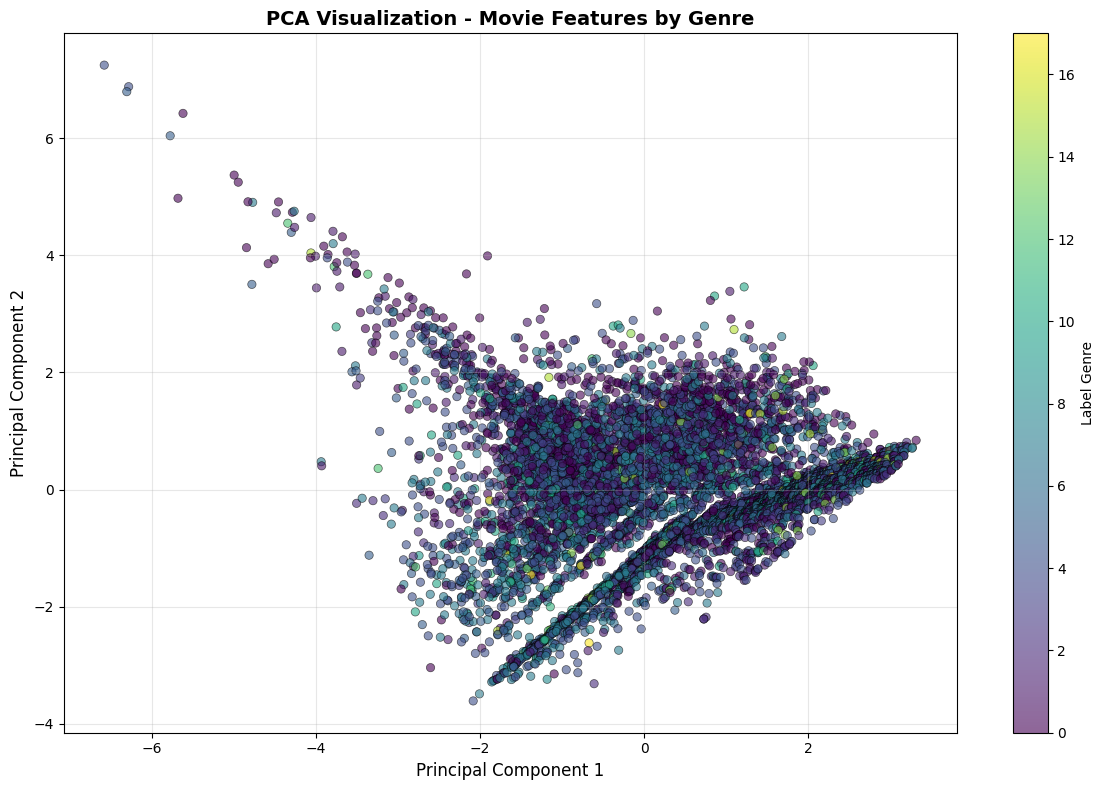

In [4]:
# PCA Visualization
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ file CSV
df = pd.read_csv("../etl/datasets/movie_features.csv")

# Tiền xử lý dữ liệu
X = df.select_dtypes(include=np.number).drop(columns=['tmdbId']).copy()
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Áp dụng PCA để giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
# Vẽ biểu đồ phân tán với màu sắc theo nhãn thể loại
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label_genre'])
output_dir = "../etl/reports"
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_encoded, cmap='viridis',
                     alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Label Genre')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA Visualization - Movie Features by Genre', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
print("Biểu đồ PCA")
plt.show()

---

# PHẦN 3 — Phân loại (Classification)


---


In [5]:
warnings.filterwarnings("ignore")
print('Imports OK')
# Tải dữ liệu
def load_data(path: Path):
    if not path.exists():
        raise FileNotFoundError(f"Dataset not found: {path}\nRun `python scripts/fetch_data.py` and `python run_etl.py` (or the individual transforms) to create it.")
    df = pd.read_csv(path)# Đọc dữ liệu từ file CSV

    return df
def prepare_features(df: pd.DataFrame):
    # Kiểm tra và chuẩn hóa các cột đặc trưng
    features = ["avg_rating", "rating_count", "rating_std", "year", "tmdbId"]
    missing = [c for c in features if c not in df.columns]
    if missing:
        raise ValueError(f"Missing expected feature columns: {missing}")
    # Kiểm tra cột nhãn
    if "label_genre" not in df.columns:
        raise ValueError("Missing label column 'label_genre' in dataset")
    X = df[features].copy()
    y = df["label_genre"].copy()
    # Drop rows with missing label
    mask = y.notna()
    X = X[mask]
    y = y[mask]
    # Giải quyết viêc thiếu dữ liệu
    X = X.dropna()
    y = y.loc[X.index]
    # Chuyển đổi kiểu dữ liệu
    X["rating_count"] = X["rating_count"].astype(float)
    X["year"] = X["year"].astype(float)
    X["tmdbId"] = pd.to_numeric(X["tmdbId"], errors="coerce")
    X = X.fillna(0)
    # Mã hóa nhãn
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    return X.values, y_enc, le, X.columns.tolist()
print('Xác định hàm chuẩn bị dữ liệu xong')

def run_model_selection(X, y, feature_names, out_report: Path):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scorer = make_scorer(f1_score, average="macro")
    candidates = [
        (
            "KNN",
            KNeighborsClassifier(),
            {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
        ),
        (
            "RandomForest",
            RandomForestClassifier(random_state=42),
            {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
        ),
        (
            "SVM",
            SVC(random_state=42),
            {"C": [0.1, 1.0, 10.0], "kernel": ["rbf", "linear"]},
        ),
    ]
    results = []
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    for name, model, grid in candidates:
        print(f"\n>>> Tuning {name} ...")
        gs = GridSearchCV(
            estimator=model,
            param_grid=grid,
            scoring=scorer,
            cv=cv,
            n_jobs=-1,
            refit=True,
            verbose=0,
        )
        gs.fit(X_scaled, y)
        best = gs.best_estimator_
        best_params = gs.best_params_
        # Re-run cross_val_score on the best estimator to get mean/std
        scores = cross_val_score(best, X_scaled, y, cv=cv, scoring=scorer, n_jobs=-1)
        row = {
            "model": name,
            "mean_cv_f1_macro": float(scores.mean()),
            "std_cv_f1_macro": float(scores.std()),
            "best_params": json.dumps(best_params, ensure_ascii=False),
            "n_features": len(feature_names),
            "features": ",".join(feature_names),
        }
        results.append(row)
        print(f"{name} best params: {best_params}")
        print(f"{name} CV f1_macro: {scores.mean():.4f} ± {scores.std():.4f}")
    df_res = pd.DataFrame(results).sort_values("mean_cv_f1_macro", ascending=False)
    out_report.parent.mkdir(parents=True, exist_ok=True)
    df_res.to_csv(out_report, index=False, encoding="utf-8")
    print(f"\nSaved model comparison report -> {out_report}")
    return df_res
print('Model selection function defined')
# Chạy pipeline chính
project_root = Path.cwd().resolve()
possible_paths = [
    project_root / "etl" / "datasets" / "movie_features.csv",
    project_root.parent / "etl" / "datasets" / "movie_features.csv",
]
data_path = None
for p in possible_paths:
    if p.exists():
        data_path = p
        break
if data_path is None:
    raise FileNotFoundError(
        f"Dataset not found in expected locations: {possible_paths}\nPlease run `python scripts/fetch_data.py` and the ETL transforms to produce `etl/intermediate/*.parquet` and then `etl/datasets/movie_features.csv`"
    )
out_report = project_root / "etl" / "reports" / "model_comparison.csv"
print("Loading dataset:", data_path)
df = load_data(data_path)
print(f"Dataset shape: {df.shape}")
X, y, le, feature_names = prepare_features(df)
print(f"Prepared X shape: {X.shape}, y shape: {y.shape}, n_classes: {len(le.classes_)}")
results = run_model_selection(X, y, feature_names, out_report)
print('\nResults DataFrame:')
display(results)


Imports OK
Xác định hàm chuẩn bị dữ liệu xong
Model selection function defined
Loading dataset: D:\MovieRecProject\MovieRecProject_N5\etl\datasets\movie_features.csv
Dataset shape: (9675, 8)
Prepared X shape: (9668, 5), y shape: (9668,), n_classes: 18

>>> Tuning KNN ...
KNN best params: {'n_neighbors': 3, 'weights': 'distance'}
KNN CV f1_macro: 0.0912 ± 0.0098

>>> Tuning RandomForest ...
RandomForest best params: {'max_depth': 20, 'n_estimators': 100}
RandomForest CV f1_macro: 0.0968 ± 0.0062

>>> Tuning SVM ...
SVM best params: {'C': 10.0, 'kernel': 'rbf'}
SVM CV f1_macro: 0.0741 ± 0.0051

Saved model comparison report -> D:\MovieRecProject\MovieRecProject_N5\notebooks\etl\reports\model_comparison.csv

Results DataFrame:


,model,mean_cv_f1_macro,std_cv_f1_macro,best_params,n_features,features
1,RandomForest,0.096845,0.006159,"{""max_depth"": 20, ""n_estimators"": 100}",5,"avg_rating,rating_count,rating_std,year,tmdbId"
0,KNN,0.091197,0.009825,"{""n_neighbors"": 3, ""weights"": ""distance""}",5,"avg_rating,rating_count,rating_std,year,tmdbId"
2,SVM,0.074095,0.005108,"{""C"": 10.0, ""kernel"": ""rbf""}",5,"avg_rating,rating_count,rating_std,year,tmdbId"


---

# PHẦN 4 — Phân cụm (Clustering)


---


    model       ARI      NMI  F1_macro
0  KMeans  0.009802  0.03931  0.034213
1  DBSCAN  0.006702  0.01325  0.028974
Biểu đồ phân cụm


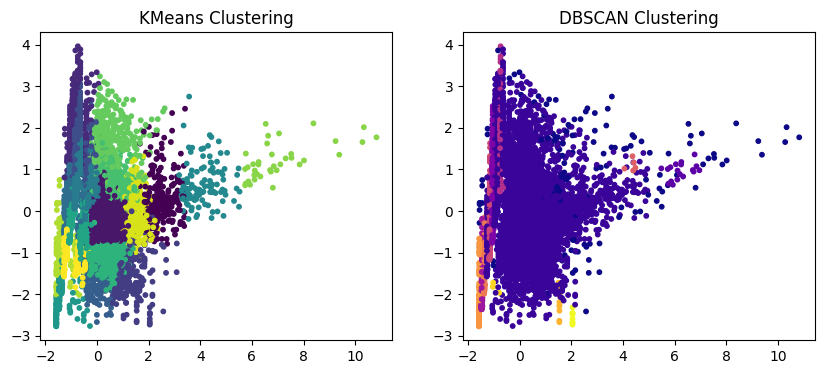

Biểu đồ số lượng phim trong từng cụm


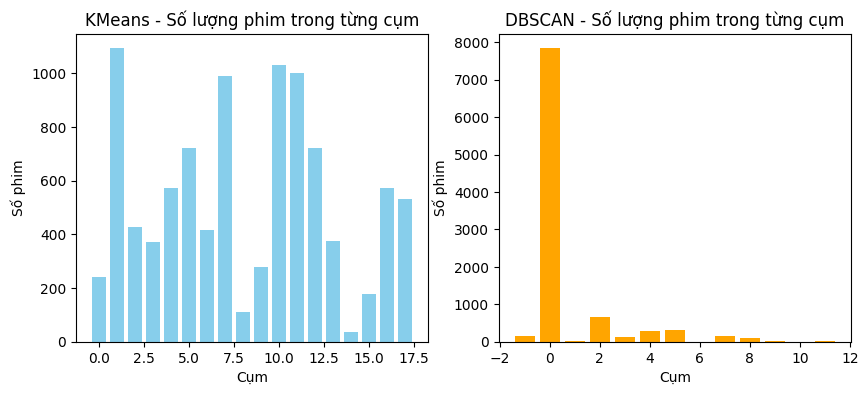

In [6]:
# === Phân cụm và đánh giá ===
df = pd.read_csv("../etl/datasets/movie_features.csv")# Đọc dữ liệu từ file CSV

# Tiền xử lý dữ liệu
feature_cols = ['avg_rating', 'rating_count', 'rating_std', 'year']
X = df[feature_cols].values
y = df['label_genre'].values
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Phân cụm KMeans
n_clusters = len(np.unique(y))
km = KMeans(n_clusters=n_clusters, random_state=42)
labels_km = km.fit_predict(X_scaled)
# Phân cụm DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels_db = db.fit_predict(X_scaled)
# Mã hóa nhãn thực tế
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
# Đánh giá phân cụm
def safe_f1(true, pred):
    """Tính F1 nếu có thể (nếu nhãn dự đoán đủ điều kiện)."""
    valid = (pred >= 0)
    if np.sum(valid) == 0:
        return np.nan
    return f1_score(true[valid], pred[valid], average='macro')
results = {
    'model': ['KMeans', 'DBSCAN'],
    'ARI': [
        adjusted_rand_score(y_encoded, labels_km),
        adjusted_rand_score(y_encoded, labels_db)
    ],
    'NMI': [
        normalized_mutual_info_score(y_encoded, labels_km),
        normalized_mutual_info_score(y_encoded, labels_db)
    ],
    'F1_macro': [
        safe_f1(y_encoded, labels_km),
        safe_f1(y_encoded, labels_db)
    ]
}
df_report = pd.DataFrame(results)
print(df_report)

# Vẽ biểu đồ phân cụm
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_km, cmap='viridis', s=10)
ax[0].set_title("KMeans Clustering")
ax[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_db, cmap='plasma', s=10)
ax[1].set_title("DBSCAN Clustering")
print("Biểu đồ phân cụm")
plt.show()
# Vẽ biểu đồ số lượng phim trong từng cụm
unique_km, counts_km = np.unique(labels_km, return_counts=True)
unique_db, counts_db = np.unique(labels_db, return_counts=True)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(unique_km, counts_km, color='skyblue')
ax[0].set_title("KMeans - Số lượng phim trong từng cụm")
ax[0].set_xlabel("Cụm")
ax[0].set_ylabel("Số phim")
ax[1].bar(unique_db, counts_db, color='orange')
ax[1].set_title("DBSCAN - Số lượng phim trong từng cụm")
ax[1].set_xlabel("Cụm")
ax[1].set_ylabel("Số phim")
print("Biểu đồ số lượng phim trong từng cụm")
plt.show()